# To Grant or Not to Grant: Deciding on Compensation Benefits 

### Machine Learning Group Project 2024/2025 - Group 52


__Members:__
- Diogo Rodrigues _(20240512@novaims.unl.pt)_
- Alexandre Gonçalves _(20240738@novaims.unl.pt)_
- Pedro Costa _(20222121@novaims.unl.pt)_
- Santiago Taylor _(20240542@novaims.unl.pt)_
- Lena Hermann _(20241446@novaims.unl.pt)_

## Introduction
- __Motivation__: The New York Workers’ Compensation Board (WCB) handles a vast number of workplace injury claims, which require timely and accurate decisions. Currently, manually reviewing these claims is both resource-intensive and time-consuming. An automated model could significantly expedite the decision-making process, improving efficiency and consistency in awarding compensation.
- __Dataset__: The dataset contains claims assembled by the WCB from the beginning of 2020 to the end of 2022, which serves as the training data. The test data comprises claims from January 2023 onward. Each claim includes various attributes such as injury details, claimant information, and associated codes that characterize the nature, cause, and affected body part of the injury. This comprehensive dataset enables the development of predictive models based on historical decisions.
- __Task and Goal__: The primary objective of this project is to develop and evaluate machine learning models that can accurately classify the WCB’s final decision on the type of injury for each claim (i.e., the "Claim Injury Type"). This involves creating a multiclass classification model to predict injury types based on the provided features, optimizing model performance, and assessing the importance of different features. The ultimate goal is to produce a model that can generalize well to unseen data, assisting the WCB in making faster, data-driven decisions on new claims.

| **ATTRIBUTE**                        | **DESCRIPTION**                                                                                                         |
|--------------------------------------|-------------------------------------------------------------------------------------------------------------------------|
| Accident Date                        | Injury date of the claim.                                                                                               |
| Age at Injury                        | Age of injured worker when the injury occurred.                                                                         |
| Alternative Dispute Resolution       | Adjudication processes external to the Board.                                                                           |
| Assembly Date                        | The date the claim was first assembled.                                                                                 |
| Attorney/Representative              | Is the claim being represented by an Attorney?                                                                          |
| Average Weekly Wage                  | The wage used to calculate workers’ compensation, disability, or Paid Leave wage replacement benefits.                  |
| Birth Year                           | The reported year of birth of the injured worker.                                                                       |
| C-2 Date                             | Date of receipt of the Employer's Report of Work-Related Injury/Illness or equivalent (formerly Form C-2).              |
| C-3 Date                             | Date Form C-3 (Employee Claim Form) was received.                                                                       |
| Carrier Name                         | Name of primary insurance provider responsible for providing workers’ compensation coverage to the injured worker's employer. |
| Carrier Type                         | Type of primary insurance provider responsible for providing workers’ compensation coverage.                            |
| Claim Identifier                     | Unique identifier for each claim, assigned by WCB.                                                                      |
| County of Injury                     | Name of the New York County where the injury occurred.                                                                  |
| COVID-19 Indicator                   | Indication that the claim may be associated with COVID-19.                                                              |
| District Name                        | Name of the WCB district office that oversees claims for that region or area of the state.                              |
| First Hearing Date                   | Date the first hearing was held on a claim at a WCB hearing location. A blank date means the claim has not yet had a hearing held. |
| Gender                               | The reported gender of the injured worker.                                                                              |
| IME-4 Count                          | Number of IME-4 forms received per claim. The IME-4 form is the “Independent Examiner’s Report of Independent Medical Examination” form. |
| Industry Code                        | NAICS code and descriptions are available at https://www.naics.com/search-naics-codes-by-industry/.                     |
| Industry Code Description            | 2-digit NAICS industry code description used to classify businesses according to their economic activity.               |
| Medical Fee Region                   | Approximate region where the injured worker would receive medical service.                                               |
| OIICS Nature of Injury Description   | The OIICS nature of injury codes & descriptions are available at https://www.bls.gov/iif/oiics_manual_2007.pdf.         |
| WCIO Cause of Injury Code            | The WCIO cause of injury codes & descriptions are available at https://www.wcio.org/Active%20PNC/WCIO_Cause_Table.pdf.  |
| WCIO Cause of Injury Description     | See description of field above.                                                                                         |
| WCIO Nature of Injury Code           | The WCIO nature of injury are available at https://www.wcio.org/Active%20PNC/WCIO_Nature_Table.pdf.                     |
| WCIO Nature of Injury Description    | See description of field above.                                                                                         |
| WCIO Part Of Body Code               | The WCIO part of body codes & descriptions are available at https://www.wcio.org/Active%20PNC/WCIO_Part_Table.pdf.      |
| WCIO Part Of Body Description        | See description of field above.                                                                                         |
| Zip Code                             | The reported ZIP code of the injured worker’s home address.                                                             |
| Agreement Reached                    | Binary variable: Yes if there is an agreement without the involvement of the WCB -> unknown at the start of a claim.    |
| WCB Decision                         | Multiclass variable: Decision of the WCB relative to the claim: “Accident” means that claim refers to workplace accident, “Occupational Disease” means illness from the workplace. -> requires WCB deliberation so it is unknown at start of claim. |
| Claim Injury Type                    | Main target variable: Deliberation of the WCB relative to benefits awarded to the claim. Numbering indicates severity.   |


## Table of Content
<a id='top'></a>
[1. Set-Up and Data Loading](#dataload) <br>
&nbsp;&nbsp;&nbsp;[1.1 Import the Needed Libraries](#import_libaries) <br>
&nbsp;&nbsp;&nbsp;[1.2 Read the Data and First Overview](#read_data) <br>

## 1. Set-Up and Data Loading <a id='dataload'></a>
[to the top](#top)

### 1.1 Import the Needed Libraries <a id='import_libaries'></a>

In [1]:
import os
import numpy as np #to efficiently compute functions
import pandas as pd #to work with data frames
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import zipfile #to open zipfile
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 60)
from scipy.stats import mode

# data partition
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

# embedded methods
from sklearn.linear_model import LassoCV

#Imputing missing values
from sklearn.impute import SimpleImputer

# encoding and scaling
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler

# model selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# models
from sklearn.ensemble import RandomForestClassifier

# model assessment
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### 1.2 Read the Data and First Overview <a id='read_data'></a>
[to the top](#top)

In [2]:
train_zip_path = 'train_data.csv.zip'
test_zip_path = 'test_data.csv.zip'

# open csv file from zip
def read_zipped_csv(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as z:
        csv_filename = z.namelist()[0]
        
        with z.open(csv_filename) as f:
            return pd.read_csv(f)

train_df = read_zipped_csv(train_zip_path)
test_df = read_zipped_csv(test_zip_path)

In [3]:
train_df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5393875,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,5393091,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5393889,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,957648180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,5393887,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [4]:
test_df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
0,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,6165911,BRONX,N,NYC,NaN,M,NaN,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1
1,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,1A. PRIVATE,6166141,QUEENS,N,NYC,NaN,F,NaN,45.0,RETAIL TRADE,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1
2,2022-12-26,59,N,2023-01-02,N,0.0,1963.0,2022-12-31,NaN,AMGUARD INSURANCE COMPANY,1A. PRIVATE,6165907,WESTCHESTER,N,NYC,NaN,F,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,III,NaN,68.0,STATIONARY OBJECT,49.0,SPRAIN OR TEAR,62.0,BUTTOCKS,10604,0
3,2022-12-28,55,N,2023-01-02,N,0.0,0.0,2023-01-02,NaN,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,6166047,QUEENS,N,NYC,NaN,F,NaN,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,53.0,KNEE,11411,6
4,2022-12-20,25,N,2023-01-02,N,0.0,1997.0,2022-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,6166102,KINGS,N,NYC,NaN,M,NaN,55.0,MANAGEMENT OF COMPANIES AND ENTERPRISES,IV,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,37.0,THUMB,11212,5


# 2. Data Understanding, Consistency and Feature Engineering <a id='dataunderstand'></a>
[to the top](#top)

## 2.1. Perform the Hold Out Method w/ 2 splits to avoid data leakage

In [5]:
y = train_df['Claim Injury Type'].dropna()

In [6]:
y.isna().sum()

np.int64(0)

In [7]:
# Define X by dropping the target column and aligning it with y's indices
X = train_df.drop(columns='Claim Injury Type')
X = X.loc[y.index]  # Align X with the indices of y

In [8]:
print(f"Percentage of data removed after cleaning the target variable: {(len(y) / len(train_df['Claim Injury Type'])) * 100:.2f}%")

Percentage of data removed after cleaning the target variable: 96.72%


In [9]:
# Re-do the split to avoid Leakage

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=15, 
    stratify=y
)


In [10]:
# Step 2: Perform Validation + Test split
X_train, X_val, y_train, y_val = train_test_split(X_train_val, 
                                                  y_train_val, 
                                                  test_size = 0.2, 
                                                  random_state = 15, 
                                                  stratify = y_train_val)

In [11]:
X_train.shape, X_val.shape, X_test.shape

((367376, 32), (91844, 32), (114806, 32))

In [12]:
y_train.shape, y_val.shape, y_test.shape

((367376,), (91844,), (114806,))

### Label Enconder on the target variable

In [13]:
label_encoder_target = LabelEncoder()

In [14]:
label_encoder_target.fit(y_train)

LabelEncoder()

In [15]:
# Transform y_train to get the encoded values
y_train_encoded = label_encoder_target.transform(y_train)

In [16]:
# Transform y_val and y_test using the fitted encoder
y_val_encoded = label_encoder_target.transform(y_val)
y_test_encoded = label_encoder_target.transform(y_test)

In [17]:
print("Encoded y_train:", y_train_encoded)
print("Encoded y_val:", y_val_encoded)
print("Encoded y_test:", y_test_encoded)

Encoded y_train: [0 2 4 ... 3 3 1]
Encoded y_val: [1 1 3 ... 1 2 4]
Encoded y_test: [4 3 2 ... 1 1 1]


## 2.2. Check Missing Values and Duplicates

In [18]:
X_train.isnull().sum()

Accident Date                           2365
Age at Injury                              0
Alternative Dispute Resolution             0
Assembly Date                              0
Attorney/Representative                    0
Average Weekly Wage                    18304
Birth Year                             18571
C-2 Date                                9283
C-3 Date                              247721
Carrier Name                               0
Carrier Type                               0
Claim Identifier                           0
County of Injury                           0
COVID-19 Indicator                         0
District Name                              0
First Hearing Date                    270721
Gender                                     0
IME-4 Count                           282316
Industry Code                           6373
Industry Code Description               6373
Medical Fee Region                         0
OIICS Nature of Injury Description    367376
WCIO Cause

In [19]:
X_val.isnull().sum()

Accident Date                           581
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                    4684
Birth Year                             4717
C-2 Date                               2269
C-3 Date                              61733
Carrier Name                              0
Carrier Type                              0
Claim Identifier                          0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                    67776
Gender                                    0
IME-4 Count                           70619
Industry Code                          1557
Industry Code Description              1557
Medical Fee Region                        0
OIICS Nature of Injury Description    91844
WCIO Cause of Injury Code       

In [20]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387975 entries, 0 to 387974
Data columns (total 30 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       385531 non-null  object 
 1   Age at Injury                       387975 non-null  int64  
 2   Alternative Dispute Resolution      387975 non-null  object 
 3   Assembly Date                       387975 non-null  object 
 4   Attorney/Representative             387975 non-null  object 
 5   Average Weekly Wage                 368771 non-null  float64
 6   Birth Year                          368505 non-null  float64
 7   C-2 Date                            378841 non-null  object 
 8   C-3 Date                            85216 non-null   object 
 9   Carrier Name                        387975 non-null  object 
 10  Carrier Type                        387975 non-null  object 
 11  Claim Identifier          

## 2.2.1 Check the % of missing values

In [21]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [22]:
missing_values_table(X_train)

Your selected dataframe has 32 columns.
There are 17 columns that have missing values.


,Missing Values,% of Total Values
OIICS Nature of Injury Description,367376,100.0
IME-4 Count,282316,76.8
First Hearing Date,270721,73.7
C-3 Date,247721,67.4
Birth Year,18571,5.1
Average Weekly Wage,18304,5.0
Zip Code,18291,5.0
WCIO Part Of Body Description,10903,3.0
WCIO Part Of Body Code,10903,3.0
WCIO Nature of Injury Description,10011,2.7


In [23]:
missing_values_table(X_val)

Your selected dataframe has 32 columns.
There are 17 columns that have missing values.


,Missing Values,% of Total Values
OIICS Nature of Injury Description,91844,100.0
IME-4 Count,70619,76.9
First Hearing Date,67776,73.8
C-3 Date,61733,67.2
Birth Year,4717,5.1
Average Weekly Wage,4684,5.1
Zip Code,4606,5.0
WCIO Part Of Body Description,2684,2.9
WCIO Part Of Body Code,2684,2.9
WCIO Nature of Injury Description,2424,2.6


## 2.2.2 Drop features with high % of missing values (See if we should drop these variables for the final report)

* OIICS Nature of Injury Description: has 100% missing values and as such it can be removed from our feature space.

* IME-4 Count : Given that IME-4 Count has 77,62% of missing values and its variance is low compared to the median variance of numerical features (8 < 439) and its spearman correlation with the target is almost 0 probably it's better if we drop this variable.

* C-3 Date: has a high correlation with other variables and 67.4% missing data, making it less informative compared to the others. 

* First Hearing Date Numeric while it has the lowest correlation with the other date variables, the 73.7% missing data makes it difficult to justify its retention.

In [24]:
X_train.drop(columns=['OIICS Nature of Injury Description', 'IME-4 Count', 'C-3 Date' , 'First Hearing Date'], inplace=True)
X_val.drop(columns=['OIICS Nature of Injury Description', 'IME-4 Count', 'C-3 Date' , 'First Hearing Date'], inplace=True)
X_test.drop(columns=['OIICS Nature of Injury Description', 'IME-4 Count', 'C-3 Date' , 'First Hearing Date'], inplace=True)
test_df.drop(columns=['OIICS Nature of Injury Description', 'IME-4 Count', 'C-3 Date' , 'First Hearing Date'], inplace=True)

## 2.2.3 Drop features with 1 value only / Features that are not present in Test Set / Highly Imbalanced Features

In [25]:
# WCB Decision has only 1 value , so this feature has no predictive power to our model and thus should be dropped

X_train['WCB Decision'].value_counts()

WCB Decision
Not Work Related    367376
Name: count, dtype: int64

In [26]:
# Drop the column across all datasets
X_train = X_train.drop(columns=['WCB Decision'])
X_val = X_val.drop(columns=['WCB Decision'])
X_test = X_test.drop(columns=['WCB Decision'])

In [27]:
# 'WCB Decision' : this variable is not present in test_df and thus we don't need to drop it

In [28]:
# Agreement Reached is not present in X_train and X_val and thus we should drop it from test_df

## 2.2.4 Check in EDA Notebook the correlation (ANOVA or Chi-Square Test between Alt.Dispute Resolution and target)

In [29]:
X_train['Alternative Dispute Resolution'].value_counts()    

Alternative Dispute Resolution
N    365682
Y      1690
U         4
Name: count, dtype: int64

In [30]:
# Drop the column across all datasets
X_train = X_train.drop(columns=['Alternative Dispute Resolution'])
X_val = X_val.drop(columns=['Alternative Dispute Resolution'])
X_test = X_test.drop(columns=['Alternative Dispute Resolution'])

In [31]:
test_df = test_df.drop(columns=['Alternative Dispute Resolution'])   


In [32]:
X_train['Agreement Reached'].value_counts()

Agreement Reached
0.0    350281
1.0     17095
Name: count, dtype: int64

As the variable Agreement Reached is not available in test_df, it is likely because this information
depends on post-outcome data or is not collected or known at prediction time.
Therefore, training and validating the model with this variable would create a dependency that cannot be met in production. As a result, we will drop this feature from our X_train and X_val datasets.

In [33]:
# Drop the column across all datasets
X_train = X_train.drop(columns=['Agreement Reached'])
X_val = X_val.drop(columns=['Agreement Reached'])
X_test = X_test.drop(columns=['Agreement Reached'])

## 2.2.5 Duplicates

In [34]:
# checking for duplicates
X_train.duplicated().sum()

np.int64(0)

In [35]:
X_val.duplicated().sum()

np.int64(0)

In [36]:
test_df.duplicated().sum()

np.int64(0)

## 2.3. Data Coherence Checking

## 2.3.1 Codes Analysis

In [37]:
def analyze_code_description_relationship(data, code_column, description_column):
    # Step 1: Count unique descriptions per code
    code_to_description = data.groupby(code_column)[description_column].nunique()
    # Check if each code maps to a single unique description
    if code_to_description.max() == 1:
        print(f"\nEach {code_column} has only one unique {description_column}.")
    else:
        print(f"\nSome {code_column}s have multiple {description_column}s associated with them.")

    # Step 2: Count unique codes per description
    description_to_code = data.groupby(description_column)[code_column].nunique()
    # Check if each description maps to a single unique code
    if description_to_code.max() == 1:
        print(f"\nEach {description_column} has only one unique {code_column}.")
    else:
        print(f"\nSome {description_column}s have multiple {code_column}s associated with them.")

    # Step 3: Validate if there is a 1:1 relationship
    is_one_to_one = (code_to_description.max() == 1) and (description_to_code.max() == 1)
    if is_one_to_one:
        print(f"\n{code_column} and {description_column} have a 1:1 relationship.")
    else:
        print(f"\nThere is no 1:1 relationship between {code_column} and {description_column}.")

    # Step 4: Find descriptions with multiple unique associated codes
    description_to_unique_codes = data.groupby(description_column)[code_column].apply(lambda x: list(set(x)))
    descriptions_with_multiple_unique_codes = description_to_unique_codes[description_to_unique_codes.apply(len) > 1]
    
    print(f"\nDescriptions with multiple unique associated {code_column}s:")
    print(descriptions_with_multiple_unique_codes)

__Industry Code / Industry Code Description__

In [38]:
analyze_code_description_relationship(train_df, 'Industry Code', 'Industry Code Description')


Each Industry Code has only one unique Industry Code Description.

Some Industry Code Descriptions have multiple Industry Codes associated with them.

There is no 1:1 relationship between Industry Code and Industry Code Description.

Descriptions with multiple unique associated Industry Codes:
Industry Code Description
MANUFACTURING                     [32.0, 33.0, 31.0]
RETAIL TRADE                            [44.0, 45.0]
TRANSPORTATION AND WAREHOUSING          [48.0, 49.0]
Name: Industry Code, dtype: object


Since each __Industry Code__ uniquely maps to one __Industry Code Description__, we can delete the Industry Code and only keep its corresponding description. We will keep the description variable because we have more information within it that we will use for binning / mapping later. Since we have almost the same information in both variables, we don't need to keep both since it would distort the data for the models.

__WCIO Cause of Injury Code / WCIO Cause of Injury Description__

In [39]:
analyze_code_description_relationship(train_df, 'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description')


Each WCIO Cause of Injury Code has only one unique WCIO Cause of Injury Description.

Some WCIO Cause of Injury Descriptions have multiple WCIO Cause of Injury Codes associated with them.

There is no 1:1 relationship between WCIO Cause of Injury Code and WCIO Cause of Injury Description.

Descriptions with multiple unique associated WCIO Cause of Injury Codes:
WCIO Cause of Injury Description
OBJECT BEING LIFTED OR HANDLED    [17.0, 66.0, 79.0]
REPETITIVE MOTION                       [97.0, 94.0]
Name: WCIO Cause of Injury Code, dtype: object


For __WCIO Cause of Injury Code / Description__ it is the same as for __Industry Code / Description__. It shows that each code corresponds to only one unique description. This indicates that every code maps to a single description. However, some __WCIO Cause of Injury Descriptions__ map to more than one WCIO Cause of Injury Code. We will also just keep the __WCIO Cause of Injury Description.__

__WCIO Nature of Injury Code / WCIO Nature of Injury Description__

In [40]:
analyze_code_description_relationship(train_df, 'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description')


Each WCIO Nature of Injury Code has only one unique WCIO Nature of Injury Description.

Each WCIO Nature of Injury Description has only one unique WCIO Nature of Injury Code.

WCIO Nature of Injury Code and WCIO Nature of Injury Description have a 1:1 relationship.

Descriptions with multiple unique associated WCIO Nature of Injury Codes:
Series([], Name: WCIO Nature of Injury Code, dtype: object)


Since the Code and the Description have a 1:1 relationship, we will delete __WCIO Nature of Injury Code__. We decided to keep the description insted of the code to later map into groups. This can be done better with the descriptions than the code because we have more information in the descriptions.

__WCIO Part Of Body Code / WCIO Part Of Body Description__

In [41]:
analyze_code_description_relationship(train_df, 'WCIO Part Of Body Code', 'WCIO Part Of Body Description')


Each WCIO Part Of Body Code has only one unique WCIO Part Of Body Description.

Some WCIO Part Of Body Descriptions have multiple WCIO Part Of Body Codes associated with them.

There is no 1:1 relationship between WCIO Part Of Body Code and WCIO Part Of Body Description.

Descriptions with multiple unique associated WCIO Part Of Body Codes:
WCIO Part Of Body Description
DISC           [43.0, 22.0]
SOFT TISSUE    [25.0, 18.0]
SPINAL CORD    [47.0, 23.0]
Name: WCIO Part Of Body Code, dtype: object


For __WCIO Part Of Body Code / Description__ it is the same as for __Industry Code / Description__ and __WCIO Cause of Injury Code / Description__. It shows that each code corresponds to only one unique description. We will also just keep the __WCIO Part Of Body Description__ for further mapping reasons.

## 2.3.2 Dropping the previous feature codes from our feature space


In [42]:
codes_to_drop = columns_to_drop = [
    'Industry Code', 
    'WCIO Cause of Injury Code', 
    'WCIO Nature of Injury Code', 
    'WCIO Part Of Body Code'
]

In [43]:
# Drop columns from the filtered datasets
X_train = X_train.drop(columns=columns_to_drop)
X_val = X_val.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)
test_df = test_df.drop(columns=columns_to_drop)

## 2.3.3 Mapping for WCIO features

__WCIO Cause of Injury Description__

In [44]:
# Mapping dictionary
injury_mapping = {
    # Falls and Slips
    'FALL, SLIP OR TRIP, NOC': 'Falls and Slips',
    'FROM LIQUID OR GREASE SPILLS': 'Falls and Slips',
    'ON ICE OR SNOW': 'Falls and Slips',
    'ON SAME LEVEL': 'Falls and Slips',
    'ON STAIRS': 'Falls and Slips',
    'SLIP, OR TRIP, DID NOT FALL': 'Falls and Slips',
    
    # Lifting and Strain
    'OBJECT BEING LIFTED OR HANDLED': 'Lifting and Strain',
    'LIFTING': 'Lifting and Strain',
    'TWISTING': 'Lifting and Strain',
    'PUSHING OR PULLING': 'Lifting and Strain',
    'STRAIN OR INJURY BY, NOC': 'Lifting and Strain',
    'REACHING': 'Lifting and Strain',
    'HOLDING OR CARRYING': 'Lifting and Strain',
    
    # Collisions and Motor Vehicle Accidents
    'COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE': 'Collisions and Motor Vehicle Accidents',
    'MOTOR VEHICLE, NOC': 'Collisions and Motor Vehicle Accidents',
    'MOTOR VEHICLE': 'Collisions and Motor Vehicle Accidents',
    'COLLISION WITH A FIXED OBJECT': 'Collisions and Motor Vehicle Accidents',
    'CRASH OF RAIL VEHICLE': 'Collisions and Motor Vehicle Accidents',
    'CRASH OF WATER VEHICLE': 'Collisions and Motor Vehicle Accidents',
    'CRASH OF AIRPLANE': 'Collisions and Motor Vehicle Accidents',
    'VEHICLE UPSET': 'Collisions and Motor Vehicle Accidents',
    
    # Struck By Object or Person
    'STRUCK OR INJURED, NOC': 'Struck By Object or Person',
    'FALLING OR FLYING OBJECT': 'Struck By Object or Person',
    'STEPPING ON SHARP OBJECT': 'Struck By Object or Person',
    'FELLOW WORKER, PATIENT OR OTHER PERSON': 'Struck By Object or Person',
    'ANIMAL OR INSECT': 'Struck By Object or Person',
    'WIELDING OR THROWING': 'Struck By Object or Person',
    
    # Exposure to Substances and Environment
    'CHEMICALS': 'Exposure to Substances and Environment',
    'DUST, GASES, FUMES OR VAPORS': 'Exposure to Substances and Environment',
    'ABSORPTION, INGESTION OR INHALATION, NOC': 'Exposure to Substances and Environment',
    'STEAM OR HOT FLUIDS': 'Exposure to Substances and Environment',
    'COLD OBJECTS OR SUBSTANCES': 'Exposure to Substances and Environment',
    'TEMPERATURE EXTREMES': 'Exposure to Substances and Environment',
    'CONTINUAL NOISE': 'Exposure to Substances and Environment',
    'MOLD': 'Exposure to Substances and Environment',
    'ABNORMAL AIR PRESSURE': 'Exposure to Substances and Environment',
    'RADIATION': 'Exposure to Substances and Environment',
    
    # Tools, Machinery, and Objects
    'HAND TOOL, UTENSIL; NOT POWERED': 'Tools, Machinery, and Objects',
    'POWERED HAND TOOL, APPLIANCE': 'Tools, Machinery, and Objects',
    'USING TOOL OR MACHINERY': 'Tools, Machinery, and Objects',
    'MOVING PARTS OF MACHINE': 'Tools, Machinery, and Objects',
    'MACHINE OR MACHINERY': 'Tools, Machinery, and Objects',
    'MOVING PART OF MACHINE': 'Tools, Machinery, and Objects',
    'OBJECT HANDLED BY OTHERS': 'Tools, Machinery, and Objects',
    'BROKEN GLASS': 'Tools, Machinery, and Objects',
    
    # Explosions and Fire
    'FIRE OR FLAME': 'Explosions and Fire',
    'EXPLOSION OR FLARE BACK': 'Explosions and Fire',
    
    # Natural Disasters and Uncommon Events
    'NATURAL DISASTERS': 'Natural Disasters and Uncommon Events',
    'TERRORISM': 'Natural Disasters and Uncommon Events',
    'PANDEMIC': 'Natural Disasters and Uncommon Events',
}

In [45]:
# Apply mapping to X_train
X_train['Cause Injury Category'] = X_train['WCIO Cause of Injury Description'].map(injury_mapping).fillna('Other')

# Apply mapping to X_val
X_val['Cause Injury Category'] = X_val['WCIO Cause of Injury Description'].map(injury_mapping).fillna('Other')

X_test['Cause Injury Category'] = X_test['WCIO Cause of Injury Description'].map(injury_mapping).fillna('Other')

# Apply mapping to test_df
test_df['Cause Injury Category'] = test_df['WCIO Cause of Injury Description'].map(injury_mapping).fillna('Other')


__WCIO Nature of Injury Description__

In [46]:
# Mapping dictionary
injury_nature_mapping = {
    # Physical Trauma
    'CONTUSION': 'Physical Trauma',
    'SPRAIN OR TEAR': 'Physical Trauma',
    'CONCUSSION': 'Physical Trauma',
    'PUNCTURE': 'Physical Trauma',
    'LACERATION': 'Physical Trauma',
    'FRACTURE': 'Physical Trauma',
    'CRUSHING': 'Physical Trauma',
    'DISLOCATION': 'Physical Trauma',
    'AMPUTATION': 'Physical Trauma',
    'SEVERANCE': 'Physical Trauma',
    
    # Cumulative or Repetitive Injuries
    'CARPAL TUNNEL SYNDROME': 'Cumulative or Repetitive Injuries',
    'INFLAMMATION': 'Cumulative or Repetitive Injuries',
    'ALL OTHER CUMULATIVE INJURY, NOC': 'Cumulative or Repetitive Injuries',
    'ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC': 'Cumulative or Repetitive Injuries',
    'ALL OTHER SPECIFIC INJURIES, NOC': 'Cumulative or Repetitive Injuries',
    
    # Burns and Temperature-Related Injuries
    'BURN': 'Burns and Temperature-Related Injuries',
    'HEAT PROSTRATION': 'Burns and Temperature-Related Injuries',
    'FREEZING': 'Burns and Temperature-Related Injuries',
    
    # Respiratory Issues
    'RESPIRATORY DISORDERS': 'Respiratory Issues',
    'ASBESTOSIS': 'Respiratory Issues',
    'DUST DISEASE, NOC': 'Respiratory Issues',
    'BLACK LUNG': 'Respiratory Issues',
    'SILICOSIS': 'Respiratory Issues',
    'BYSSINOSIS': 'Respiratory Issues',
    
    # Poisoning and Chemical Exposure
    'POISONING - GENERAL (NOT OD OR CUMULATIVE': 'Poisoning and Chemical Exposure',
    'POISONING - CHEMICAL, (OTHER THAN METALS)': 'Poisoning and Chemical Exposure',
    'POISONING - METAL': 'Poisoning and Chemical Exposure',
    
    # Infections and Diseases
    'INFECTION': 'Infections and Diseases',
    'COVID-19': 'Infections and Diseases',
    'CONTAGIOUS DISEASE': 'Infections and Diseases',
    'AIDS': 'Infections and Diseases',
    'HEPATITIS C': 'Infections and Diseases',
    'CANCER': 'Infections and Diseases',
    
    # Psychological and Mental Health
    'MENTAL STRESS': 'Psychological and Mental Health',
    'MENTAL DISORDER': 'Psychological and Mental Health',
    'NO PHYSICAL INJURY': 'Psychological and Mental Health',
    'MULTIPLE INJURIES INCLUDING BOTH PHYSICAL AND PSYCHOLOGICAL': 'Psychological and Mental Health',
    
    # Circulatory and Heart-Related Issues
    'MYOCARDIAL INFARCTION': 'Circulatory and Heart-Related Issues',
    'ANGINA PECTORIS': 'Circulatory and Heart-Related Issues',
    'VASCULAR': 'Circulatory and Heart-Related Issues',
    
    # Sensory Loss
    'LOSS OF HEARING': 'Sensory Loss',
    'HEARING LOSS OR IMPAIRMENT': 'Sensory Loss',
    'VISION LOSS': 'Sensory Loss',
    'ENUCLEATION': 'Sensory Loss',
    
    # Radiation and Light Exposure
    'RADIATION': 'Radiation and Light Exposure',
    'VDT - RELATED DISEASES': 'Radiation and Light Exposure',
    
    # Miscellaneous (catch-all for remaining cases)
    'ASPHYXIATION': 'Miscellaneous Conditions',
    'SYNCOPE': 'Miscellaneous Conditions',
    'DERMATITIS': 'Miscellaneous Conditions',
    'ADVERSE REACTION TO A VACCINATION OR INOCULATION': 'Miscellaneous Conditions'
}

In [47]:
# Apply mapping to X_train
X_train['Nature of Injury Category'] = X_train['WCIO Nature of Injury Description'].map(injury_nature_mapping).fillna('Other')

# Apply mapping to X_val
X_val['Nature of Injury Category'] = X_val['WCIO Nature of Injury Description'].map(injury_nature_mapping).fillna('Other')

X_test['Nature of Injury Category'] = X_test['WCIO Cause of Injury Description'].map(injury_nature_mapping).fillna('Other')

# Apply mapping to test_df
test_df['Nature of Injury Category'] = test_df['WCIO Nature of Injury Description'].map(injury_nature_mapping).fillna('Other')

__WCIO Part of Body Description__

In [48]:
# Mapping dictionary
body_part_mapping = {
    # Head and Face
    'SKULL': 'Head and Face', 'FACIAL BONES': 'Head and Face', 'EYE(S)': 'Head and Face',
    'MOUTH': 'Head and Face', 'NOSE': 'Head and Face', 'EAR(S)': 'Head and Face', 
    'BRAIN': 'Head and Face', 'TEETH': 'Head and Face',

    # Neck and Throat
    'MULTIPLE NECK INJURY': 'Neck and Throat', 'LARYNX': 'Neck and Throat', 'TRACHEA': 'Neck and Throat',

    # Upper and Lower Back
    'UPPER BACK AREA': 'Upper Back',
    'LOWER BACK AREA': 'Lower Back', 'LUMBAR & OR SACRAL VERTEBRAE (VERTEBRA': 'Lower Back',
    'SACRUM AND COCCYX': 'Lower Back',

    # Spinal Column
    'SPINAL CORD': 'Spinal Column', 'VERTEBRAE': 'Spinal Column',

    # Shoulder
    'SHOULDER(S)': 'Shoulder', 

    # Arm and Wrist
    'LOWER ARM': 'Arm and Wrist', 'UPPER ARM': 'Arm and Wrist', 'WRIST': 'Arm and Wrist',

    # Hand and Fingers
    'HAND': 'Hand and Fingers', 'FINGER(S)': 'Hand and Fingers', 'THUMB': 'Hand and Fingers',

    # Hip
    'HIP': 'Hip', 

    # Leg
    'LOWER LEG': 'Leg', 'UPPER LEG': 'Leg',

    # Knee
    'KNEE': 'Knee',

    # Ankle and Foot
    'ANKLE': 'Ankle and Foot', 'FOOT': 'Ankle and Foot', 'TOES': 'Ankle and Foot', 'GREAT TOE': 'Ankle and Foot',

    # Chest
    'CHEST': 'Chest',

    # Abdomen and Pelvis
    'ABDOMEN INCLUDING GROIN': 'Abdomen and Pelvis', 'PELVIS': 'Abdomen and Pelvis', 'BUTTOCKS': 'Abdomen and Pelvis',

    # Lungs
    'LUNGS': 'Lungs',

    # Heart
    'HEART': 'Heart',

    # Internal Organs
    'INTERNAL ORGANS': 'Internal Organs',

    # Body Systems
    'BODY SYSTEMS AND MULTIPLE BODY SYSTEMS': 'Body Systems', 
    'WHOLE BODY': 'Body Systems', 'MULTIPLE BODY PARTS (INCLUDING BODY': 'Body Systems',
    'ARTIFICIAL APPLIANCE': 'Body Systems',

    # Soft Tissue
    'SOFT TISSUE': 'Soft Tissue',

    # Unclassified or Insufficient Info
    'NO PHYSICAL INJURY': 'Unclassified or Insufficient Info',
    'INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLASSIFIED': 'Unclassified or Insufficient Info'
}

In [49]:
# Apply mapping to X_train
X_train['Body Part Category'] = X_train['WCIO Part Of Body Description'].map(body_part_mapping).fillna('Other')

# Apply mapping to X_val
X_val['Body Part Category'] = X_val['WCIO Part Of Body Description'].map(body_part_mapping).fillna('Other')

X_test['Body Part Category'] = X_test['WCIO Part Of Body Description'].map(body_part_mapping).fillna('Other')


# Apply mapping to X_test
test_df['Body Part Category'] = test_df['WCIO Part Of Body Description'].map(body_part_mapping).fillna('Other')

## 2.3.4 Mapping for Gender

In [50]:
# Replace 'U' and 'X' with 'Other' in the Gender column for all datasets
for dataset, name in zip([X_train, X_val, X_test, test_df], ['X_train', 'X_val', 'X_test', 'test_df']):
    dataset['Gender'] = dataset['Gender'].replace({'U': 'Other', 'X': 'Other'})
    # Verify the change by printing value counts
    print(f"\n{name} - Gender Distribution:")
    print(dataset['Gender'].value_counts())


X_train - Gender Distribution:
Gender
M        214771
F        149526
Other      3079
Name: count, dtype: int64

X_val - Gender Distribution:
Gender
M        53490
F        37590
Other      764
Name: count, dtype: int64

X_test - Gender Distribution:
Gender
M        66957
F        46935
Other      914
Name: count, dtype: int64

test_df - Gender Distribution:
Gender
M        215343
F        167019
Other      5613
Name: count, dtype: int64


## 2.4. Feature Engineering

## 2.4.1 Binning Age - Age Category

In [51]:
# As we are creating Age Category from Age at Injury which is the relevant variable , we can drop the 'Date of Birth' column from all datasets

X_train.drop(columns=['Birth Year'], inplace=True)
X_val.drop(columns=['Birth Year'], inplace=True)
X_test.drop(columns=['Birth Year'], inplace=True)

test_df.drop(columns=['Birth Year'], inplace=True)

In [52]:
# Define age bins and labels
age_bins = [0, 19, 29, 39, 49, 59, float('inf')]
age_labels = ['Under 20', '20-29', '30-39', '40-49', '50-59', '60 and above']

# Apply age group binning to all datasets
for dataset, name in zip([X_train, X_val, X_test, test_df], ['X_train', 'X_val', 'X_test', 'test_df']):
    # Create the age groups
    dataset['Age_Group'] = pd.cut(dataset['Age at Injury'], bins=age_bins, labels=age_labels)

    # Print distribution for verification
    print(f"\n{name} - Age_Group Distribution:")
    print(dataset['Age_Group'].value_counts())



X_train - Age_Group Distribution:
Age_Group
30-39           84155
50-59           82582
40-49           74778
20-29           70560
60 and above    44313
Under 20         7476
Name: count, dtype: int64

X_val - Age_Group Distribution:
Age_Group
30-39           21213
50-59           20636
40-49           18769
20-29           17631
60 and above    10890
Under 20         1839
Name: count, dtype: int64

X_test - Age_Group Distribution:
Age_Group
30-39           26344
50-59           25965
40-49           23411
20-29           21696
60 and above    13963
Under 20         2341
Name: count, dtype: int64

test_df - Age_Group Distribution:
Age_Group
30-39           91558
20-29           83431
50-59           77711
40-49           76344
60 and above    47424
Under 20         8259
Name: count, dtype: int64


## 2.4.2 Binning Wage - Wage Category

In [53]:
# Define wage bins and labels
wage_bins = [-np.inf, 1, 700, 1100, 1500, float('inf')]
wage_labels = ['Zero', 'Below Average', 'Average', 'Above Average', 'High']

# Apply wage group binning to all datasets
for dataset, name in zip([X_train, X_val, X_test, test_df], ['X_train', 'X_val', 'X_test', 'test_df']):    # Create the wage groups
    dataset['Wage_Group'] = pd.cut(dataset['Average Weekly Wage'], bins=wage_bins, labels=wage_labels)

    # Print distribution for verification
    print(f"\n{name} - Wage_Group Distribution:")
    print(dataset['Wage_Group'].value_counts())


X_train - Wage_Group Distribution:
Wage_Group
Zero             214763
High              37467
Average           36066
Below Average     33588
Above Average     27188
Name: count, dtype: int64

X_val - Wage_Group Distribution:
Wage_Group
Zero             53622
High              9330
Average           9142
Below Average     8312
Above Average     6754
Name: count, dtype: int64

X_test - Wage_Group Distribution:
Wage_Group
Zero             67065
High             11882
Average          11219
Below Average    10553
Above Average     8424
Name: count, dtype: int64

test_df - Wage_Group Distribution:
Wage_Group
Zero             316549
Average           15087
High              14428
Below Average     12565
Above Average     10142
Name: count, dtype: int64


## 2.4.3 Grouping Carrier Name 

In [54]:
# Step 1 - Count carrier occurrences in X_train
carrier_counts = X_train['Carrier Name'].value_counts()
carrier_counts

Carrier Name
STATE INSURANCE FUND              71061
POLICE, FIRE, SANITATION          13937
AMERICAN ZURICH INSURANCE CO      11251
CHARTER OAK FIRE INS CO           11081
INDEMNITY INS. OF N AMERICA        9151
                                  ...  
AIG PROPERTY CASUALTY CO.             1
ENTERGY NUCLEAR OPERATIONS, IN        1
CHERRY VALLEY SPRINGFIELD             1
NYS WCB (LIABLE CARRIER IS 06)        1
WEST BEND MUTUAL INSURANCE            1
Name: count, Length: 1951, dtype: int64

In [55]:
# Step 2 -Define the threshold
threshold = 5000

# Step 3 - Group carriers in X_train based on the threshold
X_train['Carrier Name Grouped'] = X_train['Carrier Name'].apply(
    lambda x: x if carrier_counts.get(x, 0) > threshold else 'Other'
)

In [56]:
# Step 4: Apply the same grouping logic to X_val and test_df
def group_carrier_name(carrier_name):
    # Use the mapping logic derived from X_train
    return carrier_name if carrier_counts.get(carrier_name, 0) > threshold else 'Other'

# Step 5 - Apply the function to X_val and test_df
X_val['Carrier Name Grouped'] = X_val['Carrier Name'].apply(group_carrier_name)
X_test['Carrier Name Grouped'] = X_test['Carrier Name'].apply(group_carrier_name)
test_df['Carrier Name Grouped'] = test_df['Carrier Name'].apply(group_carrier_name)

## 2.4.4 Convert Date Formats into Numerical Features / Create new Date Features

Since we can't use the date variables for the models, we want to extract all the information they contain. Some variables might be exaclty the same "Accident_Year" and "Assembly_Year". However, we will calaculate all of them and exclude irrelevant ones in the feature selection part.

- __Lag_Time__: Difference in days between accident date and assembly date
- __Accident_to_C2_Lag__: Difference in days between accident date and C-2 date
- __Accident_Year__: Extract the year from Accident Date
- __Accident_Month__: Extract the month from Accident Date
- __Accident_Month_Sin__: Sine of the month from Accident Date; this transformation is used to represent the cyclic nature of months (ensures that December (month 12) is closer to January (month 1) in feature space)
- __Accident_Month_Cos__: Cosine of the month from Accident Date; this transformation is used to represent the cyclic nature of months (ensures that December (month 12) is closer to January (month 1) in feature space)
- __Accident_Day__: Extract the day from Accident Date
- __Reference_Days_Accident__: Starting with the first accident day and counting onwards to get a numerical order of the dates
- __Assembly_Year__: Extract the year from Assembly Date
- __Assembly_Month__: Extract the month from Assembly Date
- __Assembly_Month_Sin__: Sine of the month from Assembly Date; this transformation is used to represent the cyclic nature of months (ensures that December (month 12) is closer to January (month 1) in feature space)
- __Assembly_Month_Cos__: Cosine of the month from Assembly Date; this transformation is used to represent the cyclic nature of months (ensures that December (month 12) is closer to January (month 1) in feature space)
- __Assembly_Day__: Extract the day from Assembly Date
- __Reference_Days_Assembly__: Starting with the first assembly day and counting onwards to get a numerical order of the dates
- __C-2_Year__: Extract the year from C-2 Date
- __C-2_Month__: Extract the month from C-2 Date
- __C-2_Month_Sin__: Sine of the month from C-2 Date; this transformation is used to represent the cyclic nature of months (ensures that December (month 12) is closer to January (month 1) in feature space)
- __C-2_Month_Cos__: Cosine of the month from C-2 Date; this transformation is used to represent the cyclic nature of months (ensures that December (month 12) is closer to January (month 1) in feature space)
- __C-2_Day__: Extract the day from C-2 Date
- __Reference_Days_C-2__: Starting with the first C-2 day and counting onwards to get a numerical order of the dates

In [57]:
# Convert date columns to datetime format
date_cols = ['Accident Date', 'Assembly Date', 'C-2 Date']
for col in date_cols:
    X_train[col] = pd.to_datetime(X_train[col], errors='coerce')
    X_val[col] = pd.to_datetime(X_val[col], errors='coerce')
    X_test[col] = pd.to_datetime(X_test[col], errors='coerce')
    test_df[col] = pd.to_datetime(test_df[col], errors='coerce')

# Get the minimum Accident Date from X_train
min_accident_date = X_train['Accident Date'].min()

# Create new features for X_train
X_train['Lag_Time'] = (X_train['Assembly Date'] - min_accident_date).dt.days
X_train['Accident_to_C2_Lag'] = (X_train['C-2 Date'] - min_accident_date).dt.days

# Create new features for X_val using the same minimum date from X_train
X_val['Lag_Time'] = (X_val['Assembly Date'] - min_accident_date).dt.days
X_val['Accident_to_C2_Lag'] = (X_val['C-2 Date'] - min_accident_date).dt.days


# Create new features for X_test using the same minimum date from X_train
X_test['Lag_Time'] = (X_test['Assembly Date'] - min_accident_date).dt.days
X_test['Accident_to_C2_Lag'] = (X_test['C-2 Date'] - min_accident_date).dt.days


# Create new features for test_df using the same minimum date from X_train
test_df['Lag_Time'] = (test_df['Assembly Date'] - min_accident_date).dt.days
test_df['Accident_to_C2_Lag'] = (test_df['C-2 Date'] - min_accident_date).dt.days



In [58]:
# Extract specific components of each date for X_train, X_val, and test_df
for col in date_cols:
    # X_train transformations
    X_train[f'{col}_Year'] = X_train[col].dt.year
    X_train[f'{col}_Month'] = X_train[col].dt.month
    X_train[f'{col}_Day'] = X_train[col].dt.dayofweek
    
    # X_val transformations
    X_val[f'{col}_Year'] = X_val[col].dt.year
    X_val[f'{col}_Month'] = X_val[col].dt.month
    X_val[f'{col}_Day'] = X_val[col].dt.dayofweek

      # X_test transformations
    X_test[f'{col}_Year'] = X_test[col].dt.year
    X_test[f'{col}_Month'] = X_test[col].dt.month
    X_test[f'{col}_Day'] = X_test[col].dt.dayofweek
    
    # test_df transformations
    test_df[f'{col}_Year'] = test_df[col].dt.year
    test_df[f'{col}_Month'] = test_df[col].dt.month
    test_df[f'{col}_Day'] = test_df[col].dt.dayofweek

In [59]:
# Accident Date transformations
for dataset in [X_train, X_val, X_test, test_df]:
    dataset['Accident_Year'] = dataset['Accident Date_Year']
    dataset['Accident_Month'] = dataset['Accident Date_Month']
    dataset['Accident_Month_Sin'] = np.sin(2 * np.pi * dataset['Accident_Month'] / 12)
    dataset['Accident_Month_Cos'] = np.cos(2 * np.pi * dataset['Accident_Month'] / 12)
    dataset['Accident_Day'] = dataset['Accident Date_Day']

# Assembly Date transformations
for dataset in [X_train, X_val,X_test, test_df]:
    dataset['Assembly_Year'] = dataset['Assembly Date_Year']
    dataset['Assembly_Month'] = dataset['Assembly Date_Month']
    dataset['Assembly_Month_Sin'] = np.sin(2 * np.pi * dataset['Assembly_Month'] / 12)
    dataset['Assembly_Month_Cos'] = np.cos(2 * np.pi * dataset['Assembly_Month'] / 12)
    dataset['Assembly_Day'] = dataset['Assembly Date_Day']

# C-2 Date transformations
for dataset in [X_train, X_val, X_test, test_df]:
    dataset['C-2_Year'] = dataset['C-2 Date_Year']
    dataset['C-2_Month'] = dataset['C-2 Date_Month']
    dataset['C-2_Month_Sin'] = np.sin(2 * np.pi * dataset['C-2_Month'] / 12)
    dataset['C-2_Month_Cos'] = np.cos(2 * np.pi * dataset['C-2_Month'] / 12)
    dataset['C-2_Day'] = dataset['C-2 Date_Day']


In [60]:
# Drop the original date columns
X_train.drop(columns=date_cols, inplace=True)
X_val.drop(columns=date_cols, inplace=True)
X_test.drop(columns=date_cols, inplace=True)


In [61]:
test_df.drop(columns=date_cols, inplace=True)

In [62]:
# All the datasets until now have the same number of columns so the preprocessing (until now) is done correctly
X_train.shape, X_val.shape, X_test.shape, test_df.shape

((367376, 49), (91844, 49), (114806, 49), (387975, 49))

## 2.4.5 - Checking Outliers for New Features Created

In [63]:
# Check for years outside the valid range
year_outliers = X_train[(X_train['Accident_Year'] < 2000) | 
                                 (X_train['Accident_Year'] > 2022) |
                                 (X_train['Assembly_Year'] < 2020) |
                                 (X_train['Assembly_Year'] > 2022) |
                                 (X_train['C-2_Year'] > 2023)]

# Print the length of the year outliers
print(f"Number of Accident Year outliers in X_train_filtered: {len(year_outliers)}")

# Check for months outside the valid range (1 to 12)
month_outliers = X_train[(X_train['Accident_Month'] < 1) | 
                                  (X_train['Accident_Month'] > 12) |
                                  (X_train['Assembly_Month'] < 1) |
                                  (X_train['Assembly_Month'] > 12) |
                                  (X_train['C-2_Month'] < 1) |
                                  (X_train['C-2_Month'] > 12)]


# Print the length of the month outliers
print(f"Number of Month outliers in X_train_filtered: {len(month_outliers)}")


# Check for days outside the valid range (0 to 6 for days of the week)
day_outliers = X_train[(X_train['Accident_Day'] < 0) | 
                                (X_train['Accident_Day'] > 6) |
                                (X_train['Assembly_Day'] < 0) |
                                (X_train['Assembly_Day'] > 6) |
                                (X_train['C-2_Day'] < 0) |
                                (X_train['C-2_Day'] > 6)]


# Print the length of the day outliers
print(f"Number of Day outliers in X_train_filtered: {len(day_outliers)}")

Number of Accident Year outliers in X_train_filtered: 736
Number of Month outliers in X_train_filtered: 0
Number of Day outliers in X_train_filtered: 0


## 2.4.6 - Treating Outliers for the New Features Created (Only on X_Train)

Filtering logic:

* For Accident Date:

Keep only records with an Accident Year between 2000 and 2022.

* For Assembly Date:

Keep only records with an Assembly Year between 2020 and 2022.

* For C-2 Date:

Keep only records with a C-2 Year less than or equal to 2023 (since there's no lower bound specified).

In [64]:
# Check for years outside the valid range and drop the rows
X_train_filtered = X_train[
    ~((X_train['Accident_Year'] < 2000) | 
      (X_train['Accident_Year'] > 2022) |
      (X_train['Assembly_Year'] < 2020) |
      (X_train['Assembly_Year'] > 2022) |
      (X_train['C-2_Year'] > 2023))
]

# Check for months outside the valid range (1 to 12) and drop the rows
X_train_filtered = X_train_filtered[
    ~((X_train_filtered['Accident_Month'] < 1) | 
       (X_train_filtered['Accident_Month'] > 12) |
       (X_train_filtered['Assembly_Month'] < 1) |
       (X_train_filtered['Assembly_Month'] > 12) |
       (X_train_filtered['C-2_Month'] < 1) |
       (X_train_filtered['C-2_Month'] > 12))
]

# Check for days outside the valid range (0 to 6 for days of the week) and drop the rows
X_train_filtered = X_train_filtered[
    ~((X_train_filtered['Accident_Day'] < 0) | 
       (X_train_filtered['Accident_Day'] > 6) |
       (X_train_filtered['Assembly_Day'] < 0) |
       (X_train_filtered['Assembly_Day'] > 6) |
       (X_train_filtered['C-2_Day'] < 0) |
       (X_train_filtered['C-2_Day'] > 6))
]

In [65]:
print(f"{(1 - len(X_train_filtered) / X_train.shape[0])*100} % of the data was removed due to outlier date filtering.")

0.2003397064587742 % of the data was removed due to outlier date filtering.


# 2.5. Missing Values Handling (Imputation in X_train and then apply it to X_val and X_test)

In [66]:
X_train.isnull().sum()

Age at Injury                            0
Attorney/Representative                  0
Average Weekly Wage                  18304
Carrier Name                             0
Carrier Type                             0
Claim Identifier                         0
County of Injury                         0
COVID-19 Indicator                       0
District Name                            0
Gender                                   0
Industry Code Description             6373
Medical Fee Region                       0
WCIO Cause of Injury Description     10000
WCIO Nature of Injury Description    10011
WCIO Part Of Body Description        10903
Zip Code                             18291
Number of Dependents                     0
Cause Injury Category                    0
Nature of Injury Category                0
Body Part Category                       0
Age_Group                             3512
Wage_Group                           18304
Carrier Name Grouped                     0
Lag_Time   

# 2.5.1 Handling NaNs for numerical features training set

In [67]:
numerical_cols = X_train_filtered.select_dtypes(include=np.number).columns.tolist()
numerical_cols

['Age at Injury',
 'Average Weekly Wage',
 'Claim Identifier',
 'Number of Dependents',
 'Lag_Time',
 'Accident_to_C2_Lag',
 'Accident Date_Year',
 'Accident Date_Month',
 'Accident Date_Day',
 'Assembly Date_Year',
 'Assembly Date_Month',
 'Assembly Date_Day',
 'C-2 Date_Year',
 'C-2 Date_Month',
 'C-2 Date_Day',
 'Accident_Year',
 'Accident_Month',
 'Accident_Month_Sin',
 'Accident_Month_Cos',
 'Accident_Day',
 'Assembly_Year',
 'Assembly_Month',
 'Assembly_Month_Sin',
 'Assembly_Month_Cos',
 'Assembly_Day',
 'C-2_Year',
 'C-2_Month',
 'C-2_Month_Sin',
 'C-2_Month_Cos',
 'C-2_Day']

In [68]:
# Create the imputer for median imputation
numerical_imputer = SimpleImputer(strategy='median')

In [69]:
# Apply the imputer to X_train and fit it
X_train_filtered[numerical_cols] = numerical_imputer.fit_transform(X_train_filtered[numerical_cols])

In [70]:
# Apply the same transformation to X_val and X_test
X_val[numerical_cols] = numerical_imputer.transform(X_val[numerical_cols])
X_test[numerical_cols] = numerical_imputer.transform(X_test[numerical_cols])

In [71]:
# Align y_train to X_train_filtered
y_train_aligned = y_train.reindex(X_train_filtered.index)

In [72]:
# Check for missing rows after alignment
print("Missing rows in y_train_aligned:", y_train_aligned.isna().sum())

Missing rows in y_train_aligned: 0


In [73]:
X_train_filtered.shape , X_val.shape, X_test.shape

((366640, 49), (91844, 49), (114806, 49))

In [74]:
y_train_aligned.shape , y_val.shape, y_test.shape

((366640,), (91844,), (114806,))

In [75]:
print("X_train shape:", X_train_filtered.shape)
print("y_train shape:", y_train_aligned.shape)
print("Matching indices:", X_train_filtered.index.equals(y_train_aligned.index))

X_train shape: (366640, 49)
y_train shape: (366640,)
Matching indices: True


# 2.5.2 Handling NaNs for numerical features test set

In [76]:
# numerical_imputer.transform(test_df[numerical_cols]): This will use the imputer that was fitted on X_train to transform test_df. 
# It will replace any missing values in the numerical_cols of test_df with the median values that were calculated from X_train.

test_df[numerical_cols] = numerical_imputer.transform(test_df[numerical_cols])

# 2.5.3 Handling NaNs for categorical features training set

In [77]:
categorical_cols = X_train_filtered.select_dtypes(include='object').columns.tolist()
categorical_cols = categorical_cols  + ['Age_Group', 'Wage_Group']
categorical_cols

['Attorney/Representative',
 'Carrier Name',
 'Carrier Type',
 'County of Injury',
 'COVID-19 Indicator',
 'District Name',
 'Gender',
 'Industry Code Description',
 'Medical Fee Region',
 'WCIO Cause of Injury Description',
 'WCIO Nature of Injury Description',
 'WCIO Part Of Body Description',
 'Zip Code',
 'Cause Injury Category',
 'Nature of Injury Category',
 'Body Part Category',
 'Carrier Name Grouped',
 'Age_Group',
 'Wage_Group']

In [78]:
X_train[categorical_cols].isnull().sum()    

Attorney/Representative                  0
Carrier Name                             0
Carrier Type                             0
County of Injury                         0
COVID-19 Indicator                       0
District Name                            0
Gender                                   0
Industry Code Description             6373
Medical Fee Region                       0
WCIO Cause of Injury Description     10000
WCIO Nature of Injury Description    10011
WCIO Part Of Body Description        10903
Zip Code                             18291
Cause Injury Category                    0
Nature of Injury Category                0
Body Part Category                       0
Carrier Name Grouped                     0
Age_Group                             3512
Wage_Group                           18304
dtype: int64

In [79]:
# Create the imputer for mode imputation
categorical_imputer = SimpleImputer(strategy='most_frequent')

In [80]:
# Apply the imputer to X_train, X_val, and X_test (and test_df if needed)
X_train_filtered[categorical_cols] = categorical_imputer.fit_transform(X_train_filtered[categorical_cols])

In [81]:
X_val[categorical_cols] = categorical_imputer.transform(X_val[categorical_cols])
X_test[categorical_cols] = categorical_imputer.transform(X_test[categorical_cols])

In [82]:
X_train_filtered.shape , X_val.shape, X_test.shape  

((366640, 49), (91844, 49), (114806, 49))

In [83]:
y_train_aligned.shape , y_val.shape, y_test.shape

((366640,), (91844,), (114806,))

In [84]:
print("X_train shape:", X_train_filtered.shape)
print("y_train shape:", y_train_aligned.shape)
print("Matching indices:", X_train_filtered.index.equals(y_train_aligned.index))

X_train shape: (366640, 49)
y_train shape: (366640,)
Matching indices: True


# 2.5.4 Handling NaNs for categorical features test set

In [85]:
test_df[categorical_cols] = categorical_imputer.transform(test_df[categorical_cols])

In [86]:
X_train_filtered.isnull().sum()

Age at Injury                        0
Attorney/Representative              0
Average Weekly Wage                  0
Carrier Name                         0
Carrier Type                         0
Claim Identifier                     0
County of Injury                     0
COVID-19 Indicator                   0
District Name                        0
Gender                               0
Industry Code Description            0
Medical Fee Region                   0
WCIO Cause of Injury Description     0
WCIO Nature of Injury Description    0
WCIO Part Of Body Description        0
Zip Code                             0
Number of Dependents                 0
Cause Injury Category                0
Nature of Injury Category            0
Body Part Category                   0
Age_Group                            0
Wage_Group                           0
Carrier Name Grouped                 0
Lag_Time                             0
Accident_to_C2_Lag                   0
Accident Date_Year       

In [87]:
X_val.isnull().sum()

Age at Injury                        0
Attorney/Representative              0
Average Weekly Wage                  0
Carrier Name                         0
Carrier Type                         0
Claim Identifier                     0
County of Injury                     0
COVID-19 Indicator                   0
District Name                        0
Gender                               0
Industry Code Description            0
Medical Fee Region                   0
WCIO Cause of Injury Description     0
WCIO Nature of Injury Description    0
WCIO Part Of Body Description        0
Zip Code                             0
Number of Dependents                 0
Cause Injury Category                0
Nature of Injury Category            0
Body Part Category                   0
Age_Group                            0
Wage_Group                           0
Carrier Name Grouped                 0
Lag_Time                             0
Accident_to_C2_Lag                   0
Accident Date_Year       

In [88]:
X_test.isnull().sum()

Age at Injury                        0
Attorney/Representative              0
Average Weekly Wage                  0
Carrier Name                         0
Carrier Type                         0
Claim Identifier                     0
County of Injury                     0
COVID-19 Indicator                   0
District Name                        0
Gender                               0
Industry Code Description            0
Medical Fee Region                   0
WCIO Cause of Injury Description     0
WCIO Nature of Injury Description    0
WCIO Part Of Body Description        0
Zip Code                             0
Number of Dependents                 0
Cause Injury Category                0
Nature of Injury Category            0
Body Part Category                   0
Age_Group                            0
Wage_Group                           0
Carrier Name Grouped                 0
Lag_Time                             0
Accident_to_C2_Lag                   0
Accident Date_Year       

In [89]:
test_df.isnull().sum()

Age at Injury                        0
Attorney/Representative              0
Average Weekly Wage                  0
Carrier Name                         0
Carrier Type                         0
Claim Identifier                     0
County of Injury                     0
COVID-19 Indicator                   0
District Name                        0
Gender                               0
Industry Code Description            0
Medical Fee Region                   0
WCIO Cause of Injury Description     0
WCIO Nature of Injury Description    0
WCIO Part Of Body Description        0
Zip Code                             0
Number of Dependents                 0
Cause Injury Category                0
Nature of Injury Category            0
Body Part Category                   0
Age_Group                            0
Wage_Group                           0
Carrier Name Grouped                 0
Lag_Time                             0
Accident_to_C2_Lag                   0
Accident Date_Year       

In [90]:
X_train_filtered.shape, X_val.shape, X_test.shape, test_df.shape

((366640, 49), (91844, 49), (114806, 49), (387975, 49))

In [91]:
y_train_aligned.shape

(366640,)

In [92]:
y_train_aligned.isna().sum()

np.int64(0)

In [93]:
print("X_train shape:", X_train_filtered.shape)
print("y_train shape:", y_train_aligned.shape)
print("Matching indices:", X_train_filtered.index.equals(y_train_aligned.index))

X_train shape: (366640, 49)
y_train shape: (366640,)
Matching indices: True


# 2.6 Outliers Handling - Include in the EDA Notebook

In [94]:
outliers_features =  [
    'Age at Injury', 'Average Weekly Wage', 'Claim Identifier', 'Number of Dependents', 
    'Lag_Time', 'Accident_to_C2_Lag', 'Accident Date_Year', 'Accident Date_Month', 
    'Accident Date_Day', 'Assembly Date_Year', 'Assembly Date_Month', 'Assembly Date_Day', 
    'C-2 Date_Year', 'C-2 Date_Month', 'C-2 Date_Day', 'Accident_Year', 
    'Accident_Month', 'Accident_Month_Sin', 'Accident_Month_Cos', 'Accident_Day', 
    'Assembly_Year', 'Assembly_Month', 'Assembly_Month_Sin', 'Assembly_Month_Cos', 
    'Assembly_Day', 'C-2_Year', 'C-2_Month', 'C-2_Month_Sin', 'C-2_Month_Cos', 'C-2_Day'
]

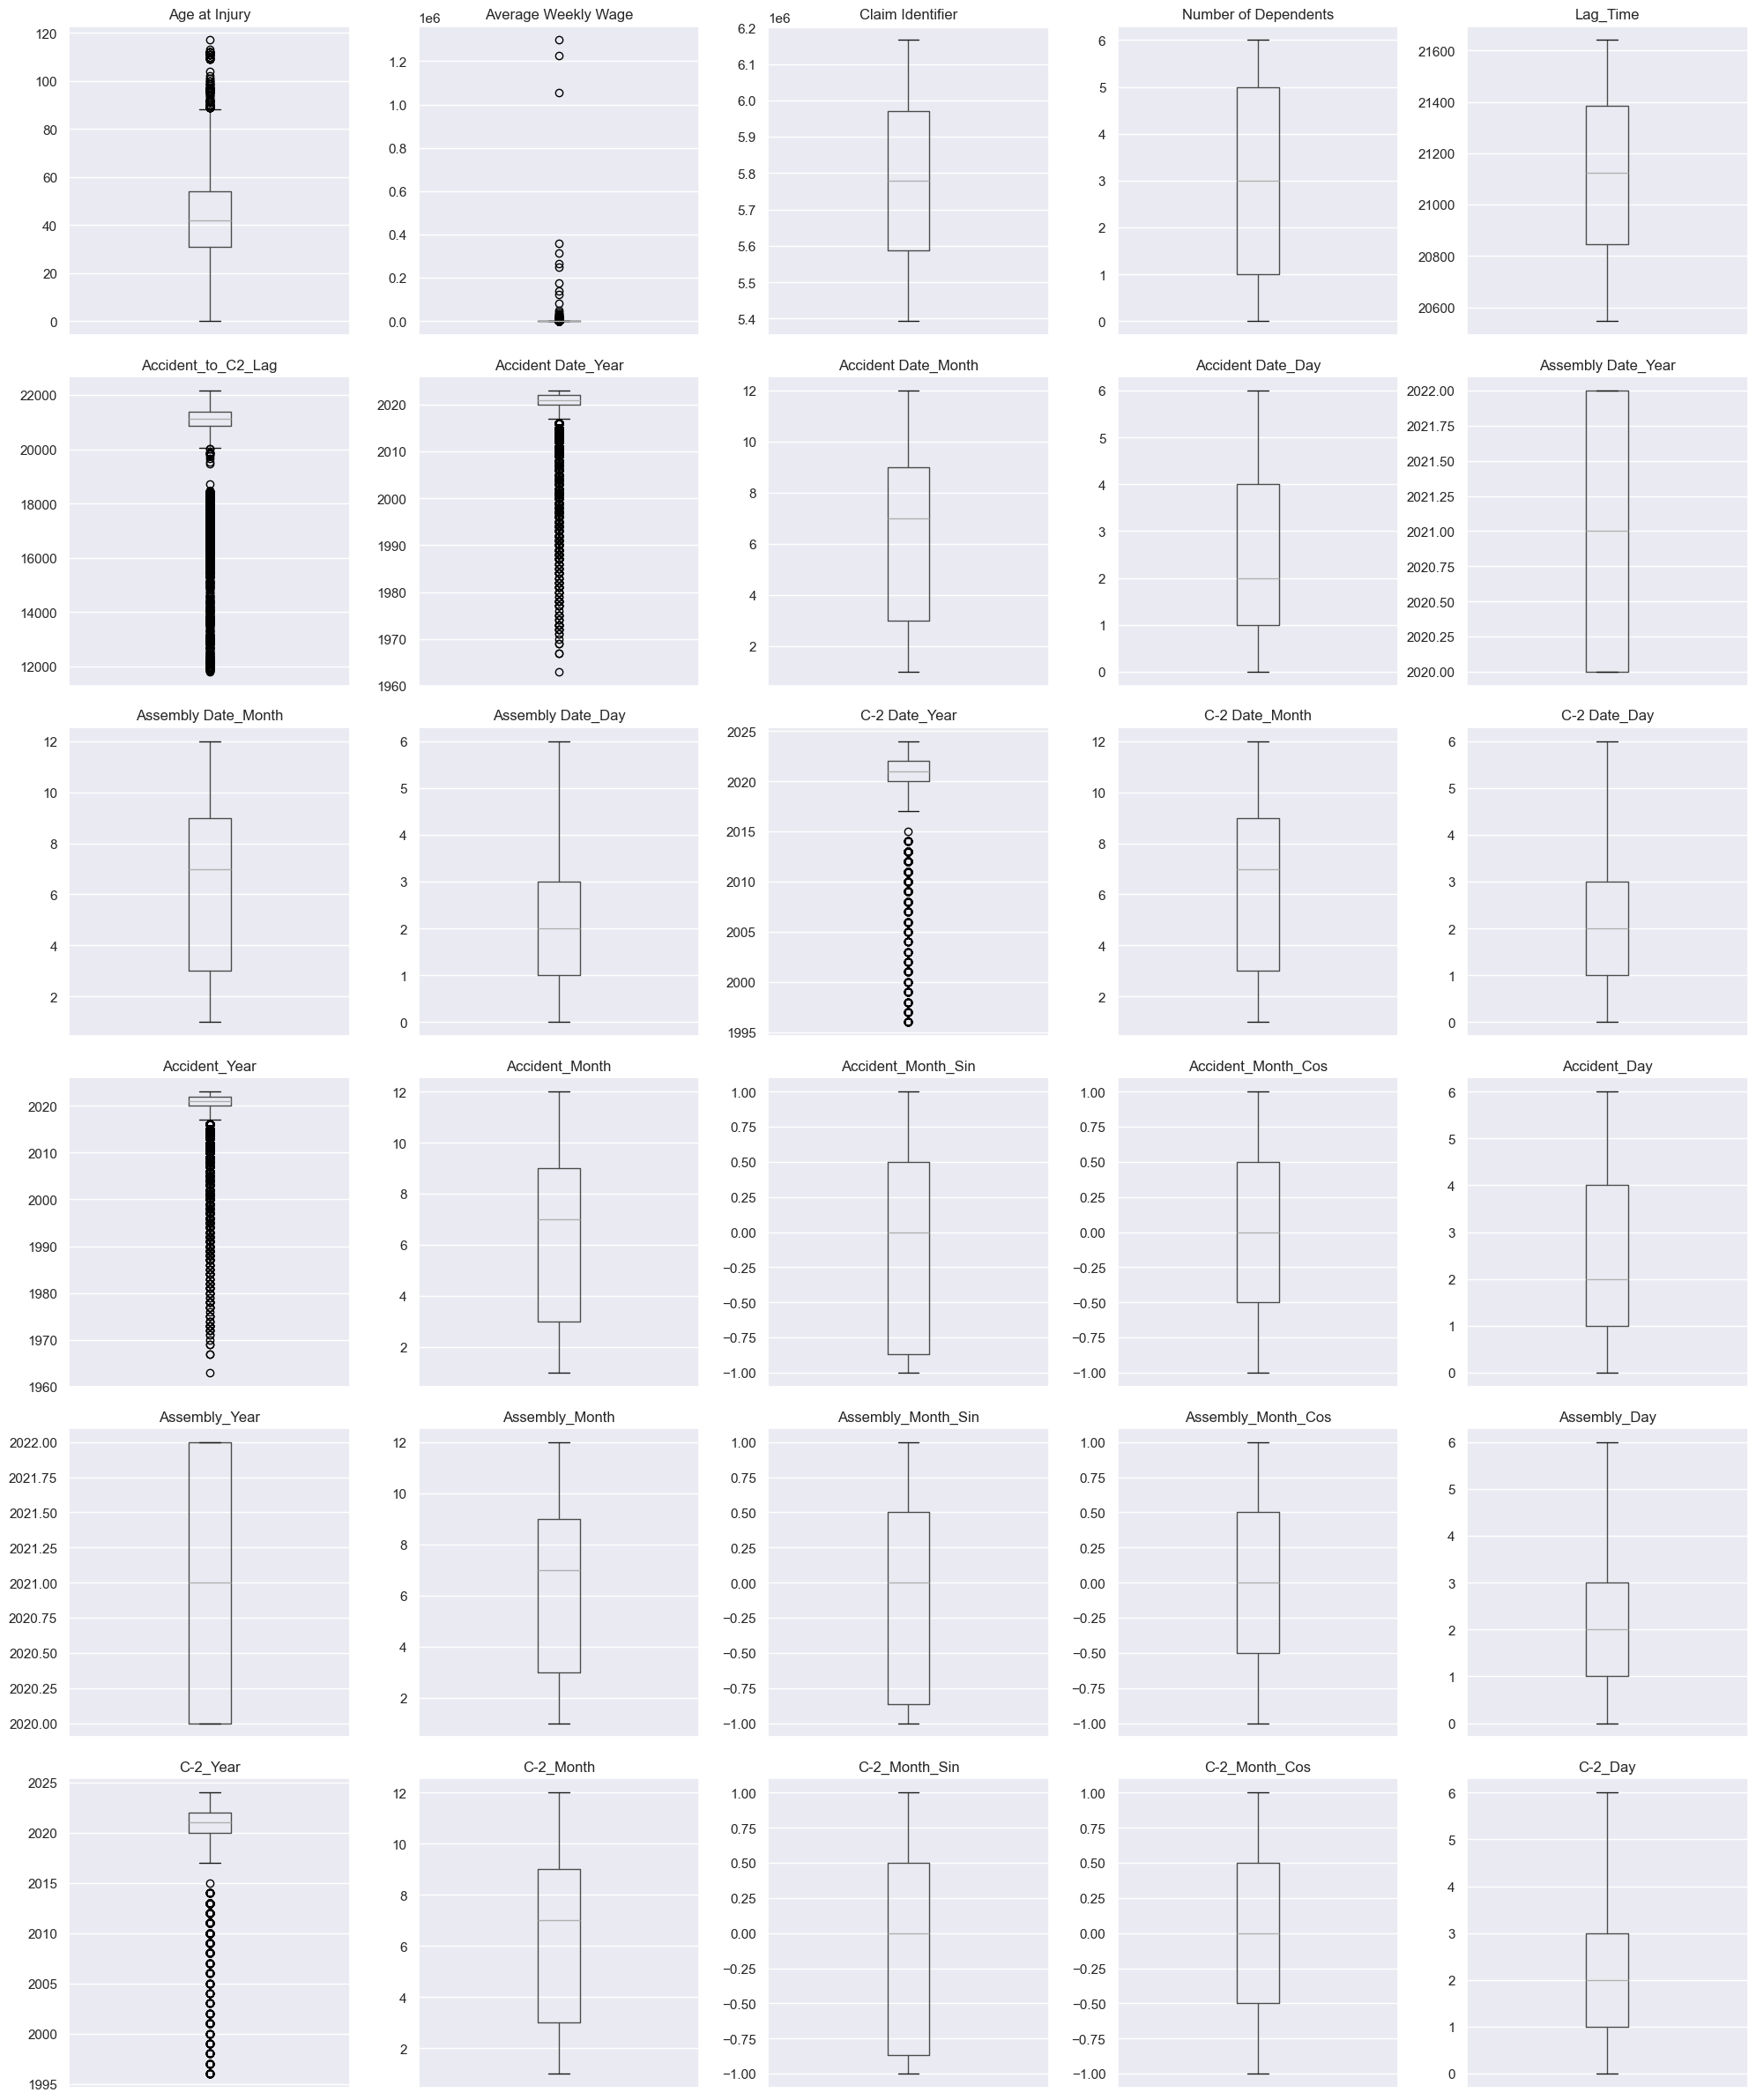

In [95]:
# Determine grid size for subplots
n_features = len(outliers_features)
rows = (n_features // 5) + (1 if n_features % 5 != 0 else 0)  # Adjust columns as needed
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(20, 4 * rows), tight_layout=True)

for i, feature in enumerate(outliers_features):
    row, col = divmod(i, cols)
    ax = axes[row, col] if rows > 1 else axes[col]
    X_train.boxplot(column=feature, ax=ax)
    ax.set_title(feature)
    ax.set_xticks([])  # Remove x-ticks for cleaner visualization

# Remove empty subplots
if n_features % cols != 0:
    for j in range(n_features, rows * cols):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

We have some redudant (duplicated) variables in our dataset that resulted from the transformations. 

Variables to drop:

* Accident_Year

* C2_Year

* Accident_Month

* Assembly_Month 

* C-2_Month

* Accident Date_Day 

* Assembly Date_Year  


In [96]:
redundant_features = ['Accident_Year', 'C-2_Year', 'Accident_Month', 
                      'Assembly_Month', 'C-2_Month', 'Accident Date_Day', 
                      'Assembly Date_Year']


In [97]:
X_train_filtered = X_train_filtered.drop(columns=redundant_features)
X_val = X_val.drop(columns=redundant_features)
X_test = X_test.drop(columns=redundant_features)

test_df = test_df.drop(columns=redundant_features)

In [98]:
# Align `y` datasets to the updated `X` indices
y_train_aligned = y_train.reindex(X_train_filtered.index)
y_val_aligned = y_val.reindex(X_val.index)
y_test_aligned = y_test.reindex(X_test.index)

In [99]:
print("After Alignment:")
print("X_train shape:", X_train_filtered.shape)
print("y_train shape:", y_train_aligned.shape)
print("Matching indices:", X_train_filtered.index.equals(y_train_aligned.index))

After Alignment:
X_train shape: (366640, 42)
y_train shape: (366640,)
Matching indices: True


In [100]:
X_train_filtered.shape, X_val.shape, X_test.shape, test_df.shape

((366640, 42), (91844, 42), (114806, 42), (387975, 42))

In [101]:
y_train_aligned.shape, y_val_aligned.shape, y_test_aligned.shape

((366640,), (91844,), (114806,))

In [102]:
y_train_aligned.isna().sum()

np.int64(0)

## Plot again the BoxPlots and see which variables have outliers and thus should be treated

In [103]:
numerical_cols_filtered = X_train_filtered.select_dtypes(include=np.number).columns.tolist()

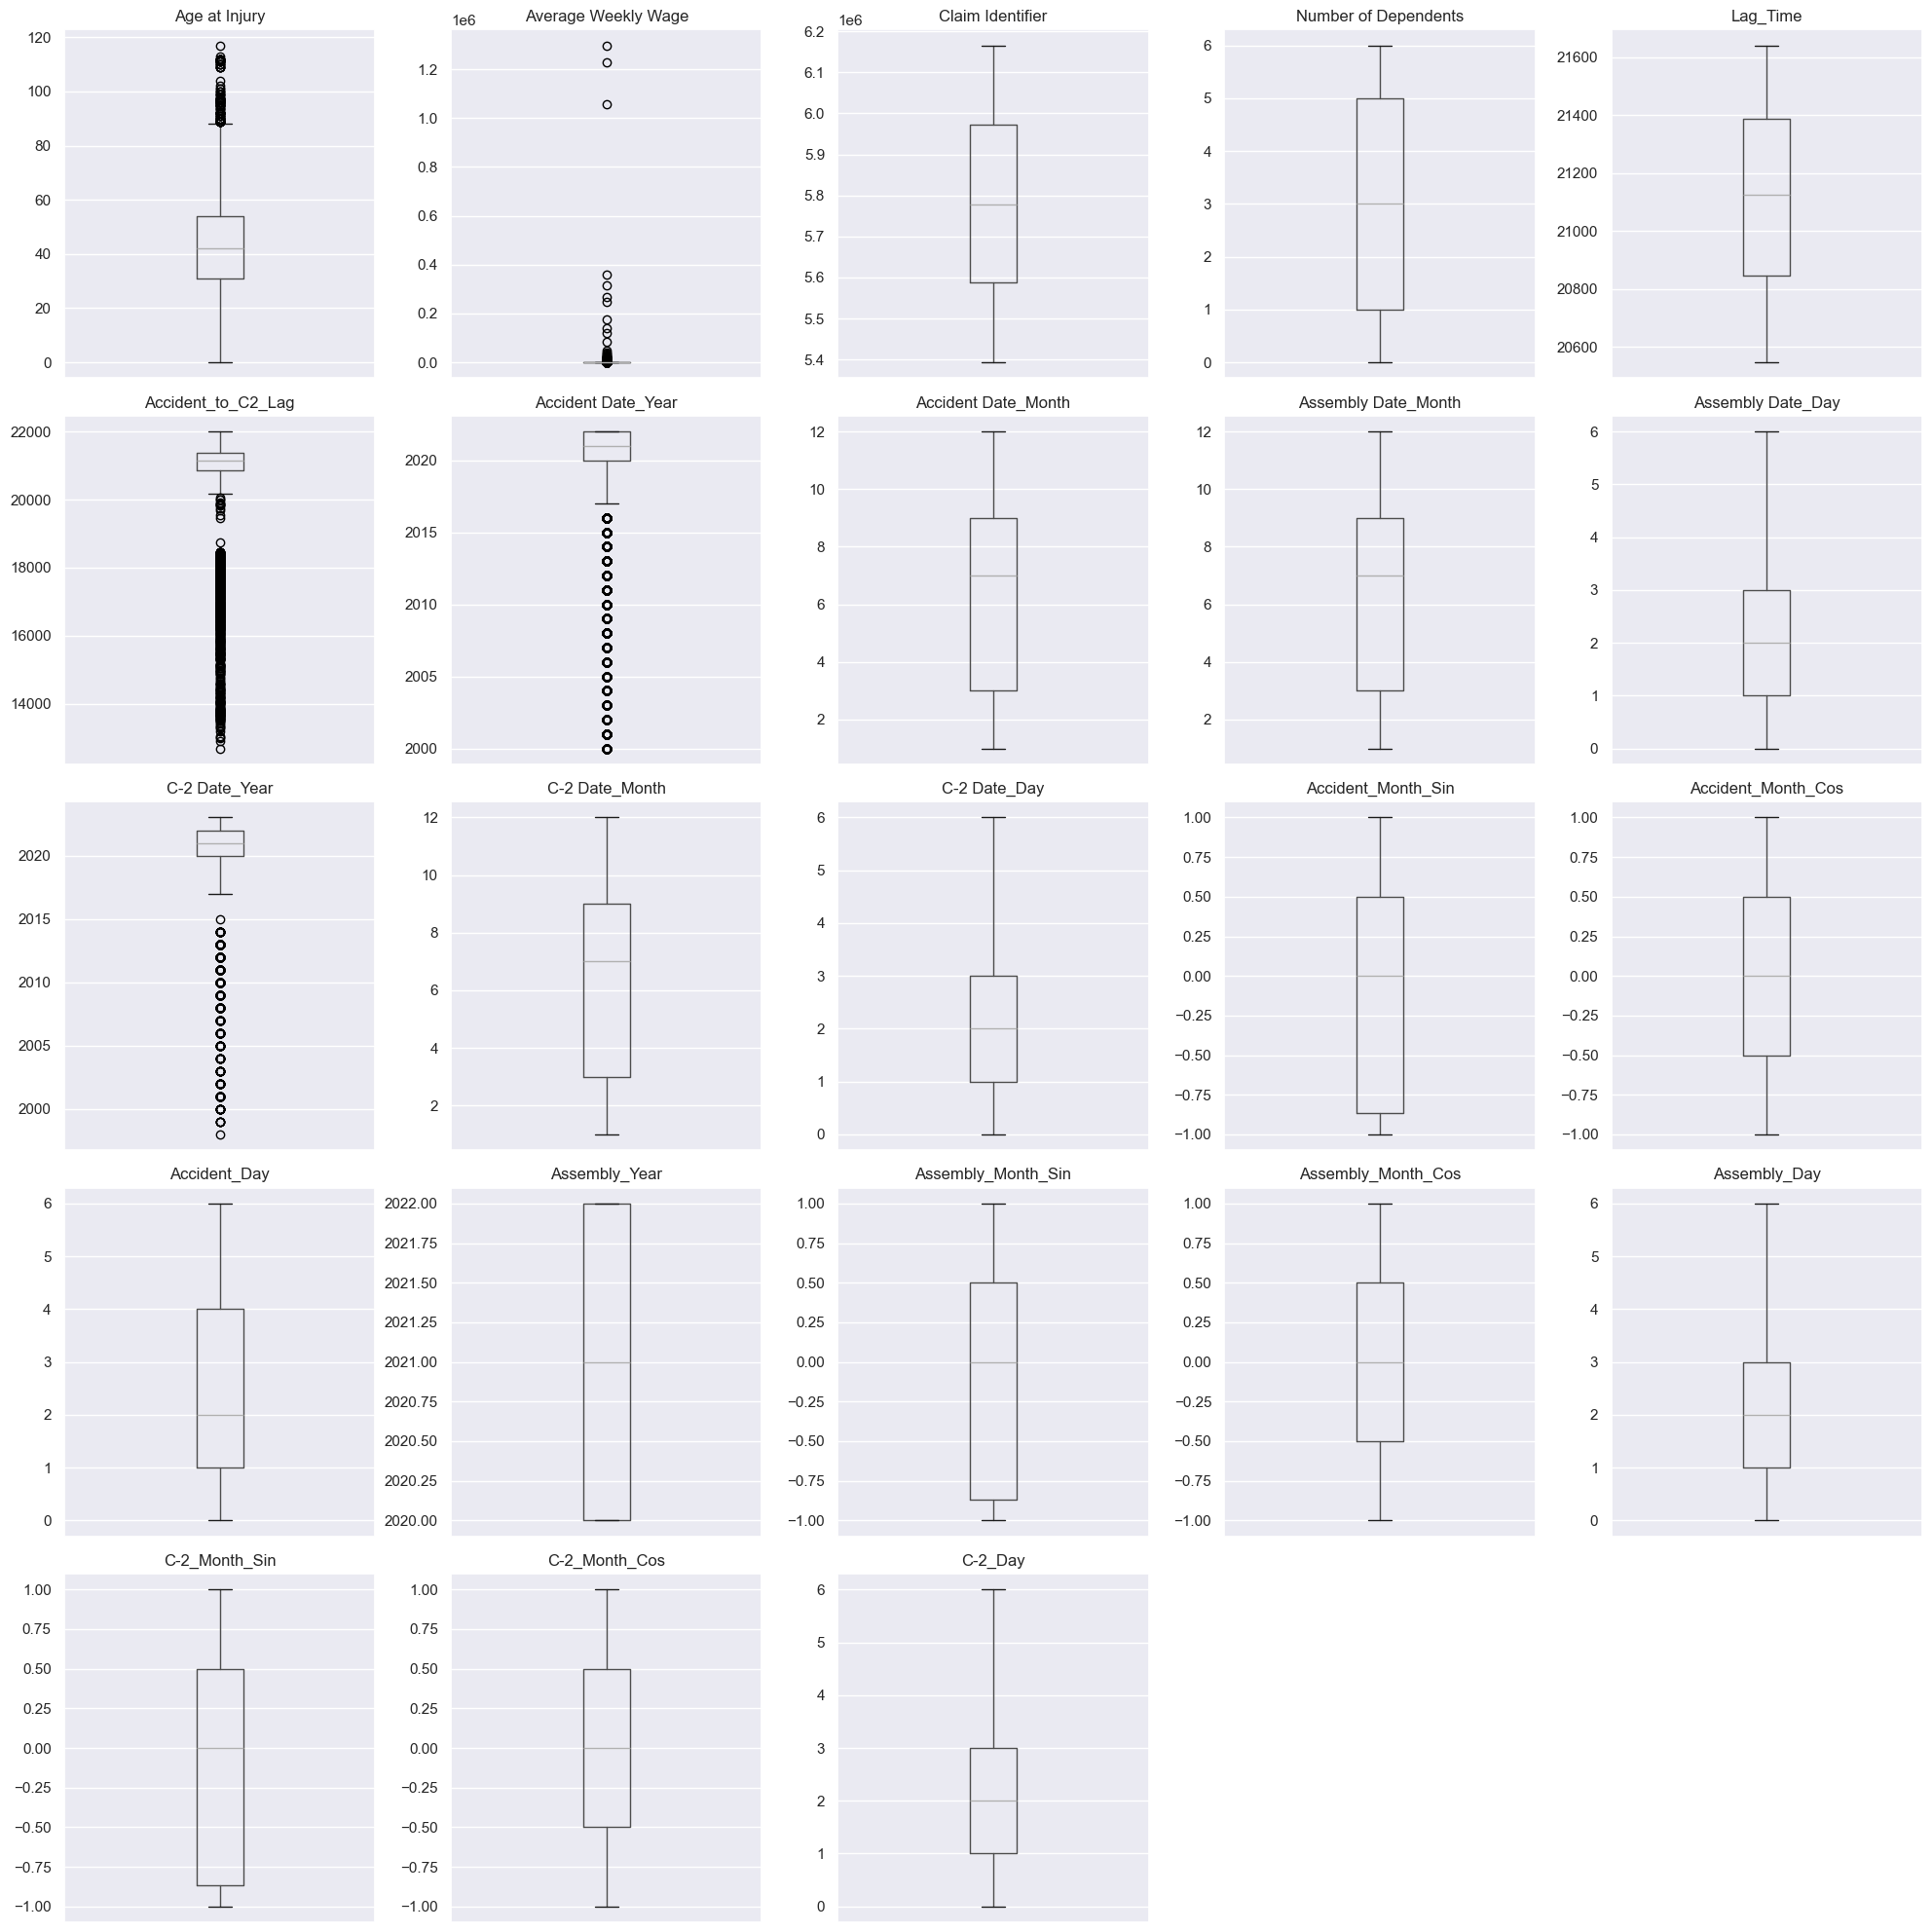

In [104]:
# Determine grid size for subplots
n_features = len(numerical_cols_filtered)
rows = (n_features // 5) + (1 if n_features % 5 != 0 else 0)  # Adjust rows dynamically
cols = 5  # Fixed number of columns

fig, axes = plt.subplots(rows, cols, figsize=(20, 4 * rows), tight_layout=True)

for i, feature in enumerate(numerical_cols_filtered):
    row, col = divmod(i, cols)
    ax = axes[row, col] if rows > 1 else axes[col]
    X_train_filtered.boxplot(column=feature, ax=ax)
    ax.set_title(feature)
    ax.set_xticks([])  # Remove x-ticks for cleaner visualization

# Remove empty subplots if there are leftover grid spaces
if n_features % cols != 0:
    for j in range(n_features, rows * cols):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

### Variables that have outliers:

* Age at Injury 
* Average Weekly Wage
* Accident_to_C2_Lag
* Accident Date_Year

## 2.6.1 - Age at Injury

In [105]:
# Total number of rows in the DataFrame
total_rows = len(X_train_filtered)

# Count rows with 'Age at Injury' below 14
below_14_count = X_train_filtered[X_train_filtered['Age at Injury'] < 14].shape[0]
below_14_percentage = (below_14_count / total_rows) * 100

# Count rows with 'Age at Injury' over 90
over_90_count = X_train_filtered[X_train_filtered['Age at Injury'] > 90].shape[0]
over_90_percentage = (over_90_count / total_rows) * 100

# Print the results
print(f"Number of rows with 'Age at Injury' below 14: {below_14_count} ({below_14_percentage:.2f}%)")
print(f"Number of rows with 'Age at Injury' over 90: {over_90_count} ({over_90_percentage:.2f}%)")

Number of rows with 'Age at Injury' below 14: 3462 (0.94%)
Number of rows with 'Age at Injury' over 90: 115 (0.03%)


In [106]:
X_train_filtered = X_train_filtered[(X_train_filtered['Age at Injury'] >= 14) & (X_train_filtered['Age at Injury'] <= 90)]


In [107]:
# Get the indices of the dataframe
filtered_indices_age = X_train_filtered.index

In [108]:
# Update y_train

# Align y_train with filtered X_train_filtered
y_train_aligned = y_train.loc[filtered_indices_age]


In [109]:
print("X_train shape:", X_train_filtered.shape)
print("y_train shape:", y_train_aligned.shape)
print("Matching indices:", X_train_filtered.index.equals(y_train_aligned.index))

X_train shape: (363063, 42)
y_train shape: (363063,)
Matching indices: True


In [110]:
# Check if indices match right after creating X_outliers
print("Indices match initially:", X_train_filtered.index.equals(y_train_aligned.index))

Indices match initially: True


In [111]:
# Reset the index after dropping rows
X_train_filtered.reset_index(drop=True, inplace=True)

In [112]:
y_train_aligned.isna().sum() , y_val_aligned.isna().sum() , y_test_aligned.isna().sum()

(np.int64(0), np.int64(0), np.int64(0))

In [113]:
y_train_aligned.value_counts()

Claim Injury Type
2. NON-COMP        184153
4. TEMPORARY        94288
3. MED ONLY         43907
5. PPD SCH LOSS     30874
1. CANCELLED         6785
6. PPD NSL           2695
8. DEATH              299
7. PTD                 62
Name: count, dtype: int64

## 2.6.2 - Average Weekly Wage / Accident_to_C2_Lag , Accident Date_Year

In [114]:
# Initial count of rows in X_train_filtered
total_rows = len(X_train_filtered)

# Features to analyze for outlier removal
features = ['Average Weekly Wage', 'Accident_to_C2_Lag', 'Accident Date_Year']

# Initial count of rows in X_train_filtered
initial_count = len(X_train_filtered)

indexes_list = []

# Removing outliers using the IQR method
for feature in features:
    Q1 = X_train_filtered[feature].quantile(0.25)
    Q3 = X_train_filtered[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    X_train_filtered = X_train_filtered[(X_train_filtered[feature] >= lower_bound) & (X_train_filtered[feature] <= upper_bound)]
    indexes = X_train_filtered.index
    indexes_list.append(indexes)


# Final count of rows in X_train_filtered after outlier removal
final_count = len(X_train_filtered)

# Percentage of data removed
percentage_removed = ((total_rows - final_count) / total_rows) * 100

# Print percentage of data removed """
print(f"Percentage of data removed due to outliers: {percentage_removed:.2f}%")

Percentage of data removed due to outliers: 5.23%


In [115]:
print(f"{len(X_train_filtered) / len(X_train) * 100}% of the data was removed due to outlier removal.") 

93.6544575584687% of the data was removed due to outlier removal.


In [116]:
y_train_aligned = y_train_aligned.loc[indexes_list[0]]

KeyError: '[2, 3, 7, 12, 14, 15, 17, 19, 24, 29, 31, 32, 33, 36, 37, 38, 42, 43, 44, 46, 51, 52, 53, 55, 56, 58, 59, 61, 65, 66, 75, 78, 81, 84, 85, 87, 90, 91, 92, 97, 101, 104, 108, 109, 112, 113, 114, 116, 119, 122, 123, 127, 128, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 142, 143, 144, 147, 148, 151, 156, 158, 159, 161, 164, 165, 166, 169, 172, 176, 177, 179, 180, 183, 186, 187, 188, 189, 196, 202, 204, 206, 209, 211, 214, 215, 216, 219, 221, 223, 225, 226, 233, 234, 237, 240, 242, 244, 245, 246, 251, 255, 256, 260, 262, 264, 266, 267, 276, 278, 279, 282, 284, 286, 290, 292, 293, 298, 300, 307, 308, 316, 317, 320, 324, 326, 330, 335, 337, 339, 341, 342, 349, 350, 351, 352, 357, 360, 361, 362, 367, 368, 370, 372, 373, 374, 375, 377, 380, 387, 392, 395, 396, 398, 399, 409, 410, 411, 412, 413, 414, 416, 417, 420, 421, 424, 427, 428, 429, 430, 433, 438, 442, 445, 448, 455, 459, 461, 462, 463, 465, 466, 467, 470, 474, 475, 477, 478, 486, 489, 490, 492, 494, 497, 498, 502, 506, 509, 519, 520, 527, 528, 530, 531, 534, 535, 537, 548, 549, 552, 553, 556, 558, 563, 566, 570, 572, 574, 575, 581, 586, 587, 594, 595, 597, 599, 605, 607, 614, 619, 623, 624, 625, 628, 629, 635, 636, 638, 639, 640, 641, 647, 648, 650, 653, 656, 659, 660, 663, 665, 667, 670, 671, 673, 674, 677, 684, 686, 688, 689, 693, 695, 696, 697, 698, 699, 701, 704, 708, 709, 710, 714, 716, 718, 720, 721, 723, 725, 727, 729, 731, 736, 739, 741, 743, 744, 746, 747, 748, 749, 750, 751, 752, 754, 756, 759, 760, 762, 765, 771, 772, 773, 777, 778, 780, 783, 785, 787, 790, 791, 792, 796, 800, 802, 803, 806, 812, 813, 817, 820, 823, 829, 833, 834, 835, 837, 840, 843, 846, 847, 851, 852, 857, 858, 862, 864, 868, 871, 872, 874, 876, 880, 883, 888, 899, 902, 903, 905, 906, 911, 913, 914, 915, 917, 927, 928, 941, 944, 945, 946, 953, 954, 959, 963, 965, 968, 969, 973, 975, 976, 989, 990, 999, 1000, 1003, 1005, 1006, 1011, 1018, 1019, 1020, 1023, 1025, 1026, 1028, 1032, 1034, 1036, 1046, 1048, 1051, 1054, 1056, 1062, 1069, 1070, 1071, 1072, 1075, 1076, 1081, 1083, 1086, 1088, 1096, 1097, 1099, 1103, 1105, 1113, 1115, 1117, 1118, 1121, 1123, 1130, 1135, 1138, 1139, 1143, 1151, 1152, 1153, 1156, 1158, 1162, 1163, 1166, 1167, 1179, 1180, 1184, 1185, 1186, 1188, 1189, 1190, 1193, 1195, 1197, 1199, 1202, 1212, 1213, 1217, 1219, 1222, 1224, 1226, 1230, 1238, 1242, 1245, 1247, 1250, 1262, 1264, 1266, 1269, 1275, 1277, 1279, 1286, 1296, 1299, 1300, 1301, 1304, 1306, 1308, 1309, 1311, 1322, 1324, 1328, 1330, 1332, 1333, 1337, 1345, 1348, 1349, 1351, 1353, 1354, 1355, 1364, 1367, 1372, 1374, 1377, 1378, 1379, 1381, 1383, 1385, 1394, 1396, 1398, 1402, 1403, 1405, 1406, 1407, 1412, 1413, 1421, 1422, 1423, 1429, 1432, 1435, 1437, 1440, 1442, 1443, 1446, 1447, 1449, 1454, 1458, 1459, 1464, 1468, 1469, 1470, 1471, 1472, 1477, 1478, 1479, 1480, 1485, 1487, 1490, 1493, 1496, 1498, 1502, 1504, 1507, 1513, 1514, 1516, 1518, 1521, 1522, 1529, 1535, 1537, 1538, 1539, 1546, 1547, 1549, 1551, 1552, 1553, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1601, 1602, 1603, 1607, 1608, 1613, 1615, 1621, 1623, 1625, 1627, 1631, 1632, 1633, 1636, 1638, 1643, 1645, 1649, 1651, 1652, 1653, 1658, 1664, 1666, 1668, 1669, 1670, 1671, 1674, 1675, 1677, 1686, 1689, 1692, 1694, 1697, 1702, 1703, 1705, 1714, 1715, 1716, 1717, 1722, 1724, 1729, 1730, 1732, 1736, 1738, 1739, 1740, 1742, 1744, 1748, 1753, 1758, 1759, 1762, 1766, 1767, 1771, 1773, 1774, 1779, 1780, 1781, 1782, 1783, 1784, 1796, 1798, 1802, 1805, 1809, 1810, 1818, 1819, 1821, 1823, 1829, 1830, 1834, 1837, 1838, 1841, 1844, 1845, 1847, 1848, 1849, 1851, 1859, 1861, 1864, 1865, 1866, 1873, 1874, 1887, 1888, 1892, 1894, 1896, 1897, 1898, 1900, 1903, 1904, 1905, 1906, 1910, 1911, 1913, 1918, 1921, 1924, 1927, 1928, 1929, 1934, 1944, 1945, 1946, 1949, 1955, 1967, 1977, 1978, 1987, 1988, 1992, 1994, 2002, 2005, 2007, 2008, 2012, 2013, 2015, 2017, 2019, 2020, 2024, 2025, 2030, 2031, 2032, 2037, 2040, 2041, 2045, 2047, 2050, 2053, 2055, 2056, 2061, 2063, 2065, 2068, 2074, 2077, 2079, 2085, 2086, 2087, 2089, 2098, 2102, 2105, 2106, 2111, 2114, 2116, 2119, 2121, 2122, 2124, 2127, 2128, 2130, 2131, 2132, 2134, 2135, 2137, 2138, 2141, 2144, 2148, 2149, 2150, 2154, 2156, 2161, 2162, 2167, 2170, 2172, 2174, 2175, 2176, 2178, 2180, 2183, 2184, 2185, 2192, 2196, 2198, 2201, 2213, 2215, 2216, 2220, 2221, 2224, 2225, 2232, 2235, 2237, 2240, 2241, 2242, 2243, 2244, 2245, 2246, 2252, 2254, 2255, 2257, 2262, 2265, 2270, 2276, 2278, 2285, 2286, 2291, 2293, 2294, 2295, 2300, 2301, 2302, 2304, 2308, 2313, 2314, 2316, 2318, 2319, 2323, 2331, 2332, 2333, 2334, 2336, 2340, 2341, 2343, 2345, 2351, 2355, 2360, 2365, 2369, 2374, 2375, 2376, 2378, 2379, 2380, 2385, 2389, 2390, 2391, 2395, 2397, 2399, 2402, 2407, 2409, 2410, 2414, 2415, 2416, 2418, 2423, 2426, 2431, 2433, 2435, 2436, 2437, 2443, 2444, 2450, 2452, 2457, 2458, 2460, 2462, 2463, 2469, 2473, 2474, 2481, 2486, 2488, 2489, 2490, 2491, 2494, 2497, 2498, 2499, 2500, 2503, 2504, 2511, 2512, 2513, 2516, 2517, 2521, 2523, 2524, 2525, 2527, 2529, 2530, 2531, 2538, 2539, 2542, 2544, 2550, 2551, 2555, 2558, 2562, 2565, 2570, 2571, 2572, 2574, 2577, 2580, 2581, 2583, 2585, 2586, 2587, 2588, 2589, 2591, 2592, 2595, 2596, 2597, 2600, 2601, 2606, 2608, 2611, 2612, 2614, 2621, 2622, 2631, 2639, 2644, 2648, 2652, 2653, 2656, 2661, 2664, 2671, 2674, 2677, 2679, 2682, 2684, 2685, 2691, 2692, 2697, 2698, 2699, 2700, 2701, 2703, 2704, 2709, 2711, 2712, 2717, 2721, 2723, 2725, 2727, 2731, 2736, 2738, 2739, 2741, 2743, 2745, 2746, 2747, 2749, 2751, 2752, 2755, 2756, 2761, 2770, 2774, 2775, 2777, 2778, 2780, 2782, 2783, 2785, 2790, 2794, 2796, 2798, 2804, 2807, 2808, 2809, 2811, 2812, 2816, 2819, 2823, 2834, 2838, 2841, 2846, 2847, 2848, 2849, 2855, 2860, 2861, 2863, 2867, 2869, 2874, 2882, 2887, 2888, 2890, 2892, 2893, 2894, 2895, 2897, 2900, 2901, 2904, 2907, 2910, 2920, 2922, 2927, 2928, 2930, 2935, 2938, 2940, 2941, 2950, 2951, 2953, 2955, 2964, 2965, 2966, 2969, 2975, 2978, 2983, 2985, 2987, 2988, 2989, 2991, 2992, 2993, 2995, 2997, 3001, 3002, 3005, 3006, 3007, 3011, 3013, 3014, 3015, 3016, 3020, 3023, 3025, 3045, 3054, 3055, 3057, 3063, 3065, 3068, 3069, 3075, 3076, 3080, 3083, 3088, 3092, 3094, 3095, 3097, 3099, 3101, 3104, 3107, 3108, 3109, 3114, 3116, 3118, 3121, 3126, 3137, 3142, 3143, 3144, 3146, 3148, 3150, 3151, 3152, 3153, 3155, 3161, 3163, 3164, 3165, 3167, 3172, 3173, 3175, 3181, 3183, 3188, 3190, 3191, 3195, 3196, 3199, 3201, 3202, 3203, 3204, 3206, 3207, 3208, 3210, 3211, 3213, 3216, 3217, 3218, 3219, 3220, 3222, 3225, 3226, 3228, 3229, 3231, 3235, 3236, 3237, 3238, 3241, 3243, 3245, 3248, 3255, 3259, 3260, 3266, 3267, 3268, 3270, 3278, 3281, 3286, 3292, 3294, 3295, 3298, 3303, 3304, 3306, 3313, 3314, 3317, 3318, 3319, 3323, 3324, 3326, 3328, 3329, 3331, 3332, 3334, 3336, 3337, 3342, 3344, 3347, 3348, 3356, 3358, 3363, 3368, 3370, 3374, 3375, 3378, 3380, 3382, 3383, 3389, 3395, 3397, 3401, 3408, 3409, 3410, 3414, 3417, 3418, 3423, 3426, 3427, 3434, 3435, 3436, 3437, 3438, 3439, 3440, 3443, 3445, 3447, 3448, 3454, 3455, 3457, 3463, 3468, 3469, 3474, 3476, 3477, 3478, 3480, 3481, 3483, 3485, 3486, 3487, 3492, 3493, 3494, 3495, 3496, 3498, 3499, 3500, 3501, 3503, 3504, 3506, 3507, 3508, 3509, 3510, 3512, 3513, 3514, 3517, 3518, 3519, 3520, 3525, 3527, 3531, 3535, 3544, 3545, 3546, 3553, 3556, 3557, 3558, 3562, 3563, 3565, 3568, 3571, 3576, 3581, 3587, 3589, 3592, 3595, 3598, 3600, 3605, 3606, 3608, 3609, 3611, 3615, 3616, 3617, 3622, 3623, 3628, 3629, 3630, 3633, 3637, 3641, 3645, 3646, 3647, 3654, 3658, 3659, 3660, 3661, 3663, 3668, 3672, 3680, 3684, 3685, 3686, 3687, 3690, 3691, 3696, 3701, 3705, 3707, 3709, 3712, 3718, 3721, 3722, 3723, 3724, 3725, 3729, 3731, 3736, 3738, 3743, 3744, 3747, 3748, 3750, 3753, 3754, 3755, 3757, 3759, 3764, 3771, 3773, 3775, 3781, 3786, 3788, 3790, 3791, 3792, 3793, 3795, 3797, 3799, 3808, 3814, 3817, 3820, 3822, 3823, 3825, 3827, 3838, 3839, 3846, 3847, 3848, 3849, 3850, 3852, 3853, 3863, 3865, 3868, 3869, 3870, 3871, 3876, 3880, 3882, 3883, 3887, 3891, 3892, 3894, 3898, 3901, 3902, 3913, 3915, 3916, 3918, 3921, 3926, 3927, 3928, 3931, 3932, 3934, 3937, 3938, 3944, 3945, 3950, 3952, 3953, 3955, 3958, 3961, 3966, 3967, 3969, 3977, 3980, 3982, 3983, 3985, 3986, 3988, 3990, 3992, 3995, 3996, 3997, 4004, 4005, 4007, 4013, 4016, 4017, 4018, 4021, 4023, 4024, 4025, 4029, 4031, 4032, 4034, 4039, 4041, 4043, 4053, 4055, 4060, 4069, 4070, 4075, 4077, 4080, 4082, 4084, 4102, 4107, 4109, 4111, 4112, 4114, 4116, 4119, 4120, 4121, 4122, 4124, 4127, 4129, 4136, 4137, 4138, 4140, 4150, 4151, 4153, 4171, 4175, 4184, 4187, 4189, 4191, 4196, 4199, 4202, 4203, 4209, 4212, 4214, 4215, 4216, 4217, 4218, 4219, 4220, 4228, 4230, 4232, 4234, 4237, 4239, 4243, 4244, 4245, 4248, 4249, 4253, 4255, 4256, 4257, 4269, 4273, 4279, 4280, 4281, 4282, 4283, 4285, 4287, 4290, 4295, 4296, 4299, 4301, 4305, 4306, 4310, 4311, 4312, 4318, 4319, 4320, 4324, 4326, 4328, 4334, 4339, 4342, 4343, 4344, 4346, 4348, 4351, 4355, 4357, 4358, 4360, 4361, 4362, 4365, 4367, 4373, 4375, 4377, 4381, 4389, 4390, 4392, 4399, 4400, 4402, 4403, 4405, 4409, 4414, 4420, 4422, 4423, 4431, 4434, 4438, 4440, 4441, 4442, 4443, 4447, 4451, 4452, 4454, 4464, 4468, 4471, 4472, 4473, 4477, 4478, 4479, 4481, 4484, 4485, 4487, 4490, 4494, 4499, 4503, 4504, 4507, 4508, 4509, 4510, 4511, 4513, 4514, 4521, 4523, 4527, 4531, 4532, 4533, 4535, 4546, 4547, 4550, 4551, 4554, 4561, 4565, 4571, 4576, 4577, 4578, 4579, 4582, 4583, 4585, 4594, 4596, 4597, 4599, 4600, 4605, 4607, 4608, 4610, 4614, 4616, 4621, 4622, 4624, 4625, 4631, 4632, 4634, 4635, 4638, 4643, 4647, 4651, 4652, 4653, 4657, 4661, 4663, 4668, 4672, 4673, 4677, 4678, 4680, 4684, 4686, 4689, 4690, 4696, 4697, 4698, 4705, 4707, 4710, 4714, 4719, 4723, 4725, 4728, 4730, 4732, 4735, 4736, 4740, 4741, 4743, 4750, 4751, 4752, 4753, 4759, 4769, 4770, 4772, 4781, 4782, 4784, 4791, 4795, 4797, 4798, 4799, 4803, 4806, 4812, 4814, 4818, 4823, 4825, 4827, 4830, 4834, 4835, 4836, 4838, 4840, 4841, 4847, 4851, 4852, 4859, 4861, 4862, 4863, 4867, 4869, 4872, 4873, 4874, 4876, 4879, 4881, 4884, 4886, 4890, 4896, 4897, 4900, 4906, 4910, 4913, 4915, 4916, 4921, 4922, 4923, 4939, 4940, 4942, 4945, 4946, 4947, 4953, 4955, 4958, 4963, 4964, 4966, 4970, 4971, 4973, 4976, 4977, 4983, 4985, 4994, 4996, 5001, 5002, 5003, 5009, 5010, 5011, 5014, 5015, 5016, 5018, 5019, 5022, 5026, 5031, 5032, 5034, 5035, 5036, 5037, 5042, 5045, 5046, 5049, 5054, 5055, 5061, 5062, 5064, 5065, 5067, 5073, 5074, 5076, 5077, 5081, 5082, 5084, 5088, 5091, 5092, 5094, 5095, 5106, 5107, 5113, 5117, 5119, 5122, 5127, 5128, 5130, 5133, 5134, 5135, 5137, 5146, 5148, 5150, 5160, 5166, 5168, 5175, 5176, 5178, 5180, 5181, 5186, 5189, 5190, 5192, 5193, 5198, 5202, 5207, 5208, 5210, 5211, 5216, 5217, 5226, 5227, 5229, 5230, 5231, 5232, 5233, 5237, 5239, 5241, 5242, 5243, 5245, 5248, 5249, 5253, 5254, 5256, 5261, 5265, 5270, 5276, 5280, 5282, 5284, 5288, 5289, 5291, 5292, 5293, 5299, 5300, 5304, 5306, 5307, 5308, 5309, 5310, 5319, 5320, 5322, 5323, 5327, 5329, 5333, 5334, 5336, 5345, 5347, 5349, 5351, 5353, 5355, 5356, 5360, 5361, 5368, 5370, 5372, 5380, 5381, 5384, 5385, 5388, 5391, 5392, 5396, 5397, 5399, 5401, 5402, 5403, 5405, 5408, 5410, 5411, 5416, 5419, 5420, 5421, 5422, 5428, 5430, 5433, 5435, 5438, 5440, 5443, 5446, 5447, 5449, 5456, 5457, 5461, 5466, 5468, 5473, 5477, 5478, 5479, 5480, 5481, 5487, 5489, 5494, 5495, 5498, 5500, 5501, 5502, 5506, 5514, 5521, 5522, 5523, 5525, 5527, 5531, 5534, 5538, 5543, 5544, 5545, 5547, 5548, 5550, 5551, 5554, 5555, 5560, 5563, 5564, 5567, 5569, 5570, 5572, 5579, 5581, 5588, 5593, 5594, 5595, 5596, 5598, 5601, 5605, 5607, 5609, 5612, 5616, 5619, 5626, 5628, 5633, 5636, 5637, 5639, 5641, 5652, 5654, 5659, 5660, 5661, 5662, 5663, 5665, 5666, 5667, 5668, 5674, 5684, 5685, 5686, 5687, 5688, 5694, 5695, 5696, 5702, 5705, 5706, 5710, 5716, 5719, 5720, 5723, 5724, 5725, 5726, 5727, 5730, 5733, 5734, 5737, 5740, 5741, 5748, 5752, 5759, 5762, 5763, 5766, 5771, 5779, 5781, 5786, 5787, 5789, 5793, 5794, 5795, 5799, 5800, 5801, 5803, 5807, 5809, 5811, 5817, 5818, 5823, 5825, 5827, 5828, 5834, 5840, 5846, 5848, 5852, 5861, 5867, 5871, 5872, 5875, 5878, 5879, 5880, 5881, 5891, 5897, 5902, 5908, 5911, 5913, 5915, 5916, 5917, 5918, 5919, 5920, 5921, 5922, 5923, 5924, 5925, 5926, 5927, 5928, 5929, 5931, 5932, 5933, 5934, 5935, 5936, 5937, 5938, 5939, 5940, 5941, 5942, 5943, 5944, 5945, 5946, 5947, 5948, 5949, 5951, 5952, 5953, 5954, 5955, 5956, 5957, 5958, 5959, 5962, 5964, 5967, 5968, 5970, 5973, 5974, 5977, 5978, 5981, 5982, 5983, 5991, 5992, 5993, 5997, 6009, 6010, 6011, 6012, 6017, 6018, 6019, 6020, 6021, 6022, 6027, 6028, 6032, 6033, 6036, 6039, 6043, 6045, 6047, 6054, 6060, 6061, 6063, 6064, 6066, 6068, 6073, 6077, 6079, 6080, 6086, 6088, 6093, 6095, 6097, 6098, 6100, 6107, 6109, 6114, 6117, 6119, 6121, 6122, 6124, 6128, 6129, 6130, 6131, 6132, 6134, 6139, 6142, 6143, 6144, 6146, 6150, 6153, 6155, 6156, 6164, 6167, 6168, 6170, 6172, 6173, 6175, 6176, 6179, 6186, 6189, 6193, 6195, 6197, 6200, 6207, 6209, 6212, 6213, 6216, 6218, 6227, 6237, 6241, 6243, 6246, 6247, 6248, 6250, 6254, 6255, 6257, 6260, 6263, 6264, 6267, 6271, 6272, 6273, 6275, 6277, 6278, 6280, 6281, 6284, 6285, 6286, 6293, 6295, 6297, 6300, 6301, 6304, 6311, 6312, 6317, 6324, 6325, 6327, 6332, 6336, 6337, 6341, 6342, 6349, 6351, 6352, 6354, 6356, 6362, 6363, 6364, 6370, 6373, 6375, 6377, 6381, 6382, 6385, 6387, 6395, 6397, 6398, 6404, 6405, 6406, 6407, 6415, 6416, 6417, 6418, 6419, 6426, 6428, 6431, 6434, 6435, 6446, 6450, 6452, 6453, 6459, 6467, 6468, 6470, 6471, 6477, 6478, 6488, 6489, 6490, 6493, 6499, 6502, 6503, 6505, 6507, 6510, 6515, 6517, 6522, 6523, 6528, 6530, 6532, 6539, 6540, 6544, 6549, 6551, 6553, 6554, 6556, 6557, 6560, 6563, 6564, 6576, 6579, 6584, 6588, 6594, 6595, 6596, 6598, 6601, 6602, 6603, 6606, 6609, 6611, 6614, 6615, 6617, 6618, 6619, 6623, 6624, 6625, 6628, 6635, 6642, 6643, 6645, 6647, 6650, 6651, 6654, 6656, 6660, 6662, 6663, 6664, 6665, 6667, 6673, 6674, 6676, 6677, 6682, 6686, 6689, 6690, 6693, 6694, 6696, 6701, 6702, 6704, 6705, 6706, 6710, 6711, 6714, 6725, 6726, 6729, 6731, 6732, 6736, 6738, 6739, 6741, 6742, 6744, 6746, 6748, 6749, 6751, 6754, 6757, 6762, 6765, 6772, 6774, 6776, 6778, 6781, 6788, 6789, 6790, 6792, 6797, 6801, 6802, 6807, 6808, 6809, 6810, 6811, 6814, 6815, 6816, 6817, 6818, 6823, 6825, 6831, 6834, 6835, 6836, 6840, 6843, 6845, 6847, 6848, 6850, 6852, 6856, 6860, 6861, 6862, 6868, 6869, 6874, 6876, 6877, 6882, 6887, 6890, 6891, 6893, 6895, 6897, 6898, 6899, 6900, 6902, 6904, 6905, 6906, 6913, 6917, 6918, 6919, 6922, 6925, 6935, 6936, 6938, 6945, 6947, 6953, 6955, 6956, 6957, 6962, 6963, 6964, 6967, 6969, 6970, 6971, 6973, 6977, 6980, 6981, 6982, 6983, 6984, 6986, 6988, 6990, 6992, 6993, 6995, 6997, 7001, 7002, 7003, 7006, 7011, 7015, 7018, 7022, 7030, 7037, 7045, 7049, 7055, 7057, 7058, 7059, 7061, 7062, 7065, 7068, 7072, 7073, 7076, 7082, 7083, 7084, 7085, 7086, 7088, 7089, 7099, 7102, 7103, 7105, 7108, 7109, 7112, 7119, 7120, 7121, 7123, 7124, 7131, 7138, 7143, 7145, 7147, 7148, 7154, 7156, 7157, 7160, 7163, 7166, 7170, 7171, 7179, 7180, 7181, 7185, 7186, 7191, 7192, 7193, 7194, 7195, 7197, 7200, 7204, 7207, 7210, 7212, 7216, 7217, 7219, 7221, 7228, 7229, 7230, 7233, 7234, 7235, 7236, 7238, 7240, 7241, 7242, 7243, 7249, 7253, 7257, 7258, 7260, 7263, 7272, 7274, 7277, 7278, 7282, 7286, 7288, 7291, 7293, 7294, 7296, 7297, 7299, 7303, 7305, 7307, 7308, 7309, 7310, 7311, 7317, 7318, 7319, 7324, 7328, 7332, 7333, 7334, 7338, 7342, 7343, 7347, 7350, 7352, 7356, 7358, 7361, 7362, 7366, 7372, 7373, 7376, 7382, 7383, 7385, 7388, 7389, 7391, 7400, 7402, 7403, 7406, 7410, 7411, 7417, 7426, 7427, 7432, 7433, 7435, 7436, 7437, 7440, 7444, 7452, 7453, 7454, 7455, 7458, 7460, 7463, 7470, 7473, 7475, 7476, 7481, 7483, 7485, 7487, 7488, 7489, 7491, 7492, 7493, 7494, 7495, 7497, 7500, 7504, 7506, 7507, 7510, 7511, 7514, 7515, 7517, 7519, 7522, 7527, 7528, 7530, 7531, 7533, 7534, 7535, 7538, 7543, 7544, 7545, 7546, 7549, 7550, 7552, 7556, 7558, 7561, 7562, 7563, 7566, 7567, 7571, 7572, 7573, 7576, 7577, 7578, 7579, 7585, 7588, 7589, 7592, 7594, 7595, 7600, 7608, 7610, 7611, 7618, 7619, 7620, 7622, 7623, 7627, 7629, 7632, 7633, 7634, 7635, 7640, 7641, 7642, 7647, 7652, 7655, 7662, 7664, 7667, 7668, 7674, 7675, 7676, 7679, 7681, 7684, 7686, 7687, 7690, 7696, 7700, 7704, 7706, 7713, 7716, 7717, 7722, 7725, 7726, 7731, 7735, 7736, 7737, 7738, 7743, 7745, 7746, 7747, 7750, 7751, 7752, 7753, 7755, 7763, 7775, 7776, 7777, 7780, 7782, 7783, 7792, 7793, 7795, 7797, 7801, 7802, 7808, 7811, 7812, 7813, 7815, 7826, 7827, 7828, 7830, 7835, 7836, 7838, 7841, 7844, 7846, 7847, 7850, 7852, 7853, 7854, 7856, 7860, 7862, 7868, 7869, 7872, 7873, 7874, 7877, 7878, 7886, 7887, 7893, 7897, 7907, 7909, 7910, 7911, 7913, 7917, 7918, 7921, 7923, 7925, 7928, 7931, 7933, 7938, 7939, 7941, 7942, 7946, 7948, 7950, 7951, 7953, 7956, 7959, 7961, 7964, 7967, 7968, 7970, 7973, 7978, 7982, 7985, 7986, 7987, 7992, 7995, 7996, 7997, 7999, 8005, 8010, 8019, 8022, 8024, 8029, 8031, 8032, 8035, 8040, 8044, 8054, 8057, 8060, 8062, 8065, 8066, 8071, 8076, 8078, 8081, 8082, 8083, 8086, 8089, 8092, 8094, 8096, 8100, 8101, 8103, 8104, 8111, 8118, 8121, 8122, 8124, 8132, 8134, 8136, 8141, 8143, 8145, 8147, 8152, 8155, 8158, 8163, 8165, 8167, 8171, 8174, 8175, 8176, 8178, 8181, 8182, 8185, 8186, 8194, 8197, 8198, 8200, 8202, 8204, 8205, 8207, 8208, 8209, 8210, 8211, 8213, 8217, 8218, 8220, 8222, 8224, 8226, 8230, 8232, 8236, 8238, 8241, 8244, 8250, 8253, 8256, 8257, 8261, 8263, 8265, 8266, 8267, 8268, 8269, 8281, 8288, 8290, 8293, 8295, 8297, 8301, 8303, 8306, 8309, 8310, 8311, 8314, 8320, 8325, 8326, 8330, 8332, 8337, 8339, 8341, 8342, 8343, 8345, 8348, 8351, 8352, 8356, 8357, 8359, 8360, 8361, 8362, 8366, 8367, 8368, 8374, 8375, 8377, 8387, 8389, 8390, 8393, 8395, 8398, 8400, 8401, 8402, 8407, 8412, 8415, 8421, 8424, 8430, 8431, 8435, 8436, 8439, 8447, 8448, 8452, 8453, 8456, 8457, 8459, 8462, 8463, 8464, 8469, 8475, 8476, 8479, 8481, 8485, 8487, 8493, 8496, 8503, 8506, 8507, 8508, 8510, 8512, 8513, 8516, 8522, 8538, 8541, 8545, 8546, 8554, 8555, 8560, 8562, 8564, 8565, 8569, 8574, 8575, 8576, 8583, 8585, 8590, 8594, 8602, 8603, 8604, 8610, 8611, 8612, 8615, 8619, 8623, 8624, 8626, 8627, 8628, 8630, 8632, 8634, 8635, 8639, 8641, 8644, 8651, 8652, 8653, 8654, 8655, 8660, 8665, 8666, 8670, 8674, 8675, 8681, 8684, 8688, 8689, 8690, 8693, 8694, 8696, 8698, 8699, 8703, 8706, 8707, 8708, 8710, 8712, 8713, 8718, 8723, 8727, 8730, 8733, 8738, 8741, 8749, 8750, 8752, 8756, 8761, 8763, 8765, 8766, 8768, 8769, 8770, 8771, 8773, 8776, 8782, 8784, 8785, 8790, 8794, 8796, 8799, 8800, 8803, 8804, 8808, 8810, 8811, 8812, 8813, 8818, 8821, 8826, 8828, 8829, 8833, 8837, 8840, 8841, 8843, 8844, 8845, 8849, 8851, 8853, 8854, 8858, 8863, 8868, 8872, 8874, 8875, 8878, 8881, 8882, 8887, 8891, 8892, 8895, 8896, 8897, 8899, 8902, 8905, 8906, 8909, 8911, 8912, 8919, 8920, 8928, 8929, 8931, 8933, 8936, 8940, 8941, 8942, 8945, 8946, 8947, 8952, 8953, 8954, 8960, 8961, 8967, 8968, 8970, 8972, 8975, 8983, 8987, 8992, 8994, 8995, 9004, 9007, 9008, 9009, 9011, 9013, 9017, 9021, 9022, 9024, 9028, 9030, 9032, 9033, 9034, 9043, 9046, 9049, 9050, 9051, 9052, 9053, 9057, 9058, 9059, 9061, 9062, 9064, 9065, 9068, 9070, 9072, 9074, 9075, 9076, 9078, 9079, 9080, 9083, 9087, 9088, 9098, 9099, 9101, 9104, 9107, 9108, 9109, 9111, 9113, 9115, 9120, 9123, 9130, 9131, 9132, 9137, 9142, 9143, 9154, 9155, 9157, 9158, 9161, 9166, 9168, 9171, 9173, 9176, 9177, 9179, 9180, 9181, 9184, 9187, 9191, 9197, 9198, 9199, 9202, 9209, 9210, 9212, 9215, 9218, 9219, 9221, 9224, 9230, 9238, 9240, 9242, 9243, 9245, 9246, 9247, 9250, 9252, 9254, 9259, 9264, 9266, 9274, 9275, 9278, 9279, 9280, 9285, 9289, 9291, 9293, 9295, 9296, 9297, 9300, 9303, 9304, 9307, 9309, 9312, 9314, 9315, 9319, 9327, 9328, 9334, 9336, 9340, 9341, 9350, 9354, 9355, 9357, 9358, 9361, 9363, 9364, 9371, 9372, 9376, 9379, 9383, 9390, 9391, 9393, 9394, 9401, 9402, 9403, 9404, 9408, 9409, 9410, 9413, 9418, 9420, 9422, 9423, 9424, 9426, 9427, 9430, 9432, 9434, 9437, 9439, 9441, 9443, 9444, 9446, 9449, 9451, 9453, 9455, 9458, 9460, 9465, 9466, 9467, 9471, 9472, 9474, 9476, 9477, 9478, 9480, 9481, 9488, 9489, 9494, 9496, 9499, 9501, 9502, 9503, 9508, 9509, 9514, 9515, 9516, 9521, 9522, 9530, 9535, 9545, 9546, 9549, 9552, 9553, 9554, 9555, 9556, 9557, 9558, 9568, 9573, 9580, 9583, 9585, 9586, 9587, 9589, 9590, 9592, 9594, 9596, 9599, 9604, 9606, 9608, 9609, 9620, 9624, 9625, 9627, 9629, 9631, 9634, 9636, 9644, 9645, 9646, 9650, 9653, 9656, 9664, 9670, 9671, 9679, 9684, 9690, 9694, 9695, 9696, 9698, 9699, 9701, 9702, 9704, 9706, 9707, 9709, 9714, 9715, 9725, 9726, 9728, 9735, 9739, 9744, 9750, 9752, 9753, 9760, 9761, 9762, 9763, 9765, 9767, 9768, 9769, 9770, 9771, 9773, 9774, 9775, 9776, 9781, 9784, 9785, 9788, 9789, 9791, 9794, 9795, 9800, 9804, 9807, 9816, 9819, 9825, 9835, 9837, 9839, 9845, 9846, 9847, 9848, 9849, 9853, 9855, 9862, 9865, 9866, 9867, 9869, 9870, 9873, 9874, 9875, 9878, 9883, 9890, 9892, 9893, 9894, 9896, 9898, 9900, 9910, 9911, 9913, 9914, 9916, 9917, 9921, 9925, 9928, 9930, 9931, 9935, 9936, 9938, 9944, 9945, 9946, 9949, 9950, 9951, 9952, 9953, 9968, 9970, 9977, 9980, 9984, 9985, 9989, 9991, 9995, 10002, 10004, 10012, 10016, 10027, 10028, 10032, 10035, 10037, 10038, 10043, 10046, 10050, 10051, 10052, 10055, 10056, 10057, 10058, 10059, 10063, 10064, 10068, 10074, 10076, 10079, 10081, 10085, 10086, 10088, 10090, 10092, 10093, 10097, 10099, 10100, 10103, 10104, 10106, 10110, 10111, 10115, 10116, 10118, 10122, 10125, 10135, 10136, 10137, 10143, 10144, 10147, 10148, 10153, 10154, 10157, 10160, 10161, 10162, 10164, 10165, 10168, 10172, 10175, 10176, 10179, 10180, 10181, 10183, 10193, 10194, 10195, 10196, 10197, 10198, 10200, 10201, 10203, 10206, 10221, 10222, 10225, 10227, 10232, 10235, 10236, 10237, 10239, 10243, 10244, 10246, 10253, 10256, 10258, 10261, 10263, 10265, 10269, 10272, 10276, 10277, 10279, 10286, 10287, 10295, 10297, 10298, 10299, 10300, 10304, 10305, 10307, 10309, 10310, 10311, 10316, 10318, 10321, 10330, 10334, 10335, 10337, 10347, 10349, 10358, 10360, 10364, 10366, 10371, 10373, 10374, 10375, 10376, 10378, 10381, 10382, 10383, 10384, 10388, 10389, 10391, 10396, 10401, 10402, 10403, 10404, 10405, 10406, 10408, 10409, 10412, 10414, 10415, 10416, 10417, 10418, 10419, 10420, 10421, 10422, 10423, 10427, 10428, 10432, 10433, 10434, 10435, 10436, 10437, 10438, 10439, 10440, 10441, 10442, 10443, 10444, 10445, 10446, 10447, 10448, 10449, 10450, 10451, 10452, 10453, 10454, 10455, 10456, 10457, 10458, 10459, 10460, 10461, 10464, 10467, 10469, 10470, 10471, 10472, 10476, 10477, 10481, 10484, 10485, 10493, 10494, 10498, 10501, 10502, 10507, 10510, 10511, 10514, 10518, 10520, 10525, 10527, 10530, 10535, 10537, 10538, 10539, 10541, 10542, 10545, 10552, 10554, 10559, 10560, 10562, 10566, 10568, 10569, 10570, 10573, 10576, 10579, 10582, 10589, 10592, 10593, 10594, 10596, 10597, 10598, 10602, 10609, 10613, 10614, 10615, 10620, 10621, 10622, 10625, 10631, 10633, 10634, 10636, 10637, 10641, 10644, 10647, 10648, 10655, 10662, 10672, 10674, 10675, 10677, 10678, 10680, 10681, 10683, 10688, 10691, 10693, 10699, 10700, 10702, 10708, 10711, 10713, 10716, 10717, 10720, 10722, 10724, 10725, 10732, 10733, 10735, 10736, 10737, 10739, 10743, 10744, 10745, 10749, 10755, 10756, 10757, 10758, 10763, 10766, 10772, 10776, 10780, 10781, 10782, 10786, 10788, 10790, 10793, 10794, 10795, 10796, 10798, 10802, 10809, 10810, 10812, 10816, 10819, 10820, 10821, 10823, 10826, 10827, 10829, 10830, 10832, 10836, 10837, 10838, 10846, 10848, 10849, 10851, 10854, 10862, 10863, 10866, 10876, 10879, 10881, 10884, 10893, 10895, 10904, 10906, 10909, 10910, 10911, 10914, 10915, 10919, 10921, 10923, 10924, 10926, 10932, 10943, 10950, 10955, 10956, 10960, 10962, 10963, 10965, 10968, 10969, 10970, 10976, 10977, 10982, 10983, 10990, 10991, 10993, 10994, 10995, 10996, 10998, 10999, 11001, 11007, 11011, 11012, 11013, 11014, 11017, 11022, 11023, 11032, 11033, 11035, 11039, 11042, 11043, 11044, 11046, 11048, 11049, 11051, 11053, 11056, 11057, 11058, 11060, 11062, 11063, 11065, 11067, 11068, 11069, 11072, 11074, 11077, 11079, 11080, 11081, 11084, 11087, 11088, 11092, 11094, 11098, 11102, 11104, 11106, 11115, 11116, 11117, 11122, 11123, 11125, 11127, 11129, 11131, 11132, 11133, 11139, 11140, 11141, 11143, 11145, 11149, 11150, 11151, 11152, 11155, 11159, 11160, 11163, 11164, 11167, 11168, 11170, 11171, 11176, 11179, 11180, 11181, 11184, 11185, 11186, 11188, 11189, 11191, 11192, 11195, 11199, 11203, 11205, 11209, 11211, 11213, 11219, 11220, 11226, 11227, 11228, 11230, 11231, 11235, 11237, 11238, 11241, 11249, 11252, 11254, 11262, 11267, 11268, 11273, 11274, 11277, 11278, 11279, 11280, 11284, 11287, 11288, 11300, 11302, 11304, 11307, 11309, 11312, 11313, 11317, 11318, 11319, 11321, 11324, 11327, 11328, 11329, 11332, 11334, 11337, 11344, 11345, 11346, 11347, 11348, 11349, 11352, 11354, 11357, 11359, 11360, 11362, 11363, 11366, 11370, 11372, 11375, 11376, 11377, 11378, 11380, 11383, 11384, 11387, 11388, 11389, 11393, 11394, 11397, 11399, 11400, 11402, 11403, 11405, 11406, 11407, 11410, 11411, 11416, 11420, 11421, 11423, 11426, 11427, 11431, 11433, 11434, 11436, 11443, 11444, 11446, 11447, 11449, 11450, 11453, 11454, 11455, 11457, 11460, 11463, 11464, 11465, 11467, 11471, 11472, 11473, 11474, 11475, 11478, 11479, 11481, 11482, 11486, 11489, 11490, 11494, 11495, 11497, 11501, 11502, 11503, 11509, 11510, 11523, 11525, 11526, 11528, 11530, 11534, 11537, 11538, 11539, 11542, 11547, 11548, 11549, 11551, 11553, 11555, 11557, 11558, 11560, 11562, 11568, 11569, 11570, 11571, 11574, 11581, 11583, 11587, 11588, 11591, 11603, 11606, 11607, 11609, 11616, 11617, 11618, 11619, 11621, 11622, 11623, 11624, 11626, 11627, 11628, 11637, 11643, 11654, 11657, 11660, 11661, 11666, 11667, 11676, 11682, 11689, 11692, 11705, 11709, 11710, 11718, 11719, 11726, 11728, 11730, 11731, 11732, 11735, 11736, 11737, 11742, 11745, 11749, 11751, 11757, 11758, 11761, 11762, 11764, 11768, 11769, 11773, 11774, 11779, 11786, 11787, 11789, 11794, 11795, 11796, 11798, 11803, 11804, 11806, 11814, 11816, 11819, 11821, 11823, 11825, 11826, 11830, 11834, 11835, 11838, 11839, 11842, 11848, 11850, 11855, 11856, 11857, 11861, 11863, 11869, 11870, 11872, 11877, 11878, 11883, 11888, 11894, 11895, 11897, 11901, 11905, 11907, 11910, 11912, 11914, 11919, 11921, 11923, 11924, 11925, 11929, 11937, 11938, 11941, 11944, 11947, 11948, 11950, 11951, 11954, 11955, 11957, 11974, 11976, 11977, 11978, 11983, 11985, 11987, 11988, 11991, 11992, 11994, 11999, 12002, 12003, 12004, 12005, 12010, 12012, 12026, 12027, 12029, 12030, 12033, 12036, 12038, 12041, 12047, 12048, 12052, 12057, 12058, 12059, 12061, 12063, 12064, 12066, 12069, 12076, 12080, 12088, 12089, 12090, 12092, 12093, 12097, 12098, 12102, 12103, 12107, 12110, 12111, 12112, 12115, 12118, 12119, 12121, 12123, 12130, 12132, 12133, 12137, 12138, 12140, 12142, 12144, 12152, 12153, 12155, 12162, 12165, 12166, 12167, 12168, 12170, 12173, 12175, 12178, 12180, 12184, 12188, 12190, 12192, 12199, 12201, 12205, 12207, 12209, 12212, 12216, 12217, 12218, 12221, 12222, 12224, 12227, 12232, 12233, 12234, 12236, 12237, 12238, 12241, 12243, 12245, 12246, 12247, 12252, 12256, 12264, 12265, 12268, 12269, 12270, 12274, 12278, 12279, 12286, 12289, 12291, 12294, 12295, 12297, 12298, 12303, 12304, 12305, 12308, 12312, 12315, 12316, 12320, 12321, 12326, 12332, 12335, 12341, 12344, 12346, 12347, 12354, 12355, 12356, 12357, 12362, 12363, 12366, 12367, 12370, 12372, 12377, 12380, 12381, 12383, 12389, 12390, 12391, 12398, 12400, 12401, 12404, 12407, 12408, 12409, 12413, 12416, 12420, 12422, 12423, 12425, 12427, 12428, 12431, 12433, 12436, 12443, 12445, 12446, 12447, 12449, 12450, 12452, 12458, 12459, 12460, 12464, 12466, 12468, 12471, 12481, 12484, 12492, 12501, 12505, 12514, 12515, 12516, 12517, 12525, 12527, 12528, 12530, 12531, 12532, 12538, 12543, 12546, 12547, 12551, 12561, 12563, 12565, 12567, 12572, 12575, 12577, 12585, 12586, 12593, 12594, 12595, 12598, 12606, 12613, 12614, 12616, 12620, 12621, 12627, 12629, 12632, 12636, 12639, 12642, 12647, 12653, 12655, 12659, 12660, 12661, 12662, 12666, 12669, 12670, 12672, 12673, 12676, 12680, 12682, 12684, 12686, 12691, 12692, 12697, 12698, 12701, 12705, 12706, 12708, 12709, 12711, 12712, 12713, 12714, 12715, 12717, 12718, 12721, 12723, 12732, 12733, 12734, 12736, 12737, 12738, 12739, 12741, 12744, 12748, 12749, 12751, 12753, 12754, 12755, 12758, 12760, 12761, 12764, 12768, 12770, 12772, 12778, 12780, 12781, 12788, 12789, 12792, 12795, 12796, 12797, 12804, 12806, 12807, 12810, 12812, 12813, 12814, 12815, 12817, 12818, 12821, 12829, 12830, 12831, 12838, 12840, 12842, 12843, 12845, 12850, 12855, 12856, 12857, 12858, 12860, 12863, 12865, 12871, 12873, 12875, 12876, 12878, 12879, 12881, 12882, 12886, 12889, 12895, 12899, 12902, 12904, 12905, 12906, 12911, 12916, 12918, 12920, 12922, 12928, 12933, 12934, 12935, 12941, 12944, 12946, 12947, 12950, 12958, 12959, 12973, 12978, 12979, 12985, 12986, 12992, 12995, 12997, 13002, 13004, 13013, 13015, 13016, 13022, 13023, 13024, 13026, 13027, 13028, 13029, 13031, 13033, 13036, 13037, 13038, 13040, 13041, 13046, 13050, 13051, 13052, 13056, 13059, 13061, 13063, 13065, 13066, 13067, 13069, 13071, 13079, 13080, 13081, 13082, 13084, 13085, 13086, 13088, 13091, 13093, 13097, 13098, 13099, 13101, 13105, 13108, 13109, 13113, 13126, 13128, 13130, 13136, 13138, 13140, 13141, 13142, 13144, 13148, 13149, 13151, 13153, 13155, 13159, 13160, 13162, 13163, 13164, 13167, 13168, 13173, 13176, 13178, 13179, 13180, 13181, 13185, 13186, 13189, 13190, 13192, 13196, 13199, 13203, 13208, 13213, 13214, 13216, 13217, 13222, 13223, 13226, 13228, 13229, 13231, 13233, 13234, 13237, 13238, 13239, 13240, 13242, 13245, 13248, 13249, 13250, 13251, 13252, 13253, 13254, 13256, 13264, 13270, 13272, 13275, 13277, 13278, 13279, 13281, 13282, 13285, 13286, 13291, 13293, 13294, 13296, 13297, 13299, 13301, 13303, 13312, 13317, 13318, 13319, 13320, 13321, 13322, 13327, 13328, 13329, 13330, 13333, 13334, 13341, 13350, 13351, 13352, 13353, 13355, 13362, 13368, 13370, 13376, 13379, 13386, 13387, 13389, 13392, 13394, 13396, 13397, 13399, 13400, 13401, 13402, 13403, 13405, 13409, 13416, 13417, 13418, 13422, 13425, 13426, 13428, 13429, 13432, 13435, 13436, 13439, 13443, 13445, 13446, 13447, 13453, 13458, 13461, 13462, 13463, 13466, 13470, 13474, 13476, 13477, 13481, 13484, 13493, 13495, 13497, 13503, 13505, 13507, 13509, 13511, 13513, 13514, 13517, 13518, 13525, 13526, 13528, 13529, 13531, 13539, 13545, 13546, 13551, 13552, 13553, 13554, 13556, 13558, 13560, 13565, 13566, 13567, 13571, 13574, 13575, 13576, 13579, 13581, 13586, 13587, 13588, 13597, 13599, 13601, 13605, 13609, 13611, 13613, 13617, 13619, 13625, 13626, 13629, 13631, 13634, 13635, 13637, 13638, 13639, 13643, 13644, 13646, 13647, 13649, 13651, 13654, 13655, 13662, 13663, 13664, 13666, 13670, 13671, 13676, 13677, 13688, 13689, 13690, 13693, 13695, 13697, 13707, 13710, 13711, 13712, 13718, 13720, 13721, 13723, 13724, 13725, 13726, 13727, 13731, 13733, 13734, 13735, 13742, 13745, 13746, 13747, 13752, 13753, 13754, 13756, 13757, 13760, 13764, 13772, 13773, 13774, 13775, 13776, 13777, 13782, 13787, 13791, 13795, 13798, 13800, 13803, 13805, 13806, 13810, 13811, 13815, 13822, 13823, 13824, 13826, 13828, 13829, 13831, 13839, 13848, 13849, 13850, 13851, 13852, 13853, 13854, 13860, 13863, 13864, 13870, 13873, 13875, 13876, 13878, 13880, 13881, 13885, 13886, 13891, 13892, 13894, 13897, 13901, 13902, 13904, 13907, 13912, 13918, 13919, 13926, 13929, 13930, 13931, 13932, 13933, 13934, 13939, 13948, 13949, 13951, 13953, 13956, 13960, 13961, 13962, 13963, 13965, 13968, 13969, 13971, 13975, 13977, 13978, 13988, 13992, 13993, 13994, 13995, 13997, 13999, 14003, 14004, 14006, 14010, 14012, 14013, 14018, 14019, 14023, 14024, 14025, 14033, 14036, 14037, 14038, 14039, 14042, 14043, 14044, 14049, 14052, 14056, 14062, 14065, 14067, 14068, 14076, 14081, 14083, 14095, 14096, 14104, 14106, 14109, 14115, 14117, 14118, 14119, 14120, 14121, 14122, 14124, 14128, 14135, 14138, 14141, 14143, 14147, 14151, 14154, 14155, 14157, 14159, 14160, 14162, 14163, 14165, 14167, 14169, 14170, 14173, 14176, 14177, 14178, 14184, 14190, 14192, 14195, 14201, 14205, 14221, 14223, 14224, 14230, 14234, 14235, 14238, 14245, 14249, 14250, 14253, 14254, 14258, 14259, 14264, 14265, 14267, 14268, 14271, 14272, 14274, 14276, 14280, 14281, 14287, 14288, 14290, 14291, 14292, 14293, 14295, 14300, 14305, 14306, 14308, 14312, 14313, 14316, 14318, 14319, 14321, 14326, 14327, 14331, 14332, 14336, 14340, 14342, 14343, 14345, 14346, 14347, 14348, 14361, 14366, 14367, 14368, 14371, 14373, 14375, 14384, 14393, 14395, 14396, 14397, 14406, 14407, 14410, 14411, 14412, 14415, 14416, 14418, 14421, 14425, 14427, 14429, 14430, 14432, 14433, 14435, 14436, 14438, 14440, 14441, 14442, 14451, 14456, 14457, 14458, 14459, 14463, 14466, 14469, 14470, 14472, 14475, 14476, 14477, 14480, 14487, 14489, 14492, 14498, 14499, 14504, 14507, 14509, 14516, 14529, 14531, 14533, 14534, 14536, 14537, 14538, 14539, 14540, 14541, 14542, 14544, 14545, 14546, 14548, 14551, 14554, 14556, 14559, 14560, 14565, 14571, 14573, 14574, 14575, 14577, 14578, 14579, 14580, 14581, 14582, 14583, 14584, 14585, 14586, 14587, 14588, 14589, 14590, 14591, 14592, 14593, 14594, 14596, 14597, 14598, 14599, 14600, 14604, 14605, 14606, 14607, 14614, 14616, 14618, 14621, 14626, 14627, 14640, 14641, 14646, 14649, 14650, 14651, 14655, 14657, 14662, 14667, 14672, 14675, 14676, 14680, 14684, 14688, 14692, 14694, 14703, 14709, 14711, 14719, 14725, 14730, 14731, 14735, 14736, 14738, 14746, 14748, 14750, 14754, 14759, 14762, 14765, 14773, 14776, 14778, 14779, 14780, 14781, 14782, 14789, 14792, 14795, 14796, 14798, 14805, 14806, 14808, 14809, 14810, 14811, 14812, 14816, 14818, 14823, 14824, 14825, 14826, 14830, 14831, 14832, 14843, 14850, 14854, 14855, 14856, 14857, 14859, 14861, 14867, 14870, 14880, 14885, 14887, 14890, 14891, 14892, 14899, 14903, 14904, 14910, 14913, 14914, 14915, 14919, 14920, 14921, 14923, 14928, 14932, 14933, 14934, 14937, 14939, 14948, 14953, 14959, 14960, 14961, 14962, 14964, 14966, 14968, 14971, 14973, 14976, 14978, 14980, 14981, 14982, 14986, 14987, 14989, 14990, 14994, 14995, 14997, 14998, 15000, 15007, 15008, 15009, 15019, 15021, 15023, 15026, 15029, 15032, 15035, 15036, 15037, 15039, 15042, 15049, 15052, 15055, 15057, 15058, 15059, 15062, 15063, 15067, 15068, 15071, 15074, 15077, 15079, 15080, 15082, 15084, 15092, 15093, 15096, 15097, 15099, 15100, 15103, 15105, 15106, 15108, 15109, 15122, 15125, 15130, 15131, 15132, 15133, 15137, 15138, 15139, 15141, 15143, 15144, 15145, 15146, 15147, 15152, 15153, 15158, 15160, 15162, 15163, 15169, 15170, 15172, 15178, 15179, 15186, 15187, 15192, 15193, 15207, 15215, 15216, 15223, 15227, 15228, 15229, 15232, 15234, 15237, 15238, 15239, 15240, 15241, 15245, 15246, 15247, 15252, 15254, 15259, 15263, 15268, 15269, 15270, 15273, 15277, 15279, 15280, 15282, 15283, 15287, 15292, 15294, 15295, 15296, 15299, 15306, 15307, 15309, 15310, 15314, 15317, 15320, 15322, 15327, 15330, 15336, 15338, 15342, 15344, 15350, 15351, 15352, 15353, 15357, 15359, 15361, 15363, 15364, 15368, 15369, 15370, 15374, 15377, 15379, 15380, 15385, 15386, 15394, 15395, 15398, 15400, 15404, 15408, 15409, 15415, 15419, 15420, 15421, 15422, 15423, 15425, 15426, 15437, 15440, 15446, 15447, 15451, 15453, 15454, 15455, 15456, 15458, 15459, 15461, 15463, 15465, 15467, 15470, 15471, 15474, 15476, 15482, 15483, 15484, 15489, 15490, 15498, 15500, 15506, 15508, 15524, 15527, 15531, 15532, 15535, 15536, 15537, 15538, 15540, 15541, 15547, 15548, 15550, 15559, 15567, 15572, 15575, 15583, 15584, 15587, 15592, 15594, 15597, 15600, 15603, 15608, 15610, 15616, 15617, 15621, 15623, 15624, 15634, 15635, 15639, 15641, 15642, 15643, 15646, 15648, 15649, 15651, 15654, 15655, 15656, 15658, 15659, 15662, 15667, 15671, 15672, 15673, 15679, 15683, 15686, 15690, 15691, 15692, 15694, 15696, 15697, 15698, 15702, 15703, 15704, 15705, 15707, 15709, 15711, 15714, 15715, 15716, 15718, 15720, 15725, 15728, 15730, 15733, 15736, 15738, 15739, 15741, 15743, 15744, 15745, 15746, 15749, 15750, 15752, 15753, 15757, 15760, 15767, 15770, 15771, 15773, 15775, 15778, 15782, 15783, 15789, 15793, 15796, 15798, 15802, 15803, 15804, 15805, 15809, 15811, 15817, 15821, 15822, 15823, 15827, 15831, 15832, 15837, 15839, 15841, 15844, 15847, 15855, 15856, 15857, 15860, 15861, 15862, 15863, 15864, 15865, 15866, 15872, 15875, 15878, 15880, 15884, 15888, 15890, 15891, 15895, 15896, 15901, 15902, 15906, 15909, 15913, 15914, 15920, 15923, 15924, 15926, 15928, 15930, 15931, 15932, 15935, 15937, 15938, 15939, 15942, 15943, 15947, 15950, 15952, 15954, 15956, 15957, 15959, 15965, 15966, 15967, 15968, 15970, 15971, 15977, 15978, 15980, 15981, 15984, 15986, 15987, 15988, 15990, 15996, 15998, 15999, 16002, 16012, 16013, 16016, 16021, 16023, 16024, 16027, 16030, 16032, 16033, 16035, 16037, 16039, 16041, 16045, 16046, 16050, 16051, 16053, 16058, 16060, 16061, 16063, 16067, 16072, 16075, 16077, 16079, 16082, 16083, 16084, 16086, 16087, 16088, 16091, 16093, 16095, 16097, 16098, 16107, 16108, 16109, 16111, 16117, 16122, 16127, 16128, 16130, 16137, 16142, 16146, 16147, 16152, 16153, 16154, 16155, 16158, 16162, 16163, 16164, 16165, 16166, 16167, 16168, 16169, 16174, 16175, 16177, 16178, 16182, 16183, 16184, 16186, 16190, 16195, 16196, 16203, 16204, 16206, 16207, 16211, 16212, 16213, 16214, 16216, 16217, 16218, 16221, 16222, 16223, 16225, 16226, 16228, 16230, 16233, 16234, 16237, 16240, 16241, 16242, 16243, 16245, 16246, 16247, 16249, 16260, 16261, 16271, 16278, 16279, 16280, 16282, 16284, 16285, 16287, 16288, 16292, 16296, 16297, 16300, 16305, 16310, 16314, 16316, 16317, 16318, 16319, 16322, 16324, 16332, 16333, 16334, 16339, 16340, 16342, 16346, 16347, 16352, 16353, 16357, 16361, 16364, 16366, 16367, 16370, 16371, 16374, 16377, 16378, 16379, 16380, 16381, 16384, 16386, 16392, 16393, 16394, 16396, 16398, 16399, 16401, 16411, 16412, 16413, 16415, 16416, 16420, 16424, 16427, 16429, 16430, 16438, 16439, 16441, 16443, 16447, 16448, 16450, 16453, 16454, 16455, 16460, 16462, 16464, 16465, 16466, 16467, 16470, 16472, 16474, 16476, 16478, 16479, 16482, 16487, 16489, 16490, 16492, 16494, 16495, 16497, 16499, 16513, 16514, 16518, 16520, 16521, 16523, 16524, 16534, 16535, 16538, 16545, 16546, 16547, 16548, 16549, 16564, 16569, 16571, 16572, 16573, 16580, 16586, 16587, 16591, 16592, 16597, 16603, 16611, 16612, 16616, 16624, 16625, 16626, 16639, 16642, 16644, 16645, 16649, 16651, 16654, 16656, 16658, 16659, 16661, 16667, 16668, 16670, 16673, 16677, 16680, 16684, 16685, 16687, 16688, 16693, 16695, 16697, 16699, 16701, 16703, 16706, 16710, 16712, 16716, 16723, 16729, 16731, 16732, 16736, 16739, 16746, 16747, 16748, 16754, 16755, 16756, 16759, 16760, 16762, 16766, 16767, 16768, 16770, 16771, 16774, 16778, 16789, 16790, 16797, 16800, 16811, 16817, 16818, 16822, 16824, 16825, 16826, 16832, 16838, 16839, 16841, 16842, 16844, 16845, 16848, 16849, 16850, 16855, 16859, 16860, 16862, 16863, 16864, 16867, 16868, 16869, 16870, 16871, 16873, 16874, 16879, 16880, 16881, 16882, 16885, 16886, 16887, 16888, 16894, 16896, 16898, 16899, 16902, 16904, 16908, 16909, 16910, 16914, 16920, 16924, 16925, 16928, 16931, 16937, 16938, 16940, 16946, 16948, 16951, 16952, 16954, 16955, 16962, 16964, 16967, 16969, 16973, 16974, 16981, 16983, 16987, 16988, 16989, 16993, 16994, 16997, 17000, 17001, 17002, 17006, 17007, 17009, 17010, 17016, 17021, 17024, 17025, 17026, 17029, 17030, 17032, 17035, 17036, 17037, 17041, 17043, 17045, 17049, 17050, 17054, 17055, 17057, 17058, 17064, 17066, 17069, 17072, 17075, 17077, 17078, 17080, 17082, 17085, 17087, 17088, 17089, 17092, 17096, 17099, 17100, 17101, 17104, 17108, 17109, 17114, 17115, 17117, 17119, 17120, 17121, 17123, 17125, 17127, 17131, 17133, 17138, 17139, 17140, 17142, 17144, 17146, 17149, 17151, 17155, 17158, 17160, 17161, 17162, 17163, 17164, 17168, 17169, 17170, 17171, 17173, 17180, 17183, 17188, 17190, 17191, 17193, 17194, 17196, 17198, 17202, 17203, 17209, 17212, 17214, 17216, 17217, 17219, 17222, 17226, 17228, 17231, 17235, 17239, 17240, 17244, 17246, 17247, 17252, 17261, 17262, 17272, 17274, 17277, 17281, 17283, 17284, 17286, 17288, 17290, 17292, 17294, 17295, 17300, 17303, 17305, 17309, 17310, 17311, 17313, 17314, 17315, 17316, 17317, 17319, 17325, 17326, 17327, 17335, 17336, 17337, 17341, 17345, 17347, 17348, 17351, 17352, 17361, 17362, 17370, 17373, 17374, 17375, 17380, 17381, 17383, 17384, 17385, 17386, 17389, 17399, 17401, 17402, 17404, 17407, 17409, 17418, 17420, 17425, 17429, 17433, 17434, 17435, 17439, 17441, 17444, 17446, 17449, 17450, 17451, 17452, 17455, 17456, 17457, 17458, 17460, 17461, 17462, 17473, 17478, 17479, 17483, 17489, 17490, 17491, 17494, 17500, 17501, 17503, 17504, 17505, 17507, 17514, 17518, 17520, 17522, 17523, 17525, 17527, 17528, 17531, 17532, 17533, 17534, 17537, 17540, 17541, 17542, 17544, 17546, 17548, 17549, 17550, 17551, 17553, 17555, 17561, 17571, 17575, 17577, 17579, 17580, 17584, 17585, 17587, 17588, 17591, 17592, 17594, 17601, 17607, 17611, 17613, 17616, 17617, 17618, 17619, 17621, 17625, 17626, 17628, 17629, 17636, 17637, 17639, 17641, 17649, 17658, 17660, 17661, 17662, 17664, 17665, 17669, 17673, 17675, 17677, 17678, 17679, 17681, 17686, 17689, 17692, 17694, 17695, 17700, 17703, 17705, 17708, 17709, 17710, 17716, 17726, 17728, 17731, 17734, 17737, 17738, 17739, 17743, 17744, 17751, 17753, 17756, 17758, 17761, 17762, 17768, 17771, 17778, 17780, 17784, 17787, 17789, 17790, 17791, 17792, 17798, 17799, 17800, 17802, 17806, 17808, 17811, 17813, 17815, 17818, 17824, 17825, 17826, 17831, 17832, 17834, 17837, 17840, 17844, 17846, 17847, 17850, 17851, 17852, 17853, 17860, 17861, 17865, 17866, 17867, 17869, 17870, 17871, 17872, 17873, 17875, 17877, 17878, 17881, 17884, 17885, 17887, 17889, 17893, 17895, 17899, 17900, 17904, 17907, 17909, 17913, 17915, 17916, 17917, 17918, 17924, 17930, 17931, 17932, 17936, 17937, 17941, 17943, 17945, 17946, 17949, 17950, 17955, 17962, 17963, 17968, 17971, 17974, 17975, 17977, 17979, 17984, 17986, 17988, 17992, 17994, 18001, 18002, 18008, 18011, 18012, 18015, 18016, 18018, 18020, 18025, 18026, 18028, 18029, 18030, 18032, 18034, 18035, 18038, 18041, 18043, 18049, 18053, 18056, 18057, 18058, 18061, 18062, 18064, 18065, 18066, 18068, 18072, 18075, 18081, 18082, 18083, 18085, 18090, 18096, 18098, 18101, 18102, 18106, 18107, 18108, 18112, 18114, 18115, 18118, 18120, 18124, 18127, 18128, 18129, 18130, 18131, 18139, 18140, 18141, 18142, 18143, 18144, 18145, 18147, 18148, 18149, 18150, 18151, 18152, 18154, 18158, 18160, 18162, 18172, 18174, 18179, 18180, 18181, 18182, 18183, 18184, 18186, 18189, 18190, 18195, 18197, 18198, 18201, 18203, 18204, 18207, 18213, 18214, 18222, 18229, 18230, 18231, 18234, 18239, 18240, 18243, 18246, 18254, 18256, 18258, 18260, 18261, 18263, 18273, 18282, 18290, 18291, 18293, 18296, 18297, 18298, 18301, 18302, 18305, 18306, 18310, 18313, 18314, 18315, 18317, 18319, 18320, 18322, 18323, 18324, 18328, 18329, 18331, 18332, 18333, 18335, 18338, 18340, 18343, 18344, 18345, 18348, 18351, 18354, 18355, 18359, 18361, 18363, 18364, 18368, 18373, 18374, 18379, 18386, 18389, 18399, 18402, 18405, 18410, 18413, 18414, 18416, 18420, 18421, 18424, 18425, 18426, 18427, 18429, 18432, 18437, 18438, 18439, 18442, 18446, 18447, 18449, 18454, 18456, 18459, 18462, 18463, 18465, 18468, 18469, 18470, 18476, 18481, 18483, 18484, 18485, 18486, 18487, 18491, 18493, 18494, 18495, 18506, 18509, 18511, 18513, 18514, 18515, 18519, 18520, 18523, 18525, 18526, 18536, 18537, 18539, 18540, 18543, 18545, 18547, 18549, 18550, 18553, 18554, 18555, 18557, 18564, 18569, 18571, 18574, 18586, 18588, 18589, 18591, 18592, 18593, 18594, 18596, 18603, 18605, 18607, 18608, 18609, 18611, 18613, 18614, 18615, 18619, 18624, 18625, 18627, 18632, 18638, 18640, 18642, 18645, 18650, 18651, 18653, 18654, 18655, 18657, 18662, 18668, 18669, 18670, 18671, 18674, 18675, 18677, 18680, 18681, 18683, 18696, 18700, 18703, 18705, 18709, 18713, 18715, 18718, 18719, 18722, 18724, 18725, 18726, 18730, 18731, 18733, 18735, 18738, 18739, 18740, 18742, 18750, 18759, 18761, 18762, 18764, 18765, 18768, 18769, 18772, 18773, 18777, 18779, 18781, 18782, 18784, 18785, 18786, 18791, 18794, 18795, 18796, 18802, 18805, 18807, 18817, 18819, 18820, 18824, 18831, 18832, 18834, 18835, 18836, 18839, 18843, 18845, 18847, 18848, 18850, 18854, 18858, 18859, 18862, 18872, 18874, 18875, 18878, 18879, 18880, 18885, 18886, 18887, 18889, 18890, 18895, 18896, 18897, 18899, 18900, 18903, 18905, 18907, 18908, 18911, 18913, 18919, 18922, 18924, 18925, 18926, 18927, 18928, 18929, 18937, 18938, 18942, 18945, 18946, 18949, 18951, 18954, 18958, 18959, 18961, 18962, 18963, 18967, 18968, 18970, 18973, 18975, 18978, 18979, 18980, 18984, 18988, 18998, 19004, 19005, 19006, 19007, 19008, 19009, 19012, 19013, 19015, 19016, 19017, 19018, 19019, 19020, 19021, 19022, 19023, 19024, 19025, 19026, 19027, 19028, 19029, 19030, 19031, 19032, 19033, 19034, 19035, 19036, 19037, 19038, 19039, 19040, 19041, 19042, 19043, 19044, 19045, 19046, 19049, 19050, 19051, 19052, 19054, 19058, 19059, 19061, 19066, 19072, 19073, 19076, 19077, 19080, 19081, 19083, 19087, 19088, 19089, 19090, 19091, 19095, 19096, 19097, 19101, 19102, 19103, 19104, 19106, 19114, 19115, 19116, 19120, 19123, 19124, 19125, 19127, 19130, 19137, 19138, 19139, 19142, 19144, 19152, 19155, 19156, 19159, 19160, 19162, 19165, 19166, 19169, 19170, 19172, 19173, 19175, 19178, 19179, 19181, 19183, 19189, 19193, 19194, 19197, 19201, 19204, 19205, 19207, 19209, 19212, 19214, 19219, 19221, 19222, 19223, 19224, 19226, 19228, 19229, 19234, 19235, 19241, 19243, 19244, 19248, 19250, 19251, 19252, 19257, 19259, 19260, 19262, 19265, 19267, 19269, 19271, 19275, 19277, 19278, 19280, 19281, 19282, 19283, 19285, 19286, 19290, 19291, 19292, 19295, 19297, 19299, 19307, 19310, 19321, 19325, 19327, 19329, 19332, 19333, 19336, 19337, 19339, 19342, 19345, 19352, 19354, 19357, 19368, 19369, 19371, 19372, 19378, 19379, 19383, 19384, 19386, 19388, 19389, 19392, 19401, 19402, 19406, 19407, 19411, 19417, 19418, 19420, 19423, 19424, 19432, 19435, 19440, 19442, 19443, 19444, 19445, 19451, 19452, 19455, 19459, 19461, 19462, 19474, 19478, 19482, 19484, 19488, 19489, 19490, 19494, 19500, 19501, 19502, 19504, 19505, 19507, 19509, 19511, 19512, 19514, 19515, 19516, 19517, 19519, 19523, 19525, 19530, 19532, 19536, 19539, 19541, 19542, 19543, 19544, 19545, 19549, 19550, 19555, 19562, 19565, 19566, 19568, 19575, 19576, 19578, 19583, 19586, 19590, 19594, 19596, 19597, 19600, 19602, 19603, 19610, 19612, 19614, 19617, 19620, 19627, 19628, 19629, 19631, 19632, 19633, 19637, 19638, 19646, 19650, 19651, 19652, 19658, 19660, 19664, 19665, 19668, 19671, 19675, 19676, 19679, 19682, 19686, 19689, 19692, 19698, 19699, 19701, 19702, 19705, 19707, 19710, 19720, 19721, 19722, 19724, 19727, 19728, 19731, 19732, 19733, 19741, 19742, 19743, 19744, 19745, 19751, 19752, 19753, 19759, 19762, 19767, 19768, 19771, 19772, 19773, 19774, 19776, 19778, 19781, 19785, 19787, 19789, 19792, 19793, 19794, 19795, 19796, 19797, 19798, 19800, 19801, 19808, 19810, 19815, 19816, 19819, 19821, 19824, 19829, 19832, 19833, 19835, 19838, 19839, 19842, 19845, 19847, 19848, 19854, 19855, 19856, 19860, 19862, 19867, 19868, 19869, 19870, 19871, 19872, 19874, 19876, 19878, 19880, 19882, 19888, 19895, 19896, 19899, 19902, 19908, 19909, 19910, 19911, 19913, 19917, 19923, 19928, 19929, 19936, 19937, 19938, 19940, 19941, 19943, 19944, 19945, 19948, 19951, 19957, 19958, 19960, 19962, 19964, 19966, 19972, 19973, 19976, 19977, 19978, 19979, 19980, 19990, 19991, 19992, 19999, 20001, 20002, 20003, 20004, 20014, 20015, 20016, 20017, 20018, 20020, 20022, 20026, 20031, 20036, 20038, 20040, 20042, 20043, 20047, 20048, 20050, 20055, 20057, 20059, 20069, 20070, 20076, 20077, 20079, 20083, 20084, 20085, 20093, 20097, 20098, 20100, 20101, 20110, 20115, 20118, 20126, 20128, 20131, 20132, 20134, 20140, 20141, 20142, 20143, 20146, 20162, 20164, 20168, 20172, 20174, 20175, 20176, 20177, 20180, 20182, 20184, 20189, 20192, 20197, 20201, 20203, 20204, 20206, 20209, 20210, 20212, 20215, 20216, 20217, 20221, 20224, 20225, 20227, 20230, 20232, 20233, 20235, 20236, 20243, 20247, 20248, 20251, 20255, 20258, 20259, 20261, 20264, 20266, 20267, 20268, 20271, 20273, 20274, 20277, 20280, 20284, 20285, 20287, 20288, 20289, 20306, 20312, 20316, 20320, 20322, 20325, 20326, 20329, 20331, 20334, 20335, 20336, 20344, 20350, 20351, 20352, 20355, 20357, 20359, 20363, 20365, 20368, 20369, 20370, 20371, 20372, 20373, 20374, 20375, 20376, 20377, 20379, 20381, 20384, 20386, 20387, 20388, 20389, 20393, 20394, 20398, 20399, 20402, 20403, 20408, 20410, 20412, 20423, 20426, 20433, 20437, 20438, 20441, 20443, 20445, 20446, 20448, 20455, 20456, 20457, 20458, 20459, 20460, 20461, 20462, 20463, 20472, 20473, 20474, 20479, 20480, 20481, 20492, 20494, 20495, 20499, 20508, 20509, 20510, 20511, 20513, 20514, 20517, 20519, 20520, 20521, 20522, 20523, 20524, 20526, 20528, 20530, 20532, 20533, 20536, 20540, 20541, 20543, 20552, 20557, 20565, 20566, 20569, 20570, 20572, 20575, 20580, 20583, 20585, 20588, 20591, 20592, 20593, 20596, 20598, 20602, 20603, 20604, 20605, 20606, 20607, 20609, 20610, 20611, 20612, 20614, 20616, 20620, 20624, 20627, 20635, 20636, 20638, 20640, 20642, 20645, 20646, 20657, 20658, 20661, 20663, 20666, 20670, 20675, 20680, 20681, 20682, 20683, 20685, 20687, 20690, 20696, 20697, 20698, 20703, 20707, 20710, 20711, 20716, 20718, 20720, 20721, 20722, 20724, 20725, 20727, 20729, 20730, 20733, 20734, 20736, 20749, 20754, 20759, 20764, 20765, 20766, 20769, 20770, 20772, 20775, 20779, 20783, 20784, 20790, 20792, 20794, 20795, 20797, 20798, 20803, 20806, 20807, 20808, 20811, 20812, 20814, 20817, 20832, 20834, 20836, 20838, 20842, 20844, 20848, 20849, 20855, 20856, 20858, 20864, 20868, 20870, 20875, 20878, 20882, 20885, 20886, 20893, 20899, 20902, 20906, 20907, 20911, 20915, 20916, 20917, 20920, 20921, 20923, 20925, 20926, 20930, 20933, 20934, 20937, 20938, 20939, 20941, 20948, 20949, 20950, 20954, 20956, 20958, 20960, 20961, 20968, 20969, 20970, 20974, 20975, 20976, 20983, 20984, 20985, 20987, 20988, 20996, 21004, 21008, 21012, 21013, 21014, 21019, 21022, 21023, 21024, 21025, 21028, 21031, 21033, 21036, 21037, 21038, 21043, 21046, 21049, 21050, 21051, 21054, 21057, 21061, 21062, 21064, 21065, 21067, 21069, 21070, 21071, 21077, 21081, 21082, 21086, 21087, 21088, 21091, 21092, 21095, 21098, 21100, 21101, 21104, 21105, 21107, 21110, 21115, 21116, 21119, 21120, 21125, 21127, 21131, 21132, 21136, 21139, 21140, 21145, 21151, 21156, 21158, 21162, 21163, 21164, 21168, 21169, 21173, 21175, 21176, 21178, 21179, 21180, 21182, 21187, 21188, 21192, 21197, 21198, 21212, 21219, 21221, 21222, 21223, 21227, 21228, 21230, 21231, 21233, 21240, 21241, 21243, 21244, 21245, 21246, 21250, 21251, 21252, 21256, 21258, 21264, 21267, 21269, 21271, 21273, 21276, 21277, 21278, 21282, 21283, 21299, 21302, 21304, 21305, 21306, 21308, 21309, 21310, 21313, 21317, 21318, 21319, 21322, 21325, 21329, 21339, 21340, 21343, 21349, 21355, 21356, 21358, 21361, 21364, 21365, 21366, 21371, 21375, 21376, 21377, 21379, 21381, 21383, 21384, 21385, 21387, 21388, 21391, 21394, 21395, 21396, 21400, 21402, 21403, 21407, 21408, 21409, 21415, 21420, 21422, 21425, 21431, 21434, 21436, 21438, 21440, 21441, 21446, 21447, 21450, 21451, 21454, 21455, 21456, 21458, 21463, 21466, 21467, 21471, 21475, 21477, 21479, 21480, 21481, 21500, 21501, 21504, 21506, 21508, 21514, 21516, 21517, 21520, 21522, 21524, 21525, 21527, 21529, 21530, 21531, 21532, 21533, 21534, 21536, 21538, 21539, 21540, 21547, 21549, 21552, 21566, 21567, 21571, 21573, 21575, 21581, 21586, 21588, 21590, 21595, 21596, 21602, 21603, 21611, 21616, 21618, 21619, 21620, 21622, 21627, 21628, 21629, 21632, 21635, 21636, 21645, 21646, 21650, 21654, 21657, 21660, 21662, 21666, 21667, 21669, 21671, 21672, 21674, 21676, 21677, 21678, 21679, 21680, 21683, 21687, 21692, 21698, 21699, 21700, 21702, 21703, 21704, 21705, 21708, 21711, 21713, 21718, 21722, 21723, 21725, 21726, 21727, 21729, 21732, 21736, 21741, 21743, 21751, 21759, 21761, 21762, 21765, 21768, 21769, 21770, 21773, 21774, 21779, 21780, 21783, 21790, 21793, 21794, 21795, 21796, 21798, 21799, 21800, 21805, 21808, 21812, 21818, 21822, 21827, 21828, 21829, 21830, 21832, 21833, 21838, 21840, 21841, 21853, 21855, 21857, 21858, 21859, 21863, 21865, 21869, 21870, 21871, 21874, 21877, 21879, 21880, 21883, 21885, 21889, 21891, 21893, 21898, 21899, 21900, 21901, 21908, 21910, 21911, 21925, 21927, 21930, 21931, 21933, 21935, 21937, 21944, 21948, 21949, 21950, 21954, 21960, 21963, 21964, 21968, 21971, 21973, 21974, 21979, 21981, 21982, 21983, 21984, 21985, 21987, 21989, 21992, 22001, 22002, 22003, 22004, 22006, 22010, 22012, 22015, 22019, 22021, 22023, 22024, 22029, 22030, 22031, 22032, 22033, 22034, 22035, 22036, 22037, 22040, 22045, 22047, 22048, 22063, 22068, 22073, 22074, 22078, 22081, 22084, 22089, 22092, 22097, 22100, 22101, 22102, 22106, 22107, 22108, 22109, 22110, 22113, 22115, 22116, 22117, 22124, 22134, 22136, 22138, 22140, 22143, 22144, 22145, 22146, 22147, 22154, 22157, 22160, 22163, 22164, 22166, 22174, 22175, 22177, 22182, 22186, 22187, 22191, 22194, 22202, 22207, 22213, 22214, 22221, 22225, 22229, 22232, 22234, 22236, 22238, 22244, 22248, 22256, 22257, 22261, 22268, 22271, 22272, 22273, 22274, 22278, 22282, 22283, 22287, 22291, 22293, 22294, 22295, 22304, 22309, 22311, 22315, 22317, 22320, 22322, 22323, 22325, 22329, 22334, 22335, 22339, 22343, 22348, 22349, 22353, 22354, 22358, 22359, 22360, 22361, 22362, 22366, 22370, 22372, 22376, 22378, 22379, 22385, 22389, 22392, 22398, 22401, 22404, 22405, 22411, 22413, 22416, 22422, 22423, 22424, 22427, 22431, 22434, 22436, 22437, 22439, 22440, 22442, 22450, 22452, 22453, 22454, 22457, 22461, 22462, 22468, 22470, 22475, 22477, 22483, 22486, 22489, 22490, 22492, 22494, 22496, 22497, 22499, 22504, 22506, 22508, 22510, 22512, 22513, 22518, 22519, 22522, 22523, 22530, 22532, 22535, 22538, 22539, 22542, 22545, 22549, 22550, 22551, 22552, 22555, 22556, 22559, 22561, 22563, 22564, 22566, 22567, 22571, 22574, 22575, 22578, 22579, 22581, 22585, 22587, 22589, 22591, 22594, 22595, 22596, 22599, 22604, 22605, 22608, 22609, 22611, 22615, 22618, 22619, 22621, 22627, 22628, 22630, 22633, 22638, 22641, 22643, 22644, 22646, 22650, 22651, 22653, 22654, 22655, 22658, 22660, 22664, 22668, 22671, 22672, 22674, 22676, 22677, 22679, 22682, 22685, 22686, 22687, 22692, 22694, 22695, 22696, 22697, 22700, 22703, 22704, 22705, 22717, 22719, 22720, 22728, 22729, 22731, 22732, 22735, 22738, 22739, 22740, 22741, 22749, 22757, 22764, 22765, 22766, 22768, 22769, 22770, 22771, 22772, 22773, 22774, 22777, 22780, 22784, 22786, 22790, 22792, 22794, 22795, 22800, 22801, 22802, 22807, 22812, 22813, 22815, 22817, 22818, 22821, 22822, 22824, 22826, 22832, 22835, 22839, 22842, 22843, 22850, 22853, 22855, 22856, 22859, 22862, 22864, 22866, 22867, 22868, 22870, 22872, 22873, 22874, 22875, 22876, 22880, 22882, 22885, 22889, 22890, 22891, 22894, 22895, 22897, 22900, 22902, 22906, 22908, 22912, 22913, 22914, 22915, 22917, 22918, 22919, 22921, 22922, 22928, 22930, 22933, 22937, 22938, 22939, 22940, 22941, 22942, 22944, 22946, 22947, 22951, 22954, 22956, 22958, 22960, 22964, 22966, 22967, 22969, 22970, 22974, 22976, 22978, 22981, 22987, 22993, 22997, 23002, 23004, 23006, 23007, 23011, 23013, 23016, 23021, 23022, 23023, 23031, 23032, 23035, 23044, 23045, 23046, 23053, 23054, 23057, 23059, 23067, 23068, 23069, 23072, 23073, 23079, 23080, 23090, 23093, 23094, 23095, 23096, 23097, 23098, 23099, 23104, 23105, 23112, 23113, 23115, 23117, 23120, 23128, 23129, 23130, 23134, 23135, 23136, 23142, 23143, 23144, 23152, 23154, 23160, 23161, 23167, 23170, 23173, 23174, 23176, 23180, 23183, 23186, 23189, 23191, 23195, 23196, 23197, 23198, 23202, 23204, 23205, 23206, 23210, 23211, 23214, 23215, 23217, 23219, 23221, 23227, 23228, 23233, 23234, 23237, 23238, 23241, 23244, 23247, 23250, 23252, 23257, 23258, 23260, 23261, 23263, 23265, 23267, 23268, 23269, 23271, 23272, 23277, 23279, 23282, 23283, 23288, 23296, 23298, 23299, 23301, 23302, 23306, 23307, 23309, 23311, 23313, 23314, 23318, 23320, 23323, 23324, 23327, 23328, 23335, 23337, 23343, 23348, 23349, 23351, 23352, 23353, 23354, 23356, 23359, 23360, 23366, 23369, 23372, 23373, 23374, 23375, 23382, 23383, 23385, 23386, 23389, 23394, 23395, 23397, 23404, 23406, 23407, 23408, 23409, 23411, 23416, 23419, 23422, 23424, 23425, 23426, 23428, 23429, 23431, 23433, 23436, 23437, 23439, 23440, 23441, 23446, 23447, 23450, 23452, 23453, 23461, 23463, 23464, 23469, 23470, 23471, 23481, 23483, 23488, 23494, 23496, 23498, 23499, 23500, 23502, 23506, 23507, 23509, 23510, 23511, 23512, 23514, 23515, 23517, 23518, 23522, 23525, 23526, 23527, 23528, 23529, 23530, 23531, 23532, 23533, 23534, 23535, 23536, 23537, 23538, 23539, 23540, 23541, 23542, 23543, 23544, 23545, 23546, 23547, 23548, 23550, 23552, 23554, 23555, 23560, 23562, 23563, 23566, 23568, 23569, 23578, 23580, 23582, 23587, 23589, 23590, 23592, 23593, 23598, 23600, 23604, 23610, 23611, 23612, 23614, 23615, 23617, 23620, 23623, 23628, 23629, 23632, 23634, 23636, 23642, 23643, 23644, 23646, 23647, 23648, 23651, 23653, 23657, 23658, 23659, 23660, 23662, 23665, 23666, 23672, 23674, 23675, 23677, 23678, 23680, 23688, 23689, 23691, 23693, 23694, 23695, 23697, 23698, 23699, 23704, 23707, 23709, 23717, 23720, 23723, 23724, 23726, 23731, 23735, 23736, 23739, 23747, 23748, 23754, 23756, 23758, 23761, 23767, 23768, 23770, 23771, 23772, 23774, 23777, 23779, 23781, 23784, 23789, 23792, 23793, 23794, 23796, 23798, 23801, 23803, 23804, 23806, 23807, 23808, 23810, 23812, 23814, 23815, 23816, 23823, 23826, 23830, 23833, 23834, 23837, 23838, 23839, 23840, 23843, 23846, 23851, 23853, 23854, 23855, 23861, 23862, 23866, 23867, 23869, 23870, 23874, 23879, 23880, 23881, 23883, 23884, 23890, 23896, 23902, 23904, 23905, 23906, 23910, 23916, 23921, 23926, 23928, 23930, 23936, 23940, 23941, 23942, 23948, 23951, 23952, 23954, 23956, 23958, 23959, 23964, 23967, 23972, 23974, 23977, 23981, 23983, 23985, 23989, 23990, 23991, 23993, 24001, 24002, 24004, 24006, 24007, 24011, 24013, 24014, 24016, 24017, 24019, 24022, 24023, 24026, 24032, 24034, 24036, 24038, 24043, 24046, 24047, 24051, 24053, 24057, 24058, 24059, 24062, 24066, 24067, 24070, 24071, 24077, 24079, 24080, 24081, 24084, 24085, 24092, 24097, 24098, 24099, 24101, 24103, 24106, 24107, 24109, 24110, 24111, 24117, 24118, 24119, 24121, 24122, 24124, 24125, 24127, 24129, 24130, 24133, 24136, 24138, 24140, 24143, 24144, 24147, 24149, 24150, 24151, 24154, 24160, 24161, 24164, 24167, 24171, 24176, 24177, 24180, 24181, 24182, 24183, 24185, 24186, 24188, 24190, 24192, 24197, 24198, 24203, 24207, 24212, 24214, 24221, 24222, 24223, 24224, 24228, 24230, 24233, 24234, 24236, 24245, 24249, 24250, 24251, 24252, 24255, 24264, 24267, 24269, 24271, 24274, 24275, 24276, 24285, 24286, 24290, 24294, 24300, 24304, 24306, 24307, 24309, 24310, 24317, 24324, 24331, 24332, 24334, 24335, 24343, 24350, 24354, 24355, 24356, 24357, 24358, 24374, 24376, 24377, 24389, 24390, 24393, 24396, 24399, 24402, 24403, 24405, 24409, 24411, 24412, 24414, 24417, 24419, 24421, 24424, 24425, 24427, 24431, 24433, 24436, 24437, 24438, 24442, 24443, 24444, 24445, 24449, 24451, 24452, 24454, 24456, 24460, 24462, 24465, 24470, 24473, 24474, 24476, 24477, 24480, 24481, 24485, 24488, 24495, 24497, 24500, 24501, 24506, 24507, 24509, 24510, 24512, 24515, 24518, 24520, 24524, 24526, 24529, 24530, 24531, 24532, 24534, 24536, 24543, 24544, 24545, 24547, 24553, 24557, 24564, 24568, 24570, 24573, 24577, 24578, 24579, 24581, 24582, 24583, 24587, 24588, 24594, 24595, 24596, 24599, 24602, 24605, 24609, 24610, 24611, 24616, 24619, 24620, 24625, 24626, 24627, 24628, 24630, 24637, 24638, 24641, 24642, 24644, 24647, 24648, 24652, 24656, 24658, 24662, 24664, 24666, 24667, 24671, 24673, 24676, 24679, 24683, 24687, 24691, 24692, 24696, 24697, 24698, 24699, 24701, 24702, 24704, 24708, 24714, 24716, 24717, 24718, 24720, 24721, 24722, 24723, 24729, 24730, 24731, 24735, 24736, 24739, 24740, 24741, 24743, 24745, 24748, 24750, 24751, 24755, 24760, 24761, 24762, 24763, 24767, 24769, 24770, 24772, 24773, 24774, 24777, 24779, 24784, 24786, 24789, 24791, 24796, 24799, 24805, 24806, 24808, 24810, 24812, 24822, 24825, 24828, 24829, 24832, 24835, 24838, 24839, 24841, 24842, 24843, 24844, 24846, 24848, 24850, 24854, 24859, 24862, 24863, 24864, 24865, 24866, 24867, 24871, 24872, 24873, 24874, 24876, 24881, 24882, 24884, 24885, 24892, 24895, 24897, 24904, 24905, 24906, 24911, 24912, 24913, 24916, 24919, 24922, 24923, 24925, 24927, 24929, 24931, 24934, 24944, 24946, 24948, 24951, 24952, 24954, 24960, 24962, 24963, 24964, 24965, 24968, 24970, 24971, 24972, 24975, 24976, 24979, 24980, 24981, 24989, 24990, 24991, 24992, 24993, 24997, 25001, 25002, 25004, 25005, 25010, 25012, 25016, 25017, 25019, 25024, 25027, 25032, 25034, 25035, 25037, 25044, 25048, 25049, 25052, 25054, 25058, 25059, 25062, 25064, 25075, 25076, 25077, 25078, 25079, 25080, 25083, 25085, 25086, 25094, 25095, 25096, 25100, 25101, 25102, 25104, 25105, 25106, 25107, 25109, 25112, 25114, 25115, 25116, 25119, 25120, 25125, 25128, 25130, 25131, 25132, 25135, 25142, 25143, 25145, 25148, 25153, 25154, 25156, 25157, 25158, 25163, 25166, 25167, 25170, 25171, 25174, 25185, 25187, 25190, 25192, 25193, 25197, 25201, 25202, 25206, 25209, 25211, 25212, 25217, 25224, 25225, 25231, 25233, 25236, 25241, 25246, 25252, 25260, 25261, 25266, 25267, 25268, 25273, 25276, 25277, 25280, 25284, 25290, 25291, 25294, 25299, 25301, 25303, 25307, 25308, 25311, 25315, 25318, 25320, 25321, 25325, 25327, 25331, 25333, 25334, 25335, 25336, 25340, 25341, 25343, 25344, 25345, 25347, 25348, 25349, 25351, 25354, 25356, 25357, 25358, 25365, 25366, 25368, 25371, 25372, 25379, 25382, 25384, 25386, 25387, 25389, 25392, 25395, 25397, 25398, 25400, 25402, 25417, 25418, 25419, 25425, 25433, 25439, 25440, 25442, 25443, 25447, 25452, 25457, 25458, 25459, 25461, 25464, 25465, 25467, 25470, 25472, 25477, 25479, 25482, 25483, 25485, 25487, 25490, 25491, 25492, 25500, 25501, 25502, 25505, 25511, 25512, 25523, 25533, 25535, 25537, 25539, 25543, 25544, 25546, 25548, 25551, 25557, 25558, 25562, 25573, 25574, 25577, 25579, 25581, 25585, 25587, 25589, 25591, 25595, 25599, 25601, 25602, 25605, 25608, 25618, 25620, 25625, 25627, 25631, 25632, 25633, 25637, 25639, 25642, 25644, 25650, 25654, 25655, 25658, 25662, 25664, 25673, 25674, 25676, 25682, 25683, 25684, 25686, 25690, 25692, 25694, 25695, 25700, 25703, 25704, 25710, 25716, 25718, 25721, 25726, 25729, 25730, 25731, 25736, 25737, 25739, 25740, 25743, 25749, 25753, 25757, 25759, 25761, 25766, 25767, 25773, 25775, 25778, 25780, 25783, 25784, 25785, 25787, 25788, 25789, 25799, 25800, 25801, 25802, 25805, 25809, 25811, 25817, 25818, 25822, 25824, 25828, 25830, 25832, 25834, 25835, 25837, 25842, 25844, 25847, 25849, 25855, 25856, 25862, 25869, 25870, 25872, 25875, 25882, 25883, 25885, 25888, 25889, 25891, 25893, 25894, 25897, 25904, 25910, 25912, 25913, 25915, 25916, 25920, 25922, 25923, 25925, 25926, 25929, 25930, 25932, 25935, 25937, 25939, 25942, 25945, 25946, 25947, 25948, 25949, 25950, 25951, 25953, 25954, 25957, 25960, 25961, 25963, 25964, 25968, 25969, 25970, 25976, 25977, 25979, 25980, 25981, 25982, 25986, 25992, 25993, 26000, 26001, 26003, 26004, 26006, 26008, 26014, 26015, 26017, 26018, 26019, 26025, 26030, 26032, 26036, 26037, 26041, 26043, 26044, 26046, 26050, 26051, 26052, 26055, 26057, 26058, 26061, 26062, 26067, 26073, 26075, 26076, 26077, 26078, 26085, 26087, 26089, 26091, 26093, 26094, 26095, 26096, 26098, 26103, 26104, 26106, 26109, 26119, 26120, 26121, 26124, 26127, 26134, 26135, 26139, 26142, 26143, 26147, 26148, 26153, 26156, 26158, 26159, 26163, 26164, 26166, 26168, 26171, 26191, 26193, 26194, 26196, 26199, 26201, 26203, 26204, 26205, 26207, 26210, 26213, 26216, 26218, 26219, 26221, 26222, 26224, 26227, 26228, 26238, 26239, 26242, 26244, 26249, 26251, 26253, 26254, 26255, 26257, 26260, 26263, 26265, 26266, 26267, 26271, 26273, 26276, 26279, 26285, 26286, 26287, 26290, 26291, 26296, 26298, 26299, 26301, 26306, 26312, 26322, 26323, 26326, 26327, 26329, 26330, 26332, 26334, 26335, 26337, 26338, 26342, 26344, 26347, 26349, 26351, 26352, 26354, 26356, 26357, 26361, 26365, 26372, 26373, 26374, 26375, 26376, 26377, 26378, 26382, 26384, 26387, 26403, 26406, 26411, 26412, 26414, 26416, 26419, 26423, 26424, 26425, 26426, 26427, 26430, 26433, 26435, 26439, 26443, 26445, 26446, 26449, 26451, 26463, 26466, 26470, 26476, 26477, 26479, 26481, 26483, 26487, 26489, 26491, 26495, 26497, 26499, 26503, 26504, 26505, 26508, 26509, 26515, 26518, 26519, 26522, 26524, 26528, 26529, 26530, 26531, 26532, 26537, 26538, 26539, 26541, 26542, 26549, 26555, 26557, 26560, 26561, 26562, 26564, 26566, 26567, 26568, 26569, 26575, 26576, 26582, 26584, 26586, 26587, 26588, 26589, 26590, 26592, 26595, 26606, 26608, 26610, 26611, 26613, 26616, 26622, 26623, 26624, 26625, 26629, 26632, 26635, 26637, 26640, 26642, 26645, 26647, 26648, 26651, 26656, 26658, 26660, 26661, 26663, 26664, 26666, 26668, 26671, 26675, 26677, 26678, 26682, 26683, 26684, 26687, 26688, 26691, 26692, 26695, 26696, 26697, 26701, 26702, 26705, 26707, 26711, 26712, 26713, 26715, 26717, 26720, 26723, 26729, 26733, 26739, 26740, 26742, 26750, 26755, 26760, 26769, 26772, 26777, 26778, 26780, 26784, 26786, 26788, 26789, 26790, 26791, 26792, 26794, 26795, 26796, 26798, 26802, 26806, 26810, 26813, 26814, 26816, 26817, 26820, 26821, 26822, 26827, 26829, 26830, 26831, 26837, 26838, 26839, 26841, 26843, 26845, 26853, 26855, 26859, 26864, 26865, 26868, 26870, 26872, 26873, 26875, 26883, 26888, 26891, 26893, 26894, 26899, 26901, 26902, 26905, 26907, 26913, 26914, 26915, 26916, 26920, 26922, 26926, 26929, 26931, 26940, 26946, 26947, 26950, 26951, 26952, 26954, 26956, 26960, 26961, 26963, 26964, 26965, 26967, 26969, 26971, 26975, 26976, 26977, 26981, 26992, 26995, 27001, 27003, 27006, 27009, 27010, 27011, 27015, 27025, 27026, 27027, 27032, 27033, 27035, 27039, 27042, 27046, 27051, 27053, 27055, 27056, 27057, 27059, 27060, 27068, 27069, 27070, 27072, 27074, 27075, 27086, 27087, 27088, 27089, 27096, 27099, 27101, 27102, 27109, 27111, 27113, 27114, 27116, 27117, 27120, 27125, 27129, 27132, 27136, 27140, 27142, 27144, 27146, 27151, 27154, 27155, 27156, 27166, 27167, 27168, 27175, 27182, 27189, 27194, 27196, 27202, 27205, 27206, 27210, 27217, 27218, 27221, 27222, 27225, 27226, 27229, 27230, 27231, 27233, 27238, 27239, 27241, 27243, 27244, 27247, 27248, 27250, 27253, 27261, 27262, 27263, 27266, 27269, 27271, 27272, 27275, 27277, 27279, 27286, 27295, 27297, 27298, 27302, 27303, 27306, 27307, 27308, 27312, 27314, 27318, 27323, 27325, 27329, 27333, 27334, 27336, 27343, 27345, 27349, 27350, 27354, 27359, 27360, 27362, 27365, 27366, 27368, 27373, 27374, 27375, 27376, 27378, 27380, 27381, 27383, 27384, 27385, 27386, 27388, 27389, 27391, 27393, 27394, 27398, 27400, 27401, 27403, 27406, 27407, 27416, 27417, 27422, 27425, 27427, 27428, 27436, 27437, 27439, 27441, 27449, 27450, 27451, 27452, 27457, 27458, 27467, 27473, 27474, 27475, 27476, 27482, 27483, 27488, 27492, 27494, 27498, 27502, 27504, 27509, 27510, 27525, 27530, 27531, 27533, 27534, 27537, 27538, 27540, 27542, 27545, 27548, 27549, 27551, 27558, 27560, 27562, 27563, 27564, 27565, 27569, 27570, 27579, 27585, 27590, 27594, 27595, 27598, 27599, 27603, 27604, 27605, 27606, 27608, 27613, 27615, 27616, 27620, 27622, 27625, 27627, 27629, 27632, 27635, 27638, 27639, 27641, 27644, 27645, 27650, 27651, 27652, 27653, 27657, 27665, 27667, 27671, 27673, 27674, 27677, 27679, 27681, 27692, 27693, 27695, 27698, 27699, 27700, 27701, 27703, 27706, 27710, 27714, 27720, 27722, 27723, 27726, 27729, 27732, 27734, 27736, 27740, 27741, 27742, 27747, 27750, 27756, 27759, 27761, 27764, 27765, 27767, 27769, 27772, 27779, 27788, 27791, 27793, 27797, 27798, 27804, 27806, 27807, 27812, 27814, 27821, 27822, 27825, 27826, 27834, 27839, 27846, 27848, 27850, 27859, 27860, 27861, 27865, 27867, 27869, 27870, 27872, 27874, 27880, 27883, 27885, 27890, 27892, 27894, 27895, 27896, 27897, 27902, 27903, 27905, 27906, 27907, 27916, 27917, 27920, 27923, 27924, 27926, 27927, 27928, 27931, 27932, 27933, 27937, 27939, 27943, 27944, 27945, 27948, 27949, 27952, 27953, 27957, 27958, 27959, 27960, 27961, 27962, 27963, 27964, 27971, 27975, 27978, 27981, 27982, 27984, 27987, 27989, 27991, 27992, 28001, 28008, 28011, 28012, 28013, 28015, 28016, 28018, 28019, 28023, 28026, 28028, 28041, 28043, 28048, 28054, 28055, 28057, 28062, 28063, 28065, 28067, 28069, 28072, 28073, 28074, 28076, 28078, 28079, 28086, 28089, 28092, 28094, 28095, 28096, 28099, 28105, 28108, 28111, 28113, 28117, 28118, 28122, 28127, 28130, 28132, 28136, 28137, 28140, 28147, 28148, 28149, 28154, 28156, 28157, 28165, 28169, 28172, 28173, 28175, 28181, 28192, 28194, 28202, 28204, 28206, 28207, 28208, 28209, 28210, 28211, 28212, 28213, 28214, 28216, 28217, 28218, 28219, 28220, 28221, 28222, 28223, 28224, 28225, 28226, 28228, 28229, 28230, 28231, 28233, 28234, 28235, 28236, 28237, 28239, 28240, 28241, 28242, 28243, 28244, 28245, 28246, 28247, 28248, 28249, 28250, 28253, 28254, 28257, 28259, 28261, 28263, 28264, 28278, 28279, 28282, 28283, 28287, 28288, 28291, 28293, 28297, 28299, 28300, 28302, 28303, 28307, 28320, 28321, 28322, 28323, 28326, 28327, 28331, 28332, 28334, 28337, 28338, 28340, 28344, 28345, 28346, 28347, 28348, 28349, 28351, 28352, 28356, 28360, 28361, 28362, 28368, 28369, 28379, 28380, 28382, 28384, 28387, 28389, 28392, 28394, 28395, 28399, 28402, 28410, 28414, 28415, 28417, 28420, 28421, 28423, 28424, 28426, 28431, 28432, 28433, 28434, 28436, 28437, 28439, 28441, 28442, 28444, 28447, 28448, 28455, 28456, 28460, 28464, 28468, 28472, 28473, 28474, 28485, 28487, 28495, 28496, 28497, 28498, 28500, 28504, 28507, 28509, 28510, 28515, 28516, 28519, 28523, 28529, 28531, 28533, 28535, 28539, 28544, 28546, 28548, 28555, 28556, 28557, 28558, 28559, 28562, 28563, 28573, 28574, 28583, 28585, 28586, 28589, 28590, 28592, 28593, 28597, 28599, 28600, 28602, 28612, 28615, 28620, 28625, 28629, 28630, 28633, 28636, 28640, 28642, 28645, 28647, 28650, 28655, 28656, 28659, 28660, 28661, 28662, 28663, 28666, 28667, 28668, 28670, 28671, 28680, 28681, 28683, 28689, 28693, 28698, 28699, 28701, 28704, 28706, 28709, 28711, 28715, 28722, 28726, 28730, 28732, 28733, 28734, 28735, 28740, 28745, 28754, 28756, 28757, 28764, 28768, 28770, 28775, 28777, 28779, 28781, 28783, 28785, 28787, 28788, 28791, 28792, 28796, 28797, 28798, 28799, 28801, 28804, 28808, 28809, 28812, 28814, 28815, 28817, 28823, 28825, 28828, 28833, 28834, 28839, 28841, 28844, 28847, 28848, 28852, 28854, 28855, 28857, 28858, 28860, 28861, 28863, 28869, 28870, 28871, 28876, 28881, 28882, 28885, 28889, 28890, 28892, 28893, 28897, 28901, 28906, 28910, 28913, 28914, 28916, 28919, 28924, 28925, 28926, 28929, 28934, 28936, 28937, 28939, 28940, 28941, 28942, 28944, 28948, 28950, 28952, 28953, 28954, 28955, 28961, 28965, 28968, 28970, 28971, 28974, 28976, 28995, 28996, 28997, 28999, 29003, 29004, 29005, 29007, 29011, 29013, 29015, 29018, 29020, 29027, 29030, 29036, 29037, 29038, 29042, 29043, 29045, 29049, 29056, 29063, 29067, 29068, 29069, 29070, 29071, 29073, 29077, 29078, 29080, 29081, 29082, 29092, 29094, 29101, 29106, 29111, 29115, 29124, 29125, 29127, 29128, 29129, 29132, 29133, 29136, 29139, 29147, 29148, 29150, 29151, 29152, 29156, 29157, 29164, 29167, 29169, 29170, 29172, 29173, 29175, 29177, 29193, 29194, 29195, 29197, 29198, 29199, 29201, 29202, 29205, 29207, 29212, 29214, 29215, 29217, 29225, 29229, 29233, 29237, 29238, 29239, 29240, 29245, 29247, 29250, 29254, 29255, 29259, 29260, 29266, 29268, 29273, 29274, 29277, 29279, 29280, 29287, 29289, 29292, 29294, 29300, 29303, 29305, 29307, 29308, 29309, 29316, 29317, 29322, 29324, 29325, 29327, 29330, 29331, 29333, 29337, 29342, 29346, 29351, 29354, 29359, 29360, 29364, 29370, 29372, 29374, 29376, 29378, 29379, 29382, 29383, 29385, 29386, 29387, 29388, 29392, 29397, 29398, 29403, 29409, 29410, 29411, 29414, 29415, 29416, 29418, 29421, 29423, 29427, 29429, 29431, 29432, 29435, 29436, 29440, 29442, 29445, 29446, 29456, 29460, 29462, 29469, 29470, 29471, 29474, 29479, 29481, 29483, 29486, 29487, 29489, 29490, 29493, 29494, 29495, 29496, 29508, 29510, 29511, 29513, 29517, 29518, 29523, 29524, 29525, 29532, 29533, 29536, 29538, 29540, 29541, 29542, 29546, 29548, 29549, 29550, 29553, 29554, 29555, 29557, 29559, 29560, 29563, 29573, 29574, 29578, 29587, 29591, 29592, 29593, 29597, 29598, 29600, 29613, 29616, 29622, 29625, 29626, 29628, 29629, 29630, 29633, 29634, 29635, 29637, 29639, 29640, 29641, 29643, 29647, 29651, 29653, 29655, 29656, 29660, 29662, 29663, 29664, 29666, 29673, 29675, 29682, 29685, 29687, 29690, 29692, 29698, 29699, 29701, 29703, 29705, 29708, 29710, 29721, 29722, 29723, 29730, 29734, 29735, 29736, 29738, 29740, 29742, 29749, 29751, 29754, 29756, 29757, 29758, 29759, 29762, 29763, 29768, 29771, 29772, 29775, 29776, 29778, 29784, 29786, 29787, 29790, 29791, 29798, 29801, 29804, 29805, 29810, 29813, 29816, 29821, 29822, 29830, 29831, 29832, 29838, 29840, 29843, 29846, 29847, 29852, 29862, 29865, 29868, 29869, 29871, 29877, 29881, 29883, 29887, 29889, 29891, 29896, 29897, 29900, 29901, 29902, 29904, 29906, 29907, 29908, 29911, 29916, 29918, 29920, 29921, 29922, 29929, 29933, 29934, 29935, 29937, 29939, 29940, 29942, 29943, 29944, 29946, 29949, 29950, 29954, 29957, 29958, 29963, 29964, 29972, 29975, 29980, 29981, 29982, 29985, 29990, 29994, 29996, 29997, 30000, 30004, 30007, 30008, 30016, 30020, 30023, 30026, 30029, 30031, 30033, 30034, 30037, 30043, 30046, 30051, 30055, 30058, 30064, 30066, 30069, 30070, 30071, 30073, 30074, 30077, 30079, 30082, 30085, 30089, 30093, 30097, 30100, 30102, 30104, 30111, 30114, 30115, 30117, 30118, 30124, 30128, 30129, 30130, 30134, 30135, 30136, 30137, 30139, 30141, 30142, 30145, 30147, 30148, 30150, 30152, 30153, 30154, 30155, 30157, 30164, 30165, 30167, 30170, 30171, 30173, 30174, 30175, 30178, 30179, 30181, 30182, 30184, 30185, 30186, 30188, 30192, 30193, 30194, 30196, 30199, 30200, 30201, 30202, 30203, 30206, 30209, 30212, 30213, 30214, 30220, 30222, 30225, 30228, 30229, 30231, 30232, 30238, 30241, 30244, 30245, 30249, 30252, 30254, 30255, 30256, 30258, 30259, 30261, 30264, 30266, 30267, 30268, 30272, 30273, 30277, 30279, 30281, 30283, 30287, 30292, 30293, 30295, 30301, 30302, 30304, 30305, 30308, 30309, 30310, 30312, 30313, 30317, 30323, 30325, 30327, 30331, 30332, 30333, 30336, 30338, 30340, 30342, 30346, 30349, 30350, 30360, 30362, 30366, 30370, 30372, 30373, 30377, 30379, 30384, 30385, 30389, 30391, 30394, 30395, 30396, 30402, 30405, 30406, 30409, 30412, 30416, 30424, 30426, 30427, 30432, 30436, 30437, 30439, 30442, 30445, 30447, 30456, 30458, 30459, 30462, 30466, 30468, 30471, 30472, 30478, 30480, 30481, 30482, 30485, 30489, 30490, 30497, 30498, 30499, 30503, 30504, 30506, 30508, 30513, 30514, 30522, 30524, 30525, 30526, 30527, 30528, 30529, 30531, 30533, 30536, 30547, 30550, 30557, 30566, 30569, 30577, 30578, 30580, 30585, 30586, 30588, 30590, 30592, 30596, 30597, 30600, 30604, 30605, 30608, 30609, 30610, 30611, 30612, 30613, 30620, 30621, 30622, 30624, 30629, 30632, 30637, 30641, 30642, 30644, 30645, 30650, 30651, 30652, 30653, 30654, 30656, 30657, 30659, 30663, 30664, 30667, 30670, 30672, 30679, 30681, 30682, 30687, 30688, 30689, 30690, 30691, 30692, 30693, 30699, 30705, 30706, 30708, 30710, 30713, 30715, 30718, 30721, 30723, 30724, 30725, 30730, 30734, 30735, 30736, 30737, 30738, 30739, 30745, 30748, 30752, 30754, 30758, 30764, 30765, 30767, 30768, 30774, 30783, 30785, 30786, 30787, 30788, 30789, 30790, 30795, 30803, 30804, 30810, 30825, 30835, 30836, 30840, 30844, 30847, 30849, 30854, 30855, 30856, 30860, 30862, 30864, 30866, 30868, 30870, 30873, 30875, 30877, 30878, 30879, 30881, 30882, 30892, 30893, 30896, 30898, 30901, 30904, 30909, 30911, 30912, 30916, 30918, 30921, 30924, 30928, 30930, 30932, 30934, 30936, 30938, 30940, 30943, 30945, 30946, 30947, 30948, 30952, 30954, 30955, 30956, 30960, 30963, 30964, 30966, 30973, 30975, 30983, 30984, 30989, 30993, 30998, 31001, 31002, 31006, 31007, 31011, 31012, 31016, 31019, 31023, 31025, 31027, 31028, 31033, 31034, 31037, 31039, 31042, 31044, 31045, 31046, 31047, 31049, 31050, 31052, 31054, 31056, 31061, 31064, 31067, 31070, 31077, 31079, 31081, 31085, 31086, 31089, 31090, 31092, 31094, 31095, 31096, 31106, 31107, 31109, 31111, 31114, 31119, 31121, 31127, 31130, 31135, 31136, 31139, 31140, 31143, 31145, 31146, 31150, 31155, 31157, 31163, 31167, 31168, 31169, 31171, 31176, 31178, 31181, 31182, 31183, 31185, 31187, 31188, 31191, 31192, 31195, 31196, 31198, 31202, 31204, 31205, 31207, 31210, 31211, 31212, 31213, 31214, 31215, 31217, 31224, 31233, 31242, 31244, 31247, 31249, 31250, 31253, 31256, 31259, 31262, 31263, 31267, 31269, 31270, 31272, 31277, 31279, 31280, 31281, 31285, 31290, 31297, 31302, 31303, 31305, 31306, 31310, 31312, 31313, 31314, 31317, 31327, 31330, 31337, 31338, 31339, 31341, 31343, 31346, 31350, 31363, 31364, 31366, 31369, 31373, 31383, 31385, 31386, 31389, 31392, 31393, 31396, 31399, 31400, 31401, 31402, 31406, 31409, 31411, 31415, 31418, 31421, 31422, 31428, 31432, 31434, 31435, 31436, 31437, 31438, 31439, 31447, 31448, 31451, 31453, 31457, 31461, 31467, 31470, 31476, 31478, 31479, 31487, 31493, 31494, 31495, 31498, 31499, 31505, 31506, 31507, 31509, 31513, 31518, 31522, 31523, 31527, 31532, 31534, 31535, 31536, 31538, 31551, 31553, 31556, 31559, 31560, 31561, 31562, 31563, 31566, 31572, 31573, 31576, 31577, 31579, 31580, 31582, 31583, 31585, 31586, 31590, 31591, 31593, 31597, 31598, 31600, 31602, 31604, 31606, 31614, 31615, 31617, 31618, 31620, 31621, 31622, 31625, 31626, 31631, 31633, 31642, 31643, 31644, 31650, 31652, 31656, 31657, 31658, 31661, 31666, 31667, 31668, 31672, 31673, 31675, 31678, 31683, 31688, 31693, 31695, 31696, 31698, 31700, 31702, 31703, 31709, 31711, 31712, 31714, 31715, 31718, 31720, 31723, 31726, 31729, 31737, 31741, 31743, 31745, 31750, 31751, 31754, 31755, 31756, 31763, 31765, 31769, 31770, 31772, 31773, 31779, 31781, 31782, 31786, 31787, 31788, 31801, 31814, 31817, 31821, 31823, 31825, 31828, 31830, 31832, 31835, 31837, 31846, 31853, 31856, 31858, 31859, 31860, 31861, 31862, 31871, 31872, 31877, 31880, 31882, 31884, 31888, 31894, 31895, 31898, 31902, 31903, 31904, 31905, 31906, 31907, 31911, 31912, 31914, 31918, 31919, 31930, 31932, 31936, 31939, 31948, 31952, 31954, 31955, 31956, 31957, 31958, 31965, 31969, 31974, 31975, 31982, 31983, 31985, 31987, 31988, 31990, 31995, 31996, 32000, 32004, 32005, 32006, 32007, 32008, 32016, 32019, 32024, 32027, 32028, 32029, 32030, 32031, 32036, 32039, 32044, 32045, 32046, 32047, 32048, 32050, 32051, 32052, 32053, 32057, 32058, 32061, 32069, 32070, 32073, 32078, 32084, 32087, 32089, 32090, 32094, 32098, 32100, 32104, 32109, 32122, 32126, 32127, 32128, 32134, 32140, 32143, 32144, 32145, 32146, 32147, 32150, 32156, 32158, 32159, 32161, 32164, 32165, 32167, 32174, 32176, 32178, 32180, 32181, 32182, 32185, 32186, 32190, 32193, 32194, 32196, 32199, 32204, 32205, 32207, 32210, 32213, 32216, 32218, 32219, 32220, 32222, 32223, 32225, 32227, 32230, 32231, 32233, 32234, 32235, 32237, 32238, 32239, 32240, 32241, 32242, 32243, 32244, 32246, 32247, 32248, 32249, 32250, 32251, 32252, 32253, 32254, 32255, 32256, 32257, 32258, 32259, 32260, 32261, 32262, 32263, 32265, 32267, 32268, 32269, 32270, 32271, 32275, 32277, 32278, 32281, 32285, 32286, 32289, 32291, 32294, 32297, 32298, 32300, 32305, 32306, 32308, 32312, 32313, 32317, 32320, 32324, 32325, 32327, 32329, 32333, 32334, 32335, 32336, 32338, 32339, 32340, 32342, 32344, 32348, 32350, 32354, 32357, 32359, 32360, 32363, 32369, 32372, 32382, 32385, 32390, 32395, 32396, 32397, 32399, 32406, 32409, 32416, 32418, 32419, 32420, 32424, 32427, 32432, 32435, 32437, 32438, 32443, 32444, 32446, 32447, 32448, 32450, 32451, 32454, 32455, 32458, 32466, 32469, 32470, 32475, 32477, 32480, 32481, 32483, 32486, 32487, 32490, 32493, 32496, 32497, 32499, 32502, 32503, 32504, 32507, 32509, 32511, 32512, 32535, 32539, 32540, 32542, 32543, 32545, 32549, 32553, 32556, 32557, 32563, 32567, 32572, 32576, 32578, 32586, 32587, 32588, 32591, 32592, 32593, 32596, 32602, 32603, 32607, 32613, 32615, 32618, 32620, 32625, 32626, 32628, 32635, 32636, 32637, 32638, 32639, 32642, 32643, 32654, 32658, 32661, 32665, 32668, 32670, 32676, 32681, 32686, 32693, 32695, 32696, 32697, 32700, 32701, 32702, 32704, 32707, 32710, 32711, 32712, 32713, 32715, 32720, 32725, 32726, 32729, 32732, 32748, 32757, 32758, 32761, 32762, 32766, 32767, 32768, 32770, 32775, 32776, 32785, 32786, 32787, 32791, 32795, 32797, 32799, 32801, 32807, 32810, 32815, 32818, 32819, 32824, 32827, 32829, 32830, 32832, 32833, 32842, 32850, 32851, 32856, 32864, 32866, 32867, 32875, 32884, 32885, 32888, 32889, 32890, 32894, 32895, 32902, 32903, 32906, 32907, 32908, 32916, 32917, 32920, 32927, 32928, 32929, 32934, 32935, 32936, 32940, 32942, 32946, 32948, 32950, 32952, 32955, 32958, 32961, 32962, 32963, 32965, 32967, 32972, 32976, 32979, 32980, 32981, 32982, 32983, 32984, 32985, 32986, 32989, 32992, 32994, 32995, 33006, 33009, 33012, 33013, 33014, 33016, 33019, 33020, 33021, 33025, 33032, 33034, 33035, 33036, 33039, 33048, 33050, 33051, 33053, 33060, 33063, 33064, 33066, 33071, 33074, 33075, 33079, 33080, 33083, 33091, 33093, 33094, 33098, 33099, 33101, 33106, 33110, 33113, 33115, 33122, 33123, 33124, 33126, 33128, 33132, 33133, 33138, 33139, 33142, 33144, 33145, 33148, 33149, 33151, 33154, 33155, 33158, 33161, 33162, 33165, 33166, 33170, 33171, 33172, 33173, 33174, 33177, 33181, 33182, 33183, 33186, 33188, 33193, 33196, 33197, 33198, 33199, 33200, 33206, 33207, 33212, 33214, 33217, 33218, 33222, 33223, 33224, 33227, 33229, 33234, 33236, 33237, 33239, 33241, 33243, 33247, 33249, 33259, 33260, 33265, 33268, 33273, 33274, 33276, 33279, 33280, 33281, 33282, 33284, 33292, 33295, 33297, 33299, 33304, 33309, 33310, 33312, 33314, 33317, 33322, 33324, 33326, 33327, 33329, 33333, 33334, 33335, 33337, 33342, 33344, 33345, 33346, 33347, 33350, 33352, 33353, 33356, 33364, 33365, 33370, 33372, 33374, 33375, 33378, 33379, 33383, 33393, 33399, 33400, 33401, 33402, 33403, 33404, 33406, 33407, 33410, 33411, 33413, 33414, 33418, 33422, 33425, 33426, 33428, 33430, 33432, 33434, 33435, 33440, 33443, 33444, 33445, 33447, 33448, 33463, 33465, 33466, 33468, 33475, 33476, 33480, 33481, 33490, 33492, 33494, 33496, 33497, 33498, 33499, 33505, 33506, 33507, 33509, 33510, 33511, 33514, 33519, 33522, 33524, 33530, 33537, 33542, 33543, 33545, 33546, 33554, 33557, 33560, 33561, 33563, 33567, 33568, 33571, 33573, 33578, 33579, 33581, 33582, 33583, 33585, 33594, 33601, 33602, 33603, 33607, 33608, 33615, 33617, 33620, 33622, 33625, 33626, 33627, 33630, 33634, 33636, 33648, 33650, 33656, 33659, 33663, 33667, 33668, 33670, 33676, 33683, 33684, 33685, 33687, 33689, 33690, 33691, 33693, 33696, 33701, 33703, 33705, 33706, 33708, 33709, 33710, 33711, 33721, 33724, 33729, 33730, 33731, 33737, 33740, 33742, 33744, 33749, 33751, 33753, 33758, 33765, 33766, 33768, 33771, 33774, 33778, 33786, 33788, 33789, 33792, 33793, 33799, 33800, 33809, 33812, 33813, 33817, 33818, 33819, 33820, 33831, 33832, 33834, 33835, 33836, 33839, 33844, 33847, 33853, 33859, 33862, 33869, 33872, 33875, 33877, 33879, 33881, 33882, 33883, 33886, 33887, 33892, 33893, 33894, 33898, 33906, 33908, 33910, 33912, 33913, 33919, 33921, 33924, 33925, 33930, 33932, 33935, 33940, 33941, 33942, 33943, 33946, 33948, 33949, 33955, 33958, 33963, 33972, 33974, 33978, 33980, 33982, 33983, 33989, 33992, 33999, 34001, 34002, 34005, 34006, 34008, 34013, 34014, 34015, 34016, 34017, 34021, 34029, 34032, 34033, 34035, 34038, 34042, 34044, 34048, 34050, 34052, 34059, 34062, 34065, 34068, 34069, 34070, 34074, 34075, 34076, 34081, 34082, 34091, 34093, 34094, 34095, 34098, 34099, 34101, 34107, 34112, 34113, 34115, 34117, 34118, 34119, 34120, 34122, 34123, 34126, 34132, 34137, 34138, 34139, 34141, 34142, 34145, 34151, 34152, 34155, 34157, 34166, 34170, 34173, 34175, 34178, 34181, 34185, 34187, 34189, 34191, 34192, 34193, 34194, 34203, 34208, 34217, 34218, 34219, 34221, 34228, 34234, 34238, 34240, 34242, 34244, 34246, 34248, 34250, 34251, 34255, 34257, 34258, 34261, 34264, 34265, 34266, 34267, 34270, 34271, 34274, 34275, 34276, 34278, 34284, 34285, 34287, 34288, 34292, 34293, 34298, 34299, 34302, 34303, 34304, 34306, 34307, 34308, 34310, 34311, 34313, 34315, 34316, 34320, 34322, 34323, 34324, 34325, 34326, 34327, 34328, 34335, 34336, 34339, 34349, 34351, 34354, 34358, 34359, 34363, 34367, 34374, 34375, 34377, 34379, 34384, 34385, 34386, 34387, 34389, 34395, 34396, 34398, 34406, 34408, 34409, 34410, 34411, 34418, 34419, 34425, 34427, 34430, 34433, 34436, 34438, 34439, 34440, 34442, 34448, 34449, 34450, 34452, 34454, 34455, 34456, 34459, 34461, 34465, 34469, 34473, 34476, 34478, 34479, 34480, 34481, 34485, 34488, 34489, 34492, 34494, 34499, 34503, 34504, 34505, 34506, 34511, 34513, 34514, 34515, 34521, 34522, 34523, 34524, 34527, 34528, 34529, 34536, 34539, 34540, 34541, 34543, 34545, 34547, 34548, 34550, 34553, 34554, 34555, 34556, 34559, 34562, 34564, 34566, 34570, 34572, 34576, 34580, 34582, 34589, 34590, 34593, 34595, 34598, 34599, 34600, 34605, 34606, 34609, 34612, 34617, 34620, 34622, 34623, 34624, 34625, 34630, 34631, 34636, 34637, 34639, 34641, 34642, 34645, 34648, 34654, 34655, 34662, 34663, 34668, 34670, 34671, 34672, 34674, 34675, 34678, 34679, 34685, 34686, 34688, 34690, 34691, 34695, 34698, 34700, 34702, 34708, 34710, 34712, 34720, 34721, 34723, 34724, 34725, 34728, 34729, 34734, 34735, 34736, 34738, 34741, 34743, 34748, 34756, 34757, 34758, 34760, 34761, 34763, 34764, 34765, 34767, 34770, 34771, 34773, 34776, 34777, 34781, 34782, 34788, 34791, 34792, 34794, 34798, 34803, 34804, 34806, 34807, 34808, 34812, 34815, 34817, 34818, 34819, 34820, 34822, 34824, 34826, 34828, 34829, 34832, 34836, 34846, 34850, 34852, 34853, 34856, 34859, 34862, 34869, 34871, 34872, 34875, 34876, 34880, 34882, 34886, 34887, 34894, 34895, 34897, 34901, 34904, 34905, 34907, 34909, 34921, 34923, 34924, 34925, 34926, 34927, 34928, 34932, 34934, 34935, 34938, 34940, 34945, 34948, 34949, 34952, 34953, 34956, 34961, 34966, 34968, 34970, 34974, 34980, 34981, 34984, 34994, 34998, 34999, 35000, 35005, 35010, 35013, 35018, 35022, 35026, 35027, 35028, 35030, 35039, 35049, 35051, 35052, 35053, 35059, 35060, 35061, 35063, 35066, 35067, 35072, 35074, 35075, 35077, 35080, 35081, 35083, 35086, 35090, 35091, 35094, 35097, 35098, 35099, 35101, 35106, 35108, 35112, 35116, 35122, 35125, 35127, 35128, 35129, 35130, 35136, 35139, 35153, 35154, 35156, 35157, 35158, 35162, 35163, 35165, 35167, 35172, 35175, 35180, 35183, 35185, 35188, 35189, 35194, 35195, 35196, 35199, 35202, 35204, 35213, 35215, 35216, 35217, 35219, 35220, 35221, 35222, 35225, 35226, 35230, 35236, 35238, 35242, 35244, 35250, 35251, 35255, 35260, 35261, 35263, 35267, 35271, 35278, 35283, 35285, 35287, 35294, 35297, 35298, 35304, 35306, 35309, 35314, 35316, 35318, 35322, 35326, 35327, 35329, 35330, 35331, 35334, 35337, 35338, 35344, 35345, 35352, 35354, 35355, 35357, 35358, 35360, 35362, 35363, 35365, 35367, 35371, 35381, 35389, 35394, 35400, 35405, 35407, 35410, 35411, 35414, 35417, 35418, 35419, 35420, 35421, 35425, 35434, 35436, 35437, 35443, 35444, 35448, 35454, 35456, 35461, 35464, 35465, 35466, 35467, 35469, 35476, 35477, 35482, 35487, 35490, 35492, 35493, 35497, 35498, 35499, 35500, 35502, 35504, 35510, 35511, 35513, 35514, 35515, 35516, 35517, 35522, 35523, 35531, 35535, 35536, 35537, 35540, 35541, 35546, 35547, 35548, 35550, 35553, 35559, 35560, 35564, 35567, 35568, 35573, 35574, 35575, 35576, 35577, 35580, 35581, 35582, 35583, 35588, 35594, 35595, 35596, 35598, 35600, 35601, 35605, 35606, 35609, 35613, 35614, 35615, 35618, 35621, 35625, 35626, 35632, 35635, 35636, 35640, 35643, 35645, 35647, 35660, 35668, 35669, 35670, 35674, 35676, 35677, 35678, 35679, 35680, 35685, 35686, 35689, 35690, 35694, 35695, 35696, 35697, 35701, 35705, 35708, 35711, 35712, 35713, 35714, 35716, 35721, 35726, 35727, 35730, 35746, 35754, 35755, 35762, 35766, 35767, 35768, 35771, 35775, 35776, 35777, 35781, 35782, 35786, 35787, 35788, 35798, 35799, 35801, 35802, 35803, 35805, 35807, 35810, 35813, 35815, 35819, 35820, 35821, 35823, 35825, 35826, 35828, 35829, 35832, 35834, 35836, 35837, 35840, 35841, 35843, 35849, 35851, 35853, 35854, 35855, 35856, 35859, 35862, 35863, 35867, 35871, 35873, 35879, 35880, 35883, 35894, 35896, 35899, 35904, 35906, 35908, 35909, 35912, 35918, 35919, 35923, 35925, 35926, 35927, 35928, 35932, 35937, 35942, 35947, 35949, 35952, 35954, 35961, 35969, 35971, 35973, 35974, 35978, 35979, 35980, 35985, 35986, 35989, 35990, 35996, 35998, 36001, 36005, 36010, 36011, 36012, 36017, 36020, 36021, 36027, 36030, 36031, 36032, 36037, 36038, 36039, 36040, 36045, 36046, 36048, 36050, 36056, 36060, 36063, 36067, 36072, 36081, 36083, 36086, 36088, 36089, 36090, 36092, 36097, 36099, 36101, 36103, 36106, 36109, 36112, 36113, 36115, 36117, 36118, 36119, 36123, 36126, 36127, 36130, 36133, 36137, 36138, 36144, 36146, 36148, 36149, 36150, 36151, 36153, 36156, 36158, 36161, 36166, 36167, 36168, 36169, 36171, 36172, 36173, 36175, 36179, 36182, 36185, 36187, 36193, 36195, 36196, 36197, 36198, 36199, 36200, 36203, 36204, 36206, 36208, 36210, 36214, 36215, 36219, 36222, 36224, 36225, 36226, 36227, 36229, 36230, 36231, 36232, 36235, 36236, 36246, 36247, 36257, 36264, 36265, 36266, 36268, 36269, 36271, 36273, 36280, 36285, 36287, 36288, 36297, 36298, 36299, 36302, 36312, 36313, 36314, 36318, 36320, 36324, 36325, 36326, 36327, 36329, 36330, 36334, 36336, 36338, 36341, 36345, 36347, 36352, 36353, 36355, 36357, 36358, 36360, 36362, 36365, 36366, 36367, 36369, 36370, 36371, 36372, 36373, 36374, 36375, 36376, 36380, 36381, 36382, 36384, 36386, 36390, 36394, 36396, 36397, 36400, 36403, 36405, 36407, 36409, 36410, 36411, 36412, 36413, 36414, 36418, 36423, 36425, 36426, 36431, 36432, 36433, 36434, 36435, 36438, 36441, 36442, 36445, 36452, 36455, 36456, 36457, 36459, 36460, 36461, 36462, 36465, 36466, 36468, 36470, 36473, 36477, 36479, 36481, 36483, 36486, 36487, 36489, 36493, 36496, 36499, 36502, 36504, 36505, 36508, 36514, 36515, 36520, 36529, 36530, 36533, 36546, 36548, 36549, 36552, 36553, 36556, 36561, 36564, 36567, 36569, 36572, 36574, 36580, 36581, 36584, 36586, 36587, 36588, 36589, 36593, 36595, 36597, 36599, 36602, 36603, 36610, 36612, 36613, 36614, 36615, 36618, 36619, 36620, 36622, 36623, 36625, 36628, 36630, 36635, 36636, 36637, 36643, 36650, 36652, 36653, 36655, 36657, 36658, 36659, 36660, 36662, 36663, 36666, 36667, 36670, 36671, 36673, 36674, 36675, 36676, 36679, 36682, 36684, 36689, 36691, 36694, 36697, 36701, 36702, 36703, 36704, 36705, 36706, 36707, 36708, 36709, 36710, 36711, 36712, 36713, 36714, 36715, 36716, 36717, 36718, 36719, 36720, 36721, 36722, 36723, 36724, 36725, 36726, 36727, 36728, 36729, 36730, 36731, 36732, 36733, 36734, 36735, 36736, 36741, 36744, 36747, 36749, 36751, 36754, 36759, 36764, 36765, 36767, 36773, 36778, 36779, 36780, 36786, 36789, 36791, 36792, 36794, 36795, 36800, 36801, 36802, 36804, 36808, 36815, 36817, 36818, 36819, 36820, 36821, 36823, 36825, 36826, 36829, 36831, 36835, 36839, 36842, 36843, 36845, 36847, 36852, 36854, 36855, 36858, 36861, 36862, 36864, 36865, 36867, 36869, 36877, 36878, 36884, 36888, 36893, 36894, 36896, 36901, 36902, 36906, 36907, 36908, 36909, 36910, 36911, 36915, 36916, 36923, 36925, 36926, 36927, 36928, 36932, 36933, 36934, 36935, 36940, 36943, 36948, 36955, 36956, 36958, 36960, 36961, 36962, 36963, 36970, 36976, 36977, 36980, 36981, 36984, 36987, 36988, 36990, 36996, 37000, 37011, 37012, 37013, 37016, 37018, 37024, 37025, 37027, 37030, 37032, 37034, 37037, 37039, 37040, 37043, 37047, 37051, 37053, 37054, 37058, 37060, 37061, 37062, 37064, 37065, 37067, 37071, 37072, 37073, 37076, 37077, 37086, 37091, 37093, 37096, 37097, 37099, 37100, 37107, 37112, 37117, 37118, 37124, 37126, 37127, 37131, 37132, 37134, 37137, 37145, 37148, 37149, 37150, 37157, 37161, 37163, 37167, 37168, 37174, 37176, 37177, 37179, 37182, 37183, 37184, 37187, 37191, 37197, 37199, 37200, 37203, 37204, 37210, 37215, 37220, 37223, 37224, 37230, 37232, 37233, 37236, 37242, 37246, 37247, 37250, 37251, 37252, 37254, 37256, 37258, 37260, 37261, 37264, 37265, 37266, 37271, 37276, 37278, 37281, 37282, 37283, 37284, 37286, 37287, 37289, 37291, 37292, 37296, 37297, 37298, 37300, 37303, 37307, 37313, 37314, 37319, 37322, 37323, 37326, 37327, 37329, 37330, 37331, 37334, 37337, 37340, 37341, 37342, 37344, 37347, 37359, 37360, 37365, 37368, 37373, 37375, 37384, 37387, 37388, 37389, 37390, 37398, 37399, 37403, 37405, 37407, 37408, 37409, 37410, 37411, 37412, 37415, 37416, 37420, 37423, 37425, 37427, 37433, 37434, 37435, 37437, 37438, 37443, 37444, 37445, 37449, 37452, 37460, 37462, 37464, 37465, 37479, 37483, 37488, 37489, 37490, 37493, 37496, 37500, 37502, 37506, 37507, 37510, 37515, 37519, 37523, 37524, 37528, 37529, 37531, 37533, 37534, 37535, 37545, 37546, 37549, 37551, 37553, 37556, 37557, 37560, 37563, 37564, 37565, 37568, 37569, 37573, 37574, 37576, 37580, 37583, 37584, 37585, 37594, 37596, 37602, 37603, 37604, 37610, 37622, 37624, 37628, 37630, 37643, 37644, 37647, 37648, 37651, 37655, 37656, 37661, 37665, 37671, 37679, 37680, 37685, 37686, 37687, 37688, 37689, 37690, 37696, 37701, 37703, 37704, 37708, 37710, 37711, 37712, 37716, 37717, 37719, 37720, 37722, 37723, 37727, 37728, 37729, 37730, 37731, 37736, 37738, 37745, 37746, 37751, 37755, 37757, 37758, 37759, 37761, 37764, 37767, 37772, 37779, 37784, 37786, 37787, 37792, 37793, 37797, 37801, 37806, 37811, 37815, 37819, 37820, 37821, 37825, 37827, 37828, 37830, 37833, 37834, 37837, 37840, 37843, 37844, 37847, 37853, 37854, 37857, 37860, 37864, 37872, 37875, 37876, 37879, 37888, 37889, 37890, 37892, 37902, 37904, 37905, 37906, 37910, 37912, 37913, 37924, 37925, 37927, 37928, 37930, 37935, 37938, 37943, 37952, 37954, 37956, 37957, 37959, 37960, 37961, 37965, 37973, 37974, 37978, 37982, 37983, 37986, 37987, 37989, 37994, 37995, 37997, 37998, 38009, 38013, 38019, 38024, 38026, 38027, 38035, 38036, 38038, 38039, 38040, 38042, 38045, 38047, 38049, 38053, 38057, 38058, 38061, 38063, 38064, 38066, 38067, 38069, 38074, 38076, 38079, 38080, 38083, 38084, 38085, 38086, 38088, 38094, 38098, 38099, 38103, 38106, 38107, 38112, 38117, 38120, 38125, 38126, 38131, 38136, 38138, 38141, 38143, 38144, 38146, 38151, 38152, 38153, 38154, 38155, 38159, 38164, 38168, 38170, 38171, 38174, 38175, 38176, 38177, 38179, 38181, 38185, 38186, 38193, 38197, 38201, 38204, 38208, 38209, 38210, 38211, 38216, 38217, 38218, 38220, 38222, 38224, 38228, 38233, 38234, 38237, 38244, 38245, 38248, 38254, 38260, 38261, 38262, 38266, 38269, 38272, 38273, 38280, 38282, 38287, 38288, 38290, 38292, 38294, 38295, 38296, 38297, 38300, 38301, 38303, 38304, 38309, 38310, 38313, 38314, 38315, 38317, 38318, 38319, 38320, 38325, 38327, 38328, 38329, 38332, 38333, 38334, 38335, 38339, 38340, 38342, 38345, 38348, 38349, 38358, 38359, 38364, 38372, 38373, 38374, 38382, 38383, 38386, 38387, 38389, 38393, 38394, 38399, 38401, 38402, 38405, 38407, 38412, 38413, 38417, 38420, 38421, 38429, 38431, 38432, 38435, 38438, 38445, 38448, 38449, 38451, 38454, 38456, 38458, 38463, 38464, 38465, 38466, 38474, 38475, 38481, 38484, 38489, 38491, 38493, 38499, 38500, 38501, 38504, 38506, 38508, 38512, 38513, 38514, 38519, 38520, 38521, 38524, 38525, 38526, 38527, 38533, 38537, 38539, 38541, 38543, 38550, 38552, 38555, 38565, 38567, 38571, 38572, 38573, 38578, 38579, 38583, 38584, 38587, 38588, 38593, 38598, 38601, 38604, 38608, 38609, 38613, 38617, 38619, 38622, 38626, 38628, 38629, 38630, 38633, 38636, 38645, 38649, 38652, 38653, 38654, 38655, 38659, 38660, 38661, 38668, 38669, 38676, 38679, 38680, 38681, 38684, 38688, 38689, 38690, 38693, 38694, 38699, 38702, 38706, 38708, 38712, 38714, 38721, 38722, 38723, 38728, 38731, 38732, 38733, 38735, 38741, 38745, 38748, 38749, 38752, 38754, 38755, 38756, 38758, 38759, 38760, 38766, 38771, 38777, 38778, 38780, 38782, 38783, 38784, 38785, 38789, 38795, 38796, 38797, 38799, 38803, 38804, 38807, 38810, 38811, 38813, 38817, 38821, 38822, 38827, 38828, 38833, 38837, 38838, 38843, 38844, 38845, 38848, 38849, 38850, 38853, 38859, 38861, 38862, 38866, 38874, 38878, 38879, 38884, 38886, 38892, 38893, 38894, 38895, 38899, 38900, 38903, 38905, 38911, 38915, 38917, 38922, 38923, 38925, 38926, 38929, 38930, 38939, 38942, 38943, 38944, 38947, 38948, 38951, 38953, 38961, 38962, 38964, 38966, 38971, 38975, 38981, 38985, 38989, 38991, 38993, 38998, 39005, 39009, 39010, 39011, 39012, 39013, 39016, 39020, 39021, 39022, 39025, 39026, 39029, 39033, 39034, 39038, 39046, 39051, 39055, 39057, 39059, 39061, 39062, 39065, 39066, 39067, 39069, 39074, 39075, 39084, 39085, 39090, 39092, 39093, 39094, 39101, 39102, 39103, 39105, 39109, 39111, 39112, 39113, 39115, 39117, 39119, 39121, 39122, 39124, 39125, 39127, 39129, 39130, 39133, 39134, 39136, 39138, 39143, 39144, 39146, 39148, 39149, 39150, 39151, 39153, 39161, 39165, 39168, 39172, 39174, 39176, 39178, 39184, 39185, 39189, 39191, 39193, 39196, 39199, 39202, 39206, 39207, 39217, 39219, 39221, 39223, 39224, 39225, 39231, 39233, 39235, 39237, 39239, 39249, 39250, 39253, 39255, 39256, 39257, 39261, 39262, 39268, 39272, 39274, 39279, 39280, 39282, 39283, 39284, 39285, 39286, 39288, 39289, 39290, 39292, 39296, 39299, 39302, 39306, 39309, 39310, 39319, 39320, 39322, 39327, 39328, 39330, 39331, 39333, 39342, 39343, 39344, 39347, 39349, 39350, 39351, 39352, 39353, 39357, 39360, 39362, 39367, 39369, 39374, 39375, 39376, 39382, 39383, 39387, 39394, 39395, 39398, 39402, 39403, 39409, 39414, 39416, 39417, 39420, 39422, 39425, 39426, 39429, 39430, 39433, 39447, 39450, 39453, 39455, 39459, 39461, 39464, 39465, 39467, 39468, 39473, 39477, 39479, 39482, 39486, 39488, 39492, 39494, 39496, 39497, 39499, 39502, 39509, 39512, 39516, 39517, 39524, 39526, 39537, 39540, 39546, 39548, 39554, 39555, 39556, 39559, 39568, 39570, 39576, 39580, 39584, 39585, 39586, 39587, 39588, 39589, 39598, 39599, 39600, 39601, 39605, 39607, 39608, 39612, 39613, 39614, 39622, 39625, 39632, 39639, 39640, 39641, 39646, 39649, 39652, 39655, 39657, 39661, 39663, 39665, 39667, 39668, 39669, 39670, 39672, 39673, 39678, 39679, 39681, 39685, 39686, 39688, 39689, 39691, 39692, 39701, 39704, 39706, 39707, 39708, 39715, 39719, 39722, 39724, 39725, 39726, 39727, 39737, 39738, 39739, 39743, 39747, 39752, 39755, 39756, 39757, 39759, 39762, 39764, 39770, 39771, 39777, 39782, 39785, 39786, 39787, 39788, 39792, 39796, 39797, 39804, 39805, 39816, 39817, 39818, 39822, 39826, 39832, 39834, 39841, 39849, 39853, 39857, 39859, 39860, 39863, 39870, 39873, 39875, 39879, 39882, 39892, 39894, 39899, 39903, 39906, 39912, 39913, 39916, 39917, 39922, 39927, 39928, 39929, 39933, 39935, 39937, 39938, 39943, 39945, 39948, 39950, 39953, 39957, 39958, 39960, 39961, 39963, 39965, 39967, 39969, 39970, 39971, 39979, 39982, 39983, 39985, 39987, 39993, 39994, 39999, 40005, 40012, 40014, 40016, 40021, 40024, 40026, 40030, 40032, 40037, 40038, 40039, 40041, 40043, 40045, 40047, 40049, 40050, 40054, 40056, 40057, 40058, 40063, 40064, 40065, 40067, 40068, 40074, 40075, 40076, 40082, 40083, 40084, 40088, 40093, 40095, 40096, 40105, 40106, 40107, 40108, 40111, 40113, 40122, 40123, 40128, 40130, 40132, 40135, 40138, 40141, 40144, 40146, 40149, 40161, 40162, 40166, 40169, 40170, 40172, 40175, 40176, 40178, 40180, 40188, 40189, 40190, 40191, 40193, 40197, 40200, 40201, 40205, 40210, 40213, 40216, 40218, 40221, 40222, 40225, 40226, 40228, 40230, 40232, 40243, 40245, 40249, 40250, 40251, 40252, 40258, 40261, 40263, 40264, 40272, 40277, 40282, 40290, 40295, 40297, 40298, 40299, 40300, 40303, 40305, 40311, 40312, 40315, 40317, 40320, 40322, 40324, 40329, 40330, 40331, 40335, 40336, 40339, 40340, 40341, 40344, 40345, 40348, 40349, 40351, 40353, 40354, 40355, 40359, 40361, 40364, 40365, 40366, 40369, 40373, 40375, 40376, 40379, 40380, 40383, 40388, 40391, 40392, 40395, 40397, 40400, 40402, 40410, 40413, 40415, 40418, 40421, 40432, 40436, 40437, 40438, 40440, 40443, 40444, 40447, 40448, 40450, 40453, 40454, 40458, 40460, 40461, 40462, 40467, 40468, 40473, 40474, 40479, 40481, 40484, 40489, 40490, 40492, 40493, 40495, 40498, 40499, 40505, 40506, 40508, 40509, 40510, 40511, 40513, 40517, 40521, 40524, 40529, 40534, 40535, 40539, 40540, 40543, 40544, 40546, 40547, 40552, 40558, 40559, 40565, 40566, 40573, 40575, 40577, 40578, 40581, 40582, 40588, 40591, 40592, 40596, 40604, 40606, 40610, 40612, 40613, 40614, 40616, 40617, 40624, 40626, 40628, 40629, 40635, 40638, 40640, 40644, 40646, 40648, 40659, 40663, 40665, 40667, 40668, 40670, 40676, 40678, 40679, 40680, 40682, 40683, 40684, 40685, 40686, 40691, 40693, 40697, 40698, 40701, 40703, 40704, 40709, 40712, 40715, 40719, 40723, 40728, 40729, 40730, 40732, 40733, 40734, 40739, 40742, 40743, 40749, 40755, 40756, 40757, 40761, 40763, 40767, 40769, 40776, 40778, 40779, 40785, 40789, 40790, 40798, 40801, 40802, 40806, 40807, 40812, 40816, 40817, 40820, 40821, 40823, 40830, 40832, 40834, 40836, 40838, 40841, 40842, 40843, 40844, 40847, 40848, 40851, 40852, 40864, 40865, 40866, 40867, 40868, 40870, 40872, 40875, 40878, 40880, 40883, 40886, 40888, 40890, 40892, 40898, 40899, 40903, 40904, 40905, 40906, 40907, 40908, 40909, 40910, 40911, 40912, 40913, 40914, 40915, 40916, 40917, 40918, 40919, 40920, 40921, 40922, 40923, 40924, 40925, 40926, 40927, 40928, 40929, 40930, 40931, 40932, 40933, 40934, 40935, 40937, 40938, 40939, 40940, 40941, 40942, 40943, 40944, 40945, 40946, 40947, 40955, 40958, 40959, 40961, 40963, 40965, 40966, 40972, 40973, 40975, 40977, 40981, 40982, 40985, 40987, 40992, 40993, 40994, 40996, 40998, 40999, 41005, 41007, 41010, 41016, 41019, 41028, 41029, 41030, 41032, 41035, 41050, 41051, 41056, 41060, 41062, 41065, 41068, 41070, 41072, 41077, 41079, 41081, 41082, 41084, 41085, 41086, 41087, 41089, 41090, 41091, 41092, 41094, 41096, 41097, 41101, 41108, 41110, 41113, 41117, 41121, 41123, 41126, 41127, 41128, 41129, 41132, 41139, 41143, 41144, 41145, 41148, 41154, 41161, 41165, 41166, 41167, 41168, 41169, 41170, 41172, 41173, 41178, 41179, 41183, 41184, 41186, 41188, 41190, 41192, 41196, 41199, 41206, 41207, 41208, 41210, 41213, 41215, 41221, 41226, 41227, 41228, 41236, 41237, 41238, 41241, 41242, 41245, 41247, 41252, 41253, 41254, 41255, 41256, 41259, 41260, 41264, 41268, 41270, 41271, 41272, 41274, 41276, 41278, 41280, 41285, 41286, 41287, 41288, 41291, 41293, 41296, 41298, 41309, 41315, 41318, 41321, 41322, 41325, 41326, 41328, 41329, 41330, 41331, 41341, 41342, 41343, 41344, 41345, 41348, 41350, 41351, 41353, 41354, 41355, 41356, 41359, 41362, 41363, 41366, 41374, 41378, 41381, 41382, 41386, 41391, 41395, 41396, 41398, 41399, 41405, 41406, 41409, 41411, 41412, 41416, 41417, 41418, 41420, 41425, 41430, 41439, 41449, 41450, 41451, 41452, 41453, 41454, 41457, 41458, 41459, 41460, 41461, 41462, 41464, 41465, 41467, 41469, 41470, 41471, 41472, 41473, 41474, 41476, 41477, 41479, 41480, 41481, 41483, 41485, 41486, 41491, 41492, 41496, 41499, 41502, 41503, 41505, 41509, 41511, 41516, 41518, 41519, 41522, 41524, 41525, 41533, 41536, 41538, 41539, 41543, 41546, 41549, 41553, 41554, 41555, 41562, 41564, 41567, 41573, 41574, 41576, 41577, 41578, 41586, 41589, 41593, 41594, 41595, 41596, 41597, 41599, 41600, 41601, 41602, 41604, 41605, 41606, 41607, 41609, 41615, 41616, 41618, 41619, 41620, 41622, 41624, 41625, 41626, 41629, 41636, 41640, 41641, 41642, 41646, 41650, 41651, 41654, 41655, 41656, 41660, 41663, 41668, 41670, 41671, 41673, 41674, 41682, 41684, 41685, 41688, 41690, 41691, 41694, 41701, 41703, 41704, 41705, 41706, 41708, 41710, 41713, 41715, 41725, 41726, 41730, 41732, 41733, 41735, 41736, 41740, 41741, 41742, 41743, 41744, 41746, 41748, 41751, 41753, 41758, 41759, 41764, 41768, 41769, 41776, 41778, 41779, 41781, 41784, 41785, 41786, 41792, 41794, 41795, 41796, 41800, 41804, 41805, 41809, 41810, 41811, 41814, 41817, 41818, 41819, 41820, 41821, 41824, 41825, 41826, 41828, 41829, 41830, 41831, 41833, 41837, 41840, 41842, 41843, 41844, 41845, 41847, 41851, 41853, 41855, 41856, 41861, 41863, 41867, 41870, 41879, 41881, 41885, 41889, 41893, 41894, 41897, 41899, 41901, 41904, 41906, 41910, 41911, 41912, 41914, 41916, 41919, 41922, 41926, 41929, 41933, 41939, 41940, 41943, 41946, 41948, 41950, 41954, 41956, 41957, 41962, 41965, 41966, 41968, 41976, 41977, 41982, 41985, 41989, 41994, 41996, 41999, 42001, 42007, 42009, 42012, 42014, 42016, 42019, 42022, 42024, 42029, 42030, 42032, 42036, 42037, 42048, 42052, 42059, 42066, 42069, 42073, 42074, 42078, 42080, 42082, 42087, 42089, 42095, 42096, 42099, 42104, 42106, 42107, 42113, 42118, 42122, 42124, 42132, 42137, 42139, 42146, 42147, 42149, 42156, 42160, 42162, 42165, 42167, 42171, 42172, 42174, 42176, 42179, 42182, 42185, 42187, 42190, 42191, 42198, 42199, 42200, 42204, 42210, 42211, 42212, 42214, 42216, 42221, 42222, 42225, 42228, 42229, 42232, 42233, 42235, 42240, 42247, 42249, 42250, 42251, 42252, 42253, 42256, 42257, 42259, 42261, 42266, 42289, 42290, 42291, 42294, 42295, 42297, 42299, 42300, 42301, 42303, 42304, 42307, 42310, 42312, 42315, 42321, 42322, 42328, 42331, 42332, 42339, 42343, 42345, 42348, 42351, 42359, 42361, 42363, 42367, 42368, 42369, 42371, 42373, 42374, 42376, 42378, 42379, 42382, 42383, 42385, 42386, 42388, 42396, 42397, 42399, 42400, 42401, 42402, 42404, 42405, 42410, 42413, 42414, 42417, 42418, 42419, 42421, 42424, 42427, 42428, 42429, 42431, 42432, 42433, 42435, 42438, 42440, 42443, 42445, 42448, 42450, 42451, 42452, 42453, 42463, 42466, 42467, 42468, 42469, 42472, 42474, 42476, 42477, 42479, 42483, 42485, 42486, 42487, 42488, 42492, 42494, 42502, 42503, 42509, 42517, 42523, 42533, 42534, 42535, 42536, 42537, 42541, 42542, 42544, 42547, 42548, 42549, 42553, 42554, 42555, 42559, 42560, 42562, 42563, 42567, 42574, 42577, 42582, 42584, 42585, 42589, 42590, 42592, 42593, 42598, 42601, 42604, 42605, 42608, 42612, 42615, 42616, 42620, 42623, 42624, 42625, 42626, 42628, 42629, 42630, 42634, 42641, 42649, 42652, 42654, 42655, 42656, 42661, 42662, 42663, 42665, 42668, 42671, 42674, 42675, 42678, 42681, 42687, 42689, 42690, 42691, 42694, 42698, 42699, 42700, 42702, 42703, 42705, 42706, 42711, 42719, 42723, 42727, 42729, 42730, 42731, 42735, 42739, 42740, 42751, 42752, 42753, 42754, 42756, 42757, 42762, 42766, 42769, 42772, 42775, 42779, 42780, 42781, 42783, 42786, 42787, 42788, 42792, 42797, 42799, 42800, 42801, 42802, 42805, 42808, 42809, 42811, 42813, 42815, 42819, 42820, 42822, 42827, 42828, 42833, 42838, 42840, 42842, 42843, 42851, 42855, 42857, 42858, 42859, 42863, 42864, 42867, 42870, 42877, 42878, 42884, 42885, 42887, 42889, 42891, 42894, 42897, 42899, 42904, 42905, 42906, 42907, 42913, 42923, 42933, 42936, 42941, 42942, 42943, 42945, 42948, 42949, 42952, 42963, 42970, 42971, 42972, 42974, 42978, 42981, 42982, 42983, 42984, 42986, 42987, 42988, 42993, 42997, 43005, 43008, 43009, 43012, 43013, 43018, 43019, 43021, 43022, 43023, 43026, 43029, 43031, 43035, 43037, 43045, 43046, 43047, 43048, 43049, 43051, 43052, 43053, 43065, 43066, 43067, 43069, 43071, 43076, 43078, 43080, 43082, 43084, 43085, 43086, 43087, 43088, 43090, 43094, 43096, 43097, 43100, 43102, 43107, 43108, 43124, 43131, 43132, 43133, 43138, 43140, 43145, 43146, 43150, 43154, 43155, 43156, 43157, 43158, 43160, 43168, 43172, 43179, 43180, 43183, 43185, 43186, 43190, 43193, 43195, 43196, 43198, 43199, 43200, 43205, 43206, 43209, 43210, 43212, 43215, 43220, 43228, 43231, 43235, 43236, 43238, 43239, 43240, 43249, 43253, 43254, 43256, 43258, 43260, 43261, 43262, 43264, 43265, 43269, 43272, 43273, 43274, 43277, 43280, 43285, 43286, 43287, 43288, 43289, 43290, 43293, 43296, 43299, 43302, 43305, 43306, 43307, 43314, 43315, 43318, 43319, 43320, 43321, 43324, 43325, 43331, 43335, 43340, 43342, 43345, 43347, 43348, 43353, 43354, 43355, 43356, 43357, 43360, 43364, 43372, 43382, 43383, 43385, 43387, 43390, 43391, 43392, 43394, 43395, 43396, 43397, 43399, 43402, 43403, 43406, 43408, 43410, 43411, 43415, 43418, 43421, 43424, 43425, 43427, 43431, 43432, 43433, 43436, 43438, 43440, 43444, 43446, 43447, 43463, 43465, 43468, 43476, 43477, 43479, 43480, 43482, 43484, 43486, 43488, 43490, 43492, 43494, 43496, 43499, 43501, 43504, 43510, 43516, 43517, 43519, 43521, 43522, 43524, 43526, 43528, 43530, 43531, 43540, 43543, 43548, 43552, 43554, 43556, 43557, 43562, 43566, 43570, 43573, 43575, 43580, 43582, 43583, 43584, 43587, 43588, 43589, 43591, 43597, 43608, 43609, 43610, 43615, 43616, 43619, 43620, 43622, 43627, 43628, 43634, 43635, 43636, 43638, 43641, 43642, 43644, 43646, 43649, 43650, 43654, 43655, 43658, 43659, 43662, 43664, 43666, 43671, 43680, 43683, 43691, 43693, 43694, 43696, 43697, 43698, 43700, 43703, 43709, 43715, 43717, 43721, 43724, 43726, 43729, 43731, 43735, 43740, 43741, 43745, 43748, 43749, 43750, 43752, 43754, 43756, 43757, 43762, 43767, 43768, 43769, 43770, 43771, 43773, 43783, 43788, 43789, 43790, 43791, 43792, 43799, 43800, 43801, 43802, 43806, 43808, 43815, 43818, 43820, 43821, 43823, 43824, 43825, 43828, 43832, 43833, 43835, 43837, 43843, 43845, 43846, 43851, 43853, 43859, 43866, 43872, 43874, 43875, 43876, 43878, 43879, 43881, 43883, 43885, 43887, 43888, 43889, 43892, 43893, 43894, 43895, 43897, 43898, 43901, 43907, 43908, 43916, 43918, 43926, 43929, 43930, 43932, 43939, 43940, 43943, 43944, 43950, 43952, 43955, 43962, 43966, 43971, 43972, 43975, 43976, 43979, 43984, 43987, 43988, 43992, 43996, 44002, 44008, 44009, 44010, 44014, 44019, 44020, 44021, 44023, 44024, 44025, 44026, 44027, 44028, 44029, 44030, 44031, 44038, 44039, 44041, 44045, 44046, 44047, 44048, 44049, 44050, 44052, 44054, 44056, 44058, 44059, 44060, 44062, 44066, 44067, 44068, 44071, 44073, 44078, 44081, 44083, 44086, 44091, 44095, 44096, 44099, 44101, 44102, 44105, 44114, 44116, 44117, 44120, 44126, 44128, 44131, 44137, 44139, 44141, 44145, 44146, 44148, 44151, 44153, 44155, 44161, 44163, 44165, 44173, 44178, 44179, 44181, 44187, 44189, 44191, 44192, 44200, 44201, 44202, 44203, 44209, 44214, 44215, 44218, 44222, 44223, 44224, 44226, 44228, 44231, 44234, 44240, 44241, 44244, 44245, 44248, 44250, 44255, 44256, 44257, 44259, 44265, 44266, 44271, 44273, 44280, 44281, 44282, 44283, 44285, 44288, 44291, 44294, 44297, 44298, 44300, 44301, 44302, 44305, 44308, 44315, 44317, 44318, 44319, 44321, 44322, 44324, 44326, 44327, 44328, 44329, 44330, 44332, 44333, 44335, 44337, 44339, 44342, 44343, 44345, 44347, 44348, 44349, 44350, 44351, 44355, 44359, 44361, 44363, 44364, 44367, 44368, 44370, 44379, 44382, 44383, 44387, 44388, 44395, 44398, 44400, 44401, 44408, 44411, 44413, 44414, 44415, 44417, 44420, 44421, 44422, 44425, 44426, 44429, 44431, 44433, 44437, 44438, 44439, 44440, 44442, 44444, 44449, 44450, 44451, 44454, 44455, 44457, 44458, 44460, 44463, 44465, 44468, 44469, 44470, 44474, 44477, 44479, 44481, 44483, 44484, 44487, 44489, 44491, 44495, 44497, 44499, 44501, 44504, 44508, 44511, 44514, 44522, 44524, 44525, 44527, 44531, 44536, 44537, 44538, 44541, 44543, 44545, 44549, 44550, 44554, 44555, 44557, 44559, 44562, 44566, 44567, 44571, 44573, 44576, 44579, 44581, 44583, 44586, 44588, 44596, 44597, 44601, 44604, 44606, 44607, 44611, 44613, 44615, 44622, 44630, 44634, 44637, 44638, 44641, 44642, 44643, 44644, 44647, 44649, 44655, 44659, 44660, 44661, 44665, 44666, 44667, 44670, 44677, 44679, 44681, 44687, 44689, 44690, 44696, 44699, 44701, 44709, 44711, 44712, 44714, 44715, 44716, 44719, 44723, 44724, 44728, 44729, 44730, 44731, 44732, 44733, 44735, 44736, 44737, 44738, 44740, 44743, 44746, 44748, 44753, 44761, 44763, 44765, 44766, 44773, 44779, 44782, 44783, 44785, 44787, 44791, 44795, 44800, 44802, 44804, 44811, 44813, 44816, 44817, 44820, 44822, 44826, 44827, 44829, 44832, 44833, 44834, 44841, 44842, 44843, 44845, 44854, 44859, 44861, 44864, 44867, 44872, 44874, 44875, 44879, 44880, 44881, 44882, 44889, 44890, 44897, 44898, 44900, 44907, 44911, 44913, 44916, 44920, 44923, 44933, 44934, 44939, 44940, 44941, 44943, 44951, 44955, 44956, 44959, 44960, 44967, 44969, 44971, 44972, 44974, 44976, 44977, 44982, 44983, 44987, 44990, 44994, 44996, 45000, 45001, 45002, 45003, 45006, 45007, 45009, 45014, 45015, 45018, 45022, 45026, 45030, 45032, 45033, 45035, 45037, 45038, 45040, 45041, 45049, 45050, 45061, 45063, 45065, 45066, 45067, 45069, 45072, 45080, 45082, 45083, 45090, 45091, 45092, 45093, 45094, 45095, 45096, 45097, 45098, 45099, 45100, 45101, 45102, 45103, 45104, 45105, 45106, 45107, 45108, 45109, 45110, 45111, 45112, 45113, 45114, 45115, 45116, 45117, 45118, 45119, 45120, 45121, 45122, 45123, 45124, 45125, 45126, 45128, 45133, 45136, 45137, 45138, 45140, 45142, 45152, 45154, 45156, 45157, 45158, 45159, 45162, 45163, 45164, 45166, 45167, 45168, 45169, 45170, 45171, 45179, 45183, 45186, 45187, 45190, 45191, 45192, 45193, 45195, 45196, 45202, 45203, 45208, 45212, 45217, 45219, 45221, 45222, 45223, 45224, 45226, 45231, 45232, 45233, 45234, 45236, 45237, 45242, 45243, 45245, 45254, 45255, 45256, 45257, 45260, 45262, 45263, 45271, 45277, 45279, 45280, 45284, 45290, 45291, 45292, 45295, 45298, 45301, 45306, 45308, 45314, 45325, 45326, 45332, 45335, 45338, 45339, 45340, 45346, 45350, 45351, 45353, 45354, 45355, 45357, 45358, 45362, 45363, 45364, 45368, 45369, 45370, 45372, 45373, 45374, 45376, 45377, 45379, 45380, 45382, 45383, 45385, 45386, 45387, 45388, 45396, 45397, 45399, 45403, 45406, 45407, 45409, 45411, 45412, 45415, 45416, 45418, 45422, 45424, 45426, 45427, 45429, 45430, 45431, 45438, 45441, 45442, 45443, 45445, 45446, 45447, 45448, 45451, 45452, 45456, 45463, 45466, 45467, 45468, 45474, 45475, 45477, 45482, 45486, 45487, 45493, 45494, 45495, 45498, 45502, 45506, 45516, 45517, 45518, 45519, 45525, 45527, 45528, 45531, 45534, 45537, 45538, 45541, 45544, 45545, 45546, 45547, 45550, 45551, 45558, 45561, 45562, 45564, 45567, 45569, 45570, 45571, 45577, 45590, 45593, 45595, 45601, 45603, 45604, 45606, 45607, 45613, 45614, 45615, 45624, 45625, 45627, 45628, 45629, 45632, 45637, 45643, 45645, 45651, 45652, 45655, 45656, 45667, 45668, 45670, 45674, 45677, 45680, 45689, 45694, 45706, 45710, 45715, 45716, 45721, 45724, 45725, 45727, 45728, 45731, 45735, 45736, 45737, 45738, 45739, 45742, 45744, 45748, 45751, 45752, 45755, 45758, 45759, 45760, 45764, 45772, 45774, 45775, 45776, 45780, 45785, 45789, 45790, 45791, 45796, 45798, 45799, 45804, 45805, 45806, 45807, 45809, 45810, 45814, 45816, 45819, 45820, 45821, 45822, 45823, 45824, 45825, 45828, 45831, 45834, 45838, 45840, 45841, 45842, 45843, 45844, 45845, 45857, 45858, 45863, 45867, 45873, 45874, 45877, 45878, 45882, 45884, 45885, 45886, 45887, 45888, 45890, 45893, 45894, 45895, 45896, 45897, 45899, 45900, 45901, 45902, 45905, 45907, 45911, 45916, 45919, 45920, 45922, 45924, 45925, 45926, 45932, 45935, 45936, 45937, 45938, 45939, 45942, 45944, 45946, 45951, 45953, 45954, 45956, 45961, 45962, 45967, 45972, 45975, 45979, 45981, 45983, 45985, 45986, 45987, 45989, 45990, 46000, 46001, 46006, 46007, 46013, 46015, 46020, 46025, 46026, 46029, 46033, 46035, 46038, 46039, 46042, 46043, 46045, 46046, 46049, 46050, 46051, 46052, 46056, 46059, 46063, 46064, 46066, 46067, 46070, 46075, 46077, 46082, 46085, 46087, 46089, 46092, 46098, 46100, 46102, 46106, 46108, 46109, 46110, 46113, 46118, 46119, 46120, 46121, 46122, 46123, 46125, 46127, 46133, 46134, 46136, 46139, 46140, 46143, 46150, 46152, 46153, 46155, 46160, 46161, 46162, 46166, 46168, 46170, 46171, 46176, 46179, 46180, 46182, 46187, 46198, 46201, 46202, 46204, 46206, 46215, 46216, 46222, 46229, 46233, 46235, 46240, 46245, 46246, 46248, 46253, 46254, 46256, 46257, 46259, 46260, 46261, 46267, 46268, 46270, 46275, 46277, 46278, 46281, 46282, 46286, 46292, 46294, 46295, 46297, 46305, 46307, 46311, 46312, 46314, 46316, 46317, 46319, 46323, 46326, 46328, 46331, 46332, 46334, 46335, 46338, 46339, 46340, 46343, 46344, 46355, 46357, 46361, 46363, 46364, 46366, 46367, 46374, 46375, 46378, 46379, 46380, 46381, 46384, 46386, 46388, 46394, 46396, 46398, 46399, 46401, 46405, 46407, 46408, 46409, 46417, 46418, 46419, 46420, 46422, 46425, 46426, 46432, 46434, 46437, 46440, 46447, 46451, 46452, 46453, 46454, 46455, 46456, 46457, 46458, 46462, 46466, 46468, 46475, 46478, 46481, 46484, 46485, 46487, 46494, 46495, 46496, 46501, 46505, 46506, 46507, 46508, 46510, 46511, 46512, 46518, 46520, 46522, 46523, 46525, 46529, 46530, 46532, 46534, 46536, 46537, 46538, 46539, 46540, 46541, 46545, 46550, 46554, 46557, 46559, 46568, 46571, 46573, 46578, 46579, 46581, 46585, 46586, 46589, 46593, 46594, 46597, 46600, 46605, 46608, 46611, 46612, 46615, 46618, 46620, 46625, 46629, 46635, 46637, 46641, 46644, 46650, 46652, 46654, 46655, 46656, 46657, 46659, 46660, 46661, 46664, 46666, 46672, 46674, 46677, 46681, 46684, 46685, 46690, 46693, 46694, 46697, 46699, 46700, 46702, 46704, 46705, 46706, 46708, 46710, 46711, 46712, 46713, 46714, 46715, 46716, 46718, 46724, 46725, 46729, 46730, 46733, 46735, 46739, 46740, 46742, 46745, 46747, 46751, 46752, 46754, 46755, 46758, 46759, 46762, 46764, 46765, 46769, 46771, 46773, 46780, 46781, 46786, 46790, 46793, 46795, 46798, 46802, 46804, 46806, 46807, 46814, 46819, 46825, 46829, 46830, 46832, 46834, 46841, 46843, 46844, 46847, 46853, 46854, 46856, 46858, 46862, 46867, 46870, 46873, 46874, 46876, 46885, 46888, 46891, 46896, 46898, 46899, 46900, 46902, 46903, 46921, 46925, 46927, 46930, 46933, 46936, 46937, 46938, 46939, 46941, 46944, 46946, 46947, 46951, 46955, 46960, 46963, 46966, 46967, 46972, 46973, 46974, 46979, 46980, 46982, 46983, 46985, 46989, 46990, 46995, 46998, 47000, 47001, 47002, 47010, 47017, 47021, 47022, 47026, 47030, 47032, 47033, 47034, 47038, 47039, 47042, 47043, 47055, 47060, 47061, 47066, 47071, 47072, 47080, 47081, 47083, 47088, 47089, 47093, 47094, 47097, 47099, 47105, 47107, 47111, 47113, 47117, 47122, 47123, 47125, 47132, 47133, 47134, 47135, 47138, 47140, 47146, 47147, 47148, 47151, 47154, 47157, 47159, 47164, 47165, 47170, 47171, 47173, 47176, 47177, 47179, 47181, 47185, 47186, 47191, 47192, 47195, 47199, 47200, 47209, 47212, 47213, 47217, 47219, 47220, 47222, 47224, 47225, 47229, 47230, 47231, 47232, 47234, 47237, 47238, 47241, 47243, 47244, 47245, 47250, 47252, 47256, 47259, 47262, 47267, 47268, 47272, 47273, 47279, 47282, 47283, 47284, 47286, 47292, 47293, 47298, 47300, 47303, 47308, 47311, 47317, 47319, 47327, 47329, 47332, 47336, 47338, 47340, 47343, 47353, 47354, 47356, 47359, 47360, 47362, 47364, 47365, 47366, 47370, 47375, 47376, 47382, 47387, 47388, 47389, 47392, 47393, 47395, 47396, 47398, 47400, 47402, 47404, 47405, 47408, 47409, 47410, 47414, 47417, 47419, 47420, 47422, 47429, 47431, 47434, 47435, 47439, 47446, 47448, 47449, 47455, 47460, 47465, 47466, 47467, 47479, 47480, 47481, 47483, 47484, 47488, 47492, 47494, 47497, 47498, 47499, 47503, 47504, 47508, 47509, 47511, 47517, 47521, 47526, 47527, 47532, 47534, 47536, 47538, 47541, 47552, 47553, 47554, 47557, 47561, 47564, 47566, 47568, 47570, 47579, 47580, 47584, 47585, 47587, 47588, 47592, 47600, 47602, 47603, 47606, 47607, 47609, 47610, 47612, 47615, 47617, 47619, 47623, 47628, 47630, 47631, 47634, 47644, 47646, 47648, 47650, 47652, 47654, 47655, 47667, 47669, 47670, 47672, 47677, 47680, 47681, 47684, 47687, 47691, 47697, 47701, 47704, 47711, 47712, 47714, 47715, 47716, 47717, 47720, 47722, 47724, 47725, 47726, 47727, 47729, 47730, 47733, 47737, 47739, 47740, 47741, 47743, 47746, 47749, 47752, 47754, 47756, 47758, 47761, 47762, 47771, 47774, 47779, 47780, 47781, 47782, 47785, 47788, 47790, 47791, 47795, 47802, 47803, 47805, 47808, 47809, 47815, 47818, 47819, 47820, 47821, 47823, 47827, 47829, 47830, 47831, 47833, 47836, 47837, 47838, 47839, 47841, 47845, 47846, 47847, 47849, 47855, 47856, 47860, 47862, 47865, 47867, 47871, 47872, 47873, 47875, 47879, 47882, 47888, 47894, 47898, 47900, 47902, 47904, 47911, 47916, 47917, 47922, 47923, 47926, 47927, 47931, 47935, 47936, 47938, 47940, 47941, 47947, 47949, 47954, 47955, 47957, 47959, 47961, 47962, 47964, 47967, 47968, 47969, 47971, 47972, 47975, 47976, 47989, 47993, 47997, 48002, 48005, 48009, 48016, 48018, 48020, 48021, 48023, 48027, 48029, 48031, 48034, 48036, 48040, 48044, 48046, 48047, 48053, 48055, 48058, 48063, 48067, 48072, 48073, 48074, 48075, 48081, 48084, 48099, 48102, 48105, 48112, 48118, 48119, 48121, 48124, 48125, 48126, 48127, 48128, 48129, 48130, 48131, 48132, 48133, 48134, 48136, 48137, 48138, 48139, 48140, 48141, 48142, 48143, 48144, 48145, 48146, 48147, 48148, 48149, 48150, 48151, 48152, 48153, 48154, 48155, 48156, 48157, 48158, 48159, 48160, 48161, 48162, 48163, 48164, 48165, 48166, 48167, 48168, 48169, 48171, 48172, 48174, 48175, 48176, 48178, 48180, 48183, 48191, 48192, 48199, 48201, 48208, 48209, 48210, 48213, 48214, 48217, 48218, 48220, 48222, 48227, 48233, 48235, 48240, 48249, 48251, 48257, 48261, 48263, 48266, 48268, 48269, 48272, 48273, 48274, 48276, 48279, 48280, 48282, 48286, 48291, 48293, 48294, 48304, 48305, 48307, 48309, 48310, 48312, 48314, 48315, 48323, 48325, 48326, 48328, 48330, 48331, 48333, 48334, 48337, 48339, 48342, 48345, 48348, 48357, 48360, 48362, 48364, 48365, 48367, 48369, 48370, 48373, 48374, 48376, 48377, 48382, 48383, 48385, 48387, 48389, 48392, 48393, 48398, 48400, 48401, 48404, 48405, 48409, 48412, 48413, 48414, 48417, 48419, 48424, 48427, 48432, 48435, 48442, 48444, 48445, 48447, 48448, 48452, 48463, 48465, 48468, 48474, 48477, 48481, 48482, 48484, 48485, 48488, 48489, 48491, 48492, 48493, 48502, 48503, 48509, 48510, 48513, 48514, 48522, 48527, 48536, 48538, 48540, 48541, 48543, 48545, 48547, 48550, 48553, 48558, 48559, 48560, 48562, 48563, 48564, 48566, 48576, 48579, 48580, 48591, 48593, 48596, 48598, 48603, 48605, 48609, 48612, 48613, 48616, 48618, 48621, 48624, 48626, 48632, 48636, 48639, 48640, 48642, 48645, 48646, 48653, 48654, 48655, 48659, 48660, 48661, 48663, 48667, 48669, 48676, 48680, 48682, 48683, 48694, 48695, 48696, 48698, 48699, 48700, 48702, 48713, 48715, 48718, 48719, 48720, 48722, 48725, 48739, 48742, 48748, 48754, 48759, 48763, 48764, 48772, 48773, 48777, 48779, 48781, 48782, 48784, 48794, 48796, 48798, 48809, 48811, 48812, 48815, 48816, 48817, 48821, 48823, 48826, 48827, 48832, 48834, 48835, 48836, 48838, 48840, 48841, 48843, 48847, 48848, 48849, 48850, 48852, 48857, 48860, 48864, 48867, 48871, 48872, 48873, 48874, 48875, 48878, 48880, 48881, 48883, 48890, 48893, 48895, 48896, 48898, 48901, 48903, 48907, 48911, 48912, 48913, 48915, 48916, 48919, 48922, 48923, 48929, 48930, 48931, 48934, 48936, 48940, 48942, 48945, 48946, 48949, 48950, 48952, 48955, 48956, 48957, 48958, 48961, 48962, 48963, 48964, 48965, 48968, 48974, 48976, 48978, 48980, 48982, 48983, 48985, 48989, 48991, 48995, 48996, 48997, 48998, 49000, 49002, 49003, 49004, 49005, 49009, 49012, 49013, 49014, 49019, 49020, 49022, 49023, 49024, 49026, 49028, 49030, 49034, 49037, 49038, 49040, 49041, 49044, 49047, 49050, 49051, 49054, 49058, 49062, 49067, 49070, 49073, 49074, 49077, 49081, 49082, 49088, 49089, 49094, 49095, 49097, 49100, 49101, 49103, 49105, 49106, 49107, 49109, 49113, 49114, 49118, 49121, 49127, 49128, 49129, 49131, 49133, 49135, 49137, 49140, 49141, 49143, 49144, 49146, 49147, 49148, 49151, 49153, 49160, 49161, 49166, 49167, 49168, 49170, 49171, 49178, 49183, 49190, 49191, 49194, 49196, 49198, 49200, 49206, 49210, 49211, 49212, 49217, 49218, 49219, 49221, 49229, 49230, 49234, 49235, 49236, 49237, 49241, 49242, 49243, 49244, 49245, 49247, 49249, 49254, 49256, 49262, 49263, 49265, 49274, 49275, 49276, 49277, 49278, 49279, 49282, 49287, 49288, 49291, 49293, 49306, 49308, 49311, 49313, 49316, 49318, 49319, 49321, 49324, 49326, 49329, 49338, 49341, 49345, 49346, 49347, 49348, 49349, 49350, 49351, 49354, 49357, 49361, 49362, 49364, 49365, 49368, 49369, 49374, 49379, 49380, 49381, 49386, 49392, 49398, 49403, 49404, 49405, 49409, 49411, 49415, 49420, 49422, 49428, 49430, 49432, 49435, 49437, 49444, 49445, 49447, 49449, 49450, 49453, 49455, 49458, 49460, 49466, 49467, 49468, 49469, 49472, 49482, 49483, 49484, 49487, 49489, 49493, 49495, 49499, 49503, 49504, 49512, 49514, 49517, 49520, 49526, 49530, 49534, 49536, 49540, 49543, 49546, 49548, 49551, 49552, 49556, 49557, 49558, 49562, 49570, 49571, 49573, 49575, 49577, 49578, 49582, 49590, 49598, 49600, 49601, 49607, 49608, 49610, 49613, 49614, 49622, 49623, 49624, 49625, 49627, 49628, 49629, 49631, 49633, 49638, 49639, 49640, 49646, 49648, 49657, 49658, 49661, 49663, 49671, 49673, 49674, 49677, 49679, 49685, 49688, 49693, 49695, 49696, 49697, 49698, 49701, 49703, 49705, 49707, 49709, 49711, 49715, 49718, 49723, 49726, 49730, 49736, 49738, 49742, 49744, 49746, 49757, 49762, 49765, 49768, 49770, 49772, 49774, 49775, 49776, 49782, 49785, 49788, 49790, 49791, 49792, 49798, 49799, 49801, 49806, 49807, 49811, 49812, 49817, 49819, 49820, 49824, 49832, 49833, 49834, 49837, 49838, 49839, 49840, 49842, 49845, 49846, 49849, 49852, 49853, 49858, 49860, 49862, 49867, 49871, 49873, 49874, 49875, 49876, 49881, 49882, 49883, 49885, 49886, 49892, 49895, 49897, 49898, 49902, 49903, 49911, 49913, 49916, 49919, 49921, 49925, 49927, 49929, 49932, 49933, 49935, 49941, 49944, 49948, 49950, 49951, 49952, 49953, 49954, 49955, 49957, 49962, 49965, 49966, 49968, 49970, 49975, 49980, 49983, 49986, 49987, 49989, 49991, 49992, 49993, 49994, 49995, 49996, 49997, 50000, 50001, 50002, 50004, 50008, 50009, 50011, 50012, 50015, 50018, 50020, 50021, 50022, 50023, 50025, 50027, 50029, 50030, 50034, 50040, 50044, 50046, 50050, 50054, 50055, 50056, 50057, 50060, 50061, 50062, 50066, 50067, 50069, 50070, 50071, 50072, 50073, 50075, 50076, 50077, 50078, 50079, 50083, 50085, 50093, 50100, 50101, 50102, 50103, 50104, 50111, 50112, 50116, 50117, 50120, 50121, 50125, 50127, 50128, 50130, 50131, 50132, 50139, 50140, 50141, 50143, 50146, 50155, 50158, 50162, 50165, 50166, 50173, 50174, 50175, 50180, 50182, 50187, 50192, 50193, 50197, 50201, 50202, 50204, 50206, 50208, 50210, 50211, 50213, 50217, 50218, 50219, 50221, 50223, 50224, 50228, 50229, 50230, 50233, 50234, 50239, 50243, 50245, 50249, 50256, 50257, 50261, 50263, 50270, 50271, 50273, 50276, 50277, 50278, 50286, 50289, 50291, 50292, 50293, 50294, 50296, 50297, 50301, 50302, 50303, 50308, 50312, 50321, 50325, 50326, 50328, 50333, 50334, 50335, 50336, 50339, 50341, 50344, 50345, 50346, 50347, 50349, 50351, 50358, 50359, 50360, 50362, 50365, 50366, 50367, 50371, 50372, 50376, 50378, 50380, 50385, 50386, 50389, 50393, 50395, 50396, 50398, 50402, 50405, 50406, 50408, 50410, 50414, 50417, 50418, 50420, 50423, 50428, 50430, 50433, 50434, 50435, 50436, 50437, 50443, 50444, 50454, 50455, 50457, 50458, 50463, 50464, 50465, 50468, 50474, 50476, 50479, 50480, 50482, 50484, 50486, 50491, 50492, 50495, 50498, 50499, 50500, 50505, 50508, 50510, 50513, 50516, 50523, 50528, 50530, 50536, 50538, 50539, 50542, 50545, 50546, 50547, 50548, 50549, 50552, 50554, 50557, 50560, 50562, 50564, 50567, 50568, 50569, 50570, 50573, 50576, 50577, 50578, 50580, 50582, 50584, 50589, 50593, 50594, 50598, 50599, 50600, 50602, 50603, 50604, 50607, 50614, 50618, 50621, 50622, 50623, 50626, 50627, 50629, 50633, 50635, 50637, 50638, 50643, 50644, 50646, 50648, 50649, 50654, 50656, 50666, 50668, 50669, 50672, 50673, 50677, 50681, 50682, 50684, 50686, 50687, 50688, 50689, 50694, 50695, 50698, 50700, 50705, 50709, 50713, 50715, 50716, 50717, 50718, 50721, 50723, 50724, 50725, 50729, 50730, 50732, 50735, 50740, 50741, 50742, 50744, 50748, 50751, 50752, 50754, 50755, 50756, 50757, 50758, 50759, 50760, 50761, 50762, 50763, 50764, 50765, 50766, 50767, 50768, 50769, 50770, 50771, 50772, 50773, 50774, 50775, 50776, 50777, 50778, 50779, 50780, 50781, 50782, 50783, 50784, 50785, 50786, 50787, 50789, 50790, 50792, 50793, 50794, 50796, 50797, 50801, 50804, 50805, 50810, 50812, 50813, 50815, 50816, 50821, 50826, 50827, 50831, 50832, 50833, 50835, 50841, 50844, 50845, 50846, 50849, 50850, 50853, 50861, 50866, 50867, 50872, 50874, 50877, 50883, 50889, 50893, 50894, 50904, 50910, 50914, 50916, 50917, 50920, 50921, 50925, 50931, 50933, 50940, 50942, 50943, 50948, 50950, 50954, 50961, 50962, 50964, 50966, 50968, 50974, 50983, 50984, 50986, 50994, 50999, 51000, 51001, 51006, 51012, 51014, 51016, 51018, 51025, 51026, 51030, 51032, 51037, 51038, 51045, 51046, 51048, 51050, 51055, 51059, 51060, 51062, 51064, 51066, 51068, 51069, 51073, 51074, 51075, 51077, 51086, 51089, 51091, 51094, 51096, 51097, 51099, 51103, 51105, 51106, 51107, 51108, 51110, 51114, 51115, 51118, 51121, 51124, 51130, 51132, 51133, 51137, 51139, 51141, 51145, 51146, 51147, 51154, 51155, 51157, 51160, 51170, 51174, 51175, 51177, 51178, 51181, 51184, 51188, 51189, 51195, 51197, 51198, 51203, 51205, 51207, 51209, 51214, 51218, 51219, 51220, 51222, 51224, 51225, 51227, 51228, 51233, 51235, 51238, 51242, 51247, 51248, 51249, 51252, 51253, 51254, 51258, 51261, 51262, 51263, 51264, 51265, 51270, 51271, 51274, 51275, 51276, 51278, 51284, 51289, 51290, 51293, 51299, 51303, 51305, 51307, 51309, 51311, 51314, 51316, 51321, 51322, 51326, 51328, 51329, 51333, 51338, 51342, 51344, 51348, 51349, 51351, 51356, 51358, 51361, 51362, 51363, 51368, 51373, 51379, 51382, 51384, 51387, 51388, 51392, 51395, 51397, 51399, 51400, 51401, 51402, 51405, 51407, 51409, 51413, 51414, 51419, 51420, 51421, 51427, 51434, 51435, 51438, 51441, 51443, 51444, 51445, 51450, 51451, 51453, 51456, 51458, 51459, 51462, 51465, 51468, 51470, 51477, 51480, 51481, 51484, 51485, 51487, 51490, 51493, 51494, 51497, 51500, 51503, 51504, 51506, 51507, 51519, 51520, 51521, 51523, 51526, 51528, 51529, 51535, 51538, 51539, 51541, 51545, 51546, 51548, 51549, 51554, 51556, 51562, 51563, 51564, 51568, 51569, 51570, 51573, 51576, 51578, 51582, 51585, 51586, 51587, 51589, 51596, 51597, 51598, 51602, 51603, 51604, 51606, 51607, 51609, 51610, 51612, 51614, 51615, 51616, 51619, 51620, 51625, 51628, 51634, 51638, 51639, 51643, 51646, 51648, 51656, 51658, 51660, 51662, 51665, 51668, 51674, 51675, 51677, 51679, 51680, 51681, 51684, 51685, 51687, 51690, 51696, 51697, 51701, 51702, 51703, 51704, 51705, 51706, 51707, 51708, 51709, 51710, 51711, 51712, 51715, 51719, 51720, 51722, 51723, 51728, 51730, 51731, 51736, 51738, 51745, 51751, 51752, 51757, 51764, 51767, 51768, 51769, 51770, 51779, 51781, 51782, 51792, 51800, 51801, 51802, 51803, 51804, 51806, 51808, 51810, 51811, 51821, 51822, 51823, 51827, 51834, 51835, 51836, 51838, 51839, 51840, 51844, 51845, 51847, 51853, 51854, 51856, 51861, 51863, 51865, 51867, 51871, 51876, 51877, 51881, 51883, 51886, 51890, 51892, 51898, 51899, 51901, 51903, 51905, 51907, 51910, 51911, 51913, 51915, 51916, 51917, 51918, 51919, 51921, 51926, 51929, 51931, 51933, 51937, 51939, 51942, 51944, 51945, 51951, 51955, 51956, 51959, 51960, 51961, 51967, 51970, 51971, 51972, 51973, 51974, 51976, 51978, 51979, 51985, 51987, 51988, 51992, 51993, 51994, 52002, 52008, 52010, 52011, 52012, 52016, 52018, 52023, 52025, 52029, 52037, 52038, 52041, 52043, 52044, 52046, 52050, 52052, 52053, 52056, 52057, 52066, 52069, 52070, 52071, 52073, 52075, 52077, 52078, 52079, 52082, 52084, 52085, 52087, 52091, 52094, 52095, 52097, 52099, 52109, 52111, 52113, 52115, 52117, 52119, 52122, 52123, 52125, 52128, 52130, 52131, 52137, 52138, 52139, 52142, 52143, 52146, 52148, 52149, 52151, 52152, 52153, 52154, 52157, 52158, 52160, 52163, 52164, 52168, 52170, 52171, 52172, 52173, 52175, 52183, 52187, 52191, 52192, 52193, 52195, 52197, 52198, 52200, 52203, 52204, 52206, 52207, 52208, 52209, 52211, 52212, 52219, 52221, 52222, 52224, 52230, 52234, 52237, 52239, 52243, 52245, 52246, 52247, 52249, 52250, 52255, 52258, 52261, 52263, 52264, 52265, 52270, 52272, 52273, 52276, 52283, 52285, 52287, 52293, 52295, 52296, 52297, 52300, 52301, 52304, 52305, 52306, 52307, 52308, 52310, 52313, 52314, 52317, 52319, 52320, 52322, 52323, 52327, 52330, 52338, 52340, 52342, 52344, 52346, 52347, 52351, 52354, 52355, 52359, 52363, 52367, 52384, 52386, 52388, 52389, 52392, 52395, 52402, 52404, 52406, 52407, 52408, 52413, 52419, 52421, 52422, 52425, 52426, 52428, 52432, 52433, 52434, 52439, 52440, 52442, 52445, 52448, 52449, 52450, 52453, 52454, 52460, 52462, 52464, 52475, 52478, 52483, 52485, 52487, 52488, 52491, 52492, 52495, 52497, 52498, 52500, 52501, 52503, 52508, 52510, 52512, 52513, 52519, 52524, 52527, 52535, 52536, 52538, 52539, 52546, 52557, 52558, 52560, 52563, 52564, 52566, 52569, 52570, 52571, 52578, 52580, 52581, 52582, 52583, 52589, 52591, 52600, 52605, 52609, 52610, 52611, 52613, 52614, 52616, 52617, 52623, 52624, 52630, 52633, 52636, 52638, 52641, 52642, 52651, 52656, 52657, 52659, 52661, 52662, 52663, 52665, 52666, 52671, 52676, 52680, 52681, 52683, 52685, 52687, 52692, 52693, 52699, 52701, 52703, 52706, 52707, 52712, 52713, 52714, 52715, 52719, 52723, 52727, 52728, 52735, 52739, 52742, 52743, 52747, 52749, 52754, 52758, 52759, 52763, 52764, 52765, 52768, 52770, 52773, 52775, 52776, 52782, 52783, 52784, 52788, 52789, 52790, 52791, 52795, 52800, 52802, 52804, 52805, 52806, 52808, 52810, 52811, 52819, 52820, 52822, 52823, 52824, 52825, 52829, 52831, 52832, 52833, 52836, 52838, 52839, 52841, 52842, 52844, 52847, 52848, 52851, 52852, 52853, 52854, 52855, 52856, 52859, 52862, 52864, 52867, 52873, 52876, 52882, 52884, 52885, 52886, 52887, 52888, 52890, 52894, 52895, 52898, 52899, 52903, 52905, 52907, 52909, 52911, 52914, 52915, 52916, 52917, 52919, 52920, 52922, 52925, 52927, 52931, 52932, 52934, 52939, 52942, 52943, 52947, 52948, 52955, 52956, 52957, 52958, 52959, 52960, 52961, 52962, 52964, 52965, 52966, 52967, 52968, 52969, 52970, 52971, 52973, 52974, 52975, 52976, 52977, 52978, 52979, 52980, 52981, 52982, 52983, 52984, 52985, 52986, 52988, 52999, 53002, 53004, 53007, 53008, 53009, 53010, 53011, 53012, 53013, 53015, 53017, 53018, 53022, 53023, 53027, 53029, 53032, 53036, 53041, 53044, 53045, 53048, 53049, 53051, 53053, 53055, 53056, 53063, 53065, 53066, 53067, 53069, 53076, 53079, 53080, 53083, 53088, 53101, 53102, 53103, 53112, 53113, 53116, 53117, 53120, 53122, 53129, 53130, 53133, 53134, 53138, 53142, 53148, 53150, 53151, 53153, 53155, 53156, 53162, 53166, 53168, 53173, 53175, 53177, 53179, 53182, 53183, 53188, 53190, 53192, 53193, 53194, 53195, 53199, 53203, 53209, 53210, 53213, 53216, 53219, 53220, 53222, 53229, 53230, 53233, 53234, 53235, 53239, 53240, 53243, 53249, 53250, 53251, 53252, 53259, 53263, 53268, 53272, 53275, 53276, 53277, 53278, 53280, 53283, 53284, 53289, 53291, 53293, 53301, 53305, 53307, 53308, 53310, 53312, 53314, 53316, 53318, 53319, 53323, 53324, 53325, 53327, 53331, 53332, 53336, 53338, 53341, 53343, 53344, 53345, 53349, 53354, 53357, 53369, 53372, 53375, 53380, 53381, 53385, 53388, 53390, 53395, 53396, 53397, 53400, 53402, 53407, 53411, 53412, 53415, 53417, 53418, 53419, 53420, 53422, 53423, 53430, 53432, 53434, 53435, 53436, 53438, 53440, 53443, 53444, 53446, 53450, 53451, 53453, 53454, 53457, 53459, 53464, 53468, 53469, 53471, 53473, 53475, 53481, 53482, 53484, 53485, 53487, 53488, 53489, 53493, 53497, 53498, 53500, 53501, 53504, 53509, 53510, 53512, 53515, 53516, 53520, 53523, 53524, 53528, 53531, 53537, 53538, 53541, 53542, 53550, 53551, 53552, 53553, 53555, 53557, 53561, 53562, 53566, 53567, 53568, 53569, 53571, 53572, 53575, 53576, 53577, 53579, 53580, 53582, 53584, 53590, 53593, 53596, 53600, 53602, 53609, 53612, 53616, 53617, 53627, 53629, 53630, 53633, 53634, 53635, 53636, 53637, 53638, 53641, 53642, 53645, 53650, 53651, 53656, 53657, 53659, 53661, 53662, 53663, 53666, 53667, 53668, 53669, 53670, 53678, 53679, 53681, 53685, 53686, 53688, 53690, 53694, 53695, 53696, 53698, 53700, 53702, 53703, 53705, 53707, 53708, 53710, 53712, 53715, 53716, 53717, 53719, 53722, 53723, 53729, 53731, 53735, 53741, 53742, 53745, 53749, 53751, 53752, 53755, 53756, 53757, 53762, 53764, 53767, 53770, 53776, 53777, 53778, 53780, 53781, 53782, 53783, 53784, 53785, 53789, 53793, 53798, 53799, 53800, 53801, 53802, 53803, 53808, 53810, 53815, 53818, 53820, 53822, 53825, 53826, 53829, 53830, 53842, 53856, 53859, 53861, 53862, 53867, 53871, 53872, 53874, 53878, 53881, 53882, 53892, 53893, 53899, 53900, 53901, 53913, 53919, 53921, 53924, 53926, 53927, 53931, 53933, 53934, 53935, 53938, 53942, 53944, 53945, 53947, 53948, 53950, 53951, 53952, 53953, 53954, 53960, 53962, 53963, 53966, 53969, 53971, 53974, 53977, 53979, 53980, 53981, 53983, 53984, 53985, 53987, 53988, 53993, 53996, 53997, 53998, 53999, 54000, 54001, 54003, 54004, 54005, 54007, 54009, 54013, 54022, 54025, 54026, 54027, 54031, 54033, 54034, 54035, 54038, 54039, 54040, 54045, 54047, 54051, 54055, 54063, 54065, 54074, 54075, 54082, 54083, 54084, 54087, 54088, 54089, 54090, 54091, 54092, 54093, 54099, 54102, 54103, 54104, 54106, 54107, 54110, 54118, 54119, 54121, 54122, 54125, 54126, 54129, 54132, 54136, 54138, 54139, 54141, 54144, 54155, 54156, 54157, 54158, 54161, 54167, 54168, 54169, 54171, 54175, 54176, 54179, 54180, 54181, 54183, 54185, 54186, 54188, 54189, 54190, 54194, 54196, 54197, 54201, 54203, 54205, 54206, 54211, 54216, 54217, 54221, 54224, 54225, 54226, 54228, 54230, 54233, 54234, 54235, 54238, 54240, 54241, 54242, 54246, 54247, 54248, 54250, 54254, 54256, 54257, 54258, 54259, 54261, 54263, 54264, 54268, 54273, 54275, 54277, 54278, 54279, 54282, 54284, 54285, 54286, 54290, 54291, 54292, 54294, 54296, 54301, 54302, 54304, 54306, 54309, 54310, 54311, 54312, 54313, 54314, 54315, 54317, 54320, 54321, 54322, 54325, 54327, 54329, 54335, 54336, 54337, 54344, 54346, 54347, 54349, 54351, 54360, 54363, 54365, 54366, 54367, 54368, 54370, 54371, 54374, 54375, 54376, 54377, 54378, 54380, 54381, 54382, 54392, 54393, 54394, 54397, 54401, 54402, 54404, 54407, 54410, 54411, 54412, 54413, 54416, 54419, 54422, 54429, 54430, 54436, 54441, 54444, 54446, 54450, 54452, 54458, 54460, 54461, 54468, 54472, 54473, 54479, 54492, 54495, 54497, 54498, 54500, 54502, 54504, 54506, 54511, 54513, 54516, 54518, 54520, 54521, 54522, 54523, 54524, 54525, 54528, 54530, 54532, 54533, 54535, 54536, 54537, 54539, 54540, 54543, 54551, 54553, 54555, 54557, 54561, 54562, 54564, 54566, 54567, 54568, 54569, 54570, 54577, 54578, 54590, 54591, 54593, 54594, 54595, 54596, 54614, 54619, 54621, 54622, 54623, 54624, 54627, 54631, 54635, 54639, 54643, 54646, 54653, 54654, 54655, 54658, 54665, 54669, 54670, 54671, 54672, 54678, 54679, 54680, 54686, 54696, 54697, 54699, 54702, 54706, 54712, 54714, 54715, 54718, 54720, 54721, 54723, 54726, 54732, 54738, 54739, 54744, 54745, 54746, 54749, 54751, 54754, 54755, 54762, 54763, 54764, 54766, 54767, 54770, 54774, 54777, 54778, 54781, 54783, 54790, 54798, 54801, 54802, 54805, 54807, 54810, 54816, 54818, 54823, 54826, 54831, 54832, 54833, 54839, 54840, 54841, 54842, 54845, 54850, 54851, 54857, 54858, 54861, 54862, 54871, 54875, 54880, 54887, 54889, 54893, 54895, 54896, 54897, 54900, 54905, 54906, 54909, 54910, 54915, 54916, 54924, 54926, 54928, 54929, 54930, 54935, 54937, 54938, 54943, 54944, 54948, 54949, 54950, 54951, 54952, 54954, 54956, 54957, 54959, 54962, 54963, 54964, 54966, 54968, 54976, 54977, 54980, 54984, 54991, 54994, 54996, 54997, 55000, 55004, 55006, 55008, 55009, 55014, 55016, 55018, 55019, 55023, 55025, 55028, 55029, 55030, 55032, 55033, 55042, 55044, 55045, 55046, 55049, 55053, 55056, 55059, 55061, 55062, 55063, 55069, 55070, 55072, 55074, 55077, 55078, 55080, 55082, 55089, 55091, 55092, 55095, 55097, 55098, 55102, 55103, 55104, 55105, 55107, 55108, 55109, 55110, 55111, 55112, 55113, 55114, 55115, 55116, 55117, 55118, 55120, 55121, 55122, 55123, 55124, 55125, 55126, 55127, 55128, 55129, 55130, 55131, 55132, 55133, 55134, 55135, 55136, 55138, 55139, 55140, 55141, 55144, 55145, 55146, 55147, 55155, 55156, 55157, 55158, 55163, 55168, 55175, 55176, 55178, 55181, 55183, 55187, 55188, 55189, 55190, 55191, 55192, 55193, 55199, 55200, 55201, 55202, 55203, 55205, 55210, 55212, 55214, 55215, 55218, 55219, 55226, 55227, 55228, 55229, 55233, 55234, 55235, 55236, 55237, 55238, 55241, 55243, 55251, 55252, 55253, 55257, 55259, 55264, 55265, 55266, 55267, 55269, 55278, 55279, 55281, 55287, 55289, 55290, 55291, 55292, 55293, 55294, 55295, 55298, 55301, 55302, 55308, 55309, 55311, 55312, 55315, 55317, 55319, 55322, 55325, 55327, 55328, 55330, 55334, 55335, 55336, 55338, 55340, 55341, 55345, 55346, 55347, 55348, 55352, 55355, 55356, 55361, 55363, 55370, 55375, 55376, 55378, 55382, 55387, 55389, 55399, 55400, 55401, 55403, 55405, 55406, 55408, 55410, 55414, 55417, 55419, 55422, 55425, 55430, 55431, 55432, 55433, 55435, 55436, 55439, 55440, 55442, 55445, 55456, 55461, 55463, 55469, 55470, 55471, 55474, 55476, 55477, 55480, 55483, 55485, 55486, 55494, 55495, 55496, 55500, 55503, 55504, 55505, 55506, 55509, 55514, 55515, 55522, 55526, 55529, 55539, 55544, 55548, 55553, 55556, 55557, 55559, 55560, 55561, 55562, 55565, 55567, 55571, 55574, 55578, 55579, 55581, 55585, 55587, 55589, 55592, 55595, 55597, 55598, 55600, 55602, 55610, 55617, 55621, 55622, 55624, 55625, 55626, 55628, 55634, 55635, 55636, 55638, 55639, 55640, 55642, 55643, 55645, 55646, 55647, 55650, 55654, 55657, 55659, 55660, 55661, 55663, 55665, 55668, 55670, 55673, 55674, 55680, 55681, 55684, 55688, 55689, 55690, 55694, 55695, 55696, 55697, 55698, 55699, 55700, 55701, 55705, 55706, 55710, 55711, 55713, 55718, 55719, 55723, 55724, 55739, 55740, 55742, 55743, 55746, 55747, 55750, 55751, 55752, 55753, 55761, 55762, 55764, 55765, 55767, 55771, 55772, 55774, 55776, 55778, 55779, 55780, 55781, 55782, 55784, 55785, 55792, 55796, 55797, 55798, 55801, 55807, 55813, 55820, 55821, 55823, 55827, 55828, 55829, 55831, 55833, 55837, 55838, 55842, 55844, 55846, 55847, 55848, 55849, 55850, 55852, 55856, 55859, 55860, 55867, 55868, 55879, 55881, 55884, 55885, 55888, 55889, 55893, 55895, 55896, 55897, 55898, 55900, 55901, 55902, 55904, 55911, 55913, 55915, 55919, 55920, 55925, 55930, 55931, 55932, 55933, 55934, 55935, 55936, 55937, 55939, 55940, 55946, 55950, 55951, 55954, 55961, 55962, 55963, 55965, 55970, 55971, 55973, 55974, 55979, 55980, 55982, 55983, 55984, 55986, 55988, 55992, 55993, 55996, 55999, 56001, 56003, 56004, 56005, 56008, 56015, 56018, 56019, 56020, 56023, 56024, 56027, 56029, 56031, 56038, 56040, 56041, 56047, 56048, 56050, 56051, 56059, 56064, 56066, 56072, 56074, 56075, 56081, 56082, 56083, 56085, 56086, 56088, 56091, 56092, 56093, 56094, 56096, 56100, 56104, 56108, 56109, 56114, 56122, 56123, 56125, 56131, 56132, 56135, 56136, 56138, 56140, 56143, 56149, 56151, 56152, 56154, 56155, 56162, 56165, 56166, 56167, 56168, 56170, 56172, 56174, 56175, 56177, 56180, 56182, 56183, 56188, 56189, 56192, 56194, 56197, 56198, 56200, 56201, 56206, 56208, 56209, 56212, 56213, 56215, 56217, 56226, 56228, 56230, 56232, 56234, 56237, 56239, 56240, 56243, 56244, 56245, 56247, 56250, 56252, 56253, 56258, 56260, 56264, 56265, 56272, 56274, 56278, 56279, 56280, 56281, 56286, 56287, 56290, 56291, 56292, 56293, 56294, 56295, 56296, 56297, 56299, 56307, 56312, 56319, 56321, 56325, 56327, 56329, 56333, 56334, 56337, 56338, 56340, 56343, 56344, 56350, 56351, 56352, 56354, 56356, 56357, 56362, 56364, 56366, 56367, 56370, 56371, 56372, 56376, 56380, 56381, 56382, 56383, 56384, 56385, 56388, 56392, 56393, 56395, 56397, 56400, 56402, 56405, 56408, 56412, 56413, 56414, 56417, 56419, 56423, 56424, 56426, 56432, 56433, 56438, 56440, 56441, 56442, 56443, 56449, 56456, 56457, 56459, 56462, 56463, 56468, 56471, 56475, 56477, 56479, 56483, 56486, 56492, 56496, 56499, 56502, 56504, 56505, 56507, 56510, 56512, 56514, 56515, 56519, 56525, 56526, 56529, 56530, 56533, 56536, 56538, 56541, 56543, 56544, 56548, 56550, 56552, 56553, 56554, 56556, 56557, 56559, 56560, 56561, 56562, 56566, 56574, 56575, 56577, 56579, 56582, 56584, 56585, 56589, 56590, 56593, 56595, 56596, 56598, 56599, 56605, 56606, 56609, 56610, 56613, 56614, 56618, 56619, 56623, 56624, 56633, 56634, 56639, 56640, 56645, 56649, 56655, 56657, 56658, 56659, 56664, 56671, 56672, 56678, 56682, 56685, 56687, 56689, 56691, 56693, 56699, 56700, 56701, 56707, 56708, 56709, 56710, 56713, 56714, 56715, 56719, 56727, 56728, 56730, 56732, 56733, 56735, 56737, 56738, 56743, 56748, 56749, 56750, 56752, 56757, 56759, 56766, 56768, 56769, 56770, 56772, 56773, 56775, 56778, 56780, 56783, 56790, 56791, 56793, 56795, 56799, 56800, 56803, 56805, 56810, 56813, 56814, 56816, 56818, 56819, 56821, 56823, 56828, 56829, 56830, 56831, 56832, 56833, 56836, 56841, 56843, 56845, 56849, 56855, 56860, 56862, 56864, 56866, 56871, 56873, 56874, 56879, 56881, 56882, 56885, 56886, 56887, 56888, 56896, 56899, 56902, 56905, 56907, 56910, 56922, 56923, 56924, 56929, 56930, 56935, 56941, 56948, 56950, 56953, 56954, 56956, 56961, 56962, 56965, 56967, 56969, 56971, 56972, 56980, 56982, 56985, 56986, 56987, 56988, 56989, 56990, 56996, 56997, 57002, 57008, 57011, 57012, 57015, 57019, 57020, 57022, 57023, 57027, 57029, 57032, 57033, 57034, 57037, 57046, 57048, 57059, 57061, 57064, 57065, 57066, 57067, 57069, 57070, 57071, 57076, 57083, 57088, 57090, 57091, 57092, 57095, 57096, 57098, 57099, 57102, 57105, 57106, 57108, 57111, 57113, 57117, 57118, 57121, 57123, 57126, 57131, 57132, 57133, 57136, 57138, 57141, 57144, 57149, 57151, 57152, 57153, 57154, 57156, 57157, 57160, 57161, 57163, 57164, 57168, 57169, 57171, 57172, 57175, 57176, 57177, 57179, 57180, 57181, 57183, 57184, 57186, 57190, 57192, 57193, 57196, 57199, 57204, 57206, 57207, 57208, 57210, 57214, 57222, 57226, 57227, 57229, 57232, 57233, 57237, 57240, 57243, 57253, 57258, 57261, 57264, 57266, 57267, 57268, 57269, 57273, 57278, 57284, 57287, 57292, 57294, 57297, 57298, 57300, 57301, 57305, 57308, 57309, 57310, 57311, 57312, 57320, 57324, 57325, 57331, 57333, 57334, 57341, 57342, 57349, 57350, 57352, 57353, 57354, 57358, 57360, 57365, 57366, 57367, 57368, 57369, 57370, 57374, 57379, 57381, 57382, 57383, 57385, 57388, 57391, 57396, 57404, 57406, 57407, 57410, 57415, 57418, 57421, 57428, 57429, 57434, 57436, 57437, 57439, 57440, 57441, 57442, 57446, 57447, 57448, 57452, 57454, 57456, 57459, 57460, 57463, 57465, 57466, 57467, 57468, 57477, 57485, 57486, 57489, 57491, 57495, 57496, 57497, 57499, 57506, 57507, 57508, 57510, 57512, 57515, 57516, 57518, 57520, 57522, 57524, 57525, 57526, 57533, 57535, 57539, 57544, 57545, 57546, 57550, 57553, 57554, 57555, 57557, 57561, 57563, 57571, 57573, 57575, 57577, 57581, 57585, 57589, 57590, 57591, 57592, 57593, 57594, 57595, 57596, 57597, 57598, 57599, 57600, 57601, 57602, 57603, 57604, 57605, 57606, 57607, 57608, 57609, 57610, 57611, 57612, 57613, 57614, 57615, 57616, 57617, 57618, 57619, 57620, 57621, 57622, 57623, 57624, 57625, 57626, 57627, 57628, 57629, 57630, 57631, 57632, 57633, 57634, 57635, 57638, 57640, 57641, 57643, 57658, 57667, 57668, 57671, 57674, 57677, 57678, 57679, 57692, 57695, 57700, 57703, 57705, 57707, 57710, 57712, 57713, 57714, 57716, 57717, 57718, 57719, 57721, 57724, 57725, 57726, 57728, 57729, 57733, 57738, 57739, 57743, 57744, 57747, 57750, 57754, 57757, 57762, 57768, 57780, 57781, 57788, 57789, 57790, 57792, 57793, 57795, 57799, 57801, 57802, 57805, 57808, 57812, 57815, 57819, 57823, 57824, 57833, 57834, 57837, 57840, 57843, 57844, 57846, 57848, 57849, 57853, 57861, 57863, 57867, 57870, 57871, 57872, 57875, 57877, 57879, 57880, 57882, 57884, 57889, 57890, 57891, 57892, 57897, 57898, 57901, 57903, 57905, 57906, 57913, 57919, 57920, 57921, 57922, 57924, 57925, 57934, 57935, 57936, 57941, 57942, 57943, 57949, 57951, 57952, 57954, 57960, 57961, 57962, 57966, 57972, 57976, 57984, 57986, 57991, 57993, 57995, 57997, 58002, 58005, 58007, 58010, 58011, 58019, 58022, 58025, 58031, 58032, 58033, 58038, 58039, 58042, 58045, 58046, 58050, 58051, 58055, 58061, 58066, 58067, 58068, 58069, 58070, 58071, 58075, 58076, 58077, 58080, 58082, 58084, 58087, 58089, 58093, 58099, 58100, 58102, 58104, 58106, 58108, 58111, 58112, 58116, 58117, 58118, 58120, 58124, 58125, 58126, 58136, 58138, 58140, 58141, 58143, 58153, 58154, 58157, 58161, 58164, 58165, 58169, 58170, 58175, 58176, 58177, 58178, 58179, 58181, 58182, 58188, 58189, 58195, 58201, 58204, 58210, 58211, 58218, 58224, 58227, 58229, 58230, 58231, 58232, 58233, 58234, 58238, 58240, 58241, 58242, 58244, 58245, 58247, 58248, 58250, 58252, 58254, 58258, 58261, 58262, 58264, 58265, 58268, 58269, 58270, 58271, 58276, 58279, 58281, 58282, 58283, 58286, 58287, 58290, 58291, 58296, 58297, 58303, 58310, 58312, 58313, 58315, 58316, 58318, 58322, 58324, 58325, 58327, 58331, 58338, 58340, 58347, 58348, 58350, 58358, 58359, 58360, 58363, 58366, 58367, 58368, 58371, 58372, 58381, 58382, 58383, 58386, 58387, 58389, 58390, 58391, 58392, 58394, 58398, 58401, 58403, 58408, 58409, 58410, 58413, 58415, 58418, 58419, 58429, 58430, 58433, 58442, 58443, 58452, 58453, 58455, 58458, 58463, 58469, 58473, 58474, 58476, 58478, 58481, 58482, 58486, 58493, 58494, 58495, 58502, 58504, 58508, 58510, 58511, 58512, 58514, 58515, 58516, 58517, 58518, 58519, 58522, 58523, 58524, 58526, 58527, 58528, 58529, 58531, 58533, 58535, 58539, 58541, 58543, 58545, 58548, 58549, 58550, 58551, 58556, 58557, 58558, 58562, 58570, 58572, 58573, 58575, 58576, 58578, 58581, 58582, 58584, 58587, 58589, 58590, 58591, 58597, 58599, 58600, 58602, 58605, 58613, 58616, 58618, 58619, 58621, 58622, 58628, 58629, 58630, 58632, 58637, 58638, 58640, 58641, 58642, 58643, 58648, 58649, 58655, 58656, 58660, 58670, 58671, 58674, 58677, 58681, 58683, 58686, 58690, 58691, 58692, 58696, 58699, 58703, 58704, 58705, 58709, 58712, 58713, 58714, 58715, 58718, 58721, 58722, 58728, 58730, 58734, 58738, 58741, 58744, 58745, 58746, 58753, 58763, 58765, 58766, 58767, 58769, 58771, 58773, 58775, 58776, 58777, 58779, 58782, 58789, 58791, 58792, 58794, 58795, 58796, 58798, 58800, 58806, 58808, 58811, 58815, 58819, 58820, 58824, 58827, 58828, 58833, 58840, 58845, 58853, 58855, 58858, 58864, 58866, 58867, 58870, 58871, 58886, 58887, 58888, 58893, 58895, 58897, 58899, 58901, 58904, 58907, 58909, 58912, 58916, 58920, 58922, 58923, 58925, 58926, 58928, 58930, 58938, 58939, 58941, 58942, 58943, 58949, 58953, 58962, 58968, 58969, 58970, 58972, 58974, 58975, 58981, 58982, 58983, 58984, 58986, 58987, 58988, 58991, 58992, 58993, 58994, 58995, 58997, 58999, 59002, 59003, 59006, 59007, 59008, 59009, 59016, 59018, 59020, 59036, 59037, 59039, 59040, 59041, 59044, 59047, 59051, 59055, 59061, 59062, 59066, 59070, 59071, 59072, 59075, 59077, 59078, 59081, 59082, 59087, 59091, 59094, 59095, 59101, 59103, 59104, 59106, 59113, 59116, 59117, 59118, 59120, 59124, 59125, 59128, 59129, 59131, 59132, 59138, 59139, 59140, 59141, 59153, 59155, 59157, 59158, 59162, 59170, 59171, 59173, 59174, 59178, 59180, 59182, 59184, 59188, 59191, 59196, 59201, 59202, 59205, 59208, 59209, 59214, 59216, 59218, 59221, 59223, 59228, 59233, 59235, 59237, 59240, 59245, 59247, 59248, 59250, 59251, 59252, 59255, 59256, 59260, 59261, 59265, 59266, 59269, 59274, 59277, 59280, 59281, 59282, 59284, 59286, 59288, 59291, 59293, 59295, 59300, 59304, 59305, 59308, 59310, 59311, 59312, 59317, 59321, 59323, 59325, 59331, 59339, 59341, 59342, 59343, 59345, 59352, 59353, 59356, 59358, 59362, 59364, 59367, 59373, 59375, 59376, 59378, 59380, 59381, 59382, 59384, 59386, 59392, 59397, 59399, 59402, 59406, 59407, 59408, 59409, 59413, 59418, 59425, 59428, 59429, 59431, 59434, 59435, 59436, 59437, 59439, 59443, 59447, 59448, 59449, 59450, 59453, 59456, 59461, 59462, 59464, 59465, 59466, 59467, 59475, 59476, 59477, 59481, 59482, 59485, 59486, 59487, 59488, 59490, 59495, 59499, 59502, 59503, 59504, 59505, 59508, 59511, 59518, 59520, 59526, 59527, 59528, 59536, 59538, 59539, 59541, 59542, 59545, 59550, 59551, 59554, 59564, 59565, 59566, 59567, 59568, 59569, 59573, 59575, 59577, 59578, 59579, 59581, 59584, 59585, 59586, 59591, 59597, 59598, 59600, 59605, 59606, 59607, 59609, 59611, 59615, 59616, 59617, 59619, 59622, 59625, 59629, 59633, 59635, 59636, 59637, 59638, 59646, 59651, 59656, 59660, 59662, 59663, 59665, 59666, 59669, 59670, 59672, 59673, 59674, 59677, 59682, 59687, 59691, 59692, 59694, 59695, 59696, 59698, 59699, 59700, 59701, 59705, 59709, 59712, 59713, 59715, 59716, 59718, 59719, 59722, 59724, 59726, 59728, 59729, 59732, 59733, 59735, 59736, 59737, 59738, 59744, 59747, 59750, 59751, 59752, 59753, 59757, 59764, 59765, 59766, 59767, 59772, 59774, 59775, 59780, 59787, 59790, 59791, 59793, 59794, 59795, 59797, 59798, 59800, 59801, 59803, 59808, 59810, 59813, 59814, 59816, 59817, 59819, 59824, 59826, 59827, 59830, 59831, 59832, 59835, 59839, 59845, 59846, 59847, 59848, 59852, 59855, 59857, 59859, 59864, 59866, 59870, 59871, 59872, 59877, 59884, 59889, 59891, 59892, 59893, 59900, 59901, 59907, 59914, 59918, 59921, 59922, 59923, 59924, 59925, 59926, 59930, 59931, 59932, 59935, 59936, 59938, 59939, 59942, 59945, 59946, 59947, 59949, 59951, 59953, 59963, 59964, 59966, 59969, 59971, 59973, 59975, 59979, 59980, 59981, 59985, 59988, 59990, 59996, 60001, 60004, 60005, 60011, 60012, 60013, 60014, 60015, 60017, 60018, 60021, 60023, 60024, 60025, 60026, 60027, 60028, 60029, 60030, 60032, 60033, 60034, 60035, 60037, 60038, 60039, 60040, 60042, 60043, 60045, 60046, 60047, 60048, 60049, 60050, 60051, 60052, 60056, 60057, 60060, 60061, 60062, 60063, 60067, 60070, 60072, 60077, 60078, 60079, 60081, 60084, 60087, 60090, 60091, 60093, 60095, 60097, 60098, 60099, 60102, 60104, 60108, 60111, 60118, 60119, 60124, 60125, 60128, 60129, 60130, 60133, 60138, 60140, 60141, 60142, 60144, 60146, 60147, 60150, 60152, 60153, 60155, 60156, 60157, 60160, 60162, 60163, 60168, 60171, 60172, 60175, 60176, 60179, 60181, 60184, 60185, 60189, 60191, 60194, 60200, 60202, 60203, 60205, 60208, 60211, 60212, 60214, 60215, 60218, 60219, 60223, 60224, 60226, 60227, 60228, 60230, 60231, 60235, 60239, 60240, 60241, 60242, 60245, 60246, 60249, 60252, 60260, 60261, 60262, 60270, 60271, 60274, 60285, 60286, 60287, 60290, 60293, 60296, 60300, 60303, 60304, 60308, 60311, 60312, 60316, 60317, 60321, 60322, 60326, 60331, 60333, 60334, 60335, 60336, 60340, 60341, 60342, 60347, 60348, 60349, 60355, 60358, 60363, 60364, 60367, 60368, 60369, 60371, 60375, 60377, 60379, 60382, 60383, 60386, 60387, 60388, 60392, 60393, 60394, 60398, 60399, 60400, 60401, 60404, 60405, 60406, 60410, 60414, 60416, 60417, 60424, 60425, 60428, 60429, 60434, 60435, 60440, 60445, 60446, 60449, 60451, 60456, 60457, 60458, 60459, 60463, 60464, 60465, 60466, 60468, 60470, 60473, 60474, 60476, 60477, 60479, 60480, 60483, 60484, 60485, 60486, 60487, 60494, 60497, 60498, 60504, 60505, 60506, 60511, 60513, 60517, 60520, 60525, 60530, 60531, 60533, 60536, 60541, 60542, 60543, 60545, 60548, 60549, 60550, 60551, 60552, 60555, 60557, 60558, 60562, 60565, 60566, 60567, 60568, 60570, 60571, 60572, 60573, 60574, 60575, 60577, 60579, 60587, 60589, 60594, 60595, 60597, 60598, 60602, 60608, 60609, 60610, 60611, 60612, 60615, 60617, 60623, 60627, 60631, 60634, 60635, 60637, 60647, 60648, 60650, 60652, 60655, 60657, 60658, 60661, 60665, 60667, 60670, 60672, 60677, 60680, 60683, 60686, 60690, 60694, 60695, 60696, 60701, 60705, 60707, 60709, 60710, 60711, 60712, 60714, 60719, 60724, 60725, 60726, 60728, 60729, 60730, 60732, 60734, 60735, 60736, 60737, 60743, 60744, 60747, 60749, 60750, 60751, 60752, 60753, 60757, 60762, 60763, 60764, 60766, 60778, 60779, 60780, 60786, 60787, 60790, 60793, 60794, 60800, 60803, 60804, 60805, 60811, 60819, 60820, 60821, 60827, 60831, 60837, 60839, 60845, 60847, 60849, 60850, 60854, 60865, 60870, 60871, 60873, 60874, 60875, 60876, 60877, 60878, 60880, 60882, 60892, 60894, 60896, 60898, 60899, 60900, 60902, 60903, 60904, 60907, 60915, 60918, 60920, 60922, 60926, 60929, 60930, 60931, 60932, 60933, 60934, 60936, 60938, 60939, 60944, 60945, 60946, 60949, 60951, 60953, 60957, 60958, 60962, 60963, 60964, 60965, 60966, 60967, 60970, 60971, 60972, 60974, 60977, 60979, 60982, 60983, 60993, 60994, 60996, 60998, 60999, 61000, 61002, 61004, 61011, 61014, 61017, 61019, 61022, 61024, 61026, 61029, 61030, 61031, 61033, 61036, 61037, 61043, 61050, 61052, 61054, 61058, 61061, 61065, 61067, 61068, 61072, 61073, 61075, 61079, 61080, 61081, 61083, 61085, 61086, 61087, 61088, 61089, 61091, 61093, 61095, 61096, 61099, 61104, 61105, 61106, 61107, 61108, 61109, 61110, 61111, 61112, 61117, 61118, 61121, 61122, 61123, 61124, 61125, 61127, 61129, 61133, 61138, 61141, 61145, 61146, 61147, 61149, 61156, 61158, 61162, 61164, 61167, 61171, 61173, 61181, 61182, 61183, 61185, 61186, 61188, 61195, 61196, 61199, 61201, 61203, 61205, 61207, 61208, 61211, 61212, 61214, 61216, 61218, 61219, 61225, 61226, 61230, 61233, 61235, 61241, 61243, 61244, 61249, 61254, 61264, 61269, 61270, 61272, 61273, 61274, 61275, 61276, 61277, 61281, 61282, 61286, 61288, 61293, 61294, 61300, 61301, 61302, 61303, 61305, 61307, 61310, 61319, 61320, 61324, 61326, 61330, 61331, 61337, 61341, 61343, 61348, 61349, 61350, 61353, 61354, 61362, 61364, 61365, 61366, 61372, 61373, 61374, 61375, 61376, 61378, 61390, 61392, 61393, 61395, 61397, 61400, 61402, 61405, 61407, 61408, 61415, 61416, 61418, 61422, 61425, 61428, 61436, 61437, 61438, 61442, 61451, 61453, 61456, 61458, 61463, 61464, 61465, 61466, 61473, 61474, 61475, 61476, 61477, 61478, 61479, 61480, 61482, 61483, 61484, 61487, 61490, 61494, 61503, 61508, 61512, 61516, 61519, 61521, 61524, 61525, 61533, 61534, 61535, 61536, 61537, 61540, 61541, 61542, 61543, 61546, 61547, 61548, 61550, 61551, 61558, 61559, 61560, 61563, 61566, 61570, 61573, 61577, 61580, 61581, 61584, 61592, 61595, 61596, 61603, 61607, 61609, 61611, 61612, 61613, 61617, 61620, 61623, 61625, 61629, 61634, 61636, 61637, 61640, 61641, 61647, 61648, 61651, 61656, 61660, 61664, 61667, 61669, 61670, 61671, 61673, 61676, 61677, 61678, 61683, 61686, 61687, 61689, 61690, 61691, 61693, 61697, 61698, 61703, 61704, 61710, 61711, 61712, 61719, 61720, 61722, 61723, 61724, 61726, 61727, 61729, 61733, 61734, 61739, 61741, 61742, 61744, 61745, 61748, 61749, 61751, 61753, 61757, 61761, 61770, 61771, 61776, 61777, 61782, 61784, 61789, 61790, 61795, 61799, 61809, 61811, 61815, 61816, 61819, 61822, 61828, 61829, 61830, 61832, 61838, 61842, 61843, 61844, 61848, 61849, 61851, 61854, 61856, 61862, 61865, 61871, 61873, 61874, 61879, 61882, 61888, 61890, 61893, 61896, 61897, 61898, 61904, 61908, 61913, 61927, 61928, 61929, 61930, 61933, 61934, 61935, 61936, 61937, 61939, 61946, 61948, 61951, 61952, 61954, 61955, 61956, 61957, 61960, 61965, 61966, 61967, 61968, 61971, 61972, 61978, 61979, 61980, 61981, 61986, 61988, 61989, 61990, 61992, 61993, 62000, 62002, 62003, 62005, 62006, 62008, 62010, 62012, 62013, 62016, 62019, 62020, 62025, 62029, 62032, 62035, 62038, 62039, 62042, 62047, 62048, 62052, 62054, 62055, 62057, 62058, 62060, 62061, 62062, 62075, 62079, 62087, 62089, 62091, 62092, 62095, 62096, 62099, 62100, 62101, 62102, 62104, 62105, 62106, 62108, 62109, 62112, 62117, 62118, 62119, 62124, 62133, 62135, 62140, 62142, 62143, 62145, 62147, 62150, 62151, 62152, 62153, 62159, 62162, 62163, 62165, 62167, 62168, 62181, 62185, 62186, 62189, 62190, 62193, 62194, 62198, 62203, 62207, 62208, 62211, 62213, 62216, 62218, 62219, 62223, 62225, 62227, 62229, 62234, 62243, 62248, 62249, 62251, 62252, 62254, 62256, 62259, 62264, 62265, 62268, 62270, 62271, 62272, 62273, 62274, 62277, 62282, 62285, 62289, 62293, 62295, 62296, 62300, 62304, 62305, 62306, 62308, 62310, 62313, 62315, 62321, 62323, 62324, 62325, 62333, 62337, 62338, 62344, 62346, 62347, 62350, 62351, 62352, 62355, 62356, 62357, 62361, 62363, 62364, 62366, 62367, 62369, 62371, 62373, 62375, 62376, 62377, 62379, 62380, 62381, 62382, 62383, 62385, 62387, 62389, 62390, 62391, 62392, 62393, 62398, 62399, 62405, 62409, 62415, 62428, 62429, 62434, 62439, 62441, 62444, 62447, 62449, 62450, 62452, 62453, 62458, 62464, 62466, 62469, 62474, 62477, 62479, 62482, 62483, 62487, 62492, 62493, 62495, 62496, 62499, 62500, 62501, 62502, 62503, 62504, 62506, 62507, 62508, 62509, 62510, 62514, 62518, 62522, 62524, 62525, 62527, 62528, 62530, 62534, 62541, 62543, 62546, 62547, 62554, 62560, 62561, 62567, 62568, 62569, 62574, 62575, 62576, 62581, 62584, 62585, 62592, 62594, 62595, 62605, 62606, 62609, 62612, 62614, 62618, 62619, 62620, 62622, 62623, 62632, 62635, 62637, 62644, 62645, 62649, 62662, 62664, 62668, 62669, 62682, 62692, 62697, 62699, 62704, 62705, 62707, 62714, 62716, 62722, 62723, 62724, 62725, 62726, 62727, 62730, 62731, 62736, 62742, 62743, 62745, 62747, 62748, 62749, 62754, 62759, 62772, 62773, 62774, 62776, 62777, 62782, 62786, 62787, 62791, 62793, 62796, 62801, 62804, 62806, 62808, 62811, 62812, 62818, 62819, 62820, 62823, 62826, 62828, 62832, 62834, 62844, 62845, 62847, 62851, 62857, 62861, 62864, 62868, 62871, 62875, 62881, 62884, 62885, 62892, 62893, 62894, 62898, 62899, 62901, 62903, 62904, 62905, 62906, 62907, 62908, 62909, 62910, 62911, 62912, 62913, 62914, 62915, 62916, 62917, 62918, 62919, 62920, 62921, 62922, 62923, 62924, 62925, 62926, 62927, 62928, 62929, 62930, 62931, 62932, 62933, 62934, 62935, 62940, 62945, 62948, 62950, 62951, 62958, 62965, 62968, 62969, 62973, 62975, 62976, 62978, 62979, 62982, 62983, 62984, 62985, 62989, 62991, 62993, 62994, 62996, 63000, 63001, 63002, 63004, 63007, 63008, 63009, 63011, 63012, 63014, 63015, 63020, 63022, 63026, 63031, 63032, 63034, 63037, 63040, 63041, 63042, 63044, 63045, 63046, 63047, 63051, 63053, 63054, 63056, 63057, 63058, 63061, 63064, 63068, 63072, 63073, 63074, 63075, 63076, 63080, 63081, 63082, 63086, 63088, 63089, 63094, 63095, 63096, 63102, 63103, 63106, 63107, 63109, 63110, 63111, 63112, 63113, 63119, 63125, 63127, 63129, 63131, 63134, 63136, 63137, 63138, 63142, 63146, 63148, 63152, 63156, 63159, 63160, 63161, 63166, 63167, 63169, 63171, 63172, 63176, 63178, 63179, 63180, 63186, 63188, 63189, 63198, 63201, 63202, 63204, 63205, 63208, 63210, 63212, 63214, 63217, 63219, 63220, 63222, 63228, 63232, 63237, 63240, 63246, 63250, 63253, 63256, 63258, 63260, 63261, 63265, 63274, 63276, 63281, 63282, 63283, 63287, 63289, 63291, 63293, 63294, 63296, 63300, 63302, 63306, 63314, 63316, 63317, 63320, 63325, 63330, 63331, 63333, 63337, 63339, 63340, 63344, 63349, 63350, 63351, 63352, 63358, 63363, 63367, 63369, 63373, 63379, 63381, 63382, 63386, 63387, 63390, 63393, 63395, 63396, 63398, 63399, 63400, 63401, 63407, 63408, 63411, 63414, 63415, 63417, 63420, 63421, 63422, 63423, 63427, 63429, 63430, 63431, 63433, 63434, 63441, 63443, 63446, 63447, 63449, 63450, 63457, 63458, 63463, 63469, 63472, 63473, 63476, 63478, 63481, 63487, 63489, 63493, 63497, 63498, 63499, 63503, 63506, 63508, 63509, 63511, 63512, 63513, 63514, 63516, 63517, 63518, 63520, 63521, 63524, 63529, 63533, 63534, 63540, 63542, 63543, 63561, 63562, 63563, 63565, 63566, 63568, 63571, 63574, 63575, 63576, 63577, 63579, 63582, 63583, 63584, 63585, 63588, 63589, 63594, 63599, 63600, 63601, 63604, 63609, 63610, 63611, 63612, 63617, 63618, 63620, 63621, 63623, 63624, 63626, 63627, 63632, 63637, 63639, 63641, 63642, 63643, 63644, 63645, 63648, 63651, 63652, 63655, 63657, 63659, 63662, 63663, 63666, 63667, 63671, 63673, 63678, 63680, 63681, 63682, 63686, 63690, 63693, 63696, 63697, 63700, 63705, 63708, 63709, 63714, 63717, 63719, 63721, 63723, 63728, 63734, 63735, 63736, 63740, 63742, 63746, 63748, 63749, 63753, 63756, 63758, 63759, 63763, 63765, 63768, 63771, 63772, 63773, 63774, 63775, 63780, 63781, 63783, 63785, 63789, 63790, 63792, 63793, 63794, 63796, 63798, 63799, 63800, 63802, 63806, 63813, 63815, 63816, 63819, 63823, 63826, 63829, 63832, 63834, 63835, 63836, 63840, 63841, 63842, 63843, 63844, 63848, 63850, 63860, 63866, 63869, 63870, 63873, 63884, 63887, 63888, 63890, 63892, 63898, 63899, 63902, 63910, 63914, 63918, 63923, 63924, 63931, 63936, 63937, 63940, 63943, 63945, 63949, 63952, 63954, 63957, 63959, 63964, 63965, 63968, 63969, 63971, 63972, 63973, 63975, 63977, 63980, 63982, 63983, 63986, 63993, 63994, 63995, 63997, 63998, 64002, 64003, 64009, 64013, 64017, 64018, 64019, 64024, 64025, 64026, 64028, 64034, 64035, 64038, 64039, 64040, 64041, 64045, 64048, 64052, 64057, 64060, 64062, 64064, 64067, 64071, 64072, 64073, 64075, 64077, 64078, 64079, 64082, 64085, 64088, 64089, 64094, 64097, 64098, 64100, 64103, 64107, 64110, 64112, 64114, 64118, 64121, 64123, 64127, 64132, 64136, 64137, 64139, 64143, 64144, 64145, 64150, 64151, 64155, 64156, 64158, 64160, 64162, 64167, 64168, 64169, 64171, 64176, 64179, 64180, 64184, 64186, 64187, 64188, 64191, 64193, 64195, 64196, 64197, 64198, 64201, 64205, 64210, 64211, 64213, 64214, 64215, 64220, 64221, 64224, 64232, 64235, 64236, 64237, 64238, 64243, 64244, 64245, 64246, 64251, 64253, 64254, 64255, 64257, 64258, 64261, 64265, 64266, 64269, 64271, 64272, 64277, 64279, 64281, 64283, 64285, 64286, 64291, 64292, 64299, 64302, 64304, 64311, 64312, 64315, 64316, 64317, 64325, 64328, 64329, 64336, 64345, 64351, 64352, 64353, 64357, 64361, 64362, 64364, 64369, 64371, 64375, 64377, 64378, 64383, 64384, 64387, 64388, 64389, 64398, 64400, 64401, 64402, 64404, 64405, 64406, 64407, 64409, 64411, 64414, 64419, 64423, 64426, 64427, 64428, 64430, 64435, 64440, 64441, 64442, 64444, 64447, 64451, 64456, 64459, 64460, 64461, 64467, 64471, 64472, 64474, 64475, 64476, 64480, 64481, 64483, 64487, 64488, 64490, 64491, 64499, 64500, 64511, 64512, 64515, 64517, 64518, 64519, 64523, 64524, 64525, 64526, 64532, 64537, 64538, 64542, 64543, 64546, 64548, 64551, 64557, 64558, 64560, 64561, 64563, 64564, 64566, 64568, 64576, 64577, 64578, 64580, 64583, 64584, 64588, 64589, 64592, 64595, 64596, 64599, 64602, 64603, 64605, 64615, 64616, 64622, 64623, 64628, 64629, 64631, 64632, 64635, 64637, 64638, 64641, 64642, 64644, 64645, 64646, 64650, 64656, 64659, 64663, 64667, 64668, 64672, 64674, 64675, 64677, 64689, 64690, 64691, 64692, 64698, 64702, 64707, 64708, 64710, 64719, 64720, 64723, 64725, 64729, 64730, 64731, 64732, 64733, 64735, 64738, 64740, 64747, 64748, 64753, 64755, 64759, 64764, 64765, 64766, 64768, 64774, 64775, 64778, 64781, 64783, 64789, 64803, 64808, 64812, 64819, 64824, 64825, 64832, 64835, 64836, 64840, 64842, 64843, 64844, 64846, 64849, 64850, 64852, 64854, 64855, 64858, 64859, 64862, 64863, 64867, 64868, 64871, 64876, 64878, 64879, 64880, 64881, 64885, 64887, 64890, 64893, 64894, 64895, 64897, 64898, 64903, 64904, 64906, 64911, 64913, 64914, 64922, 64924, 64926, 64927, 64936, 64937, 64939, 64940, 64942, 64944, 64945, 64947, 64949, 64953, 64954, 64955, 64961, 64962, 64971, 64979, 64980, 64982, 64990, 64991, 64993, 65000, 65002, 65003, 65009, 65010, 65016, 65017, 65018, 65019, 65022, 65028, 65032, 65037, 65040, 65042, 65043, 65044, 65045, 65051, 65056, 65057, 65060, 65061, 65064, 65065, 65066, 65067, 65071, 65072, 65073, 65074, 65075, 65078, 65080, 65082, 65083, 65089, 65091, 65105, 65106, 65107, 65108, 65114, 65117, 65119, 65123, 65125, 65126, 65132, 65133, 65134, 65137, 65138, 65141, 65143, 65144, 65147, 65148, 65153, 65157, 65160, 65168, 65169, 65171, 65174, 65177, 65181, 65188, 65191, 65193, 65194, 65197, 65199, 65201, 65203, 65204, 65211, 65213, 65214, 65218, 65219, 65221, 65224, 65227, 65231, 65236, 65237, 65239, 65241, 65244, 65245, 65248, 65249, 65258, 65259, 65262, 65267, 65268, 65271, 65273, 65275, 65277, 65278, 65280, 65281, 65286, 65290, 65291, 65292, 65294, 65295, 65300, 65302, 65304, 65308, 65313, 65317, 65318, 65320, 65328, 65330, 65331, 65333, 65334, 65337, 65338, 65344, 65348, 65349, 65351, 65354, 65356, 65357, 65366, 65368, 65379, 65380, 65384, 65385, 65389, 65390, 65392, 65397, 65399, 65402, 65405, 65407, 65409, 65410, 65413, 65416, 65417, 65419, 65425, 65427, 65428, 65430, 65439, 65440, 65443, 65445, 65448, 65449, 65450, 65454, 65456, 65457, 65460, 65462, 65467, 65471, 65472, 65475, 65476, 65477, 65482, 65484, 65488, 65490, 65491, 65495, 65496, 65501, 65502, 65504, 65505, 65506, 65510, 65513, 65516, 65518, 65519, 65520, 65523, 65524, 65525, 65530, 65532, 65536, 65539, 65542, 65545, 65547, 65548, 65549, 65551, 65552, 65554, 65555, 65556, 65557, 65559, 65561, 65563, 65564, 65566, 65567, 65571, 65572, 65573, 65575, 65576, 65577, 65579, 65581, 65582, 65588, 65589, 65591, 65595, 65596, 65598, 65600, 65601, 65606, 65608, 65609, 65610, 65613, 65618, 65620, 65621, 65628, 65629, 65630, 65631, 65632, 65635, 65643, 65645, 65648, 65650, 65652, 65655, 65657, 65663, 65664, 65666, 65671, 65672, 65673, 65678, 65682, 65684, 65687, 65688, 65689, 65692, 65698, 65700, 65701, 65703, 65704, 65708, 65709, 65714, 65716, 65717, 65718, 65723, 65724, 65726, 65727, 65728, 65730, 65734, 65735, 65740, 65743, 65744, 65745, 65756, 65757, 65761, 65768, 65770, 65771, 65782, 65783, 65787, 65789, 65794, 65795, 65797, 65800, 65807, 65811, 65813, 65814, 65815, 65817, 65818, 65820, 65821, 65824, 65827, 65832, 65833, 65837, 65843, 65844, 65847, 65854, 65855, 65858, 65860, 65861, 65865, 65866, 65867, 65869, 65870, 65872, 65873, 65878, 65879, 65882, 65883, 65884, 65885, 65886, 65890, 65891, 65892, 65893, 65894, 65895, 65896, 65898, 65901, 65902, 65903, 65904, 65905, 65906, 65907, 65908, 65909, 65910, 65911, 65912, 65913, 65914, 65915, 65916, 65917, 65919, 65920, 65923, 65924, 65925, 65926, 65927, 65929, 65930, 65934, 65935, 65938, 65939, 65940, 65946, 65952, 65955, 65956, 65957, 65960, 65962, 65964, 65965, 65967, 65975, 65980, 65982, 65985, 65986, 65994, 65995, 66001, 66004, 66008, 66010, 66013, 66014, 66017, 66018, 66019, 66021, 66023, 66024, 66025, 66026, 66033, 66034, 66037, 66038, 66045, 66046, 66047, 66048, 66049, 66055, 66056, 66060, 66062, 66063, 66068, 66071, 66072, 66074, 66076, 66077, 66078, 66080, 66082, 66083, 66084, 66088, 66090, 66093, 66101, 66103, 66104, 66107, 66111, 66114, 66115, 66116, 66117, 66121, 66125, 66126, 66127, 66130, 66131, 66132, 66134, 66136, 66141, 66143, 66145, 66149, 66150, 66151, 66153, 66154, 66156, 66161, 66163, 66164, 66166, 66169, 66170, 66172, 66175, 66176, 66180, 66181, 66192, 66193, 66194, 66195, 66196, 66209, 66213, 66222, 66227, 66232, 66233, 66234, 66245, 66246, 66248, 66250, 66254, 66261, 66262, 66268, 66270, 66271, 66275, 66280, 66281, 66282, 66283, 66285, 66288, 66294, 66296, 66299, 66305, 66308, 66312, 66313, 66314, 66318, 66319, 66320, 66321, 66322, 66325, 66326, 66327, 66335, 66336, 66339, 66341, 66344, 66346, 66347, 66352, 66354, 66357, 66365, 66369, 66371, 66374, 66377, 66380, 66385, 66388, 66389, 66390, 66391, 66392, 66399, 66408, 66409, 66412, 66419, 66423, 66424, 66426, 66427, 66429, 66430, 66437, 66439, 66440, 66441, 66444, 66452, 66453, 66460, 66464, 66465, 66467, 66468, 66471, 66481, 66482, 66484, 66485, 66486, 66489, 66492, 66495, 66496, 66501, 66503, 66504, 66514, 66518, 66521, 66523, 66525, 66528, 66532, 66534, 66540, 66541, 66542, 66543, 66544, 66546, 66547, 66548, 66549, 66551, 66553, 66555, 66558, 66560, 66563, 66567, 66568, 66569, 66579, 66583, 66584, 66588, 66590, 66591, 66594, 66601, 66603, 66608, 66610, 66611, 66612, 66614, 66616, 66618, 66620, 66621, 66623, 66625, 66626, 66628, 66629, 66630, 66633, 66639, 66642, 66644, 66645, 66648, 66650, 66651, 66656, 66660, 66661, 66663, 66667, 66670, 66673, 66674, 66675, 66676, 66677, 66678, 66681, 66686, 66687, 66688, 66692, 66700, 66702, 66704, 66706, 66711, 66712, 66715, 66719, 66724, 66725, 66728, 66731, 66737, 66739, 66741, 66743, 66748, 66749, 66750, 66751, 66752, 66757, 66758, 66760, 66761, 66763, 66766, 66767, 66768, 66769, 66774, 66775, 66776, 66778, 66779, 66781, 66782, 66783, 66784, 66787, 66788, 66790, 66793, 66794, 66803, 66805, 66807, 66813, 66816, 66817, 66818, 66829, 66831, 66832, 66843, 66844, 66847, 66848, 66849, 66853, 66855, 66859, 66867, 66869, 66872, 66873, 66874, 66880, 66881, 66884, 66887, 66890, 66891, 66892, 66895, 66896, 66899, 66900, 66907, 66909, 66913, 66916, 66919, 66921, 66922, 66923, 66926, 66927, 66932, 66933, 66934, 66938, 66947, 66949, 66957, 66961, 66963, 66966, 66973, 66977, 66978, 66982, 66985, 66987, 66993, 66994, 66995, 66996, 67002, 67006, 67013, 67014, 67016, 67018, 67019, 67020, 67024, 67026, 67027, 67030, 67031, 67032, 67034, 67038, 67039, 67041, 67044, 67047, 67048, 67050, 67052, 67054, 67057, 67058, 67060, 67061, 67062, 67063, 67066, 67070, 67071, 67077, 67081, 67083, 67084, 67086, 67094, 67096, 67098, 67102, 67103, 67107, 67109, 67111, 67115, 67117, 67119, 67121, 67128, 67130, 67132, 67136, 67140, 67142, 67146, 67147, 67148, 67149, 67153, 67155, 67157, 67158, 67160, 67162, 67167, 67170, 67174, 67176, 67177, 67178, 67184, 67186, 67189, 67192, 67196, 67198, 67199, 67201, 67203, 67205, 67209, 67214, 67216, 67222, 67223, 67228, 67234, 67242, 67244, 67245, 67247, 67250, 67251, 67252, 67261, 67262, 67263, 67264, 67265, 67266, 67267, 67270, 67271, 67273, 67274, 67275, 67276, 67280, 67281, 67282, 67287, 67291, 67295, 67296, 67297, 67298, 67305, 67307, 67309, 67310, 67313, 67317, 67318, 67321, 67323, 67327, 67331, 67334, 67335, 67336, 67344, 67347, 67353, 67357, 67358, 67363, 67367, 67370, 67374, 67376, 67378, 67380, 67387, 67389, 67396, 67402, 67403, 67404, 67407, 67408, 67410, 67411, 67413, 67417, 67418, 67419, 67420, 67421, 67424, 67425, 67426, 67428, 67432, 67434, 67439, 67442, 67443, 67445, 67446, 67447, 67450, 67454, 67459, 67461, 67462, 67468, 67474, 67478, 67479, 67480, 67483, 67484, 67485, 67489, 67490, 67491, 67492, 67494, 67495, 67496, 67501, 67504, 67510, 67516, 67517, 67520, 67522, 67524, 67529, 67531, 67532, 67534, 67535, 67536, 67541, 67542, 67544, 67546, 67554, 67556, 67558, 67574, 67575, 67578, 67582, 67584, 67586, 67589, 67591, 67594, 67596, 67597, 67602, 67613, 67614, 67616, 67619, 67620, 67621, 67622, 67626, 67627, 67633, 67634, 67641, 67642, 67645, 67646, 67647, 67648, 67655, 67657, 67658, 67661, 67664, 67671, 67673, 67674, 67676, 67682, 67686, 67687, 67690, 67694, 67699, 67702, 67703, 67705, 67709, 67710, 67711, 67712, 67713, 67714, 67718, 67726, 67728, 67729, 67731, 67737, 67741, 67748, 67752, 67753, 67755, 67759, 67764, 67765, 67767, 67769, 67770, 67771, 67772, 67773, 67775, 67782, 67785, 67786, 67793, 67795, 67797, 67798, 67805, 67807, 67809, 67810, 67811, 67813, 67815, 67818, 67822, 67824, 67825, 67829, 67831, 67832, 67834, 67839, 67842, 67844, 67847, 67848, 67849, 67851, 67853, 67855, 67858, 67863, 67865, 67867, 67868, 67869, 67870, 67871, 67873, 67874, 67876, 67877, 67889, 67890, 67892, 67896, 67897, 67901, 67902, 67905, 67906, 67907, 67909, 67911, 67912, 67913, 67915, 67918, 67921, 67922, 67923, 67924, 67925, 67926, 67935, 67936, 67937, 67939, 67940, 67941, 67944, 67945, 67947, 67949, 67954, 67955, 67957, 67960, 67962, 67965, 67966, 67969, 67971, 67974, 67977, 67979, 67982, 67983, 67984, 67987, 67991, 67997, 68004, 68008, 68009, 68010, 68011, 68014, 68018, 68024, 68027, 68035, 68038, 68043, 68048, 68049, 68050, 68052, 68054, 68056, 68057, 68058, 68060, 68063, 68070, 68071, 68072, 68075, 68077, 68085, 68086, 68088, 68092, 68094, 68095, 68096, 68102, 68103, 68106, 68107, 68108, 68111, 68115, 68116, 68119, 68133, 68135, 68137, 68140, 68142, 68145, 68147, 68157, 68158, 68162, 68164, 68170, 68171, 68180, 68181, 68182, 68183, 68191, 68195, 68199, 68202, 68204, 68210, 68211, 68212, 68214, 68215, 68216, 68218, 68223, 68224, 68229, 68242, 68244, 68247, 68249, 68252, 68253, 68256, 68259, 68261, 68270, 68271, 68277, 68285, 68289, 68291, 68292, 68293, 68294, 68296, 68297, 68299, 68300, 68302, 68305, 68311, 68312, 68313, 68323, 68327, 68329, 68330, 68333, 68335, 68336, 68343, 68344, 68346, 68349, 68350, 68352, 68354, 68358, 68368, 68372, 68373, 68378, 68381, 68385, 68387, 68391, 68392, 68394, 68395, 68397, 68398, 68400, 68402, 68403, 68407, 68408, 68411, 68413, 68416, 68417, 68421, 68422, 68424, 68425, 68426, 68427, 68428, 68429, 68430, 68433, 68436, 68437, 68440, 68442, 68444, 68446, 68447, 68448, 68455, 68457, 68458, 68459, 68465, 68467, 68469, 68473, 68474, 68475, 68476, 68477, 68486, 68489, 68491, 68498, 68502, 68503, 68504, 68505, 68514, 68516, 68517, 68520, 68522, 68524, 68525, 68527, 68529, 68530, 68532, 68534, 68538, 68540, 68545, 68551, 68555, 68556, 68557, 68560, 68561, 68562, 68564, 68568, 68571, 68574, 68579, 68580, 68582, 68586, 68590, 68593, 68594, 68597, 68598, 68611, 68613, 68616, 68617, 68618, 68621, 68625, 68627, 68628, 68634, 68635, 68637, 68641, 68647, 68650, 68651, 68652, 68653, 68663, 68669, 68672, 68673, 68674, 68678, 68680, 68681, 68687, 68692, 68693, 68695, 68696, 68698, 68700, 68704, 68705, 68708, 68710, 68711, 68714, 68715, 68722, 68723, 68724, 68726, 68728, 68732, 68733, 68736, 68739, 68740, 68741, 68742, 68744, 68745, 68747, 68748, 68750, 68752, 68756, 68759, 68763, 68764, 68769, 68771, 68772, 68774, 68781, 68784, 68785, 68790, 68802, 68805, 68806, 68809, 68815, 68824, 68826, 68827, 68829, 68830, 68831, 68833, 68838, 68840, 68841, 68842, 68843, 68844, 68845, 68846, 68847, 68848, 68849, 68850, 68851, 68852, 68853, 68854, 68855, 68856, 68857, 68858, 68859, 68860, 68861, 68862, 68863, 68864, 68865, 68866, 68867, 68868, 68869, 68871, 68872, 68873, 68874, 68875, 68877, 68879, 68881, 68882, 68884, 68885, 68887, 68891, 68892, 68893, 68897, 68899, 68902, 68904, 68905, 68906, 68908, 68909, 68910, 68914, 68915, 68929, 68933, 68934, 68940, 68941, 68946, 68950, 68952, 68953, 68955, 68958, 68961, 68962, 68963, 68971, 68972, 68976, 68983, 68989, 68998, 68999, 69008, 69009, 69014, 69018, 69020, 69023, 69028, 69033, 69034, 69036, 69037, 69038, 69039, 69042, 69045, 69049, 69050, 69051, 69052, 69057, 69059, 69061, 69062, 69063, 69064, 69066, 69070, 69073, 69074, 69076, 69077, 69081, 69082, 69083, 69084, 69085, 69088, 69089, 69094, 69099, 69100, 69101, 69102, 69104, 69105, 69106, 69107, 69108, 69111, 69112, 69122, 69125, 69126, 69128, 69134, 69135, 69136, 69137, 69142, 69143, 69144, 69150, 69152, 69164, 69167, 69168, 69174, 69175, 69179, 69180, 69181, 69183, 69187, 69193, 69199, 69201, 69204, 69205, 69207, 69208, 69210, 69215, 69218, 69219, 69220, 69222, 69225, 69226, 69227, 69230, 69234, 69236, 69238, 69241, 69246, 69251, 69252, 69265, 69272, 69273, 69275, 69277, 69278, 69279, 69282, 69285, 69286, 69289, 69296, 69304, 69307, 69313, 69318, 69322, 69326, 69327, 69333, 69335, 69337, 69338, 69339, 69340, 69343, 69344, 69346, 69349, 69355, 69360, 69366, 69372, 69373, 69374, 69377, 69384, 69386, 69387, 69390, 69392, 69394, 69399, 69400, 69402, 69408, 69411, 69416, 69417, 69419, 69420, 69421, 69422, 69423, 69425, 69436, 69440, 69441, 69442, 69446, 69448, 69450, 69451, 69452, 69454, 69455, 69461, 69464, 69467, 69469, 69471, 69472, 69473, 69474, 69476, 69478, 69483, 69484, 69486, 69487, 69490, 69491, 69495, 69498, 69499, 69505, 69508, 69509, 69521, 69529, 69532, 69533, 69542, 69543, 69544, 69546, 69547, 69549, 69559, 69562, 69564, 69569, 69575, 69576, 69579, 69584, 69585, 69587, 69590, 69592, 69597, 69607, 69611, 69612, 69615, 69617, 69625, 69633, 69634, 69635, 69637, 69638, 69639, 69640, 69644, 69646, 69648, 69649, 69650, 69655, 69660, 69662, 69666, 69667, 69668, 69670, 69673, 69675, 69678, 69683, 69687, 69689, 69691, 69692, 69693, 69694, 69696, 69697, 69698, 69701, 69706, 69707, 69711, 69714, 69717, 69719, 69720, 69723, 69729, 69730, 69731, 69732, 69733, 69734, 69736, 69749, 69752, 69753, 69754, 69756, 69757, 69758, 69763, 69767, 69770, 69771, 69778, 69784, 69785, 69786, 69797, 69800, 69802, 69803, 69807, 69809, 69810, 69812, 69814, 69819, 69825, 69828, 69833, 69835, 69839, 69840, 69843, 69845, 69849, 69853, 69859, 69864, 69865, 69867, 69873, 69875, 69877, 69881, 69883, 69884, 69885, 69886, 69888, 69890, 69891, 69895, 69896, 69900, 69907, 69909, 69910, 69912, 69914, 69919, 69922, 69923, 69926, 69929, 69931, 69932, 69933, 69935, 69937, 69943, 69948, 69949, 69950, 69952, 69954, 69957, 69959, 69961, 69963, 69964, 69967, 69971, 69973, 69974, 69977, 69978, 69979, 69984, 69992, 69995, 69997, 69998, 70000, 70002, 70003, 70005, 70007, 70013, 70017, 70018, 70019, 70024, 70028, 70033, 70034, 70037, 70038, 70048, 70050, 70053, 70056, 70059, 70061, 70062, 70064, 70065, 70070, 70072, 70073, 70074, 70077, 70078, 70080, 70082, 70083, 70084, 70088, 70090, 70091, 70092, 70096, 70098, 70100, 70103, 70105, 70107, 70109, 70111, 70112, 70113, 70117, 70118, 70123, 70124, 70127, 70131, 70137, 70138, 70139, 70143, 70145, 70147, 70151, 70153, 70157, 70158, 70160, 70161, 70162, 70164, 70165, 70166, 70169, 70171, 70172, 70175, 70176, 70177, 70178, 70183, 70184, 70187, 70190, 70193, 70194, 70196, 70213, 70215, 70216, 70217, 70226, 70232, 70241, 70242, 70243, 70247, 70252, 70253, 70258, 70259, 70261, 70267, 70270, 70280, 70281, 70282, 70283, 70284, 70285, 70286, 70297, 70298, 70300, 70301, 70302, 70303, 70305, 70321, 70322, 70324, 70328, 70332, 70333, 70334, 70336, 70338, 70343, 70344, 70345, 70346, 70347, 70348, 70349, 70352, 70356, 70359, 70360, 70362, 70368, 70369, 70371, 70372, 70378, 70379, 70381, 70383, 70384, 70390, 70393, 70397, 70399, 70407, 70409, 70411, 70413, 70418, 70419, 70420, 70422, 70424, 70425, 70429, 70430, 70431, 70435, 70438, 70439, 70446, 70448, 70449, 70450, 70453, 70454, 70456, 70458, 70460, 70462, 70465, 70467, 70468, 70470, 70472, 70473, 70480, 70487, 70490, 70493, 70495, 70498, 70500, 70501, 70502, 70503, 70507, 70511, 70512, 70513, 70514, 70515, 70516, 70517, 70521, 70526, 70528, 70532, 70533, 70537, 70538, 70540, 70541, 70542, 70544, 70550, 70553, 70554, 70557, 70558, 70559, 70564, 70565, 70566, 70573, 70575, 70581, 70584, 70587, 70589, 70590, 70591, 70593, 70594, 70599, 70602, 70603, 70604, 70607, 70608, 70609, 70610, 70612, 70620, 70623, 70624, 70625, 70628, 70631, 70634, 70635, 70638, 70639, 70640, 70650, 70652, 70654, 70655, 70657, 70658, 70663, 70664, 70665, 70670, 70676, 70680, 70681, 70682, 70683, 70684, 70689, 70692, 70695, 70696, 70697, 70702, 70703, 70706, 70710, 70713, 70719, 70722, 70726, 70728, 70729, 70731, 70732, 70736, 70737, 70738, 70741, 70748, 70750, 70754, 70756, 70758, 70760, 70761, 70762, 70768, 70769, 70772, 70775, 70776, 70777, 70782, 70787, 70788, 70790, 70794, 70804, 70805, 70813, 70817, 70818, 70820, 70823, 70827, 70840, 70846, 70848, 70852, 70856, 70857, 70858, 70861, 70863, 70864, 70865, 70866, 70867, 70869, 70870, 70871, 70875, 70878, 70879, 70881, 70889, 70890, 70892, 70898, 70902, 70904, 70906, 70907, 70908, 70913, 70916, 70917, 70920, 70921, 70923, 70924, 70927, 70928, 70934, 70935, 70944, 70951, 70955, 70962, 70964, 70966, 70970, 70971, 70976, 70978, 70982, 70984, 70985, 70986, 70992, 70997, 71000, 71001, 71003, 71004, 71005, 71006, 71009, 71015, 71017, 71018, 71019, 71020, 71025, 71026, 71029, 71031, 71033, 71037, 71039, 71041, 71048, 71051, 71058, 71059, 71061, 71062, 71063, 71064, 71071, 71072, 71073, 71076, 71083, 71084, 71085, 71093, 71096, 71097, 71101, 71102, 71103, 71104, 71105, 71110, 71112, 71114, 71116, 71119, 71121, 71122, 71123, 71125, 71128, 71130, 71133, 71134, 71136, 71139, 71140, 71141, 71144, 71156, 71157, 71165, 71168, 71169, 71175, 71176, 71177, 71179, 71182, 71183, 71184, 71186, 71187, 71190, 71192, 71196, 71199, 71202, 71204, 71205, 71208, 71210, 71212, 71213, 71219, 71228, 71229, 71230, 71232, 71236, 71237, 71238, 71245, 71250, 71252, 71253, 71256, 71259, 71260, 71263, 71264, 71266, 71270, 71271, 71274, 71278, 71284, 71289, 71296, 71297, 71298, 71299, 71301, 71309, 71310, 71312, 71314, 71315, 71317, 71323, 71327, 71328, 71332, 71336, 71338, 71339, 71340, 71342, 71344, 71349, 71350, 71353, 71355, 71361, 71363, 71364, 71366, 71368, 71373, 71380, 71386, 71387, 71388, 71389, 71391, 71392, 71396, 71397, 71398, 71399, 71400, 71402, 71403, 71407, 71409, 71412, 71418, 71419, 71423, 71426, 71427, 71431, 71432, 71433, 71434, 71436, 71438, 71440, 71442, 71444, 71445, 71446, 71448, 71451, 71452, 71453, 71454, 71458, 71461, 71464, 71466, 71467, 71469, 71470, 71471, 71472, 71480, 71484, 71485, 71488, 71493, 71494, 71495, 71496, 71504, 71508, 71510, 71514, 71515, 71518, 71523, 71530, 71542, 71543, 71547, 71548, 71549, 71551, 71552, 71553, 71554, 71557, 71563, 71564, 71565, 71566, 71567, 71568, 71576, 71577, 71578, 71579, 71580, 71582, 71583, 71584, 71585, 71588, 71589, 71592, 71595, 71596, 71603, 71607, 71614, 71630, 71631, 71636, 71637, 71640, 71642, 71643, 71644, 71645, 71647, 71648, 71649, 71650, 71653, 71654, 71660, 71663, 71664, 71665, 71667, 71675, 71678, 71679, 71680, 71681, 71685, 71688, 71690, 71691, 71696, 71697, 71699, 71700, 71701, 71702, 71703, 71704, 71705, 71706, 71707, 71708, 71709, 71710, 71711, 71712, 71713, 71714, 71715, 71716, 71717, 71718, 71719, 71720, 71721, 71723, 71724, 71725, 71726, 71727, 71728, 71729, 71730, 71731, 71732, 71733, 71734, 71735, 71736, 71737, 71738, 71739, 71740, 71751, 71752, 71756, 71760, 71761, 71762, 71764, 71765, 71767, 71768, 71769, 71770, 71776, 71777, 71778, 71779, 71783, 71784, 71786, 71790, 71794, 71795, 71796, 71800, 71801, 71805, 71808, 71809, 71810, 71815, 71818, 71821, 71823, 71825, 71826, 71827, 71829, 71831, 71835, 71842, 71845, 71846, 71847, 71848, 71853, 71854, 71855, 71860, 71869, 71870, 71872, 71873, 71874, 71875, 71877, 71880, 71881, 71884, 71885, 71889, 71894, 71902, 71907, 71908, 71920, 71923, 71924, 71925, 71926, 71927, 71929, 71930, 71931, 71933, 71936, 71937, 71940, 71942, 71943, 71945, 71950, 71951, 71952, 71959, 71964, 71967, 71971, 71972, 71975, 71980, 71981, 71983, 71984, 71988, 71989, 71993, 71994, 71995, 71998, 72001, 72003, 72005, 72006, 72008, 72009, 72012, 72013, 72014, 72015, 72021, 72027, 72029, 72030, 72032, 72037, 72040, 72046, 72050, 72053, 72059, 72061, 72068, 72069, 72073, 72074, 72076, 72077, 72078, 72081, 72085, 72089, 72091, 72092, 72093, 72099, 72101, 72104, 72109, 72110, 72117, 72118, 72119, 72120, 72122, 72125, 72127, 72128, 72129, 72130, 72133, 72137, 72139, 72140, 72143, 72149, 72150, 72159, 72162, 72167, 72170, 72174, 72175, 72177, 72179, 72183, 72188, 72189, 72190, 72192, 72193, 72194, 72198, 72199, 72202, 72204, 72212, 72213, 72215, 72218, 72219, 72220, 72223, 72225, 72226, 72230, 72235, 72240, 72242, 72249, 72251, 72255, 72256, 72257, 72258, 72259, 72261, 72264, 72269, 72271, 72273, 72276, 72277, 72280, 72283, 72284, 72285, 72286, 72291, 72292, 72293, 72294, 72296, 72298, 72301, 72302, 72305, 72306, 72311, 72312, 72316, 72317, 72319, 72321, 72325, 72327, 72329, 72333, 72339, 72340, 72342, 72344, 72347, 72351, 72355, 72357, 72358, 72359, 72365, 72368, 72370, 72371, 72377, 72380, 72384, 72388, 72389, 72391, 72393, 72394, 72396, 72397, 72399, 72402, 72403, 72404, 72405, 72408, 72410, 72411, 72414, 72415, 72417, 72420, 72421, 72422, 72427, 72430, 72432, 72436, 72439, 72441, 72448, 72452, 72456, 72460, 72462, 72463, 72464, 72469, 72473, 72475, 72477, 72487, 72490, 72492, 72493, 72494, 72505, 72506, 72507, 72509, 72513, 72516, 72518, 72520, 72522, 72523, 72526, 72528, 72529, 72531, 72538, 72540, 72541, 72548, 72558, 72559, 72560, 72563, 72565, 72567, 72568, 72572, 72573, 72575, 72582, 72584, 72587, 72592, 72595, 72596, 72597, 72598, 72599, 72601, 72602, 72606, 72609, 72611, 72614, 72615, 72617, 72621, 72622, 72629, 72633, 72642, 72643, 72645, 72650, 72654, 72659, 72660, 72662, 72663, 72665, 72667, 72670, 72671, 72672, 72674, 72675, 72676, 72678, 72679, 72682, 72687, 72688, 72690, 72691, 72694, 72700, 72702, 72703, 72711, 72712, 72713, 72716, 72717, 72718, 72719, 72722, 72723, 72724, 72735, 72743, 72744, 72746, 72755, 72757, 72758, 72760, 72761, 72764, 72770, 72771, 72774, 72775, 72785, 72788, 72794, 72797, 72799, 72800, 72805, 72810, 72813, 72815, 72820, 72822, 72829, 72831, 72833, 72836, 72837, 72838, 72843, 72847, 72854, 72855, 72860, 72864, 72870, 72874, 72876, 72877, 72879, 72883, 72884, 72885, 72886, 72887, 72889, 72890, 72891, 72892, 72893, 72894, 72895, 72897, 72901, 72902, 72904, 72910, 72911, 72915, 72916, 72921, 72922, 72923, 72926, 72928, 72932, 72933, 72934, 72935, 72937, 72941, 72942, 72943, 72944, 72947, 72948, 72950, 72951, 72959, 72961, 72963, 72964, 72967, 72968, 72969, 72973, 72977, 72979, 72980, 72981, 72982, 72984, 72985, 72986, 72987, 72988, 72989, 72994, 73000, 73002, 73004, 73006, 73013, 73014, 73022, 73024, 73025, 73027, 73028, 73033, 73039, 73040, 73042, 73046, 73047, 73056, 73058, 73060, 73061, 73066, 73068, 73073, 73075, 73080, 73082, 73088, 73090, 73091, 73093, 73094, 73095, 73098, 73099, 73101, 73102, 73105, 73107, 73110, 73112, 73115, 73119, 73122, 73124, 73125, 73128, 73133, 73142, 73143, 73145, 73147, 73152, 73153, 73154, 73155, 73156, 73157, 73160, 73164, 73172, 73176, 73177, 73179, 73180, 73182, 73184, 73185, 73188, 73191, 73192, 73197, 73200, 73204, 73205, 73206, 73207, 73211, 73213, 73214, 73220, 73224, 73231, 73232, 73234, 73237, 73238, 73239, 73240, 73241, 73244, 73245, 73247, 73250, 73251, 73252, 73255, 73256, 73257, 73263, 73264, 73266, 73269, 73271, 73275, 73276, 73277, 73278, 73282, 73284, 73285, 73286, 73288, 73292, 73299, 73300, 73302, 73303, 73304, 73307, 73312, 73315, 73319, 73322, 73323, 73324, 73328, 73329, 73335, 73336, 73337, 73338, 73344, 73345, 73346, 73352, 73353, 73358, 73359, 73360, 73362, 73363, 73364, 73366, 73370, 73371, 73372, 73373, 73375, 73382, 73383, 73386, 73388, 73392, 73393, 73395, 73402, 73403, 73405, 73407, 73413, 73414, 73417, 73418, 73419, 73422, 73423, 73425, 73427, 73430, 73433, 73436, 73442, 73443, 73444, 73447, 73448, 73451, 73452, 73460, 73463, 73466, 73467, 73468, 73470, 73471, 73472, 73476, 73480, 73484, 73487, 73490, 73491, 73495, 73504, 73506, 73507, 73510, 73511, 73513, 73514, 73515, 73519, 73521, 73526, 73530, 73541, 73543, 73546, 73549, 73558, 73560, 73563, 73565, 73568, 73570, 73571, 73574, 73579, 73581, 73584, 73585, 73587, 73589, 73590, 73601, 73602, 73603, 73604, 73606, 73613, 73615, 73621, 73626, 73629, 73630, 73632, 73635, 73637, 73640, 73644, 73645, 73648, 73649, 73657, 73661, 73663, 73666, 73668, 73669, 73672, 73674, 73675, 73676, 73679, 73684, 73685, 73686, 73687, 73692, 73695, 73696, 73698, 73699, 73702, 73703, 73705, 73707, 73709, 73710, 73712, 73713, 73715, 73717, 73720, 73722, 73725, 73729, 73739, 73741, 73742, 73746, 73748, 73753, 73757, 73758, 73759, 73761, 73773, 73778, 73779, 73780, 73782, 73787, 73788, 73789, 73794, 73796, 73797, 73799, 73801, 73802, 73803, 73807, 73809, 73811, 73819, 73821, 73824, 73825, 73826, 73828, 73831, 73832, 73833, 73834, 73837, 73840, 73841, 73843, 73844, 73846, 73847, 73848, 73849, 73851, 73853, 73854, 73855, 73857, 73858, 73859, 73861, 73863, 73864, 73876, 73891, 73892, 73894, 73895, 73897, 73899, 73901, 73903, 73904, 73905, 73906, 73909, 73916, 73923, 73929, 73932, 73934, 73935, 73944, 73945, 73946, 73955, 73956, 73957, 73959, 73962, 73963, 73964, 73969, 73971, 73972, 73973, 73975, 73978, 73982, 73986, 73987, 73988, 73989, 73995, 73996, 74000, 74006, 74007, 74008, 74011, 74014, 74015, 74016, 74018, 74024, 74025, 74028, 74035, 74036, 74037, 74039, 74042, 74044, 74046, 74049, 74052, 74053, 74056, 74057, 74059, 74060, 74064, 74072, 74081, 74083, 74087, 74089, 74094, 74101, 74103, 74104, 74105, 74107, 74108, 74109, 74110, 74111, 74112, 74113, 74115, 74119, 74121, 74123, 74124, 74125, 74126, 74127, 74128, 74129, 74130, 74131, 74132, 74133, 74134, 74135, 74136, 74137, 74140, 74147, 74148, 74154, 74156, 74158, 74160, 74165, 74177, 74179, 74181, 74183, 74187, 74188, 74189, 74194, 74198, 74201, 74203, 74205, 74207, 74210, 74212, 74213, 74219, 74223, 74224, 74227, 74231, 74238, 74239, 74241, 74242, 74245, 74249, 74250, 74251, 74255, 74261, 74263, 74264, 74265, 74266, 74267, 74269, 74271, 74273, 74281, 74282, 74283, 74284, 74287, 74290, 74291, 74292, 74293, 74294, 74305, 74306, 74307, 74308, 74310, 74311, 74314, 74317, 74320, 74325, 74326, 74327, 74328, 74329, 74330, 74331, 74337, 74341, 74346, 74348, 74349, 74352, 74354, 74357, 74362, 74365, 74367, 74370, 74371, 74372, 74373, 74375, 74376, 74381, 74386, 74395, 74408, 74412, 74413, 74414, 74416, 74417, 74423, 74424, 74425, 74429, 74430, 74432, 74433, 74436, 74437, 74439, 74440, 74446, 74449, 74453, 74454, 74456, 74460, 74463, 74467, 74468, 74472, 74473, 74474, 74478, 74486, 74487, 74488, 74490, 74492, 74502, 74505, 74512, 74515, 74517, 74520, 74525, 74527, 74528, 74530, 74531, 74533, 74534, 74542, 74546, 74551, 74552, 74554, 74556, 74557, 74563, 74566, 74571, 74575, 74581, 74586, 74587, 74590, 74599, 74603, 74604, 74605, 74606, 74607, 74608, 74610, 74611, 74613, 74619, 74622, 74623, 74627, 74628, 74633, 74634, 74635, 74636, 74642, 74645, 74647, 74651, 74653, 74655, 74659, 74661, 74663, 74664, 74665, 74666, 74676, 74678, 74679, 74680, 74681, 74684, 74687, 74689, 74690, 74691, 74695, 74701, 74711, 74712, 74713, 74715, 74721, 74722, 74726, 74727, 74728, 74732, 74733, 74736, 74737, 74747, 74748, 74751, 74757, 74759, 74761, 74764, 74768, 74769, 74771, 74772, 74775, 74781, 74782, 74785, 74788, 74790, 74795, 74798, 74802, 74803, 74805, 74806, 74807, 74810, 74811, 74816, 74821, 74824, 74826, 74828, 74837, 74843, 74848, 74852, 74858, 74859, 74860, 74875, 74876, 74879, 74880, 74881, 74890, 74891, 74894, 74896, 74898, 74899, 74900, 74902, 74907, 74908, 74912, 74914, 74915, 74916, 74917, 74918, 74922, 74925, 74929, 74930, 74934, 74935, 74949, 74951, 74956, 74962, 74963, 74969, 74972, 74973, 74981, 74983, 74984, 74988, 74991, 74992, 74994, 74996, 74997, 74999, 75000, 75003, 75005, 75011, 75013, 75015, 75016, 75017, 75020, 75021, 75022, 75023, 75026, 75029, 75030, 75031, 75032, 75037, 75038, 75044, 75049, 75050, 75051, 75052, 75055, 75056, 75062, 75065, 75066, 75067, 75068, 75075, 75077, 75083, 75085, 75086, 75090, 75092, 75098, 75100, 75106, 75109, 75110, 75112, 75117, 75119, 75120, 75125, 75129, 75134, 75138, 75146, 75149, 75154, 75160, 75162, 75166, 75167, 75168, 75173, 75177, 75180, 75182, 75183, 75184, 75186, 75188, 75190, 75193, 75194, 75199, 75203, 75204, 75212, 75220, 75221, 75224, 75225, 75226, 75232, 75233, 75234, 75236, 75238, 75239, 75240, 75250, 75254, 75255, 75259, 75262, 75263, 75266, 75267, 75276, 75277, 75278, 75279, 75280, 75281, 75285, 75289, 75305, 75306, 75309, 75311, 75313, 75314, 75320, 75323, 75326, 75332, 75333, 75334, 75335, 75336, 75337, 75341, 75343, 75345, 75348, 75367, 75369, 75370, 75374, 75379, 75382, 75383, 75385, 75386, 75390, 75394, 75396, 75401, 75403, 75406, 75407, 75414, 75416, 75419, 75421, 75423, 75424, 75426, 75427, 75432, 75433, 75435, 75438, 75440, 75441, 75443, 75444, 75448, 75449, 75455, 75456, 75461, 75466, 75467, 75468, 75471, 75472, 75473, 75474, 75475, 75477, 75478, 75480, 75481, 75482, 75483, 75484, 75486, 75490, 75493, 75495, 75498, 75499, 75502, 75505, 75508, 75510, 75511, 75512, 75514, 75516, 75520, 75524, 75527, 75529, 75535, 75537, 75539, 75541, 75551, 75560, 75563, 75566, 75568, 75570, 75571, 75572, 75573, 75574, 75582, 75583, 75584, 75589, 75591, 75592, 75603, 75605, 75607, 75608, 75609, 75611, 75612, 75613, 75620, 75625, 75627, 75630, 75636, 75637, 75648, 75649, 75650, 75653, 75654, 75655, 75657, 75659, 75663, 75666, 75667, 75670, 75672, 75679, 75680, 75682, 75684, 75686, 75691, 75693, 75696, 75698, 75701, 75703, 75706, 75707, 75709, 75711, 75715, 75717, 75718, 75721, 75724, 75725, 75732, 75736, 75739, 75741, 75742, 75747, 75754, 75755, 75756, 75757, 75758, 75761, 75766, 75768, 75770, 75771, 75773, 75775, 75776, 75778, 75779, 75781, 75783, 75786, 75787, 75789, 75790, 75798, 75801, 75803, 75804, 75807, 75808, 75812, 75813, 75814, 75816, 75818, 75821, 75822, 75826, 75827, 75834, 75839, 75843, 75847, 75848, 75850, 75852, 75854, 75855, 75856, 75865, 75868, 75869, 75870, 75872, 75874, 75875, 75876, 75877, 75878, 75881, 75882, 75883, 75886, 75888, 75889, 75890, 75891, 75895, 75898, 75900, 75903, 75909, 75911, 75914, 75915, 75919, 75924, 75925, 75927, 75931, 75936, 75937, 75941, 75943, 75944, 75948, 75949, 75952, 75953, 75955, 75956, 75957, 75960, 75963, 75965, 75967, 75968, 75973, 75974, 75977, 75978, 75979, 75984, 75985, 75986, 75989, 75990, 75992, 75993, 76002, 76007, 76008, 76011, 76013, 76014, 76017, 76019, 76021, 76023, 76027, 76028, 76046, 76051, 76056, 76057, 76058, 76064, 76067, 76068, 76069, 76070, 76073, 76074, 76075, 76080, 76081, 76084, 76086, 76089, 76091, 76094, 76098, 76101, 76103, 76109, 76110, 76118, 76119, 76124, 76128, 76131, 76134, 76135, 76136, 76139, 76140, 76141, 76144, 76145, 76149, 76150, 76152, 76154, 76156, 76158, 76160, 76164, 76166, 76168, 76169, 76170, 76171, 76172, 76174, 76175, 76176, 76177, 76179, 76182, 76185, 76186, 76187, 76188, 76192, 76197, 76199, 76201, 76206, 76209, 76213, 76214, 76215, 76216, 76217, 76222, 76226, 76228, 76231, 76233, 76240, 76242, 76245, 76247, 76254, 76261, 76262, 76263, 76266, 76267, 76269, 76276, 76277, 76280, 76284, 76287, 76288, 76290, 76291, 76293, 76295, 76296, 76298, 76299, 76310, 76313, 76316, 76328, 76329, 76333, 76337, 76338, 76340, 76342, 76343, 76349, 76351, 76353, 76354, 76357, 76358, 76362, 76363, 76367, 76368, 76370, 76372, 76380, 76381, 76383, 76384, 76385, 76386, 76388, 76389, 76390, 76395, 76397, 76399, 76400, 76403, 76405, 76406, 76408, 76413, 76421, 76423, 76425, 76426, 76428, 76430, 76431, 76435, 76438, 76439, 76441, 76451, 76453, 76458, 76459, 76460, 76462, 76463, 76464, 76466, 76469, 76471, 76472, 76473, 76474, 76475, 76479, 76481, 76484, 76491, 76492, 76493, 76494, 76495, 76497, 76498, 76503, 76517, 76518, 76519, 76521, 76524, 76527, 76529, 76530, 76539, 76540, 76542, 76544, 76545, 76548, 76551, 76556, 76559, 76560, 76563, 76565, 76568, 76573, 76574, 76581, 76584, 76585, 76594, 76597, 76598, 76601, 76602, 76607, 76608, 76610, 76612, 76614, 76616, 76630, 76631, 76632, 76633, 76640, 76646, 76647, 76648, 76651, 76654, 76660, 76661, 76662, 76663, 76664, 76672, 76673, 76674, 76675, 76676, 76680, 76681, 76682, 76684, 76685, 76691, 76695, 76697, 76699, 76702, 76706, 76708, 76709, 76711, 76719, 76725, 76726, 76728, 76732, 76740, 76744, 76747, 76748, 76749, 76750, 76752, 76753, 76754, 76755, 76757, 76760, 76763, 76764, 76767, 76769, 76771, 76784, 76785, 76786, 76790, 76791, 76796, 76799, 76802, 76803, 76813, 76814, 76819, 76820, 76823, 76824, 76829, 76831, 76833, 76835, 76842, 76844, 76847, 76852, 76854, 76858, 76860, 76861, 76862, 76868, 76870, 76875, 76876, 76879, 76883, 76886, 76892, 76902, 76904, 76907, 76908, 76909, 76913, 76916, 76920, 76928, 76929, 76930, 76932, 76936, 76941, 76942, 76948, 76949, 76952, 76958, 76959, 76964, 76968, 76969, 76970, 76974, 76975, 76980, 76981, 76987, 76999, 77002, 77003, 77004, 77005, 77009, 77010, 77016, 77017, 77030, 77037, 77041, 77042, 77043, 77045, 77047, 77048, 77052, 77054, 77056, 77058, 77062, 77063, 77065, 77066, 77067, 77069, 77073, 77075, 77078, 77080, 77087, 77092, 77094, 77095, 77103, 77105, 77107, 77110, 77111, 77112, 77113, 77114, 77117, 77118, 77120, 77124, 77125, 77127, 77128, 77129, 77130, 77132, 77135, 77137, 77138, 77142, 77144, 77149, 77150, 77155, 77157, 77166, 77167, 77177, 77179, 77181, 77186, 77188, 77194, 77196, 77198, 77200, 77204, 77210, 77217, 77220, 77221, 77222, 77230, 77232, 77233, 77241, 77243, 77245, 77248, 77249, 77250, 77252, 77256, 77257, 77259, 77260, 77261, 77263, 77264, 77268, 77269, 77271, 77272, 77274, 77275, 77277, 77279, 77280, 77281, 77282, 77283, 77284, 77285, 77286, 77287, 77288, 77289, 77290, 77291, 77292, 77293, 77294, 77295, 77296, 77297, 77298, 77299, 77301, 77302, 77303, 77304, 77305, 77306, 77307, 77308, 77309, 77310, 77311, 77312, 77313, 77314, 77315, 77316, 77317, 77318, 77319, 77320, 77321, 77327, 77329, 77330, 77332, 77336, 77340, 77342, 77344, 77345, 77347, 77348, 77351, 77352, 77355, 77356, 77358, 77361, 77363, 77366, 77369, 77370, 77372, 77378, 77381, 77384, 77385, 77387, 77389, 77391, 77393, 77402, 77403, 77410, 77411, 77413, 77417, 77418, 77424, 77425, 77428, 77430, 77437, 77438, 77440, 77441, 77445, 77446, 77447, 77448, 77450, 77455, 77458, 77460, 77464, 77467, 77468, 77473, 77474, 77475, 77477, 77478, 77479, 77482, 77492, 77493, 77498, 77500, 77503, 77506, 77508, 77510, 77515, 77517, 77519, 77521, 77523, 77524, 77529, 77530, 77531, 77534, 77535, 77537, 77538, 77540, 77541, 77542, 77543, 77545, 77547, 77548, 77549, 77550, 77554, 77558, 77562, 77564, 77568, 77571, 77576, 77578, 77580, 77581, 77582, 77587, 77597, 77598, 77599, 77602, 77603, 77610, 77613, 77619, 77622, 77623, 77625, 77626, 77635, 77637, 77640, 77641, 77642, 77644, 77645, 77646, 77648, 77655, 77664, 77665, 77666, 77667, 77668, 77669, 77677, 77678, 77679, 77680, 77681, 77682, 77683, 77684, 77690, 77691, 77692, 77693, 77696, 77703, 77704, 77705, 77709, 77714, 77722, 77726, 77727, 77730, 77739, 77744, 77745, 77747, 77748, 77749, 77750, 77754, 77756, 77757, 77760, 77763, 77764, 77765, 77768, 77769, 77770, 77775, 77778, 77779, 77782, 77795, 77799, 77800, 77802, 77806, 77812, 77817, 77818, 77819, 77822, 77823, 77826, 77827, 77828, 77829, 77830, 77837, 77838, 77839, 77843, 77844, 77846, 77847, 77854, 77855, 77857, 77861, 77862, 77864, 77867, 77868, 77870, 77873, 77874, 77875, 77876, 77880, 77882, 77886, 77887, 77895, 77897, 77901, 77902, 77909, 77910, 77912, 77914, 77915, 77917, 77918, 77923, 77927, 77929, 77931, 77940, 77941, 77944, 77946, 77950, 77953, 77956, 77962, 77964, 77967, 77968, 77969, 77978, 77979, 77982, 77983, 77986, 77987, 77991, 77993, 77995, 77996, 77997, 77998, 77999, 78003, 78006, 78008, 78009, 78012, 78013, 78019, 78022, 78023, 78029, 78032, 78034, 78035, 78038, 78040, 78041, 78042, 78044, 78045, 78046, 78047, 78055, 78056, 78059, 78063, 78066, 78070, 78071, 78072, 78073, 78074, 78075, 78076, 78078, 78089, 78091, 78094, 78096, 78098, 78102, 78106, 78111, 78113, 78117, 78118, 78120, 78121, 78122, 78124, 78126, 78128, 78130, 78135, 78137, 78138, 78140, 78141, 78143, 78148, 78154, 78159, 78161, 78162, 78171, 78172, 78173, 78179, 78180, 78186, 78187, 78188, 78189, 78193, 78196, 78197, 78201, 78203, 78205, 78206, 78209, 78216, 78217, 78219, 78222, 78223, 78228, 78231, 78232, 78233, 78235, 78240, 78241, 78244, 78247, 78248, 78249, 78252, 78255, 78257, 78258, 78260, 78262, 78267, 78271, 78272, 78273, 78275, 78280, 78283, 78285, 78292, 78293, 78295, 78300, 78303, 78306, 78307, 78313, 78314, 78316, 78321, 78324, 78325, 78326, 78327, 78329, 78333, 78336, 78337, 78342, 78343, 78348, 78353, 78361, 78362, 78366, 78367, 78368, 78369, 78372, 78375, 78377, 78378, 78380, 78382, 78385, 78388, 78390, 78391, 78392, 78395, 78397, 78398, 78400, 78402, 78405, 78407, 78419, 78420, 78422, 78425, 78427, 78428, 78435, 78437, 78438, 78440, 78441, 78443, 78444, 78445, 78446, 78450, 78451, 78453, 78454, 78460, 78462, 78474, 78476, 78477, 78478, 78480, 78488, 78489, 78491, 78492, 78500, 78501, 78505, 78506, 78510, 78513, 78515, 78522, 78524, 78525, 78526, 78527, 78528, 78530, 78531, 78532, 78535, 78537, 78540, 78546, 78547, 78548, 78550, 78551, 78554, 78557, 78560, 78566, 78570, 78574, 78575, 78580, 78582, 78585, 78586, 78587, 78588, 78589, 78592, 78593, 78597, 78598, 78599, 78601, 78602, 78603, 78604, 78606, 78607, 78615, 78618, 78619, 78621, 78626, 78628, 78630, 78631, 78643, 78650, 78655, 78656, 78658, 78662, 78664, 78665, 78667, 78668, 78670, 78671, 78674, 78677, 78678, 78684, 78686, 78687, 78689, 78690, 78692, 78694, 78696, 78697, 78699, 78708, 78709, 78710, 78711, 78713, 78714, 78715, 78716, 78721, 78724, 78727, 78728, 78730, 78731, 78732, 78733, 78736, 78744, 78745, 78747, 78752, 78758, 78765, 78769, 78770, 78773, 78779, 78780, 78781, 78783, 78786, 78788, 78791, 78792, 78793, 78794, 78795, 78796, 78797, 78800, 78804, 78806, 78808, 78809, 78811, 78817, 78821, 78822, 78833, 78834, 78835, 78836, 78837, 78839, 78841, 78844, 78851, 78863, 78864, 78866, 78869, 78874, 78876, 78877, 78881, 78883, 78886, 78887, 78890, 78893, 78895, 78898, 78899, 78901, 78902, 78903, 78909, 78915, 78918, 78920, 78921, 78922, 78924, 78928, 78929, 78930, 78931, 78937, 78941, 78943, 78952, 78953, 78954, 78956, 78958, 78964, 78965, 78966, 78968, 78969, 78970, 78972, 78973, 78983, 78987, 78992, 78993, 78996, 78999, 79001, 79002, 79006, 79007, 79008, 79010, 79012, 79015, 79020, 79024, 79025, 79026, 79027, 79028, 79032, 79034, 79039, 79040, 79042, 79043, 79046, 79050, 79052, 79054, 79061, 79062, 79065, 79075, 79078, 79082, 79084, 79088, 79094, 79096, 79099, 79101, 79103, 79110, 79113, 79115, 79117, 79119, 79120, 79124, 79128, 79129, 79132, 79134, 79135, 79136, 79137, 79138, 79143, 79147, 79150, 79152, 79154, 79156, 79158, 79159, 79160, 79162, 79163, 79164, 79165, 79166, 79167, 79168, 79171, 79174, 79179, 79181, 79182, 79184, 79187, 79192, 79194, 79196, 79199, 79201, 79203, 79205, 79207, 79209, 79211, 79214, 79215, 79216, 79219, 79220, 79221, 79222, 79223, 79225, 79226, 79229, 79231, 79233, 79234, 79236, 79240, 79246, 79247, 79250, 79252, 79253, 79254, 79259, 79264, 79266, 79269, 79272, 79275, 79277, 79278, 79279, 79281, 79282, 79283, 79284, 79285, 79286, 79288, 79296, 79298, 79299, 79301, 79304, 79305, 79307, 79308, 79309, 79319, 79320, 79321, 79322, 79323, 79324, 79325, 79328, 79331, 79333, 79334, 79335, 79344, 79346, 79347, 79349, 79350, 79357, 79358, 79360, 79366, 79368, 79372, 79373, 79380, 79382, 79383, 79385, 79387, 79391, 79392, 79397, 79398, 79399, 79403, 79409, 79411, 79413, 79415, 79416, 79419, 79420, 79421, 79422, 79423, 79425, 79428, 79429, 79430, 79431, 79435, 79436, 79441, 79442, 79443, 79445, 79447, 79448, 79449, 79450, 79452, 79454, 79455, 79458, 79459, 79462, 79465, 79466, 79468, 79472, 79474, 79476, 79481, 79483, 79488, 79490, 79491, 79492, 79495, 79496, 79497, 79498, 79500, 79503, 79505, 79506, 79508, 79509, 79510, 79511, 79515, 79517, 79520, 79522, 79530, 79532, 79534, 79541, 79545, 79546, 79548, 79554, 79555, 79557, 79558, 79559, 79565, 79567, 79569, 79570, 79571, 79572, 79573, 79576, 79577, 79578, 79580, 79581, 79583, 79591, 79592, 79593, 79594, 79597, 79598, 79599, 79603, 79611, 79612, 79613, 79618, 79619, 79622, 79623, 79627, 79629, 79631, 79634, 79637, 79639, 79640, 79644, 79645, 79646, 79647, 79648, 79652, 79653, 79659, 79660, 79661, 79665, 79666, 79667, 79672, 79673, 79674, 79676, 79678, 79679, 79680, 79684, 79687, 79699, 79701, 79703, 79704, 79705, 79706, 79712, 79717, 79719, 79720, 79721, 79722, 79723, 79725, 79729, 79730, 79732, 79736, 79737, 79740, 79741, 79742, 79751, 79753, 79754, 79758, 79762, 79766, 79768, 79770, 79773, 79777, 79778, 79779, 79780, 79782, 79785, 79790, 79791, 79792, 79796, 79800, 79809, 79810, 79813, 79815, 79816, 79820, 79821, 79823, 79828, 79831, 79835, 79838, 79845, 79846, 79851, 79852, 79855, 79857, 79861, 79862, 79863, 79865, 79868, 79869, 79871, 79872, 79880, 79881, 79885, 79887, 79888, 79889, 79890, 79895, 79896, 79899, 79901, 79903, 79905, 79907, 79909, 79910, 79911, 79913, 79915, 79917, 79918, 79919, 79921, 79922, 79924, 79925, 79929, 79936, 79939, 79940, 79942, 79943, 79946, 79949, 79950, 79954, 79956, 79958, 79959, 79962, 79964, 79965, 79968, 79974, 79976, 79977, 79981, 79982, 79983, 79984, 79987, 79989, 79990, 79993, 79995, 79997, 79998, 79999, 80001, 80003, 80006, 80009, 80010, 80011, 80012, 80015, 80016, 80017, 80018, 80020, 80022, 80026, 80029, 80030, 80031, 80033, 80034, 80035, 80038, 80041, 80043, 80045, 80047, 80055, 80057, 80059, 80060, 80061, 80064, 80067, 80068, 80069, 80070, 80071, 80073, 80074, 80088, 80090, 80093, 80094, 80098, 80101, 80104, 80111, 80115, 80116, 80118, 80119, 80120, 80124, 80125, 80127, 80131, 80134, 80140, 80149, 80151, 80152, 80154, 80155, 80156, 80158, 80169, 80172, 80177, 80181, 80182, 80183, 80184, 80185, 80186, 80192, 80194, 80195, 80196, 80197, 80198, 80200, 80202, 80203, 80205, 80208, 80209, 80215, 80220, 80223, 80224, 80228, 80229, 80231, 80232, 80235, 80236, 80237, 80251, 80253, 80255, 80258, 80259, 80260, 80267, 80270, 80273, 80274, 80277, 80278, 80280, 80281, 80283, 80284, 80291, 80292, 80293, 80298, 80300, 80301, 80305, 80306, 80310, 80313, 80314, 80315, 80318, 80323, 80326, 80327, 80333, 80334, 80340, 80345, 80347, 80348, 80351, 80352, 80355, 80356, 80357, 80358, 80364, 80365, 80367, 80371, 80372, 80378, 80385, 80388, 80389, 80392, 80393, 80397, 80398, 80400, 80401, 80404, 80407, 80413, 80416, 80418, 80420, 80427, 80428, 80430, 80434, 80436, 80437, 80439, 80440, 80441, 80443, 80444, 80447, 80454, 80455, 80458, 80459, 80461, 80463, 80469, 80472, 80473, 80475, 80476, 80477, 80485, 80489, 80493, 80495, 80496, 80498, 80501, 80502, 80505, 80506, 80507, 80512, 80514, 80517, 80518, 80526, 80527, 80528, 80529, 80532, 80536, 80541, 80544, 80546, 80547, 80549, 80551, 80553, 80556, 80558, 80560, 80561, 80562, 80565, 80566, 80572, 80573, 80574, 80575, 80580, 80584, 80586, 80587, 80590, 80591, 80594, 80597, 80600, 80601, 80604, 80605, 80606, 80609, 80610, 80611, 80612, 80613, 80614, 80616, 80617, 80618, 80619, 80620, 80621, 80622, 80623, 80624, 80625, 80626, 80627, 80628, 80629, 80630, 80631, 80632, 80633, 80634, 80635, 80636, 80637, 80638, 80639, 80640, 80645, 80650, 80651, 80652, 80653, 80654, 80655, 80657, 80658, 80661, 80668, 80672, 80675, 80678, 80680, 80683, 80686, 80694, 80695, 80696, 80699, 80702, 80705, 80709, 80714, 80716, 80719, 80721, 80726, 80727, 80729, 80734, 80737, 80742, 80743, 80745, 80747, 80749, 80750, 80752, 80758, 80762, 80764, 80768, 80771, 80772, 80774, 80777, 80778, 80779, 80781, 80782, 80783, 80786, 80791, 80792, 80793, 80801, 80804, 80806, 80807, 80808, 80810, 80811, 80821, 80824, 80828, 80831, 80832, 80833, 80834, 80837, 80843, 80846, 80848, 80851, 80854, 80855, 80856, 80860, 80862, 80864, 80866, 80881, 80882, 80885, 80887, 80888, 80890, 80894, 80898, 80900, 80901, 80903, 80904, 80906, 80910, 80911, 80912, 80922, 80923, 80924, 80926, 80927, 80929, 80934, 80935, 80941, 80942, 80950, 80954, 80956, 80960, 80961, 80962, 80966, 80967, 80968, 80969, 80974, 80980, 80982, 80983, 80984, 80992, 80994, 80996, 80998, 81001, 81002, 81003, 81006, 81008, 81009, 81010, 81012, 81013, 81028, 81038, 81041, 81050, 81053, 81056, 81058, 81060, 81065, 81070, 81075, 81076, 81084, 81085, 81087, 81088, 81090, 81094, 81095, 81097, 81100, 81102, 81105, 81109, 81110, 81111, 81114, 81115, 81116, 81118, 81120, 81121, 81122, 81123, 81125, 81126, 81127, 81128, 81139, 81141, 81143, 81145, 81147, 81151, 81153, 81156, 81157, 81163, 81164, 81170, 81172, 81174, 81176, 81183, 81184, 81186, 81187, 81188, 81189, 81199, 81200, 81201, 81203, 81208, 81209, 81210, 81211, 81214, 81215, 81216, 81223, 81224, 81225, 81227, 81230, 81233, 81235, 81236, 81238, 81240, 81242, 81244, 81246, 81251, 81252, 81258, 81261, 81262, 81270, 81271, 81272, 81273, 81279, 81282, 81283, 81284, 81285, 81288, 81295, 81298, 81301, 81305, 81306, 81309, 81313, 81314, 81315, 81319, 81320, 81321, 81322, 81324, 81328, 81329, 81330, 81331, 81333, 81334, 81335, 81340, 81341, 81344, 81345, 81347, 81349, 81351, 81353, 81355, 81358, 81360, 81362, 81364, 81368, 81372, 81373, 81377, 81378, 81379, 81381, 81382, 81383, 81384, 81385, 81387, 81388, 81389, 81391, 81392, 81394, 81395, 81398, 81402, 81403, 81408, 81411, 81415, 81419, 81423, 81426, 81429, 81432, 81435, 81437, 81439, 81444, 81447, 81452, 81454, 81457, 81458, 81460, 81462, 81466, 81468, 81474, 81476, 81479, 81480, 81481, 81483, 81484, 81485, 81494, 81495, 81497, 81500, 81502, 81505, 81509, 81511, 81514, 81518, 81519, 81521, 81524, 81526, 81528, 81530, 81531, 81533, 81538, 81541, 81542, 81544, 81545, 81548, 81549, 81557, 81564, 81565, 81566, 81567, 81568, 81571, 81575, 81579, 81582, 81584, 81589, 81590, 81593, 81594, 81596, 81599, 81609, 81610, 81612, 81614, 81616, 81621, 81624, 81626, 81630, 81631, 81632, 81633, 81634, 81635, 81636, 81637, 81640, 81641, 81642, 81643, 81645, 81649, 81652, 81653, 81655, 81656, 81659, 81660, 81661, 81662, 81663, 81665, 81667, 81668, 81669, 81671, 81673, 81674, 81675, 81676, 81678, 81682, 81685, 81686, 81687, 81691, 81692, 81694, 81695, 81702, 81703, 81705, 81706, 81709, 81715, 81716, 81718, 81720, 81730, 81732, 81736, 81737, 81738, 81740, 81741, 81745, 81748, 81749, 81753, 81754, 81756, 81758, 81759, 81760, 81763, 81764, 81765, 81766, 81771, 81772, 81774, 81777, 81778, 81782, 81786, 81787, 81795, 81796, 81797, 81801, 81805, 81807, 81808, 81811, 81813, 81815, 81819, 81820, 81822, 81823, 81824, 81831, 81833, 81836, 81838, 81839, 81840, 81843, 81844, 81845, 81846, 81848, 81851, 81852, 81854, 81855, 81857, 81858, 81862, 81863, 81864, 81865, 81868, 81869, 81871, 81872, 81873, 81875, 81877, 81878, 81888, 81891, 81894, 81895, 81896, 81897, 81900, 81902, 81903, 81905, 81906, 81908, 81910, 81911, 81912, 81913, 81914, 81915, 81916, 81917, 81919, 81922, 81927, 81928, 81930, 81932, 81935, 81936, 81937, 81938, 81940, 81942, 81944, 81945, 81949, 81951, 81952, 81953, 81955, 81958, 81961, 81966, 81967, 81971, 81972, 81973, 81975, 81985, 81988, 81991, 81992, 81994, 81996, 81998, 82000, 82001, 82003, 82011, 82012, 82016, 82018, 82019, 82021, 82024, 82027, 82028, 82031, 82035, 82046, 82047, 82048, 82049, 82051, 82052, 82053, 82058, 82059, 82062, 82068, 82069, 82070, 82071, 82077, 82080, 82082, 82084, 82085, 82086, 82089, 82090, 82093, 82096, 82102, 82107, 82110, 82111, 82113, 82118, 82123, 82124, 82129, 82136, 82138, 82139, 82141, 82143, 82148, 82149, 82151, 82153, 82154, 82155, 82156, 82161, 82162, 82164, 82165, 82170, 82173, 82177, 82178, 82181, 82184, 82189, 82194, 82195, 82197, 82198, 82199, 82200, 82205, 82206, 82207, 82208, 82211, 82212, 82213, 82214, 82220, 82221, 82222, 82223, 82224, 82225, 82228, 82230, 82231, 82233, 82239, 82244, 82245, 82246, 82247, 82249, 82250, 82254, 82257, 82258, 82260, 82261, 82267, 82270, 82271, 82272, 82277, 82278, 82279, 82280, 82285, 82289, 82293, 82295, 82299, 82300, 82306, 82308, 82309, 82315, 82317, 82318, 82319, 82320, 82321, 82322, 82324, 82328, 82329, 82330, 82332, 82333, 82337, 82339, 82340, 82342, 82346, 82347, 82348, 82349, 82350, 82352, 82353, 82354, 82355, 82357, 82365, 82372, 82373, 82379, 82381, 82387, 82389, 82391, 82394, 82398, 82401, 82404, 82409, 82412, 82415, 82416, 82420, 82425, 82429, 82430, 82432, 82440, 82441, 82442, 82447, 82451, 82459, 82460, 82462, 82467, 82470, 82471, 82474, 82476, 82477, 82484, 82485, 82486, 82488, 82490, 82494, 82499, 82504, 82507, 82508, 82512, 82514, 82515, 82517, 82522, 82523, 82527, 82528, 82529, 82531, 82534, 82541, 82543, 82546, 82549, 82550, 82551, 82553, 82554, 82556, 82558, 82559, 82560, 82562, 82565, 82567, 82568, 82569, 82574, 82576, 82581, 82591, 82599, 82600, 82601, 82602, 82604, 82610, 82611, 82612, 82614, 82619, 82620, 82625, 82626, 82627, 82628, 82629, 82630, 82631, 82634, 82635, 82637, 82639, 82640, 82644, 82648, 82649, 82652, 82658, 82661, 82663, 82664, 82666, 82669, 82676, 82680, 82683, 82684, 82689, 82690, 82691, 82693, 82697, 82700, 82707, 82708, 82709, 82711, 82712, 82717, 82718, 82719, 82720, 82725, 82728, 82730, 82734, 82739, 82741, 82744, 82746, 82747, 82748, 82751, 82756, 82759, 82760, 82761, 82762, 82764, 82766, 82767, 82768, 82769, 82775, 82778, 82783, 82785, 82787, 82789, 82791, 82792, 82793, 82797, 82798, 82799, 82801, 82805, 82807, 82808, 82809, 82810, 82815, 82816, 82823, 82824, 82828, 82829, 82832, 82834, 82839, 82840, 82845, 82848, 82852, 82853, 82855, 82856, 82857, 82859, 82864, 82866, 82868, 82873, 82878, 82879, 82880, 82887, 82888, 82889, 82897, 82900, 82902, 82906, 82912, 82921, 82926, 82927, 82929, 82933, 82936, 82938, 82939, 82940, 82943, 82947, 82948, 82949, 82953, 82954, 82956, 82958, 82959, 82960, 82961, 82963, 82964, 82973, 82977, 82978, 82980, 82982, 82985, 82990, 82991, 82993, 82997, 82998, 83000, 83005, 83006, 83009, 83010, 83011, 83012, 83014, 83016, 83017, 83022, 83025, 83026, 83027, 83029, 83039, 83040, 83044, 83048, 83052, 83055, 83057, 83059, 83062, 83064, 83065, 83070, 83079, 83080, 83082, 83084, 83085, 83087, 83088, 83089, 83095, 83096, 83099, 83103, 83110, 83112, 83113, 83117, 83129, 83131, 83132, 83133, 83134, 83135, 83141, 83142, 83143, 83145, 83146, 83147, 83151, 83152, 83154, 83155, 83156, 83157, 83158, 83162, 83169, 83170, 83174, 83175, 83179, 83180, 83184, 83185, 83187, 83188, 83189, 83192, 83205, 83211, 83214, 83215, 83221, 83224, 83230, 83233, 83237, 83239, 83240, 83244, 83247, 83251, 83252, 83253, 83262, 83266, 83267, 83277, 83280, 83282, 83285, 83292, 83295, 83297, 83299, 83300, 83310, 83314, 83316, 83317, 83318, 83322, 83324, 83328, 83329, 83332, 83337, 83338, 83339, 83340, 83343, 83344, 83345, 83347, 83348, 83349, 83353, 83364, 83370, 83373, 83374, 83379, 83380, 83381, 83382, 83389, 83392, 83393, 83397, 83406, 83407, 83409, 83413, 83414, 83419, 83423, 83424, 83426, 83429, 83430, 83431, 83433, 83442, 83444, 83445, 83450, 83456, 83457, 83458, 83459, 83460, 83462, 83463, 83472, 83473, 83474, 83477, 83483, 83487, 83488, 83492, 83496, 83499, 83500, 83501, 83506, 83507, 83508, 83510, 83514, 83515, 83519, 83522, 83526, 83529, 83530, 83533, 83538, 83543, 83546, 83549, 83550, 83552, 83553, 83556, 83559, 83560, 83562, 83566, 83567, 83570, 83577, 83579, 83581, 83582, 83584, 83587, 83588, 83590, 83591, 83592, 83593, 83594, 83595, 83596, 83597, 83598, 83599, 83600, 83601, 83602, 83604, 83605, 83606, 83607, 83609, 83610, 83611, 83612, 83619, 83622, 83624, 83625, 83631, 83632, 83633, 83639, 83644, 83647, 83653, 83654, 83657, 83659, 83662, 83663, 83665, 83669, 83671, 83672, 83674, 83676, 83678, 83679, 83680, 83684, 83685, 83686, 83687, 83688, 83689, 83693, 83694, 83697, 83700, 83704, 83707, 83709, 83711, 83712, 83713, 83716, 83717, 83720, 83723, 83724, 83726, 83727, 83728, 83742, 83743, 83744, 83749, 83757, 83763, 83767, 83768, 83771, 83772, 83773, 83776, 83778, 83779, 83780, 83782, 83786, 83792, 83795, 83798, 83802, 83810, 83816, 83821, 83823, 83825, 83826, 83829, 83832, 83833, 83837, 83839, 83840, 83841, 83843, 83848, 83849, 83854, 83855, 83856, 83863, 83866, 83867, 83874, 83875, 83878, 83879, 83881, 83884, 83887, 83888, 83889, 83891, 83894, 83895, 83896, 83898, 83902, 83905, 83913, 83927, 83930, 83931, 83933, 83937, 83938, 83943, 83945, 83946, 83950, 83954, 83957, 83958, 83959, 83961, 83963, 83964, 83968, 83973, 83975, 83979, 83980, 83982, 83985, 83986, 83988, 83989, 83990, 83991, 83993, 83997, 83998, 83999, 84003, 84004, 84006, 84012, 84013, 84015, 84016, 84017, 84018, 84019, 84026, 84032, 84033, 84035, 84038, 84042, 84046, 84051, 84054, 84059, 84061, 84062, 84063, 84065, 84068, 84070, 84075, 84076, 84078, 84079, 84082, 84086, 84087, 84091, 84093, 84094, 84095, 84096, 84098, 84100, 84108, 84109, 84113, 84114, 84115, 84117, 84118, 84122, 84123, 84124, 84125, 84127, 84136, 84137, 84138, 84145, 84147, 84148, 84152, 84154, 84158, 84159, 84161, 84163, 84165, 84166, 84167, 84168, 84171, 84173, 84175, 84178, 84181, 84183, 84184, 84186, 84188, 84189, 84191, 84193, 84201, 84202, 84205, 84209, 84211, 84214, 84215, 84216, 84217, 84219, 84226, 84234, 84239, 84240, 84242, 84250, 84251, 84256, 84258, 84261, 84269, 84270, 84271, 84275, 84276, 84278, 84279, 84281, 84283, 84289, 84292, 84293, 84294, 84295, 84298, 84299, 84300, 84303, 84304, 84309, 84310, 84314, 84315, 84317, 84318, 84319, 84320, 84322, 84325, 84326, 84327, 84329, 84332, 84333, 84334, 84336, 84337, 84341, 84343, 84347, 84349, 84351, 84353, 84356, 84357, 84361, 84363, 84373, 84374, 84375, 84377, 84382, 84383, 84384, 84386, 84388, 84390, 84395, 84401, 84402, 84406, 84407, 84411, 84412, 84413, 84414, 84415, 84416, 84418, 84420, 84421, 84424, 84426, 84428, 84430, 84432, 84433, 84434, 84435, 84441, 84443, 84444, 84450, 84451, 84454, 84455, 84458, 84459, 84464, 84466, 84472, 84474, 84475, 84478, 84480, 84483, 84486, 84490, 84491, 84495, 84496, 84497, 84501, 84502, 84504, 84505, 84509, 84510, 84511, 84514, 84515, 84516, 84519, 84534, 84538, 84545, 84546, 84548, 84550, 84551, 84554, 84556, 84557, 84569, 84570, 84571, 84575, 84577, 84578, 84579, 84589, 84590, 84591, 84596, 84599, 84601, 84610, 84613, 84615, 84624, 84626, 84628, 84630, 84631, 84636, 84640, 84646, 84654, 84656, 84657, 84658, 84659, 84661, 84667, 84671, 84676, 84679, 84680, 84687, 84689, 84690, 84692, 84694, 84695, 84698, 84707, 84708, 84710, 84711, 84714, 84718, 84719, 84720, 84722, 84723, 84729, 84730, 84740, 84741, 84745, 84751, 84753, 84757, 84758, 84759, 84760, 84770, 84773, 84777, 84778, 84779, 84780, 84783, 84785, 84789, 84792, 84795, 84800, 84802, 84807, 84808, 84809, 84810, 84811, 84815, 84817, 84818, 84819, 84820, 84822, 84824, 84827, 84829, 84831, 84832, 84833, 84834, 84835, 84838, 84840, 84842, 84845, 84850, 84852, 84854, 84861, 84863, 84866, 84869, 84870, 84871, 84873, 84875, 84876, 84878, 84881, 84882, 84885, 84886, 84887, 84888, 84889, 84890, 84891, 84894, 84896, 84898, 84901, 84902, 84903, 84905, 84919, 84922, 84924, 84927, 84933, 84936, 84937, 84941, 84945, 84950, 84953, 84959, 84963, 84973, 84974, 84975, 84976, 84981, 84983, 84989, 84994, 84995, 84996, 84999, 85001, 85004, 85005, 85007, 85008, 85009, 85014, 85015, 85016, 85017, 85026, 85029, 85032, 85033, 85037, 85040, 85044, 85047, 85054, 85057, 85059, 85062, 85066, 85067, 85068, 85069, 85072, 85073, 85075, 85076, 85082, 85083, 85085, 85088, 85089, 85091, 85097, 85098, 85101, 85102, 85105, 85106, 85109, 85111, 85113, 85117, 85118, 85121, 85129, 85130, 85134, 85140, 85141, 85142, 85146, 85150, 85154, 85155, 85157, 85159, 85162, 85163, 85165, 85168, 85169, 85170, 85171, 85172, 85174, 85177, 85181, 85183, 85186, 85188, 85189, 85190, 85193, 85195, 85196, 85201, 85207, 85210, 85216, 85217, 85220, 85223, 85226, 85227, 85233, 85235, 85236, 85237, 85242, 85243, 85246, 85247, 85248, 85249, 85253, 85255, 85256, 85258, 85259, 85262, 85264, 85268, 85270, 85276, 85277, 85278, 85280, 85282, 85286, 85287, 85291, 85294, 85298, 85302, 85303, 85304, 85307, 85308, 85310, 85314, 85317, 85318, 85320, 85328, 85335, 85336, 85338, 85342, 85346, 85348, 85353, 85358, 85365, 85367, 85368, 85370, 85371, 85375, 85376, 85377, 85379, 85380, 85383, 85384, 85386, 85387, 85391, 85392, 85395, 85397, 85399, 85405, 85409, 85411, 85413, 85415, 85421, 85426, 85427, 85428, 85430, 85439, 85442, 85444, 85445, 85448, 85450, 85452, 85453, 85455, 85458, 85461, 85462, 85463, 85467, 85468, 85478, 85479, 85481, 85485, 85487, 85490, 85491, 85493, 85495, 85496, 85500, 85501, 85502, 85503, 85507, 85512, 85517, 85519, 85522, 85524, 85525, 85527, 85528, 85529, 85533, 85536, 85539, 85543, 85546, 85547, 85550, 85551, 85552, 85553, 85554, 85556, 85557, 85558, 85560, 85565, 85570, 85575, 85576, 85580, 85586, 85593, 85594, 85598, 85604, 85605, 85606, 85609, 85610, 85617, 85618, 85619, 85621, 85622, 85626, 85628, 85633, 85635, 85638, 85646, 85649, 85650, 85651, 85654, 85655, 85658, 85659, 85661, 85662, 85663, 85665, 85667, 85668, 85676, 85679, 85682, 85686, 85687, 85689, 85690, 85691, 85695, 85701, 85702, 85707, 85711, 85712, 85717, 85719, 85721, 85723, 85728, 85731, 85738, 85744, 85745, 85746, 85747, 85753, 85754, 85760, 85765, 85768, 85769, 85777, 85782, 85786, 85788, 85792, 85793, 85799, 85800, 85802, 85805, 85807, 85809, 85810, 85813, 85814, 85817, 85818, 85821, 85822, 85826, 85830, 85831, 85832, 85837, 85842, 85844, 85847, 85848, 85853, 85856, 85857, 85860, 85866, 85869, 85870, 85873, 85875, 85878, 85881, 85882, 85883, 85886, 85892, 85895, 85898, 85902, 85908, 85910, 85911, 85912, 85915, 85916, 85917, 85922, 85924, 85925, 85927, 85935, 85939, 85942, 85944, 85945, 85947, 85951, 85961, 85962, 85963, 85965, 85967, 85968, 85971, 85974, 85975, 85976, 85977, 85985, 85986, 85987, 85988, 85999, 86005, 86007, 86010, 86012, 86013, 86020, 86021, 86022, 86026, 86034, 86035, 86036, 86038, 86039, 86040, 86046, 86052, 86061, 86063, 86066, 86071, 86075, 86078, 86079, 86082, 86083, 86084, 86092, 86094, 86097, 86098, 86104, 86108, 86110, 86112, 86113, 86115, 86119, 86132, 86134, 86137, 86139, 86142, 86146, 86152, 86153, 86158, 86160, 86164, 86166, 86168, 86170, 86171, 86172, 86177, 86186, 86187, 86189, 86190, 86191, 86192, 86198, 86200, 86202, 86203, 86204, 86206, 86210, 86211, 86213, 86214, 86215, 86216, 86220, 86230, 86231, 86232, 86234, 86235, 86236, 86238, 86241, 86244, 86246, 86247, 86248, 86249, 86250, 86251, 86254, 86257, 86263, 86264, 86266, 86267, 86268, 86269, 86274, 86285, 86287, 86290, 86293, 86297, 86298, 86301, 86303, 86305, 86306, 86309, 86318, 86320, 86325, 86326, 86327, 86330, 86331, 86339, 86340, 86341, 86347, 86349, 86350, 86351, 86353, 86356, 86359, 86361, 86366, 86367, 86369, 86371, 86374, 86375, 86377, 86380, 86382, 86383, 86392, 86393, 86394, 86395, 86400, 86413, 86415, 86416, 86423, 86424, 86426, 86428, 86429, 86431, 86436, 86439, 86440, 86443, 86444, 86446, 86448, 86453, 86456, 86458, 86459, 86466, 86470, 86473, 86474, 86475, 86482, 86485, 86488, 86493, 86495, 86497, 86498, 86499, 86500, 86505, 86508, 86511, 86515, 86517, 86521, 86533, 86536, 86537, 86539, 86540, 86541, 86545, 86546, 86547, 86548, 86554, 86555, 86556, 86557, 86561, 86562, 86564, 86565, 86571, 86576, 86577, 86580, 86582, 86583, 86589, 86593, 86596, 86598, 86599, 86600, 86601, 86602, 86610, 86611, 86613, 86615, 86620, 86622, 86629, 86633, 86637, 86638, 86641, 86642, 86649, 86651, 86652, 86653, 86658, 86660, 86664, 86668, 86669, 86673, 86674, 86676, 86677, 86679, 86681, 86682, 86683, 86686, 86687, 86688, 86694, 86698, 86700, 86701, 86703, 86706, 86707, 86709, 86710, 86711, 86712, 86714, 86715, 86722, 86724, 86729, 86731, 86732, 86740, 86748, 86751, 86755, 86762, 86770, 86771, 86773, 86777, 86779, 86780, 86783, 86793, 86799, 86800, 86803, 86807, 86810, 86815, 86819, 86822, 86824, 86825, 86826, 86827, 86830, 86831, 86836, 86837, 86840, 86845, 86846, 86847, 86848, 86851, 86853, 86856, 86863, 86866, 86868, 86874, 86889, 86895, 86896, 86897, 86898, 86899, 86900, 86902, 86914, 86917, 86919, 86921, 86922, 86923, 86924, 86930, 86933, 86939, 86944, 86945, 86949, 86951, 86953, 86954, 86959, 86964, 86966, 86967, 86968, 86969, 86975, 86976, 86977, 86978, 86979, 86982, 86983, 86984, 86985, 86986, 86987, 86988, 86989, 86990, 86991, 86992, 86994, 86995, 86996, 86997, 86998, 86999, 87000, 87001, 87002, 87003, 87004, 87005, 87006, 87007, 87008, 87009, 87011, 87012, 87013, 87019, 87021, 87023, 87026, 87028, 87029, 87031, 87037, 87038, 87040, 87043, 87045, 87050, 87052, 87053, 87055, 87059, 87065, 87066, 87067, 87071, 87078, 87080, 87082, 87083, 87086, 87091, 87093, 87101, 87106, 87109, 87112, 87113, 87114, 87120, 87125, 87127, 87129, 87132, 87133, 87134, 87135, 87139, 87146, 87148, 87149, 87151, 87155, 87164, 87169, 87170, 87173, 87179, 87181, 87183, 87184, 87188, 87189, 87193, 87197, 87199, 87200, 87202, 87203, 87207, 87211, 87213, 87218, 87223, 87227, 87231, 87233, 87234, 87237, 87239, 87241, 87243, 87245, 87246, 87249, 87266, 87267, 87268, 87274, 87278, 87283, 87284, 87285, 87291, 87295, 87296, 87302, 87309, 87311, 87313, 87314, 87315, 87316, 87317, 87318, 87334, 87338, 87339, 87340, 87344, 87345, 87349, 87351, 87355, 87356, 87360, 87361, 87362, 87365, 87366, 87369, 87370, 87371, 87373, 87377, 87384, 87386, 87387, 87389, 87393, 87395, 87402, 87403, 87404, 87406, 87407, 87416, 87417, 87418, 87422, 87425, 87426, 87434, 87436, 87437, 87438, 87439, 87440, 87441, 87442, 87452, 87454, 87455, 87458, 87463, 87464, 87467, 87468, 87475, 87481, 87489, 87491, 87492, 87501, 87504, 87506, 87511, 87514, 87519, 87525, 87527, 87530, 87532, 87536, 87542, 87543, 87548, 87552, 87553, 87554, 87557, 87559, 87561, 87562, 87563, 87571, 87574, 87576, 87577, 87579, 87580, 87582, 87586, 87587, 87588, 87590, 87592, 87598, 87601, 87602, 87603, 87604, 87605, 87607, 87611, 87613, 87618, 87623, 87625, 87627, 87628, 87629, 87630, 87635, 87637, 87639, 87644, 87645, 87651, 87653, 87655, 87657, 87660, 87662, 87664, 87665, 87666, 87667, 87668, 87669, 87673, 87675, 87677, 87680, 87688, 87691, 87692, 87695, 87697, 87702, 87703, 87704, 87705, 87706, 87708, 87714, 87715, 87718, 87723, 87724, 87725, 87728, 87730, 87731, 87740, 87743, 87745, 87747, 87751, 87752, 87753, 87754, 87756, 87758, 87760, 87763, 87768, 87769, 87772, 87776, 87783, 87786, 87789, 87791, 87794, 87795, 87797, 87800, 87801, 87803, 87804, 87809, 87810, 87813, 87817, 87818, 87820, 87829, 87830, 87836, 87838, 87841, 87845, 87846, 87848, 87853, 87855, 87857, 87861, 87871, 87878, 87882, 87886, 87887, 87891, 87895, 87897, 87903, 87910, 87913, 87920, 87922, 87927, 87928, 87931, 87934, 87935, 87946, 87948, 87951, 87956, 87957, 87961, 87966, 87967, 87970, 87974, 87976, 87979, 87980, 87983, 87989, 87993, 87996, 87997, 88000, 88002, 88005, 88010, 88015, 88025, 88028, 88029, 88030, 88033, 88035, 88036, 88039, 88040, 88043, 88046, 88047, 88048, 88049, 88051, 88052, 88054, 88056, 88057, 88060, 88063, 88066, 88067, 88068, 88069, 88072, 88073, 88075, 88076, 88077, 88083, 88084, 88090, 88092, 88097, 88101, 88103, 88107, 88111, 88122, 88130, 88134, 88136, 88139, 88140, 88142, 88144, 88146, 88148, 88149, 88150, 88151, 88153, 88154, 88158, 88162, 88167, 88169, 88170, 88171, 88175, 88176, 88177, 88178, 88180, 88183, 88185, 88190, 88191, 88197, 88199, 88203, 88204, 88208, 88211, 88214, 88222, 88226, 88230, 88231, 88232, 88243, 88244, 88249, 88255, 88257, 88261, 88263, 88264, 88267, 88269, 88272, 88280, 88281, 88283, 88284, 88286, 88287, 88288, 88291, 88292, 88293, 88294, 88295, 88299, 88300, 88303, 88304, 88306, 88309, 88313, 88315, 88317, 88318, 88320, 88321, 88322, 88324, 88325, 88326, 88328, 88331, 88332, 88343, 88345, 88350, 88351, 88355, 88356, 88359, 88361, 88362, 88364, 88365, 88367, 88368, 88371, 88372, 88373, 88378, 88381, 88384, 88385, 88387, 88389, 88390, 88392, 88394, 88395, 88396, 88397, 88398, 88401, 88405, 88406, 88407, 88408, 88410, 88416, 88417, 88418, 88425, 88429, 88431, 88433, 88438, 88442, 88445, 88449, 88456, 88461, 88465, 88466, 88468, 88470, 88472, 88473, 88474, 88475, 88479, 88480, 88483, 88484, 88485, 88486, 88487, 88488, 88489, 88490, 88492, 88493, 88499, 88503, 88506, 88510, 88516, 88517, 88519, 88521, 88524, 88525, 88530, 88533, 88537, 88538, 88539, 88541, 88544, 88546, 88547, 88548, 88549, 88550, 88556, 88567, 88569, 88570, 88573, 88585, 88587, 88589, 88590, 88593, 88594, 88595, 88601, 88602, 88603, 88607, 88609, 88616, 88622, 88623, 88628, 88632, 88633, 88635, 88648, 88650, 88660, 88663, 88665, 88666, 88668, 88671, 88672, 88679, 88681, 88685, 88686, 88688, 88691, 88693, 88695, 88701, 88706, 88707, 88709, 88721, 88722, 88724, 88729, 88733, 88736, 88737, 88741, 88742, 88743, 88744, 88747, 88748, 88749, 88758, 88762, 88765, 88768, 88769, 88771, 88772, 88775, 88788, 88792, 88794, 88796, 88801, 88802, 88803, 88808, 88812, 88818, 88820, 88822, 88825, 88834, 88842, 88843, 88845, 88853, 88856, 88861, 88862, 88864, 88869, 88871, 88872, 88873, 88876, 88879, 88881, 88882, 88883, 88884, 88906, 88912, 88916, 88917, 88918, 88920, 88921, 88924, 88927, 88928, 88930, 88933, 88936, 88938, 88940, 88945, 88947, 88952, 88955, 88958, 88965, 88966, 88971, 88973, 88975, 88976, 88977, 88980, 88982, 88984, 88988, 88989, 88992, 88993, 88996, 88997, 88998, 89000, 89005, 89008, 89009, 89010, 89013, 89017, 89019, 89023, 89025, 89026, 89028, 89030, 89032, 89042, 89045, 89046, 89048, 89052, 89054, 89056, 89057, 89060, 89063, 89064, 89067, 89069, 89070, 89072, 89076, 89078, 89079, 89080, 89081, 89083, 89089, 89090, 89091, 89092, 89093, 89094, 89098, 89102, 89104, 89105, 89106, 89107, 89108, 89112, 89114, 89119, 89122, 89123, 89124, 89127, 89128, 89131, 89132, 89134, 89135, 89139, 89142, 89144, 89146, 89147, 89151, 89152, 89153, 89154, 89155, 89156, 89158, 89159, 89161, 89164, 89166, 89171, 89172, 89175, 89178, 89180, 89183, 89187, 89189, 89190, 89193, 89195, 89198, 89200, 89203, 89204, 89206, 89209, 89210, 89216, 89219, 89220, 89221, 89226, 89228, 89232, 89233, 89241, 89242, 89244, 89249, 89251, 89254, 89258, 89260, 89262, 89264, 89266, 89267, 89268, 89269, 89270, 89271, 89272, 89273, 89274, 89275, 89279, 89282, 89284, 89293, 89295, 89296, 89301, 89302, 89304, 89308, 89311, 89312, 89313, 89318, 89319, 89320, 89323, 89326, 89329, 89333, 89336, 89338, 89339, 89343, 89345, 89346, 89348, 89350, 89354, 89356, 89359, 89361, 89368, 89369, 89372, 89373, 89374, 89376, 89382, 89384, 89386, 89391, 89393, 89394, 89405, 89408, 89409, 89412, 89413, 89417, 89419, 89420, 89421, 89422, 89424, 89429, 89432, 89434, 89439, 89442, 89444, 89457, 89458, 89464, 89469, 89477, 89479, 89481, 89482, 89483, 89487, 89490, 89492, 89493, 89494, 89496, 89498, 89505, 89507, 89512, 89514, 89519, 89521, 89523, 89528, 89533, 89538, 89540, 89543, 89547, 89556, 89558, 89559, 89563, 89570, 89573, 89577, 89579, 89580, 89582, 89589, 89593, 89600, 89603, 89608, 89609, 89613, 89615, 89619, 89621, 89623, 89624, 89629, 89630, 89631, 89632, 89635, 89636, 89640, 89644, 89645, 89649, 89659, 89661, 89666, 89667, 89668, 89671, 89673, 89680, 89682, 89687, 89689, 89690, 89693, 89694, 89696, 89697, 89699, 89707, 89709, 89710, 89711, 89713, 89716, 89718, 89719, 89721, 89723, 89724, 89725, 89727, 89728, 89729, 89731, 89734, 89736, 89739, 89741, 89742, 89743, 89745, 89746, 89756, 89757, 89759, 89760, 89764, 89769, 89773, 89774, 89775, 89780, 89788, 89791, 89796, 89798, 89799, 89801, 89803, 89806, 89808, 89809, 89812, 89817, 89818, 89819, 89821, 89822, 89823, 89824, 89826, 89828, 89837, 89838, 89839, 89842, 89843, 89844, 89851, 89855, 89861, 89863, 89866, 89867, 89870, 89872, 89875, 89876, 89879, 89884, 89885, 89889, 89890, 89891, 89892, 89897, 89900, 89901, 89905, 89907, 89908, 89910, 89916, 89917, 89922, 89923, 89924, 89928, 89929, 89931, 89933, 89934, 89937, 89940, 89941, 89943, 89951, 89961, 89963, 89967, 89971, 89973, 89976, 89978, 89979, 89980, 89982, 89989, 89992, 90010, 90015, 90016, 90020, 90021, 90028, 90030, 90035, 90038, 90039, 90040, 90043, 90044, 90046, 90049, 90050, 90051, 90052, 90053, 90054, 90058, 90061, 90062, 90064, 90066, 90067, 90071, 90073, 90074, 90076, 90082, 90084, 90087, 90088, 90089, 90095, 90097, 90101, 90102, 90103, 90104, 90105, 90106, 90107, 90108, 90109, 90110, 90111, 90112, 90113, 90114, 90115, 90116, 90117, 90118, 90119, 90120, 90121, 90122, 90123, 90124, 90125, 90126, 90128, 90129, 90130, 90133, 90134, 90139, 90140, 90141, 90144, 90145, 90146, 90147, 90148, 90149, 90151, 90152, 90154, 90155, 90157, 90158, 90168, 90171, 90173, 90176, 90177, 90178, 90194, 90199, 90205, 90208, 90209, 90210, 90211, 90215, 90217, 90221, 90223, 90224, 90227, 90229, 90232, 90235, 90237, 90239, 90240, 90241, 90244, 90246, 90248, 90250, 90254, 90261, 90262, 90263, 90266, 90267, 90268, 90269, 90272, 90273, 90282, 90284, 90286, 90293, 90297, 90301, 90302, 90304, 90309, 90310, 90315, 90316, 90318, 90320, 90321, 90331, 90335, 90339, 90340, 90343, 90347, 90348, 90352, 90354, 90356, 90358, 90360, 90362, 90365, 90367, 90368, 90375, 90384, 90389, 90392, 90393, 90400, 90403, 90404, 90406, 90409, 90410, 90411, 90412, 90413, 90414, 90416, 90417, 90425, 90426, 90431, 90434, 90437, 90439, 90440, 90441, 90445, 90447, 90451, 90453, 90456, 90457, 90461, 90463, 90465, 90467, 90472, 90473, 90476, 90477, 90478, 90480, 90483, 90484, 90488, 90493, 90496, 90497, 90500, 90502, 90504, 90506, 90509, 90514, 90516, 90521, 90522, 90525, 90529, 90531, 90534, 90539, 90540, 90542, 90543, 90544, 90546, 90547, 90550, 90554, 90555, 90557, 90561, 90564, 90566, 90567, 90573, 90575, 90578, 90582, 90586, 90589, 90590, 90594, 90595, 90596, 90598, 90600, 90601, 90602, 90604, 90612, 90615, 90618, 90621, 90624, 90627, 90629, 90630, 90631, 90632, 90633, 90636, 90640, 90644, 90646, 90648, 90650, 90651, 90652, 90653, 90656, 90658, 90663, 90664, 90666, 90667, 90669, 90670, 90671, 90674, 90678, 90679, 90680, 90681, 90682, 90683, 90684, 90687, 90688, 90690, 90693, 90699, 90701, 90702, 90707, 90709, 90715, 90717, 90720, 90721, 90724, 90725, 90729, 90730, 90734, 90735, 90736, 90739, 90746, 90747, 90748, 90750, 90753, 90754, 90757, 90758, 90760, 90761, 90763, 90764, 90765, 90766, 90770, 90771, 90772, 90778, 90780, 90786, 90787, 90788, 90789, 90792, 90794, 90798, 90800, 90803, 90804, 90805, 90806, 90807, 90810, 90811, 90817, 90820, 90822, 90823, 90826, 90827, 90828, 90837, 90843, 90847, 90851, 90853, 90854, 90857, 90858, 90860, 90861, 90869, 90871, 90876, 90880, 90889, 90891, 90892, 90897, 90899, 90900, 90904, 90905, 90906, 90907, 90908, 90909, 90911, 90912, 90913, 90914, 90916, 90917, 90923, 90924, 90925, 90927, 90930, 90932, 90935, 90939, 90943, 90944, 90945, 90947, 90950, 90954, 90956, 90963, 90964, 90969, 90971, 90973, 90975, 90976, 90980, 90982, 90983, 90984, 90991, 90995, 90997, 90999, 91001, 91002, 91003, 91004, 91009, 91012, 91013, 91024, 91025, 91026, 91031, 91033, 91034, 91035, 91037, 91040, 91042, 91044, 91046, 91048, 91049, 91050, 91056, 91057, 91060, 91062, 91068, 91069, 91071, 91075, 91077, 91079, 91082, 91087, 91090, 91091, 91092, 91094, 91095, 91096, 91101, 91104, 91105, 91110, 91113, 91118, 91119, 91120, 91123, 91128, 91137, 91143, 91146, 91148, 91150, 91157, 91161, 91162, 91163, 91164, 91166, 91172, 91177, 91178, 91181, 91182, 91184, 91185, 91186, 91191, 91192, 91193, 91205, 91212, 91222, 91223, 91224, 91225, 91228, 91229, 91232, 91235, 91237, 91239, 91243, 91250, 91253, 91261, 91262, 91266, 91267, 91268, 91276, 91278, 91280, 91285, 91288, 91293, 91298, 91300, 91302, 91303, 91305, 91307, 91308, 91309, 91314, 91321, 91323, 91325, 91327, 91330, 91331, 91332, 91335, 91337, 91338, 91339, 91340, 91341, 91342, 91343, 91346, 91351, 91352, 91353, 91360, 91361, 91363, 91368, 91369, 91371, 91374, 91375, 91376, 91379, 91380, 91382, 91386, 91388, 91390, 91391, 91392, 91394, 91396, 91402, 91403, 91405, 91409, 91410, 91412, 91413, 91416, 91417, 91418, 91419, 91421, 91424, 91425, 91427, 91429, 91431, 91433, 91438, 91439, 91441, 91446, 91450, 91453, 91454, 91455, 91457, 91458, 91464, 91466, 91468, 91469, 91471, 91473, 91476, 91483, 91485, 91489, 91496, 91499, 91503, 91507, 91511, 91513, 91515, 91516, 91517, 91519, 91523, 91524, 91526, 91534, 91540, 91544, 91546, 91547, 91554, 91558, 91559, 91560, 91562, 91564, 91568, 91570, 91571, 91572, 91573, 91575, 91579, 91582, 91585, 91587, 91590, 91595, 91596, 91597, 91599, 91601, 91603, 91606, 91607, 91609, 91610, 91611, 91613, 91618, 91619, 91623, 91633, 91637, 91638, 91641, 91650, 91655, 91658, 91660, 91667, 91669, 91671, 91672, 91675, 91679, 91681, 91682, 91686, 91691, 91695, 91696, 91697, 91700, 91701, 91705, 91708, 91709, 91710, 91712, 91715, 91716, 91720, 91721, 91723, 91733, 91735, 91737, 91738, 91739, 91741, 91749, 91751, 91752, 91753, 91754, 91756, 91766, 91768, 91769, 91770, 91773, 91780, 91781, 91784, 91786, 91789, 91793, 91794, 91796, 91799, 91803, 91806, 91807, 91810, 91811, 91812, 91814, 91816, 91821, 91822, 91823, 91824, 91828, 91830, 91832, 91833, 91837, 91842, 91845, 91846, 91847, 91850, 91851, 91852, 91854, 91862, 91864, 91875, 91878, 91881, 91883, 91886, 91888, 91891, 91895, 91896, 91899, 91905, 91906, 91907, 91908, 91909, 91915, 91916, 91921, 91923, 91929, 91931, 91932, 91935, 91941, 91950, 91957, 91960, 91962, 91966, 91968, 91970, 91973, 91974, 91975, 91977, 91980, 91984, 91985, 91990, 91991, 91992, 92008, 92017, 92022, 92023, 92024, 92026, 92029, 92034, 92035, 92037, 92039, 92040, 92047, 92048, 92051, 92059, 92060, 92062, 92064, 92066, 92069, 92070, 92071, 92078, 92079, 92080, 92081, 92082, 92084, 92090, 92091, 92093, 92098, 92099, 92101, 92102, 92108, 92109, 92112, 92117, 92118, 92120, 92121, 92127, 92128, 92129, 92130, 92133, 92137, 92141, 92145, 92148, 92151, 92153, 92154, 92156, 92158, 92159, 92161, 92162, 92168, 92171, 92172, 92174, 92176, 92177, 92180, 92183, 92186, 92188, 92189, 92193, 92194, 92198, 92199, 92205, 92208, 92210, 92213, 92218, 92219, 92222, 92223, 92224, 92226, 92229, 92237, 92245, 92248, 92249, 92250, 92251, 92254, 92256, 92257, 92258, 92259, 92265, 92267, 92268, 92269, 92270, 92274, 92276, 92279, 92285, 92293, 92295, 92297, 92301, 92302, 92304, 92306, 92310, 92313, 92316, 92322, 92324, 92330, 92332, 92333, 92334, 92335, 92336, 92337, 92343, 92344, 92346, 92347, 92350, 92354, 92355, 92363, 92365, 92366, 92369, 92371, 92373, 92374, 92377, 92378, 92380, 92382, 92383, 92386, 92389, 92391, 92392, 92395, 92398, 92399, 92402, 92406, 92410, 92411, 92415, 92416, 92419, 92420, 92423, 92424, 92428, 92429, 92430, 92433, 92442, 92444, 92445, 92447, 92448, 92451, 92453, 92455, 92456, 92458, 92460, 92464, 92468, 92469, 92471, 92473, 92479, 92482, 92483, 92486, 92487, 92490, 92492, 92496, 92497, 92498, 92499, 92500, 92503, 92505, 92510, 92515, 92519, 92520, 92525, 92531, 92532, 92533, 92536, 92537, 92541, 92542, 92543, 92547, 92548, 92551, 92555, 92557, 92559, 92560, 92563, 92564, 92573, 92575, 92579, 92583, 92585, 92589, 92591, 92595, 92601, 92603, 92605, 92610, 92612, 92614, 92618, 92624, 92628, 92630, 92631, 92634, 92636, 92637, 92639, 92642, 92643, 92644, 92646, 92647, 92649, 92650, 92652, 92653, 92654, 92657, 92658, 92659, 92660, 92666, 92672, 92674, 92675, 92676, 92678, 92679, 92681, 92682, 92683, 92684, 92685, 92686, 92688, 92692, 92695, 92697, 92698, 92704, 92711, 92714, 92717, 92719, 92720, 92721, 92725, 92726, 92735, 92736, 92739, 92740, 92746, 92747, 92749, 92754, 92761, 92771, 92774, 92776, 92777, 92779, 92783, 92787, 92792, 92794, 92795, 92796, 92799, 92800, 92802, 92803, 92804, 92809, 92819, 92821, 92822, 92823, 92825, 92826, 92827, 92828, 92834, 92837, 92838, 92845, 92846, 92850, 92851, 92852, 92854, 92855, 92856, 92860, 92862, 92864, 92870, 92871, 92877, 92882, 92885, 92886, 92888, 92890, 92895, 92899, 92900, 92906, 92910, 92913, 92915, 92916, 92918, 92920, 92928, 92929, 92931, 92944, 92946, 92947, 92949, 92955, 92957, 92961, 92966, 92967, 92972, 92974, 92975, 92977, 92978, 92979, 92981, 92987, 92990, 92994, 92999, 93000, 93004, 93012, 93013, 93015, 93016, 93017, 93018, 93022, 93024, 93026, 93027, 93031, 93035, 93038, 93040, 93041, 93044, 93045, 93046, 93048, 93049, 93052, 93054, 93056, 93059, 93060, 93064, 93066, 93075, 93081, 93082, 93083, 93086, 93087, 93088, 93091, 93092, 93093, 93101, 93103, 93104, 93106, 93107, 93110, 93114, 93115, 93118, 93119, 93120, 93122, 93123, 93126, 93127, 93130, 93132, 93134, 93141, 93142, 93143, 93146, 93148, 93149, 93152, 93153, 93156, 93158, 93160, 93162, 93164, 93168, 93170, 93173, 93174, 93175, 93176, 93179, 93180, 93185, 93186, 93188, 93191, 93194, 93196, 93198, 93199, 93200, 93203, 93207, 93213, 93214, 93217, 93220, 93228, 93229, 93234, 93235, 93237, 93238, 93239, 93240, 93242, 93244, 93246, 93247, 93248, 93249, 93250, 93253, 93256, 93258, 93259, 93260, 93261, 93262, 93263, 93264, 93265, 93266, 93267, 93268, 93269, 93270, 93271, 93272, 93273, 93274, 93277, 93278, 93279, 93280, 93281, 93282, 93283, 93284, 93285, 93286, 93287, 93288, 93289, 93290, 93291, 93292, 93293, 93294, 93295, 93296, 93297, 93298, 93299, 93300, 93314, 93315, 93319, 93320, 93321, 93325, 93326, 93330, 93337, 93340, 93341, 93344, 93345, 93348, 93351, 93354, 93356, 93358, 93361, 93365, 93366, 93368, 93369, 93370, 93371, 93374, 93377, 93378, 93380, 93384, 93385, 93389, 93390, 93391, 93392, 93401, 93406, 93407, 93411, 93412, 93413, 93416, 93423, 93424, 93425, 93426, 93430, 93431, 93432, 93434, 93435, 93438, 93439, 93441, 93442, 93443, 93444, 93448, 93450, 93451, 93462, 93464, 93470, 93471, 93482, 93483, 93485, 93489, 93491, 93496, 93499, 93501, 93506, 93511, 93514, 93520, 93521, 93523, 93524, 93526, 93528, 93530, 93531, 93534, 93535, 93537, 93539, 93540, 93541, 93544, 93546, 93547, 93553, 93554, 93556, 93558, 93560, 93562, 93565, 93569, 93571, 93578, 93579, 93582, 93587, 93592, 93596, 93598, 93599, 93600, 93601, 93602, 93604, 93607, 93608, 93610, 93611, 93612, 93614, 93617, 93618, 93619, 93626, 93627, 93628, 93630, 93631, 93635, 93636, 93641, 93643, 93647, 93648, 93650, 93651, 93654, 93656, 93658, 93661, 93665, 93670, 93673, 93674, 93676, 93678, 93679, 93684, 93685, 93689, 93690, 93691, 93693, 93700, 93701, 93702, 93705, 93708, 93718, 93719, 93720, 93724, 93725, 93727, 93728, 93733, 93737, 93739, 93741, 93743, 93744, 93745, 93747, 93748, 93749, 93750, 93753, 93755, 93756, 93762, 93763, 93765, 93766, 93770, 93773, 93776, 93782, 93784, 93786, 93787, 93788, 93790, 93792, 93793, 93798, 93804, 93807, 93808, 93809, 93810, 93811, 93813, 93814, 93816, 93817, 93821, 93822, 93823, 93825, 93827, 93830, 93831, 93832, 93833, 93841, 93843, 93845, 93846, 93847, 93848, 93850, 93855, 93857, 93858, 93863, 93866, 93867, 93868, 93869, 93872, 93880, 93883, 93884, 93885, 93887, 93889, 93890, 93891, 93893, 93894, 93895, 93899, 93902, 93903, 93904, 93905, 93910, 93919, 93920, 93921, 93923, 93924, 93925, 93926, 93927, 93928, 93929, 93932, 93934, 93943, 93944, 93947, 93948, 93949, 93950, 93953, 93961, 93962, 93966, 93971, 93980, 93984, 93986, 93989, 93990, 94004, 94006, 94008, 94009, 94010, 94012, 94014, 94015, 94021, 94022, 94024, 94027, 94031, 94033, 94036, 94040, 94043, 94044, 94046, 94049, 94051, 94055, 94057, 94058, 94059, 94060, 94062, 94064, 94065, 94067, 94070, 94071, 94072, 94074, 94077, 94078, 94081, 94082, 94084, 94088, 94091, 94093, 94096, 94100, 94103, 94106, 94110, 94112, 94113, 94115, 94116, 94121, 94125, 94126, 94129, 94131, 94133, 94134, 94136, 94138, 94140, 94141, 94142, 94144, 94151, 94155, 94157, 94159, 94160, 94161, 94162, 94166, 94167, 94168, 94171, 94173, 94177, 94178, 94180, 94184, 94185, 94188, 94191, 94192, 94196, 94198, 94200, 94201, 94202, 94206, 94207, 94209, 94211, 94213, 94221, 94223, 94227, 94229, 94237, 94239, 94241, 94244, 94247, 94249, 94250, 94254, 94256, 94257, 94260, 94261, 94263, 94273, 94275, 94277, 94283, 94284, 94286, 94287, 94288, 94294, 94297, 94304, 94310, 94312, 94313, 94315, 94318, 94319, 94322, 94327, 94329, 94336, 94341, 94347, 94348, 94353, 94361, 94362, 94366, 94377, 94382, 94387, 94388, 94389, 94390, 94393, 94394, 94397, 94398, 94400, 94401, 94405, 94410, 94415, 94420, 94421, 94424, 94425, 94426, 94427, 94428, 94433, 94434, 94436, 94438, 94439, 94441, 94447, 94452, 94462, 94465, 94468, 94470, 94474, 94479, 94481, 94485, 94488, 94491, 94492, 94494, 94496, 94499, 94500, 94503, 94507, 94514, 94517, 94518, 94520, 94523, 94525, 94527, 94528, 94532, 94534, 94538, 94539, 94541, 94547, 94548, 94550, 94551, 94554, 94558, 94559, 94560, 94565, 94566, 94567, 94568, 94572, 94573, 94574, 94577, 94579, 94582, 94583, 94584, 94586, 94589, 94590, 94595, 94596, 94600, 94602, 94605, 94609, 94611, 94612, 94617, 94618, 94621, 94623, 94625, 94626, 94627, 94628, 94631, 94638, 94639, 94644, 94653, 94656, 94657, 94661, 94669, 94672, 94673, 94674, 94675, 94682, 94683, 94685, 94689, 94691, 94697, 94699, 94701, 94706, 94707, 94708, 94709, 94710, 94711, 94713, 94717, 94723, 94724, 94726, 94727, 94728, 94735, 94736, 94737, 94738, 94739, 94742, 94751, 94752, 94753, 94754, 94755, 94759, 94761, 94763, 94764, 94769, 94771, 94780, 94783, 94784, 94785, 94786, 94787, 94789, 94791, 94793, 94796, 94797, 94802, 94804, 94809, 94811, 94822, 94825, 94829, 94830, 94835, 94836, 94838, 94840, 94847, 94849, 94851, 94852, 94853, 94865, 94867, 94875, 94876, 94878, 94883, 94889, 94895, 94897, 94899, 94900, 94909, 94912, 94913, 94914, 94915, 94918, 94919, 94920, 94926, 94928, 94929, 94930, 94932, 94934, 94939, 94940, 94945, 94947, 94948, 94951, 94959, 94962, 94963, 94965, 94967, 94969, 94971, 94973, 94974, 94977, 94978, 94979, 94987, 94993, 94994, 94995, 94996, 94997, 94998, 94999, 95000, 95002, 95003, 95007, 95008, 95009, 95012, 95025, 95026, 95029, 95031, 95034, 95038, 95041, 95043, 95044, 95047, 95056, 95060, 95067, 95068, 95069, 95070, 95073, 95076, 95079, 95080, 95081, 95082, 95083, 95086, 95087, 95088, 95093, 95095, 95099, 95100, 95104, 95106, 95108, 95112, 95113, 95115, 95120, 95123, 95126, 95127, 95128, 95130, 95132, 95133, 95134, 95137, 95138, 95139, 95140, 95144, 95146, 95147, 95149, 95151, 95152, 95153, 95160, 95162, 95164, 95165, 95167, 95169, 95170, 95174, 95178, 95181, 95185, 95186, 95187, 95191, 95194, 95195, 95197, 95198, 95204, 95205, 95208, 95210, 95211, 95213, 95214, 95216, 95218, 95221, 95227, 95231, 95232, 95238, 95243, 95244, 95249, 95253, 95256, 95257, 95259, 95260, 95263, 95265, 95266, 95267, 95271, 95273, 95276, 95277, 95278, 95280, 95282, 95284, 95286, 95291, 95294, 95295, 95296, 95299, 95302, 95306, 95309, 95311, 95314, 95316, 95317, 95320, 95321, 95325, 95331, 95332, 95333, 95335, 95336, 95337, 95338, 95341, 95344, 95345, 95347, 95352, 95353, 95354, 95356, 95360, 95362, 95366, 95367, 95369, 95373, 95379, 95380, 95381, 95383, 95389, 95393, 95396, 95399, 95400, 95401, 95405, 95411, 95412, 95414, 95417, 95418, 95420, 95421, 95422, 95427, 95430, 95433, 95435, 95439, 95440, 95443, 95444, 95446, 95449, 95450, 95454, 95456, 95462, 95464, 95465, 95466, 95472, 95474, 95481, 95485, 95486, 95489, 95491, 95495, 95500, 95501, 95503, 95505, 95506, 95507, 95508, 95510, 95512, 95514, 95515, 95516, 95522, 95524, 95527, 95530, 95534, 95536, 95538, 95543, 95545, 95547, 95550, 95554, 95563, 95565, 95567, 95571, 95574, 95577, 95580, 95581, 95587, 95589, 95591, 95592, 95599, 95602, 95603, 95606, 95609, 95613, 95617, 95620, 95621, 95622, 95631, 95633, 95634, 95635, 95637, 95638, 95640, 95641, 95642, 95643, 95645, 95647, 95649, 95650, 95651, 95653, 95656, 95658, 95659, 95660, 95661, 95665, 95669, 95671, 95672, 95678, 95682, 95683, 95684, 95691, 95694, 95695, 95702, 95704, 95705, 95708, 95712, 95714, 95716, 95717, 95718, 95719, 95720, 95722, 95725, 95727, 95732, 95733, 95736, 95737, 95738, 95740, 95741, 95742, 95744, 95745, 95746, 95751, 95759, 95761, 95763, 95771, 95772, 95773, 95776, 95777, 95778, 95780, 95782, 95787, 95788, 95790, 95791, 95795, 95802, 95806, 95807, 95810, 95815, 95816, 95818, 95820, 95821, 95831, 95834, 95835, 95836, 95837, 95841, 95844, 95845, 95849, 95850, 95851, 95855, 95857, 95861, 95869, 95871, 95872, 95877, 95879, 95881, 95885, 95886, 95888, 95890, 95891, 95895, 95898, 95899, 95903, 95905, 95911, 95913, 95915, 95917, 95918, 95921, 95923, 95924, 95925, 95926, 95927, 95930, 95934, 95935, 95939, 95941, 95942, 95944, 95945, 95946, 95948, 95954, 95955, 95957, 95961, 95963, 95968, 95970, 95972, 95977, 95985, 95987, 95989, 95991, 95992, 95994, 95998, 96000, 96001, 96002, 96004, 96006, 96010, 96015, 96019, 96023, 96026, 96028, 96029, 96032, 96033, 96034, 96035, 96046, 96051, 96052, 96054, 96056, 96057, 96058, 96062, 96063, 96065, 96067, 96068, 96070, 96071, 96078, 96079, 96082, 96086, 96091, 96097, 96098, 96099, 96104, 96105, 96106, 96109, 96110, 96112, 96115, 96117, 96118, 96125, 96130, 96131, 96132, 96134, 96136, 96144, 96149, 96154, 96156, 96161, 96164, 96165, 96166, 96170, 96171, 96174, 96178, 96179, 96180, 96182, 96186, 96188, 96190, 96193, 96195, 96202, 96204, 96206, 96207, 96210, 96215, 96217, 96219, 96222, 96223, 96224, 96226, 96227, 96228, 96229, 96232, 96233, 96234, 96236, 96238, 96239, 96242, 96243, 96245, 96246, 96250, 96253, 96254, 96257, 96261, 96262, 96265, 96267, 96268, 96272, 96275, 96276, 96277, 96282, 96283, 96284, 96287, 96297, 96299, 96300, 96303, 96307, 96308, 96311, 96313, 96314, 96318, 96320, 96328, 96329, 96332, 96333, 96334, 96335, 96337, 96339, 96340, 96344, 96352, 96353, 96354, 96356, 96358, 96359, 96360, 96363, 96368, 96372, 96375, 96376, 96378, 96379, 96380, 96385, 96390, 96393, 96395, 96397, 96399, 96406, 96407, 96409, 96412, 96414, 96416, 96417, 96418, 96421, 96422, 96424, 96426, 96428, 96443, 96445, 96448, 96449, 96452, 96457, 96460, 96462, 96463, 96464, 96466, 96471, 96473, 96479, 96484, 96485, 96493, 96494, 96495, 96499, 96501, 96502, 96509, 96512, 96514, 96515, 96516, 96517, 96518, 96522, 96524, 96525, 96529, 96531, 96532, 96534, 96537, 96542, 96546, 96547, 96549, 96552, 96554, 96559, 96562, 96563, 96564, 96565, 96570, 96572, 96574, 96580, 96582, 96584, 96587, 96588, 96591, 96594, 96596, 96598, 96601, 96602, 96605, 96611, 96612, 96617, 96619, 96623, 96628, 96629, 96631, 96635, 96637, 96638, 96639, 96642, 96644, 96646, 96647, 96649, 96650, 96652, 96653, 96654, 96655, 96658, 96659, 96660, 96661, 96666, 96671, 96674, 96675, 96677, 96678, 96680, 96684, 96686, 96688, 96690, 96691, 96696, 96698, 96704, 96708, 96711, 96714, 96715, 96719, 96721, 96722, 96723, 96724, 96729, 96732, 96733, 96736, 96737, 96742, 96743, 96752, 96754, 96755, 96760, 96766, 96767, 96768, 96769, 96770, 96774, 96777, 96779, 96782, 96783, 96785, 96787, 96788, 96790, 96793, 96794, 96796, 96798, 96801, 96806, 96809, 96811, 96812, 96815, 96818, 96825, 96827, 96828, 96829, 96830, 96833, 96842, 96844, 96845, 96846, 96851, 96852, 96857, 96859, 96860, 96861, 96863, 96865, 96869, 96871, 96872, 96873, 96874, 96876, 96884, 96887, 96890, 96893, 96895, 96896, 96897, 96900, 96901, 96904, 96905, 96913, 96916, 96918, 96925, 96933, 96934, 96942, 96943, 96945, 96947, 96954, 96958, 96961, 96963, 96967, 96969, 96970, 96973, 96975, 96976, 96981, 96984, 96990, 96993, 96995, 96997, 96999, 97000, 97004, 97007, 97008, 97010, 97014, 97016, 97017, 97019, 97022, 97023, 97024, 97025, 97026, 97027, 97028, 97029, 97030, 97031, 97032, 97033, 97034, 97035, 97036, 97037, 97038, 97039, 97040, 97041, 97042, 97043, 97044, 97045, 97046, 97047, 97048, 97049, 97050, 97051, 97052, 97053, 97054, 97055, 97056, 97057, 97058, 97059, 97060, 97061, 97066, 97069, 97077, 97078, 97080, 97083, 97084, 97085, 97087, 97088, 97090, 97094, 97099, 97104, 97106, 97111, 97117, 97120, 97121, 97124, 97131, 97132, 97135, 97136, 97138, 97139, 97140, 97141, 97144, 97146, 97148, 97151, 97152, 97153, 97156, 97157, 97161, 97162, 97163, 97165, 97166, 97170, 97176, 97177, 97193, 97194, 97195, 97198, 97201, 97203, 97211, 97216, 97217, 97221, 97226, 97231, 97234, 97237, 97249, 97250, 97253, 97256, 97257, 97260, 97262, 97267, 97270, 97272, 97273, 97277, 97279, 97282, 97284, 97285, 97286, 97293, 97298, 97301, 97304, 97305, 97306, 97307, 97310, 97313, 97315, 97317, 97318, 97321, 97326, 97329, 97331, 97332, 97334, 97335, 97337, 97339, 97343, 97344, 97346, 97347, 97351, 97355, 97356, 97360, 97362, 97364, 97365, 97366, 97367, 97369, 97370, 97372, 97373, 97375, 97378, 97380, 97381, 97382, 97383, 97388, 97389, 97393, 97395, 97400, 97401, 97404, 97405, 97410, 97411, 97413, 97416, 97419, 97421, 97422, 97424, 97425, 97426, 97429, 97434, 97438, 97439, 97440, 97441, 97442, 97444, 97445, 97446, 97447, 97451, 97453, 97456, 97457, 97460, 97464, 97467, 97468, 97471, 97472, 97477, 97478, 97486, 97489, 97491, 97492, 97494, 97498, 97502, 97503, 97505, 97506, 97508, 97510, 97513, 97516, 97518, 97519, 97520, 97521, 97526, 97528, 97530, 97531, 97532, 97535, 97537, 97539, 97543, 97553, 97562, 97564, 97565, 97566, 97567, 97572, 97573, 97578, 97579, 97580, 97582, 97587, 97588, 97592, 97593, 97600, 97602, 97604, 97607, 97608, 97609, 97616, 97618, 97622, 97624, 97625, 97629, 97632, 97633, 97635, 97637, 97639, 97640, 97644, 97651, 97654, 97656, 97657, 97658, 97660, 97661, 97665, 97672, 97674, 97675, 97681, 97685, 97689, 97692, 97693, 97701, 97702, 97703, 97704, 97705, 97707, 97709, 97712, 97713, 97717, 97720, 97723, 97725, 97727, 97734, 97751, 97758, 97766, 97768, 97769, 97771, 97772, 97777, 97778, 97779, 97784, 97786, 97789, 97791, 97795, 97797, 97806, 97811, 97817, 97820, 97821, 97824, 97825, 97830, 97831, 97833, 97834, 97836, 97837, 97838, 97839, 97849, 97851, 97854, 97859, 97860, 97866, 97869, 97877, 97880, 97883, 97884, 97885, 97888, 97890, 97893, 97895, 97899, 97900, 97902, 97907, 97908, 97912, 97913, 97915, 97918, 97921, 97925, 97932, 97934, 97937, 97939, 97940, 97941, 97942, 97943, 97944, 97946, 97947, 97950, 97954, 97957, 97960, 97968, 97970, 97979, 97980, 97983, 97984, 97985, 97986, 97988, 97992, 97996, 97997, 97998, 98003, 98006, 98007, 98008, 98010, 98014, 98016, 98018, 98020, 98026, 98028, 98030, 98031, 98032, 98037, 98039, 98044, 98046, 98048, 98049, 98051, 98054, 98056, 98058, 98060, 98063, 98071, 98072, 98073, 98076, 98077, 98078, 98079, 98080, 98081, 98082, 98085, 98087, 98089, 98090, 98091, 98094, 98099, 98101, 98102, 98104, 98105, 98106, 98107, 98115, 98117, 98118, 98119, 98120, 98122, 98137, 98141, 98143, 98145, 98148, 98152, 98157, 98158, 98159, 98160, 98162, 98166, 98171, 98177, 98180, 98181, 98182, 98187, 98188, 98189, 98190, 98191, 98192, 98193, 98195, 98197, 98198, 98199, 98205, 98206, 98207, 98210, 98215, 98219, 98222, 98223, 98233, 98235, 98239, 98245, 98247, 98250, 98254, 98256, 98257, 98260, 98262, 98266, 98270, 98271, 98273, 98279, 98284, 98285, 98288, 98289, 98290, 98293, 98294, 98295, 98300, 98301, 98302, 98305, 98308, 98310, 98312, 98314, 98316, 98318, 98319, 98323, 98326, 98327, 98330, 98331, 98332, 98333, 98335, 98337, 98340, 98343, 98344, 98348, 98349, 98350, 98351, 98352, 98353, 98354, 98355, 98356, 98358, 98367, 98369, 98376, 98379, 98380, 98381, 98382, 98383, 98398, 98403, 98404, 98406, 98407, 98410, 98412, 98414, 98415, 98416, 98418, 98420, 98424, 98426, 98427, 98430, 98432, 98433, 98438, 98439, 98441, 98447, 98448, 98452, 98453, 98454, 98455, 98459, 98463, 98465, 98467, 98472, 98473, 98475, 98478, 98479, 98484, 98492, 98494, 98495, 98505, 98508, 98510, 98515, 98517, 98518, 98524, 98525, 98527, 98530, 98531, 98536, 98537, 98539, 98543, 98546, 98547, 98548, 98553, 98555, 98556, 98559, 98560, 98568, 98570, 98573, 98574, 98575, 98576, 98579, 98582, 98583, 98589, 98590, 98591, 98594, 98595, 98597, 98599, 98600, 98602, 98603, 98604, 98609, 98615, 98621, 98622, 98627, 98631, 98632, 98634, 98635, 98642, 98646, 98648, 98649, 98651, 98652, 98653, 98654, 98655, 98657, 98660, 98664, 98668, 98670, 98676, 98678, 98680, 98682, 98684, 98686, 98688, 98699, 98700, 98701, 98708, 98709, 98710, 98712, 98715, 98718, 98722, 98725, 98733, 98734, 98735, 98743, 98745, 98750, 98757, 98758, 98761, 98762, 98763, 98768, 98774, 98776, 98779, 98780, 98786, 98790, 98791, 98793, 98795, 98797, 98798, 98799, 98800, 98801, 98802, 98803, 98806, 98808, 98812, 98816, 98817, 98820, 98821, 98822, 98823, 98825, 98826, 98827, 98829, 98834, 98842, 98845, 98849, 98853, 98854, 98855, 98856, 98859, 98860, 98869, 98873, 98881, 98884, 98889, 98892, 98901, 98904, 98905, 98910, 98911, 98913, 98914, 98916, 98917, 98921, 98928, 98932, 98934, 98935, 98937, 98941, 98943, 98949, 98958, 98960, 98961, 98962, 98964, 98966, 98970, 98971, 98975, 98978, 98983, 98986, 98988, 98990, 98991, 98996, 98998, 98999, 99007, 99008, 99010, 99012, 99015, 99020, 99022, 99023, 99024, 99027, 99032, 99036, 99039, 99043, 99044, 99047, 99048, 99050, 99052, 99054, 99055, 99061, 99065, 99066, 99067, 99068, 99070, 99072, 99073, 99075, 99076, 99077, 99080, 99085, 99090, 99094, 99107, 99108, 99109, 99112, 99113, 99117, 99121, 99125, 99126, 99128, 99133, 99135, 99138, 99144, 99145, 99147, 99152, 99153, 99155, 99156, 99158, 99160, 99163, 99164, 99168, 99169, 99170, 99173, 99175, 99178, 99188, 99189, 99192, 99194, 99195, 99196, 99197, 99202, 99210, 99213, 99215, 99217, 99220, 99224, 99226, 99227, 99229, 99233, 99234, 99235, 99236, 99237, 99242, 99244, 99246, 99247, 99248, 99251, 99253, 99261, 99265, 99268, 99275, 99278, 99280, 99283, 99284, 99286, 99289, 99290, 99293, 99294, 99296, 99297, 99298, 99300, 99301, 99303, 99304, 99305, 99308, 99309, 99312, 99316, 99318, 99319, 99329, 99333, 99334, 99336, 99339, 99340, 99347, 99348, 99355, 99357, 99359, 99363, 99371, 99375, 99376, 99377, 99378, 99381, 99383, 99384, 99387, 99388, 99389, 99390, 99396, 99397, 99406, 99407, 99410, 99413, 99414, 99416, 99418, 99419, 99424, 99434, 99436, 99437, 99439, 99440, 99445, 99446, 99447, 99451, 99452, 99453, 99455, 99457, 99458, 99462, 99466, 99468, 99469, 99472, 99473, 99475, 99480, 99483, 99485, 99488, 99491, 99492, 99495, 99497, 99498, 99500, 99503, 99504, 99505, 99507, 99511, 99512, 99515, 99516, 99518, 99523, 99524, 99525, 99526, 99530, 99535, 99537, 99538, 99539, 99540, 99544, 99547, 99553, 99554, 99555, 99556, 99557, 99561, 99564, 99565, 99567, 99572, 99575, 99577, 99579, 99582, 99586, 99587, 99590, 99595, 99597, 99598, 99600, 99601, 99602, 99610, 99611, 99613, 99614, 99616, 99624, 99625, 99635, 99636, 99637, 99641, 99643, 99644, 99650, 99651, 99653, 99654, 99661, 99664, 99666, 99668, 99675, 99679, 99681, 99684, 99685, 99686, 99687, 99688, 99689, 99691, 99692, 99699, 99702, 99703, 99707, 99709, 99710, 99711, 99718, 99720, 99728, 99731, 99737, 99741, 99742, 99748, 99749, 99750, 99751, 99754, 99755, 99756, 99763, 99764, 99770, 99772, 99775, 99776, 99778, 99784, 99789, 99792, 99795, 99796, 99801, 99802, 99807, 99810, 99811, 99812, 99814, 99816, 99818, 99819, 99830, 99831, 99832, 99835, 99839, 99840, 99845, 99846, 99847, 99851, 99854, 99855, 99856, 99857, 99858, 99861, 99863, 99865, 99866, 99867, 99868, 99871, 99875, 99876, 99878, 99879, 99884, 99888, 99889, 99890, 99891, 99895, 99897, 99898, 99899, 99900, 99901, 99902, 99903, 99913, 99917, 99918, 99920, 99923, 99925, 99928, 99930, 99932, 99938, 99942, 99946, 99950, 99952, 99964, 99968, 99969, 99970, 99971, 99972, 99974, 99975, 99977, 99980, 99981, 99983, 99984, 99986, 99988, 99990, 99992, 99998, 100000, 100001, 100003, 100005, 100006, 100007, 100013, 100014, 100020, 100021, 100027, 100028, 100030, 100031, 100039, 100040, 100048, 100050, 100052, 100055, 100056, 100059, 100065, 100066, 100067, 100068, 100071, 100073, 100079, 100080, 100085, 100086, 100093, 100098, 100104, 100106, 100107, 100111, 100119, 100122, 100124, 100129, 100131, 100136, 100137, 100140, 100145, 100146, 100150, 100152, 100159, 100165, 100169, 100170, 100173, 100176, 100179, 100181, 100182, 100186, 100188, 100190, 100193, 100198, 100201, 100205, 100206, 100207, 100213, 100214, 100217, 100219, 100223, 100225, 100227, 100228, 100234, 100240, 100244, 100245, 100250, 100256, 100260, 100264, 100265, 100266, 100267, 100270, 100273, 100274, 100275, 100276, 100277, 100278, 100281, 100283, 100284, 100285, 100291, 100293, 100295, 100298, 100303, 100304, 100305, 100306, 100308, 100309, 100310, 100317, 100318, 100319, 100324, 100325, 100330, 100334, 100343, 100346, 100348, 100354, 100355, 100359, 100360, 100361, 100363, 100366, 100367, 100369, 100370, 100371, 100373, 100374, 100375, 100378, 100379, 100381, 100383, 100385, 100387, 100392, 100394, 100395, 100400, 100401, 100402, 100405, 100412, 100415, 100419, 100422, 100423, 100426, 100432, 100436, 100437, 100438, 100439, 100440, 100443, 100445, 100446, 100451, 100453, 100456, 100457, 100459, 100461, 100463, 100467, 100472, 100475, 100477, 100478, 100480, 100483, 100485, 100486, 100488, 100493, 100494, 100495, 100496, 100498, 100502, 100503, 100505, 100508, 100517, 100520, 100522, 100524, 100528, 100531, 100533, 100534, 100543, 100548, 100558, 100560, 100561, 100562, 100563, 100567, 100569, 100572, 100575, 100579, 100583, 100584, 100587, 100590, 100595, 100598, 100600, 100601, 100606, 100610, 100611, 100614, 100615, 100622, 100626, 100628, 100632, 100633, 100636, 100639, 100643, 100646, 100648, 100649, 100650, 100651, 100654, 100659, 100663, 100668, 100672, 100673, 100674, 100678, 100681, 100682, 100684, 100688, 100689, 100691, 100692, 100693, 100694, 100695, 100696, 100697, 100698, 100699, 100700, 100701, 100703, 100704, 100705, 100706, 100707, 100708, 100709, 100710, 100711, 100712, 100713, 100714, 100715, 100716, 100717, 100718, 100719, 100720, 100721, 100722, 100723, 100724, 100727, 100731, 100734, 100736, 100744, 100747, 100750, 100754, 100755, 100758, 100764, 100767, 100768, 100773, 100774, 100776, 100778, 100780, 100786, 100789, 100790, 100795, 100796, 100800, 100801, 100802, 100805, 100808, 100809, 100812, 100813, 100816, 100817, 100818, 100819, 100820, 100826, 100832, 100834, 100841, 100844, 100846, 100849, 100853, 100854, 100859, 100864, 100867, 100868, 100871, 100874, 100876, 100877, 100879, 100883, 100889, 100902, 100907, 100910, 100913, 100916, 100917, 100919, 100920, 100924, 100925, 100930, 100931, 100940, 100943, 100947, 100948, 100950, 100961, 100962, 100965, 100966, 100967, 100971, 100972, 100983, 100986, 100987, 100988, 100993, 100999, 101000, 101004, 101006, 101011, 101013, 101015, 101017, 101021, 101029, 101030, 101031, 101032, 101033, 101034, 101038, 101039, 101044, 101045, 101046, 101048, 101050, 101052, 101057, 101060, 101065, 101070, 101077, 101078, 101081, 101083, 101084, 101085, 101086, 101087, 101088, 101090, 101091, 101094, 101098, 101102, 101106, 101107, 101111, 101112, 101116, 101117, 101122, 101124, 101125, 101129, 101137, 101140, 101146, 101149, 101159, 101160, 101163, 101164, 101167, 101173, 101174, 101178, 101189, 101191, 101192, 101194, 101195, 101203, 101208, 101209, 101210, 101211, 101212, 101216, 101220, 101221, 101223, 101224, 101233, 101237, 101241, 101244, 101245, 101246, 101247, 101251, 101252, 101257, 101261, 101265, 101269, 101270, 101282, 101284, 101286, 101287, 101292, 101293, 101294, 101304, 101306, 101307, 101316, 101318, 101325, 101329, 101331, 101333, 101335, 101340, 101341, 101343, 101346, 101347, 101349, 101352, 101355, 101356, 101357, 101358, 101360, 101361, 101362, 101364, 101365, 101374, 101376, 101379, 101380, 101384, 101387, 101388, 101391, 101395, 101397, 101398, 101400, 101401, 101404, 101411, 101413, 101415, 101416, 101417, 101433, 101435, 101436, 101438, 101441, 101442, 101445, 101448, 101451, 101453, 101454, 101458, 101459, 101462, 101466, 101468, 101470, 101472, 101478, 101479, 101482, 101486, 101487, 101489, 101490, 101495, 101496, 101498, 101500, 101501, 101502, 101505, 101507, 101510, 101511, 101514, 101516, 101518, 101521, 101525, 101530, 101533, 101535, 101536, 101539, 101547, 101548, 101552, 101554, 101556, 101557, 101560, 101561, 101562, 101570, 101573, 101580, 101584, 101585, 101589, 101591, 101592, 101595, 101597, 101601, 101602, 101604, 101605, 101606, 101620, 101624, 101625, 101635, 101636, 101637, 101639, 101640, 101642, 101643, 101645, 101653, 101655, 101663, 101666, 101667, 101668, 101670, 101673, 101674, 101680, 101681, 101682, 101683, 101686, 101687, 101690, 101691, 101693, 101694, 101696, 101697, 101700, 101701, 101704, 101712, 101713, 101721, 101722, 101727, 101732, 101733, 101735, 101736, 101737, 101738, 101746, 101749, 101751, 101752, 101758, 101759, 101764, 101765, 101770, 101772, 101774, 101776, 101780, 101782, 101783, 101790, 101791, 101795, 101796, 101797, 101799, 101800, 101801, 101804, 101811, 101812, 101816, 101817, 101823, 101824, 101825, 101826, 101828, 101832, 101833, 101837, 101838, 101841, 101846, 101850, 101856, 101857, 101859, 101861, 101863, 101864, 101865, 101868, 101870, 101871, 101873, 101875, 101876, 101878, 101882, 101883, 101884, 101886, 101890, 101892, 101894, 101895, 101897, 101900, 101904, 101907, 101908, 101911, 101912, 101914, 101917, 101918, 101920, 101925, 101926, 101927, 101929, 101933, 101934, 101942, 101949, 101950, 101953, 101957, 101967, 101968, 101973, 101974, 101978, 101981, 101982, 101985, 101987, 101990, 101991, 101993, 101995, 101996, 102000, 102002, 102005, 102009, 102010, 102013, 102014, 102017, 102019, 102020, 102022, 102023, 102026, 102031, 102032, 102033, 102036, 102038, 102039, 102044, 102048, 102052, 102054, 102055, 102060, 102061, 102063, 102067, 102068, 102070, 102071, 102074, 102082, 102088, 102090, 102092, 102098, 102099, 102101, 102109, 102110, 102111, 102112, 102113, 102115, 102123, 102126, 102129, 102130, 102132, 102133, 102134, 102135, 102137, 102138, 102139, 102144, 102146, 102148, 102158, 102163, 102164, 102167, 102179, 102180, 102183, 102186, 102187, 102188, 102189, 102190, 102191, 102195, 102198, 102199, 102203, 102205, 102212, 102222, 102225, 102226, 102228, 102229, 102230, 102231, 102232, 102234, 102239, 102240, 102243, 102245, 102246, 102251, 102252, 102253, 102254, 102256, 102258, 102259, 102261, 102265, 102267, 102270, 102272, 102274, 102276, 102277, 102278, 102284, 102285, 102287, 102288, 102289, 102295, 102296, 102298, 102299, 102301, 102304, 102306, 102309, 102310, 102314, 102317, 102327, 102329, 102332, 102339, 102344, 102345, 102349, 102351, 102353, 102357, 102359, 102361, 102366, 102368, 102370, 102372, 102375, 102384, 102386, 102389, 102390, 102391, 102392, 102393, 102395, 102398, 102402, 102405, 102408, 102415, 102416, 102417, 102421, 102424, 102428, 102429, 102431, 102433, 102435, 102438, 102439, 102440, 102442, 102444, 102452, 102453, 102454, 102457, 102458, 102460, 102461, 102462, 102464, 102470, 102474, 102475, 102476, 102479, 102480, 102483, 102485, 102486, 102490, 102492, 102495, 102498, 102499, 102509, 102512, 102515, 102517, 102518, 102523, 102524, 102531, 102536, 102540, 102541, 102542, 102545, 102547, 102549, 102552, 102554, 102559, 102562, 102565, 102566, 102574, 102577, 102578, 102579, 102581, 102583, 102585, 102590, 102593, 102596, 102600, 102602, 102603, 102604, 102606, 102609, 102612, 102614, 102620, 102621, 102624, 102625, 102627, 102628, 102629, 102630, 102631, 102633, 102635, 102637, 102639, 102641, 102650, 102655, 102662, 102669, 102671, 102672, 102675, 102680, 102684, 102685, 102690, 102691, 102696, 102699, 102700, 102702, 102711, 102713, 102715, 102717, 102719, 102723, 102724, 102726, 102730, 102732, 102736, 102738, 102739, 102741, 102742, 102745, 102747, 102751, 102755, 102760, 102763, 102764, 102765, 102768, 102769, 102770, 102772, 102774, 102776, 102779, 102780, 102782, 102784, 102785, 102789, 102790, 102791, 102793, 102797, 102799, 102803, 102804, 102805, 102808, 102812, 102816, 102818, 102823, 102824, 102826, 102828, 102829, 102831, 102832, 102833, 102834, 102835, 102840, 102845, 102850, 102852, 102855, 102856, 102858, 102861, 102864, 102866, 102871, 102874, 102880, 102888, 102890, 102892, 102896, 102898, 102899, 102901, 102903, 102904, 102906, 102909, 102912, 102913, 102915, 102916, 102918, 102919, 102920, 102922, 102926, 102927, 102931, 102932, 102935, 102938, 102941, 102942, 102945, 102946, 102951, 102953, 102955, 102957, 102959, 102963, 102965, 102966, 102967, 102969, 102975, 102977, 102979, 102980, 102990, 102993, 102994, 102997, 103005, 103006, 103009, 103012, 103013, 103015, 103023, 103029, 103036, 103037, 103039, 103040, 103041, 103043, 103044, 103046, 103050, 103054, 103055, 103068, 103071, 103073, 103076, 103077, 103080, 103082, 103083, 103087, 103093, 103097, 103098, 103099, 103100, 103105, 103107, 103111, 103112, 103113, 103115, 103121, 103122, 103125, 103127, 103130, 103131, 103132, 103139, 103140, 103144, 103145, 103146, 103150, 103151, 103152, 103153, 103156, 103159, 103164, 103165, 103166, 103171, 103172, 103176, 103177, 103183, 103184, 103185, 103188, 103190, 103197, 103198, 103199, 103201, 103204, 103210, 103211, 103218, 103219, 103222, 103224, 103231, 103232, 103233, 103235, 103243, 103249, 103253, 103254, 103257, 103258, 103260, 103264, 103265, 103267, 103273, 103275, 103276, 103277, 103280, 103281, 103285, 103288, 103291, 103296, 103297, 103299, 103301, 103303, 103306, 103311, 103312, 103313, 103317, 103318, 103321, 103325, 103327, 103332, 103333, 103334, 103335, 103337, 103339, 103340, 103341, 103342, 103349, 103363, 103365, 103368, 103370, 103374, 103379, 103380, 103381, 103391, 103393, 103397, 103398, 103400, 103401, 103402, 103403, 103406, 103408, 103410, 103412, 103413, 103414, 103417, 103422, 103431, 103434, 103435, 103437, 103439, 103440, 103443, 103444, 103448, 103452, 103453, 103455, 103461, 103474, 103476, 103477, 103485, 103489, 103492, 103493, 103500, 103501, 103506, 103509, 103512, 103514, 103519, 103520, 103521, 103522, 103523, 103526, 103535, 103536, 103538, 103539, 103540, 103542, 103543, 103547, 103561, 103566, 103567, 103571, 103576, 103582, 103583, 103585, 103587, 103589, 103592, 103593, 103594, 103596, 103597, 103598, 103602, 103604, 103605, 103606, 103611, 103613, 103616, 103619, 103620, 103621, 103622, 103625, 103627, 103628, 103629, 103631, 103633, 103634, 103646, 103647, 103648, 103651, 103652, 103653, 103662, 103664, 103667, 103669, 103671, 103679, 103680, 103685, 103689, 103690, 103692, 103693, 103696, 103700, 103704, 103711, 103713, 103714, 103715, 103716, 103719, 103721, 103723, 103727, 103728, 103731, 103738, 103746, 103747, 103748, 103750, 103751, 103752, 103753, 103756, 103758, 103759, 103761, 103765, 103769, 103772, 103774, 103779, 103781, 103782, 103783, 103787, 103789, 103790, 103791, 103801, 103803, 103804, 103806, 103807, 103808, 103812, 103817, 103818, 103819, 103827, 103832, 103833, 103835, 103840, 103842, 103844, 103845, 103846, 103849, 103853, 103854, 103857, 103858, 103859, 103860, 103862, 103866, 103868, 103872, 103876, 103880, 103882, 103885, 103886, 103895, 103900, 103901, 103902, 103903, 103904, 103906, 103909, 103911, 103915, 103918, 103919, 103920, 103922, 103928, 103929, 103931, 103934, 103935, 103936, 103939, 103940, 103942, 103946, 103948, 103951, 103954, 103957, 103961, 103966, 103977, 103980, 103983, 103985, 103990, 103992, 103997, 103998, 104001, 104002, 104003, 104005, 104008, 104010, 104012, 104014, 104016, 104017, 104019, 104020, 104022, 104023, 104031, 104038, 104039, 104043, 104047, 104048, 104049, 104051, 104052, 104053, 104054, 104059, 104068, 104076, 104079, 104082, 104084, 104085, 104089, 104090, 104091, 104092, 104095, 104097, 104098, 104114, 104115, 104116, 104117, 104124, 104126, 104127, 104132, 104133, 104138, 104139, 104144, 104148, 104151, 104153, 104157, 104159, 104160, 104166, 104167, 104171, 104172, 104175, 104177, 104178, 104179, 104180, 104182, 104183, 104185, 104186, 104191, 104192, 104194, 104195, 104197, 104204, 104206, 104207, 104209, 104212, 104213, 104214, 104217, 104218, 104219, 104221, 104222, 104223, 104227, 104228, 104229, 104230, 104233, 104234, 104235, 104242, 104246, 104249, 104251, 104253, 104259, 104260, 104261, 104262, 104263, 104267, 104270, 104271, 104274, 104275, 104276, 104277, 104279, 104280, 104282, 104283, 104287, 104288, 104290, 104294, 104298, 104299, 104301, 104305, 104306, 104312, 104316, 104319, 104320, 104322, 104324, 104327, 104334, 104340, 104342, 104344, 104346, 104347, 104348, 104359, 104362, 104368, 104371, 104376, 104377, 104379, 104382, 104384, 104388, 104389, 104391, 104396, 104401, 104403, 104406, 104416, 104422, 104423, 104432, 104433, 104434, 104438, 104439, 104442, 104445, 104446, 104449, 104450, 104451, 104453, 104456, 104457, 104458, 104462, 104465, 104468, 104471, 104475, 104476, 104481, 104482, 104483, 104492, 104495, 104499, 104500, 104501, 104504, 104505, 104506, 104507, 104508, 104509, 104510, 104511, 104512, 104513, 104514, 104515, 104516, 104517, 104518, 104519, 104520, 104521, 104522, 104523, 104524, 104525, 104526, 104527, 104528, 104529, 104530, 104531, 104532, 104533, 104534, 104535, 104536, 104537, 104538, 104539, 104540, 104541, 104542, 104543, 104544, 104546, 104548, 104549, 104551, 104556, 104558, 104559, 104563, 104565, 104567, 104568, 104570, 104574, 104575, 104577, 104582, 104583, 104585, 104586, 104587, 104588, 104589, 104592, 104594, 104596, 104598, 104599, 104605, 104610, 104611, 104613, 104614, 104615, 104617, 104620, 104625, 104626, 104629, 104631, 104633, 104640, 104642, 104644, 104647, 104649, 104650, 104653, 104655, 104659, 104660, 104662, 104663, 104665, 104669, 104677, 104678, 104682, 104684, 104685, 104688, 104690, 104692, 104693, 104696, 104699, 104700, 104703, 104708, 104709, 104713, 104715, 104716, 104719, 104721, 104722, 104723, 104724, 104726, 104727, 104728, 104730, 104731, 104736, 104740, 104742, 104743, 104744, 104747, 104748, 104749, 104751, 104752, 104754, 104755, 104757, 104758, 104759, 104761, 104772, 104773, 104778, 104785, 104786, 104791, 104792, 104797, 104799, 104802, 104803, 104804, 104808, 104810, 104819, 104820, 104822, 104824, 104828, 104830, 104834, 104837, 104841, 104845, 104849, 104851, 104852, 104856, 104858, 104859, 104860, 104862, 104863, 104865, 104866, 104869, 104870, 104873, 104874, 104879, 104880, 104881, 104883, 104884, 104885, 104887, 104888, 104889, 104897, 104900, 104901, 104902, 104907, 104909, 104910, 104913, 104916, 104922, 104924, 104928, 104929, 104932, 104934, 104936, 104947, 104949, 104952, 104954, 104959, 104960, 104964, 104968, 104971, 104972, 104973, 104975, 104976, 104980, 104983, 104984, 104985, 104988, 104989, 104993, 104999, 105001, 105002, 105007, 105008, 105010, 105011, 105012, 105016, 105018, 105020, 105022, 105029, 105035, 105036, 105038, 105042, 105045, 105047, 105048, 105056, 105057, 105061, 105065, 105072, 105075, 105077, 105078, 105086, 105087, 105089, 105091, 105097, 105099, 105102, 105103, 105105, 105107, 105108, 105110, 105111, 105112, 105114, 105116, 105124, 105125, 105127, 105128, 105135, 105140, 105141, 105148, 105151, 105154, 105157, 105160, 105161, 105165, 105168, 105170, 105173, 105176, 105177, 105179, 105183, 105184, 105189, 105192, 105198, 105205, 105207, 105210, 105212, 105213, 105217, 105219, 105222, 105225, 105227, 105228, 105229, 105232, 105233, 105237, 105239, 105243, 105249, 105250, 105252, 105256, 105262, 105264, 105266, 105269, 105270, 105272, 105273, 105287, 105288, 105290, 105291, 105294, 105295, 105298, 105302, 105304, 105305, 105309, 105318, 105320, 105321, 105322, 105330, 105335, 105346, 105348, 105350, 105355, 105356, 105363, 105364, 105365, 105367, 105372, 105375, 105377, 105380, 105383, 105384, 105389, 105392, 105397, 105400, 105403, 105405, 105408, 105409, 105410, 105413, 105415, 105416, 105418, 105424, 105431, 105432, 105434, 105435, 105439, 105440, 105441, 105450, 105454, 105455, 105462, 105467, 105472, 105474, 105475, 105476, 105477, 105481, 105482, 105486, 105488, 105491, 105492, 105494, 105498, 105499, 105501, 105506, 105507, 105508, 105510, 105514, 105519, 105521, 105524, 105525, 105526, 105531, 105533, 105536, 105545, 105549, 105552, 105553, 105554, 105556, 105558, 105560, 105565, 105566, 105568, 105569, 105571, 105579, 105580, 105586, 105588, 105589, 105592, 105594, 105596, 105599, 105601, 105602, 105604, 105609, 105610, 105612, 105614, 105615, 105616, 105619, 105621, 105624, 105626, 105628, 105630, 105631, 105637, 105642, 105643, 105646, 105648, 105650, 105652, 105657, 105659, 105660, 105661, 105665, 105668, 105670, 105671, 105675, 105678, 105681, 105682, 105685, 105689, 105691, 105692, 105695, 105698, 105700, 105702, 105712, 105716, 105717, 105719, 105720, 105721, 105727, 105731, 105736, 105740, 105741, 105742, 105743, 105745, 105751, 105754, 105758, 105760, 105762, 105766, 105771, 105775, 105784, 105787, 105788, 105790, 105791, 105792, 105801, 105803, 105810, 105811, 105814, 105826, 105832, 105839, 105840, 105843, 105846, 105847, 105848, 105850, 105852, 105854, 105855, 105860, 105863, 105870, 105872, 105874, 105875, 105876, 105879, 105880, 105885, 105886, 105887, 105889, 105890, 105891, 105896, 105902, 105905, 105906, 105907, 105911, 105919, 105920, 105922, 105924, 105928, 105931, 105932, 105933, 105934, 105936, 105937, 105938, 105940, 105944, 105945, 105948, 105951, 105952, 105962, 105964, 105965, 105966, 105967, 105975, 105977, 105978, 105988, 105992, 105993, 105994, 105995, 105996, 105998, 105999, 106000, 106006, 106011, 106013, 106014, 106015, 106017, 106025, 106027, 106028, 106029, 106030, 106038, 106044, 106046, 106049, 106052, 106053, 106058, 106062, 106063, 106064, 106068, 106069, 106071, 106072, 106074, 106076, 106080, 106082, 106083, 106087, 106089, 106094, 106095, 106096, 106097, 106099, 106100, 106101, 106104, 106107, 106109, 106111, 106112, 106115, 106116, 106119, 106122, 106128, 106129, 106130, 106134, 106136, 106138, 106140, 106141, 106145, 106146, 106156, 106159, 106166, 106169, 106170, 106171, 106172, 106179, 106180, 106181, 106186, 106187, 106188, 106193, 106197, 106198, 106199, 106205, 106206, 106207, 106208, 106211, 106212, 106228, 106229, 106235, 106236, 106238, 106240, 106242, 106247, 106248, 106252, 106253, 106260, 106261, 106265, 106266, 106267, 106270, 106272, 106273, 106274, 106276, 106278, 106280, 106290, 106292, 106293, 106294, 106295, 106296, 106302, 106308, 106310, 106314, 106316, 106320, 106321, 106323, 106326, 106327, 106329, 106330, 106331, 106337, 106340, 106342, 106348, 106352, 106353, 106355, 106356, 106357, 106359, 106361, 106362, 106363, 106368, 106369, 106371, 106373, 106380, 106384, 106387, 106397, 106398, 106404, 106408, 106413, 106414, 106415, 106416, 106417, 106419, 106420, 106428, 106429, 106431, 106435, 106439, 106443, 106447, 106449, 106451, 106452, 106467, 106470, 106472, 106474, 106476, 106481, 106482, 106483, 106484, 106485, 106487, 106497, 106499, 106503, 106504, 106506, 106510, 106512, 106513, 106516, 106518, 106521, 106526, 106530, 106533, 106535, 106538, 106541, 106544, 106546, 106549, 106550, 106552, 106553, 106555, 106557, 106559, 106569, 106572, 106574, 106575, 106577, 106580, 106582, 106584, 106585, 106587, 106588, 106591, 106592, 106594, 106598, 106600, 106602, 106603, 106605, 106608, 106609, 106614, 106615, 106617, 106618, 106619, 106621, 106624, 106625, 106626, 106634, 106635, 106637, 106641, 106645, 106647, 106648, 106652, 106653, 106654, 106660, 106662, 106667, 106673, 106675, 106676, 106677, 106681, 106683, 106687, 106688, 106689, 106694, 106696, 106698, 106700, 106709, 106711, 106715, 106717, 106719, 106721, 106723, 106728, 106730, 106731, 106733, 106734, 106735, 106739, 106740, 106741, 106744, 106745, 106747, 106748, 106750, 106759, 106761, 106763, 106764, 106766, 106772, 106774, 106776, 106778, 106781, 106783, 106788, 106789, 106794, 106795, 106797, 106800, 106804, 106806, 106809, 106811, 106815, 106816, 106817, 106818, 106821, 106824, 106828, 106832, 106835, 106849, 106851, 106860, 106865, 106872, 106873, 106876, 106881, 106882, 106883, 106884, 106885, 106888, 106894, 106899, 106908, 106913, 106914, 106915, 106916, 106917, 106918, 106921, 106923, 106925, 106928, 106930, 106931, 106932, 106934, 106936, 106937, 106938, 106940, 106942, 106943, 106946, 106951, 106952, 106954, 106955, 106958, 106965, 106971, 106975, 106979, 106981, 106983, 106984, 106985, 106988, 106991, 106992, 106998, 106999, 107000, 107006, 107010, 107012, 107014, 107015, 107017, 107018, 107022, 107027, 107028, 107030, 107033, 107034, 107037, 107038, 107042, 107045, 107046, 107047, 107055, 107056, 107057, 107060, 107065, 107067, 107071, 107072, 107073, 107075, 107076, 107077, 107078, 107079, 107084, 107085, 107095, 107099, 107103, 107105, 107108, 107111, 107118, 107119, 107124, 107129, 107132, 107134, 107135, 107136, 107141, 107143, 107147, 107154, 107155, 107158, 107162, 107163, 107166, 107174, 107176, 107189, 107191, 107200, 107204, 107210, 107213, 107216, 107220, 107226, 107229, 107231, 107233, 107235, 107237, 107239, 107246, 107252, 107253, 107262, 107266, 107268, 107271, 107272, 107274, 107275, 107277, 107279, 107284, 107285, 107296, 107298, 107299, 107302, 107304, 107309, 107311, 107316, 107317, 107318, 107321, 107325, 107328, 107329, 107330, 107335, 107336, 107339, 107342, 107346, 107347, 107349, 107361, 107362, 107363, 107365, 107366, 107367, 107373, 107376, 107378, 107379, 107380, 107381, 107383, 107388, 107399, 107402, 107403, 107405, 107408, 107409, 107411, 107412, 107414, 107421, 107428, 107430, 107433, 107439, 107441, 107444, 107445, 107446, 107448, 107453, 107454, 107456, 107458, 107462, 107463, 107466, 107467, 107468, 107473, 107483, 107486, 107487, 107489, 107494, 107501, 107506, 107508, 107516, 107524, 107525, 107527, 107528, 107532, 107533, 107534, 107538, 107540, 107541, 107542, 107543, 107545, 107546, 107547, 107550, 107551, 107553, 107554, 107557, 107558, 107562, 107567, 107570, 107578, 107580, 107588, 107589, 107591, 107597, 107603, 107605, 107606, 107610, 107614, 107616, 107617, 107623, 107628, 107638, 107639, 107641, 107645, 107646, 107649, 107650, 107651, 107654, 107656, 107659, 107660, 107661, 107662, 107665, 107672, 107673, 107674, 107676, 107682, 107685, 107688, 107690, 107692, 107693, 107696, 107699, 107700, 107701, 107702, 107704, 107706, 107710, 107713, 107714, 107716, 107717, 107719, 107720, 107724, 107726, 107728, 107729, 107730, 107733, 107737, 107739, 107740, 107744, 107745, 107750, 107751, 107754, 107756, 107757, 107758, 107759, 107766, 107767, 107771, 107772, 107773, 107779, 107780, 107785, 107788, 107789, 107792, 107793, 107795, 107796, 107801, 107804, 107806, 107807, 107808, 107810, 107814, 107816, 107828, 107837, 107840, 107846, 107853, 107856, 107857, 107858, 107865, 107866, 107871, 107876, 107884, 107885, 107887, 107888, 107898, 107901, 107902, 107904, 107905, 107906, 107911, 107912, 107919, 107920, 107921, 107927, 107929, 107930, 107945, 107946, 107947, 107951, 107954, 107955, 107957, 107958, 107961, 107962, 107964, 107966, 107967, 107973, 107974, 107977, 107984, 107987, 107989, 107990, 107991, 107993, 107995, 107996, 107997, 107998, 107999, 108000, 108001, 108002, 108003, 108004, 108005, 108006, 108007, 108008, 108009, 108010, 108011, 108012, 108013, 108014, 108015, 108017, 108018, 108019, 108020, 108021, 108022, 108023, 108024, 108025, 108026, 108027, 108028, 108029, 108030, 108031, 108032, 108033, 108034, 108036, 108037, 108038, 108039, 108040, 108041, 108042, 108048, 108057, 108061, 108063, 108064, 108066, 108067, 108068, 108071, 108076, 108078, 108079, 108083, 108085, 108086, 108088, 108089, 108091, 108094, 108095, 108097, 108101, 108102, 108107, 108108, 108111, 108113, 108115, 108121, 108122, 108125, 108128, 108133, 108134, 108135, 108141, 108143, 108145, 108147, 108149, 108153, 108155, 108156, 108158, 108162, 108166, 108168, 108176, 108177, 108179, 108180, 108187, 108189, 108190, 108192, 108193, 108196, 108202, 108204, 108205, 108206, 108207, 108208, 108220, 108221, 108223, 108229, 108232, 108235, 108239, 108241, 108247, 108248, 108249, 108252, 108253, 108254, 108255, 108259, 108261, 108262, 108265, 108267, 108279, 108288, 108291, 108294, 108295, 108297, 108299, 108300, 108301, 108302, 108303, 108311, 108312, 108313, 108315, 108318, 108322, 108326, 108327, 108328, 108330, 108335, 108337, 108338, 108341, 108343, 108344, 108346, 108352, 108355, 108357, 108358, 108359, 108369, 108371, 108375, 108377, 108380, 108381, 108384, 108387, 108388, 108390, 108392, 108395, 108398, 108401, 108402, 108404, 108405, 108406, 108412, 108415, 108417, 108418, 108423, 108425, 108426, 108427, 108429, 108433, 108434, 108440, 108443, 108446, 108451, 108455, 108456, 108458, 108462, 108463, 108466, 108468, 108470, 108471, 108474, 108475, 108477, 108478, 108479, 108485, 108487, 108488, 108489, 108492, 108496, 108498, 108501, 108503, 108504, 108505, 108511, 108516, 108517, 108528, 108531, 108534, 108536, 108539, 108540, 108543, 108546, 108549, 108552, 108553, 108556, 108560, 108561, 108562, 108564, 108568, 108569, 108570, 108572, 108575, 108577, 108580, 108581, 108583, 108586, 108587, 108588, 108590, 108592, 108593, 108599, 108600, 108603, 108605, 108609, 108617, 108624, 108627, 108629, 108630, 108631, 108634, 108642, 108649, 108651, 108652, 108654, 108655, 108657, 108659, 108661, 108662, 108666, 108667, 108671, 108677, 108678, 108682, 108686, 108692, 108693, 108704, 108705, 108710, 108716, 108718, 108720, 108723, 108725, 108728, 108730, 108731, 108738, 108740, 108741, 108743, 108744, 108749, 108751, 108763, 108765, 108767, 108770, 108771, 108772, 108775, 108776, 108778, 108781, 108782, 108786, 108789, 108795, 108796, 108801, 108805, 108806, 108807, 108809, 108813, 108814, 108815, 108816, 108817, 108820, 108822, 108826, 108827, 108830, 108832, 108833, 108834, 108835, 108838, 108846, 108848, 108851, 108852, 108856, 108857, 108858, 108860, 108861, 108867, 108870, 108873, 108874, 108876, 108878, 108881, 108882, 108883, 108885, 108888, 108889, 108891, 108892, 108896, 108897, 108898, 108901, 108906, 108909, 108913, 108921, 108922, 108924, 108927, 108941, 108944, 108948, 108953, 108954, 108959, 108965, 108966, 108967, 108968, 108973, 108975, 108984, 108987, 108992, 108996, 108997, 108999, 109000, 109001, 109007, 109008, 109009, 109016, 109017, 109018, 109020, 109021, 109022, 109023, 109025, 109029, 109032, 109034, 109037, 109041, 109042, 109044, 109045, 109046, 109048, 109058, 109063, 109064, 109068, 109071, 109075, 109076, 109080, 109081, 109082, 109086, 109089, 109090, 109092, 109095, 109100, 109101, 109102, 109111, 109112, 109114, 109115, 109116, 109122, 109124, 109129, 109130, 109139, 109140, 109142, 109143, 109144, 109148, 109153, 109154, 109155, 109156, 109157, 109160, 109163, 109164, 109170, 109175, 109177, 109178, 109183, 109190, 109195, 109196, 109198, 109199, 109200, 109201, 109203, 109205, 109211, 109212, 109214, 109216, 109217, 109219, 109223, 109227, 109228, 109229, 109232, 109233, 109236, 109237, 109238, 109240, 109253, 109254, 109257, 109258, 109260, 109261, 109264, 109266, 109273, 109275, 109277, 109279, 109281, 109283, 109284, 109285, 109287, 109289, 109296, 109301, 109302, 109308, 109310, 109312, 109315, 109321, 109329, 109331, 109335, 109341, 109342, 109345, 109346, 109348, 109350, 109353, 109355, 109356, 109358, 109362, 109363, 109364, 109368, 109369, 109370, 109373, 109374, 109376, 109377, 109378, 109379, 109381, 109383, 109385, 109390, 109392, 109393, 109402, 109405, 109408, 109409, 109410, 109411, 109415, 109418, 109419, 109420, 109421, 109423, 109424, 109428, 109430, 109434, 109435, 109438, 109440, 109445, 109453, 109454, 109455, 109458, 109464, 109467, 109470, 109473, 109474, 109477, 109480, 109481, 109482, 109483, 109484, 109485, 109487, 109488, 109491, 109492, 109496, 109499, 109502, 109506, 109510, 109520, 109529, 109531, 109534, 109536, 109539, 109541, 109542, 109544, 109547, 109551, 109552, 109555, 109560, 109562, 109564, 109570, 109572, 109575, 109576, 109580, 109581, 109585, 109586, 109588, 109598, 109600, 109604, 109605, 109606, 109616, 109621, 109622, 109628, 109631, 109633, 109636, 109640, 109641, 109642, 109645, 109646, 109653, 109655, 109660, 109662, 109666, 109669, 109671, 109678, 109681, 109683, 109684, 109685, 109688, 109689, 109697, 109702, 109710, 109713, 109714, 109715, 109722, 109724, 109725, 109726, 109727, 109730, 109733, 109734, 109737, 109738, 109740, 109741, 109742, 109744, 109746, 109754, 109761, 109768, 109770, 109772, 109776, 109778, 109779, 109782, 109783, 109784, 109785, 109786, 109787, 109790, 109791, 109792, 109795, 109796, 109799, 109802, 109806, 109808, 109809, 109812, 109816, 109822, 109823, 109824, 109826, 109829, 109831, 109833, 109834, 109835, 109836, 109840, 109841, 109844, 109845, 109846, 109851, 109854, 109856, 109858, 109860, 109862, 109863, 109864, 109868, 109872, 109877, 109878, 109882, 109890, 109894, 109899, 109901, 109905, 109907, 109911, 109913, 109916, 109918, 109920, 109921, 109922, 109925, 109928, 109929, 109932, 109935, 109937, 109938, 109942, 109945, 109946, 109947, 109954, 109955, 109958, 109964, 109965, 109969, 109970, 109972, 109975, 109978, 109979, 109983, 109984, 109985, 109986, 109987, 109989, 109990, 109991, 109992, 109995, 109999, 110000, 110003, 110005, 110006, 110008, 110010, 110011, 110013, 110014, 110015, 110016, 110020, 110024, 110025, 110029, 110031, 110033, 110035, 110037, 110038, 110039, 110041, 110043, 110045, 110047, 110049, 110050, 110051, 110057, 110060, 110061, 110064, 110065, 110069, 110070, 110071, 110074, 110082, 110083, 110084, 110086, 110089, 110091, 110092, 110093, 110094, 110095, 110096, 110099, 110100, 110104, 110107, 110110, 110117, 110121, 110122, 110123, 110125, 110129, 110130, 110133, 110134, 110136, 110139, 110145, 110155, 110157, 110165, 110168, 110171, 110178, 110180, 110181, 110186, 110187, 110190, 110192, 110193, 110195, 110203, 110206, 110212, 110216, 110217, 110218, 110219, 110220, 110223, 110224, 110235, 110238, 110239, 110244, 110245, 110246, 110247, 110249, 110253, 110255, 110259, 110260, 110266, 110267, 110268, 110272, 110273, 110274, 110275, 110278, 110280, 110282, 110283, 110285, 110286, 110289, 110290, 110291, 110294, 110296, 110301, 110302, 110306, 110307, 110310, 110311, 110316, 110318, 110319, 110321, 110322, 110324, 110329, 110331, 110332, 110333, 110334, 110338, 110339, 110341, 110342, 110344, 110346, 110356, 110359, 110368, 110372, 110374, 110377, 110380, 110381, 110385, 110387, 110389, 110390, 110393, 110401, 110402, 110403, 110407, 110408, 110409, 110412, 110414, 110418, 110419, 110420, 110423, 110426, 110428, 110431, 110433, 110435, 110438, 110442, 110446, 110448, 110450, 110453, 110454, 110458, 110459, 110462, 110465, 110467, 110469, 110475, 110480, 110482, 110483, 110484, 110485, 110487, 110488, 110489, 110492, 110493, 110494, 110501, 110511, 110512, 110515, 110518, 110521, 110526, 110527, 110529, 110537, 110538, 110540, 110541, 110549, 110550, 110554, 110562, 110566, 110567, 110572, 110573, 110576, 110578, 110580, 110581, 110582, 110583, 110584, 110585, 110586, 110589, 110593, 110594, 110596, 110597, 110598, 110599, 110607, 110608, 110611, 110613, 110614, 110616, 110620, 110623, 110626, 110627, 110629, 110633, 110634, 110635, 110638, 110639, 110640, 110642, 110643, 110649, 110653, 110655, 110656, 110660, 110667, 110668, 110669, 110670, 110671, 110673, 110675, 110688, 110690, 110691, 110693, 110694, 110697, 110698, 110699, 110700, 110702, 110703, 110708, 110715, 110719, 110723, 110726, 110728, 110729, 110733, 110741, 110743, 110744, 110745, 110747, 110752, 110757, 110758, 110760, 110763, 110765, 110766, 110768, 110769, 110770, 110773, 110775, 110779, 110780, 110781, 110785, 110789, 110790, 110793, 110797, 110798, 110801, 110811, 110812, 110816, 110817, 110820, 110823, 110824, 110826, 110829, 110830, 110831, 110836, 110838, 110839, 110842, 110845, 110846, 110847, 110849, 110857, 110860, 110864, 110869, 110872, 110877, 110878, 110881, 110882, 110884, 110891, 110893, 110894, 110898, 110900, 110901, 110902, 110904, 110909, 110918, 110919, 110920, 110922, 110925, 110928, 110936, 110940, 110947, 110959, 110963, 110969, 110972, 110974, 110976, 110977, 110979, 110987, 110988, 110998, 110999, 111000, 111009, 111010, 111011, 111018, 111020, 111022, 111024, 111026, 111028, 111029, 111034, 111036, 111041, 111043, 111049, 111058, 111060, 111063, 111065, 111066, 111069, 111070, 111072, 111073, 111076, 111077, 111078, 111085, 111090, 111093, 111096, 111098, 111102, 111104, 111105, 111108, 111109, 111110, 111114, 111117, 111118, 111120, 111124, 111126, 111127, 111128, 111131, 111133, 111137, 111139, 111140, 111142, 111143, 111147, 111156, 111158, 111165, 111168, 111171, 111173, 111174, 111177, 111178, 111182, 111184, 111192, 111196, 111197, 111205, 111206, 111212, 111215, 111216, 111217, 111218, 111219, 111222, 111223, 111225, 111226, 111227, 111228, 111229, 111230, 111231, 111236, 111237, 111239, 111240, 111241, 111242, 111244, 111249, 111254, 111255, 111265, 111272, 111275, 111279, 111281, 111284, 111286, 111287, 111292, 111300, 111301, 111303, 111305, 111312, 111318, 111321, 111324, 111327, 111328, 111329, 111330, 111333, 111335, 111338, 111340, 111341, 111345, 111346, 111350, 111363, 111374, 111378, 111379, 111381, 111388, 111389, 111393, 111396, 111397, 111400, 111402, 111403, 111404, 111406, 111407, 111409, 111410, 111418, 111420, 111428, 111435, 111437, 111438, 111439, 111449, 111450, 111451, 111454, 111459, 111461, 111464, 111465, 111474, 111475, 111478, 111483, 111484, 111487, 111488, 111489, 111490, 111491, 111497, 111498, 111500, 111501, 111504, 111507, 111508, 111511, 111513, 111515, 111517, 111520, 111521, 111522, 111524, 111525, 111527, 111528, 111535, 111538, 111539, 111542, 111544, 111552, 111556, 111557, 111563, 111567, 111568, 111573, 111576, 111577, 111578, 111582, 111584, 111585, 111587, 111591, 111594, 111595, 111596, 111598, 111600, 111601, 111608, 111609, 111611, 111612, 111614, 111618, 111619, 111621, 111622, 111623, 111624, 111629, 111637, 111639, 111640, 111645, 111646, 111647, 111651, 111657, 111659, 111660, 111661, 111665, 111672, 111673, 111679, 111680, 111681, 111682, 111688, 111692, 111699, 111700, 111708, 111712, 111713, 111719, 111720, 111723, 111725, 111727, 111728, 111731, 111733, 111738, 111740, 111741, 111744, 111746, 111749, 111751, 111760, 111763, 111764, 111765, 111766, 111769, 111770, 111773, 111774, 111775, 111776, 111781, 111785, 111789, 111790, 111791, 111792, 111793, 111794, 111795, 111796, 111797, 111798, 111799, 111800, 111801, 111802, 111803, 111804, 111805, 111806, 111807, 111808, 111809, 111810, 111811, 111812, 111813, 111814, 111815, 111816, 111817, 111819, 111820, 111821, 111822, 111823, 111824, 111825, 111827, 111828, 111829, 111830, 111831, 111836, 111837, 111842, 111845, 111846, 111848, 111850, 111852, 111855, 111856, 111863, 111866, 111867, 111873, 111876, 111877, 111882, 111883, 111884, 111886, 111887, 111893, 111895, 111896, 111898, 111899, 111902, 111904, 111905, 111909, 111910, 111911, 111912, 111913, 111914, 111919, 111922, 111924, 111925, 111931, 111934, 111939, 111944, 111946, 111950, 111951, 111952, 111953, 111954, 111958, 111964, 111970, 111972, 111973, 111974, 111981, 111983, 111984, 111985, 111986, 111987, 111988, 111995, 111997, 112001, 112002, 112004, 112006, 112007, 112008, 112010, 112012, 112013, 112014, 112016, 112018, 112020, 112021, 112024, 112026, 112027, 112030, 112033, 112034, 112036, 112038, 112043, 112048, 112049, 112050, 112053, 112056, 112063, 112067, 112069, 112070, 112071, 112072, 112074, 112080, 112084, 112086, 112090, 112092, 112093, 112094, 112095, 112097, 112101, 112102, 112105, 112107, 112113, 112114, 112115, 112121, 112125, 112129, 112131, 112133, 112141, 112143, 112144, 112145, 112147, 112150, 112151, 112152, 112154, 112157, 112158, 112159, 112164, 112168, 112173, 112178, 112185, 112187, 112190, 112193, 112194, 112196, 112197, 112198, 112199, 112208, 112215, 112218, 112222, 112224, 112225, 112228, 112230, 112239, 112240, 112243, 112248, 112255, 112256, 112264, 112265, 112266, 112273, 112276, 112277, 112278, 112281, 112282, 112283, 112284, 112288, 112290, 112291, 112293, 112296, 112297, 112302, 112303, 112306, 112307, 112308, 112313, 112317, 112318, 112320, 112326, 112328, 112329, 112330, 112332, 112333, 112335, 112339, 112343, 112352, 112353, 112356, 112360, 112362, 112364, 112373, 112375, 112376, 112377, 112380, 112383, 112385, 112387, 112389, 112390, 112393, 112394, 112395, 112397, 112400, 112401, 112402, 112409, 112411, 112412, 112413, 112416, 112417, 112418, 112422, 112426, 112430, 112431, 112436, 112440, 112443, 112445, 112449, 112450, 112460, 112464, 112468, 112469, 112470, 112472, 112476, 112477, 112478, 112479, 112483, 112487, 112488, 112489, 112490, 112493, 112494, 112497, 112498, 112499, 112500, 112503, 112506, 112507, 112508, 112509, 112512, 112516, 112518, 112519, 112522, 112523, 112526, 112527, 112528, 112531, 112533, 112535, 112539, 112541, 112542, 112544, 112545, 112548, 112554, 112558, 112559, 112561, 112565, 112568, 112570, 112571, 112577, 112582, 112584, 112588, 112591, 112592, 112594, 112598, 112600, 112607, 112611, 112612, 112613, 112624, 112626, 112628, 112633, 112638, 112639, 112641, 112647, 112649, 112651, 112654, 112655, 112657, 112658, 112664, 112666, 112668, 112671, 112673, 112681, 112684, 112687, 112689, 112697, 112701, 112703, 112707, 112709, 112710, 112712, 112713, 112715, 112718, 112719, 112720, 112723, 112727, 112731, 112734, 112735, 112745, 112748, 112750, 112754, 112755, 112756, 112758, 112760, 112762, 112764, 112767, 112772, 112776, 112777, 112779, 112785, 112786, 112791, 112792, 112794, 112797, 112798, 112799, 112801, 112806, 112807, 112808, 112811, 112818, 112820, 112821, 112823, 112824, 112826, 112827, 112829, 112830, 112831, 112835, 112837, 112842, 112851, 112852, 112854, 112855, 112857, 112858, 112859, 112863, 112865, 112869, 112872, 112874, 112875, 112876, 112877, 112883, 112885, 112886, 112889, 112894, 112898, 112901, 112908, 112910, 112915, 112916, 112920, 112927, 112930, 112932, 112934, 112940, 112941, 112942, 112946, 112947, 112951, 112952, 112955, 112956, 112960, 112961, 112962, 112972, 112973, 112979, 112980, 112981, 112982, 112984, 112985, 112993, 112995, 112996, 112997, 113003, 113009, 113013, 113014, 113015, 113016, 113018, 113019, 113020, 113021, 113035, 113036, 113038, 113039, 113041, 113043, 113046, 113047, 113050, 113051, 113053, 113054, 113055, 113066, 113069, 113079, 113081, 113084, 113085, 113092, 113093, 113096, 113097, 113100, 113101, 113104, 113105, 113109, 113110, 113112, 113114, 113115, 113116, 113118, 113119, 113126, 113129, 113130, 113132, 113137, 113138, 113143, 113146, 113147, 113148, 113150, 113152, 113153, 113166, 113169, 113170, 113172, 113173, 113174, 113175, 113178, 113181, 113183, 113185, 113187, 113189, 113193, 113195, 113198, 113199, 113204, 113205, 113207, 113208, 113209, 113213, 113215, 113216, 113218, 113219, 113221, 113223, 113225, 113227, 113229, 113230, 113232, 113235, 113240, 113246, 113247, 113249, 113250, 113254, 113255, 113262, 113263, 113267, 113273, 113274, 113275, 113276, 113277, 113279, 113280, 113282, 113283, 113284, 113286, 113287, 113293, 113294, 113295, 113296, 113303, 113305, 113307, 113308, 113311, 113313, 113318, 113320, 113322, 113324, 113339, 113340, 113341, 113344, 113345, 113352, 113353, 113356, 113357, 113358, 113366, 113372, 113375, 113378, 113379, 113380, 113381, 113383, 113384, 113392, 113394, 113404, 113405, 113408, 113412, 113413, 113418, 113421, 113422, 113423, 113424, 113425, 113426, 113430, 113432, 113434, 113435, 113439, 113440, 113443, 113445, 113446, 113448, 113450, 113451, 113452, 113456, 113460, 113464, 113471, 113472, 113473, 113474, 113476, 113477, 113478, 113479, 113485, 113490, 113491, 113493, 113496, 113502, 113504, 113508, 113511, 113512, 113514, 113515, 113516, 113517, 113521, 113526, 113527, 113529, 113531, 113532, 113533, 113535, 113538, 113541, 113542, 113547, 113548, 113549, 113553, 113555, 113557, 113562, 113564, 113566, 113576, 113579, 113581, 113584, 113585, 113587, 113589, 113591, 113593, 113596, 113598, 113599, 113601, 113603, 113605, 113606, 113607, 113609, 113611, 113612, 113616, 113617, 113618, 113623, 113629, 113631, 113636, 113637, 113638, 113639, 113642, 113643, 113644, 113648, 113649, 113661, 113662, 113665, 113669, 113672, 113675, 113685, 113687, 113689, 113691, 113692, 113697, 113702, 113704, 113712, 113716, 113722, 113725, 113727, 113728, 113730, 113734, 113739, 113742, 113744, 113746, 113750, 113753, 113754, 113755, 113757, 113760, 113761, 113764, 113767, 113769, 113771, 113773, 113775, 113778, 113783, 113790, 113791, 113792, 113801, 113806, 113807, 113811, 113812, 113814, 113817, 113822, 113823, 113824, 113826, 113827, 113829, 113830, 113834, 113836, 113837, 113839, 113840, 113841, 113843, 113844, 113846, 113847, 113853, 113854, 113863, 113865, 113866, 113867, 113868, 113873, 113875, 113876, 113879, 113880, 113888, 113889, 113892, 113893, 113894, 113899, 113900, 113902, 113905, 113911, 113915, 113916, 113918, 113921, 113927, 113931, 113939, 113944, 113948, 113950, 113954, 113955, 113959, 113962, 113967, 113968, 113970, 113971, 113973, 113978, 113991, 113992, 113996, 113997, 113998, 114002, 114010, 114012, 114018, 114019, 114020, 114022, 114024, 114025, 114026, 114032, 114035, 114037, 114038, 114039, 114043, 114046, 114050, 114056, 114058, 114059, 114065, 114066, 114067, 114071, 114074, 114076, 114082, 114089, 114092, 114094, 114096, 114102, 114108, 114109, 114118, 114120, 114121, 114124, 114133, 114134, 114136, 114137, 114138, 114140, 114149, 114152, 114156, 114158, 114162, 114163, 114167, 114179, 114185, 114186, 114191, 114193, 114199, 114203, 114208, 114211, 114214, 114217, 114221, 114222, 114223, 114225, 114231, 114236, 114240, 114243, 114245, 114250, 114251, 114252, 114256, 114260, 114261, 114265, 114267, 114268, 114273, 114274, 114276, 114278, 114279, 114280, 114281, 114282, 114285, 114288, 114291, 114292, 114300, 114304, 114309, 114311, 114312, 114313, 114315, 114316, 114317, 114319, 114321, 114324, 114328, 114330, 114331, 114332, 114334, 114335, 114336, 114337, 114341, 114344, 114345, 114348, 114350, 114353, 114357, 114358, 114367, 114368, 114371, 114374, 114375, 114379, 114380, 114381, 114388, 114389, 114390, 114394, 114396, 114400, 114401, 114405, 114408, 114412, 114417, 114420, 114426, 114429, 114430, 114433, 114435, 114437, 114438, 114439, 114443, 114444, 114445, 114446, 114450, 114451, 114452, 114454, 114457, 114458, 114460, 114461, 114462, 114464, 114469, 114470, 114471, 114472, 114473, 114476, 114479, 114485, 114489, 114491, 114493, 114494, 114498, 114499, 114500, 114503, 114506, 114507, 114508, 114512, 114513, 114514, 114515, 114522, 114523, 114527, 114530, 114531, 114532, 114536, 114538, 114541, 114543, 114544, 114546, 114548, 114554, 114557, 114559, 114560, 114563, 114565, 114572, 114575, 114578, 114583, 114584, 114586, 114587, 114589, 114590, 114591, 114595, 114600, 114601, 114607, 114608, 114609, 114612, 114613, 114614, 114616, 114617, 114627, 114628, 114629, 114632, 114636, 114638, 114643, 114650, 114653, 114656, 114657, 114659, 114663, 114668, 114669, 114673, 114675, 114676, 114678, 114681, 114682, 114685, 114686, 114689, 114692, 114697, 114698, 114699, 114701, 114702, 114703, 114704, 114713, 114714, 114719, 114721, 114724, 114725, 114728, 114729, 114730, 114731, 114732, 114734, 114740, 114743, 114747, 114748, 114751, 114753, 114754, 114755, 114756, 114757, 114758, 114760, 114761, 114763, 114765, 114766, 114769, 114772, 114773, 114774, 114776, 114780, 114781, 114787, 114788, 114794, 114795, 114797, 114799, 114800, 114807, 114810, 114812, 114814, 114815, 114817, 114822, 114824, 114825, 114834, 114840, 114841, 114843, 114844, 114854, 114857, 114859, 114869, 114870, 114871, 114872, 114874, 114875, 114884, 114885, 114886, 114887, 114894, 114897, 114900, 114903, 114908, 114913, 114914, 114917, 114918, 114926, 114927, 114928, 114929, 114932, 114934, 114936, 114939, 114940, 114941, 114943, 114947, 114948, 114949, 114950, 114953, 114955, 114956, 114960, 114971, 114972, 114974, 114977, 114983, 114984, 114985, 114986, 114987, 114989, 114990, 114991, 114993, 114995, 114999, 115004, 115012, 115014, 115015, 115016, 115018, 115019, 115020, 115032, 115033, 115035, 115036, 115043, 115044, 115046, 115049, 115052, 115053, 115055, 115056, 115063, 115064, 115068, 115071, 115073, 115074, 115077, 115078, 115079, 115083, 115087, 115088, 115093, 115094, 115095, 115096, 115098, 115103, 115104, 115107, 115116, 115118, 115122, 115125, 115131, 115133, 115134, 115135, 115140, 115142, 115144, 115146, 115147, 115148, 115150, 115154, 115156, 115157, 115159, 115160, 115164, 115166, 115168, 115169, 115174, 115180, 115185, 115193, 115195, 115196, 115198, 115199, 115200, 115202, 115203, 115210, 115212, 115216, 115217, 115218, 115221, 115222, 115224, 115225, 115233, 115239, 115241, 115242, 115246, 115250, 115251, 115257, 115262, 115263, 115268, 115270, 115271, 115272, 115274, 115280, 115282, 115283, 115285, 115290, 115291, 115293, 115294, 115295, 115296, 115297, 115299, 115303, 115308, 115309, 115310, 115311, 115312, 115313, 115314, 115317, 115318, 115321, 115324, 115325, 115328, 115332, 115334, 115344, 115346, 115349, 115351, 115352, 115353, 115354, 115357, 115359, 115364, 115366, 115368, 115370, 115375, 115380, 115381, 115382, 115384, 115391, 115394, 115395, 115396, 115401, 115403, 115407, 115408, 115409, 115410, 115415, 115425, 115426, 115427, 115428, 115429, 115432, 115433, 115434, 115435, 115437, 115440, 115441, 115442, 115447, 115449, 115450, 115451, 115455, 115458, 115462, 115464, 115467, 115469, 115471, 115474, 115475, 115476, 115477, 115482, 115484, 115486, 115491, 115492, 115494, 115496, 115497, 115500, 115505, 115506, 115507, 115508, 115511, 115513, 115516, 115519, 115520, 115526, 115528, 115529, 115532, 115534, 115535, 115536, 115539, 115541, 115544, 115545, 115547, 115548, 115554, 115555, 115559, 115560, 115564, 115565, 115569, 115573, 115574, 115575, 115576, 115577, 115578, 115579, 115580, 115581, 115582, 115583, 115584, 115585, 115586, 115587, 115588, 115589, 115590, 115591, 115592, 115593, 115594, 115595, 115596, 115597, 115598, 115599, 115600, 115602, 115604, 115606, 115610, 115612, 115614, 115619, 115626, 115635, 115636, 115638, 115639, 115647, 115649, 115656, 115664, 115665, 115667, 115669, 115673, 115674, 115688, 115689, 115690, 115693, 115694, 115695, 115700, 115703, 115707, 115711, 115712, 115713, 115714, 115716, 115717, 115721, 115728, 115729, 115731, 115735, 115738, 115741, 115742, 115745, 115746, 115747, 115748, 115749, 115753, 115754, 115756, 115760, 115762, 115764, 115765, 115766, 115769, 115770, 115771, 115773, 115774, 115777, 115778, 115780, 115783, 115785, 115787, 115789, 115797, 115799, 115805, 115808, 115812, 115813, 115815, 115818, 115823, 115824, 115832, 115833, 115834, 115835, 115836, 115847, 115849, 115851, 115855, 115856, 115857, 115858, 115859, 115862, 115864, 115867, 115868, 115869, 115870, 115873, 115875, 115877, 115880, 115893, 115894, 115897, 115899, 115900, 115901, 115902, 115908, 115912, 115913, 115915, 115916, 115917, 115918, 115920, 115922, 115927, 115929, 115934, 115935, 115940, 115943, 115949, 115952, 115954, 115956, 115957, 115959, 115962, 115964, 115968, 115969, 115971, 115972, 115974, 115975, 115976, 115978, 115980, 115983, 115985, 115987, 115988, 115991, 115992, 115994, 116003, 116006, 116014, 116015, 116020, 116021, 116025, 116028, 116031, 116038, 116039, 116043, 116045, 116049, 116052, 116054, 116056, 116063, 116064, 116068, 116072, 116074, 116077, 116084, 116087, 116088, 116089, 116092, 116093, 116095, 116098, 116101, 116104, 116105, 116107, 116109, 116110, 116111, 116112, 116113, 116119, 116121, 116122, 116123, 116127, 116128, 116129, 116130, 116131, 116132, 116136, 116138, 116139, 116140, 116141, 116144, 116146, 116147, 116149, 116152, 116156, 116157, 116159, 116160, 116161, 116162, 116163, 116164, 116166, 116169, 116175, 116176, 116179, 116182, 116185, 116189, 116190, 116194, 116196, 116197, 116206, 116207, 116208, 116211, 116214, 116215, 116218, 116223, 116225, 116227, 116229, 116238, 116239, 116242, 116243, 116245, 116248, 116249, 116251, 116254, 116255, 116256, 116262, 116265, 116266, 116268, 116269, 116272, 116274, 116294, 116298, 116306, 116307, 116309, 116311, 116313, 116315, 116316, 116317, 116318, 116320, 116322, 116323, 116324, 116328, 116329, 116331, 116334, 116341, 116342, 116347, 116348, 116349, 116355, 116358, 116359, 116361, 116362, 116364, 116366, 116367, 116369, 116372, 116374, 116379, 116380, 116384, 116386, 116389, 116390, 116392, 116393, 116394, 116396, 116397, 116405, 116406, 116407, 116409, 116410, 116412, 116417, 116420, 116424, 116427, 116428, 116431, 116433, 116437, 116444, 116446, 116460, 116464, 116465, 116466, 116475, 116479, 116481, 116482, 116483, 116486, 116488, 116491, 116496, 116503, 116507, 116508, 116513, 116515, 116516, 116518, 116519, 116520, 116521, 116525, 116526, 116527, 116529, 116534, 116535, 116536, 116537, 116543, 116548, 116553, 116554, 116559, 116562, 116564, 116567, 116572, 116573, 116575, 116576, 116583, 116584, 116585, 116590, 116593, 116594, 116595, 116596, 116597, 116600, 116602, 116604, 116605, 116606, 116609, 116610, 116611, 116614, 116616, 116617, 116628, 116629, 116632, 116633, 116634, 116635, 116636, 116637, 116639, 116640, 116643, 116647, 116648, 116653, 116654, 116658, 116664, 116665, 116666, 116667, 116669, 116670, 116673, 116676, 116678, 116682, 116700, 116701, 116702, 116704, 116710, 116712, 116716, 116719, 116722, 116724, 116725, 116726, 116729, 116732, 116733, 116735, 116741, 116742, 116743, 116744, 116745, 116746, 116747, 116748, 116749, 116750, 116754, 116757, 116764, 116765, 116767, 116771, 116774, 116777, 116779, 116781, 116782, 116784, 116785, 116786, 116788, 116790, 116796, 116798, 116804, 116805, 116808, 116809, 116817, 116818, 116824, 116827, 116829, 116837, 116838, 116843, 116844, 116845, 116847, 116848, 116849, 116852, 116856, 116857, 116860, 116861, 116862, 116863, 116865, 116866, 116870, 116872, 116873, 116875, 116876, 116879, 116880, 116881, 116882, 116884, 116887, 116888, 116892, 116895, 116896, 116898, 116901, 116902, 116903, 116905, 116909, 116914, 116916, 116918, 116922, 116924, 116925, 116928, 116929, 116933, 116936, 116942, 116944, 116946, 116947, 116949, 116951, 116953, 116954, 116955, 116957, 116960, 116961, 116964, 116965, 116967, 116968, 116969, 116970, 116973, 116975, 116978, 116979, 116980, 116982, 116983, 116985, 116988, 116996, 116999, 117001, 117004, 117006, 117011, 117014, 117015, 117016, 117018, 117020, 117023, 117024, 117026, 117027, 117036, 117038, 117041, 117042, 117043, 117044, 117050, 117051, 117052, 117056, 117060, 117063, 117066, 117069, 117071, 117072, 117076, 117077, 117083, 117087, 117091, 117092, 117104, 117105, 117113, 117116, 117122, 117132, 117133, 117137, 117138, 117140, 117142, 117143, 117146, 117147, 117148, 117153, 117158, 117159, 117164, 117166, 117167, 117170, 117172, 117173, 117183, 117188, 117191, 117193, 117196, 117203, 117204, 117205, 117206, 117209, 117213, 117218, 117219, 117222, 117225, 117226, 117229, 117230, 117234, 117237, 117242, 117243, 117247, 117248, 117250, 117252, 117253, 117257, 117261, 117262, 117263, 117264, 117265, 117272, 117274, 117275, 117276, 117278, 117280, 117281, 117285, 117295, 117297, 117301, 117302, 117307, 117312, 117313, 117315, 117319, 117320, 117322, 117326, 117328, 117329, 117330, 117331, 117335, 117341, 117346, 117347, 117350, 117351, 117356, 117359, 117361, 117369, 117371, 117376, 117380, 117386, 117387, 117389, 117390, 117391, 117392, 117395, 117396, 117404, 117409, 117411, 117412, 117415, 117416, 117427, 117429, 117431, 117432, 117439, 117444, 117445, 117448, 117453, 117454, 117456, 117459, 117461, 117462, 117468, 117471, 117472, 117474, 117475, 117482, 117483, 117489, 117494, 117495, 117498, 117500, 117502, 117507, 117518, 117523, 117524, 117525, 117528, 117530, 117531, 117532, 117536, 117539, 117540, 117541, 117545, 117552, 117554, 117555, 117558, 117562, 117564, 117565, 117566, 117568, 117572, 117576, 117577, 117578, 117583, 117584, 117585, 117587, 117590, 117595, 117599, 117601, 117603, 117604, 117607, 117608, 117612, 117618, 117619, 117620, 117623, 117627, 117628, 117631, 117633, 117634, 117639, 117644, 117646, 117647, 117648, 117649, 117653, 117654, 117655, 117656, 117657, 117659, 117662, 117663, 117664, 117665, 117667, 117670, 117674, 117676, 117678, 117680, 117681, 117682, 117683, 117686, 117688, 117693, 117698, 117699, 117702, 117704, 117705, 117707, 117712, 117714, 117715, 117717, 117718, 117719, 117720, 117721, 117723, 117724, 117727, 117728, 117729, 117730, 117731, 117732, 117734, 117737, 117738, 117742, 117743, 117748, 117752, 117753, 117755, 117758, 117766, 117767, 117773, 117774, 117776, 117778, 117779, 117780, 117781, 117784, 117785, 117786, 117788, 117789, 117790, 117791, 117792, 117793, 117794, 117796, 117804, 117808, 117811, 117814, 117816, 117817, 117819, 117824, 117826, 117827, 117828, 117836, 117838, 117839, 117842, 117844, 117845, 117847, 117848, 117850, 117852, 117853, 117855, 117860, 117862, 117864, 117865, 117869, 117871, 117872, 117882, 117887, 117903, 117905, 117907, 117908, 117910, 117911, 117914, 117918, 117919, 117923, 117930, 117932, 117934, 117936, 117939, 117940, 117943, 117944, 117945, 117946, 117949, 117950, 117953, 117954, 117956, 117958, 117959, 117967, 117973, 117974, 117977, 117982, 117993, 117995, 117999, 118002, 118004, 118005, 118006, 118008, 118015, 118017, 118018, 118022, 118024, 118025, 118027, 118032, 118036, 118037, 118042, 118045, 118046, 118047, 118048, 118050, 118052, 118056, 118057, 118061, 118063, 118064, 118066, 118069, 118070, 118071, 118073, 118074, 118077, 118079, 118081, 118083, 118084, 118094, 118099, 118108, 118119, 118121, 118122, 118139, 118141, 118142, 118143, 118145, 118146, 118147, 118150, 118151, 118152, 118157, 118160, 118161, 118165, 118167, 118169, 118170, 118173, 118175, 118180, 118182, 118187, 118188, 118193, 118194, 118202, 118204, 118205, 118207, 118213, 118214, 118216, 118218, 118219, 118222, 118224, 118229, 118234, 118237, 118241, 118244, 118246, 118247, 118248, 118254, 118255, 118256, 118263, 118267, 118268, 118269, 118270, 118273, 118274, 118276, 118278, 118280, 118281, 118287, 118288, 118290, 118292, 118293, 118295, 118298, 118300, 118301, 118312, 118317, 118320, 118322, 118325, 118326, 118329, 118330, 118336, 118341, 118347, 118357, 118360, 118365, 118367, 118370, 118373, 118374, 118375, 118376, 118378, 118380, 118383, 118386, 118387, 118388, 118389, 118390, 118397, 118398, 118399, 118401, 118404, 118405, 118406, 118410, 118417, 118419, 118422, 118429, 118431, 118435, 118436, 118438, 118440, 118445, 118449, 118453, 118455, 118457, 118459, 118462, 118463, 118465, 118468, 118470, 118472, 118473, 118474, 118483, 118484, 118486, 118487, 118489, 118494, 118495, 118498, 118499, 118500, 118502, 118506, 118507, 118508, 118510, 118511, 118512, 118515, 118516, 118519, 118521, 118528, 118532, 118541, 118551, 118553, 118556, 118558, 118560, 118561, 118562, 118566, 118568, 118569, 118571, 118573, 118578, 118580, 118585, 118587, 118591, 118592, 118597, 118599, 118606, 118608, 118609, 118613, 118615, 118616, 118617, 118621, 118622, 118623, 118624, 118625, 118626, 118630, 118631, 118637, 118640, 118646, 118647, 118649, 118650, 118652, 118657, 118658, 118661, 118662, 118667, 118668, 118669, 118670, 118671, 118673, 118675, 118676, 118678, 118680, 118682, 118689, 118690, 118696, 118697, 118698, 118701, 118705, 118707, 118708, 118709, 118712, 118718, 118721, 118725, 118726, 118731, 118732, 118733, 118739, 118743, 118744, 118745, 118746, 118754, 118755, 118756, 118757, 118762, 118766, 118767, 118769, 118771, 118773, 118774, 118784, 118785, 118786, 118792, 118796, 118801, 118806, 118809, 118814, 118817, 118818, 118819, 118820, 118823, 118824, 118829, 118832, 118834, 118835, 118840, 118841, 118843, 118851, 118853, 118857, 118858, 118862, 118863, 118865, 118869, 118872, 118875, 118876, 118877, 118878, 118880, 118882, 118884, 118890, 118891, 118892, 118894, 118895, 118896, 118900, 118906, 118909, 118911, 118915, 118920, 118921, 118925, 118928, 118930, 118931, 118932, 118934, 118937, 118938, 118943, 118950, 118951, 118952, 118953, 118954, 118955, 118956, 118958, 118960, 118965, 118966, 118967, 118968, 118972, 118975, 118977, 118991, 118992, 118993, 118998, 118999, 119000, 119001, 119003, 119006, 119007, 119008, 119012, 119017, 119018, 119019, 119024, 119025, 119033, 119035, 119037, 119040, 119041, 119042, 119044, 119046, 119047, 119048, 119049, 119050, 119053, 119055, 119057, 119058, 119060, 119063, 119069, 119070, 119072, 119074, 119075, 119077, 119081, 119083, 119084, 119086, 119087, 119088, 119093, 119095, 119099, 119102, 119103, 119106, 119108, 119109, 119110, 119112, 119113, 119114, 119117, 119121, 119122, 119123, 119124, 119126, 119127, 119128, 119129, 119133, 119135, 119136, 119137, 119138, 119139, 119145, 119146, 119149, 119150, 119152, 119154, 119155, 119158, 119161, 119162, 119165, 119172, 119176, 119177, 119180, 119182, 119183, 119186, 119188, 119193, 119197, 119200, 119202, 119203, 119206, 119210, 119214, 119216, 119217, 119218, 119225, 119228, 119229, 119231, 119233, 119234, 119240, 119242, 119243, 119245, 119247, 119249, 119250, 119253, 119256, 119257, 119259, 119264, 119266, 119267, 119270, 119272, 119277, 119280, 119281, 119286, 119289, 119291, 119294, 119296, 119298, 119299, 119301, 119304, 119309, 119318, 119321, 119322, 119326, 119328, 119330, 119333, 119335, 119336, 119338, 119339, 119340, 119341, 119342, 119343, 119344, 119345, 119346, 119347, 119349, 119350, 119351, 119352, 119353, 119354, 119355, 119356, 119357, 119358, 119359, 119360, 119362, 119363, 119369, 119371, 119372, 119373, 119381, 119384, 119388, 119389, 119393, 119397, 119400, 119405, 119407, 119410, 119411, 119414, 119416, 119417, 119421, 119422, 119424, 119426, 119428, 119434, 119441, 119442, 119444, 119446, 119448, 119451, 119452, 119454, 119456, 119457, 119462, 119470, 119471, 119473, 119475, 119476, 119479, 119481, 119485, 119486, 119487, 119491, 119504, 119507, 119508, 119510, 119513, 119516, 119519, 119520, 119521, 119524, 119525, 119527, 119529, 119531, 119533, 119536, 119541, 119543, 119544, 119548, 119550, 119552, 119557, 119560, 119561, 119563, 119565, 119566, 119568, 119576, 119578, 119580, 119583, 119585, 119587, 119589, 119594, 119596, 119602, 119606, 119608, 119611, 119615, 119616, 119618, 119619, 119620, 119623, 119626, 119630, 119637, 119641, 119642, 119643, 119646, 119649, 119650, 119652, 119662, 119666, 119669, 119671, 119672, 119674, 119675, 119677, 119678, 119682, 119683, 119687, 119688, 119700, 119701, 119702, 119704, 119708, 119709, 119714, 119715, 119718, 119719, 119722, 119724, 119729, 119733, 119735, 119737, 119738, 119745, 119748, 119749, 119755, 119756, 119761, 119763, 119764, 119765, 119770, 119773, 119781, 119783, 119784, 119788, 119795, 119798, 119799, 119801, 119802, 119803, 119808, 119809, 119813, 119814, 119819, 119821, 119822, 119827, 119828, 119830, 119834, 119837, 119842, 119845, 119850, 119852, 119859, 119864, 119865, 119866, 119868, 119869, 119870, 119878, 119880, 119881, 119883, 119886, 119887, 119893, 119894, 119895, 119897, 119899, 119900, 119904, 119909, 119913, 119915, 119916, 119917, 119921, 119922, 119924, 119926, 119927, 119928, 119930, 119935, 119939, 119940, 119943, 119948, 119949, 119951, 119953, 119956, 119964, 119968, 119969, 119971, 119972, 119973, 119974, 119975, 119978, 119987, 119989, 119990, 119991, 119993, 119997, 120000, 120003, 120008, 120015, 120021, 120023, 120024, 120028, 120032, 120034, 120036, 120039, 120042, 120043, 120046, 120047, 120049, 120051, 120053, 120054, 120058, 120059, 120062, 120063, 120064, 120065, 120069, 120071, 120075, 120076, 120077, 120078, 120082, 120086, 120090, 120092, 120093, 120095, 120100, 120101, 120105, 120106, 120107, 120111, 120112, 120114, 120115, 120129, 120131, 120134, 120137, 120138, 120139, 120142, 120149, 120151, 120153, 120157, 120158, 120165, 120166, 120168, 120169, 120170, 120172, 120173, 120174, 120176, 120185, 120186, 120189, 120196, 120197, 120199, 120200, 120202, 120206, 120208, 120211, 120212, 120213, 120214, 120216, 120217, 120220, 120225, 120231, 120232, 120233, 120234, 120236, 120241, 120242, 120243, 120244, 120245, 120248, 120253, 120254, 120255, 120257, 120259, 120260, 120261, 120263, 120266, 120268, 120269, 120270, 120276, 120279, 120286, 120287, 120289, 120292, 120293, 120294, 120295, 120297, 120303, 120308, 120309, 120310, 120311, 120316, 120317, 120318, 120327, 120333, 120335, 120337, 120343, 120345, 120346, 120353, 120354, 120355, 120356, 120362, 120365, 120367, 120371, 120377, 120378, 120379, 120381, 120382, 120383, 120384, 120387, 120394, 120395, 120397, 120398, 120399, 120401, 120404, 120405, 120409, 120413, 120414, 120419, 120422, 120428, 120431, 120432, 120433, 120434, 120436, 120438, 120439, 120440, 120441, 120449, 120450, 120453, 120464, 120465, 120466, 120467, 120468, 120469, 120470, 120471, 120472, 120475, 120476, 120477, 120478, 120479, 120483, 120486, 120488, 120489, 120490, 120493, 120494, 120495, 120499, 120500, 120501, 120502, 120503, 120504, 120505, 120506, 120507, 120512, 120513, 120515, 120522, 120528, 120529, 120530, 120531, 120533, 120535, 120537, 120539, 120541, 120546, 120547, 120552, 120553, 120556, 120558, 120565, 120567, 120569, 120571, 120572, 120574, 120576, 120578, 120580, 120581, 120587, 120591, 120593, 120594, 120595, 120597, 120599, 120600, 120604, 120609, 120611, 120613, 120617, 120622, 120625, 120630, 120633, 120638, 120641, 120642, 120646, 120648, 120650, 120657, 120660, 120662, 120670, 120675, 120682, 120686, 120688, 120689, 120691, 120693, 120695, 120696, 120698, 120699, 120706, 120710, 120711, 120714, 120715, 120717, 120719, 120724, 120726, 120727, 120729, 120730, 120731, 120732, 120734, 120735, 120736, 120737, 120740, 120744, 120745, 120757, 120759, 120766, 120767, 120768, 120771, 120772, 120773, 120777, 120778, 120779, 120781, 120783, 120786, 120788, 120789, 120791, 120793, 120796, 120797, 120798, 120800, 120808, 120812, 120815, 120817, 120820, 120821, 120829, 120830, 120835, 120836, 120839, 120840, 120843, 120848, 120849, 120850, 120855, 120856, 120858, 120859, 120863, 120864, 120865, 120867, 120868, 120880, 120884, 120893, 120894, 120895, 120896, 120898, 120904, 120911, 120912, 120913, 120917, 120918, 120920, 120921, 120926, 120927, 120933, 120936, 120938, 120942, 120943, 120944, 120946, 120952, 120956, 120957, 120958, 120960, 120963, 120965, 120967, 120968, 120971, 120972, 120973, 120977, 120987, 120989, 120990, 120992, 120996, 120997, 120998, 121004, 121005, 121006, 121008, 121009, 121012, 121018, 121019, 121021, 121025, 121026, 121028, 121029, 121030, 121031, 121038, 121042, 121048, 121051, 121052, 121056, 121061, 121064, 121067, 121069, 121070, 121073, 121074, 121075, 121076, 121079, 121081, 121082, 121083, 121084, 121085, 121089, 121090, 121091, 121093, 121094, 121096, 121098, 121101, 121102, 121106, 121108, 121109, 121111, 121112, 121114, 121118, 121120, 121126, 121129, 121131, 121133, 121136, 121137, 121140, 121143, 121144, 121146, 121147, 121149, 121150, 121153, 121154, 121161, 121163, 121170, 121172, 121175, 121176, 121179, 121182, 121185, 121186, 121191, 121192, 121194, 121195, 121198, 121199, 121200, 121201, 121207, 121208, 121209, 121220, 121223, 121224, 121225, 121226, 121227, 121228, 121231, 121232, 121233, 121234, 121236, 121237, 121238, 121240, 121241, 121244, 121254, 121256, 121257, 121260, 121261, 121270, 121274, 121275, 121279, 121280, 121286, 121288, 121293, 121295, 121300, 121303, 121304, 121306, 121309, 121311, 121319, 121320, 121322, 121327, 121329, 121334, 121336, 121337, 121338, 121341, 121342, 121344, 121345, 121346, 121349, 121352, 121355, 121356, 121357, 121361, 121365, 121367, 121374, 121379, 121381, 121383, 121384, 121385, 121389, 121390, 121394, 121401, 121410, 121419, 121420, 121422, 121423, 121435, 121437, 121438, 121439, 121446, 121452, 121458, 121464, 121465, 121468, 121469, 121470, 121473, 121477, 121479, 121480, 121481, 121487, 121492, 121493, 121499, 121500, 121502, 121509, 121512, 121513, 121517, 121521, 121522, 121527, 121530, 121531, 121534, 121538, 121540, 121543, 121547, 121551, 121556, 121560, 121563, 121564, 121566, 121567, 121568, 121569, 121577, 121578, 121580, 121584, 121586, 121590, 121593, 121594, 121595, 121597, 121598, 121602, 121605, 121610, 121611, 121613, 121616, 121618, 121620, 121625, 121627, 121629, 121632, 121634, 121636, 121637, 121641, 121644, 121645, 121647, 121649, 121650, 121651, 121653, 121657, 121659, 121661, 121664, 121665, 121666, 121668, 121670, 121671, 121675, 121676, 121679, 121680, 121681, 121684, 121685, 121686, 121688, 121690, 121694, 121695, 121698, 121699, 121701, 121702, 121709, 121710, 121715, 121728, 121732, 121734, 121735, 121738, 121739, 121741, 121743, 121744, 121747, 121750, 121753, 121754, 121756, 121759, 121761, 121764, 121765, 121766, 121767, 121768, 121770, 121777, 121789, 121791, 121801, 121802, 121804, 121811, 121812, 121815, 121817, 121821, 121823, 121824, 121829, 121830, 121833, 121835, 121837, 121841, 121844, 121845, 121846, 121850, 121853, 121854, 121856, 121857, 121867, 121869, 121872, 121873, 121877, 121879, 121882, 121884, 121891, 121893, 121894, 121895, 121897, 121898, 121902, 121903, 121909, 121912, 121918, 121919, 121920, 121922, 121924, 121928, 121930, 121932, 121935, 121943, 121944, 121948, 121951, 121952, 121953, 121954, 121958, 121962, 121965, 121966, 121967, 121972, 121979, 121981, 121984, 121985, 121986, 121987, 121988, 121989, 121992, 121993, 121995, 122000, 122001, 122002, 122007, 122009, 122011, 122012, 122014, 122016, 122021, 122022, 122025, 122026, 122027, 122033, 122034, 122035, 122036, 122043, 122047, 122048, 122051, 122052, 122053, 122056, 122057, 122058, 122060, 122062, 122065, 122066, 122069, 122070, 122071, 122076, 122077, 122078, 122082, 122083, 122084, 122088, 122089, 122094, 122102, 122103, 122104, 122106, 122110, 122113, 122116, 122118, 122121, 122123, 122130, 122131, 122132, 122135, 122136, 122140, 122141, 122146, 122148, 122149, 122150, 122154, 122156, 122157, 122161, 122164, 122171, 122173, 122180, 122182, 122183, 122185, 122190, 122191, 122192, 122193, 122194, 122195, 122201, 122203, 122219, 122221, 122226, 122232, 122234, 122236, 122240, 122242, 122245, 122246, 122247, 122249, 122252, 122256, 122257, 122263, 122267, 122269, 122271, 122274, 122275, 122277, 122280, 122287, 122289, 122292, 122293, 122294, 122296, 122298, 122300, 122305, 122306, 122307, 122310, 122314, 122317, 122319, 122322, 122323, 122325, 122326, 122329, 122332, 122335, 122338, 122339, 122340, 122343, 122348, 122350, 122353, 122354, 122355, 122358, 122359, 122360, 122361, 122362, 122366, 122370, 122371, 122374, 122375, 122378, 122379, 122381, 122382, 122384, 122386, 122390, 122391, 122400, 122401, 122404, 122406, 122407, 122412, 122413, 122415, 122420, 122423, 122424, 122428, 122430, 122431, 122432, 122438, 122440, 122442, 122447, 122454, 122455, 122462, 122468, 122469, 122471, 122472, 122474, 122480, 122482, 122483, 122484, 122485, 122487, 122491, 122492, 122493, 122494, 122502, 122504, 122505, 122508, 122512, 122514, 122516, 122520, 122528, 122529, 122534, 122537, 122541, 122543, 122545, 122546, 122547, 122554, 122560, 122563, 122566, 122568, 122569, 122571, 122573, 122574, 122575, 122578, 122579, 122580, 122582, 122586, 122587, 122590, 122591, 122594, 122600, 122607, 122608, 122621, 122624, 122625, 122628, 122629, 122631, 122632, 122633, 122637, 122640, 122642, 122643, 122644, 122645, 122647, 122649, 122650, 122651, 122653, 122654, 122656, 122657, 122658, 122661, 122663, 122664, 122666, 122668, 122669, 122683, 122686, 122687, 122688, 122698, 122703, 122705, 122709, 122712, 122714, 122724, 122725, 122728, 122729, 122731, 122732, 122734, 122736, 122737, 122739, 122740, 122741, 122742, 122747, 122749, 122750, 122754, 122756, 122760, 122761, 122762, 122766, 122768, 122771, 122772, 122776, 122779, 122780, 122781, 122782, 122785, 122786, 122788, 122794, 122799, 122802, 122805, 122806, 122809, 122810, 122811, 122814, 122815, 122819, 122821, 122827, 122834, 122835, 122837, 122838, 122839, 122845, 122847, 122848, 122849, 122851, 122852, 122853, 122857, 122863, 122864, 122867, 122872, 122873, 122876, 122880, 122881, 122883, 122887, 122889, 122898, 122901, 122903, 122905, 122906, 122909, 122911, 122915, 122923, 122925, 122926, 122928, 122930, 122932, 122934, 122940, 122941, 122943, 122944, 122946, 122947, 122948, 122950, 122954, 122955, 122960, 122962, 122964, 122967, 122968, 122969, 122970, 122976, 122977, 122980, 122986, 122987, 122991, 122997, 122998, 123001, 123002, 123003, 123010, 123012, 123015, 123019, 123021, 123028, 123029, 123045, 123046, 123048, 123049, 123055, 123056, 123058, 123059, 123061, 123063, 123064, 123065, 123066, 123067, 123068, 123069, 123070, 123071, 123072, 123073, 123074, 123075, 123076, 123077, 123078, 123079, 123080, 123081, 123082, 123083, 123084, 123085, 123086, 123087, 123088, 123089, 123090, 123091, 123092, 123093, 123094, 123096, 123098, 123100, 123101, 123102, 123103, 123104, 123105, 123108, 123109, 123111, 123112, 123115, 123118, 123119, 123121, 123124, 123128, 123138, 123141, 123144, 123150, 123158, 123162, 123164, 123165, 123168, 123171, 123173, 123174, 123177, 123183, 123184, 123190, 123191, 123194, 123199, 123201, 123204, 123206, 123207, 123211, 123212, 123213, 123214, 123216, 123222, 123224, 123228, 123231, 123234, 123243, 123244, 123245, 123246, 123248, 123249, 123251, 123252, 123253, 123254, 123257, 123261, 123264, 123265, 123268, 123270, 123273, 123277, 123279, 123283, 123286, 123295, 123297, 123298, 123301, 123302, 123304, 123308, 123309, 123314, 123318, 123323, 123329, 123331, 123333, 123340, 123341, 123342, 123349, 123350, 123354, 123355, 123356, 123358, 123359, 123363, 123367, 123368, 123375, 123376, 123377, 123383, 123384, 123389, 123390, 123392, 123394, 123395, 123400, 123404, 123422, 123423, 123429, 123431, 123432, 123434, 123436, 123439, 123443, 123444, 123447, 123449, 123451, 123455, 123458, 123460, 123461, 123462, 123464, 123466, 123470, 123472, 123475, 123476, 123477, 123479, 123480, 123482, 123485, 123487, 123489, 123491, 123495, 123497, 123499, 123501, 123503, 123508, 123510, 123511, 123513, 123514, 123516, 123517, 123521, 123522, 123523, 123524, 123527, 123530, 123531, 123532, 123536, 123537, 123541, 123542, 123548, 123550, 123552, 123553, 123556, 123557, 123558, 123560, 123561, 123565, 123567, 123568, 123574, 123576, 123579, 123583, 123584, 123585, 123587, 123588, 123589, 123594, 123597, 123598, 123602, 123606, 123607, 123609, 123610, 123611, 123614, 123619, 123621, 123626, 123630, 123631, 123632, 123633, 123634, 123635, 123637, 123638, 123639, 123640, 123641, 123642, 123643, 123644, 123646, 123648, 123650, 123656, 123657, 123658, 123660, 123661, 123663, 123664, 123673, 123674, 123677, 123678, 123684, 123690, 123692, 123693, 123694, 123696, 123697, 123698, 123702, 123704, 123705, 123706, 123708, 123709, 123712, 123713, 123716, 123721, 123726, 123727, 123729, 123733, 123734, 123735, 123738, 123740, 123741, 123747, 123749, 123750, 123751, 123754, 123759, 123760, 123761, 123762, 123764, 123766, 123771, 123774, 123779, 123787, 123790, 123791, 123796, 123799, 123802, 123806, 123808, 123809, 123812, 123813, 123815, 123819, 123820, 123821, 123822, 123824, 123825, 123832, 123836, 123837, 123838, 123839, 123848, 123849, 123851, 123852, 123853, 123856, 123860, 123863, 123864, 123867, 123868, 123870, 123871, 123873, 123874, 123877, 123879, 123880, 123882, 123885, 123886, 123888, 123889, 123890, 123892, 123898, 123907, 123908, 123909, 123910, 123919, 123924, 123926, 123928, 123937, 123938, 123939, 123940, 123941, 123943, 123945, 123946, 123951, 123957, 123959, 123961, 123962, 123967, 123970, 123974, 123975, 123976, 123978, 123980, 123983, 123985, 123986, 123988, 123989, 123990, 123991, 123992, 123995, 123996, 123998, 123999, 124001, 124005, 124006, 124013, 124015, 124018, 124024, 124025, 124026, 124027, 124029, 124031, 124032, 124033, 124034, 124039, 124040, 124042, 124044, 124047, 124052, 124053, 124061, 124063, 124065, 124067, 124068, 124076, 124077, 124080, 124082, 124084, 124087, 124091, 124092, 124095, 124096, 124098, 124099, 124102, 124106, 124107, 124108, 124109, 124115, 124116, 124123, 124126, 124129, 124133, 124135, 124136, 124138, 124139, 124141, 124147, 124150, 124151, 124154, 124155, 124157, 124158, 124162, 124168, 124171, 124172, 124177, 124181, 124182, 124184, 124185, 124187, 124190, 124193, 124194, 124195, 124201, 124215, 124216, 124217, 124220, 124222, 124225, 124226, 124228, 124232, 124233, 124234, 124235, 124247, 124251, 124253, 124256, 124262, 124264, 124266, 124267, 124272, 124273, 124274, 124278, 124279, 124280, 124282, 124285, 124286, 124287, 124289, 124290, 124291, 124293, 124294, 124295, 124300, 124303, 124304, 124306, 124309, 124312, 124315, 124320, 124322, 124324, 124325, 124327, 124331, 124334, 124335, 124338, 124340, 124341, 124351, 124353, 124355, 124358, 124362, 124364, 124367, 124369, 124371, 124372, 124373, 124374, 124376, 124377, 124378, 124379, 124381, 124383, 124384, 124387, 124393, 124395, 124403, 124404, 124407, 124408, 124412, 124413, 124417, 124418, 124421, 124424, 124428, 124431, 124433, 124434, 124435, 124437, 124445, 124447, 124448, 124450, 124452, 124453, 124454, 124457, 124462, 124464, 124465, 124469, 124476, 124481, 124484, 124492, 124493, 124496, 124497, 124501, 124506, 124513, 124515, 124516, 124517, 124523, 124527, 124530, 124533, 124534, 124538, 124541, 124544, 124546, 124547, 124550, 124557, 124558, 124560, 124563, 124564, 124567, 124568, 124577, 124584, 124590, 124591, 124593, 124600, 124604, 124607, 124611, 124616, 124619, 124621, 124622, 124626, 124627, 124636, 124642, 124645, 124646, 124655, 124658, 124661, 124663, 124664, 124665, 124668, 124672, 124675, 124677, 124678, 124679, 124680, 124682, 124683, 124690, 124691, 124693, 124696, 124697, 124700, 124703, 124707, 124710, 124714, 124719, 124721, 124722, 124723, 124724, 124726, 124727, 124736, 124741, 124742, 124745, 124747, 124749, 124756, 124757, 124760, 124761, 124763, 124764, 124765, 124766, 124768, 124770, 124773, 124788, 124789, 124792, 124795, 124796, 124799, 124801, 124803, 124805, 124809, 124810, 124811, 124815, 124817, 124821, 124825, 124827, 124829, 124835, 124840, 124843, 124848, 124849, 124858, 124859, 124861, 124865, 124866, 124868, 124869, 124876, 124881, 124882, 124887, 124890, 124892, 124893, 124895, 124896, 124897, 124900, 124903, 124904, 124907, 124912, 124913, 124917, 124923, 124924, 124925, 124936, 124939, 124942, 124944, 124947, 124950, 124956, 124958, 124959, 124960, 124964, 124966, 124971, 124972, 124976, 124977, 124978, 124979, 124980, 124982, 124985, 124987, 124988, 124989, 124995, 125002, 125004, 125007, 125008, 125009, 125022, 125023, 125024, 125026, 125028, 125034, 125037, 125038, 125039, 125044, 125048, 125054, 125063, 125065, 125067, 125069, 125075, 125078, 125084, 125087, 125088, 125089, 125091, 125092, 125093, 125101, 125102, 125103, 125108, 125110, 125116, 125121, 125123, 125125, 125127, 125128, 125129, 125131, 125132, 125133, 125138, 125139, 125146, 125152, 125154, 125155, 125157, 125160, 125162, 125164, 125167, 125169, 125170, 125173, 125174, 125178, 125179, 125182, 125188, 125189, 125192, 125194, 125195, 125208, 125209, 125213, 125215, 125217, 125218, 125220, 125223, 125226, 125228, 125229, 125234, 125237, 125238, 125244, 125245, 125246, 125248, 125253, 125257, 125258, 125260, 125261, 125262, 125263, 125265, 125269, 125276, 125277, 125281, 125286, 125291, 125296, 125297, 125298, 125299, 125303, 125304, 125307, 125308, 125309, 125313, 125314, 125316, 125320, 125321, 125323, 125324, 125327, 125329, 125332, 125333, 125334, 125336, 125345, 125349, 125355, 125357, 125365, 125369, 125374, 125380, 125381, 125382, 125383, 125388, 125389, 125390, 125393, 125396, 125398, 125399, 125401, 125407, 125410, 125411, 125412, 125414, 125415, 125419, 125425, 125428, 125431, 125432, 125433, 125434, 125436, 125437, 125438, 125439, 125440, 125443, 125445, 125447, 125448, 125450, 125451, 125452, 125453, 125458, 125460, 125464, 125466, 125467, 125468, 125471, 125472, 125473, 125475, 125482, 125483, 125490, 125494, 125496, 125501, 125503, 125504, 125507, 125508, 125512, 125516, 125519, 125525, 125530, 125531, 125541, 125547, 125548, 125555, 125557, 125558, 125561, 125564, 125565, 125566, 125567, 125572, 125573, 125581, 125590, 125591, 125595, 125596, 125598, 125599, 125610, 125611, 125614, 125615, 125617, 125620, 125627, 125628, 125629, 125632, 125634, 125636, 125638, 125645, 125651, 125653, 125654, 125658, 125661, 125663, 125664, 125669, 125670, 125672, 125673, 125674, 125675, 125676, 125679, 125684, 125687, 125688, 125690, 125696, 125702, 125703, 125706, 125708, 125710, 125714, 125717, 125719, 125720, 125723, 125728, 125729, 125731, 125734, 125735, 125736, 125739, 125740, 125744, 125746, 125748, 125749, 125752, 125755, 125757, 125758, 125769, 125771, 125776, 125780, 125782, 125784, 125785, 125787, 125791, 125793, 125799, 125800, 125814, 125815, 125819, 125821, 125824, 125829, 125830, 125831, 125834, 125836, 125840, 125841, 125842, 125843, 125846, 125850, 125858, 125859, 125860, 125862, 125869, 125870, 125874, 125875, 125876, 125879, 125882, 125889, 125890, 125895, 125897, 125899, 125900, 125906, 125907, 125911, 125912, 125914, 125916, 125922, 125923, 125926, 125928, 125941, 125944, 125951, 125955, 125957, 125961, 125963, 125964, 125967, 125969, 125970, 125972, 125980, 125982, 125983, 125984, 125988, 125990, 125991, 125994, 125995, 125996, 125999, 126000, 126001, 126003, 126007, 126011, 126013, 126018, 126019, 126020, 126021, 126027, 126028, 126032, 126034, 126037, 126039, 126041, 126042, 126045, 126047, 126050, 126051, 126052, 126054, 126055, 126059, 126060, 126063, 126066, 126067, 126070, 126074, 126076, 126077, 126078, 126082, 126087, 126092, 126098, 126101, 126103, 126104, 126105, 126108, 126109, 126110, 126111, 126112, 126113, 126114, 126115, 126116, 126117, 126118, 126119, 126120, 126121, 126122, 126123, 126124, 126125, 126126, 126127, 126128, 126129, 126130, 126131, 126132, 126133, 126134, 126135, 126136, 126137, 126138, 126139, 126140, 126141, 126142, 126143, 126144, 126145, 126146, 126147, 126148, 126149, 126151, 126155, 126156, 126158, 126163, 126175, 126176, 126177, 126178, 126182, 126185, 126188, 126194, 126195, 126197, 126198, 126200, 126209, 126212, 126215, 126216, 126222, 126223, 126228, 126236, 126238, 126242, 126247, 126249, 126251, 126252, 126255, 126264, 126266, 126269, 126281, 126282, 126285, 126287, 126288, 126291, 126299, 126302, 126303, 126304, 126309, 126311, 126313, 126314, 126317, 126318, 126321, 126322, 126324, 126325, 126326, 126328, 126330, 126332, 126334, 126335, 126337, 126344, 126350, 126351, 126354, 126355, 126362, 126363, 126366, 126368, 126373, 126374, 126376, 126378, 126379, 126382, 126385, 126387, 126391, 126392, 126394, 126395, 126396, 126402, 126404, 126407, 126414, 126416, 126421, 126422, 126427, 126429, 126432, 126433, 126436, 126437, 126438, 126440, 126441, 126443, 126446, 126447, 126448, 126452, 126453, 126454, 126455, 126463, 126466, 126467, 126470, 126474, 126477, 126479, 126482, 126489, 126491, 126493, 126501, 126504, 126510, 126511, 126513, 126516, 126518, 126519, 126520, 126521, 126522, 126526, 126529, 126530, 126534, 126535, 126536, 126538, 126539, 126543, 126544, 126547, 126548, 126549, 126552, 126556, 126559, 126560, 126565, 126566, 126569, 126572, 126576, 126577, 126581, 126583, 126586, 126593, 126595, 126596, 126602, 126603, 126604, 126607, 126612, 126613, 126614, 126615, 126621, 126623, 126625, 126630, 126634, 126635, 126636, 126646, 126647, 126651, 126653, 126654, 126657, 126658, 126659, 126660, 126666, 126669, 126673, 126675, 126678, 126679, 126682, 126687, 126689, 126690, 126692, 126693, 126700, 126704, 126706, 126712, 126713, 126717, 126720, 126727, 126733, 126734, 126736, 126743, 126746, 126747, 126750, 126752, 126760, 126763, 126764, 126767, 126770, 126771, 126773, 126774, 126775, 126783, 126784, 126785, 126788, 126789, 126790, 126791, 126792, 126797, 126798, 126804, 126806, 126810, 126812, 126813, 126814, 126816, 126817, 126819, 126827, 126831, 126832, 126834, 126837, 126838, 126840, 126841, 126846, 126848, 126850, 126852, 126854, 126858, 126859, 126862, 126864, 126866, 126867, 126868, 126869, 126870, 126871, 126875, 126877, 126880, 126882, 126884, 126885, 126887, 126890, 126891, 126894, 126897, 126901, 126902, 126903, 126908, 126909, 126910, 126919, 126924, 126930, 126931, 126932, 126935, 126936, 126939, 126940, 126943, 126944, 126945, 126946, 126947, 126948, 126949, 126956, 126958, 126960, 126963, 126965, 126967, 126972, 126973, 126979, 126982, 126983, 126984, 126985, 126994, 126995, 126996, 126998, 126999, 127000, 127001, 127003, 127004, 127005, 127014, 127020, 127032, 127033, 127035, 127036, 127037, 127038, 127039, 127040, 127041, 127045, 127046, 127047, 127050, 127054, 127055, 127056, 127057, 127060, 127067, 127071, 127074, 127075, 127077, 127080, 127081, 127083, 127084, 127086, 127087, 127090, 127092, 127098, 127100, 127107, 127109, 127112, 127115, 127118, 127120, 127121, 127123, 127124, 127126, 127128, 127130, 127131, 127139, 127144, 127145, 127147, 127151, 127155, 127158, 127165, 127166, 127167, 127168, 127174, 127175, 127183, 127185, 127186, 127187, 127188, 127189, 127190, 127191, 127195, 127199, 127203, 127205, 127206, 127210, 127211, 127213, 127215, 127219, 127229, 127234, 127235, 127236, 127237, 127245, 127246, 127255, 127256, 127258, 127259, 127261, 127263, 127265, 127266, 127267, 127268, 127271, 127274, 127278, 127279, 127280, 127284, 127286, 127288, 127294, 127296, 127298, 127300, 127301, 127302, 127307, 127309, 127312, 127316, 127317, 127318, 127319, 127327, 127328, 127331, 127334, 127336, 127337, 127339, 127340, 127342, 127343, 127344, 127345, 127364, 127367, 127368, 127373, 127374, 127376, 127378, 127379, 127382, 127391, 127392, 127394, 127397, 127398, 127399, 127400, 127404, 127408, 127410, 127413, 127414, 127416, 127420, 127422, 127425, 127426, 127430, 127431, 127432, 127433, 127435, 127437, 127438, 127440, 127443, 127447, 127450, 127455, 127464, 127466, 127468, 127469, 127477, 127479, 127482, 127484, 127485, 127487, 127489, 127490, 127495, 127497, 127499, 127506, 127507, 127509, 127511, 127518, 127520, 127523, 127524, 127527, 127528, 127530, 127531, 127533, 127535, 127536, 127537, 127541, 127542, 127546, 127553, 127555, 127556, 127560, 127563, 127566, 127571, 127573, 127577, 127578, 127579, 127580, 127584, 127586, 127593, 127595, 127597, 127601, 127607, 127610, 127611, 127617, 127619, 127624, 127629, 127631, 127632, 127634, 127635, 127636, 127637, 127638, 127643, 127648, 127649, 127652, 127657, 127658, 127660, 127665, 127668, 127669, 127672, 127673, 127681, 127685, 127686, 127690, 127695, 127704, 127706, 127707, 127713, 127714, 127724, 127725, 127728, 127729, 127731, 127735, 127737, 127738, 127739, 127740, 127741, 127746, 127747, 127750, 127751, 127755, 127759, 127762, 127764, 127765, 127767, 127769, 127770, 127773, 127774, 127777, 127778, 127782, 127787, 127790, 127796, 127797, 127799, 127803, 127805, 127806, 127808, 127814, 127818, 127820, 127821, 127824, 127825, 127831, 127832, 127833, 127834, 127835, 127836, 127837, 127840, 127849, 127853, 127855, 127862, 127864, 127865, 127869, 127873, 127875, 127882, 127883, 127884, 127887, 127890, 127895, 127897, 127905, 127908, 127909, 127915, 127916, 127917, 127919, 127923, 127924, 127926, 127929, 127930, 127932, 127933, 127936, 127938, 127939, 127941, 127945, 127952, 127955, 127964, 127965, 127966, 127973, 127974, 127976, 127977, 127979, 127980, 127984, 127986, 127991, 127995, 127996, 127998, 127999, 128003, 128018, 128019, 128022, 128025, 128027, 128028, 128030, 128034, 128040, 128041, 128043, 128044, 128048, 128052, 128056, 128058, 128061, 128062, 128065, 128067, 128070, 128073, 128075, 128080, 128082, 128088, 128095, 128096, 128097, 128103, 128108, 128112, 128114, 128115, 128121, 128124, 128131, 128132, 128134, 128136, 128137, 128138, 128139, 128149, 128152, 128153, 128154, 128155, 128160, 128165, 128166, 128168, 128175, 128177, 128179, 128183, 128185, 128186, 128188, 128190, 128192, 128194, 128195, 128199, 128200, 128201, 128209, 128211, 128212, 128213, 128214, 128217, 128218, 128219, 128221, 128222, 128229, 128237, 128243, 128244, 128256, 128265, 128266, 128267, 128268, 128270, 128273, 128276, 128278, 128279, 128280, 128281, 128282, 128286, 128288, 128289, 128291, 128293, 128296, 128302, 128310, 128311, 128312, 128315, 128320, 128323, 128324, 128327, 128332, 128337, 128340, 128347, 128350, 128351, 128353, 128355, 128360, 128363, 128366, 128368, 128370, 128371, 128372, 128373, 128375, 128376, 128378, 128381, 128383, 128389, 128393, 128398, 128399, 128402, 128404, 128411, 128412, 128413, 128416, 128417, 128418, 128422, 128423, 128424, 128427, 128433, 128436, 128437, 128439, 128440, 128446, 128448, 128449, 128450, 128451, 128452, 128453, 128454, 128455, 128462, 128464, 128469, 128470, 128473, 128474, 128479, 128487, 128488, 128490, 128492, 128495, 128497, 128501, 128504, 128506, 128509, 128510, 128511, 128514, 128515, 128517, 128519, 128522, 128523, 128525, 128526, 128527, 128528, 128532, 128533, 128534, 128535, 128537, 128543, 128548, 128549, 128553, 128557, 128559, 128560, 128562, 128565, 128572, 128575, 128576, 128577, 128580, 128581, 128585, 128586, 128587, 128591, 128598, 128600, 128602, 128605, 128610, 128617, 128618, 128622, 128626, 128634, 128635, 128643, 128645, 128648, 128650, 128651, 128652, 128653, 128654, 128659, 128662, 128665, 128668, 128669, 128670, 128671, 128675, 128677, 128679, 128680, 128682, 128684, 128699, 128700, 128708, 128711, 128713, 128716, 128717, 128722, 128723, 128724, 128726, 128727, 128729, 128731, 128736, 128739, 128740, 128741, 128742, 128745, 128747, 128751, 128752, 128753, 128756, 128757, 128759, 128762, 128763, 128765, 128766, 128767, 128768, 128772, 128778, 128779, 128780, 128786, 128787, 128790, 128793, 128796, 128804, 128806, 128807, 128809, 128810, 128814, 128816, 128818, 128822, 128823, 128826, 128827, 128828, 128830, 128833, 128837, 128849, 128851, 128855, 128857, 128860, 128863, 128864, 128866, 128868, 128869, 128870, 128873, 128874, 128878, 128879, 128880, 128881, 128883, 128890, 128896, 128897, 128900, 128901, 128903, 128904, 128912, 128913, 128915, 128917, 128920, 128924, 128925, 128931, 128934, 128941, 128943, 128944, 128945, 128946, 128948, 128949, 128951, 128952, 128959, 128960, 128963, 128971, 128973, 128974, 128975, 128976, 128979, 128980, 128983, 128985, 128986, 128989, 128997, 129002, 129003, 129005, 129007, 129009, 129011, 129012, 129017, 129019, 129020, 129021, 129022, 129023, 129026, 129027, 129029, 129030, 129034, 129036, 129038, 129044, 129048, 129050, 129055, 129056, 129059, 129061, 129062, 129063, 129070, 129071, 129075, 129079, 129080, 129083, 129084, 129091, 129096, 129097, 129099, 129102, 129106, 129107, 129112, 129113, 129114, 129115, 129116, 129124, 129125, 129126, 129128, 129129, 129133, 129134, 129136, 129137, 129140, 129141, 129142, 129143, 129147, 129156, 129157, 129161, 129162, 129163, 129164, 129166, 129172, 129175, 129181, 129184, 129185, 129191, 129194, 129195, 129198, 129204, 129210, 129211, 129212, 129213, 129218, 129219, 129227, 129228, 129247, 129249, 129257, 129260, 129262, 129265, 129267, 129268, 129275, 129276, 129279, 129280, 129281, 129283, 129284, 129289, 129291, 129292, 129293, 129294, 129295, 129297, 129298, 129301, 129303, 129304, 129307, 129308, 129309, 129310, 129313, 129316, 129317, 129325, 129334, 129344, 129345, 129355, 129356, 129358, 129359, 129361, 129366, 129369, 129371, 129372, 129375, 129376, 129380, 129389, 129391, 129392, 129395, 129398, 129400, 129403, 129405, 129416, 129418, 129423, 129425, 129427, 129432, 129436, 129440, 129442, 129444, 129446, 129447, 129449, 129455, 129456, 129458, 129461, 129462, 129463, 129466, 129467, 129470, 129471, 129473, 129474, 129481, 129482, 129484, 129485, 129486, 129489, 129492, 129495, 129496, 129497, 129499, 129504, 129506, 129508, 129513, 129515, 129519, 129522, 129524, 129526, 129528, 129532, 129537, 129541, 129543, 129553, 129554, 129555, 129559, 129561, 129562, 129567, 129570, 129571, 129576, 129577, 129578, 129579, 129580, 129581, 129584, 129587, 129588, 129589, 129591, 129592, 129594, 129598, 129600, 129604, 129606, 129610, 129615, 129616, 129617, 129625, 129631, 129632, 129644, 129646, 129649, 129654, 129658, 129663, 129667, 129668, 129671, 129682, 129686, 129687, 129688, 129689, 129690, 129692, 129696, 129697, 129698, 129699, 129702, 129709, 129713, 129714, 129718, 129721, 129723, 129724, 129726, 129730, 129731, 129732, 129736, 129739, 129744, 129746, 129747, 129751, 129752, 129754, 129759, 129760, 129761, 129766, 129768, 129770, 129771, 129778, 129780, 129782, 129783, 129784, 129787, 129789, 129801, 129802, 129806, 129807, 129809, 129810, 129817, 129818, 129820, 129822, 129827, 129832, 129836, 129838, 129839, 129841, 129842, 129843, 129844, 129846, 129847, 129848, 129855, 129856, 129857, 129860, 129861, 129863, 129866, 129868, 129871, 129872, 129879, 129880, 129883, 129884, 129887, 129888, 129896, 129897, 129900, 129905, 129910, 129912, 129913, 129916, 129917, 129918, 129921, 129922, 129925, 129927, 129929, 129930, 129933, 129934, 129936, 129937, 129938, 129939, 129940, 129941, 129942, 129943, 129944, 129945, 129946, 129947, 129948, 129949, 129950, 129951, 129952, 129953, 129954, 129955, 129956, 129957, 129958, 129959, 129960, 129961, 129962, 129963, 129964, 129965, 129966, 129967, 129968, 129969, 129970, 129971, 129972, 129973, 129974, 129976, 129979, 129980, 129981, 129983, 129984, 129985, 129988, 129990, 129992, 129993, 129995, 129997, 130001, 130002, 130008, 130009, 130012, 130013, 130014, 130017, 130018, 130024, 130028, 130029, 130030, 130032, 130036, 130044, 130049, 130050, 130054, 130058, 130061, 130064, 130068, 130070, 130080, 130083, 130084, 130087, 130088, 130094, 130098, 130101, 130102, 130106, 130109, 130116, 130117, 130118, 130124, 130125, 130126, 130133, 130134, 130135, 130137, 130138, 130143, 130145, 130147, 130148, 130149, 130151, 130153, 130158, 130160, 130161, 130164, 130170, 130171, 130172, 130174, 130175, 130176, 130182, 130185, 130187, 130188, 130192, 130193, 130195, 130203, 130204, 130205, 130207, 130210, 130212, 130213, 130217, 130218, 130222, 130225, 130227, 130229, 130232, 130235, 130238, 130248, 130249, 130251, 130254, 130255, 130256, 130257, 130258, 130261, 130263, 130266, 130267, 130274, 130275, 130286, 130289, 130291, 130297, 130300, 130301, 130302, 130305, 130306, 130307, 130308, 130309, 130312, 130313, 130314, 130315, 130319, 130321, 130323, 130327, 130329, 130332, 130342, 130344, 130350, 130351, 130357, 130358, 130359, 130360, 130364, 130365, 130371, 130376, 130377, 130378, 130385, 130391, 130395, 130399, 130403, 130404, 130405, 130407, 130411, 130415, 130423, 130427, 130428, 130431, 130432, 130433, 130435, 130437, 130443, 130446, 130448, 130450, 130456, 130457, 130460, 130461, 130462, 130468, 130470, 130471, 130476, 130478, 130479, 130485, 130487, 130488, 130489, 130490, 130491, 130496, 130498, 130499, 130501, 130502, 130510, 130511, 130512, 130514, 130516, 130518, 130539, 130541, 130543, 130544, 130545, 130548, 130554, 130556, 130558, 130559, 130560, 130568, 130570, 130571, 130572, 130579, 130580, 130584, 130591, 130599, 130600, 130603, 130606, 130610, 130611, 130612, 130613, 130622, 130625, 130626, 130632, 130634, 130635, 130641, 130643, 130644, 130647, 130648, 130649, 130650, 130660, 130661, 130665, 130671, 130678, 130681, 130683, 130684, 130687, 130688, 130692, 130693, 130695, 130697, 130698, 130700, 130701, 130704, 130706, 130713, 130714, 130716, 130719, 130726, 130728, 130731, 130732, 130736, 130737, 130743, 130750, 130752, 130757, 130760, 130761, 130762, 130763, 130764, 130765, 130766, 130768, 130769, 130772, 130776, 130778, 130780, 130782, 130784, 130786, 130787, 130790, 130795, 130796, 130797, 130798, 130799, 130800, 130803, 130804, 130812, 130813, 130815, 130817, 130818, 130823, 130828, 130829, 130830, 130833, 130837, 130839, 130841, 130842, 130846, 130850, 130855, 130859, 130862, 130869, 130870, 130874, 130876, 130879, 130889, 130892, 130893, 130894, 130897, 130899, 130908, 130913, 130915, 130919, 130920, 130926, 130927, 130933, 130940, 130942, 130949, 130950, 130952, 130956, 130961, 130963, 130964, 130965, 130969, 130970, 130972, 130975, 130977, 130979, 130984, 130986, 130987, 130988, 130992, 130993, 130997, 131000, 131001, 131005, 131006, 131007, 131009, 131014, 131016, 131017, 131022, 131032, 131034, 131038, 131041, 131044, 131046, 131048, 131049, 131052, 131053, 131059, 131062, 131066, 131069, 131070, 131071, 131072, 131075, 131076, 131079, 131080, 131081, 131082, 131083, 131087, 131094, 131095, 131101, 131102, 131103, 131107, 131110, 131111, 131112, 131115, 131117, 131120, 131121, 131122, 131131, 131132, 131133, 131135, 131136, 131140, 131143, 131145, 131149, 131152, 131154, 131155, 131160, 131166, 131167, 131168, 131169, 131170, 131172, 131174, 131175, 131177, 131180, 131181, 131187, 131193, 131195, 131209, 131210, 131211, 131215, 131218, 131220, 131222, 131223, 131228, 131230, 131233, 131234, 131235, 131237, 131240, 131241, 131244, 131245, 131246, 131247, 131248, 131250, 131251, 131253, 131257, 131259, 131264, 131265, 131266, 131268, 131269, 131270, 131272, 131273, 131276, 131278, 131280, 131281, 131282, 131283, 131289, 131292, 131293, 131295, 131296, 131297, 131298, 131299, 131301, 131302, 131303, 131304, 131308, 131309, 131320, 131321, 131327, 131331, 131332, 131335, 131340, 131341, 131343, 131345, 131351, 131356, 131357, 131358, 131359, 131363, 131364, 131365, 131371, 131374, 131377, 131378, 131380, 131382, 131383, 131390, 131393, 131397, 131398, 131400, 131401, 131403, 131404, 131405, 131407, 131411, 131420, 131422, 131424, 131425, 131432, 131438, 131439, 131440, 131441, 131443, 131445, 131446, 131447, 131448, 131449, 131454, 131460, 131469, 131470, 131472, 131474, 131475, 131486, 131490, 131491, 131492, 131495, 131499, 131501, 131503, 131509, 131514, 131515, 131519, 131521, 131524, 131527, 131529, 131530, 131535, 131537, 131541, 131542, 131544, 131546, 131549, 131556, 131557, 131558, 131559, 131560, 131567, 131568, 131570, 131573, 131578, 131581, 131582, 131584, 131586, 131592, 131593, 131596, 131597, 131599, 131600, 131603, 131604, 131605, 131608, 131610, 131613, 131614, 131620, 131621, 131626, 131627, 131628, 131629, 131637, 131638, 131640, 131642, 131654, 131655, 131656, 131660, 131662, 131664, 131666, 131668, 131671, 131673, 131675, 131676, 131677, 131684, 131690, 131691, 131698, 131707, 131708, 131711, 131715, 131721, 131723, 131725, 131728, 131735, 131739, 131743, 131744, 131746, 131747, 131750, 131751, 131752, 131754, 131758, 131760, 131761, 131763, 131764, 131772, 131774, 131777, 131779, 131780, 131783, 131785, 131786, 131787, 131793, 131794, 131795, 131798, 131802, 131803, 131804, 131805, 131806, 131808, 131810, 131816, 131817, 131824, 131825, 131829, 131832, 131841, 131842, 131845, 131846, 131850, 131852, 131853, 131858, 131860, 131864, 131865, 131873, 131875, 131876, 131877, 131878, 131879, 131883, 131885, 131887, 131890, 131891, 131894, 131899, 131907, 131909, 131910, 131914, 131916, 131920, 131922, 131923, 131924, 131926, 131927, 131928, 131931, 131933, 131938, 131940, 131941, 131943, 131944, 131949, 131950, 131951, 131952, 131957, 131959, 131961, 131964, 131968, 131969, 131970, 131971, 131977, 131980, 131982, 131983, 131987, 131989, 131991, 131992, 131993, 131995, 132000, 132003, 132004, 132005, 132008, 132012, 132013, 132014, 132016, 132017, 132018, 132019, 132020, 132026, 132028, 132029, 132031, 132032, 132039, 132042, 132044, 132045, 132046, 132047, 132050, 132051, 132057, 132059, 132064, 132067, 132068, 132069, 132071, 132072, 132073, 132075, 132076, 132078, 132088, 132091, 132093, 132095, 132096, 132097, 132099, 132101, 132102, 132105, 132106, 132108, 132109, 132118, 132121, 132123, 132125, 132127, 132128, 132129, 132130, 132131, 132135, 132137, 132138, 132140, 132141, 132142, 132143, 132145, 132150, 132151, 132153, 132155, 132156, 132158, 132163, 132172, 132173, 132175, 132179, 132182, 132185, 132186, 132188, 132189, 132197, 132199, 132200, 132201, 132206, 132209, 132212, 132214, 132222, 132227, 132228, 132230, 132231, 132232, 132239, 132240, 132244, 132245, 132248, 132249, 132253, 132254, 132257, 132259, 132263, 132264, 132265, 132266, 132273, 132277, 132278, 132280, 132282, 132288, 132289, 132291, 132292, 132299, 132300, 132302, 132305, 132306, 132307, 132308, 132310, 132311, 132314, 132318, 132328, 132330, 132334, 132337, 132338, 132341, 132346, 132350, 132351, 132352, 132354, 132355, 132359, 132361, 132365, 132366, 132367, 132369, 132374, 132380, 132383, 132385, 132390, 132392, 132393, 132399, 132400, 132401, 132402, 132410, 132411, 132412, 132416, 132419, 132420, 132422, 132424, 132426, 132428, 132431, 132436, 132437, 132439, 132442, 132444, 132445, 132447, 132453, 132458, 132459, 132461, 132465, 132471, 132474, 132479, 132481, 132484, 132487, 132488, 132489, 132490, 132492, 132493, 132494, 132498, 132499, 132502, 132505, 132510, 132512, 132516, 132520, 132521, 132523, 132529, 132530, 132531, 132533, 132535, 132536, 132541, 132542, 132546, 132548, 132549, 132550, 132552, 132553, 132556, 132557, 132558, 132560, 132563, 132564, 132566, 132567, 132568, 132571, 132575, 132577, 132580, 132582, 132583, 132590, 132594, 132598, 132599, 132600, 132601, 132604, 132609, 132610, 132612, 132614, 132615, 132616, 132617, 132618, 132621, 132627, 132628, 132629, 132630, 132636, 132638, 132640, 132642, 132644, 132647, 132651, 132657, 132658, 132659, 132660, 132662, 132664, 132665, 132666, 132667, 132670, 132672, 132685, 132686, 132690, 132691, 132694, 132697, 132700, 132703, 132704, 132708, 132709, 132716, 132720, 132722, 132728, 132733, 132734, 132736, 132738, 132743, 132746, 132748, 132749, 132750, 132754, 132755, 132758, 132761, 132762, 132763, 132765, 132767, 132768, 132773, 132778, 132780, 132781, 132783, 132784, 132787, 132788, 132789, 132790, 132793, 132794, 132795, 132799, 132802, 132803, 132804, 132805, 132806, 132807, 132811, 132814, 132816, 132818, 132821, 132823, 132825, 132827, 132828, 132829, 132830, 132836, 132847, 132848, 132849, 132852, 132853, 132854, 132856, 132857, 132862, 132863, 132865, 132867, 132871, 132872, 132881, 132883, 132885, 132886, 132887, 132892, 132893, 132895, 132900, 132905, 132907, 132909, 132913, 132919, 132920, 132921, 132922, 132926, 132927, 132932, 132936, 132939, 132946, 132948, 132953, 132955, 132956, 132958, 132959, 132960, 132963, 132964, 132967, 132969, 132971, 132976, 132978, 132980, 132983, 132986, 132988, 132989, 132990, 132994, 132996, 132997, 132998, 133001, 133003, 133013, 133014, 133015, 133021, 133022, 133023, 133024, 133025, 133028, 133030, 133031, 133034, 133037, 133041, 133042, 133043, 133046, 133050, 133053, 133054, 133058, 133060, 133065, 133066, 133071, 133072, 133075, 133078, 133079, 133080, 133081, 133083, 133085, 133088, 133090, 133091, 133093, 133095, 133097, 133101, 133103, 133106, 133109, 133114, 133116, 133118, 133119, 133120, 133121, 133126, 133134, 133135, 133142, 133143, 133147, 133152, 133153, 133154, 133158, 133159, 133163, 133169, 133170, 133171, 133178, 133179, 133183, 133184, 133186, 133191, 133192, 133193, 133195, 133198, 133203, 133205, 133208, 133210, 133215, 133218, 133221, 133222, 133229, 133233, 133235, 133236, 133237, 133238, 133240, 133241, 133242, 133246, 133247, 133249, 133252, 133257, 133258, 133260, 133268, 133270, 133274, 133275, 133277, 133278, 133281, 133282, 133283, 133286, 133287, 133288, 133289, 133290, 133291, 133295, 133297, 133298, 133299, 133306, 133312, 133313, 133315, 133322, 133323, 133324, 133325, 133331, 133334, 133335, 133340, 133341, 133342, 133345, 133347, 133349, 133350, 133352, 133353, 133354, 133356, 133359, 133363, 133364, 133365, 133366, 133373, 133374, 133380, 133381, 133382, 133386, 133387, 133393, 133395, 133400, 133401, 133402, 133408, 133414, 133420, 133422, 133423, 133424, 133427, 133433, 133435, 133437, 133439, 133441, 133455, 133459, 133463, 133464, 133465, 133468, 133473, 133474, 133478, 133482, 133484, 133485, 133486, 133493, 133495, 133496, 133497, 133498, 133499, 133502, 133504, 133507, 133513, 133517, 133520, 133522, 133523, 133527, 133528, 133529, 133530, 133536, 133538, 133544, 133545, 133546, 133559, 133560, 133561, 133562, 133565, 133566, 133569, 133571, 133574, 133577, 133578, 133584, 133585, 133587, 133588, 133591, 133594, 133595, 133597, 133599, 133603, 133605, 133608, 133609, 133613, 133619, 133620, 133621, 133622, 133624, 133625, 133626, 133627, 133628, 133629, 133630, 133631, 133632, 133633, 133634, 133635, 133636, 133637, 133638, 133639, 133640, 133641, 133642, 133643, 133644, 133645, 133646, 133647, 133648, 133649, 133650, 133652, 133653, 133658, 133661, 133663, 133664, 133667, 133669, 133674, 133675, 133676, 133677, 133679, 133681, 133683, 133685, 133687, 133693, 133700, 133702, 133705, 133706, 133709, 133711, 133713, 133714, 133716, 133717, 133729, 133742, 133744, 133745, 133748, 133753, 133756, 133761, 133765, 133769, 133772, 133773, 133775, 133776, 133777, 133781, 133782, 133783, 133786, 133788, 133789, 133791, 133792, 133793, 133801, 133802, 133812, 133814, 133816, 133818, 133819, 133820, 133823, 133825, 133826, 133827, 133828, 133829, 133830, 133831, 133833, 133835, 133836, 133837, 133838, 133845, 133855, 133858, 133860, 133862, 133863, 133874, 133876, 133878, 133884, 133885, 133887, 133890, 133891, 133895, 133896, 133897, 133899, 133902, 133905, 133906, 133907, 133913, 133915, 133922, 133923, 133925, 133926, 133928, 133933, 133936, 133937, 133942, 133946, 133947, 133950, 133951, 133955, 133956, 133959, 133962, 133965, 133969, 133971, 133976, 133981, 133982, 133983, 133985, 133992, 133993, 133994, 133995, 133997, 133998, 134001, 134002, 134004, 134015, 134018, 134020, 134022, 134025, 134028, 134029, 134031, 134033, 134040, 134045, 134046, 134048, 134049, 134050, 134051, 134052, 134054, 134056, 134057, 134058, 134063, 134066, 134068, 134070, 134075, 134076, 134078, 134081, 134083, 134088, 134089, 134090, 134091, 134092, 134094, 134095, 134096, 134099, 134101, 134103, 134105, 134107, 134109, 134113, 134114, 134115, 134116, 134117, 134121, 134123, 134126, 134129, 134134, 134136, 134139, 134142, 134145, 134146, 134147, 134148, 134151, 134152, 134153, 134155, 134159, 134167, 134172, 134176, 134177, 134178, 134179, 134183, 134184, 134185, 134187, 134189, 134194, 134196, 134198, 134202, 134203, 134205, 134207, 134209, 134210, 134211, 134212, 134213, 134216, 134217, 134219, 134221, 134224, 134225, 134227, 134232, 134239, 134242, 134251, 134252, 134259, 134264, 134266, 134275, 134279, 134280, 134281, 134282, 134283, 134285, 134290, 134293, 134297, 134299, 134303, 134305, 134306, 134307, 134308, 134309, 134310, 134312, 134313, 134315, 134316, 134324, 134325, 134329, 134331, 134337, 134339, 134340, 134348, 134353, 134355, 134357, 134360, 134368, 134374, 134375, 134377, 134378, 134381, 134382, 134385, 134386, 134387, 134388, 134390, 134392, 134396, 134399, 134400, 134406, 134410, 134411, 134412, 134413, 134414, 134419, 134420, 134422, 134430, 134437, 134439, 134440, 134442, 134446, 134447, 134449, 134450, 134455, 134457, 134458, 134459, 134464, 134465, 134469, 134471, 134473, 134485, 134488, 134490, 134491, 134492, 134495, 134497, 134501, 134502, 134503, 134504, 134508, 134511, 134513, 134515, 134518, 134522, 134527, 134529, 134532, 134539, 134540, 134543, 134548, 134550, 134551, 134553, 134556, 134557, 134559, 134562, 134568, 134569, 134570, 134571, 134574, 134576, 134578, 134580, 134582, 134585, 134586, 134589, 134590, 134591, 134596, 134597, 134598, 134612, 134613, 134616, 134621, 134623, 134627, 134629, 134635, 134637, 134640, 134641, 134642, 134647, 134652, 134654, 134656, 134658, 134660, 134661, 134662, 134663, 134664, 134666, 134668, 134669, 134670, 134673, 134674, 134677, 134680, 134681, 134682, 134685, 134687, 134688, 134693, 134696, 134699, 134700, 134702, 134709, 134711, 134713, 134714, 134717, 134727, 134731, 134734, 134737, 134738, 134739, 134741, 134743, 134745, 134747, 134749, 134751, 134752, 134753, 134757, 134761, 134764, 134766, 134767, 134769, 134770, 134773, 134780, 134781, 134783, 134784, 134785, 134794, 134800, 134802, 134803, 134805, 134806, 134807, 134812, 134816, 134818, 134820, 134821, 134824, 134826, 134827, 134828, 134829, 134831, 134832, 134834, 134846, 134847, 134849, 134853, 134855, 134856, 134857, 134858, 134859, 134862, 134870, 134872, 134874, 134876, 134877, 134879, 134881, 134883, 134884, 134885, 134890, 134891, 134892, 134895, 134896, 134897, 134899, 134905, 134915, 134916, 134919, 134920, 134925, 134932, 134935, 134937, 134938, 134939, 134942, 134943, 134945, 134946, 134947, 134955, 134956, 134957, 134958, 134961, 134963, 134968, 134969, 134970, 134971, 134974, 134975, 134977, 134981, 134982, 134983, 134989, 134991, 134997, 134999, 135000, 135001, 135003, 135004, 135006, 135011, 135014, 135015, 135020, 135021, 135022, 135025, 135028, 135029, 135031, 135034, 135035, 135040, 135043, 135045, 135046, 135047, 135048, 135049, 135051, 135055, 135060, 135061, 135064, 135066, 135067, 135070, 135072, 135073, 135077, 135080, 135085, 135086, 135087, 135089, 135102, 135104, 135105, 135107, 135109, 135115, 135119, 135121, 135127, 135130, 135132, 135136, 135139, 135140, 135142, 135144, 135146, 135150, 135152, 135160, 135161, 135163, 135164, 135165, 135168, 135174, 135185, 135186, 135188, 135189, 135190, 135197, 135198, 135201, 135203, 135209, 135213, 135215, 135217, 135218, 135227, 135231, 135233, 135237, 135238, 135243, 135245, 135247, 135248, 135249, 135250, 135259, 135260, 135262, 135266, 135268, 135270, 135272, 135276, 135280, 135287, 135290, 135294, 135295, 135298, 135301, 135302, 135303, 135308, 135309, 135310, 135314, 135315, 135318, 135319, 135325, 135328, 135329, 135330, 135333, 135334, 135341, 135351, 135352, 135353, 135356, 135361, 135364, 135367, 135369, 135371, 135372, 135374, 135376, 135377, 135378, 135382, 135383, 135385, 135386, 135387, 135388, 135389, 135392, 135396, 135400, 135401, 135404, 135405, 135410, 135412, 135413, 135419, 135420, 135422, 135424, 135425, 135426, 135431, 135432, 135436, 135439, 135441, 135443, 135445, 135446, 135447, 135450, 135455, 135456, 135457, 135460, 135461, 135468, 135472, 135473, 135483, 135494, 135495, 135500, 135503, 135504, 135505, 135507, 135510, 135513, 135516, 135518, 135519, 135520, 135522, 135524, 135531, 135535, 135541, 135542, 135543, 135546, 135548, 135550, 135551, 135553, 135554, 135555, 135558, 135559, 135561, 135562, 135563, 135570, 135571, 135575, 135577, 135578, 135585, 135591, 135592, 135593, 135596, 135598, 135600, 135607, 135610, 135611, 135614, 135619, 135621, 135629, 135630, 135631, 135637, 135638, 135641, 135643, 135644, 135645, 135647, 135648, 135649, 135655, 135657, 135659, 135661, 135662, 135666, 135671, 135674, 135677, 135678, 135681, 135691, 135698, 135701, 135704, 135712, 135714, 135717, 135718, 135724, 135727, 135729, 135733, 135734, 135738, 135741, 135745, 135747, 135748, 135749, 135750, 135753, 135761, 135763, 135765, 135766, 135768, 135773, 135777, 135779, 135781, 135783, 135785, 135786, 135788, 135789, 135791, 135792, 135795, 135797, 135808, 135811, 135812, 135813, 135814, 135815, 135817, 135820, 135822, 135825, 135826, 135831, 135839, 135840, 135843, 135844, 135845, 135847, 135849, 135850, 135857, 135860, 135861, 135863, 135870, 135871, 135872, 135874, 135876, 135877, 135878, 135879, 135881, 135890, 135891, 135894, 135900, 135901, 135902, 135903, 135908, 135909, 135910, 135914, 135915, 135917, 135920, 135921, 135922, 135924, 135926, 135927, 135930, 135931, 135936, 135944, 135946, 135948, 135951, 135958, 135963, 135964, 135965, 135968, 135972, 135976, 135977, 135981, 135988, 135989, 136000, 136001, 136002, 136006, 136008, 136009, 136012, 136013, 136015, 136019, 136025, 136027, 136032, 136035, 136042, 136043, 136044, 136046, 136053, 136055, 136057, 136067, 136069, 136072, 136074, 136076, 136078, 136082, 136083, 136084, 136087, 136089, 136090, 136093, 136094, 136099, 136101, 136102, 136103, 136106, 136108, 136110, 136112, 136121, 136123, 136125, 136128, 136133, 136135, 136139, 136142, 136145, 136146, 136153, 136154, 136165, 136167, 136168, 136169, 136172, 136173, 136176, 136179, 136180, 136181, 136183, 136184, 136187, 136191, 136193, 136205, 136211, 136212, 136214, 136215, 136220, 136222, 136223, 136224, 136226, 136227, 136228, 136230, 136231, 136233, 136246, 136248, 136249, 136251, 136253, 136257, 136259, 136260, 136261, 136263, 136265, 136280, 136284, 136286, 136290, 136293, 136296, 136297, 136304, 136305, 136309, 136315, 136316, 136317, 136319, 136321, 136324, 136327, 136330, 136334, 136344, 136347, 136349, 136355, 136356, 136357, 136360, 136363, 136364, 136365, 136368, 136370, 136373, 136374, 136382, 136384, 136385, 136386, 136387, 136394, 136409, 136411, 136420, 136421, 136423, 136424, 136427, 136430, 136431, 136433, 136439, 136440, 136443, 136446, 136448, 136450, 136454, 136459, 136463, 136464, 136465, 136467, 136468, 136470, 136473, 136477, 136482, 136486, 136487, 136491, 136499, 136501, 136503, 136504, 136505, 136506, 136507, 136511, 136515, 136517, 136518, 136520, 136524, 136525, 136526, 136528, 136533, 136539, 136540, 136541, 136544, 136547, 136549, 136552, 136559, 136560, 136563, 136564, 136565, 136566, 136568, 136570, 136571, 136574, 136575, 136578, 136582, 136588, 136590, 136592, 136594, 136596, 136598, 136602, 136604, 136608, 136609, 136611, 136617, 136621, 136624, 136630, 136634, 136635, 136638, 136641, 136642, 136644, 136645, 136648, 136652, 136653, 136654, 136655, 136656, 136659, 136667, 136671, 136672, 136675, 136679, 136681, 136684, 136688, 136689, 136697, 136709, 136711, 136715, 136719, 136720, 136721, 136722, 136724, 136729, 136731, 136733, 136735, 136736, 136740, 136742, 136747, 136748, 136752, 136757, 136759, 136761, 136762, 136767, 136768, 136769, 136771, 136772, 136773, 136774, 136776, 136778, 136780, 136781, 136782, 136786, 136792, 136796, 136797, 136799, 136800, 136803, 136805, 136808, 136809, 136810, 136811, 136812, 136813, 136816, 136823, 136830, 136835, 136836, 136840, 136846, 136847, 136848, 136851, 136853, 136855, 136857, 136859, 136862, 136864, 136867, 136868, 136869, 136871, 136873, 136879, 136880, 136883, 136887, 136889, 136897, 136902, 136904, 136907, 136913, 136914, 136920, 136921, 136925, 136926, 136927, 136928, 136932, 136933, 136936, 136938, 136941, 136943, 136944, 136946, 136951, 136952, 136955, 136956, 136957, 136961, 136965, 136966, 136969, 136971, 136973, 136974, 136976, 136978, 136979, 136980, 136981, 136985, 136986, 136987, 136998, 137005, 137008, 137010, 137011, 137013, 137014, 137019, 137022, 137025, 137027, 137028, 137030, 137032, 137033, 137039, 137050, 137052, 137056, 137058, 137061, 137064, 137067, 137068, 137073, 137074, 137075, 137079, 137080, 137082, 137085, 137095, 137097, 137099, 137100, 137101, 137103, 137106, 137108, 137109, 137113, 137119, 137120, 137123, 137124, 137125, 137126, 137127, 137128, 137129, 137130, 137131, 137132, 137133, 137134, 137135, 137136, 137137, 137138, 137139, 137140, 137141, 137142, 137143, 137144, 137145, 137146, 137148, 137149, 137151, 137152, 137154, 137157, 137163, 137165, 137169, 137171, 137177, 137180, 137183, 137184, 137185, 137186, 137187, 137189, 137190, 137194, 137195, 137197, 137198, 137199, 137205, 137207, 137208, 137214, 137218, 137219, 137220, 137225, 137230, 137231, 137233, 137237, 137238, 137239, 137244, 137247, 137248, 137253, 137254, 137257, 137258, 137259, 137260, 137265, 137266, 137272, 137273, 137278, 137284, 137288, 137289, 137290, 137293, 137296, 137297, 137299, 137300, 137304, 137306, 137307, 137308, 137311, 137314, 137315, 137319, 137325, 137328, 137330, 137337, 137338, 137342, 137343, 137347, 137353, 137355, 137356, 137362, 137365, 137366, 137371, 137376, 137377, 137382, 137383, 137390, 137391, 137392, 137398, 137399, 137400, 137401, 137404, 137405, 137408, 137411, 137414, 137424, 137430, 137437, 137438, 137440, 137442, 137443, 137444, 137446, 137449, 137452, 137453, 137457, 137461, 137463, 137466, 137469, 137470, 137471, 137473, 137474, 137477, 137479, 137493, 137494, 137496, 137498, 137499, 137502, 137503, 137504, 137505, 137506, 137507, 137508, 137517, 137523, 137524, 137528, 137529, 137530, 137533, 137536, 137541, 137542, 137544, 137545, 137546, 137548, 137552, 137556, 137559, 137560, 137561, 137562, 137566, 137570, 137575, 137576, 137580, 137581, 137590, 137592, 137595, 137598, 137603, 137612, 137617, 137631, 137632, 137633, 137636, 137637, 137642, 137644, 137647, 137648, 137649, 137650, 137652, 137656, 137658, 137660, 137663, 137667, 137669, 137672, 137674, 137679, 137680, 137688, 137689, 137691, 137693, 137694, 137695, 137697, 137699, 137701, 137704, 137706, 137708, 137710, 137712, 137713, 137714, 137715, 137716, 137727, 137729, 137733, 137734, 137735, 137737, 137738, 137739, 137743, 137744, 137748, 137749, 137750, 137751, 137754, 137756, 137759, 137763, 137764, 137767, 137769, 137772, 137773, 137775, 137777, 137778, 137779, 137781, 137782, 137786, 137791, 137792, 137798, 137800, 137805, 137806, 137807, 137808, 137809, 137812, 137813, 137816, 137823, 137827, 137832, 137833, 137835, 137837, 137839, 137841, 137842, 137846, 137850, 137852, 137855, 137857, 137858, 137861, 137862, 137866, 137867, 137869, 137871, 137877, 137884, 137885, 137886, 137891, 137892, 137900, 137905, 137906, 137912, 137913, 137917, 137919, 137924, 137926, 137927, 137932, 137935, 137936, 137937, 137938, 137941, 137942, 137949, 137951, 137952, 137957, 137960, 137961, 137963, 137966, 137967, 137970, 137971, 137973, 137976, 137978, 137979, 137988, 137991, 137996, 137999, 138001, 138003, 138004, 138006, 138007, 138008, 138015, 138016, 138018, 138019, 138020, 138021, 138022, 138025, 138029, 138030, 138033, 138037, 138039, 138040, 138041, 138045, 138047, 138054, 138057, 138058, 138062, 138064, 138066, 138067, 138068, 138070, 138077, 138078, 138086, 138087, 138090, 138091, 138098, 138100, 138109, 138115, 138117, 138118, 138121, 138122, 138123, 138128, 138130, 138139, 138144, 138148, 138149, 138150, 138152, 138156, 138157, 138167, 138173, 138174, 138177, 138178, 138181, 138182, 138183, 138186, 138187, 138188, 138191, 138192, 138195, 138196, 138197, 138198, 138200, 138201, 138210, 138212, 138214, 138216, 138229, 138231, 138234, 138235, 138236, 138237, 138238, 138243, 138248, 138249, 138252, 138253, 138254, 138258, 138268, 138272, 138274, 138277, 138278, 138282, 138288, 138290, 138292, 138296, 138297, 138298, 138302, 138303, 138304, 138308, 138313, 138314, 138318, 138319, 138320, 138322, 138325, 138327, 138329, 138332, 138334, 138335, 138337, 138338, 138342, 138343, 138344, 138348, 138354, 138358, 138361, 138362, 138366, 138368, 138370, 138372, 138373, 138378, 138383, 138385, 138388, 138390, 138392, 138394, 138395, 138396, 138398, 138399, 138404, 138406, 138408, 138409, 138410, 138417, 138421, 138422, 138426, 138428, 138430, 138433, 138435, 138438, 138439, 138440, 138442, 138446, 138447, 138451, 138452, 138453, 138455, 138461, 138463, 138464, 138479, 138483, 138485, 138486, 138487, 138491, 138499, 138502, 138511, 138512, 138513, 138517, 138518, 138519, 138520, 138521, 138525, 138527, 138528, 138530, 138531, 138533, 138536, 138540, 138541, 138547, 138548, 138551, 138553, 138554, 138555, 138557, 138559, 138566, 138570, 138573, 138575, 138584, 138585, 138587, 138588, 138599, 138601, 138607, 138609, 138612, 138616, 138625, 138627, 138630, 138631, 138632, 138638, 138641, 138642, 138644, 138646, 138647, 138648, 138651, 138656, 138659, 138660, 138661, 138662, 138663, 138667, 138668, 138672, 138674, 138675, 138679, 138681, 138683, 138684, 138685, 138688, 138692, 138693, 138695, 138697, 138700, 138703, 138704, 138707, 138712, 138713, 138721, 138723, 138725, 138726, 138728, 138729, 138736, 138739, 138743, 138748, 138750, 138751, 138752, 138756, 138758, 138762, 138767, 138768, 138771, 138777, 138778, 138780, 138781, 138782, 138783, 138784, 138786, 138789, 138794, 138796, 138801, 138805, 138806, 138807, 138809, 138810, 138812, 138813, 138817, 138819, 138830, 138834, 138835, 138840, 138841, 138843, 138845, 138846, 138847, 138849, 138850, 138852, 138855, 138858, 138862, 138863, 138866, 138867, 138872, 138875, 138876, 138878, 138879, 138881, 138887, 138891, 138893, 138898, 138904, 138905, 138906, 138908, 138909, 138911, 138912, 138915, 138916, 138918, 138921, 138922, 138923, 138928, 138930, 138931, 138934, 138939, 138941, 138942, 138943, 138944, 138946, 138948, 138949, 138950, 138955, 138960, 138961, 138962, 138969, 138973, 138979, 138982, 138985, 138992, 138994, 138997, 138998, 138999, 139000, 139002, 139004, 139005, 139011, 139012, 139015, 139016, 139018, 139020, 139023, 139026, 139027, 139036, 139037, 139039, 139040, 139042, 139043, 139047, 139050, 139051, 139055, 139066, 139067, 139074, 139075, 139079, 139082, 139083, 139087, 139090, 139092, 139094, 139097, 139099, 139100, 139101, 139106, 139109, 139112, 139114, 139119, 139123, 139124, 139126, 139129, 139131, 139133, 139134, 139135, 139137, 139141, 139142, 139144, 139145, 139146, 139148, 139149, 139152, 139157, 139159, 139162, 139165, 139168, 139172, 139173, 139174, 139175, 139185, 139191, 139192, 139194, 139195, 139200, 139201, 139205, 139206, 139208, 139211, 139214, 139215, 139217, 139220, 139221, 139224, 139230, 139235, 139236, 139237, 139239, 139243, 139245, 139252, 139254, 139255, 139257, 139259, 139261, 139266, 139269, 139271, 139272, 139274, 139276, 139277, 139280, 139281, 139285, 139290, 139291, 139294, 139297, 139298, 139299, 139301, 139306, 139307, 139308, 139309, 139312, 139314, 139315, 139318, 139323, 139324, 139326, 139331, 139332, 139334, 139338, 139341, 139345, 139346, 139349, 139350, 139352, 139353, 139354, 139356, 139358, 139359, 139364, 139369, 139379, 139382, 139387, 139392, 139393, 139394, 139397, 139401, 139402, 139404, 139412, 139415, 139416, 139417, 139421, 139422, 139429, 139430, 139432, 139435, 139436, 139437, 139442, 139443, 139447, 139448, 139450, 139453, 139454, 139463, 139465, 139468, 139470, 139471, 139479, 139480, 139481, 139483, 139484, 139486, 139493, 139494, 139497, 139499, 139501, 139504, 139506, 139507, 139509, 139510, 139514, 139516, 139517, 139521, 139522, 139525, 139529, 139530, 139531, 139532, 139536, 139538, 139539, 139547, 139548, 139552, 139557, 139565, 139566, 139568, 139570, 139572, 139573, 139574, 139575, 139580, 139587, 139590, 139592, 139594, 139595, 139597, 139598, 139600, 139601, 139603, 139611, 139619, 139620, 139621, 139623, 139626, 139627, 139628, 139633, 139634, 139635, 139640, 139641, 139642, 139645, 139646, 139647, 139648, 139649, 139651, 139653, 139655, 139657, 139658, 139659, 139661, 139663, 139666, 139675, 139676, 139678, 139681, 139685, 139688, 139691, 139695, 139699, 139700, 139701, 139704, 139705, 139706, 139707, 139709, 139715, 139718, 139719, 139720, 139721, 139722, 139727, 139729, 139736, 139741, 139743, 139744, 139745, 139748, 139749, 139750, 139751, 139754, 139755, 139757, 139758, 139766, 139767, 139770, 139772, 139775, 139777, 139781, 139791, 139792, 139793, 139796, 139797, 139802, 139805, 139813, 139814, 139815, 139816, 139818, 139822, 139825, 139826, 139831, 139833, 139840, 139842, 139843, 139847, 139850, 139856, 139858, 139859, 139865, 139867, 139869, 139870, 139871, 139874, 139878, 139881, 139882, 139889, 139893, 139898, 139899, 139903, 139906, 139913, 139916, 139917, 139919, 139924, 139928, 139937, 139939, 139942, 139945, 139949, 139951, 139957, 139958, 139961, 139962, 139967, 139968, 139969, 139973, 139976, 139977, 139983, 139990, 139994, 139998, 140002, 140004, 140006, 140008, 140009, 140011, 140018, 140019, 140020, 140021, 140022, 140024, 140026, 140030, 140035, 140036, 140038, 140039, 140041, 140047, 140048, 140055, 140061, 140064, 140071, 140072, 140073, 140074, 140075, 140076, 140078, 140081, 140085, 140092, 140093, 140095, 140107, 140108, 140109, 140112, 140115, 140116, 140125, 140129, 140130, 140131, 140134, 140141, 140142, 140143, 140144, 140147, 140150, 140154, 140155, 140161, 140162, 140164, 140169, 140174, 140175, 140177, 140179, 140181, 140184, 140186, 140187, 140190, 140192, 140194, 140196, 140197, 140198, 140201, 140204, 140206, 140210, 140212, 140217, 140218, 140219, 140220, 140221, 140223, 140228, 140229, 140230, 140232, 140233, 140234, 140235, 140237, 140239, 140247, 140248, 140251, 140253, 140255, 140256, 140258, 140260, 140261, 140262, 140265, 140270, 140272, 140274, 140276, 140287, 140296, 140298, 140300, 140301, 140302, 140303, 140308, 140309, 140310, 140312, 140314, 140318, 140319, 140320, 140323, 140327, 140339, 140343, 140345, 140350, 140351, 140356, 140361, 140362, 140363, 140367, 140372, 140373, 140374, 140377, 140379, 140382, 140383, 140386, 140387, 140388, 140395, 140401, 140402, 140403, 140405, 140407, 140408, 140412, 140416, 140417, 140422, 140423, 140424, 140425, 140427, 140431, 140432, 140435, 140436, 140445, 140451, 140452, 140455, 140457, 140459, 140462, 140468, 140471, 140472, 140473, 140477, 140482, 140485, 140486, 140489, 140491, 140492, 140493, 140497, 140498, 140500, 140501, 140507, 140509, 140510, 140512, 140513, 140514, 140517, 140522, 140527, 140528, 140535, 140537, 140545, 140551, 140554, 140559, 140565, 140568, 140570, 140572, 140575, 140579, 140581, 140583, 140585, 140586, 140592, 140599, 140600, 140601, 140605, 140607, 140610, 140616, 140619, 140622, 140623, 140627, 140628, 140631, 140633, 140639, 140640, 140642, 140643, 140644, 140647, 140648, 140650, 140652, 140653, 140656, 140657, 140658, 140662, 140663, 140668, 140670, 140673, 140677, 140678, 140684, 140689, 140690, 140691, 140693, 140696, 140699, 140700, 140703, 140704, 140705, 140706, 140707, 140709, 140713, 140714, 140717, 140722, 140730, 140732, 140733, 140734, 140741, 140742, 140747, 140748, 140749, 140750, 140751, 140752, 140754, 140755, 140765, 140766, 140768, 140771, 140772, 140774, 140775, 140777, 140779, 140782, 140783, 140789, 140790, 140791, 140800, 140801, 140803, 140807, 140813, 140816, 140817, 140825, 140826, 140829, 140837, 140839, 140840, 140841, 140842, 140846, 140851, 140854, 140856, 140857, 140860, 140863, 140864, 140865, 140866, 140867, 140868, 140869, 140870, 140871, 140872, 140873, 140875, 140876, 140877, 140878, 140879, 140880, 140881, 140882, 140883, 140884, 140885, 140886, 140887, 140888, 140889, 140890, 140891, 140893, 140894, 140895, 140896, 140897, 140898, 140899, 140900, 140902, 140904, 140905, 140906, 140908, 140909, 140910, 140911, 140918, 140919, 140925, 140926, 140930, 140937, 140938, 140940, 140943, 140947, 140948, 140949, 140952, 140954, 140955, 140958, 140963, 140964, 140968, 140971, 140975, 140981, 140988, 140990, 140993, 140994, 140997, 140999, 141000, 141001, 141006, 141007, 141008, 141015, 141021, 141022, 141023, 141024, 141026, 141027, 141029, 141032, 141035, 141036, 141038, 141043, 141050, 141051, 141053, 141055, 141056, 141059, 141062, 141063, 141064, 141068, 141074, 141075, 141076, 141077, 141078, 141079, 141080, 141081, 141087, 141089, 141093, 141095, 141100, 141102, 141103, 141106, 141109, 141113, 141114, 141117, 141118, 141119, 141124, 141126, 141131, 141132, 141134, 141135, 141140, 141145, 141157, 141161, 141162, 141173, 141177, 141180, 141187, 141193, 141202, 141203, 141207, 141208, 141210, 141211, 141216, 141218, 141219, 141221, 141226, 141236, 141237, 141238, 141239, 141241, 141243, 141244, 141245, 141250, 141251, 141257, 141258, 141259, 141261, 141265, 141267, 141275, 141279, 141280, 141281, 141283, 141284, 141286, 141290, 141291, 141292, 141295, 141297, 141301, 141302, 141306, 141308, 141309, 141312, 141313, 141314, 141315, 141317, 141318, 141320, 141326, 141329, 141334, 141335, 141336, 141346, 141347, 141348, 141355, 141356, 141358, 141360, 141361, 141362, 141365, 141366, 141369, 141370, 141373, 141374, 141376, 141382, 141383, 141384, 141387, 141388, 141389, 141391, 141396, 141400, 141401, 141402, 141407, 141408, 141409, 141410, 141421, 141424, 141427, 141434, 141436, 141437, 141439, 141444, 141448, 141454, 141457, 141459, 141460, 141462, 141463, 141465, 141467, 141468, 141469, 141475, 141478, 141480, 141481, 141482, 141485, 141486, 141489, 141495, 141497, 141501, 141502, 141508, 141513, 141514, 141516, 141520, 141523, 141532, 141533, 141534, 141536, 141537, 141538, 141539, 141548, 141550, 141552, 141560, 141561, 141563, 141565, 141567, 141568, 141569, 141570, 141576, 141577, 141579, 141582, 141583, 141584, 141585, 141587, 141588, 141593, 141594, 141595, 141596, 141597, 141598, 141600, 141601, 141603, 141605, 141606, 141607, 141609, 141610, 141615, 141618, 141620, 141623, 141624, 141631, 141633, 141640, 141641, 141642, 141644, 141647, 141650, 141657, 141658, 141660, 141663, 141669, 141671, 141673, 141676, 141677, 141680, 141684, 141686, 141689, 141690, 141691, 141692, 141693, 141695, 141696, 141697, 141698, 141699, 141704, 141705, 141707, 141711, 141714, 141716, 141717, 141726, 141728, 141729, 141730, 141732, 141733, 141735, 141737, 141739, 141741, 141745, 141746, 141749, 141756, 141758, 141761, 141762, 141763, 141767, 141769, 141770, 141773, 141778, 141779, 141782, 141783, 141789, 141791, 141792, 141793, 141796, 141798, 141799, 141801, 141804, 141806, 141809, 141810, 141812, 141817, 141820, 141821, 141824, 141825, 141826, 141833, 141835, 141838, 141840, 141841, 141850, 141853, 141854, 141856, 141857, 141858, 141859, 141860, 141861, 141864, 141865, 141866, 141874, 141875, 141881, 141882, 141884, 141886, 141888, 141889, 141892, 141894, 141896, 141899, 141901, 141905, 141906, 141914, 141917, 141918, 141919, 141920, 141924, 141928, 141929, 141931, 141933, 141934, 141935, 141943, 141944, 141949, 141953, 141956, 141962, 141965, 141970, 141971, 141975, 141976, 141978, 141984, 141986, 141987, 141989, 141991, 141994, 141997, 141998, 142001, 142003, 142004, 142007, 142008, 142011, 142017, 142018, 142021, 142023, 142025, 142027, 142034, 142036, 142037, 142040, 142041, 142043, 142044, 142045, 142050, 142051, 142053, 142054, 142065, 142067, 142074, 142079, 142083, 142090, 142091, 142098, 142103, 142104, 142106, 142108, 142110, 142111, 142115, 142119, 142122, 142124, 142127, 142128, 142130, 142134, 142136, 142137, 142139, 142142, 142144, 142147, 142148, 142150, 142151, 142153, 142158, 142159, 142161, 142165, 142166, 142167, 142170, 142171, 142172, 142175, 142176, 142179, 142180, 142181, 142184, 142186, 142190, 142194, 142195, 142196, 142197, 142198, 142201, 142203, 142205, 142209, 142212, 142217, 142222, 142224, 142229, 142230, 142231, 142234, 142235, 142236, 142237, 142246, 142247, 142253, 142264, 142265, 142266, 142268, 142269, 142270, 142271, 142272, 142273, 142275, 142281, 142282, 142285, 142288, 142289, 142293, 142295, 142296, 142299, 142307, 142308, 142310, 142313, 142316, 142318, 142320, 142325, 142327, 142330, 142331, 142332, 142333, 142341, 142343, 142347, 142348, 142355, 142357, 142359, 142362, 142366, 142368, 142374, 142378, 142380, 142383, 142386, 142390, 142391, 142393, 142396, 142402, 142407, 142408, 142410, 142414, 142419, 142427, 142428, 142430, 142432, 142433, 142434, 142441, 142445, 142446, 142448, 142451, 142455, 142458, 142460, 142462, 142463, 142466, 142471, 142477, 142478, 142482, 142483, 142486, 142487, 142489, 142491, 142495, 142499, 142500, 142502, 142510, 142516, 142518, 142519, 142520, 142521, 142522, 142531, 142532, 142533, 142534, 142535, 142543, 142544, 142545, 142548, 142550, 142552, 142554, 142555, 142564, 142565, 142566, 142570, 142578, 142579, 142582, 142584, 142586, 142587, 142588, 142589, 142590, 142591, 142592, 142594, 142597, 142599, 142602, 142603, 142604, 142605, 142606, 142615, 142624, 142629, 142633, 142639, 142642, 142644, 142646, 142647, 142648, 142649, 142651, 142656, 142657, 142658, 142659, 142665, 142668, 142669, 142671, 142673, 142676, 142677, 142682, 142683, 142685, 142691, 142694, 142695, 142697, 142698, 142701, 142702, 142709, 142711, 142713, 142714, 142717, 142721, 142722, 142730, 142735, 142736, 142738, 142743, 142744, 142748, 142749, 142753, 142758, 142760, 142764, 142771, 142774, 142775, 142778, 142780, 142783, 142786, 142788, 142790, 142797, 142799, 142800, 142802, 142804, 142809, 142810, 142812, 142813, 142814, 142817, 142822, 142825, 142826, 142827, 142836, 142839, 142840, 142842, 142843, 142845, 142846, 142850, 142854, 142855, 142858, 142859, 142860, 142861, 142862, 142863, 142871, 142872, 142874, 142875, 142878, 142882, 142884, 142885, 142889, 142891, 142894, 142902, 142905, 142906, 142907, 142908, 142909, 142914, 142924, 142925, 142926, 142928, 142932, 142934, 142937, 142943, 142951, 142953, 142956, 142957, 142958, 142959, 142960, 142962, 142963, 142965, 142970, 142973, 142975, 142977, 142978, 142979, 142981, 142983, 142989, 142990, 142991, 142995, 143000, 143013, 143015, 143017, 143021, 143027, 143029, 143030, 143031, 143032, 143039, 143040, 143042, 143052, 143053, 143056, 143057, 143060, 143062, 143064, 143065, 143067, 143070, 143075, 143078, 143080, 143081, 143084, 143085, 143086, 143089, 143091, 143094, 143099, 143100, 143101, 143104, 143106, 143116, 143119, 143121, 143122, 143124, 143126, 143128, 143131, 143133, 143134, 143143, 143144, 143146, 143152, 143155, 143158, 143165, 143166, 143172, 143174, 143177, 143179, 143180, 143182, 143190, 143191, 143194, 143196, 143197, 143199, 143202, 143204, 143209, 143214, 143215, 143223, 143225, 143227, 143228, 143233, 143234, 143235, 143238, 143239, 143241, 143242, 143245, 143247, 143256, 143257, 143259, 143263, 143264, 143266, 143267, 143268, 143269, 143271, 143272, 143273, 143274, 143277, 143279, 143285, 143286, 143288, 143294, 143295, 143297, 143301, 143308, 143312, 143317, 143318, 143320, 143325, 143326, 143334, 143338, 143340, 143345, 143346, 143349, 143352, 143353, 143354, 143355, 143358, 143360, 143362, 143364, 143370, 143372, 143375, 143378, 143380, 143381, 143383, 143384, 143387, 143389, 143396, 143399, 143401, 143409, 143412, 143413, 143416, 143419, 143421, 143425, 143429, 143430, 143435, 143439, 143440, 143441, 143442, 143444, 143445, 143446, 143448, 143451, 143454, 143457, 143458, 143462, 143463, 143464, 143465, 143467, 143470, 143471, 143475, 143476, 143479, 143480, 143483, 143484, 143485, 143486, 143488, 143489, 143493, 143494, 143500, 143501, 143504, 143507, 143509, 143513, 143515, 143516, 143522, 143524, 143525, 143526, 143529, 143535, 143536, 143545, 143546, 143549, 143550, 143553, 143556, 143557, 143562, 143564, 143565, 143566, 143567, 143568, 143569, 143570, 143572, 143574, 143577, 143580, 143581, 143586, 143589, 143590, 143593, 143594, 143600, 143602, 143604, 143608, 143610, 143612, 143613, 143616, 143622, 143623, 143624, 143632, 143637, 143641, 143642, 143644, 143645, 143648, 143649, 143650, 143652, 143653, 143654, 143655, 143656, 143658, 143664, 143665, 143671, 143677, 143678, 143687, 143688, 143689, 143691, 143697, 143699, 143705, 143707, 143712, 143714, 143717, 143721, 143722, 143724, 143731, 143736, 143740, 143742, 143743, 143744, 143752, 143754, 143756, 143757, 143770, 143771, 143772, 143773, 143774, 143775, 143777, 143780, 143784, 143785, 143787, 143790, 143792, 143793, 143794, 143798, 143803, 143804, 143805, 143806, 143808, 143811, 143815, 143818, 143819, 143820, 143821, 143823, 143827, 143829, 143834, 143835, 143836, 143840, 143842, 143845, 143846, 143847, 143851, 143853, 143854, 143855, 143858, 143862, 143863, 143868, 143869, 143874, 143875, 143879, 143880, 143882, 143885, 143886, 143891, 143892, 143895, 143896, 143899, 143901, 143902, 143903, 143906, 143908, 143909, 143910, 143921, 143926, 143928, 143929, 143930, 143931, 143934, 143938, 143939, 143941, 143942, 143945, 143947, 143948, 143949, 143950, 143953, 143954, 143959, 143962, 143963, 143966, 143968, 143975, 143976, 143979, 143983, 143986, 143989, 143990, 143991, 143994, 143996, 143997, 143998, 144000, 144001, 144007, 144009, 144013, 144014, 144016, 144017, 144020, 144021, 144022, 144023, 144027, 144029, 144030, 144031, 144032, 144036, 144041, 144043, 144044, 144049, 144051, 144052, 144053, 144058, 144059, 144062, 144064, 144065, 144070, 144071, 144072, 144077, 144079, 144082, 144088, 144090, 144096, 144100, 144101, 144106, 144107, 144109, 144115, 144116, 144120, 144121, 144122, 144123, 144124, 144125, 144126, 144127, 144128, 144129, 144131, 144132, 144133, 144134, 144136, 144137, 144138, 144139, 144140, 144141, 144142, 144143, 144144, 144145, 144146, 144147, 144148, 144150, 144151, 144152, 144153, 144156, 144157, 144158, 144160, 144161, 144163, 144165, 144169, 144170, 144171, 144173, 144175, 144178, 144179, 144182, 144183, 144184, 144185, 144188, 144190, 144191, 144195, 144198, 144199, 144200, 144202, 144206, 144210, 144211, 144212, 144214, 144216, 144217, 144220, 144222, 144224, 144225, 144227, 144230, 144236, 144241, 144244, 144246, 144247, 144248, 144254, 144255, 144269, 144270, 144271, 144272, 144281, 144283, 144285, 144286, 144287, 144288, 144289, 144291, 144292, 144296, 144297, 144298, 144300, 144301, 144302, 144304, 144306, 144309, 144311, 144321, 144322, 144323, 144327, 144328, 144332, 144337, 144338, 144340, 144342, 144344, 144346, 144351, 144352, 144353, 144354, 144357, 144358, 144360, 144362, 144364, 144369, 144371, 144376, 144377, 144378, 144380, 144382, 144383, 144384, 144386, 144388, 144392, 144394, 144396, 144397, 144398, 144403, 144404, 144407, 144411, 144413, 144417, 144420, 144423, 144429, 144432, 144437, 144438, 144444, 144445, 144446, 144447, 144450, 144454, 144458, 144461, 144466, 144468, 144471, 144473, 144474, 144476, 144481, 144487, 144494, 144498, 144503, 144511, 144516, 144517, 144518, 144521, 144528, 144529, 144530, 144533, 144536, 144537, 144538, 144539, 144541, 144543, 144544, 144547, 144549, 144550, 144553, 144556, 144557, 144564, 144566, 144567, 144568, 144571, 144572, 144584, 144586, 144587, 144590, 144591, 144592, 144593, 144595, 144597, 144599, 144603, 144605, 144611, 144614, 144615, 144619, 144621, 144625, 144631, 144634, 144635, 144641, 144643, 144645, 144646, 144650, 144651, 144652, 144653, 144660, 144663, 144665, 144668, 144669, 144677, 144678, 144684, 144686, 144689, 144690, 144691, 144698, 144705, 144706, 144707, 144709, 144716, 144722, 144723, 144727, 144732, 144733, 144738, 144739, 144740, 144742, 144743, 144745, 144750, 144752, 144756, 144757, 144758, 144759, 144763, 144767, 144770, 144771, 144772, 144773, 144775, 144777, 144778, 144779, 144782, 144784, 144788, 144789, 144793, 144798, 144799, 144801, 144802, 144803, 144805, 144809, 144811, 144814, 144817, 144818, 144820, 144822, 144823, 144824, 144826, 144833, 144838, 144842, 144843, 144844, 144845, 144846, 144848, 144854, 144855, 144857, 144858, 144859, 144860, 144861, 144867, 144872, 144876, 144877, 144879, 144881, 144882, 144885, 144887, 144888, 144892, 144896, 144900, 144901, 144907, 144910, 144911, 144912, 144918, 144920, 144921, 144923, 144924, 144926, 144927, 144933, 144936, 144942, 144945, 144947, 144950, 144954, 144955, 144956, 144960, 144961, 144962, 144964, 144965, 144966, 144969, 144972, 144973, 144975, 144976, 144977, 144982, 144990, 145000, 145002, 145005, 145008, 145015, 145016, 145017, 145018, 145020, 145022, 145029, 145031, 145038, 145041, 145042, 145044, 145045, 145046, 145047, 145048, 145052, 145055, 145057, 145058, 145059, 145061, 145065, 145066, 145067, 145068, 145070, 145071, 145075, 145076, 145077, 145081, 145083, 145084, 145085, 145089, 145092, 145099, 145103, 145106, 145107, 145109, 145112, 145113, 145115, 145116, 145117, 145122, 145123, 145129, 145134, 145139, 145144, 145145, 145147, 145149, 145150, 145153, 145155, 145156, 145157, 145159, 145162, 145166, 145169, 145178, 145179, 145185, 145186, 145189, 145190, 145191, 145192, 145196, 145201, 145203, 145204, 145206, 145211, 145217, 145218, 145220, 145222, 145224, 145226, 145228, 145232, 145237, 145238, 145240, 145241, 145242, 145243, 145246, 145248, 145249, 145250, 145252, 145259, 145262, 145266, 145267, 145270, 145272, 145275, 145276, 145277, 145278, 145279, 145285, 145287, 145290, 145291, 145294, 145304, 145305, 145306, 145308, 145310, 145317, 145319, 145322, 145323, 145325, 145328, 145329, 145330, 145333, 145334, 145338, 145339, 145340, 145345, 145348, 145351, 145355, 145356, 145357, 145364, 145366, 145371, 145373, 145374, 145376, 145383, 145385, 145388, 145393, 145395, 145397, 145398, 145404, 145408, 145411, 145413, 145416, 145419, 145424, 145426, 145427, 145430, 145434, 145440, 145442, 145443, 145447, 145448, 145451, 145454, 145458, 145463, 145470, 145474, 145475, 145476, 145477, 145479, 145482, 145487, 145488, 145494, 145504, 145508, 145510, 145513, 145514, 145515, 145516, 145518, 145520, 145525, 145532, 145533, 145534, 145535, 145539, 145541, 145542, 145544, 145545, 145546, 145547, 145549, 145551, 145552, 145555, 145556, 145562, 145565, 145567, 145569, 145571, 145572, 145584, 145585, 145586, 145589, 145591, 145597, 145602, 145603, 145606, 145610, 145611, 145614, 145615, 145616, 145617, 145618, 145621, 145623, 145634, 145635, 145636, 145639, 145642, 145643, 145648, 145649, 145654, 145656, 145663, 145667, 145668, 145669, 145671, 145672, 145673, 145674, 145677, 145679, 145680, 145681, 145682, 145683, 145686, 145689, 145690, 145691, 145693, 145697, 145699, 145702, 145703, 145704, 145707, 145709, 145713, 145718, 145722, 145723, 145724, 145725, 145736, 145737, 145740, 145742, 145743, 145744, 145745, 145748, 145749, 145750, 145752, 145758, 145763, 145766, 145768, 145774, 145776, 145780, 145781, 145786, 145788, 145794, 145803, 145804, 145816, 145817, 145823, 145827, 145828, 145835, 145837, 145839, 145848, 145850, 145853, 145855, 145860, 145862, 145865, 145868, 145872, 145873, 145874, 145878, 145879, 145884, 145885, 145887, 145890, 145892, 145896, 145897, 145901, 145903, 145904, 145905, 145906, 145907, 145914, 145916, 145923, 145925, 145926, 145927, 145929, 145935, 145937, 145938, 145942, 145943, 145944, 145945, 145948, 145952, 145954, 145956, 145959, 145964, 145966, 145967, 145969, 145970, 145980, 145986, 145987, 145988, 145991, 145993, 145996, 145997, 146002, 146003, 146005, 146006, 146007, 146012, 146013, 146014, 146016, 146019, 146026, 146027, 146030, 146031, 146032, 146033, 146037, 146038, 146039, 146045, 146046, 146051, 146057, 146058, 146063, 146064, 146065, 146066, 146067, 146072, 146074, 146076, 146077, 146080, 146081, 146082, 146083, 146088, 146090, 146091, 146092, 146093, 146096, 146097, 146098, 146099, 146101, 146102, 146103, 146106, 146110, 146113, 146114, 146115, 146116, 146120, 146125, 146126, 146128, 146133, 146140, 146141, 146145, 146146, 146150, 146151, 146154, 146161, 146165, 146168, 146169, 146170, 146171, 146172, 146173, 146177, 146182, 146183, 146184, 146187, 146188, 146190, 146195, 146200, 146201, 146202, 146206, 146208, 146213, 146218, 146220, 146222, 146224, 146226, 146227, 146229, 146232, 146235, 146243, 146244, 146246, 146256, 146257, 146262, 146264, 146266, 146269, 146270, 146271, 146273, 146274, 146275, 146276, 146277, 146280, 146283, 146285, 146287, 146288, 146293, 146294, 146297, 146301, 146304, 146305, 146306, 146307, 146308, 146313, 146314, 146316, 146322, 146327, 146328, 146330, 146334, 146335, 146339, 146341, 146342, 146345, 146351, 146352, 146354, 146355, 146356, 146358, 146361, 146363, 146365, 146366, 146368, 146370, 146371, 146373, 146376, 146382, 146385, 146387, 146395, 146398, 146402, 146403, 146408, 146413, 146417, 146426, 146431, 146433, 146436, 146438, 146440, 146443, 146446, 146450, 146459, 146464, 146467, 146468, 146469, 146474, 146475, 146481, 146483, 146484, 146487, 146493, 146494, 146495, 146500, 146503, 146505, 146509, 146511, 146514, 146516, 146517, 146518, 146520, 146521, 146529, 146533, 146534, 146538, 146541, 146542, 146546, 146548, 146550, 146557, 146559, 146560, 146562, 146563, 146566, 146569, 146571, 146576, 146580, 146586, 146589, 146594, 146598, 146599, 146600, 146601, 146602, 146603, 146604, 146605, 146606, 146609, 146612, 146614, 146616, 146631, 146633, 146636, 146638, 146639, 146640, 146646, 146647, 146650, 146652, 146657, 146658, 146661, 146665, 146666, 146667, 146670, 146671, 146673, 146678, 146682, 146686, 146691, 146694, 146695, 146698, 146700, 146701, 146702, 146706, 146721, 146724, 146727, 146728, 146730, 146734, 146739, 146740, 146743, 146749, 146752, 146755, 146756, 146759, 146760, 146761, 146764, 146765, 146766, 146767, 146769, 146771, 146772, 146774, 146778, 146782, 146785, 146786, 146787, 146789, 146796, 146798, 146802, 146803, 146805, 146808, 146809, 146816, 146817, 146818, 146823, 146825, 146826, 146829, 146831, 146832, 146838, 146839, 146843, 146845, 146847, 146848, 146850, 146857, 146861, 146864, 146866, 146869, 146878, 146883, 146884, 146893, 146895, 146898, 146900, 146903, 146905, 146906, 146908, 146912, 146914, 146920, 146921, 146924, 146925, 146927, 146928, 146930, 146933, 146935, 146937, 146941, 146943, 146945, 146946, 146952, 146953, 146956, 146961, 146968, 146970, 146971, 146973, 146974, 146979, 146980, 146982, 146986, 146987, 146989, 146990, 146991, 146993, 146995, 147000, 147002, 147004, 147006, 147008, 147010, 147013, 147017, 147019, 147024, 147026, 147036, 147039, 147041, 147043, 147044, 147045, 147047, 147048, 147050, 147056, 147057, 147060, 147062, 147064, 147065, 147067, 147068, 147076, 147078, 147079, 147081, 147082, 147084, 147090, 147091, 147093, 147094, 147095, 147098, 147101, 147102, 147104, 147107, 147109, 147111, 147113, 147114, 147115, 147118, 147119, 147121, 147123, 147128, 147129, 147132, 147133, 147134, 147135, 147144, 147149, 147153, 147159, 147160, 147167, 147168, 147169, 147171, 147172, 147178, 147181, 147183, 147184, 147185, 147190, 147193, 147194, 147195, 147198, 147199, 147202, 147205, 147208, 147212, 147213, 147214, 147216, 147218, 147223, 147224, 147226, 147236, 147238, 147239, 147240, 147243, 147246, 147248, 147253, 147254, 147256, 147257, 147260, 147263, 147266, 147267, 147268, 147270, 147271, 147274, 147275, 147277, 147278, 147281, 147284, 147285, 147287, 147288, 147292, 147294, 147296, 147297, 147305, 147313, 147314, 147315, 147316, 147318, 147324, 147325, 147326, 147328, 147331, 147332, 147335, 147336, 147340, 147343, 147347, 147348, 147349, 147352, 147362, 147363, 147365, 147366, 147367, 147372, 147373, 147375, 147377, 147384, 147386, 147387, 147391, 147392, 147395, 147396, 147398, 147399, 147402, 147405, 147407, 147410, 147411, 147412, 147414, 147416, 147418, 147420, 147427, 147432, 147435, 147437, 147438, 147441, 147444, 147445, 147446, 147448, 147453, 147456, 147457, 147461, 147463, 147464, 147465, 147468, 147469, 147471, 147472, 147474, 147479, 147481, 147486, 147487, 147490, 147491, 147498, 147499, 147500, 147504, 147506, 147508, 147511, 147512, 147515, 147516, 147517, 147518, 147520, 147523, 147526, 147527, 147529, 147536, 147537, 147539, 147541, 147542, 147543, 147544, 147550, 147558, 147559, 147563, 147564, 147566, 147567, 147569, 147572, 147574, 147576, 147587, 147589, 147593, 147597, 147598, 147601, 147602, 147605, 147610, 147611, 147612, 147617, 147618, 147622, 147626, 147628, 147641, 147642, 147643, 147645, 147646, 147650, 147652, 147654, 147655, 147656, 147659, 147660, 147662, 147664, 147672, 147679, 147682, 147684, 147687, 147688, 147690, 147693, 147695, 147700, 147701, 147706, 147707, 147709, 147710, 147712, 147713, 147714, 147715, 147718, 147721, 147722, 147723, 147724, 147725, 147726, 147731, 147735, 147736, 147738, 147739, 147740, 147741, 147748, 147750, 147752, 147754, 147756, 147758, 147761, 147764, 147766, 147776, 147778, 147781, 147783, 147788, 147789, 147790, 147797, 147799, 147800, 147801, 147805, 147808, 147816, 147818, 147819, 147821, 147824, 147825, 147826, 147832, 147834, 147835, 147836, 147837, 147838, 147844, 147846, 147847, 147859, 147861, 147862, 147863, 147864, 147866, 147868, 147869, 147870, 147872, 147873, 147874, 147875, 147876, 147877, 147879, 147880, 147881, 147882, 147883, 147884, 147885, 147886, 147888, 147889, 147890, 147891, 147892, 147893, 147894, 147895, 147896, 147898, 147903, 147905, 147906, 147907, 147910, 147921, 147929, 147930, 147932, 147933, 147934, 147936, 147937, 147938, 147939, 147940, 147942, 147946, 147947, 147955, 147957, 147959, 147960, 147961, 147965, 147969, 147974, 147975, 147981, 147982, 147984, 147985, 147987, 147989, 147990, 147993, 147995, 147996, 147999, 148000, 148001, 148004, 148013, 148014, 148017, 148018, 148019, 148020, 148024, 148025, 148026, 148028, 148030, 148035, 148036, 148039, 148040, 148042, 148044, 148047, 148048, 148057, 148059, 148060, 148062, 148067, 148072, 148073, 148074, 148078, 148084, 148085, 148088, 148090, 148093, 148095, 148098, 148099, 148100, 148105, 148106, 148107, 148108, 148109, 148110, 148112, 148118, 148128, 148129, 148131, 148134, 148138, 148140, 148141, 148142, 148147, 148149, 148151, 148154, 148157, 148158, 148165, 148166, 148167, 148168, 148169, 148170, 148171, 148172, 148173, 148174, 148175, 148176, 148178, 148180, 148181, 148182, 148188, 148196, 148198, 148199, 148202, 148204, 148206, 148208, 148209, 148210, 148211, 148213, 148216, 148227, 148231, 148235, 148238, 148246, 148247, 148248, 148251, 148253, 148255, 148262, 148264, 148265, 148266, 148269, 148272, 148274, 148280, 148281, 148284, 148286, 148287, 148289, 148290, 148291, 148294, 148296, 148300, 148302, 148307, 148309, 148312, 148314, 148320, 148322, 148323, 148324, 148326, 148327, 148329, 148331, 148342, 148343, 148350, 148352, 148353, 148356, 148357, 148358, 148361, 148362, 148365, 148366, 148369, 148371, 148373, 148377, 148378, 148381, 148384, 148390, 148392, 148393, 148395, 148397, 148398, 148400, 148402, 148403, 148405, 148408, 148410, 148417, 148423, 148424, 148426, 148427, 148429, 148433, 148435, 148438, 148440, 148446, 148448, 148449, 148450, 148452, 148453, 148455, 148461, 148464, 148468, 148469, 148470, 148473, 148477, 148480, 148481, 148482, 148484, 148485, 148486, 148488, 148491, 148492, 148494, 148496, 148498, 148500, 148509, 148510, 148517, 148518, 148521, 148523, 148530, 148535, 148536, 148537, 148538, 148540, 148543, 148544, 148549, 148550, 148552, 148553, 148556, 148558, 148559, 148562, 148568, 148569, 148570, 148572, 148574, 148581, 148582, 148583, 148586, 148591, 148592, 148596, 148598, 148599, 148601, 148604, 148611, 148613, 148614, 148617, 148618, 148619, 148620, 148622, 148624, 148626, 148630, 148631, 148633, 148639, 148640, 148642, 148644, 148645, 148646, 148648, 148650, 148652, 148657, 148658, 148661, 148663, 148666, 148669, 148671, 148675, 148677, 148678, 148682, 148685, 148688, 148693, 148699, 148706, 148709, 148710, 148712, 148715, 148717, 148720, 148723, 148724, 148725, 148728, 148730, 148731, 148732, 148733, 148738, 148740, 148743, 148744, 148748, 148749, 148752, 148753, 148754, 148756, 148758, 148759, 148761, 148763, 148768, 148769, 148771, 148774, 148775, 148779, 148780, 148783, 148786, 148787, 148790, 148791, 148792, 148793, 148796, 148808, 148810, 148813, 148815, 148819, 148821, 148823, 148827, 148829, 148832, 148834, 148836, 148837, 148844, 148845, 148851, 148852, 148853, 148854, 148856, 148858, 148859, 148860, 148868, 148869, 148870, 148872, 148880, 148883, 148886, 148893, 148894, 148895, 148899, 148909, 148912, 148913, 148919, 148920, 148921, 148927, 148935, 148937, 148939, 148941, 148942, 148947, 148948, 148949, 148951, 148953, 148955, 148956, 148959, 148960, 148961, 148965, 148969, 148971, 148974, 148975, 148976, 148977, 148979, 148981, 148985, 148986, 148987, 148989, 148991, 148993, 148994, 148995, 149002, 149008, 149015, 149017, 149018, 149019, 149022, 149024, 149026, 149033, 149035, 149040, 149041, 149044, 149045, 149050, 149051, 149052, 149056, 149060, 149061, 149062, 149064, 149068, 149069, 149073, 149075, 149080, 149081, 149086, 149087, 149088, 149090, 149092, 149093, 149096, 149100, 149102, 149108, 149109, 149110, 149111, 149113, 149114, 149116, 149119, 149123, 149124, 149126, 149139, 149140, 149142, 149144, 149145, 149147, 149152, 149155, 149157, 149158, 149161, 149162, 149164, 149165, 149172, 149173, 149174, 149177, 149181, 149184, 149195, 149196, 149197, 149200, 149204, 149210, 149211, 149213, 149215, 149216, 149220, 149222, 149224, 149226, 149227, 149229, 149233, 149234, 149235, 149237, 149238, 149239, 149240, 149242, 149243, 149245, 149247, 149249, 149250, 149252, 149253, 149254, 149258, 149259, 149269, 149270, 149272, 149275, 149276, 149279, 149282, 149286, 149287, 149288, 149291, 149292, 149293, 149294, 149295, 149296, 149298, 149299, 149301, 149305, 149307, 149309, 149310, 149313, 149315, 149317, 149323, 149326, 149328, 149332, 149333, 149335, 149336, 149338, 149339, 149341, 149342, 149347, 149349, 149351, 149355, 149358, 149364, 149365, 149366, 149370, 149371, 149373, 149376, 149377, 149379, 149382, 149383, 149386, 149389, 149392, 149395, 149403, 149404, 149406, 149407, 149409, 149410, 149416, 149418, 149422, 149423, 149426, 149427, 149431, 149432, 149438, 149444, 149445, 149449, 149451, 149452, 149456, 149457, 149458, 149460, 149461, 149462, 149465, 149467, 149468, 149469, 149474, 149475, 149477, 149479, 149482, 149483, 149485, 149490, 149492, 149494, 149504, 149507, 149511, 149513, 149515, 149520, 149525, 149526, 149530, 149531, 149535, 149538, 149541, 149542, 149543, 149544, 149545, 149546, 149547, 149548, 149551, 149554, 149556, 149568, 149569, 149570, 149576, 149577, 149578, 149580, 149583, 149584, 149586, 149591, 149593, 149594, 149596, 149597, 149598, 149599, 149600, 149607, 149615, 149617, 149620, 149622, 149627, 149630, 149631, 149634, 149636, 149640, 149642, 149644, 149648, 149650, 149651, 149657, 149659, 149661, 149662, 149664, 149666, 149667, 149672, 149682, 149683, 149689, 149691, 149693, 149697, 149709, 149713, 149714, 149715, 149720, 149721, 149723, 149726, 149734, 149739, 149743, 149746, 149751, 149761, 149762, 149764, 149766, 149768, 149772, 149780, 149781, 149783, 149784, 149788, 149789, 149790, 149791, 149792, 149795, 149798, 149799, 149800, 149803, 149804, 149809, 149810, 149812, 149818, 149824, 149825, 149836, 149839, 149840, 149842, 149843, 149846, 149848, 149850, 149853, 149860, 149862, 149866, 149872, 149875, 149876, 149878, 149879, 149884, 149887, 149891, 149897, 149901, 149907, 149912, 149914, 149915, 149920, 149921, 149925, 149928, 149935, 149941, 149943, 149944, 149945, 149947, 149948, 149953, 149959, 149964, 149966, 149967, 149969, 149970, 149976, 149978, 149980, 149982, 149983, 149988, 149989, 149990, 149994, 149996, 149999, 150000, 150001, 150002, 150006, 150007, 150009, 150011, 150015, 150016, 150018, 150021, 150023, 150024, 150028, 150031, 150032, 150033, 150035, 150050, 150051, 150052, 150053, 150057, 150058, 150059, 150060, 150065, 150070, 150071, 150075, 150077, 150079, 150084, 150095, 150102, 150104, 150106, 150107, 150114, 150116, 150117, 150118, 150121, 150123, 150125, 150126, 150127, 150129, 150131, 150132, 150133, 150135, 150137, 150138, 150141, 150143, 150145, 150149, 150150, 150153, 150154, 150157, 150159, 150161, 150163, 150166, 150168, 150172, 150173, 150174, 150176, 150177, 150183, 150186, 150188, 150189, 150191, 150193, 150197, 150200, 150203, 150204, 150208, 150209, 150210, 150213, 150214, 150216, 150217, 150218, 150219, 150220, 150222, 150227, 150228, 150231, 150233, 150239, 150240, 150242, 150246, 150247, 150249, 150251, 150253, 150254, 150255, 150256, 150258, 150265, 150266, 150270, 150274, 150277, 150278, 150279, 150280, 150284, 150292, 150295, 150296, 150303, 150305, 150306, 150311, 150318, 150323, 150328, 150329, 150331, 150333, 150342, 150343, 150344, 150347, 150352, 150353, 150354, 150355, 150359, 150361, 150364, 150372, 150373, 150377, 150380, 150381, 150382, 150383, 150385, 150387, 150388, 150392, 150393, 150395, 150397, 150401, 150402, 150406, 150410, 150414, 150417, 150418, 150419, 150420, 150423, 150424, 150427, 150428, 150432, 150433, 150436, 150437, 150440, 150441, 150442, 150444, 150446, 150447, 150451, 150452, 150454, 150457, 150466, 150469, 150470, 150477, 150478, 150482, 150484, 150485, 150490, 150491, 150492, 150494, 150496, 150500, 150502, 150503, 150504, 150506, 150511, 150515, 150520, 150528, 150529, 150535, 150536, 150537, 150540, 150542, 150544, 150551, 150557, 150562, 150564, 150565, 150566, 150567, 150568, 150569, 150570, 150571, 150573, 150574, 150576, 150579, 150582, 150588, 150591, 150594, 150599, 150603, 150604, 150605, 150607, 150614, 150624, 150627, 150628, 150632, 150635, 150636, 150637, 150640, 150642, 150646, 150648, 150650, 150651, 150658, 150660, 150662, 150666, 150668, 150670, 150671, 150672, 150677, 150678, 150689, 150690, 150695, 150696, 150706, 150709, 150710, 150712, 150715, 150716, 150718, 150719, 150720, 150726, 150727, 150734, 150739, 150742, 150744, 150750, 150751, 150755, 150760, 150761, 150762, 150763, 150764, 150765, 150766, 150773, 150779, 150784, 150785, 150788, 150789, 150791, 150792, 150795, 150798, 150799, 150803, 150807, 150815, 150816, 150817, 150819, 150820, 150821, 150822, 150823, 150824, 150826, 150832, 150833, 150835, 150838, 150841, 150845, 150846, 150848, 150852, 150856, 150858, 150860, 150862, 150863, 150869, 150870, 150873, 150875, 150883, 150885, 150887, 150888, 150889, 150890, 150891, 150894, 150895, 150896, 150897, 150899, 150901, 150902, 150906, 150908, 150909, 150911, 150913, 150914, 150915, 150917, 150921, 150923, 150924, 150925, 150927, 150928, 150929, 150933, 150937, 150938, 150941, 150943, 150944, 150950, 150951, 150953, 150955, 150956, 150963, 150964, 150966, 150967, 150970, 150973, 150974, 150977, 150978, 150980, 150981, 150985, 150988, 150989, 150990, 150993, 150994, 150997, 151007, 151010, 151016, 151017, 151022, 151026, 151027, 151028, 151035, 151037, 151040, 151041, 151043, 151045, 151049, 151050, 151051, 151062, 151063, 151064, 151072, 151075, 151079, 151080, 151085, 151086, 151087, 151089, 151095, 151097, 151099, 151101, 151102, 151105, 151109, 151110, 151111, 151116, 151117, 151118, 151119, 151123, 151124, 151126, 151127, 151128, 151129, 151132, 151135, 151136, 151137, 151138, 151142, 151147, 151155, 151157, 151158, 151159, 151166, 151168, 151171, 151175, 151178, 151182, 151184, 151185, 151190, 151191, 151192, 151199, 151200, 151202, 151203, 151212, 151216, 151223, 151226, 151228, 151229, 151231, 151232, 151233, 151234, 151236, 151238, 151240, 151242, 151243, 151246, 151250, 151254, 151255, 151259, 151261, 151263, 151272, 151273, 151274, 151277, 151279, 151280, 151281, 151282, 151285, 151286, 151288, 151290, 151292, 151294, 151295, 151300, 151304, 151306, 151308, 151315, 151317, 151319, 151331, 151334, 151338, 151339, 151341, 151343, 151347, 151349, 151350, 151353, 151363, 151366, 151370, 151371, 151372, 151374, 151375, 151377, 151380, 151386, 151387, 151390, 151391, 151395, 151396, 151398, 151399, 151402, 151408, 151409, 151411, 151419, 151420, 151428, 151430, 151432, 151434, 151436, 151438, 151439, 151442, 151444, 151445, 151451, 151453, 151455, 151459, 151461, 151467, 151468, 151470, 151471, 151472, 151484, 151485, 151489, 151491, 151492, 151494, 151495, 151496, 151499, 151500, 151507, 151509, 151520, 151522, 151524, 151528, 151530, 151531, 151532, 151534, 151540, 151542, 151543, 151545, 151547, 151551, 151555, 151559, 151564, 151565, 151567, 151568, 151569, 151571, 151575, 151578, 151580, 151584, 151585, 151586, 151589, 151591, 151592, 151593, 151597, 151598, 151607, 151608, 151609, 151610, 151612, 151613, 151614, 151615, 151616, 151618, 151620, 151625, 151626, 151628, 151629, 151630, 151633, 151636, 151637, 151640, 151641, 151642, 151648, 151651, 151653, 151657, 151658, 151659, 151661, 151662, 151664, 151667, 151668, 151672, 151673, 151674, 151675, 151676, 151677, 151678, 151679, 151680, 151681, 151682, 151683, 151684, 151685, 151686, 151687, 151688, 151689, 151690, 151691, 151692, 151696, 151697, 151699, 151700, 151701, 151703, 151705, 151713, 151715, 151717, 151718, 151729, 151730, 151731, 151733, 151735, 151736, 151738, 151742, 151743, 151744, 151746, 151749, 151750, 151751, 151753, 151754, 151755, 151756, 151763, 151764, 151769, 151772, 151775, 151777, 151779, 151780, 151784, 151792, 151795, 151796, 151797, 151800, 151801, 151806, 151807, 151814, 151819, 151820, 151823, 151824, 151829, 151834, 151842, 151843, 151844, 151845, 151846, 151850, 151851, 151852, 151854, 151856, 151858, 151861, 151864, 151867, 151869, 151870, 151872, 151878, 151879, 151880, 151882, 151884, 151888, 151893, 151894, 151898, 151900, 151901, 151903, 151904, 151905, 151910, 151911, 151913, 151914, 151916, 151917, 151919, 151920, 151921, 151922, 151926, 151927, 151928, 151934, 151935, 151936, 151937, 151938, 151942, 151951, 151953, 151960, 151961, 151962, 151963, 151967, 151973, 151974, 151975, 151978, 151981, 151982, 151987, 151989, 151994, 151996, 151999, 152000, 152002, 152005, 152006, 152010, 152013, 152014, 152017, 152019, 152021, 152026, 152030, 152034, 152035, 152037, 152038, 152042, 152046, 152049, 152051, 152057, 152058, 152060, 152062, 152065, 152066, 152080, 152081, 152088, 152091, 152094, 152097, 152104, 152108, 152116, 152122, 152125, 152128, 152132, 152135, 152138, 152144, 152145, 152157, 152160, 152163, 152168, 152169, 152170, 152171, 152175, 152177, 152178, 152179, 152180, 152181, 152186, 152187, 152188, 152190, 152195, 152196, 152199, 152200, 152203, 152204, 152205, 152206, 152207, 152208, 152209, 152211, 152213, 152214, 152215, 152218, 152219, 152220, 152222, 152223, 152224, 152226, 152229, 152230, 152232, 152239, 152242, 152245, 152253, 152257, 152261, 152263, 152266, 152271, 152279, 152282, 152284, 152287, 152291, 152293, 152294, 152296, 152297, 152298, 152303, 152305, 152306, 152309, 152311, 152315, 152316, 152318, 152323, 152328, 152332, 152335, 152336, 152337, 152338, 152340, 152342, 152344, 152345, 152346, 152348, 152353, 152354, 152362, 152363, 152365, 152371, 152373, 152374, 152376, 152377, 152380, 152383, 152384, 152385, 152388, 152390, 152391, 152393, 152395, 152398, 152399, 152408, 152411, 152412, 152416, 152417, 152420, 152423, 152431, 152433, 152434, 152439, 152447, 152448, 152451, 152455, 152458, 152462, 152467, 152468, 152472, 152478, 152479, 152483, 152486, 152488, 152490, 152491, 152492, 152493, 152495, 152497, 152502, 152506, 152508, 152510, 152511, 152514, 152516, 152518, 152522, 152527, 152529, 152530, 152534, 152535, 152536, 152540, 152541, 152542, 152544, 152548, 152550, 152551, 152552, 152554, 152564, 152567, 152568, 152569, 152570, 152573, 152575, 152576, 152583, 152584, 152586, 152587, 152589, 152596, 152597, 152603, 152605, 152606, 152608, 152610, 152614, 152617, 152618, 152619, 152625, 152626, 152627, 152630, 152632, 152634, 152636, 152640, 152642, 152645, 152646, 152648, 152649, 152651, 152652, 152653, 152654, 152658, 152659, 152661, 152667, 152670, 152671, 152675, 152678, 152683, 152684, 152686, 152687, 152688, 152689, 152691, 152694, 152696, 152697, 152703, 152707, 152708, 152709, 152712, 152715, 152716, 152718, 152719, 152720, 152727, 152729, 152732, 152735, 152741, 152742, 152756, 152759, 152765, 152766, 152768, 152772, 152773, 152774, 152778, 152779, 152783, 152787, 152789, 152790, 152797, 152799, 152800, 152803, 152806, 152807, 152808, 152809, 152810, 152813, 152817, 152818, 152819, 152820, 152823, 152824, 152825, 152827, 152832, 152834, 152835, 152836, 152842, 152844, 152846, 152847, 152848, 152851, 152852, 152853, 152855, 152857, 152865, 152867, 152874, 152875, 152877, 152879, 152882, 152889, 152891, 152892, 152894, 152897, 152900, 152901, 152903, 152904, 152905, 152906, 152907, 152909, 152910, 152917, 152919, 152924, 152930, 152934, 152935, 152936, 152937, 152938, 152943, 152950, 152956, 152959, 152960, 152962, 152963, 152965, 152966, 152969, 152970, 152972, 152973, 152974, 152977, 152980, 152983, 152986, 152987, 152988, 152997, 153000, 153004, 153008, 153011, 153012, 153018, 153020, 153029, 153035, 153036, 153041, 153045, 153049, 153050, 153052, 153054, 153055, 153059, 153060, 153063, 153064, 153066, 153067, 153070, 153071, 153072, 153078, 153079, 153081, 153083, 153086, 153087, 153088, 153090, 153091, 153101, 153102, 153103, 153104, 153105, 153106, 153111, 153115, 153116, 153117, 153120, 153128, 153132, 153134, 153135, 153138, 153140, 153143, 153144, 153145, 153146, 153150, 153155, 153162, 153163, 153165, 153166, 153173, 153176, 153177, 153183, 153185, 153187, 153190, 153193, 153195, 153200, 153204, 153206, 153211, 153215, 153218, 153223, 153224, 153228, 153231, 153233, 153243, 153250, 153256, 153257, 153262, 153263, 153267, 153272, 153275, 153276, 153278, 153282, 153283, 153288, 153291, 153294, 153298, 153299, 153300, 153301, 153304, 153309, 153310, 153313, 153317, 153322, 153323, 153325, 153326, 153327, 153331, 153332, 153333, 153337, 153338, 153343, 153346, 153352, 153354, 153357, 153360, 153362, 153365, 153366, 153370, 153372, 153374, 153375, 153379, 153380, 153381, 153382, 153383, 153386, 153387, 153389, 153392, 153394, 153395, 153398, 153399, 153402, 153403, 153404, 153405, 153407, 153408, 153409, 153413, 153418, 153420, 153424, 153430, 153431, 153433, 153435, 153436, 153437, 153438, 153440, 153443, 153445, 153446, 153449, 153450, 153456, 153460, 153461, 153462, 153463, 153465, 153466, 153468, 153470, 153471, 153479, 153481, 153487, 153491, 153492, 153493, 153494, 153495, 153497, 153498, 153499, 153500, 153501, 153504, 153512, 153517, 153520, 153521, 153523, 153524, 153526, 153528, 153529, 153532, 153536, 153540, 153547, 153553, 153558, 153559, 153562, 153563, 153567, 153568, 153569, 153571, 153574, 153576, 153577, 153584, 153592, 153593, 153595, 153596, 153597, 153599, 153601, 153605, 153607, 153615, 153621, 153622, 153624, 153625, 153626, 153627, 153628, 153632, 153633, 153637, 153639, 153641, 153642, 153644, 153645, 153647, 153651, 153653, 153657, 153661, 153664, 153671, 153673, 153674, 153675, 153676, 153677, 153678, 153686, 153687, 153693, 153694, 153695, 153697, 153699, 153707, 153708, 153711, 153713, 153714, 153716, 153720, 153722, 153726, 153728, 153729, 153736, 153738, 153741, 153742, 153745, 153753, 153754, 153758, 153759, 153764, 153766, 153769, 153771, 153772, 153774, 153785, 153789, 153791, 153793, 153796, 153798, 153800, 153805, 153810, 153811, 153812, 153813, 153814, 153817, 153818, 153819, 153821, 153824, 153825, 153827, 153830, 153831, 153836, 153837, 153840, 153843, 153845, 153852, 153853, 153854, 153859, 153866, 153867, 153869, 153872, 153878, 153881, 153883, 153884, 153887, 153888, 153890, 153893, 153901, 153904, 153905, 153908, 153910, 153914, 153916, 153917, 153919, 153920, 153921, 153926, 153927, 153929, 153931, 153932, 153933, 153935, 153936, 153938, 153939, 153945, 153950, 153951, 153952, 153959, 153961, 153967, 153970, 153974, 153975, 153977, 153985, 153990, 153993, 153994, 153995, 154002, 154003, 154006, 154008, 154009, 154012, 154030, 154033, 154034, 154035, 154037, 154038, 154040, 154042, 154044, 154047, 154048, 154051, 154053, 154056, 154057, 154060, 154064, 154066, 154067, 154068, 154071, 154072, 154074, 154075, 154076, 154084, 154088, 154089, 154091, 154096, 154102, 154104, 154107, 154108, 154109, 154110, 154111, 154114, 154115, 154117, 154118, 154120, 154122, 154124, 154127, 154128, 154133, 154135, 154143, 154144, 154146, 154148, 154149, 154154, 154155, 154161, 154163, 154167, 154175, 154176, 154179, 154181, 154185, 154188, 154190, 154198, 154202, 154203, 154204, 154205, 154206, 154214, 154215, 154218, 154219, 154221, 154225, 154226, 154231, 154232, 154234, 154237, 154241, 154244, 154247, 154248, 154251, 154253, 154255, 154257, 154258, 154260, 154264, 154265, 154269, 154272, 154280, 154283, 154284, 154286, 154288, 154289, 154290, 154291, 154299, 154301, 154302, 154304, 154305, 154313, 154314, 154315, 154322, 154323, 154329, 154339, 154344, 154347, 154350, 154355, 154358, 154359, 154360, 154361, 154363, 154365, 154371, 154373, 154375, 154377, 154382, 154386, 154387, 154388, 154389, 154392, 154395, 154397, 154398, 154400, 154401, 154403, 154407, 154408, 154410, 154421, 154423, 154424, 154425, 154432, 154439, 154443, 154445, 154446, 154447, 154453, 154454, 154457, 154460, 154461, 154462, 154464, 154466, 154469, 154471, 154473, 154474, 154475, 154476, 154480, 154484, 154490, 154499, 154506, 154509, 154512, 154513, 154516, 154517, 154519, 154520, 154521, 154522, 154526, 154531, 154534, 154537, 154539, 154541, 154544, 154545, 154547, 154557, 154558, 154559, 154560, 154571, 154573, 154574, 154575, 154578, 154580, 154581, 154588, 154589, 154593, 154594, 154595, 154596, 154598, 154601, 154602, 154604, 154606, 154608, 154615, 154617, 154618, 154619, 154620, 154621, 154625, 154627, 154628, 154634, 154635, 154637, 154638, 154639, 154640, 154644, 154646, 154650, 154651, 154653, 154654, 154659, 154661, 154663, 154664, 154666, 154668, 154669, 154670, 154673, 154677, 154680, 154683, 154686, 154692, 154693, 154694, 154696, 154697, 154706, 154709, 154710, 154712, 154714, 154716, 154717, 154719, 154720, 154725, 154726, 154727, 154728, 154729, 154730, 154734, 154735, 154741, 154746, 154747, 154749, 154751, 154752, 154753, 154758, 154761, 154768, 154769, 154773, 154775, 154779, 154781, 154786, 154787, 154793, 154796, 154797, 154799, 154803, 154805, 154809, 154810, 154811, 154820, 154822, 154823, 154824, 154826, 154827, 154830, 154844, 154846, 154847, 154848, 154849, 154850, 154853, 154855, 154856, 154857, 154858, 154864, 154870, 154871, 154874, 154879, 154880, 154884, 154887, 154888, 154889, 154890, 154892, 154900, 154901, 154904, 154906, 154908, 154910, 154913, 154916, 154917, 154920, 154922, 154926, 154927, 154932, 154936, 154941, 154945, 154947, 154950, 154955, 154956, 154957, 154962, 154964, 154965, 154966, 154967, 154968, 154970, 154971, 154975, 154979, 154980, 154982, 154986, 154990, 154999, 155002, 155004, 155005, 155006, 155007, 155008, 155011, 155013, 155014, 155015, 155018, 155021, 155023, 155024, 155026, 155027, 155035, 155036, 155037, 155039, 155045, 155049, 155051, 155054, 155058, 155061, 155063, 155066, 155067, 155068, 155069, 155071, 155080, 155081, 155084, 155090, 155102, 155104, 155105, 155106, 155108, 155109, 155110, 155111, 155112, 155114, 155116, 155117, 155118, 155119, 155120, 155121, 155122, 155123, 155124, 155125, 155126, 155127, 155128, 155130, 155131, 155132, 155133, 155134, 155135, 155136, 155137, 155138, 155139, 155140, 155142, 155143, 155145, 155146, 155148, 155151, 155152, 155154, 155157, 155158, 155161, 155164, 155166, 155167, 155171, 155173, 155174, 155178, 155179, 155182, 155183, 155185, 155186, 155196, 155197, 155198, 155200, 155201, 155206, 155210, 155217, 155220, 155227, 155230, 155231, 155232, 155233, 155236, 155238, 155242, 155245, 155246, 155248, 155251, 155252, 155255, 155261, 155262, 155263, 155269, 155272, 155273, 155275, 155276, 155277, 155283, 155284, 155285, 155286, 155288, 155291, 155293, 155296, 155300, 155303, 155304, 155305, 155314, 155317, 155322, 155323, 155327, 155328, 155329, 155331, 155334, 155335, 155338, 155343, 155344, 155347, 155352, 155355, 155357, 155362, 155364, 155365, 155366, 155370, 155372, 155375, 155376, 155378, 155380, 155382, 155383, 155384, 155386, 155388, 155389, 155393, 155394, 155395, 155396, 155402, 155403, 155404, 155405, 155411, 155413, 155415, 155417, 155418, 155419, 155420, 155425, 155427, 155431, 155434, 155435, 155436, 155444, 155448, 155449, 155451, 155452, 155459, 155460, 155462, 155464, 155467, 155472, 155474, 155477, 155487, 155488, 155494, 155496, 155497, 155499, 155500, 155501, 155502, 155503, 155504, 155509, 155513, 155517, 155518, 155520, 155521, 155525, 155528, 155531, 155532, 155542, 155547, 155550, 155553, 155554, 155558, 155561, 155563, 155565, 155568, 155569, 155570, 155573, 155574, 155579, 155582, 155583, 155585, 155588, 155589, 155590, 155592, 155595, 155597, 155599, 155600, 155605, 155609, 155616, 155621, 155622, 155623, 155624, 155626, 155631, 155632, 155633, 155639, 155641, 155642, 155645, 155646, 155649, 155651, 155652, 155656, 155660, 155661, 155662, 155664, 155669, 155674, 155675, 155676, 155677, 155678, 155682, 155683, 155686, 155687, 155690, 155691, 155693, 155696, 155701, 155703, 155705, 155706, 155709, 155714, 155716, 155717, 155720, 155721, 155723, 155725, 155726, 155727, 155728, 155730, 155732, 155735, 155741, 155742, 155746, 155751, 155752, 155755, 155760, 155765, 155772, 155773, 155776, 155778, 155781, 155788, 155789, 155790, 155797, 155799, 155803, 155805, 155808, 155811, 155813, 155817, 155820, 155821, 155828, 155829, 155830, 155840, 155842, 155843, 155844, 155852, 155853, 155855, 155858, 155862, 155865, 155868, 155869, 155870, 155871, 155872, 155875, 155879, 155881, 155883, 155884, 155885, 155886, 155888, 155890, 155893, 155894, 155897, 155898, 155900, 155907, 155911, 155914, 155915, 155917, 155921, 155926, 155928, 155929, 155939, 155940, 155943, 155944, 155946, 155947, 155952, 155953, 155958, 155959, 155961, 155965, 155967, 155969, 155973, 155975, 155977, 155978, 155979, 155980, 155981, 155983, 155990, 155992, 155995, 156004, 156008, 156014, 156015, 156016, 156018, 156021, 156024, 156025, 156029, 156030, 156031, 156033, 156034, 156037, 156040, 156046, 156053, 156054, 156060, 156066, 156075, 156076, 156081, 156082, 156083, 156085, 156093, 156095, 156097, 156099, 156100, 156103, 156104, 156105, 156106, 156108, 156112, 156116, 156118, 156120, 156123, 156125, 156129, 156132, 156133, 156135, 156138, 156139, 156141, 156145, 156147, 156150, 156151, 156153, 156156, 156158, 156159, 156160, 156163, 156171, 156176, 156177, 156178, 156179, 156180, 156181, 156182, 156183, 156186, 156188, 156191, 156192, 156193, 156196, 156198, 156202, 156210, 156212, 156213, 156217, 156218, 156219, 156220, 156222, 156226, 156228, 156231, 156232, 156236, 156239, 156241, 156250, 156251, 156259, 156260, 156262, 156263, 156264, 156265, 156267, 156268, 156275, 156279, 156282, 156283, 156286, 156291, 156293, 156297, 156303, 156306, 156309, 156310, 156312, 156315, 156316, 156321, 156322, 156323, 156325, 156327, 156332, 156338, 156340, 156341, 156342, 156343, 156345, 156350, 156351, 156352, 156356, 156360, 156366, 156370, 156373, 156376, 156377, 156378, 156379, 156381, 156382, 156384, 156385, 156387, 156389, 156391, 156393, 156394, 156395, 156402, 156403, 156405, 156408, 156415, 156417, 156418, 156420, 156421, 156422, 156426, 156427, 156438, 156440, 156441, 156442, 156443, 156444, 156445, 156446, 156447, 156452, 156453, 156457, 156461, 156462, 156463, 156464, 156466, 156467, 156468, 156469, 156470, 156471, 156473, 156474, 156475, 156477, 156479, 156481, 156484, 156485, 156488, 156490, 156491, 156492, 156493, 156499, 156502, 156503, 156504, 156509, 156510, 156517, 156524, 156527, 156528, 156530, 156532, 156536, 156537, 156542, 156543, 156545, 156546, 156547, 156549, 156551, 156557, 156558, 156560, 156563, 156565, 156567, 156569, 156578, 156580, 156582, 156597, 156600, 156602, 156604, 156606, 156607, 156608, 156609, 156611, 156613, 156615, 156616, 156617, 156619, 156621, 156622, 156623, 156625, 156629, 156631, 156632, 156634, 156635, 156636, 156638, 156640, 156641, 156646, 156647, 156648, 156652, 156653, 156656, 156657, 156662, 156664, 156670, 156672, 156674, 156675, 156679, 156680, 156682, 156686, 156687, 156688, 156691, 156693, 156697, 156700, 156701, 156702, 156703, 156706, 156707, 156712, 156713, 156715, 156718, 156721, 156723, 156725, 156726, 156731, 156736, 156742, 156743, 156744, 156749, 156751, 156752, 156754, 156756, 156763, 156766, 156768, 156771, 156773, 156780, 156781, 156782, 156786, 156787, 156788, 156792, 156793, 156800, 156801, 156802, 156804, 156805, 156807, 156811, 156818, 156820, 156821, 156826, 156833, 156835, 156837, 156838, 156842, 156843, 156844, 156845, 156846, 156847, 156848, 156849, 156850, 156854, 156864, 156865, 156868, 156872, 156877, 156878, 156879, 156881, 156883, 156885, 156887, 156891, 156897, 156900, 156902, 156904, 156909, 156912, 156914, 156918, 156921, 156924, 156925, 156926, 156927, 156934, 156935, 156942, 156945, 156947, 156950, 156952, 156954, 156957, 156960, 156965, 156967, 156968, 156973, 156976, 156977, 156985, 156987, 156992, 156995, 156998, 157006, 157007, 157008, 157010, 157015, 157016, 157018, 157023, 157029, 157031, 157033, 157035, 157038, 157041, 157042, 157043, 157044, 157049, 157052, 157053, 157056, 157058, 157060, 157065, 157070, 157072, 157080, 157087, 157090, 157096, 157098, 157110, 157111, 157114, 157115, 157116, 157118, 157121, 157122, 157124, 157127, 157129, 157131, 157135, 157142, 157144, 157146, 157147, 157149, 157154, 157157, 157162, 157164, 157165, 157166, 157169, 157171, 157172, 157176, 157177, 157178, 157180, 157181, 157182, 157185, 157193, 157195, 157198, 157199, 157203, 157204, 157206, 157211, 157213, 157214, 157216, 157219, 157221, 157224, 157225, 157226, 157231, 157232, 157239, 157245, 157248, 157250, 157252, 157255, 157257, 157261, 157271, 157272, 157279, 157280, 157284, 157285, 157286, 157288, 157289, 157290, 157291, 157295, 157299, 157302, 157305, 157306, 157308, 157309, 157310, 157311, 157313, 157314, 157315, 157317, 157320, 157330, 157334, 157336, 157337, 157338, 157340, 157349, 157351, 157359, 157361, 157362, 157364, 157371, 157372, 157374, 157376, 157377, 157386, 157388, 157389, 157392, 157394, 157395, 157397, 157398, 157400, 157403, 157405, 157410, 157411, 157416, 157418, 157427, 157430, 157431, 157433, 157436, 157449, 157451, 157452, 157458, 157461, 157463, 157464, 157469, 157470, 157471, 157473, 157475, 157476, 157477, 157479, 157485, 157487, 157491, 157494, 157497, 157498, 157500, 157504, 157510, 157515, 157517, 157518, 157519, 157521, 157522, 157525, 157528, 157529, 157531, 157532, 157533, 157534, 157535, 157544, 157545, 157548, 157549, 157551, 157556, 157558, 157564, 157565, 157568, 157569, 157573, 157576, 157579, 157580, 157581, 157582, 157583, 157584, 157587, 157588, 157589, 157590, 157593, 157594, 157598, 157599, 157602, 157604, 157609, 157610, 157611, 157614, 157616, 157619, 157622, 157624, 157627, 157631, 157633, 157634, 157636, 157637, 157638, 157643, 157644, 157648, 157649, 157650, 157651, 157652, 157656, 157657, 157662, 157664, 157668, 157673, 157681, 157683, 157688, 157692, 157695, 157696, 157699, 157700, 157704, 157705, 157707, 157713, 157716, 157718, 157721, 157725, 157728, 157730, 157732, 157733, 157734, 157735, 157737, 157742, 157743, 157744, 157745, 157748, 157754, 157757, 157759, 157766, 157767, 157768, 157770, 157771, 157778, 157780, 157781, 157786, 157788, 157791, 157796, 157798, 157803, 157805, 157808, 157812, 157813, 157820, 157822, 157834, 157835, 157837, 157838, 157839, 157841, 157843, 157844, 157847, 157849, 157850, 157852, 157858, 157860, 157864, 157875, 157877, 157881, 157882, 157885, 157886, 157891, 157892, 157897, 157903, 157907, 157910, 157911, 157912, 157919, 157923, 157925, 157926, 157927, 157933, 157936, 157938, 157943, 157946, 157947, 157948, 157949, 157950, 157952, 157955, 157957, 157963, 157966, 157968, 157970, 157973, 157974, 157975, 157978, 157979, 157983, 157984, 157988, 157990, 157991, 157996, 157998, 157999, 158000, 158010, 158014, 158017, 158018, 158020, 158032, 158033, 158034, 158039, 158043, 158044, 158045, 158048, 158050, 158051, 158054, 158064, 158065, 158068, 158071, 158074, 158075, 158078, 158081, 158084, 158085, 158088, 158091, 158094, 158095, 158101, 158106, 158112, 158115, 158119, 158120, 158125, 158126, 158127, 158128, 158129, 158131, 158132, 158135, 158136, 158143, 158144, 158145, 158147, 158150, 158151, 158154, 158156, 158158, 158159, 158161, 158164, 158165, 158167, 158174, 158175, 158176, 158181, 158182, 158183, 158184, 158186, 158187, 158188, 158190, 158197, 158201, 158203, 158209, 158210, 158214, 158217, 158219, 158220, 158222, 158224, 158229, 158241, 158242, 158244, 158249, 158252, 158254, 158258, 158261, 158264, 158266, 158275, 158276, 158279, 158280, 158281, 158283, 158284, 158289, 158294, 158306, 158311, 158312, 158315, 158317, 158319, 158321, 158329, 158335, 158336, 158337, 158344, 158345, 158347, 158348, 158349, 158358, 158361, 158365, 158370, 158371, 158374, 158376, 158378, 158380, 158381, 158383, 158385, 158389, 158392, 158397, 158400, 158403, 158404, 158405, 158407, 158414, 158415, 158423, 158426, 158427, 158430, 158431, 158432, 158433, 158434, 158436, 158438, 158439, 158441, 158446, 158447, 158449, 158452, 158457, 158459, 158461, 158463, 158469, 158470, 158475, 158476, 158483, 158484, 158485, 158486, 158488, 158489, 158491, 158492, 158500, 158503, 158508, 158511, 158513, 158520, 158522, 158523, 158525, 158533, 158534, 158541, 158542, 158546, 158549, 158550, 158551, 158552, 158553, 158556, 158557, 158559, 158561, 158564, 158567, 158569, 158577, 158578, 158582, 158584, 158586, 158587, 158588, 158593, 158594, 158596, 158599, 158600, 158604, 158610, 158611, 158616, 158620, 158622, 158623, 158625, 158627, 158636, 158639, 158641, 158642, 158647, 158649, 158651, 158657, 158668, 158670, 158672, 158673, 158674, 158675, 158677, 158680, 158681, 158684, 158686, 158687, 158688, 158689, 158690, 158691, 158692, 158693, 158694, 158695, 158696, 158697, 158698, 158699, 158700, 158701, 158702, 158703, 158704, 158705, 158707, 158708, 158709, 158710, 158711, 158713, 158715, 158716, 158717, 158719, 158720, 158721, 158722, 158723, 158724, 158725, 158726, 158727, 158728, 158729, 158730, 158732, 158733, 158734, 158736, 158740, 158741, 158744, 158746, 158747, 158750, 158751, 158757, 158758, 158763, 158764, 158766, 158769, 158771, 158775, 158776, 158778, 158782, 158786, 158788, 158790, 158792, 158800, 158802, 158804, 158805, 158810, 158813, 158816, 158818, 158819, 158822, 158823, 158826, 158835, 158841, 158844, 158845, 158849, 158850, 158852, 158855, 158859, 158863, 158867, 158877, 158879, 158881, 158882, 158885, 158888, 158894, 158898, 158904, 158905, 158908, 158909, 158911, 158916, 158919, 158920, 158923, 158928, 158930, 158932, 158933, 158937, 158938, 158943, 158947, 158948, 158949, 158951, 158952, 158953, 158954, 158955, 158956, 158958, 158959, 158961, 158970, 158971, 158979, 158981, 158983, 158988, 158989, 158992, 158993, 158994, 158996, 159002, 159004, 159008, 159012, 159014, 159016, 159022, 159026, 159027, 159028, 159029, 159031, 159032, 159033, 159035, 159037, 159038, 159042, 159048, 159049, 159051, 159053, 159054, 159055, 159057, 159062, 159063, 159064, 159068, 159071, 159072, 159074, 159079, 159081, 159083, 159084, 159089, 159091, 159092, 159097, 159098, 159099, 159104, 159106, 159108, 159111, 159117, 159118, 159120, 159121, 159122, 159124, 159125, 159130, 159137, 159144, 159147, 159152, 159155, 159156, 159160, 159163, 159166, 159169, 159172, 159173, 159175, 159179, 159187, 159189, 159190, 159192, 159197, 159201, 159202, 159203, 159207, 159209, 159210, 159213, 159218, 159223, 159224, 159225, 159226, 159232, 159234, 159237, 159238, 159243, 159244, 159246, 159248, 159250, 159253, 159254, 159256, 159258, 159261, 159268, 159270, 159271, 159272, 159273, 159275, 159276, 159277, 159278, 159282, 159283, 159284, 159287, 159289, 159291, 159299, 159300, 159303, 159304, 159311, 159312, 159316, 159319, 159321, 159329, 159336, 159339, 159340, 159343, 159347, 159348, 159350, 159351, 159352, 159355, 159360, 159364, 159366, 159367, 159369, 159370, 159373, 159375, 159378, 159380, 159383, 159384, 159386, 159387, 159388, 159392, 159394, 159400, 159401, 159402, 159403, 159408, 159411, 159412, 159413, 159414, 159415, 159418, 159424, 159425, 159427, 159428, 159429, 159434, 159438, 159439, 159441, 159449, 159450, 159454, 159456, 159460, 159462, 159481, 159483, 159485, 159491, 159492, 159494, 159501, 159502, 159503, 159504, 159507, 159510, 159512, 159513, 159514, 159515, 159516, 159517, 159518, 159520, 159526, 159530, 159534, 159537, 159539, 159549, 159552, 159553, 159554, 159555, 159557, 159558, 159561, 159562, 159564, 159566, 159567, 159568, 159578, 159581, 159582, 159583, 159586, 159588, 159590, 159591, 159595, 159596, 159602, 159603, 159607, 159613, 159621, 159623, 159626, 159627, 159628, 159629, 159631, 159637, 159639, 159640, 159649, 159650, 159654, 159657, 159658, 159659, 159661, 159663, 159664, 159667, 159669, 159673, 159674, 159678, 159679, 159682, 159683, 159684, 159685, 159687, 159690, 159691, 159692, 159693, 159695, 159697, 159700, 159701, 159708, 159714, 159716, 159717, 159718, 159720, 159724, 159728, 159729, 159731, 159732, 159733, 159734, 159747, 159764, 159765, 159767, 159768, 159771, 159776, 159777, 159786, 159787, 159788, 159790, 159792, 159795, 159800, 159801, 159808, 159813, 159816, 159817, 159819, 159820, 159824, 159825, 159826, 159827, 159828, 159829, 159830, 159831, 159837, 159843, 159850, 159856, 159859, 159860, 159863, 159864, 159865, 159867, 159868, 159877, 159881, 159882, 159886, 159891, 159900, 159901, 159902, 159903, 159906, 159909, 159911, 159913, 159914, 159915, 159921, 159924, 159927, 159928, 159931, 159939, 159940, 159943, 159946, 159948, 159949, 159950, 159951, 159957, 159962, 159969, 159971, 159984, 159985, 159988, 159991, 159997, 159998, 159999, 160002, 160006, 160007, 160010, 160016, 160018, 160020, 160024, 160025, 160026, 160027, 160028, 160029, 160030, 160032, 160033, 160034, 160044, 160049, 160052, 160053, 160055, 160058, 160061, 160063, 160066, 160069, 160070, 160071, 160073, 160075, 160076, 160077, 160078, 160079, 160080, 160083, 160084, 160097, 160098, 160103, 160104, 160109, 160110, 160112, 160114, 160124, 160125, 160128, 160129, 160130, 160131, 160132, 160138, 160141, 160143, 160149, 160152, 160155, 160156, 160158, 160160, 160163, 160164, 160165, 160168, 160169, 160171, 160173, 160174, 160179, 160180, 160181, 160184, 160185, 160187, 160188, 160191, 160197, 160202, 160203, 160205, 160212, 160214, 160216, 160217, 160218, 160219, 160220, 160222, 160223, 160224, 160225, 160227, 160234, 160237, 160238, 160244, 160246, 160248, 160250, 160251, 160252, 160255, 160256, 160258, 160259, 160261, 160262, 160264, 160270, 160272, 160273, 160274, 160275, 160280, 160281, 160283, 160285, 160286, 160296, 160299, 160301, 160307, 160308, 160311, 160313, 160314, 160318, 160320, 160324, 160328, 160329, 160331, 160334, 160342, 160344, 160346, 160347, 160349, 160350, 160355, 160356, 160358, 160360, 160364, 160369, 160370, 160372, 160373, 160374, 160377, 160379, 160381, 160382, 160384, 160386, 160387, 160393, 160394, 160399, 160400, 160402, 160403, 160405, 160408, 160409, 160412, 160413, 160419, 160423, 160424, 160425, 160427, 160428, 160429, 160430, 160432, 160442, 160445, 160446, 160448, 160451, 160453, 160459, 160463, 160464, 160466, 160470, 160471, 160474, 160476, 160477, 160478, 160491, 160493, 160496, 160497, 160500, 160511, 160512, 160517, 160520, 160522, 160529, 160532, 160534, 160535, 160541, 160542, 160550, 160553, 160555, 160556, 160558, 160559, 160560, 160561, 160566, 160569, 160570, 160583, 160586, 160587, 160588, 160589, 160592, 160598, 160601, 160604, 160607, 160615, 160618, 160620, 160621, 160625, 160627, 160628, 160630, 160636, 160641, 160644, 160646, 160648, 160649, 160652, 160653, 160658, 160661, 160662, 160663, 160665, 160668, 160669, 160674, 160681, 160683, 160684, 160692, 160693, 160699, 160700, 160704, 160707, 160711, 160714, 160716, 160723, 160724, 160726, 160730, 160731, 160732, 160736, 160737, 160738, 160739, 160743, 160748, 160750, 160756, 160761, 160763, 160766, 160767, 160771, 160778, 160779, 160780, 160782, 160785, 160788, 160789, 160790, 160794, 160799, 160805, 160814, 160815, 160823, 160824, 160826, 160828, 160833, 160838, 160846, 160848, 160849, 160850, 160851, 160858, 160865, 160866, 160868, 160870, 160871, 160874, 160876, 160885, 160888, 160889, 160890, 160891, 160892, 160893, 160898, 160900, 160905, 160906, 160909, 160910, 160912, 160915, 160917, 160918, 160923, 160931, 160934, 160937, 160939, 160942, 160943, 160945, 160948, 160949, 160950, 160953, 160957, 160959, 160965, 160966, 160967, 160968, 160971, 160975, 160976, 160979, 160980, 160981, 160984, 160985, 160986, 160992, 160994, 160999, 161000, 161002, 161003, 161004, 161005, 161007, 161009, 161010, 161011, 161012, 161013, 161015, 161016, 161017, 161018, 161020, 161024, 161025, 161027, 161031, 161034, 161038, 161039, 161041, 161042, 161043, 161044, 161046, 161049, 161050, 161051, 161055, 161061, 161062, 161063, 161064, 161065, 161068, 161069, 161075, 161077, 161081, 161082, 161085, 161088, 161089, 161097, 161099, 161100, 161102, 161103, 161104, 161111, 161112, 161118, 161120, 161122, 161127, 161131, 161134, 161137, 161140, 161141, 161145, 161146, 161147, 161153, 161154, 161158, 161159, 161164, 161169, 161171, 161172, 161175, 161179, 161183, 161184, 161185, 161188, 161189, 161190, 161191, 161193, 161195, 161196, 161198, 161199, 161200, 161208, 161211, 161214, 161216, 161221, 161223, 161229, 161230, 161231, 161232, 161238, 161239, 161240, 161244, 161245, 161246, 161251, 161252, 161259, 161260, 161261, 161266, 161268, 161271, 161272, 161273, 161278, 161279, 161281, 161282, 161285, 161293, 161295, 161296, 161297, 161301, 161302, 161303, 161305, 161306, 161310, 161311, 161314, 161315, 161316, 161321, 161326, 161339, 161340, 161343, 161346, 161349, 161351, 161355, 161357, 161361, 161362, 161366, 161371, 161374, 161375, 161377, 161378, 161380, 161385, 161386, 161394, 161398, 161400, 161401, 161404, 161405, 161409, 161410, 161411, 161412, 161414, 161415, 161417, 161424, 161425, 161427, 161432, 161442, 161443, 161445, 161446, 161449, 161451, 161455, 161457, 161459, 161460, 161464, 161467, 161469, 161472, 161473, 161478, 161482, 161490, 161495, 161497, 161498, 161500, 161501, 161505, 161511, 161520, 161522, 161523, 161524, 161527, 161528, 161531, 161532, 161535, 161536, 161537, 161538, 161540, 161541, 161545, 161546, 161551, 161553, 161557, 161558, 161562, 161564, 161565, 161569, 161571, 161572, 161576, 161581, 161583, 161584, 161590, 161591, 161596, 161601, 161603, 161604, 161606, 161611, 161613, 161619, 161620, 161621, 161625, 161627, 161628, 161629, 161630, 161632, 161633, 161634, 161635, 161638, 161640, 161641, 161642, 161643, 161644, 161654, 161658, 161661, 161662, 161664, 161668, 161670, 161671, 161672, 161679, 161681, 161683, 161687, 161688, 161689, 161693, 161702, 161703, 161704, 161708, 161716, 161720, 161722, 161723, 161725, 161729, 161737, 161741, 161748, 161754, 161757, 161759, 161765, 161767, 161768, 161769, 161772, 161773, 161774, 161775, 161776, 161778, 161779, 161781, 161786, 161791, 161792, 161794, 161795, 161796, 161797, 161799, 161801, 161805, 161809, 161810, 161811, 161815, 161821, 161824, 161825, 161828, 161833, 161834, 161835, 161836, 161839, 161845, 161846, 161847, 161848, 161853, 161854, 161859, 161865, 161866, 161868, 161869, 161883, 161887, 161888, 161896, 161905, 161906, 161908, 161916, 161918, 161919, 161922, 161925, 161926, 161927, 161928, 161930, 161937, 161938, 161940, 161941, 161944, 161947, 161949, 161952, 161953, 161957, 161962, 161963, 161964, 161966, 161967, 161968, 161970, 161971, 161973, 161976, 161977, 161978, 161979, 161982, 161983, 161987, 161988, 161989, 161990, 161991, 161993, 161995, 161996, 161997, 162000, 162001, 162008, 162010, 162011, 162012, 162015, 162018, 162021, 162023, 162028, 162030, 162034, 162035, 162042, 162048, 162049, 162051, 162053, 162057, 162058, 162062, 162063, 162067, 162069, 162072, 162073, 162076, 162077, 162080, 162081, 162084, 162085, 162086, 162087, 162089, 162092, 162098, 162099, 162102, 162104, 162105, 162107, 162110, 162112, 162115, 162116, 162121, 162124, 162126, 162128, 162129, 162130, 162133, 162135, 162136, 162140, 162146, 162151, 162153, 162154, 162159, 162161, 162164, 162165, 162166, 162168, 162169, 162171, 162172, 162173, 162175, 162176, 162178, 162182, 162183, 162188, 162193, 162195, 162197, 162201, 162204, 162205, 162208, 162212, 162214, 162219, 162221, 162224, 162225, 162226, 162231, 162236, 162237, 162240, 162245, 162251, 162254, 162255, 162256, 162257, 162258, 162259, 162261, 162263, 162264, 162265, 162268, 162272, 162273, 162276, 162280, 162282, 162285, 162286, 162287, 162288, 162291, 162293, 162301, 162302, 162304, 162305, 162307, 162309, 162311, 162314, 162315, 162317, 162318, 162322, 162323, 162324, 162325, 162326, 162328, 162329, 162330, 162332, 162333, 162335, 162336, 162338, 162339, 162340, 162345, 162349, 162352, 162356, 162361, 162363, 162366, 162370, 162372, 162374, 162377, 162381, 162387, 162388, 162392, 162394, 162395, 162396, 162397, 162398, 162399, 162400, 162401, 162402, 162403, 162404, 162405, 162406, 162407, 162408, 162409, 162410, 162411, 162413, 162414, 162415, 162416, 162417, 162418, 162420, 162421, 162422, 162424, 162425, 162426, 162427, 162428, 162429, 162430, 162431, 162432, 162433, 162434, 162435, 162436, 162437, 162438, 162440, 162446, 162448, 162451, 162452, 162453, 162455, 162456, 162457, 162458, 162462, 162468, 162470, 162474, 162476, 162477, 162479, 162480, 162482, 162484, 162488, 162493, 162496, 162500, 162501, 162504, 162508, 162511, 162514, 162519, 162520, 162521, 162529, 162531, 162532, 162533, 162534, 162537, 162543, 162545, 162548, 162551, 162554, 162560, 162561, 162564, 162565, 162568, 162571, 162578, 162581, 162591, 162593, 162594, 162595, 162596, 162597, 162598, 162604, 162605, 162608, 162612, 162615, 162617, 162618, 162619, 162624, 162626, 162628, 162629, 162630, 162631, 162632, 162633, 162635, 162641, 162644, 162647, 162649, 162651, 162654, 162655, 162666, 162677, 162680, 162681, 162682, 162684, 162685, 162686, 162688, 162689, 162692, 162694, 162695, 162700, 162702, 162705, 162707, 162708, 162710, 162711, 162712, 162713, 162717, 162718, 162720, 162721, 162722, 162727, 162730, 162734, 162736, 162738, 162739, 162740, 162742, 162744, 162746, 162747, 162748, 162751, 162755, 162761, 162766, 162770, 162773, 162776, 162777, 162780, 162782, 162788, 162804, 162813, 162818, 162822, 162825, 162827, 162835, 162836, 162838, 162840, 162843, 162848, 162850, 162852, 162854, 162859, 162862, 162865, 162866, 162870, 162872, 162877, 162881, 162884, 162885, 162886, 162888, 162891, 162892, 162893, 162894, 162897, 162903, 162904, 162912, 162913, 162918, 162919, 162920, 162923, 162927, 162929, 162931, 162934, 162936, 162937, 162941, 162946, 162949, 162950, 162954, 162955, 162956, 162958, 162959, 162960, 162962, 162964, 162965, 162967, 162968, 162969, 162975, 162976, 162984, 162986, 162988, 162989, 162991, 162993, 163000, 163001, 163004, 163006, 163010, 163014, 163017, 163019, 163025, 163028, 163037, 163040, 163041, 163043, 163047, 163050, 163052, 163055, 163058, 163059, 163060, 163061, 163066, 163067, 163068, 163069, 163070, 163074, 163075, 163080, 163081, 163083, 163086, 163094, 163095, 163096, 163097, 163103, 163104, 163107, 163110, 163111, 163112, 163113, 163115, 163116, 163121, 163127, 163128, 163130, 163131, 163133, 163135, 163136, 163137, 163138, 163140, 163141, 163143, 163154, 163159, 163160, 163162, 163164, 163165, 163166, 163171, 163173, 163174, 163175, 163179, 163180, 163182, 163183, 163185, 163188, 163192, 163196, 163197, 163199, 163201, 163203, 163205, 163211, 163213, 163214, 163216, 163218, 163221, 163222, 163223, 163224, 163226, 163228, 163232, 163236, 163245, 163247, 163248, 163251, 163253, 163254, 163255, 163256, 163257, 163261, 163263, 163265, 163275, 163276, 163281, 163288, 163293, 163296, 163297, 163299, 163300, 163302, 163305, 163308, 163310, 163313, 163316, 163320, 163321, 163326, 163331, 163332, 163333, 163334, 163337, 163341, 163343, 163350, 163353, 163359, 163360, 163361, 163372, 163374, 163375, 163380, 163383, 163389, 163390, 163392, 163393, 163396, 163397, 163400, 163401, 163402, 163405, 163406, 163407, 163408, 163412, 163416, 163423, 163428, 163430, 163431, 163432, 163436, 163438, 163441, 163448, 163452, 163454, 163455, 163457, 163458, 163459, 163461, 163465, 163466, 163469, 163473, 163475, 163476, 163478, 163479, 163480, 163481, 163484, 163486, 163487, 163488, 163489, 163491, 163496, 163497, 163499, 163504, 163507, 163508, 163511, 163512, 163513, 163514, 163518, 163520, 163527, 163528, 163531, 163535, 163536, 163541, 163543, 163544, 163547, 163551, 163555, 163558, 163560, 163561, 163562, 163564, 163567, 163572, 163573, 163575, 163577, 163578, 163579, 163584, 163586, 163590, 163591, 163597, 163598, 163599, 163600, 163602, 163605, 163607, 163614, 163617, 163619, 163625, 163626, 163627, 163630, 163637, 163643, 163645, 163647, 163649, 163653, 163657, 163660, 163662, 163663, 163665, 163667, 163668, 163669, 163672, 163674, 163675, 163677, 163678, 163683, 163685, 163686, 163687, 163689, 163692, 163695, 163697, 163699, 163701, 163706, 163707, 163708, 163709, 163713, 163715, 163716, 163717, 163719, 163721, 163723, 163724, 163725, 163735, 163737, 163738, 163740, 163742, 163744, 163748, 163753, 163755, 163759, 163761, 163762, 163766, 163768, 163770, 163774, 163776, 163779, 163780, 163781, 163783, 163784, 163785, 163786, 163797, 163799, 163802, 163805, 163810, 163820, 163822, 163825, 163827, 163830, 163833, 163835, 163836, 163838, 163840, 163841, 163843, 163844, 163846, 163847, 163849, 163850, 163852, 163853, 163856, 163860, 163864, 163865, 163866, 163867, 163872, 163873, 163878, 163882, 163885, 163888, 163893, 163899, 163901, 163902, 163903, 163905, 163907, 163910, 163918, 163919, 163920, 163923, 163930, 163932, 163935, 163936, 163937, 163941, 163942, 163945, 163957, 163958, 163965, 163971, 163975, 163977, 163979, 163980, 163981, 163984, 163988, 163992, 163994, 163995, 163996, 163997, 163998, 164000, 164015, 164019, 164020, 164024, 164027, 164028, 164035, 164037, 164041, 164045, 164052, 164053, 164054, 164055, 164059, 164064, 164068, 164069, 164070, 164071, 164073, 164075, 164077, 164078, 164079, 164086, 164087, 164088, 164094, 164096, 164098, 164100, 164103, 164106, 164108, 164111, 164113, 164114, 164116, 164118, 164120, 164121, 164126, 164128, 164130, 164132, 164134, 164136, 164137, 164142, 164144, 164151, 164152, 164155, 164157, 164161, 164162, 164164, 164167, 164171, 164172, 164177, 164179, 164180, 164185, 164188, 164189, 164190, 164193, 164196, 164198, 164205, 164209, 164217, 164218, 164221, 164226, 164227, 164229, 164234, 164235, 164238, 164245, 164247, 164248, 164250, 164251, 164253, 164260, 164263, 164269, 164272, 164273, 164274, 164278, 164279, 164281, 164283, 164289, 164290, 164292, 164293, 164294, 164296, 164299, 164301, 164302, 164304, 164305, 164315, 164317, 164321, 164323, 164330, 164333, 164334, 164335, 164336, 164337, 164339, 164340, 164344, 164346, 164350, 164357, 164359, 164360, 164361, 164362, 164363, 164366, 164368, 164370, 164375, 164376, 164382, 164383, 164390, 164394, 164396, 164398, 164404, 164407, 164410, 164412, 164415, 164417, 164418, 164422, 164428, 164430, 164431, 164433, 164434, 164438, 164439, 164443, 164444, 164445, 164450, 164451, 164457, 164459, 164463, 164464, 164467, 164470, 164472, 164479, 164483, 164486, 164490, 164492, 164495, 164496, 164498, 164500, 164509, 164512, 164513, 164517, 164518, 164520, 164522, 164527, 164528, 164531, 164533, 164541, 164542, 164544, 164548, 164550, 164552, 164559, 164560, 164561, 164562, 164563, 164564, 164565, 164567, 164569, 164570, 164573, 164577, 164578, 164581, 164582, 164583, 164584, 164585, 164586, 164591, 164592, 164593, 164599, 164600, 164602, 164605, 164606, 164608, 164610, 164611, 164613, 164616, 164619, 164621, 164623, 164624, 164628, 164630, 164634, 164637, 164638, 164639, 164642, 164644, 164649, 164650, 164651, 164654, 164659, 164662, 164664, 164666, 164667, 164669, 164670, 164673, 164674, 164675, 164679, 164682, 164684, 164685, 164689, 164692, 164694, 164696, 164697, 164700, 164702, 164704, 164706, 164708, 164711, 164714, 164715, 164716, 164718, 164720, 164722, 164724, 164725, 164726, 164731, 164732, 164739, 164745, 164747, 164748, 164751, 164755, 164759, 164762, 164763, 164764, 164766, 164767, 164768, 164769, 164771, 164775, 164776, 164777, 164779, 164781, 164783, 164786, 164787, 164788, 164792, 164793, 164795, 164796, 164801, 164806, 164808, 164811, 164814, 164815, 164816, 164817, 164818, 164819, 164820, 164823, 164828, 164831, 164834, 164835, 164836, 164838, 164839, 164842, 164844, 164845, 164848, 164851, 164852, 164853, 164858, 164865, 164867, 164871, 164873, 164875, 164876, 164878, 164879, 164880, 164885, 164886, 164887, 164889, 164891, 164895, 164901, 164904, 164905, 164912, 164913, 164917, 164918, 164920, 164921, 164922, 164923, 164925, 164926, 164930, 164936, 164938, 164941, 164942, 164943, 164944, 164946, 164949, 164954, 164955, 164960, 164961, 164962, 164963, 164964, 164965, 164967, 164968, 164969, 164970, 164971, 164972, 164973, 164974, 164975, 164976, 164977, 164978, 164979, 164980, 164981, 164982, 164983, 164984, 164985, 164986, 164987, 164988, 164989, 164990, 164991, 164992, 164996, 164998, 164999, 165001, 165002, 165003, 165006, 165008, 165009, 165014, 165015, 165017, 165018, 165024, 165026, 165028, 165030, 165031, 165032, 165034, 165038, 165039, 165043, 165044, 165045, 165047, 165049, 165050, 165053, 165054, 165058, 165061, 165063, 165065, 165066, 165069, 165070, 165071, 165074, 165079, 165083, 165084, 165085, 165086, 165087, 165091, 165092, 165095, 165096, 165099, 165102, 165107, 165109, 165111, 165112, 165115, 165116, 165117, 165122, 165126, 165129, 165131, 165136, 165137, 165138, 165147, 165148, 165149, 165150, 165151, 165153, 165157, 165158, 165159, 165160, 165161, 165163, 165166, 165167, 165168, 165169, 165170, 165176, 165178, 165183, 165188, 165190, 165191, 165193, 165196, 165198, 165199, 165201, 165203, 165204, 165207, 165208, 165210, 165213, 165216, 165217, 165218, 165219, 165220, 165224, 165227, 165228, 165230, 165232, 165237, 165239, 165241, 165247, 165251, 165255, 165256, 165257, 165258, 165259, 165261, 165264, 165265, 165275, 165277, 165282, 165284, 165290, 165293, 165295, 165298, 165299, 165300, 165308, 165309, 165310, 165315, 165317, 165319, 165327, 165328, 165334, 165335, 165336, 165337, 165338, 165339, 165345, 165347, 165352, 165355, 165356, 165357, 165359, 165368, 165369, 165372, 165374, 165379, 165382, 165387, 165396, 165397, 165398, 165405, 165406, 165408, 165413, 165416, 165417, 165418, 165419, 165421, 165424, 165427, 165428, 165431, 165434, 165440, 165443, 165446, 165449, 165450, 165454, 165458, 165461, 165464, 165465, 165467, 165468, 165477, 165479, 165480, 165497, 165499, 165502, 165507, 165508, 165512, 165516, 165521, 165522, 165525, 165537, 165539, 165540, 165542, 165544, 165546, 165547, 165549, 165551, 165556, 165561, 165565, 165566, 165567, 165568, 165569, 165570, 165571, 165573, 165582, 165588, 165600, 165605, 165617, 165618, 165620, 165625, 165627, 165629, 165631, 165636, 165637, 165642, 165643, 165644, 165645, 165648, 165651, 165657, 165661, 165662, 165663, 165664, 165665, 165666, 165667, 165668, 165678, 165679, 165680, 165683, 165694, 165695, 165699, 165704, 165708, 165709, 165713, 165716, 165719, 165720, 165721, 165722, 165725, 165727, 165730, 165734, 165736, 165738, 165740, 165741, 165742, 165744, 165747, 165748, 165753, 165759, 165760, 165762, 165763, 165765, 165769, 165771, 165772, 165776, 165783, 165789, 165791, 165796, 165797, 165798, 165800, 165805, 165811, 165812, 165813, 165817, 165819, 165822, 165823, 165824, 165827, 165829, 165838, 165839, 165841, 165842, 165848, 165854, 165855, 165856, 165863, 165864, 165869, 165870, 165871, 165872, 165874, 165875, 165876, 165879, 165880, 165882, 165884, 165892, 165893, 165895, 165896, 165897, 165903, 165905, 165908, 165918, 165921, 165923, 165925, 165926, 165927, 165928, 165929, 165931, 165932, 165933, 165935, 165936, 165937, 165942, 165946, 165949, 165950, 165953, 165956, 165957, 165965, 165968, 165971, 165977, 165978, 165979, 165980, 165981, 165983, 165985, 165989, 165992, 165995, 165997, 166002, 166009, 166010, 166013, 166014, 166015, 166019, 166020, 166021, 166022, 166025, 166026, 166032, 166034, 166036, 166040, 166041, 166042, 166044, 166046, 166048, 166060, 166065, 166068, 166075, 166078, 166079, 166081, 166082, 166086, 166092, 166096, 166097, 166099, 166101, 166106, 166107, 166115, 166117, 166118, 166121, 166123, 166124, 166125, 166126, 166128, 166132, 166133, 166134, 166135, 166140, 166145, 166146, 166149, 166152, 166153, 166160, 166163, 166164, 166165, 166166, 166167, 166168, 166169, 166170, 166172, 166173, 166174, 166176, 166178, 166180, 166189, 166190, 166191, 166192, 166193, 166197, 166200, 166205, 166206, 166209, 166210, 166215, 166217, 166218, 166219, 166220, 166221, 166226, 166228, 166230, 166235, 166239, 166241, 166243, 166246, 166248, 166249, 166256, 166261, 166264, 166266, 166269, 166270, 166271, 166273, 166277, 166280, 166283, 166288, 166290, 166291, 166294, 166295, 166296, 166299, 166304, 166308, 166311, 166313, 166314, 166315, 166316, 166317, 166319, 166322, 166324, 166325, 166326, 166330, 166332, 166336, 166339, 166341, 166342, 166343, 166345, 166346, 166348, 166351, 166355, 166358, 166361, 166363, 166364, 166365, 166367, 166369, 166371, 166372, 166376, 166377, 166381, 166382, 166389, 166390, 166393, 166398, 166403, 166406, 166409, 166410, 166411, 166412, 166413, 166414, 166416, 166417, 166422, 166423, 166425, 166428, 166430, 166432, 166437, 166438, 166439, 166441, 166442, 166443, 166452, 166453, 166455, 166457, 166458, 166462, 166463, 166468, 166471, 166476, 166480, 166483, 166485, 166486, 166490, 166492, 166494, 166495, 166501, 166507, 166509, 166512, 166513, 166515, 166516, 166518, 166519, 166520, 166523, 166526, 166532, 166534, 166537, 166538, 166540, 166546, 166548, 166550, 166551, 166556, 166557, 166561, 166562, 166568, 166571, 166572, 166573, 166574, 166576, 166578, 166580, 166581, 166586, 166588, 166591, 166594, 166596, 166597, 166598, 166602, 166605, 166606, 166607, 166610, 166612, 166613, 166614, 166615, 166616, 166617, 166621, 166622, 166624, 166625, 166627, 166629, 166632, 166633, 166634, 166637, 166642, 166645, 166650, 166651, 166656, 166660, 166665, 166667, 166675, 166676, 166679, 166682, 166686, 166687, 166688, 166696, 166698, 166699, 166700, 166708, 166711, 166718, 166720, 166722, 166727, 166734, 166740, 166746, 166749, 166752, 166758, 166759, 166766, 166773, 166775, 166776, 166778, 166779, 166780, 166783, 166785, 166786, 166791, 166792, 166796, 166798, 166799, 166800, 166801, 166802, 166803, 166804, 166805, 166806, 166807, 166808, 166813, 166817, 166822, 166825, 166829, 166830, 166833, 166836, 166841, 166850, 166851, 166854, 166855, 166859, 166869, 166871, 166874, 166879, 166880, 166884, 166887, 166890, 166892, 166893, 166898, 166899, 166904, 166908, 166912, 166914, 166917, 166918, 166921, 166922, 166924, 166932, 166933, 166934, 166939, 166942, 166944, 166946, 166949, 166950, 166952, 166957, 166960, 166961, 166962, 166968, 166972, 166973, 166975, 166983, 166986, 166987, 166988, 166989, 166990, 166991, 166993, 166995, 166997, 166998, 167000, 167001, 167003, 167005, 167007, 167008, 167010, 167011, 167013, 167014, 167016, 167017, 167023, 167024, 167026, 167027, 167029, 167030, 167031, 167038, 167040, 167041, 167043, 167045, 167046, 167048, 167051, 167057, 167061, 167062, 167063, 167065, 167067, 167068, 167071, 167074, 167078, 167080, 167082, 167083, 167084, 167086, 167087, 167092, 167094, 167095, 167097, 167098, 167103, 167104, 167107, 167108, 167109, 167112, 167114, 167120, 167122, 167123, 167124, 167126, 167127, 167129, 167130, 167132, 167135, 167136, 167140, 167142, 167150, 167152, 167154, 167160, 167161, 167171, 167176, 167180, 167190, 167192, 167199, 167203, 167205, 167206, 167207, 167214, 167217, 167220, 167224, 167226, 167229, 167230, 167233, 167236, 167237, 167240, 167243, 167244, 167246, 167247, 167250, 167254, 167256, 167266, 167268, 167271, 167274, 167282, 167284, 167293, 167294, 167296, 167297, 167298, 167301, 167304, 167307, 167309, 167312, 167314, 167317, 167318, 167324, 167328, 167331, 167333, 167334, 167337, 167340, 167346, 167347, 167349, 167351, 167352, 167353, 167356, 167370, 167373, 167376, 167377, 167384, 167386, 167389, 167394, 167395, 167396, 167397, 167399, 167401, 167403, 167406, 167410, 167411, 167418, 167419, 167423, 167426, 167427, 167428, 167429, 167430, 167431, 167432, 167437, 167439, 167440, 167442, 167448, 167450, 167452, 167455, 167459, 167460, 167462, 167465, 167468, 167471, 167474, 167475, 167476, 167477, 167478, 167480, 167482, 167483, 167484, 167485, 167487, 167488, 167489, 167490, 167493, 167494, 167498, 167507, 167508, 167510, 167514, 167515, 167523, 167525, 167532, 167533, 167536, 167543, 167544, 167546, 167547, 167549, 167550, 167551, 167553, 167558, 167560, 167561, 167564, 167566, 167567, 167569, 167576, 167580, 167585, 167586, 167589, 167592, 167593, 167595, 167596, 167597, 167598, 167599, 167601, 167605, 167608, 167610, 167615, 167616, 167619, 167620, 167624, 167626, 167627, 167628, 167629, 167632, 167633, 167634, 167636, 167637, 167639, 167643, 167644, 167649, 167650, 167654, 167655, 167656, 167657, 167658, 167661, 167662, 167674, 167680, 167681, 167687, 167694, 167696, 167697, 167700, 167708, 167712, 167714, 167715, 167716, 167717, 167721, 167722, 167725, 167726, 167729, 167732, 167736, 167746, 167747, 167750, 167755, 167756, 167758, 167765, 167767, 167768, 167778, 167781, 167789, 167795, 167797, 167798, 167800, 167806, 167807, 167808, 167810, 167817, 167819, 167820, 167822, 167825, 167826, 167827, 167830, 167833, 167834, 167835, 167837, 167840, 167843, 167844, 167845, 167849, 167850, 167853, 167854, 167857, 167862, 167864, 167867, 167880, 167881, 167882, 167885, 167886, 167888, 167889, 167895, 167899, 167919, 167928, 167931, 167934, 167935, 167937, 167938, 167940, 167942, 167943, 167947, 167948, 167952, 167953, 167954, 167955, 167957, 167958, 167962, 167964, 167973, 167977, 167978, 167979, 167982, 167984, 167988, 167989, 167992, 167996, 167999, 168000, 168001, 168003, 168005, 168008, 168009, 168011, 168013, 168014, 168019, 168027, 168030, 168035, 168036, 168038, 168039, 168040, 168042, 168043, 168044, 168045, 168048, 168052, 168054, 168056, 168058, 168062, 168065, 168066, 168067, 168068, 168073, 168074, 168079, 168083, 168084, 168092, 168093, 168094, 168099, 168103, 168105, 168106, 168108, 168113, 168118, 168122, 168124, 168132, 168134, 168135, 168136, 168137, 168138, 168141, 168143, 168145, 168149, 168159, 168160, 168166, 168169, 168175, 168179, 168181, 168183, 168184, 168185, 168188, 168190, 168191, 168195, 168196, 168201, 168203, 168204, 168206, 168207, 168209, 168212, 168213, 168217, 168220, 168222, 168227, 168232, 168233, 168236, 168241, 168242, 168243, 168248, 168249, 168256, 168258, 168260, 168262, 168264, 168266, 168269, 168270, 168281, 168282, 168285, 168287, 168289, 168290, 168295, 168296, 168298, 168299, 168301, 168303, 168305, 168306, 168310, 168312, 168314, 168316, 168317, 168319, 168322, 168324, 168327, 168328, 168331, 168337, 168338, 168339, 168343, 168346, 168349, 168351, 168354, 168356, 168358, 168360, 168362, 168364, 168365, 168366, 168367, 168372, 168373, 168378, 168379, 168381, 168385, 168386, 168391, 168394, 168395, 168396, 168399, 168401, 168404, 168405, 168409, 168413, 168414, 168416, 168421, 168426, 168427, 168430, 168435, 168436, 168437, 168438, 168440, 168441, 168442, 168443, 168446, 168449, 168452, 168455, 168456, 168457, 168458, 168459, 168462, 168463, 168466, 168471, 168472, 168474, 168475, 168476, 168477, 168478, 168479, 168480, 168481, 168482, 168483, 168484, 168485, 168486, 168487, 168489, 168490, 168491, 168492, 168493, 168494, 168495, 168496, 168497, 168498, 168499, 168500, 168502, 168503, 168505, 168506, 168508, 168512, 168517, 168521, 168523, 168528, 168529, 168531, 168536, 168537, 168538, 168539, 168541, 168542, 168543, 168546, 168549, 168550, 168551, 168552, 168553, 168555, 168558, 168564, 168571, 168576, 168577, 168580, 168581, 168585, 168595, 168599, 168604, 168613, 168616, 168618, 168621, 168626, 168627, 168637, 168639, 168641, 168644, 168646, 168648, 168651, 168659, 168661, 168663, 168672, 168674, 168676, 168677, 168679, 168680, 168681, 168684, 168686, 168687, 168688, 168689, 168691, 168692, 168693, 168696, 168699, 168703, 168708, 168710, 168719, 168720, 168721, 168722, 168723, 168727, 168728, 168729, 168731, 168735, 168737, 168742, 168744, 168748, 168749, 168750, 168752, 168755, 168758, 168761, 168762, 168766, 168768, 168770, 168771, 168775, 168776, 168777, 168782, 168783, 168788, 168790, 168791, 168792, 168798, 168800, 168802, 168806, 168811, 168813, 168814, 168815, 168817, 168818, 168822, 168824, 168827, 168831, 168832, 168833, 168837, 168838, 168840, 168843, 168847, 168855, 168861, 168862, 168870, 168871, 168872, 168876, 168879, 168880, 168882, 168884, 168885, 168887, 168889, 168890, 168893, 168894, 168899, 168900, 168903, 168904, 168906, 168907, 168915, 168916, 168919, 168920, 168924, 168925, 168932, 168934, 168939, 168941, 168942, 168945, 168946, 168949, 168950, 168953, 168954, 168956, 168960, 168962, 168965, 168966, 168970, 168974, 168976, 168980, 168983, 168985, 168986, 168988, 168989, 168990, 168992, 168993, 168994, 168995, 168998, 169002, 169005, 169007, 169008, 169010, 169019, 169020, 169021, 169027, 169030, 169035, 169037, 169040, 169053, 169056, 169058, 169062, 169066, 169072, 169073, 169076, 169083, 169086, 169090, 169092, 169094, 169095, 169100, 169104, 169108, 169111, 169113, 169118, 169119, 169121, 169124, 169125, 169126, 169130, 169136, 169139, 169141, 169147, 169149, 169154, 169165, 169166, 169170, 169171, 169172, 169177, 169178, 169181, 169186, 169187, 169190, 169201, 169202, 169205, 169206, 169207, 169209, 169210, 169212, 169217, 169219, 169224, 169225, 169226, 169228, 169232, 169235, 169240, 169242, 169250, 169251, 169258, 169263, 169265, 169270, 169276, 169277, 169280, 169283, 169284, 169287, 169289, 169290, 169292, 169297, 169303, 169304, 169305, 169307, 169308, 169309, 169310, 169313, 169315, 169318, 169319, 169320, 169323, 169324, 169325, 169327, 169328, 169329, 169337, 169341, 169343, 169344, 169348, 169349, 169351, 169353, 169355, 169357, 169360, 169363, 169364, 169366, 169371, 169372, 169382, 169383, 169384, 169385, 169386, 169390, 169393, 169394, 169397, 169403, 169405, 169407, 169408, 169410, 169411, 169412, 169414, 169419, 169421, 169423, 169433, 169434, 169435, 169439, 169443, 169446, 169447, 169451, 169452, 169453, 169455, 169456, 169457, 169462, 169464, 169465, 169468, 169469, 169471, 169472, 169477, 169480, 169482, 169485, 169487, 169489, 169490, 169491, 169493, 169498, 169501, 169504, 169508, 169510, 169511, 169513, 169515, 169516, 169518, 169521, 169529, 169531, 169532, 169537, 169548, 169551, 169553, 169554, 169556, 169559, 169560, 169561, 169562, 169563, 169564, 169567, 169572, 169573, 169574, 169577, 169578, 169579, 169583, 169584, 169589, 169591, 169593, 169602, 169606, 169609, 169611, 169612, 169616, 169621, 169627, 169631, 169634, 169635, 169637, 169640, 169643, 169646, 169648, 169654, 169655, 169660, 169662, 169665, 169666, 169670, 169671, 169672, 169673, 169679, 169680, 169681, 169684, 169686, 169688, 169693, 169694, 169695, 169697, 169698, 169702, 169705, 169709, 169711, 169712, 169716, 169717, 169724, 169726, 169729, 169731, 169734, 169736, 169743, 169744, 169751, 169752, 169756, 169768, 169770, 169772, 169776, 169781, 169786, 169787, 169789, 169790, 169795, 169796, 169804, 169806, 169809, 169810, 169811, 169813, 169815, 169816, 169817, 169818, 169824, 169836, 169840, 169841, 169842, 169843, 169844, 169845, 169851, 169852, 169855, 169856, 169858, 169859, 169860, 169861, 169863, 169866, 169871, 169875, 169879, 169880, 169881, 169891, 169892, 169893, 169894, 169899, 169909, 169911, 169915, 169921, 169922, 169924, 169925, 169926, 169931, 169933, 169934, 169935, 169936, 169937, 169939, 169942, 169947, 169948, 169950, 169953, 169959, 169962, 169963, 169966, 169973, 169977, 169981, 169983, 169985, 169988, 169990, 169997, 169998, 170000, 170003, 170006, 170013, 170014, 170015, 170017, 170023, 170025, 170030, 170032, 170039, 170040, 170042, 170043, 170044, 170047, 170049, 170053, 170054, 170056, 170057, 170059, 170062, 170063, 170068, 170072, 170073, 170080, 170081, 170085, 170088, 170089, 170091, 170092, 170093, 170094, 170095, 170096, 170099, 170104, 170106, 170108, 170111, 170112, 170113, 170114, 170117, 170125, 170128, 170137, 170138, 170139, 170140, 170141, 170143, 170149, 170150, 170152, 170154, 170156, 170159, 170160, 170170, 170173, 170174, 170175, 170179, 170184, 170185, 170186, 170187, 170190, 170192, 170194, 170195, 170200, 170203, 170204, 170205, 170209, 170210, 170223, 170224, 170226, 170227, 170230, 170238, 170239, 170249, 170252, 170255, 170258, 170263, 170268, 170269, 170271, 170273, 170277, 170283, 170287, 170288, 170291, 170297, 170298, 170299, 170300, 170307, 170316, 170322, 170323, 170324, 170325, 170329, 170330, 170332, 170336, 170337, 170339, 170340, 170346, 170350, 170352, 170353, 170354, 170355, 170359, 170362, 170367, 170373, 170388, 170390, 170393, 170395, 170399, 170401, 170409, 170411, 170412, 170413, 170414, 170415, 170417, 170418, 170419, 170421, 170422, 170425, 170433, 170439, 170442, 170444, 170448, 170449, 170450, 170458, 170461, 170467, 170468, 170469, 170470, 170471, 170473, 170474, 170475, 170477, 170479, 170480, 170486, 170487, 170491, 170496, 170498, 170499, 170500, 170504, 170505, 170506, 170510, 170512, 170515, 170520, 170522, 170523, 170529, 170530, 170536, 170537, 170540, 170541, 170545, 170548, 170552, 170553, 170554, 170560, 170561, 170570, 170571, 170573, 170576, 170579, 170588, 170590, 170593, 170599, 170602, 170604, 170605, 170607, 170610, 170612, 170614, 170615, 170617, 170618, 170622, 170625, 170626, 170628, 170632, 170636, 170639, 170640, 170643, 170644, 170646, 170647, 170651, 170654, 170655, 170657, 170663, 170676, 170678, 170684, 170685, 170686, 170687, 170690, 170691, 170693, 170694, 170695, 170697, 170701, 170703, 170705, 170706, 170709, 170710, 170712, 170713, 170718, 170719, 170720, 170723, 170726, 170727, 170730, 170732, 170736, 170737, 170741, 170742, 170743, 170746, 170747, 170749, 170753, 170759, 170761, 170762, 170769, 170773, 170774, 170775, 170777, 170779, 170783, 170784, 170785, 170788, 170791, 170794, 170795, 170798, 170800, 170802, 170803, 170804, 170806, 170808, 170813, 170814, 170818, 170819, 170820, 170821, 170823, 170824, 170825, 170826, 170835, 170836, 170837, 170838, 170841, 170845, 170847, 170848, 170849, 170853, 170855, 170857, 170858, 170863, 170864, 170873, 170883, 170885, 170888, 170892, 170893, 170897, 170902, 170903, 170906, 170909, 170912, 170915, 170917, 170920, 170921, 170923, 170926, 170927, 170931, 170936, 170937, 170939, 170945, 170952, 170953, 170955, 170959, 170960, 170962, 170963, 170967, 170970, 170976, 170977, 170983, 170985, 170986, 170987, 170990, 170994, 170995, 171003, 171004, 171005, 171006, 171010, 171013, 171014, 171018, 171021, 171025, 171028, 171030, 171033, 171035, 171040, 171045, 171046, 171053, 171056, 171059, 171063, 171064, 171068, 171078, 171081, 171089, 171090, 171097, 171101, 171103, 171105, 171106, 171107, 171115, 171118, 171122, 171128, 171131, 171134, 171135, 171141, 171144, 171149, 171151, 171152, 171158, 171160, 171165, 171167, 171172, 171173, 171175, 171185, 171189, 171196, 171197, 171198, 171200, 171201, 171202, 171204, 171206, 171208, 171209, 171221, 171222, 171223, 171224, 171227, 171229, 171230, 171234, 171235, 171238, 171240, 171242, 171244, 171248, 171256, 171258, 171263, 171264, 171265, 171266, 171271, 171272, 171278, 171280, 171285, 171287, 171288, 171291, 171293, 171300, 171307, 171308, 171312, 171314, 171315, 171316, 171320, 171322, 171323, 171328, 171329, 171330, 171334, 171336, 171337, 171340, 171342, 171345, 171346, 171354, 171355, 171358, 171362, 171364, 171365, 171366, 171368, 171369, 171370, 171378, 171390, 171391, 171392, 171393, 171395, 171399, 171401, 171404, 171405, 171407, 171408, 171409, 171410, 171413, 171417, 171420, 171421, 171424, 171425, 171430, 171435, 171438, 171440, 171444, 171449, 171450, 171455, 171458, 171459, 171461, 171465, 171472, 171477, 171478, 171479, 171480, 171485, 171488, 171489, 171491, 171496, 171497, 171499, 171502, 171505, 171506, 171507, 171509, 171513, 171514, 171515, 171516, 171521, 171525, 171530, 171531, 171535, 171550, 171554, 171556, 171559, 171561, 171563, 171564, 171568, 171569, 171570, 171581, 171583, 171587, 171589, 171595, 171596, 171602, 171603, 171604, 171606, 171609, 171613, 171615, 171616, 171619, 171624, 171625, 171628, 171632, 171633, 171635, 171637, 171639, 171644, 171647, 171650, 171654, 171655, 171658, 171660, 171661, 171672, 171679, 171682, 171685, 171691, 171693, 171697, 171699, 171704, 171710, 171712, 171713, 171716, 171717, 171718, 171721, 171727, 171730, 171731, 171732, 171733, 171734, 171736, 171737, 171740, 171741, 171746, 171749, 171750, 171751, 171754, 171760, 171761, 171773, 171774, 171775, 171776, 171777, 171779, 171780, 171782, 171785, 171792, 171805, 171813, 171814, 171819, 171829, 171830, 171834, 171835, 171839, 171844, 171845, 171850, 171855, 171857, 171858, 171861, 171866, 171872, 171874, 171876, 171880, 171881, 171885, 171890, 171894, 171895, 171905, 171907, 171908, 171913, 171914, 171915, 171916, 171917, 171918, 171919, 171920, 171921, 171922, 171923, 171924, 171925, 171926, 171927, 171928, 171929, 171930, 171931, 171932, 171933, 171934, 171935, 171936, 171937, 171938, 171939, 171940, 171941, 171942, 171943, 171944, 171945, 171946, 171947, 171950, 171951, 171953, 171955, 171958, 171961, 171965, 171969, 171970, 171975, 171976, 171980, 171981, 171987, 171989, 171996, 171999, 172009, 172012, 172014, 172015, 172016, 172018, 172020, 172021, 172024, 172025, 172026, 172031, 172032, 172033, 172034, 172035, 172038, 172040, 172047, 172048, 172050, 172055, 172059, 172060, 172061, 172067, 172068, 172069, 172072, 172073, 172074, 172078, 172082, 172085, 172087, 172091, 172092, 172093, 172094, 172095, 172098, 172100, 172103, 172105, 172106, 172107, 172108, 172109, 172117, 172119, 172120, 172121, 172129, 172137, 172146, 172147, 172149, 172150, 172152, 172156, 172163, 172164, 172167, 172168, 172169, 172176, 172177, 172179, 172180, 172183, 172184, 172186, 172187, 172191, 172195, 172197, 172218, 172219, 172220, 172221, 172223, 172232, 172234, 172235, 172236, 172238, 172240, 172242, 172243, 172245, 172247, 172248, 172249, 172250, 172251, 172254, 172255, 172256, 172261, 172263, 172264, 172266, 172271, 172273, 172276, 172277, 172278, 172280, 172286, 172287, 172291, 172292, 172293, 172294, 172296, 172300, 172302, 172319, 172321, 172324, 172325, 172329, 172336, 172340, 172341, 172345, 172347, 172348, 172357, 172362, 172367, 172369, 172373, 172375, 172379, 172383, 172384, 172386, 172392, 172400, 172401, 172403, 172404, 172406, 172407, 172409, 172412, 172414, 172418, 172421, 172422, 172423, 172424, 172427, 172429, 172430, 172432, 172434, 172435, 172437, 172439, 172440, 172443, 172446, 172450, 172453, 172454, 172457, 172458, 172461, 172462, 172465, 172466, 172468, 172471, 172473, 172480, 172483, 172484, 172486, 172488, 172489, 172497, 172499, 172501, 172502, 172503, 172507, 172509, 172513, 172514, 172515, 172521, 172524, 172525, 172526, 172527, 172528, 172529, 172531, 172533, 172538, 172539, 172542, 172546, 172547, 172549, 172550, 172556, 172559, 172562, 172563, 172565, 172569, 172571, 172574, 172576, 172580, 172581, 172594, 172596, 172601, 172602, 172603, 172612, 172617, 172620, 172623, 172624, 172628, 172629, 172630, 172632, 172635, 172636, 172637, 172638, 172642, 172643, 172648, 172650, 172651, 172654, 172660, 172664, 172665, 172666, 172667, 172668, 172669, 172672, 172674, 172679, 172683, 172685, 172687, 172689, 172691, 172692, 172693, 172695, 172697, 172699, 172705, 172706, 172708, 172709, 172711, 172712, 172721, 172723, 172726, 172728, 172730, 172731, 172736, 172737, 172739, 172745, 172749, 172753, 172755, 172756, 172758, 172764, 172766, 172768, 172769, 172771, 172772, 172775, 172776, 172781, 172782, 172783, 172784, 172788, 172789, 172791, 172792, 172799, 172809, 172812, 172817, 172818, 172829, 172830, 172832, 172842, 172845, 172847, 172854, 172856, 172858, 172859, 172862, 172863, 172865, 172866, 172867, 172869, 172870, 172871, 172883, 172887, 172888, 172889, 172891, 172897, 172898, 172908, 172913, 172914, 172915, 172917, 172919, 172921, 172923, 172928, 172931, 172935, 172938, 172941, 172946, 172947, 172948, 172950, 172953, 172957, 172959, 172960, 172963, 172967, 172968, 172970, 172971, 172973, 172979, 172980, 172982, 172983, 172984, 172986, 172988, 172989, 172993, 172995, 172996, 172998, 172999, 173000, 173001, 173003, 173004, 173005, 173008, 173014, 173016, 173017, 173021, 173022, 173023, 173032, 173038, 173043, 173054, 173059, 173062, 173063, 173066, 173067, 173071, 173078, 173081, 173082, 173083, 173085, 173091, 173093, 173094, 173095, 173096, 173100, 173102, 173105, 173107, 173110, 173111, 173113, 173116, 173117, 173121, 173122, 173123, 173124, 173126, 173127, 173134, 173135, 173138, 173139, 173145, 173146, 173152, 173154, 173158, 173160, 173161, 173162, 173166, 173177, 173179, 173180, 173183, 173186, 173190, 173193, 173194, 173205, 173206, 173207, 173209, 173212, 173213, 173214, 173217, 173219, 173221, 173228, 173231, 173232, 173237, 173238, 173239, 173247, 173251, 173253, 173256, 173257, 173259, 173260, 173262, 173263, 173266, 173269, 173270, 173274, 173275, 173276, 173277, 173279, 173283, 173288, 173291, 173297, 173298, 173299, 173302, 173303, 173305, 173311, 173312, 173313, 173315, 173318, 173319, 173320, 173323, 173324, 173326, 173330, 173332, 173334, 173335, 173337, 173341, 173343, 173344, 173348, 173349, 173350, 173353, 173359, 173360, 173361, 173366, 173367, 173369, 173370, 173375, 173390, 173392, 173395, 173396, 173401, 173407, 173408, 173409, 173410, 173412, 173415, 173417, 173418, 173419, 173420, 173422, 173423, 173427, 173430, 173433, 173434, 173435, 173436, 173439, 173443, 173445, 173446, 173447, 173448, 173451, 173455, 173458, 173461, 173462, 173463, 173465, 173470, 173471, 173473, 173474, 173477, 173478, 173479, 173482, 173484, 173485, 173490, 173491, 173493, 173495, 173496, 173498, 173500, 173501, 173503, 173504, 173507, 173516, 173519, 173520, 173521, 173522, 173526, 173527, 173528, 173533, 173534, 173535, 173537, 173542, 173546, 173548, 173549, 173551, 173552, 173556, 173560, 173562, 173563, 173564, 173566, 173568, 173570, 173573, 173577, 173578, 173579, 173582, 173589, 173591, 173595, 173599, 173606, 173610, 173611, 173613, 173615, 173616, 173617, 173618, 173619, 173623, 173624, 173626, 173632, 173634, 173637, 173638, 173639, 173645, 173647, 173648, 173649, 173650, 173656, 173658, 173659, 173661, 173663, 173665, 173666, 173668, 173671, 173682, 173683, 173686, 173693, 173695, 173697, 173698, 173700, 173705, 173707, 173710, 173712, 173713, 173719, 173721, 173722, 173724, 173726, 173729, 173735, 173738, 173740, 173746, 173747, 173750, 173754, 173758, 173760, 173763, 173767, 173768, 173770, 173771, 173772, 173776, 173778, 173779, 173783, 173784, 173785, 173789, 173794, 173795, 173798, 173802, 173807, 173808, 173809, 173811, 173815, 173816, 173818, 173820, 173821, 173823, 173824, 173831, 173832, 173836, 173837, 173839, 173842, 173845, 173850, 173851, 173852, 173853, 173854, 173856, 173859, 173860, 173862, 173863, 173867, 173872, 173874, 173877, 173878, 173879, 173881, 173882, 173888, 173890, 173896, 173897, 173898, 173905, 173914, 173917, 173918, 173922, 173924, 173925, 173927, 173928, 173930, 173931, 173932, 173935, 173944, 173956, 173958, 173961, 173962, 173964, 173967, 173968, 173972, 173973, 173976, 173978, 173979, 173982, 173983, 173986, 173987, 173993, 173994, 173995, 173996, 174002, 174003, 174004, 174005, 174014, 174018, 174019, 174028, 174029, 174033, 174034, 174036, 174040, 174041, 174042, 174045, 174046, 174049, 174055, 174061, 174062, 174064, 174067, 174072, 174073, 174075, 174076, 174078, 174079, 174080, 174081, 174092, 174093, 174096, 174099, 174102, 174105, 174108, 174110, 174111, 174113, 174115, 174118, 174119, 174120, 174123, 174126, 174131, 174132, 174133, 174135, 174138, 174140, 174141, 174146, 174150, 174154, 174155, 174156, 174158, 174159, 174162, 174163, 174166, 174171, 174175, 174179, 174180, 174183, 174184, 174185, 174186, 174189, 174190, 174192, 174197, 174200, 174209, 174214, 174217, 174219, 174222, 174226, 174232, 174233, 174239, 174240, 174246, 174254, 174257, 174258, 174261, 174262, 174263, 174267, 174268, 174271, 174272, 174274, 174275, 174280, 174288, 174290, 174293, 174294, 174296, 174299, 174300, 174301, 174306, 174310, 174320, 174322, 174323, 174328, 174330, 174333, 174338, 174341, 174342, 174343, 174346, 174349, 174353, 174355, 174356, 174359, 174361, 174362, 174367, 174371, 174374, 174376, 174377, 174384, 174390, 174391, 174394, 174402, 174403, 174405, 174406, 174407, 174408, 174410, 174413, 174415, 174416, 174417, 174418, 174421, 174423, 174429, 174430, 174433, 174434, 174436, 174440, 174450, 174451, 174452, 174453, 174454, 174455, 174456, 174461, 174464, 174468, 174469, 174473, 174475, 174477, 174480, 174481, 174485, 174490, 174493, 174497, 174500, 174507, 174509, 174516, 174517, 174519, 174523, 174526, 174530, 174532, 174533, 174543, 174548, 174554, 174556, 174557, 174558, 174560, 174561, 174562, 174564, 174565, 174566, 174569, 174572, 174573, 174574, 174575, 174579, 174582, 174584, 174586, 174590, 174591, 174592, 174593, 174596, 174603, 174605, 174612, 174616, 174629, 174630, 174633, 174634, 174639, 174645, 174647, 174651, 174654, 174655, 174657, 174660, 174663, 174664, 174672, 174685, 174691, 174694, 174695, 174699, 174700, 174701, 174703, 174704, 174706, 174708, 174718, 174724, 174725, 174728, 174730, 174731, 174734, 174741, 174742, 174745, 174753, 174757, 174760, 174761, 174764, 174770, 174774, 174776, 174779, 174781, 174782, 174784, 174792, 174794, 174796, 174805, 174810, 174811, 174814, 174815, 174817, 174818, 174819, 174824, 174826, 174828, 174831, 174832, 174833, 174837, 174840, 174851, 174862, 174865, 174866, 174869, 174874, 174875, 174876, 174879, 174881, 174887, 174889, 174896, 174898, 174900, 174901, 174903, 174905, 174908, 174912, 174917, 174921, 174923, 174924, 174927, 174938, 174948, 174952, 174955, 174965, 174966, 174970, 174974, 174975, 174978, 174980, 174982, 174984, 174986, 174990, 175000, 175001, 175004, 175006, 175012, 175018, 175021, 175023, 175024, 175026, 175027, 175030, 175031, 175034, 175036, 175038, 175042, 175043, 175044, 175046, 175049, 175057, 175061, 175062, 175064, 175065, 175066, 175067, 175069, 175075, 175077, 175081, 175082, 175083, 175093, 175094, 175096, 175097, 175098, 175101, 175102, 175103, 175105, 175113, 175114, 175115, 175124, 175127, 175134, 175135, 175136, 175144, 175145, 175146, 175149, 175150, 175151, 175152, 175153, 175156, 175157, 175161, 175164, 175166, 175169, 175176, 175184, 175189, 175192, 175194, 175195, 175197, 175199, 175200, 175203, 175208, 175215, 175217, 175219, 175220, 175224, 175225, 175228, 175230, 175231, 175234, 175236, 175238, 175239, 175244, 175248, 175252, 175253, 175257, 175268, 175270, 175271, 175275, 175277, 175278, 175281, 175282, 175287, 175288, 175289, 175290, 175293, 175295, 175298, 175299, 175300, 175301, 175302, 175306, 175309, 175313, 175314, 175315, 175317, 175321, 175323, 175325, 175328, 175338, 175342, 175344, 175345, 175346, 175347, 175348, 175349, 175350, 175351, 175352, 175353, 175354, 175355, 175356, 175357, 175358, 175359, 175360, 175361, 175362, 175363, 175364, 175365, 175366, 175367, 175368, 175369, 175370, 175371, 175372, 175374, 175375, 175376, 175377, 175378, 175379, 175380, 175381, 175383, 175384, 175389, 175392, 175393, 175395, 175412, 175413, 175423, 175425, 175428, 175430, 175431, 175436, 175439, 175443, 175445, 175446, 175447, 175452, 175454, 175455, 175464, 175466, 175468, 175473, 175474, 175475, 175478, 175484, 175486, 175488, 175489, 175492, 175493, 175499, 175500, 175501, 175503, 175515, 175524, 175530, 175535, 175536, 175539, 175542, 175545, 175549, 175551, 175553, 175557, 175559, 175560, 175564, 175565, 175566, 175569, 175570, 175572, 175575, 175577, 175578, 175579, 175582, 175584, 175586, 175590, 175591, 175593, 175594, 175596, 175598, 175603, 175605, 175606, 175607, 175608, 175611, 175612, 175615, 175617, 175618, 175620, 175621, 175626, 175627, 175629, 175630, 175632, 175634, 175635, 175636, 175638, 175641, 175644, 175650, 175651, 175654, 175655, 175657, 175661, 175668, 175670, 175671, 175679, 175687, 175689, 175693, 175694, 175698, 175702, 175703, 175705, 175712, 175713, 175714, 175715, 175716, 175717, 175719, 175722, 175723, 175724, 175728, 175729, 175730, 175732, 175734, 175735, 175739, 175740, 175742, 175744, 175745, 175747, 175751, 175755, 175757, 175758, 175760, 175763, 175765, 175767, 175768, 175771, 175772, 175774, 175776, 175777, 175778, 175779, 175780, 175781, 175786, 175791, 175798, 175799, 175801, 175802, 175803, 175809, 175810, 175811, 175817, 175818, 175827, 175829, 175831, 175833, 175841, 175844, 175845, 175846, 175850, 175851, 175852, 175853, 175862, 175864, 175867, 175874, 175875, 175877, 175878, 175886, 175888, 175889, 175892, 175898, 175899, 175902, 175909, 175915, 175919, 175925, 175927, 175928, 175929, 175930, 175934, 175935, 175940, 175942, 175943, 175950, 175953, 175954, 175958, 175962, 175965, 175967, 175970, 175971, 175972, 175974, 175977, 175979, 175980, 175985, 175986, 175987, 175988, 175990, 175991, 175992, 175994, 175998, 175999, 176001, 176002, 176003, 176004, 176006, 176007, 176011, 176012, 176014, 176015, 176021, 176025, 176026, 176030, 176031, 176033, 176037, 176039, 176040, 176041, 176048, 176049, 176050, 176052, 176053, 176055, 176057, 176061, 176062, 176064, 176067, 176068, 176071, 176074, 176075, 176078, 176080, 176081, 176083, 176084, 176085, 176086, 176087, 176088, 176091, 176094, 176095, 176096, 176098, 176101, 176106, 176107, 176108, 176109, 176111, 176114, 176117, 176120, 176122, 176126, 176127, 176128, 176129, 176131, 176132, 176134, 176136, 176137, 176140, 176144, 176147, 176149, 176152, 176153, 176159, 176161, 176163, 176164, 176166, 176172, 176174, 176175, 176184, 176190, 176192, 176200, 176203, 176209, 176211, 176216, 176217, 176219, 176225, 176230, 176232, 176235, 176238, 176241, 176244, 176247, 176249, 176251, 176259, 176260, 176261, 176266, 176270, 176271, 176273, 176276, 176277, 176278, 176279, 176282, 176283, 176285, 176287, 176288, 176291, 176297, 176299, 176300, 176303, 176304, 176309, 176310, 176312, 176314, 176319, 176320, 176324, 176325, 176326, 176327, 176329, 176332, 176338, 176339, 176340, 176341, 176345, 176348, 176353, 176354, 176355, 176356, 176359, 176360, 176367, 176377, 176378, 176379, 176382, 176383, 176384, 176392, 176399, 176400, 176404, 176406, 176408, 176411, 176421, 176425, 176428, 176430, 176432, 176436, 176444, 176445, 176456, 176457, 176460, 176467, 176468, 176481, 176489, 176490, 176491, 176492, 176494, 176496, 176500, 176502, 176510, 176512, 176515, 176517, 176518, 176524, 176527, 176531, 176534, 176540, 176541, 176542, 176547, 176550, 176553, 176554, 176558, 176559, 176560, 176561, 176562, 176564, 176566, 176570, 176571, 176573, 176575, 176577, 176578, 176579, 176581, 176582, 176584, 176585, 176586, 176591, 176594, 176597, 176600, 176601, 176605, 176606, 176609, 176615, 176616, 176622, 176624, 176629, 176630, 176635, 176636, 176639, 176640, 176642, 176644, 176646, 176647, 176649, 176650, 176651, 176653, 176660, 176661, 176665, 176666, 176677, 176681, 176685, 176687, 176688, 176689, 176695, 176696, 176703, 176705, 176707, 176709, 176716, 176717, 176720, 176723, 176726, 176728, 176729, 176730, 176733, 176736, 176739, 176740, 176745, 176749, 176754, 176755, 176762, 176765, 176766, 176769, 176772, 176776, 176778, 176780, 176783, 176785, 176787, 176791, 176794, 176795, 176796, 176798, 176800, 176802, 176804, 176807, 176810, 176813, 176817, 176818, 176820, 176821, 176822, 176823, 176824, 176827, 176834, 176835, 176836, 176837, 176838, 176841, 176843, 176849, 176851, 176857, 176859, 176864, 176871, 176873, 176877, 176878, 176880, 176883, 176885, 176886, 176889, 176892, 176894, 176904, 176905, 176911, 176912, 176913, 176914, 176919, 176924, 176926, 176928, 176937, 176940, 176941, 176943, 176945, 176948, 176949, 176950, 176956, 176957, 176958, 176959, 176960, 176962, 176963, 176965, 176967, 176970, 176974, 176975, 176976, 176983, 176987, 176988, 176989, 176992, 176993, 176997, 177002, 177003, 177006, 177013, 177014, 177015, 177017, 177018, 177019, 177020, 177021, 177024, 177029, 177031, 177033, 177035, 177040, 177042, 177046, 177049, 177053, 177054, 177061, 177069, 177073, 177074, 177076, 177077, 177078, 177079, 177083, 177086, 177089, 177094, 177095, 177096, 177099, 177102, 177105, 177106, 177112, 177113, 177119, 177127, 177131, 177135, 177137, 177139, 177141, 177142, 177144, 177147, 177149, 177150, 177151, 177153, 177157, 177169, 177170, 177171, 177172, 177173, 177179, 177181, 177184, 177189, 177194, 177195, 177197, 177200, 177205, 177212, 177213, 177214, 177218, 177219, 177222, 177226, 177229, 177230, 177232, 177236, 177239, 177243, 177246, 177247, 177254, 177255, 177256, 177258, 177262, 177263, 177267, 177269, 177271, 177280, 177283, 177286, 177287, 177288, 177290, 177293, 177294, 177295, 177296, 177297, 177300, 177302, 177303, 177306, 177307, 177308, 177312, 177314, 177315, 177318, 177319, 177320, 177323, 177324, 177325, 177329, 177332, 177334, 177335, 177337, 177346, 177349, 177352, 177357, 177360, 177363, 177366, 177368, 177371, 177373, 177378, 177379, 177380, 177382, 177384, 177385, 177386, 177394, 177398, 177399, 177407, 177408, 177412, 177413, 177414, 177415, 177417, 177418, 177419, 177425, 177430, 177438, 177440, 177444, 177446, 177456, 177459, 177460, 177467, 177471, 177473, 177474, 177480, 177481, 177484, 177485, 177493, 177497, 177498, 177499, 177502, 177503, 177508, 177509, 177510, 177515, 177518, 177520, 177523, 177524, 177525, 177527, 177528, 177531, 177532, 177536, 177537, 177538, 177539, 177541, 177543, 177545, 177546, 177550, 177551, 177558, 177559, 177568, 177574, 177576, 177581, 177584, 177585, 177587, 177592, 177594, 177599, 177602, 177604, 177605, 177606, 177613, 177618, 177622, 177623, 177626, 177627, 177629, 177636, 177638, 177642, 177644, 177647, 177649, 177653, 177654, 177655, 177658, 177660, 177663, 177664, 177665, 177668, 177673, 177674, 177675, 177676, 177679, 177684, 177688, 177696, 177698, 177701, 177703, 177708, 177709, 177713, 177716, 177717, 177718, 177721, 177728, 177731, 177732, 177733, 177734, 177742, 177744, 177745, 177756, 177759, 177760, 177762, 177766, 177767, 177772, 177780, 177782, 177783, 177784, 177785, 177786, 177789, 177792, 177799, 177803, 177804, 177806, 177807, 177810, 177811, 177812, 177823, 177827, 177828, 177829, 177831, 177832, 177834, 177837, 177842, 177845, 177846, 177848, 177850, 177856, 177859, 177865, 177866, 177867, 177871, 177873, 177875, 177879, 177882, 177883, 177888, 177890, 177895, 177897, 177902, 177905, 177907, 177910, 177911, 177918, 177923, 177928, 177929, 177931, 177935, 177938, 177940, 177946, 177955, 177958, 177959, 177960, 177961, 177962, 177965, 177966, 177971, 177973, 177977, 177979, 177980, 177981, 177982, 177986, 177988, 177993, 177995, 177997, 178004, 178007, 178008, 178010, 178012, 178014, 178016, 178017, 178019, 178025, 178030, 178031, 178033, 178043, 178047, 178048, 178049, 178051, 178056, 178057, 178059, 178062, 178063, 178068, 178072, 178081, 178083, 178084, 178086, 178087, 178090, 178091, 178092, 178097, 178098, 178103, 178106, 178107, 178108, 178110, 178111, 178114, 178115, 178118, 178119, 178124, 178127, 178135, 178136, 178138, 178142, 178145, 178148, 178150, 178157, 178161, 178162, 178171, 178172, 178179, 178182, 178186, 178188, 178191, 178193, 178194, 178195, 178196, 178198, 178199, 178200, 178205, 178207, 178210, 178211, 178212, 178213, 178215, 178216, 178219, 178220, 178221, 178222, 178223, 178224, 178227, 178229, 178233, 178238, 178239, 178240, 178243, 178249, 178252, 178254, 178256, 178257, 178259, 178260, 178261, 178262, 178264, 178265, 178266, 178267, 178269, 178270, 178271, 178272, 178273, 178274, 178275, 178276, 178277, 178278, 178279, 178280, 178281, 178282, 178283, 178284, 178285, 178287, 178288, 178289, 178290, 178291, 178292, 178293, 178294, 178295, 178296, 178297, 178298, 178299, 178300, 178301, 178303, 178304, 178307, 178309, 178312, 178315, 178323, 178328, 178329, 178332, 178334, 178336, 178340, 178344, 178345, 178348, 178349, 178350, 178352, 178356, 178357, 178361, 178364, 178366, 178368, 178371, 178372, 178374, 178378, 178381, 178393, 178395, 178398, 178399, 178402, 178409, 178410, 178413, 178422, 178428, 178429, 178431, 178433, 178434, 178439, 178442, 178448, 178449, 178450, 178452, 178455, 178456, 178457, 178460, 178463, 178464, 178466, 178470, 178472, 178475, 178477, 178479, 178482, 178483, 178484, 178485, 178486, 178493, 178497, 178498, 178504, 178506, 178507, 178508, 178511, 178517, 178518, 178519, 178521, 178526, 178527, 178528, 178529, 178533, 178536, 178540, 178542, 178543, 178547, 178548, 178550, 178551, 178552, 178553, 178557, 178558, 178559, 178560, 178561, 178565, 178568, 178570, 178573, 178574, 178576, 178577, 178578, 178580, 178587, 178596, 178597, 178599, 178600, 178606, 178607, 178609, 178611, 178612, 178613, 178617, 178619, 178620, 178627, 178629, 178631, 178632, 178634, 178636, 178639, 178640, 178642, 178643, 178649, 178650, 178656, 178658, 178659, 178661, 178664, 178665, 178667, 178671, 178675, 178676, 178677, 178683, 178690, 178691, 178696, 178702, 178706, 178707, 178710, 178717, 178718, 178728, 178729, 178730, 178731, 178733, 178736, 178744, 178746, 178749, 178754, 178755, 178758, 178760, 178766, 178767, 178769, 178770, 178771, 178781, 178782, 178784, 178789, 178792, 178794, 178797, 178798, 178802, 178805, 178806, 178807, 178809, 178812, 178819, 178822, 178825, 178828, 178833, 178834, 178839, 178840, 178843, 178850, 178851, 178854, 178855, 178860, 178861, 178862, 178863, 178864, 178865, 178866, 178867, 178870, 178872, 178880, 178882, 178883, 178891, 178893, 178896, 178898, 178899, 178900, 178901, 178902, 178903, 178907, 178910, 178913, 178916, 178919, 178920, 178922, 178932, 178933, 178934, 178935, 178936, 178938, 178939, 178943, 178946, 178949, 178950, 178951, 178952, 178955, 178957, 178961, 178962, 178971, 178975, 178976, 178984, 178987, 178991, 178997, 178998, 179001, 179004, 179005, 179008, 179011, 179013, 179015, 179016, 179017, 179018, 179020, 179024, 179025, 179033, 179034, 179038, 179041, 179044, 179045, 179047, 179055, 179057, 179059, 179061, 179062, 179063, 179064, 179065, 179071, 179073, 179074, 179076, 179079, 179080, 179081, 179083, 179084, 179087, 179089, 179092, 179094, 179095, 179096, 179098, 179102, 179104, 179107, 179108, 179111, 179117, 179121, 179123, 179126, 179128, 179144, 179146, 179147, 179150, 179156, 179158, 179159, 179161, 179163, 179165, 179168, 179171, 179172, 179174, 179175, 179176, 179180, 179184, 179187, 179190, 179192, 179196, 179198, 179199, 179203, 179205, 179209, 179214, 179215, 179217, 179219, 179220, 179224, 179225, 179229, 179232, 179234, 179235, 179236, 179238, 179244, 179246, 179247, 179250, 179252, 179256, 179257, 179258, 179262, 179267, 179272, 179274, 179282, 179284, 179288, 179291, 179293, 179295, 179298, 179305, 179307, 179308, 179309, 179311, 179312, 179313, 179315, 179316, 179317, 179321, 179323, 179327, 179328, 179329, 179330, 179331, 179334, 179336, 179338, 179340, 179341, 179343, 179346, 179347, 179348, 179349, 179350, 179353, 179358, 179359, 179360, 179367, 179370, 179371, 179373, 179376, 179377, 179380, 179382, 179383, 179385, 179394, 179395, 179396, 179402, 179406, 179407, 179408, 179409, 179411, 179412, 179414, 179420, 179421, 179424, 179430, 179431, 179433, 179436, 179451, 179452, 179453, 179456, 179457, 179458, 179460, 179462, 179466, 179469, 179470, 179472, 179474, 179476, 179479, 179483, 179484, 179485, 179486, 179487, 179489, 179491, 179495, 179496, 179499, 179501, 179510, 179518, 179520, 179521, 179522, 179524, 179527, 179528, 179532, 179535, 179536, 179548, 179549, 179550, 179551, 179554, 179562, 179564, 179565, 179566, 179567, 179571, 179572, 179574, 179575, 179577, 179578, 179579, 179582, 179586, 179589, 179599, 179602, 179604, 179610, 179612, 179613, 179614, 179617, 179618, 179620, 179622, 179623, 179625, 179628, 179629, 179631, 179635, 179636, 179637, 179640, 179642, 179644, 179646, 179647, 179649, 179650, 179651, 179654, 179661, 179664, 179669, 179671, 179673, 179674, 179677, 179679, 179682, 179690, 179692, 179693, 179694, 179695, 179696, 179701, 179702, 179703, 179705, 179707, 179710, 179716, 179719, 179722, 179725, 179726, 179728, 179730, 179738, 179741, 179742, 179745, 179747, 179748, 179751, 179754, 179755, 179756, 179757, 179768, 179769, 179773, 179778, 179785, 179788, 179789, 179795, 179796, 179799, 179800, 179805, 179808, 179810, 179813, 179818, 179824, 179826, 179827, 179829, 179830, 179831, 179833, 179837, 179838, 179840, 179841, 179844, 179845, 179848, 179849, 179851, 179852, 179853, 179859, 179861, 179862, 179867, 179871, 179875, 179876, 179877, 179882, 179885, 179889, 179890, 179892, 179893, 179894, 179896, 179898, 179903, 179912, 179913, 179915, 179916, 179917, 179918, 179921, 179922, 179925, 179927, 179932, 179934, 179937, 179940, 179941, 179947, 179950, 179951, 179962, 179964, 179966, 179970, 179972, 179974, 179977, 179978, 179979, 179980, 179981, 179983, 179989, 179993, 179995, 180001, 180003, 180007, 180012, 180013, 180014, 180016, 180018, 180020, 180021, 180022, 180023, 180024, 180025, 180028, 180029, 180033, 180039, 180041, 180042, 180046, 180047, 180049, 180050, 180051, 180054, 180056, 180058, 180064, 180067, 180068, 180069, 180071, 180073, 180074, 180085, 180090, 180091, 180092, 180097, 180101, 180102, 180106, 180107, 180108, 180114, 180116, 180126, 180127, 180128, 180130, 180131, 180135, 180139, 180140, 180142, 180147, 180150, 180152, 180154, 180160, 180168, 180170, 180172, 180177, 180180, 180181, 180188, 180189, 180191, 180197, 180199, 180200, 180203, 180208, 180215, 180216, 180218, 180224, 180226, 180227, 180236, 180237, 180238, 180243, 180244, 180246, 180251, 180254, 180257, 180259, 180261, 180263, 180271, 180272, 180280, 180283, 180286, 180287, 180289, 180292, 180296, 180299, 180304, 180306, 180309, 180315, 180320, 180321, 180324, 180325, 180326, 180327, 180331, 180332, 180333, 180336, 180345, 180348, 180350, 180351, 180352, 180355, 180356, 180358, 180361, 180362, 180365, 180366, 180372, 180375, 180383, 180385, 180390, 180391, 180400, 180401, 180402, 180404, 180405, 180408, 180411, 180414, 180417, 180423, 180424, 180425, 180427, 180428, 180429, 180433, 180435, 180436, 180437, 180439, 180441, 180447, 180452, 180453, 180457, 180458, 180459, 180466, 180469, 180470, 180471, 180474, 180476, 180478, 180479, 180481, 180482, 180489, 180491, 180493, 180494, 180496, 180499, 180500, 180502, 180504, 180505, 180507, 180510, 180512, 180513, 180515, 180516, 180518, 180520, 180523, 180526, 180528, 180539, 180540, 180541, 180542, 180545, 180546, 180549, 180552, 180554, 180557, 180558, 180560, 180561, 180563, 180565, 180567, 180568, 180569, 180574, 180575, 180576, 180578, 180580, 180581, 180584, 180589, 180597, 180598, 180602, 180608, 180610, 180612, 180614, 180617, 180618, 180620, 180630, 180631, 180634, 180639, 180645, 180647, 180650, 180654, 180657, 180658, 180662, 180664, 180665, 180666, 180667, 180671, 180677, 180679, 180682, 180684, 180685, 180687, 180689, 180691, 180692, 180693, 180694, 180697, 180700, 180703, 180711, 180718, 180720, 180721, 180724, 180727, 180731, 180732, 180734, 180735, 180741, 180743, 180745, 180747, 180749, 180750, 180753, 180754, 180757, 180762, 180766, 180767, 180769, 180772, 180775, 180776, 180777, 180778, 180781, 180782, 180783, 180786, 180788, 180789, 180791, 180792, 180797, 180798, 180803, 180804, 180805, 180809, 180813, 180814, 180824, 180828, 180829, 180831, 180833, 180834, 180836, 180838, 180841, 180842, 180846, 180848, 180851, 180854, 180857, 180858, 180859, 180860, 180861, 180864, 180866, 180868, 180869, 180870, 180873, 180877, 180878, 180886, 180887, 180895, 180896, 180897, 180898, 180903, 180905, 180906, 180911, 180912, 180913, 180914, 180917, 180918, 180923, 180925, 180926, 180930, 180931, 180932, 180933, 180937, 180938, 180939, 180942, 180944, 180945, 180946, 180948, 180950, 180956, 180957, 180958, 180959, 180961, 180962, 180963, 180970, 180971, 180972, 180975, 180978, 180981, 180983, 180984, 180985, 180987, 180988, 180989, 180990, 180991, 180992, 180993, 180994, 180996, 180997, 180998, 180999, 181000, 181001, 181002, 181003, 181004, 181005, 181006, 181008, 181009, 181010, 181011, 181012, 181013, 181014, 181015, 181016, 181018, 181019, 181020, 181021, 181023, 181026, 181027, 181028, 181029, 181041, 181043, 181044, 181045, 181049, 181050, 181055, 181058, 181063, 181064, 181066, 181073, 181074, 181075, 181078, 181081, 181082, 181083, 181084, 181085, 181087, 181088, 181092, 181096, 181098, 181099, 181100, 181101, 181108, 181110, 181113, 181116, 181121, 181123, 181124, 181126, 181127, 181128, 181135, 181136, 181140, 181142, 181144, 181145, 181146, 181147, 181154, 181157, 181158, 181160, 181162, 181164, 181165, 181167, 181171, 181173, 181177, 181179, 181185, 181187, 181194, 181198, 181199, 181200, 181201, 181202, 181204, 181205, 181206, 181210, 181212, 181213, 181217, 181218, 181219, 181220, 181221, 181222, 181227, 181234, 181238, 181239, 181240, 181244, 181245, 181247, 181249, 181254, 181255, 181260, 181261, 181264, 181266, 181267, 181268, 181275, 181276, 181284, 181286, 181288, 181295, 181297, 181298, 181299, 181300, 181301, 181304, 181306, 181309, 181311, 181313, 181321, 181322, 181328, 181329, 181334, 181335, 181338, 181340, 181341, 181343, 181345, 181350, 181353, 181355, 181357, 181362, 181363, 181366, 181370, 181371, 181373, 181374, 181378, 181380, 181392, 181396, 181400, 181404, 181409, 181410, 181414, 181415, 181416, 181421, 181422, 181427, 181428, 181429, 181430, 181438, 181441, 181450, 181451, 181453, 181457, 181463, 181467, 181469, 181475, 181482, 181485, 181487, 181489, 181490, 181498, 181505, 181508, 181512, 181513, 181514, 181519, 181523, 181525, 181527, 181530, 181532, 181536, 181537, 181540, 181542, 181543, 181544, 181545, 181546, 181547, 181548, 181549, 181550, 181552, 181554, 181555, 181559, 181562, 181563, 181564, 181567, 181570, 181571, 181575, 181577, 181579, 181588, 181591, 181593, 181595, 181602, 181603, 181604, 181610, 181622, 181626, 181629, 181631, 181635, 181637, 181638, 181639, 181640, 181641, 181642, 181644, 181648, 181650, 181654, 181658, 181660, 181661, 181662, 181663, 181669, 181671, 181672, 181673, 181674, 181679, 181682, 181683, 181684, 181685, 181689, 181690, 181693, 181695, 181696, 181697, 181699, 181704, 181705, 181706, 181709, 181710, 181711, 181712, 181718, 181719, 181722, 181723, 181727, 181728, 181730, 181734, 181736, 181740, 181746, 181749, 181756, 181758, 181759, 181762, 181763, 181764, 181767, 181768, 181769, 181770, 181771, 181773, 181774, 181775, 181778, 181779, 181780, 181785, 181786, 181787, 181790, 181791, 181792, 181794, 181795, 181799, 181800, 181801, 181803, 181805, 181810, 181813, 181815, 181816, 181818, 181822, 181824, 181825, 181834, 181835, 181842, 181846, 181847, 181850, 181853, 181857, 181862, 181863, 181865, 181872, 181876, 181878, 181881, 181882, 181885, 181891, 181893, 181895, 181896, 181902, 181903, 181906, 181908, 181911, 181913, 181914, 181917, 181921, 181925, 181927, 181930, 181931, 181932, 181933, 181934, 181935, 181937, 181938, 181945, 181946, 181948, 181949, 181954, 181958, 181961, 181962, 181967, 181969, 181974, 181977, 181979, 181980, 181981, 181983, 181985, 181986, 181994, 181998, 181999, 182002, 182003, 182004, 182007, 182009, 182019, 182020, 182027, 182029, 182030, 182031, 182032, 182033, 182035, 182036, 182038, 182039, 182040, 182041, 182044, 182046, 182047, 182053, 182057, 182062, 182063, 182065, 182068, 182073, 182074, 182076, 182077, 182079, 182080, 182082, 182083, 182084, 182087, 182089, 182090, 182093, 182096, 182097, 182099, 182101, 182103, 182104, 182105, 182106, 182107, 182112, 182117, 182124, 182126, 182127, 182135, 182136, 182139, 182145, 182149, 182151, 182156, 182159, 182161, 182166, 182173, 182174, 182177, 182181, 182184, 182189, 182192, 182193, 182195, 182199, 182207, 182208, 182212, 182217, 182218, 182219, 182222, 182224, 182226, 182227, 182228, 182229, 182230, 182231, 182233, 182237, 182247, 182249, 182251, 182254, 182256, 182258, 182260, 182262, 182267, 182272, 182274, 182277, 182280, 182282, 182285, 182287, 182288, 182289, 182297, 182298, 182299, 182300, 182301, 182308, 182310, 182316, 182317, 182318, 182319, 182330, 182341, 182344, 182345, 182346, 182347, 182349, 182353, 182357, 182361, 182368, 182369, 182372, 182377, 182378, 182379, 182386, 182387, 182388, 182389, 182390, 182391, 182392, 182396, 182401, 182404, 182406, 182410, 182411, 182412, 182414, 182416, 182420, 182423, 182425, 182427, 182431, 182432, 182434, 182438, 182439, 182441, 182442, 182444, 182458, 182460, 182462, 182466, 182467, 182470, 182474, 182479, 182482, 182485, 182492, 182493, 182495, 182497, 182499, 182501, 182502, 182507, 182508, 182509, 182510, 182513, 182515, 182516, 182517, 182520, 182523, 182528, 182530, 182534, 182535, 182544, 182545, 182548, 182549, 182553, 182560, 182561, 182570, 182577, 182578, 182580, 182581, 182584, 182585, 182586, 182588, 182592, 182598, 182600, 182603, 182607, 182608, 182612, 182613, 182614, 182617, 182620, 182621, 182622, 182623, 182631, 182635, 182639, 182640, 182642, 182643, 182645, 182646, 182651, 182652, 182655, 182656, 182658, 182663, 182664, 182666, 182667, 182668, 182670, 182674, 182676, 182680, 182681, 182683, 182684, 182688, 182692, 182694, 182708, 182709, 182713, 182716, 182717, 182723, 182727, 182728, 182735, 182739, 182742, 182745, 182750, 182754, 182757, 182762, 182770, 182771, 182772, 182774, 182780, 182785, 182790, 182796, 182797, 182798, 182803, 182804, 182805, 182806, 182808, 182809, 182810, 182814, 182816, 182817, 182820, 182821, 182822, 182825, 182826, 182827, 182833, 182835, 182838, 182840, 182844, 182846, 182847, 182849, 182850, 182853, 182854, 182855, 182862, 182865, 182866, 182867, 182873, 182875, 182877, 182879, 182883, 182888, 182891, 182898, 182899, 182903, 182904, 182905, 182908, 182910, 182911, 182913, 182915, 182917, 182921, 182922, 182924, 182932, 182935, 182936, 182937, 182938, 182940, 182943, 182949, 182952, 182955, 182959, 182960, 182961, 182962, 182978, 182980, 182983, 182984, 182985, 182989, 182991, 182992, 182995, 182997, 182999, 183003, 183006, 183007, 183008, 183009, 183012, 183019, 183022, 183029, 183032, 183034, 183035, 183040, 183043, 183051, 183056, 183061, 183062, 183063, 183065, 183078, 183079, 183081, 183082, 183083, 183084, 183085, 183086, 183087, 183091, 183094, 183113, 183121, 183122, 183123, 183127, 183129, 183131, 183136, 183138, 183140, 183147, 183148, 183150, 183153, 183154, 183157, 183159, 183160, 183164, 183168, 183169, 183170, 183171, 183172, 183173, 183177, 183179, 183181, 183183, 183185, 183188, 183190, 183194, 183196, 183197, 183199, 183201, 183204, 183205, 183208, 183210, 183214, 183218, 183220, 183227, 183228, 183231, 183234, 183237, 183240, 183243, 183244, 183245, 183246, 183251, 183252, 183254, 183255, 183256, 183258, 183260, 183264, 183267, 183269, 183270, 183274, 183276, 183277, 183284, 183290, 183292, 183294, 183301, 183302, 183305, 183306, 183308, 183311, 183314, 183316, 183320, 183321, 183323, 183325, 183327, 183331, 183337, 183342, 183344, 183347, 183349, 183353, 183357, 183358, 183363, 183364, 183366, 183378, 183380, 183382, 183383, 183385, 183390, 183391, 183393, 183395, 183396, 183400, 183406, 183414, 183418, 183420, 183423, 183424, 183425, 183426, 183432, 183433, 183437, 183441, 183442, 183444, 183447, 183452, 183461, 183465, 183466, 183471, 183472, 183475, 183476, 183488, 183489, 183490, 183495, 183500, 183502, 183516, 183517, 183520, 183524, 183530, 183535, 183537, 183540, 183541, 183544, 183545, 183548, 183555, 183559, 183567, 183568, 183571, 183577, 183582, 183584, 183586, 183587, 183592, 183598, 183601, 183604, 183606, 183607, 183610, 183611, 183612, 183615, 183616, 183617, 183618, 183621, 183627, 183628, 183630, 183631, 183633, 183634, 183635, 183637, 183638, 183641, 183652, 183654, 183657, 183662, 183664, 183666, 183667, 183670, 183678, 183683, 183684, 183688, 183689, 183692, 183695, 183699, 183700, 183701, 183704, 183705, 183706, 183711, 183720, 183722, 183723, 183724, 183725, 183726, 183731, 183734, 183735, 183739, 183744, 183748, 183749, 183750, 183754, 183756, 183759, 183761, 183764, 183770, 183771, 183773, 183776, 183777, 183785, 183787, 183792, 183798, 183800, 183803, 183805, 183806, 183808, 183810, 183811, 183812, 183813, 183815, 183818, 183820, 183823, 183828, 183829, 183830, 183831, 183834, 183837, 183841, 183843, 183845, 183848, 183851, 183852, 183856, 183858, 183860, 183867, 183870, 183873, 183874, 183879, 183880, 183882, 183883, 183885, 183886, 183889, 183893, 183894, 183895, 183896, 183906, 183912, 183916, 183919, 183920, 183924, 183925, 183930, 183931, 183934, 183936, 183946, 183949, 183950, 183951, 183952, 183954, 183956, 183963, 183965, 183968, 183973, 183974, 183977, 183978, 183979, 183981, 183982, 183983, 183990, 183993, 183995, 183996, 183997, 183998, 184000, 184004, 184007, 184008, 184009, 184012, 184013, 184014, 184015, 184017, 184020, 184022, 184034, 184045, 184047, 184049, 184050, 184055, 184057, 184058, 184062, 184070, 184072, 184085, 184086, 184087, 184088, 184089, 184090, 184093, 184098, 184104, 184105, 184111, 184114, 184120, 184121, 184125, 184127, 184128, 184129, 184132, 184134, 184137, 184143, 184145, 184150, 184162, 184163, 184167, 184170, 184171, 184172, 184173, 184175, 184176, 184177, 184180, 184183, 184187, 184192, 184195, 184199, 184202, 184204, 184207, 184209, 184211, 184214, 184219, 184220, 184222, 184223, 184224, 184228, 184229, 184232, 184233, 184236, 184237, 184238, 184240, 184244, 184246, 184247, 184254, 184260, 184267, 184268, 184269, 184274, 184275, 184277, 184278, 184283, 184284, 184288, 184289, 184290, 184291, 184292, 184294, 184299, 184303, 184304, 184306, 184307, 184308, 184309, 184310, 184311, 184316, 184323, 184327, 184330, 184332, 184333, 184335, 184336, 184337, 184352, 184354, 184355, 184357, 184358, 184362, 184364, 184366, 184368, 184372, 184375, 184376, 184382, 184383, 184384, 184386, 184389, 184392, 184395, 184397, 184398, 184400, 184404, 184405, 184407, 184413, 184414, 184420, 184425, 184428, 184437, 184439, 184440, 184441, 184443, 184444, 184445, 184446, 184453, 184454, 184457, 184459, 184460, 184461, 184462, 184464, 184465, 184466, 184468, 184470, 184478, 184481, 184482, 184485, 184491, 184495, 184503, 184504, 184505, 184508, 184510, 184511, 184512, 184515, 184517, 184520, 184527, 184530, 184536, 184538, 184539, 184541, 184547, 184550, 184556, 184557, 184558, 184559, 184565, 184567, 184572, 184574, 184575, 184577, 184578, 184579, 184580, 184586, 184589, 184590, 184591, 184592, 184593, 184598, 184599, 184601, 184602, 184604, 184605, 184606, 184607, 184608, 184609, 184610, 184611, 184612, 184614, 184615, 184616, 184617, 184618, 184619, 184621, 184622, 184623, 184624, 184626, 184627, 184628, 184629, 184630, 184631, 184632, 184633, 184634, 184635, 184636, 184637, 184638, 184639, 184640, 184641, 184642, 184643, 184646, 184647, 184648, 184649, 184653, 184654, 184663, 184664, 184666, 184671, 184673, 184675, 184677, 184679, 184683, 184684, 184687, 184690, 184691, 184694, 184696, 184698, 184700, 184701, 184705, 184706, 184707, 184708, 184712, 184713, 184717, 184723, 184724, 184725, 184728, 184730, 184737, 184739, 184740, 184744, 184746, 184747, 184749, 184750, 184751, 184752, 184755, 184759, 184764, 184765, 184767, 184768, 184769, 184771, 184778, 184782, 184784, 184786, 184787, 184789, 184795, 184796, 184800, 184802, 184804, 184806, 184810, 184812, 184815, 184819, 184820, 184822, 184824, 184829, 184832, 184833, 184841, 184842, 184845, 184851, 184853, 184854, 184855, 184857, 184858, 184859, 184860, 184861, 184862, 184863, 184867, 184869, 184870, 184871, 184874, 184876, 184877, 184881, 184882, 184883, 184885, 184886, 184887, 184889, 184893, 184894, 184899, 184901, 184902, 184905, 184907, 184916, 184917, 184920, 184923, 184924, 184926, 184929, 184930, 184931, 184937, 184940, 184943, 184944, 184949, 184951, 184955, 184961, 184965, 184966, 184968, 184969, 184971, 184975, 184977, 184980, 184982, 184985, 184986, 184987, 184998, 185000, 185007, 185009, 185014, 185017, 185019, 185020, 185027, 185029, 185030, 185034, 185040, 185043, 185045, 185047, 185048, 185051, 185055, 185057, 185059, 185061, 185064, 185067, 185070, 185071, 185073, 185076, 185079, 185080, 185083, 185084, 185090, 185091, 185092, 185093, 185094, 185098, 185100, 185104, 185105, 185111, 185112, 185117, 185120, 185124, 185126, 185128, 185132, 185134, 185136, 185139, 185141, 185144, 185146, 185149, 185152, 185157, 185161, 185163, 185164, 185165, 185166, 185170, 185171, 185173, 185176, 185179, 185185, 185192, 185193, 185198, 185201, 185202, 185203, 185206, 185207, 185210, 185211, 185212, 185213, 185217, 185218, 185220, 185224, 185225, 185227, 185241, 185243, 185245, 185247, 185251, 185253, 185256, 185259, 185260, 185267, 185268, 185269, 185277, 185280, 185282, 185285, 185287, 185290, 185297, 185298, 185299, 185303, 185305, 185308, 185309, 185311, 185312, 185316, 185320, 185322, 185329, 185332, 185339, 185340, 185341, 185345, 185349, 185353, 185354, 185361, 185362, 185367, 185370, 185372, 185383, 185384, 185385, 185390, 185395, 185396, 185405, 185407, 185409, 185410, 185412, 185415, 185418, 185420, 185424, 185427, 185428, 185429, 185430, 185431, 185434, 185436, 185437, 185447, 185449, 185455, 185461, 185463, 185464, 185468, 185470, 185472, 185474, 185475, 185480, 185481, 185483, 185484, 185485, 185490, 185491, 185500, 185501, 185502, 185505, 185506, 185509, 185512, 185513, 185523, 185524, 185525, 185526, 185529, 185531, 185532, 185537, 185540, 185541, 185542, 185543, 185545, 185549, 185553, 185556, 185561, 185565, 185566, 185569, 185570, 185572, 185574, 185578, 185580, 185583, 185584, 185585, 185591, 185595, 185598, 185600, 185604, 185605, 185606, 185613, 185615, 185620, 185621, 185624, 185628, 185630, 185631, 185632, 185634, 185639, 185640, 185641, 185642, 185643, 185645, 185647, 185655, 185657, 185658, 185664, 185665, 185671, 185674, 185675, 185683, 185686, 185688, 185691, 185696, 185697, 185699, 185701, 185705, 185706, 185712, 185716, 185717, 185726, 185728, 185733, 185739, 185746, 185748, 185749, 185750, 185751, 185757, 185758, 185760, 185764, 185766, 185769, 185772, 185774, 185777, 185778, 185783, 185784, 185785, 185786, 185787, 185789, 185790, 185791, 185794, 185797, 185800, 185804, 185805, 185806, 185808, 185811, 185816, 185817, 185819, 185822, 185827, 185830, 185831, 185833, 185840, 185847, 185849, 185851, 185853, 185854, 185857, 185860, 185865, 185868, 185869, 185871, 185872, 185875, 185882, 185888, 185894, 185895, 185898, 185899, 185900, 185907, 185916, 185917, 185920, 185923, 185924, 185927, 185934, 185936, 185940, 185941, 185942, 185943, 185945, 185946, 185952, 185954, 185956, 185957, 185959, 185962, 185967, 185969, 185972, 185973, 185974, 185976, 185980, 185981, 185983, 185985, 185986, 185990, 185992, 185996, 185999, 186005, 186008, 186009, 186012, 186014, 186016, 186020, 186026, 186033, 186036, 186047, 186049, 186055, 186056, 186057, 186060, 186062, 186066, 186069, 186071, 186074, 186075, 186076, 186079, 186082, 186085, 186086, 186089, 186090, 186091, 186092, 186095, 186097, 186100, 186101, 186102, 186106, 186108, 186109, 186113, 186114, 186116, 186119, 186120, 186122, 186124, 186125, 186126, 186129, 186131, 186134, 186136, 186138, 186139, 186142, 186148, 186154, 186158, 186159, 186164, 186165, 186167, 186170, 186171, 186172, 186174, 186176, 186182, 186183, 186188, 186191, 186192, 186193, 186195, 186202, 186206, 186211, 186212, 186213, 186214, 186215, 186222, 186224, 186225, 186228, 186232, 186239, 186242, 186249, 186251, 186252, 186253, 186255, 186256, 186259, 186261, 186262, 186267, 186269, 186275, 186281, 186285, 186287, 186289, 186292, 186298, 186301, 186304, 186307, 186310, 186314, 186315, 186321, 186323, 186324, 186326, 186331, 186332, 186333, 186334, 186336, 186338, 186340, 186342, 186343, 186347, 186349, 186350, 186352, 186358, 186359, 186360, 186366, 186367, 186374, 186376, 186384, 186387, 186392, 186394, 186395, 186397, 186400, 186401, 186405, 186406, 186407, 186412, 186415, 186419, 186421, 186422, 186424, 186426, 186428, 186432, 186442, 186444, 186452, 186454, 186457, 186459, 186461, 186462, 186463, 186467, 186468, 186470, 186471, 186475, 186476, 186477, 186480, 186483, 186486, 186487, 186488, 186491, 186492, 186493, 186497, 186502, 186507, 186508, 186509, 186510, 186512, 186513, 186514, 186515, 186516, 186519, 186522, 186525, 186526, 186527, 186529, 186532, 186536, 186537, 186539, 186543, 186547, 186548, 186551, 186556, 186557, 186568, 186576, 186579, 186583, 186585, 186587, 186591, 186593, 186596, 186598, 186600, 186601, 186602, 186604, 186605, 186606, 186607, 186612, 186613, 186617, 186620, 186626, 186627, 186629, 186634, 186638, 186642, 186643, 186645, 186647, 186649, 186651, 186653, 186657, 186663, 186665, 186666, 186668, 186669, 186671, 186674, 186678, 186679, 186681, 186682, 186684, 186687, 186689, 186690, 186692, 186693, 186696, 186699, 186701, 186704, 186711, 186712, 186713, 186720, 186722, 186723, 186725, 186726, 186727, 186737, 186739, 186742, 186744, 186748, 186749, 186756, 186758, 186764, 186767, 186770, 186772, 186774, 186775, 186776, 186778, 186784, 186785, 186789, 186791, 186792, 186795, 186798, 186809, 186810, 186814, 186816, 186819, 186821, 186824, 186828, 186829, 186831, 186833, 186835, 186836, 186837, 186849, 186853, 186854, 186862, 186863, 186865, 186866, 186867, 186870, 186871, 186872, 186877, 186879, 186881, 186882, 186885, 186887, 186890, 186891, 186899, 186900, 186903, 186904, 186906, 186908, 186910, 186912, 186914, 186915, 186917, 186918, 186920, 186922, 186926, 186927, 186928, 186929, 186930, 186931, 186932, 186941, 186944, 186951, 186956, 186957, 186958, 186959, 186964, 186976, 186977, 186984, 186986, 186994, 186995, 186996, 186998, 186999, 187003, 187004, 187010, 187014, 187015, 187017, 187019, 187022, 187024, 187025, 187028, 187036, 187037, 187038, 187041, 187042, 187048, 187049, 187052, 187057, 187060, 187063, 187065, 187068, 187069, 187071, 187074, 187075, 187078, 187083, 187087, 187089, 187090, 187091, 187093, 187099, 187100, 187104, 187107, 187121, 187124, 187125, 187127, 187129, 187130, 187131, 187136, 187143, 187146, 187147, 187148, 187154, 187157, 187159, 187161, 187162, 187163, 187166, 187169, 187170, 187173, 187174, 187175, 187178, 187181, 187183, 187184, 187185, 187190, 187191, 187193, 187194, 187200, 187205, 187208, 187209, 187210, 187211, 187212, 187213, 187214, 187217, 187218, 187219, 187220, 187221, 187223, 187225, 187228, 187230, 187232, 187233, 187234, 187239, 187243, 187244, 187245, 187249, 187251, 187253, 187254, 187255, 187256, 187260, 187271, 187277, 187279, 187280, 187282, 187283, 187285, 187286, 187288, 187294, 187295, 187297, 187301, 187304, 187306, 187309, 187313, 187314, 187316, 187318, 187322, 187325, 187326, 187330, 187332, 187339, 187342, 187344, 187345, 187352, 187355, 187362, 187363, 187364, 187365, 187371, 187375, 187376, 187378, 187379, 187382, 187383, 187390, 187391, 187392, 187393, 187396, 187397, 187399, 187400, 187403, 187405, 187408, 187409, 187412, 187414, 187417, 187418, 187419, 187423, 187428, 187429, 187431, 187436, 187437, 187440, 187442, 187448, 187452, 187454, 187456, 187459, 187460, 187464, 187470, 187472, 187473, 187474, 187475, 187478, 187479, 187481, 187482, 187484, 187487, 187489, 187490, 187497, 187499, 187502, 187504, 187513, 187520, 187522, 187527, 187531, 187532, 187533, 187536, 187538, 187539, 187540, 187541, 187543, 187546, 187548, 187549, 187550, 187555, 187564, 187569, 187571, 187573, 187574, 187575, 187579, 187580, 187587, 187589, 187596, 187602, 187603, 187604, 187606, 187608, 187610, 187611, 187613, 187614, 187616, 187617, 187621, 187622, 187623, 187624, 187625, 187626, 187630, 187636, 187639, 187642, 187643, 187645, 187646, 187649, 187652, 187653, 187655, 187657, 187660, 187661, 187671, 187674, 187676, 187683, 187685, 187687, 187693, 187694, 187699, 187701, 187704, 187712, 187714, 187718, 187719, 187720, 187721, 187722, 187724, 187725, 187729, 187734, 187737, 187739, 187741, 187744, 187747, 187748, 187759, 187761, 187765, 187766, 187769, 187770, 187771, 187775, 187779, 187780, 187781, 187787, 187793, 187794, 187795, 187796, 187797, 187799, 187806, 187807, 187808, 187809, 187813, 187817, 187819, 187820, 187828, 187833, 187835, 187836, 187837, 187839, 187841, 187842, 187846, 187847, 187848, 187849, 187853, 187857, 187863, 187864, 187866, 187867, 187868, 187871, 187872, 187873, 187877, 187882, 187883, 187885, 187886, 187888, 187889, 187891, 187897, 187903, 187907, 187909, 187910, 187914, 187920, 187922, 187923, 187924, 187927, 187928, 187930, 187932, 187936, 187938, 187940, 187941, 187942, 187948, 187951, 187953, 187954, 187958, 187962, 187964, 187966, 187968, 187970, 187973, 187974, 187976, 187979, 187984, 187985, 187987, 187994, 187997, 187999, 188000, 188001, 188002, 188004, 188006, 188009, 188011, 188012, 188014, 188015, 188017, 188018, 188021, 188022, 188026, 188029, 188031, 188036, 188037, 188038, 188043, 188044, 188050, 188052, 188053, 188058, 188060, 188061, 188067, 188068, 188071, 188072, 188073, 188076, 188078, 188080, 188083, 188084, 188087, 188088, 188089, 188091, 188096, 188098, 188100, 188101, 188104, 188106, 188107, 188115, 188116, 188120, 188125, 188128, 188129, 188130, 188131, 188134, 188137, 188138, 188139, 188140, 188141, 188142, 188143, 188144, 188147, 188148, 188154, 188155, 188156, 188157, 188158, 188160, 188161, 188162, 188164, 188170, 188172, 188174, 188175, 188177, 188180, 188182, 188183, 188184, 188185, 188187, 188189, 188190, 188191, 188193, 188194, 188197, 188200, 188203, 188211, 188213, 188214, 188217, 188224, 188228, 188231, 188235, 188238, 188241, 188244, 188247, 188248, 188249, 188251, 188252, 188256, 188259, 188262, 188264, 188271, 188279, 188281, 188285, 188286, 188287, 188291, 188299, 188300, 188301, 188304, 188305, 188314, 188316, 188317, 188319, 188321, 188330, 188333, 188334, 188335, 188338, 188339, 188341, 188344, 188345, 188346, 188348, 188350, 188354, 188363, 188365, 188367, 188368, 188369, 188370, 188372, 188378, 188380, 188382, 188386, 188387, 188388, 188389, 188390, 188391, 188392, 188393, 188394, 188395, 188396, 188397, 188398, 188399, 188400, 188401, 188402, 188403, 188404, 188405, 188406, 188407, 188408, 188409, 188410, 188411, 188415, 188418, 188419, 188420, 188423, 188424, 188425, 188426, 188429, 188430, 188432, 188434, 188437, 188440, 188443, 188446, 188451, 188452, 188454, 188455, 188457, 188460, 188463, 188465, 188475, 188478, 188484, 188485, 188488, 188489, 188492, 188494, 188505, 188506, 188508, 188511, 188513, 188516, 188517, 188519, 188533, 188535, 188538, 188539, 188542, 188544, 188549, 188551, 188553, 188556, 188558, 188560, 188564, 188565, 188569, 188573, 188585, 188587, 188588, 188589, 188594, 188595, 188596, 188597, 188598, 188599, 188605, 188613, 188615, 188616, 188617, 188621, 188622, 188624, 188629, 188636, 188637, 188639, 188640, 188642, 188646, 188647, 188648, 188649, 188651, 188652, 188654, 188656, 188658, 188659, 188660, 188666, 188670, 188671, 188672, 188673, 188675, 188676, 188678, 188681, 188683, 188685, 188686, 188688, 188691, 188700, 188712, 188713, 188720, 188721, 188722, 188723, 188724, 188727, 188731, 188732, 188740, 188742, 188746, 188747, 188752, 188753, 188755, 188757, 188759, 188760, 188767, 188768, 188772, 188773, 188779, 188780, 188785, 188789, 188791, 188792, 188796, 188801, 188803, 188804, 188805, 188806, 188816, 188818, 188821, 188825, 188829, 188830, 188835, 188838, 188839, 188841, 188843, 188847, 188848, 188849, 188851, 188854, 188856, 188861, 188866, 188868, 188872, 188879, 188883, 188884, 188887, 188899, 188903, 188905, 188906, 188913, 188918, 188920, 188924, 188925, 188930, 188932, 188942, 188943, 188953, 188954, 188955, 188956, 188957, 188959, 188960, 188964, 188968, 188970, 188974, 188979, 188984, 188989, 188994, 188996, 188997, 188998, 189003, 189009, 189011, 189013, 189016, 189021, 189022, 189023, 189024, 189033, 189034, 189036, 189037, 189038, 189041, 189045, 189050, 189052, 189053, 189054, 189055, 189057, 189058, 189061, 189063, 189069, 189073, 189075, 189076, 189077, 189078, 189080, 189081, 189083, 189086, 189087, 189089, 189092, 189101, 189102, 189103, 189104, 189105, 189106, 189108, 189111, 189114, 189115, 189121, 189123, 189124, 189127, 189129, 189134, 189135, 189136, 189137, 189138, 189140, 189146, 189147, 189148, 189150, 189156, 189157, 189158, 189161, 189165, 189167, 189168, 189171, 189173, 189180, 189182, 189184, 189185, 189186, 189189, 189192, 189196, 189201, 189203, 189206, 189208, 189210, 189216, 189220, 189223, 189224, 189225, 189231, 189232, 189233, 189235, 189236, 189237, 189239, 189243, 189244, 189245, 189248, 189249, 189250, 189252, 189253, 189256, 189257, 189260, 189261, 189264, 189267, 189272, 189273, 189275, 189279, 189280, 189282, 189286, 189288, 189289, 189295, 189296, 189300, 189306, 189315, 189321, 189328, 189329, 189333, 189346, 189349, 189350, 189351, 189355, 189356, 189359, 189360, 189366, 189369, 189373, 189377, 189378, 189381, 189383, 189386, 189388, 189392, 189395, 189398, 189400, 189401, 189406, 189408, 189409, 189411, 189412, 189414, 189418, 189419, 189422, 189424, 189430, 189434, 189435, 189438, 189439, 189440, 189441, 189442, 189447, 189449, 189450, 189459, 189460, 189462, 189464, 189465, 189468, 189470, 189471, 189473, 189477, 189481, 189482, 189483, 189484, 189486, 189487, 189489, 189491, 189493, 189498, 189502, 189504, 189506, 189508, 189514, 189516, 189520, 189526, 189527, 189531, 189532, 189535, 189536, 189537, 189539, 189543, 189546, 189548, 189549, 189550, 189552, 189555, 189561, 189565, 189566, 189570, 189571, 189577, 189579, 189581, 189584, 189585, 189586, 189588, 189589, 189591, 189592, 189594, 189598, 189600, 189601, 189602, 189604, 189606, 189612, 189618, 189619, 189622, 189623, 189627, 189628, 189631, 189634, 189636, 189638, 189642, 189644, 189647, 189651, 189653, 189654, 189655, 189656, 189659, 189661, 189663, 189666, 189672, 189673, 189674, 189676, 189677, 189678, 189679, 189681, 189683, 189685, 189686, 189692, 189695, 189696, 189698, 189701, 189704, 189708, 189709, 189714, 189715, 189718, 189720, 189728, 189731, 189732, 189737, 189740, 189751, 189760, 189764, 189768, 189774, 189778, 189779, 189780, 189781, 189787, 189796, 189799, 189800, 189802, 189803, 189804, 189810, 189813, 189822, 189832, 189834, 189836, 189845, 189846, 189848, 189849, 189851, 189852, 189853, 189854, 189855, 189856, 189860, 189861, 189864, 189865, 189870, 189875, 189881, 189882, 189883, 189884, 189886, 189887, 189888, 189889, 189890, 189891, 189894, 189896, 189906, 189908, 189909, 189912, 189916, 189917, 189925, 189931, 189934, 189946, 189949, 189951, 189952, 189956, 189957, 189958, 189959, 189961, 189963, 189970, 189971, 189972, 189974, 189977, 189978, 189979, 189980, 189985, 189989, 189990, 189997, 190000, 190005, 190007, 190010, 190012, 190013, 190017, 190021, 190022, 190030, 190032, 190035, 190039, 190040, 190044, 190048, 190055, 190059, 190065, 190069, 190072, 190073, 190075, 190076, 190079, 190081, 190084, 190085, 190087, 190088, 190092, 190093, 190102, 190103, 190104, 190106, 190113, 190114, 190115, 190116, 190117, 190124, 190130, 190132, 190133, 190138, 190139, 190146, 190148, 190149, 190150, 190151, 190152, 190153, 190157, 190159, 190163, 190168, 190171, 190176, 190177, 190179, 190183, 190188, 190190, 190192, 190197, 190198, 190203, 190209, 190210, 190217, 190219, 190221, 190222, 190223, 190226, 190227, 190230, 190234, 190239, 190240, 190244, 190245, 190246, 190251, 190256, 190259, 190262, 190270, 190276, 190278, 190283, 190287, 190291, 190292, 190299, 190300, 190301, 190303, 190310, 190312, 190321, 190322, 190325, 190329, 190331, 190334, 190337, 190338, 190343, 190345, 190346, 190347, 190349, 190351, 190352, 190353, 190363, 190366, 190369, 190372, 190375, 190377, 190378, 190379, 190384, 190388, 190389, 190392, 190394, 190398, 190402, 190403, 190407, 190411, 190412, 190415, 190417, 190418, 190420, 190421, 190422, 190425, 190427, 190428, 190430, 190432, 190436, 190437, 190438, 190443, 190444, 190454, 190456, 190457, 190459, 190469, 190471, 190473, 190474, 190477, 190482, 190483, 190484, 190486, 190489, 190490, 190501, 190502, 190503, 190504, 190505, 190506, 190507, 190512, 190513, 190514, 190515, 190519, 190521, 190524, 190526, 190527, 190532, 190534, 190536, 190541, 190545, 190548, 190549, 190553, 190554, 190555, 190557, 190558, 190562, 190564, 190568, 190569, 190570, 190571, 190572, 190576, 190584, 190585, 190586, 190588, 190589, 190594, 190595, 190596, 190603, 190619, 190621, 190623, 190624, 190625, 190629, 190633, 190635, 190639, 190643, 190648, 190652, 190653, 190654, 190657, 190658, 190661, 190663, 190665, 190666, 190668, 190671, 190673, 190675, 190679, 190680, 190684, 190685, 190689, 190691, 190693, 190703, 190704, 190705, 190707, 190708, 190715, 190721, 190724, 190725, 190728, 190733, 190736, 190739, 190741, 190742, 190743, 190745, 190747, 190750, 190754, 190757, 190759, 190761, 190763, 190767, 190768, 190770, 190772, 190777, 190778, 190779, 190782, 190783, 190784, 190787, 190788, 190789, 190790, 190792, 190797, 190799, 190802, 190809, 190815, 190816, 190818, 190820, 190824, 190825, 190828, 190829, 190833, 190835, 190836, 190837, 190839, 190844, 190849, 190850, 190854, 190857, 190858, 190863, 190865, 190869, 190874, 190875, 190879, 190882, 190883, 190884, 190886, 190888, 190894, 190897, 190898, 190900, 190904, 190908, 190909, 190917, 190918, 190921, 190927, 190928, 190929, 190933, 190934, 190936, 190937, 190938, 190942, 190943, 190944, 190945, 190954, 190956, 190957, 190959, 190962, 190963, 190969, 190970, 190971, 190975, 190976, 190978, 190979, 190984, 190990, 190991, 190992, 190994, 190995, 190998, 191002, 191006, 191009, 191010, 191011, 191012, 191019, 191020, 191021, 191024, 191026, 191027, 191030, 191032, 191034, 191040, 191041, 191045, 191049, 191050, 191052, 191059, 191062, 191067, 191068, 191078, 191082, 191084, 191087, 191088, 191090, 191091, 191093, 191094, 191095, 191100, 191101, 191102, 191104, 191107, 191108, 191109, 191111, 191117, 191129, 191130, 191133, 191134, 191139, 191144, 191145, 191149, 191150, 191154, 191155, 191157, 191162, 191164, 191165, 191166, 191171, 191172, 191176, 191177, 191178, 191185, 191186, 191187, 191192, 191205, 191207, 191209, 191215, 191216, 191220, 191222, 191223, 191227, 191228, 191229, 191230, 191231, 191232, 191234, 191236, 191241, 191243, 191247, 191250, 191251, 191253, 191258, 191259, 191260, 191265, 191268, 191269, 191274, 191275, 191276, 191277, 191280, 191284, 191285, 191287, 191289, 191292, 191294, 191296, 191303, 191304, 191305, 191306, 191315, 191316, 191317, 191319, 191321, 191329, 191331, 191332, 191334, 191335, 191342, 191343, 191344, 191348, 191349, 191355, 191356, 191359, 191361, 191364, 191366, 191367, 191369, 191371, 191373, 191374, 191376, 191377, 191378, 191380, 191381, 191382, 191384, 191387, 191393, 191397, 191398, 191399, 191400, 191402, 191404, 191405, 191406, 191407, 191409, 191414, 191416, 191419, 191420, 191421, 191422, 191424, 191425, 191430, 191431, 191432, 191433, 191434, 191436, 191437, 191439, 191440, 191445, 191448, 191452, 191454, 191455, 191457, 191459, 191461, 191462, 191465, 191470, 191472, 191476, 191478, 191479, 191480, 191481, 191483, 191485, 191489, 191491, 191492, 191493, 191499, 191502, 191506, 191507, 191508, 191509, 191510, 191514, 191515, 191517, 191520, 191522, 191525, 191527, 191532, 191533, 191534, 191540, 191544, 191545, 191547, 191548, 191549, 191555, 191556, 191561, 191562, 191565, 191567, 191569, 191572, 191576, 191578, 191580, 191585, 191588, 191589, 191593, 191594, 191595, 191598, 191599, 191601, 191611, 191613, 191617, 191618, 191619, 191621, 191624, 191627, 191631, 191632, 191635, 191636, 191637, 191638, 191643, 191644, 191645, 191646, 191647, 191649, 191651, 191659, 191662, 191663, 191664, 191665, 191667, 191668, 191669, 191671, 191672, 191673, 191674, 191675, 191676, 191678, 191680, 191681, 191683, 191684, 191685, 191686, 191687, 191688, 191693, 191695, 191696, 191697, 191699, 191700, 191701, 191702, 191703, 191704, 191705, 191706, 191707, 191708, 191709, 191710, 191711, 191712, 191713, 191714, 191715, 191716, 191717, 191718, 191719, 191720, 191723, 191725, 191729, 191732, 191733, 191736, 191740, 191744, 191748, 191749, 191751, 191752, 191754, 191757, 191761, 191762, 191764, 191767, 191768, 191775, 191777, 191778, 191779, 191781, 191782, 191787, 191792, 191796, 191799, 191801, 191803, 191805, 191806, 191808, 191815, 191818, 191820, 191822, 191824, 191828, 191832, 191834, 191836, 191837, 191839, 191840, 191843, 191847, 191848, 191849, 191854, 191858, 191859, 191862, 191866, 191870, 191871, 191872, 191875, 191877, 191879, 191880, 191883, 191887, 191896, 191898, 191899, 191901, 191906, 191907, 191910, 191911, 191915, 191917, 191918, 191922, 191931, 191935, 191937, 191939, 191945, 191947, 191948, 191949, 191952, 191962, 191963, 191964, 191966, 191969, 191970, 191972, 191973, 191974, 191976, 191982, 191983, 191985, 191987, 191988, 191990, 191991, 191993, 191996, 191997, 191998, 191999, 192004, 192005, 192011, 192015, 192016, 192018, 192021, 192023, 192025, 192026, 192028, 192029, 192030, 192035, 192040, 192048, 192052, 192053, 192055, 192056, 192058, 192061, 192064, 192067, 192069, 192071, 192075, 192084, 192088, 192094, 192100, 192103, 192109, 192112, 192114, 192115, 192117, 192121, 192125, 192129, 192134, 192136, 192137, 192138, 192139, 192141, 192142, 192145, 192147, 192149, 192151, 192158, 192161, 192167, 192171, 192172, 192175, 192177, 192185, 192187, 192189, 192197, 192201, 192202, 192203, 192204, 192205, 192206, 192209, 192210, 192219, 192223, 192224, 192225, 192227, 192229, 192233, 192235, 192236, 192237, 192238, 192243, 192246, 192248, 192250, 192256, 192261, 192263, 192264, 192267, 192268, 192270, 192272, 192274, 192275, 192278, 192280, 192284, 192289, 192290, 192295, 192297, 192300, 192302, 192304, 192310, 192324, 192328, 192331, 192332, 192334, 192335, 192337, 192339, 192341, 192342, 192345, 192346, 192350, 192352, 192358, 192360, 192363, 192364, 192370, 192373, 192375, 192378, 192382, 192383, 192385, 192387, 192389, 192401, 192403, 192405, 192413, 192415, 192423, 192424, 192428, 192429, 192431, 192441, 192446, 192451, 192452, 192453, 192458, 192461, 192470, 192474, 192482, 192483, 192489, 192490, 192496, 192499, 192500, 192501, 192502, 192503, 192504, 192508, 192511, 192515, 192521, 192525, 192537, 192539, 192540, 192541, 192542, 192543, 192544, 192545, 192546, 192550, 192555, 192557, 192560, 192564, 192565, 192569, 192570, 192572, 192574, 192576, 192580, 192581, 192582, 192585, 192588, 192590, 192591, 192593, 192596, 192598, 192601, 192604, 192605, 192606, 192607, 192610, 192612, 192617, 192620, 192621, 192623, 192625, 192629, 192632, 192637, 192639, 192641, 192643, 192645, 192646, 192649, 192651, 192654, 192655, 192659, 192662, 192667, 192668, 192669, 192670, 192677, 192688, 192690, 192691, 192692, 192696, 192702, 192705, 192706, 192709, 192710, 192714, 192715, 192721, 192722, 192726, 192730, 192733, 192735, 192736, 192737, 192740, 192741, 192745, 192747, 192750, 192751, 192752, 192753, 192760, 192764, 192767, 192768, 192771, 192773, 192775, 192777, 192779, 192783, 192790, 192793, 192794, 192799, 192800, 192801, 192803, 192805, 192808, 192810, 192813, 192815, 192816, 192824, 192825, 192831, 192833, 192842, 192844, 192845, 192851, 192853, 192862, 192865, 192867, 192873, 192874, 192877, 192879, 192883, 192884, 192886, 192890, 192891, 192892, 192893, 192896, 192897, 192898, 192901, 192905, 192912, 192913, 192914, 192919, 192921, 192932, 192934, 192935, 192936, 192939, 192949, 192950, 192952, 192954, 192955, 192959, 192960, 192961, 192962, 192963, 192966, 192967, 192970, 192973, 192976, 192978, 192980, 192983, 192984, 192986, 192989, 192990, 192991, 192995, 192997, 192999, 193003, 193007, 193008, 193010, 193011, 193013, 193014, 193018, 193020, 193021, 193022, 193025, 193027, 193029, 193036, 193043, 193044, 193046, 193051, 193053, 193054, 193062, 193064, 193066, 193067, 193069, 193071, 193076, 193077, 193084, 193086, 193087, 193088, 193089, 193093, 193096, 193102, 193103, 193105, 193113, 193118, 193124, 193125, 193128, 193130, 193131, 193133, 193137, 193142, 193145, 193147, 193148, 193156, 193158, 193160, 193162, 193163, 193165, 193166, 193168, 193169, 193172, 193173, 193174, 193176, 193177, 193179, 193181, 193183, 193188, 193190, 193193, 193194, 193196, 193198, 193199, 193205, 193214, 193216, 193217, 193218, 193221, 193222, 193224, 193228, 193233, 193234, 193236, 193240, 193243, 193250, 193251, 193252, 193253, 193258, 193260, 193269, 193271, 193280, 193281, 193282, 193285, 193286, 193288, 193290, 193291, 193292, 193302, 193305, 193306, 193308, 193315, 193317, 193321, 193322, 193325, 193328, 193330, 193331, 193340, 193342, 193345, 193346, 193348, 193350, 193357, 193358, 193359, 193361, 193362, 193368, 193374, 193377, 193379, 193382, 193384, 193386, 193392, 193393, 193394, 193397, 193398, 193400, 193404, 193406, 193410, 193416, 193417, 193420, 193421, 193425, 193426, 193431, 193443, 193447, 193453, 193457, 193462, 193466, 193467, 193470, 193472, 193474, 193475, 193476, 193477, 193478, 193481, 193482, 193485, 193491, 193492, 193493, 193494, 193498, 193499, 193505, 193509, 193510, 193513, 193514, 193515, 193521, 193522, 193524, 193526, 193534, 193535, 193536, 193537, 193539, 193541, 193545, 193547, 193551, 193552, 193553, 193555, 193558, 193560, 193563, 193568, 193572, 193574, 193582, 193588, 193591, 193592, 193602, 193604, 193610, 193611, 193613, 193614, 193615, 193618, 193619, 193620, 193621, 193623, 193624, 193628, 193630, 193634, 193636, 193638, 193639, 193642, 193647, 193648, 193649, 193651, 193654, 193662, 193664, 193667, 193673, 193674, 193675, 193676, 193677, 193678, 193680, 193682, 193690, 193693, 193694, 193696, 193699, 193700, 193703, 193705, 193707, 193711, 193712, 193714, 193716, 193719, 193721, 193722, 193723, 193724, 193727, 193728, 193729, 193733, 193737, 193742, 193744, 193746, 193752, 193760, 193762, 193763, 193766, 193771, 193774, 193775, 193782, 193789, 193790, 193791, 193793, 193794, 193796, 193799, 193800, 193801, 193803, 193807, 193809, 193811, 193813, 193818, 193822, 193824, 193825, 193826, 193827, 193829, 193831, 193832, 193836, 193839, 193840, 193842, 193849, 193858, 193861, 193863, 193867, 193870, 193872, 193874, 193878, 193885, 193886, 193887, 193889, 193890, 193891, 193892, 193896, 193898, 193902, 193903, 193907, 193909, 193910, 193913, 193916, 193917, 193918, 193926, 193929, 193931, 193933, 193938, 193939, 193943, 193948, 193949, 193955, 193956, 193963, 193966, 193970, 193975, 193985, 193986, 193989, 193990, 193996, 193998, 194004, 194005, 194008, 194013, 194016, 194017, 194018, 194019, 194020, 194025, 194026, 194032, 194035, 194036, 194039, 194042, 194050, 194058, 194061, 194062, 194063, 194073, 194079, 194080, 194082, 194086, 194087, 194089, 194092, 194094, 194095, 194096, 194100, 194101, 194103, 194111, 194114, 194115, 194117, 194118, 194123, 194124, 194125, 194126, 194129, 194130, 194133, 194134, 194137, 194139, 194142, 194144, 194145, 194146, 194149, 194155, 194158, 194160, 194162, 194164, 194167, 194168, 194170, 194173, 194177, 194178, 194179, 194185, 194187, 194189, 194191, 194193, 194194, 194196, 194204, 194205, 194207, 194208, 194210, 194211, 194215, 194218, 194220, 194222, 194223, 194224, 194225, 194228, 194229, 194232, 194233, 194234, 194238, 194242, 194243, 194247, 194249, 194251, 194253, 194255, 194257, 194264, 194265, 194266, 194267, 194275, 194278, 194279, 194283, 194285, 194289, 194292, 194294, 194296, 194297, 194299, 194302, 194305, 194306, 194307, 194311, 194312, 194315, 194316, 194319, 194321, 194322, 194337, 194339, 194340, 194347, 194348, 194349, 194352, 194354, 194356, 194361, 194362, 194366, 194367, 194371, 194374, 194375, 194378, 194379, 194381, 194382, 194383, 194384, 194389, 194392, 194397, 194399, 194400, 194404, 194406, 194407, 194414, 194416, 194418, 194419, 194421, 194423, 194424, 194427, 194429, 194432, 194433, 194436, 194446, 194447, 194448, 194454, 194455, 194457, 194460, 194464, 194466, 194467, 194468, 194469, 194473, 194474, 194475, 194476, 194477, 194481, 194489, 194492, 194495, 194497, 194499, 194500, 194504, 194505, 194510, 194511, 194513, 194515, 194516, 194517, 194518, 194519, 194522, 194527, 194529, 194531, 194535, 194536, 194537, 194538, 194539, 194540, 194542, 194543, 194546, 194550, 194551, 194554, 194555, 194565, 194566, 194570, 194573, 194576, 194578, 194581, 194582, 194584, 194589, 194592, 194597, 194598, 194604, 194608, 194612, 194614, 194616, 194618, 194621, 194622, 194623, 194624, 194627, 194629, 194630, 194631, 194633, 194635, 194637, 194638, 194639, 194640, 194643, 194644, 194645, 194646, 194650, 194654, 194655, 194658, 194659, 194660, 194662, 194670, 194673, 194677, 194681, 194685, 194687, 194689, 194691, 194694, 194697, 194700, 194702, 194704, 194705, 194706, 194707, 194708, 194709, 194711, 194717, 194720, 194723, 194724, 194729, 194733, 194734, 194736, 194743, 194744, 194745, 194748, 194750, 194753, 194756, 194764, 194767, 194768, 194775, 194781, 194782, 194784, 194786, 194789, 194793, 194794, 194795, 194796, 194797, 194798, 194804, 194807, 194808, 194809, 194816, 194818, 194819, 194820, 194821, 194830, 194831, 194832, 194833, 194836, 194837, 194838, 194839, 194840, 194854, 194857, 194869, 194870, 194874, 194875, 194884, 194886, 194889, 194893, 194895, 194896, 194897, 194902, 194903, 194906, 194907, 194911, 194913, 194914, 194915, 194922, 194924, 194932, 194933, 194935, 194936, 194937, 194940, 194941, 194942, 194944, 194949, 194951, 194953, 194959, 194960, 194964, 194966, 194967, 194970, 194972, 194976, 194977, 194978, 194979, 194984, 194991, 194998, 195001, 195003, 195005, 195008, 195013, 195018, 195019, 195020, 195021, 195028, 195029, 195030, 195034, 195037, 195042, 195043, 195048, 195050, 195051, 195053, 195054, 195059, 195061, 195062, 195063, 195064, 195065, 195066, 195074, 195075, 195077, 195081, 195082, 195085, 195088, 195089, 195093, 195094, 195095, 195099, 195100, 195102, 195104, 195106, 195110, 195111, 195112, 195124, 195127, 195132, 195138, 195145, 195148, 195151, 195153, 195159, 195164, 195167, 195172, 195176, 195177, 195178, 195179, 195181, 195185, 195187, 195191, 195199, 195204, 195206, 195208, 195212, 195213, 195214, 195215, 195217, 195218, 195219, 195221, 195225, 195227, 195228, 195231, 195232, 195233, 195241, 195242, 195243, 195245, 195246, 195247, 195255, 195256, 195260, 195264, 195268, 195269, 195272, 195273, 195275, 195276, 195279, 195281, 195284, 195285, 195286, 195287, 195288, 195289, 195299, 195311, 195315, 195320, 195325, 195330, 195334, 195335, 195338, 195339, 195341, 195342, 195343, 195344, 195349, 195353, 195359, 195361, 195363, 195364, 195365, 195368, 195371, 195373, 195375, 195385, 195391, 195395, 195396, 195397, 195399, 195405, 195406, 195407, 195412, 195414, 195415, 195418, 195419, 195421, 195422, 195423, 195428, 195430, 195432, 195433, 195434, 195439, 195441, 195442, 195443, 195446, 195450, 195455, 195458, 195460, 195463, 195464, 195465, 195468, 195469, 195476, 195480, 195482, 195483, 195491, 195494, 195495, 195497, 195501, 195502, 195503, 195504, 195511, 195512, 195516, 195517, 195518, 195519, 195524, 195525, 195533, 195535, 195537, 195538, 195539, 195540, 195541, 195548, 195549, 195556, 195559, 195561, 195566, 195568, 195569, 195574, 195578, 195581, 195586, 195589, 195590, 195598, 195600, 195605, 195608, 195613, 195614, 195624, 195629, 195634, 195640, 195646, 195647, 195650, 195651, 195653, 195655, 195656, 195662, 195664, 195669, 195670, 195671, 195672, 195674, 195675, 195680, 195681, 195682, 195683, 195684, 195685, 195686, 195687, 195689, 195690, 195691, 195692, 195693, 195694, 195695, 195696, 195697, 195698, 195700, 195701, 195702, 195703, 195704, 195705, 195706, 195711, 195715, 195718, 195719, 195720, 195721, 195724, 195729, 195736, 195738, 195740, 195743, 195748, 195749, 195751, 195756, 195761, 195764, 195766, 195767, 195769, 195770, 195772, 195778, 195780, 195781, 195784, 195785, 195789, 195791, 195796, 195803, 195804, 195810, 195813, 195819, 195822, 195824, 195826, 195832, 195833, 195840, 195843, 195844, 195850, 195851, 195855, 195858, 195864, 195865, 195868, 195870, 195875, 195878, 195879, 195887, 195893, 195894, 195896, 195902, 195903, 195908, 195909, 195910, 195912, 195916, 195919, 195925, 195926, 195930, 195933, 195935, 195940, 195942, 195943, 195944, 195945, 195947, 195949, 195951, 195953, 195954, 195958, 195959, 195960, 195961, 195967, 195968, 195971, 195972, 195973, 195974, 195975, 195978, 195983, 195987, 195988, 195989, 195995, 196000, 196001, 196005, 196013, 196021, 196022, 196031, 196035, 196044, 196047, 196056, 196057, 196059, 196060, 196069, 196074, 196075, 196078, 196079, 196080, 196081, 196084, 196087, 196088, 196093, 196096, 196103, 196104, 196105, 196106, 196108, 196109, 196110, 196113, 196114, 196115, 196121, 196126, 196127, 196128, 196129, 196137, 196140, 196146, 196147, 196149, 196152, 196156, 196157, 196164, 196166, 196175, 196176, 196182, 196183, 196184, 196186, 196187, 196192, 196194, 196195, 196200, 196208, 196218, 196219, 196220, 196222, 196223, 196227, 196228, 196229, 196231, 196234, 196235, 196239, 196240, 196242, 196243, 196245, 196247, 196248, 196253, 196255, 196256, 196257, 196261, 196263, 196264, 196267, 196270, 196271, 196279, 196281, 196284, 196285, 196286, 196287, 196288, 196289, 196290, 196295, 196302, 196303, 196305, 196307, 196309, 196310, 196311, 196314, 196317, 196321, 196324, 196326, 196331, 196337, 196341, 196343, 196347, 196348, 196351, 196352, 196356, 196359, 196360, 196361, 196362, 196364, 196367, 196369, 196377, 196380, 196381, 196383, 196386, 196387, 196389, 196390, 196393, 196398, 196399, 196400, 196402, 196403, 196404, 196412, 196413, 196415, 196417, 196419, 196422, 196425, 196427, 196433, 196435, 196437, 196438, 196440, 196445, 196447, 196449, 196451, 196453, 196457, 196458, 196461, 196462, 196466, 196468, 196469, 196471, 196472, 196473, 196479, 196487, 196491, 196493, 196495, 196496, 196499, 196504, 196505, 196508, 196511, 196523, 196528, 196529, 196532, 196533, 196534, 196536, 196540, 196543, 196546, 196548, 196549, 196552, 196559, 196560, 196562, 196563, 196564, 196566, 196571, 196572, 196574, 196579, 196580, 196582, 196586, 196587, 196599, 196602, 196603, 196608, 196611, 196614, 196615, 196616, 196617, 196618, 196619, 196621, 196626, 196627, 196628, 196630, 196633, 196635, 196637, 196640, 196644, 196647, 196648, 196649, 196650, 196652, 196653, 196657, 196659, 196664, 196671, 196672, 196673, 196677, 196679, 196685, 196686, 196688, 196689, 196690, 196691, 196694, 196696, 196702, 196703, 196707, 196715, 196718, 196723, 196725, 196726, 196728, 196729, 196733, 196735, 196739, 196747, 196748, 196752, 196754, 196760, 196764, 196766, 196767, 196769, 196775, 196780, 196782, 196784, 196786, 196788, 196789, 196797, 196799, 196802, 196804, 196806, 196810, 196812, 196813, 196817, 196819, 196828, 196830, 196833, 196839, 196842, 196847, 196848, 196849, 196850, 196851, 196853, 196855, 196856, 196857, 196858, 196859, 196862, 196867, 196868, 196871, 196874, 196879, 196881, 196883, 196884, 196886, 196888, 196890, 196893, 196896, 196898, 196902, 196905, 196906, 196910, 196914, 196918, 196926, 196927, 196928, 196932, 196936, 196937, 196938, 196940, 196942, 196943, 196944, 196946, 196948, 196949, 196951, 196952, 196953, 196956, 196957, 196961, 196962, 196965, 196972, 196974, 196978, 196980, 196981, 196983, 196990, 196994, 196998, 197005, 197006, 197011, 197016, 197017, 197031, 197043, 197049, 197052, 197053, 197055, 197058, 197060, 197063, 197064, 197068, 197069, 197070, 197078, 197080, 197083, 197084, 197085, 197088, 197090, 197092, 197093, 197097, 197098, 197100, 197104, 197110, 197111, 197115, 197122, 197123, 197131, 197135, 197136, 197141, 197142, 197146, 197148, 197150, 197156, 197163, 197165, 197166, 197169, 197170, 197172, 197173, 197174, 197183, 197190, 197192, 197193, 197198, 197202, 197205, 197209, 197216, 197218, 197220, 197225, 197229, 197232, 197236, 197241, 197249, 197251, 197256, 197262, 197267, 197268, 197274, 197275, 197280, 197286, 197288, 197289, 197291, 197292, 197294, 197297, 197298, 197302, 197304, 197307, 197314, 197316, 197320, 197322, 197323, 197333, 197336, 197337, 197339, 197341, 197342, 197343, 197344, 197345, 197347, 197348, 197350, 197351, 197352, 197353, 197354, 197356, 197357, 197359, 197361, 197363, 197365, 197369, 197373, 197376, 197377, 197378, 197379, 197380, 197385, 197388, 197391, 197396, 197401, 197407, 197409, 197411, 197413, 197414, 197416, 197418, 197419, 197424, 197425, 197428, 197431, 197432, 197437, 197438, 197439, 197447, 197448, 197449, 197451, 197452, 197455, 197461, 197464, 197466, 197467, 197469, 197470, 197479, 197480, 197482, 197486, 197488, 197489, 197490, 197491, 197492, 197500, 197502, 197504, 197511, 197514, 197515, 197519, 197524, 197529, 197532, 197533, 197535, 197536, 197537, 197539, 197541, 197543, 197545, 197546, 197547, 197549, 197550, 197552, 197553, 197556, 197562, 197563, 197564, 197566, 197568, 197570, 197571, 197572, 197573, 197574, 197577, 197581, 197589, 197590, 197591, 197592, 197594, 197599, 197605, 197611, 197617, 197620, 197621, 197622, 197625, 197637, 197639, 197640, 197641, 197643, 197644, 197651, 197652, 197653, 197655, 197656, 197666, 197667, 197676, 197679, 197681, 197682, 197685, 197686, 197690, 197691, 197694, 197698, 197699, 197700, 197703, 197704, 197707, 197711, 197713, 197715, 197716, 197719, 197723, 197724, 197725, 197727, 197728, 197733, 197735, 197737, 197738, 197739, 197740, 197742, 197743, 197747, 197750, 197752, 197755, 197756, 197757, 197772, 197776, 197777, 197782, 197785, 197789, 197793, 197794, 197795, 197796, 197799, 197803, 197808, 197812, 197814, 197819, 197821, 197823, 197824, 197827, 197829, 197830, 197833, 197838, 197839, 197842, 197845, 197851, 197857, 197858, 197859, 197860, 197861, 197864, 197870, 197871, 197873, 197875, 197876, 197878, 197884, 197885, 197888, 197890, 197891, 197892, 197895, 197896, 197898, 197899, 197902, 197907, 197910, 197914, 197916, 197918, 197922, 197925, 197926, 197928, 197931, 197932, 197933, 197937, 197938, 197939, 197940, 197941, 197945, 197949, 197950, 197952, 197954, 197957, 197959, 197962, 197966, 197976, 197977, 197984, 197985, 197992, 197993, 197995, 197996, 197997, 197998, 198001, 198008, 198009, 198011, 198012, 198014, 198018, 198023, 198025, 198027, 198030, 198031, 198032, 198037, 198042, 198045, 198046, 198047, 198051, 198052, 198055, 198061, 198063, 198066, 198070, 198072, 198074, 198080, 198082, 198085, 198086, 198089, 198096, 198103, 198104, 198105, 198109, 198110, 198112, 198116, 198118, 198120, 198121, 198124, 198125, 198128, 198134, 198135, 198144, 198145, 198147, 198151, 198155, 198159, 198161, 198162, 198164, 198165, 198166, 198169, 198176, 198183, 198190, 198191, 198205, 198206, 198207, 198208, 198210, 198212, 198213, 198215, 198216, 198221, 198224, 198225, 198226, 198227, 198228, 198229, 198231, 198234, 198235, 198237, 198238, 198239, 198246, 198250, 198253, 198256, 198262, 198264, 198265, 198267, 198268, 198270, 198272, 198273, 198274, 198280, 198281, 198283, 198287, 198291, 198305, 198306, 198309, 198310, 198311, 198314, 198316, 198322, 198323, 198329, 198330, 198331, 198332, 198333, 198334, 198335, 198337, 198338, 198339, 198341, 198346, 198347, 198349, 198351, 198352, 198353, 198355, 198356, 198357, 198363, 198365, 198370, 198372, 198373, 198376, 198377, 198378, 198385, 198386, 198388, 198397, 198403, 198404, 198406, 198411, 198413, 198414, 198415, 198416, 198418, 198424, 198425, 198451, 198452, 198457, 198461, 198463, 198467, 198471, 198476, 198479, 198481, 198483, 198484, 198486, 198487, 198489, 198490, 198494, 198495, 198497, 198498, 198499, 198500, 198502, 198505, 198507, 198512, 198516, 198519, 198520, 198521, 198522, 198527, 198528, 198530, 198534, 198535, 198536, 198539, 198542, 198549, 198550, 198551, 198552, 198553, 198554, 198555, 198558, 198561, 198564, 198567, 198568, 198570, 198572, 198576, 198579, 198580, 198581, 198582, 198585, 198586, 198588, 198589, 198592, 198596, 198597, 198601, 198602, 198604, 198605, 198606, 198609, 198615, 198617, 198618, 198620, 198623, 198624, 198626, 198628, 198629, 198630, 198632, 198633, 198635, 198640, 198642, 198643, 198644, 198645, 198647, 198648, 198649, 198652, 198657, 198658, 198659, 198660, 198661, 198665, 198666, 198667, 198671, 198675, 198680, 198683, 198688, 198689, 198693, 198696, 198698, 198699, 198701, 198704, 198706, 198708, 198714, 198715, 198717, 198719, 198720, 198722, 198724, 198726, 198727, 198729, 198734, 198735, 198737, 198741, 198744, 198747, 198749, 198751, 198752, 198755, 198758, 198760, 198768, 198769, 198775, 198780, 198781, 198790, 198791, 198796, 198798, 198800, 198802, 198811, 198813, 198814, 198817, 198818, 198819, 198820, 198824, 198826, 198830, 198831, 198832, 198834, 198837, 198838, 198840, 198844, 198853, 198861, 198864, 198871, 198872, 198878, 198882, 198888, 198890, 198894, 198898, 198900, 198903, 198904, 198906, 198910, 198915, 198916, 198917, 198918, 198920, 198925, 198929, 198931, 198936, 198937, 198940, 198941, 198948, 198950, 198954, 198956, 198969, 198971, 198973, 198976, 198977, 198979, 198980, 198981, 198982, 198987, 198988, 198993, 198999, 199001, 199004, 199005, 199006, 199010, 199011, 199014, 199016, 199022, 199024, 199027, 199028, 199029, 199031, 199032, 199033, 199035, 199037, 199040, 199044, 199045, 199048, 199049, 199050, 199051, 199052, 199054, 199056, 199057, 199059, 199062, 199066, 199070, 199071, 199078, 199087, 199088, 199090, 199095, 199097, 199105, 199108, 199110, 199116, 199117, 199121, 199128, 199130, 199131, 199133, 199134, 199135, 199137, 199138, 199139, 199141, 199143, 199144, 199145, 199146, 199147, 199152, 199154, 199156, 199158, 199161, 199163, 199165, 199167, 199168, 199169, 199172, 199173, 199179, 199180, 199182, 199185, 199187, 199188, 199191, 199192, 199195, 199197, 199200, 199205, 199206, 199207, 199210, 199218, 199227, 199228, 199231, 199235, 199241, 199246, 199248, 199253, 199254, 199258, 199261, 199262, 199266, 199267, 199270, 199272, 199276, 199281, 199286, 199287, 199289, 199290, 199292, 199301, 199305, 199309, 199310, 199314, 199319, 199326, 199327, 199333, 199337, 199341, 199344, 199345, 199346, 199347, 199348, 199350, 199352, 199353, 199362, 199363, 199366, 199367, 199368, 199373, 199375, 199376, 199377, 199378, 199380, 199381, 199382, 199386, 199388, 199389, 199390, 199392, 199394, 199398, 199399, 199400, 199401, 199403, 199404, 199406, 199409, 199411, 199418, 199421, 199423, 199424, 199427, 199431, 199432, 199433, 199434, 199438, 199441, 199444, 199445, 199446, 199449, 199450, 199454, 199458, 199461, 199462, 199464, 199465, 199466, 199476, 199477, 199481, 199483, 199486, 199489, 199490, 199501, 199504, 199505, 199506, 199507, 199508, 199516, 199517, 199520, 199524, 199525, 199532, 199535, 199538, 199540, 199543, 199552, 199554, 199557, 199558, 199559, 199561, 199565, 199566, 199569, 199571, 199572, 199580, 199585, 199589, 199591, 199593, 199595, 199599, 199600, 199601, 199602, 199603, 199607, 199608, 199610, 199613, 199615, 199616, 199618, 199620, 199623, 199628, 199630, 199637, 199638, 199639, 199641, 199655, 199658, 199659, 199661, 199663, 199668, 199669, 199673, 199674, 199675, 199676, 199677, 199679, 199690, 199692, 199694, 199695, 199696, 199698, 199699, 199701, 199706, 199708, 199713, 199716, 199718, 199723, 199724, 199725, 199726, 199727, 199728, 199730, 199731, 199732, 199733, 199734, 199735, 199736, 199737, 199738, 199739, 199741, 199742, 199743, 199744, 199745, 199746, 199748, 199749, 199750, 199751, 199752, 199753, 199754, 199755, 199756, 199757, 199758, 199759, 199760, 199761, 199762, 199763, 199764, 199765, 199766, 199767, 199780, 199786, 199788, 199790, 199793, 199798, 199800, 199801, 199805, 199806, 199807, 199808, 199809, 199816, 199820, 199821, 199822, 199829, 199833, 199842, 199846, 199847, 199851, 199854, 199857, 199861, 199865, 199866, 199867, 199868, 199870, 199871, 199873, 199877, 199878, 199883, 199884, 199890, 199891, 199902, 199903, 199906, 199909, 199912, 199913, 199927, 199933, 199934, 199935, 199937, 199940, 199941, 199942, 199944, 199949, 199953, 199961, 199962, 199967, 199969, 199973, 199977, 199980, 199987, 199988, 199990, 199995, 199996, 199997, 199998, 200002, 200004, 200005, 200006, 200011, 200017, 200018, 200023, 200024, 200029, 200036, 200042, 200043, 200054, 200058, 200061, 200062, 200064, 200066, 200069, 200075, 200078, 200079, 200080, 200082, 200083, 200085, 200087, 200088, 200089, 200091, 200093, 200095, 200096, 200100, 200110, 200112, 200115, 200116, 200119, 200121, 200122, 200125, 200127, 200128, 200132, 200133, 200136, 200154, 200158, 200160, 200165, 200168, 200171, 200181, 200184, 200185, 200194, 200200, 200204, 200205, 200207, 200208, 200213, 200216, 200217, 200220, 200221, 200227, 200229, 200231, 200232, 200235, 200237, 200238, 200240, 200242, 200246, 200247, 200250, 200253, 200255, 200257, 200258, 200260, 200261, 200271, 200272, 200278, 200279, 200280, 200281, 200282, 200288, 200289, 200291, 200292, 200296, 200300, 200301, 200302, 200303, 200304, 200306, 200310, 200311, 200312, 200313, 200317, 200318, 200320, 200323, 200325, 200326, 200328, 200329, 200335, 200339, 200340, 200343, 200344, 200345, 200349, 200350, 200351, 200356, 200359, 200361, 200364, 200368, 200370, 200374, 200382, 200384, 200389, 200393, 200394, 200396, 200400, 200401, 200402, 200404, 200406, 200407, 200408, 200410, 200412, 200422, 200425, 200426, 200430, 200431, 200437, 200438, 200439, 200441, 200442, 200448, 200451, 200452, 200454, 200456, 200458, 200460, 200461, 200463, 200464, 200468, 200469, 200471, 200472, 200476, 200481, 200488, 200495, 200503, 200506, 200508, 200515, 200516, 200520, 200522, 200523, 200527, 200530, 200531, 200537, 200540, 200542, 200544, 200546, 200547, 200550, 200551, 200552, 200554, 200555, 200562, 200570, 200577, 200578, 200582, 200586, 200587, 200588, 200589, 200590, 200596, 200598, 200599, 200603, 200604, 200606, 200608, 200612, 200613, 200614, 200617, 200618, 200622, 200623, 200624, 200625, 200627, 200629, 200632, 200633, 200634, 200638, 200643, 200646, 200649, 200650, 200654, 200655, 200663, 200669, 200670, 200672, 200675, 200677, 200679, 200685, 200693, 200694, 200698, 200699, 200700, 200702, 200705, 200707, 200708, 200709, 200710, 200711, 200712, 200715, 200721, 200723, 200724, 200727, 200733, 200739, 200741, 200746, 200753, 200754, 200758, 200768, 200771, 200775, 200776, 200778, 200784, 200788, 200790, 200792, 200793, 200801, 200803, 200805, 200806, 200811, 200812, 200813, 200817, 200818, 200819, 200820, 200822, 200826, 200832, 200835, 200836, 200837, 200838, 200841, 200843, 200845, 200846, 200852, 200854, 200855, 200862, 200863, 200866, 200868, 200873, 200879, 200882, 200886, 200887, 200893, 200896, 200897, 200899, 200906, 200912, 200914, 200915, 200918, 200921, 200924, 200926, 200927, 200928, 200929, 200933, 200939, 200943, 200946, 200954, 200955, 200956, 200958, 200959, 200960, 200962, 200971, 200972, 200973, 200976, 200978, 200982, 200983, 200986, 200987, 200990, 200991, 200994, 201001, 201002, 201005, 201007, 201011, 201012, 201017, 201019, 201022, 201025, 201027, 201032, 201034, 201035, 201039, 201047, 201049, 201054, 201063, 201064, 201065, 201066, 201068, 201070, 201071, 201073, 201075, 201077, 201086, 201087, 201091, 201094, 201097, 201107, 201114, 201115, 201116, 201117, 201118, 201120, 201122, 201124, 201125, 201127, 201128, 201144, 201145, 201146, 201150, 201151, 201152, 201153, 201155, 201156, 201158, 201159, 201161, 201162, 201163, 201167, 201169, 201170, 201171, 201173, 201175, 201180, 201182, 201186, 201189, 201190, 201192, 201194, 201197, 201198, 201199, 201200, 201201, 201205, 201207, 201213, 201220, 201221, 201222, 201224, 201229, 201234, 201235, 201239, 201241, 201246, 201249, 201251, 201264, 201265, 201266, 201267, 201268, 201269, 201274, 201276, 201281, 201283, 201289, 201291, 201292, 201293, 201297, 201298, 201299, 201304, 201305, 201308, 201311, 201317, 201318, 201323, 201325, 201329, 201331, 201332, 201344, 201346, 201352, 201353, 201354, 201359, 201361, 201364, 201366, 201367, 201368, 201370, 201376, 201377, 201379, 201380, 201381, 201385, 201388, 201390, 201392, 201395, 201400, 201401, 201402, 201404, 201405, 201406, 201407, 201408, 201410, 201411, 201415, 201416, 201420, 201422, 201424, 201427, 201434, 201436, 201439, 201443, 201444, 201449, 201452, 201453, 201454, 201457, 201458, 201459, 201460, 201463, 201468, 201476, 201477, 201480, 201492, 201493, 201495, 201496, 201497, 201501, 201505, 201506, 201510, 201511, 201516, 201519, 201521, 201531, 201534, 201538, 201540, 201542, 201543, 201544, 201545, 201546, 201548, 201558, 201559, 201561, 201566, 201567, 201568, 201569, 201570, 201578, 201580, 201581, 201582, 201583, 201586, 201589, 201593, 201594, 201595, 201596, 201597, 201600, 201601, 201603, 201606, 201607, 201619, 201620, 201621, 201626, 201627, 201635, 201646, 201648, 201654, 201656, 201657, 201659, 201663, 201665, 201672, 201678, 201679, 201686, 201696, 201701, 201705, 201710, 201715, 201720, 201723, 201725, 201727, 201732, 201734, 201735, 201736, 201741, 201745, 201748, 201749, 201751, 201753, 201754, 201759, 201761, 201762, 201764, 201766, 201767, 201768, 201770, 201771, 201773, 201778, 201783, 201786, 201789, 201791, 201793, 201794, 201795, 201796, 201803, 201806, 201807, 201808, 201817, 201820, 201823, 201824, 201828, 201830, 201834, 201835, 201837, 201839, 201845, 201848, 201851, 201852, 201854, 201858, 201859, 201860, 201862, 201863, 201864, 201865, 201866, 201868, 201880, 201885, 201886, 201891, 201897, 201898, 201902, 201903, 201904, 201908, 201909, 201910, 201913, 201917, 201918, 201929, 201933, 201935, 201936, 201938, 201941, 201944, 201947, 201952, 201954, 201955, 201957, 201958, 201960, 201965, 201968, 201969, 201970, 201971, 201972, 201974, 201975, 201977, 201980, 201981, 201982, 201989, 201992, 201993, 201996, 202009, 202012, 202013, 202014, 202017, 202018, 202019, 202020, 202023, 202026, 202029, 202032, 202034, 202035, 202036, 202041, 202042, 202044, 202045, 202046, 202048, 202050, 202051, 202053, 202054, 202060, 202063, 202064, 202073, 202074, 202078, 202081, 202082, 202084, 202086, 202093, 202095, 202096, 202097, 202100, 202105, 202111, 202114, 202116, 202119, 202121, 202122, 202125, 202126, 202127, 202131, 202136, 202137, 202139, 202140, 202143, 202145, 202148, 202151, 202153, 202158, 202159, 202160, 202165, 202166, 202168, 202169, 202170, 202173, 202174, 202179, 202180, 202181, 202182, 202188, 202193, 202196, 202199, 202201, 202207, 202209, 202215, 202216, 202220, 202224, 202225, 202226, 202229, 202233, 202235, 202236, 202237, 202242, 202245, 202246, 202253, 202254, 202257, 202258, 202262, 202264, 202269, 202273, 202274, 202275, 202276, 202280, 202284, 202288, 202289, 202291, 202295, 202296, 202298, 202300, 202301, 202302, 202310, 202317, 202318, 202324, 202325, 202327, 202331, 202332, 202333, 202336, 202337, 202339, 202341, 202342, 202349, 202350, 202353, 202355, 202356, 202359, 202360, 202364, 202373, 202379, 202380, 202382, 202385, 202386, 202391, 202392, 202395, 202396, 202398, 202399, 202401, 202406, 202409, 202410, 202413, 202414, 202415, 202416, 202420, 202421, 202422, 202425, 202427, 202439, 202440, 202445, 202446, 202449, 202450, 202454, 202460, 202461, 202462, 202477, 202480, 202481, 202485, 202488, 202489, 202494, 202495, 202501, 202502, 202505, 202511, 202518, 202522, 202523, 202524, 202525, 202526, 202527, 202528, 202530, 202534, 202535, 202538, 202539, 202540, 202541, 202543, 202545, 202546, 202548, 202549, 202564, 202565, 202566, 202569, 202570, 202571, 202572, 202573, 202574, 202575, 202580, 202583, 202590, 202591, 202594, 202595, 202597, 202599, 202600, 202601, 202605, 202610, 202613, 202619, 202621, 202624, 202626, 202630, 202634, 202635, 202637, 202639, 202640, 202643, 202645, 202647, 202650, 202652, 202660, 202661, 202662, 202666, 202668, 202675, 202680, 202681, 202683, 202685, 202692, 202696, 202703, 202706, 202708, 202710, 202713, 202716, 202717, 202718, 202723, 202726, 202732, 202734, 202736, 202741, 202743, 202745, 202747, 202748, 202751, 202756, 202759, 202760, 202761, 202763, 202764, 202765, 202774, 202776, 202780, 202786, 202789, 202790, 202796, 202797, 202798, 202807, 202810, 202811, 202812, 202814, 202815, 202816, 202821, 202823, 202824, 202825, 202833, 202834, 202837, 202848, 202854, 202855, 202858, 202861, 202862, 202864, 202870, 202871, 202877, 202881, 202882, 202884, 202885, 202886, 202888, 202891, 202893, 202896, 202897, 202900, 202901, 202905, 202906, 202907, 202908, 202912, 202913, 202915, 202917, 202922, 202928, 202937, 202938, 202940, 202944, 202945, 202947, 202948, 202949, 202952, 202955, 202957, 202960, 202963, 202965, 202969, 202971, 202973, 202975, 202978, 202979, 202980, 202981, 202987, 202990, 203000, 203006, 203008, 203013, 203019, 203020, 203023, 203025, 203028, 203031, 203033, 203035, 203038, 203041, 203042, 203043, 203052, 203053, 203054, 203057, 203059, 203061, 203064, 203065, 203066, 203068, 203074, 203076, 203077, 203081, 203082, 203083, 203084, 203088, 203095, 203096, 203097, 203100, 203106, 203107, 203108, 203111, 203113, 203115, 203116, 203118, 203121, 203122, 203123, 203125, 203126, 203134, 203139, 203141, 203142, 203144, 203145, 203156, 203160, 203164, 203167, 203168, 203172, 203173, 203175, 203176, 203178, 203179, 203183, 203184, 203185, 203190, 203191, 203192, 203194, 203199, 203202, 203205, 203213, 203215, 203216, 203218, 203219, 203221, 203228, 203229, 203230, 203232, 203233, 203235, 203238, 203241, 203242, 203243, 203245, 203246, 203248, 203249, 203253, 203254, 203256, 203258, 203259, 203262, 203264, 203267, 203270, 203272, 203276, 203277, 203286, 203288, 203295, 203296, 203297, 203299, 203300, 203303, 203306, 203314, 203319, 203320, 203321, 203324, 203328, 203330, 203339, 203343, 203344, 203350, 203352, 203358, 203359, 203360, 203362, 203363, 203364, 203365, 203366, 203368, 203373, 203374, 203376, 203381, 203388, 203390, 203391, 203392, 203393, 203395, 203399, 203401, 203403, 203408, 203409, 203413, 203415, 203416, 203417, 203423, 203427, 203428, 203430, 203431, 203432, 203434, 203444, 203447, 203448, 203451, 203453, 203454, 203455, 203456, 203458, 203459, 203462, 203466, 203467, 203475, 203477, 203480, 203483, 203485, 203486, 203492, 203499, 203500, 203501, 203502, 203503, 203504, 203508, 203509, 203511, 203512, 203513, 203515, 203517, 203520, 203521, 203526, 203531, 203532, 203533, 203537, 203538, 203543, 203546, 203548, 203553, 203556, 203557, 203558, 203560, 203561, 203564, 203565, 203567, 203568, 203569, 203570, 203571, 203572, 203575, 203576, 203579, 203581, 203584, 203589, 203590, 203594, 203595, 203597, 203599, 203604, 203605, 203606, 203607, 203609, 203611, 203614, 203618, 203623, 203624, 203626, 203629, 203640, 203644, 203645, 203646, 203649, 203651, 203654, 203655, 203659, 203660, 203661, 203664, 203667, 203668, 203676, 203680, 203687, 203688, 203689, 203690, 203691, 203696, 203697, 203701, 203705, 203708, 203717, 203718, 203721, 203722, 203723, 203724, 203727, 203728, 203730, 203732, 203733, 203734, 203736, 203739, 203743, 203744, 203746, 203752, 203756, 203758, 203761, 203763, 203764, 203770, 203775, 203778, 203784, 203789, 203790, 203792, 203795, 203796, 203799, 203800, 203807, 203809, 203811, 203812, 203813, 203816, 203818, 203822, 203829, 203830, 203831, 203832, 203833, 203835, 203836, 203838, 203847, 203849, 203851, 203852, 203856, 203857, 203858, 203859, 203862, 203864, 203865, 203866, 203867, 203869, 203870, 203873, 203875, 203876, 203893, 203894, 203901, 203903, 203905, 203908, 203909, 203911, 203912, 203913, 203915, 203921, 203923, 203927, 203932, 203933, 203935, 203940, 203941, 203943, 203944, 203946, 203947, 203948, 203949, 203950, 203951, 203952, 203959, 203963, 203967, 203969, 203970, 203978, 203981, 203985, 203986, 203991, 203992, 203993, 203994, 203995, 203996, 203997, 204001, 204002, 204012, 204013, 204015, 204016, 204017, 204019, 204024, 204026, 204032, 204037, 204039, 204041, 204043, 204054, 204055, 204058, 204059, 204063, 204064, 204066, 204069, 204071, 204072, 204075, 204077, 204078, 204079, 204080, 204081, 204084, 204085, 204092, 204096, 204099, 204103, 204105, 204106, 204107, 204110, 204111, 204115, 204116, 204118, 204120, 204123, 204125, 204132, 204134, 204146, 204148, 204153, 204154, 204157, 204164, 204165, 204167, 204172, 204173, 204174, 204175, 204176, 204180, 204181, 204182, 204183, 204185, 204192, 204193, 204195, 204196, 204197, 204202, 204203, 204204, 204205, 204206, 204207, 204208, 204209, 204210, 204211, 204212, 204213, 204214, 204215, 204216, 204217, 204218, 204219, 204220, 204221, 204222, 204223, 204224, 204225, 204226, 204227, 204228, 204229, 204230, 204231, 204233, 204234, 204235, 204236, 204237, 204240, 204242, 204243, 204244, 204248, 204251, 204252, 204255, 204257, 204259, 204260, 204272, 204273, 204277, 204280, 204282, 204283, 204289, 204290, 204295, 204297, 204303, 204306, 204307, 204311, 204312, 204314, 204317, 204319, 204321, 204322, 204324, 204325, 204326, 204327, 204330, 204336, 204338, 204343, 204345, 204347, 204348, 204360, 204364, 204367, 204368, 204369, 204376, 204380, 204381, 204382, 204384, 204385, 204386, 204388, 204389, 204393, 204395, 204398, 204400, 204403, 204404, 204407, 204410, 204413, 204417, 204420, 204422, 204423, 204428, 204430, 204431, 204433, 204436, 204438, 204441, 204442, 204444, 204454, 204456, 204459, 204465, 204470, 204471, 204476, 204477, 204478, 204486, 204493, 204495, 204497, 204499, 204505, 204506, 204509, 204510, 204512, 204513, 204517, 204519, 204522, 204523, 204524, 204529, 204530, 204534, 204538, 204539, 204540, 204546, 204552, 204553, 204560, 204563, 204564, 204571, 204572, 204574, 204577, 204578, 204579, 204582, 204583, 204589, 204590, 204592, 204593, 204594, 204603, 204604, 204607, 204609, 204612, 204615, 204616, 204617, 204619, 204627, 204628, 204629, 204636, 204637, 204639, 204640, 204641, 204645, 204647, 204648, 204653, 204654, 204656, 204658, 204660, 204661, 204664, 204671, 204672, 204673, 204676, 204677, 204679, 204681, 204682, 204684, 204687, 204688, 204694, 204695, 204699, 204701, 204704, 204706, 204707, 204712, 204720, 204722, 204724, 204725, 204729, 204735, 204737, 204739, 204745, 204747, 204748, 204750, 204751, 204759, 204760, 204763, 204770, 204771, 204773, 204776, 204779, 204780, 204782, 204785, 204786, 204794, 204797, 204799, 204801, 204809, 204813, 204819, 204820, 204823, 204827, 204828, 204830, 204835, 204841, 204843, 204845, 204848, 204851, 204854, 204857, 204858, 204859, 204861, 204863, 204864, 204865, 204866, 204869, 204872, 204873, 204878, 204879, 204881, 204884, 204888, 204892, 204895, 204905, 204907, 204911, 204912, 204913, 204917, 204922, 204923, 204925, 204927, 204928, 204930, 204931, 204932, 204935, 204937, 204941, 204944, 204946, 204947, 204956, 204957, 204958, 204959, 204960, 204961, 204964, 204965, 204967, 204968, 204971, 204974, 204977, 204978, 204979, 204983, 204984, 204985, 204988, 204991, 204995, 204997, 204998, 204999, 205000, 205005, 205007, 205009, 205013, 205015, 205020, 205022, 205029, 205030, 205031, 205032, 205039, 205042, 205046, 205047, 205055, 205057, 205059, 205061, 205064, 205066, 205067, 205068, 205072, 205074, 205077, 205079, 205080, 205083, 205087, 205088, 205090, 205091, 205092, 205094, 205095, 205098, 205101, 205104, 205105, 205109, 205111, 205118, 205122, 205123, 205124, 205126, 205127, 205133, 205135, 205136, 205138, 205142, 205150, 205156, 205157, 205158, 205159, 205160, 205163, 205164, 205167, 205170, 205173, 205175, 205179, 205183, 205184, 205185, 205186, 205191, 205193, 205194, 205198, 205200, 205201, 205202, 205216, 205217, 205222, 205227, 205228, 205230, 205237, 205241, 205245, 205247, 205248, 205249, 205250, 205253, 205257, 205258, 205262, 205263, 205265, 205273, 205275, 205276, 205277, 205280, 205281, 205282, 205285, 205287, 205288, 205290, 205294, 205295, 205301, 205302, 205303, 205305, 205307, 205316, 205318, 205319, 205321, 205324, 205328, 205332, 205333, 205335, 205337, 205340, 205346, 205347, 205348, 205352, 205356, 205357, 205365, 205368, 205374, 205377, 205390, 205391, 205395, 205396, 205402, 205403, 205404, 205408, 205409, 205411, 205416, 205418, 205419, 205420, 205421, 205425, 205430, 205432, 205434, 205435, 205436, 205442, 205445, 205449, 205454, 205455, 205456, 205457, 205459, 205464, 205469, 205470, 205471, 205472, 205474, 205475, 205487, 205490, 205492, 205495, 205499, 205505, 205507, 205508, 205509, 205510, 205512, 205513, 205517, 205519, 205521, 205524, 205526, 205527, 205530, 205533, 205535, 205536, 205538, 205543, 205545, 205546, 205547, 205548, 205549, 205550, 205551, 205562, 205566, 205571, 205572, 205573, 205574, 205577, 205590, 205593, 205595, 205597, 205598, 205600, 205605, 205609, 205610, 205611, 205612, 205613, 205614, 205617, 205618, 205620, 205625, 205629, 205631, 205634, 205635, 205642, 205650, 205656, 205659, 205661, 205663, 205665, 205669, 205670, 205671, 205674, 205683, 205688, 205690, 205691, 205696, 205706, 205707, 205709, 205713, 205715, 205721, 205727, 205740, 205741, 205744, 205748, 205749, 205750, 205752, 205755, 205756, 205759, 205763, 205766, 205769, 205774, 205776, 205777, 205779, 205787, 205791, 205792, 205795, 205801, 205804, 205805, 205806, 205810, 205813, 205814, 205815, 205818, 205819, 205820, 205826, 205827, 205829, 205835, 205838, 205840, 205841, 205843, 205847, 205848, 205852, 205853, 205859, 205861, 205866, 205867, 205869, 205870, 205871, 205874, 205882, 205883, 205886, 205887, 205889, 205894, 205895, 205896, 205898, 205899, 205900, 205901, 205903, 205905, 205912, 205915, 205919, 205920, 205922, 205925, 205931, 205932, 205933, 205938, 205939, 205940, 205942, 205943, 205945, 205949, 205950, 205951, 205953, 205954, 205956, 205959, 205962, 205963, 205970, 205974, 205976, 205977, 205978, 205981, 205982, 205983, 205984, 205985, 205986, 205989, 205991, 205998, 206001, 206002, 206008, 206010, 206015, 206016, 206017, 206019, 206023, 206024, 206027, 206028, 206029, 206030, 206036, 206037, 206040, 206041, 206043, 206047, 206048, 206052, 206057, 206058, 206059, 206061, 206063, 206067, 206069, 206072, 206073, 206076, 206077, 206080, 206089, 206090, 206091, 206095, 206096, 206100, 206104, 206106, 206107, 206111, 206112, 206114, 206116, 206118, 206119, 206121, 206123, 206125, 206137, 206143, 206145, 206149, 206150, 206151, 206153, 206154, 206156, 206157, 206167, 206168, 206175, 206176, 206178, 206181, 206182, 206186, 206196, 206199, 206203, 206209, 206210, 206211, 206212, 206213, 206214, 206215, 206217, 206218, 206219, 206220, 206221, 206223, 206224, 206226, 206228, 206229, 206235, 206236, 206237, 206240, 206244, 206247, 206248, 206251, 206253, 206255, 206258, 206262, 206270, 206276, 206277, 206281, 206285, 206286, 206298, 206300, 206302, 206303, 206304, 206305, 206306, 206307, 206308, 206310, 206313, 206317, 206318, 206322, 206325, 206326, 206327, 206334, 206335, 206341, 206344, 206346, 206347, 206352, 206355, 206356, 206361, 206367, 206368, 206369, 206371, 206373, 206376, 206378, 206382, 206384, 206389, 206392, 206393, 206397, 206403, 206408, 206411, 206412, 206413, 206417, 206424, 206427, 206428, 206429, 206430, 206431, 206436, 206438, 206440, 206442, 206443, 206445, 206447, 206455, 206456, 206458, 206460, 206465, 206468, 206469, 206470, 206474, 206487, 206491, 206493, 206496, 206500, 206501, 206503, 206509, 206512, 206513, 206514, 206515, 206516, 206517, 206520, 206523, 206524, 206529, 206531, 206533, 206538, 206539, 206542, 206544, 206547, 206551, 206552, 206554, 206557, 206558, 206559, 206561, 206562, 206567, 206569, 206570, 206572, 206574, 206575, 206576, 206584, 206585, 206589, 206590, 206591, 206598, 206599, 206600, 206603, 206608, 206619, 206623, 206624, 206625, 206626, 206628, 206629, 206630, 206631, 206637, 206644, 206651, 206655, 206656, 206657, 206659, 206660, 206661, 206667, 206670, 206674, 206680, 206681, 206682, 206687, 206689, 206692, 206693, 206698, 206699, 206703, 206707, 206708, 206710, 206713, 206720, 206723, 206724, 206726, 206729, 206732, 206733, 206734, 206736, 206737, 206738, 206742, 206744, 206746, 206748, 206751, 206754, 206755, 206757, 206758, 206762, 206763, 206764, 206765, 206773, 206778, 206781, 206785, 206789, 206791, 206794, 206797, 206798, 206801, 206803, 206810, 206812, 206822, 206823, 206830, 206831, 206832, 206836, 206837, 206841, 206846, 206847, 206851, 206853, 206856, 206862, 206863, 206864, 206865, 206872, 206873, 206877, 206878, 206881, 206883, 206884, 206887, 206888, 206889, 206890, 206891, 206892, 206897, 206902, 206904, 206906, 206908, 206911, 206913, 206914, 206915, 206916, 206917, 206921, 206922, 206924, 206929, 206934, 206936, 206937, 206938, 206939, 206943, 206944, 206946, 206948, 206950, 206951, 206959, 206960, 206962, 206966, 206967, 206968, 206971, 206976, 206991, 206998, 207003, 207013, 207016, 207017, 207018, 207027, 207029, 207030, 207031, 207035, 207038, 207039, 207041, 207046, 207047, 207049, 207050, 207051, 207053, 207058, 207062, 207066, 207069, 207072, 207073, 207074, 207075, 207078, 207079, 207085, 207086, 207093, 207094, 207100, 207104, 207105, 207108, 207109, 207111, 207112, 207116, 207117, 207122, 207128, 207129, 207134, 207140, 207141, 207143, 207144, 207152, 207154, 207155, 207159, 207160, 207162, 207163, 207170, 207171, 207173, 207178, 207180, 207183, 207185, 207190, 207193, 207195, 207196, 207203, 207205, 207211, 207214, 207215, 207217, 207219, 207221, 207224, 207228, 207233, 207238, 207239, 207241, 207242, 207244, 207245, 207248, 207249, 207252, 207257, 207259, 207261, 207263, 207267, 207268, 207270, 207271, 207273, 207278, 207281, 207282, 207283, 207286, 207289, 207294, 207295, 207305, 207309, 207310, 207312, 207314, 207316, 207317, 207319, 207322, 207323, 207324, 207325, 207328, 207332, 207333, 207338, 207341, 207342, 207343, 207344, 207350, 207353, 207355, 207358, 207364, 207370, 207372, 207374, 207376, 207377, 207378, 207380, 207383, 207384, 207385, 207388, 207393, 207395, 207396, 207397, 207399, 207400, 207403, 207404, 207409, 207410, 207413, 207418, 207429, 207430, 207431, 207438, 207440, 207444, 207446, 207449, 207465, 207466, 207468, 207470, 207471, 207473, 207475, 207478, 207480, 207482, 207484, 207487, 207488, 207489, 207490, 207500, 207501, 207502, 207507, 207508, 207511, 207512, 207514, 207515, 207517, 207521, 207526, 207533, 207534, 207537, 207542, 207543, 207545, 207553, 207555, 207558, 207563, 207569, 207572, 207574, 207576, 207577, 207579, 207582, 207583, 207587, 207591, 207592, 207595, 207596, 207598, 207600, 207604, 207607, 207608, 207610, 207611, 207621, 207625, 207626, 207630, 207635, 207639, 207640, 207641, 207643, 207644, 207648, 207649, 207652, 207653, 207656, 207668, 207672, 207673, 207676, 207680, 207684, 207687, 207689, 207691, 207701, 207702, 207704, 207705, 207706, 207708, 207709, 207721, 207723, 207726, 207728, 207736, 207738, 207739, 207740, 207741, 207743, 207744, 207749, 207753, 207756, 207758, 207763, 207765, 207767, 207768, 207769, 207779, 207786, 207792, 207799, 207802, 207803, 207808, 207811, 207812, 207819, 207820, 207829, 207831, 207833, 207839, 207840, 207842, 207847, 207849, 207851, 207853, 207854, 207855, 207856, 207857, 207858, 207859, 207860, 207861, 207862, 207863, 207864, 207865, 207866, 207867, 207868, 207869, 207870, 207871, 207872, 207873, 207874, 207875, 207876, 207877, 207878, 207879, 207880, 207881, 207882, 207883, 207884, 207885, 207886, 207887, 207888, 207889, 207890, 207891, 207892, 207893, 207894, 207895, 207901, 207902, 207909, 207911, 207912, 207913, 207915, 207917, 207921, 207924, 207926, 207929, 207930, 207931, 207932, 207933, 207934, 207939, 207941, 207943, 207954, 207956, 207958, 207966, 207970, 207974, 207978, 207983, 207988, 207989, 207993, 207994, 207996, 207999, 208001, 208007, 208009, 208010, 208012, 208017, 208018, 208019, 208021, 208023, 208025, 208027, 208033, 208037, 208040, 208043, 208045, 208046, 208048, 208051, 208052, 208055, 208057, 208059, 208062, 208065, 208067, 208072, 208075, 208079, 208084, 208090, 208092, 208093, 208094, 208095, 208098, 208099, 208101, 208107, 208113, 208115, 208116, 208118, 208119, 208120, 208124, 208126, 208129, 208131, 208133, 208136, 208137, 208138, 208147, 208150, 208152, 208153, 208155, 208156, 208157, 208160, 208164, 208165, 208174, 208178, 208179, 208182, 208185, 208197, 208199, 208200, 208202, 208203, 208208, 208210, 208213, 208217, 208218, 208219, 208221, 208226, 208228, 208229, 208230, 208233, 208238, 208239, 208240, 208243, 208245, 208256, 208257, 208264, 208269, 208270, 208271, 208272, 208275, 208276, 208278, 208279, 208286, 208289, 208290, 208291, 208295, 208296, 208299, 208301, 208302, 208312, 208315, 208322, 208323, 208324, 208325, 208326, 208327, 208329, 208330, 208333, 208340, 208345, 208348, 208353, 208354, 208362, 208366, 208370, 208383, 208388, 208389, 208390, 208391, 208393, 208395, 208408, 208410, 208412, 208413, 208414, 208416, 208417, 208422, 208423, 208427, 208428, 208430, 208431, 208432, 208434, 208436, 208437, 208438, 208440, 208441, 208447, 208450, 208452, 208454, 208455, 208457, 208459, 208462, 208463, 208466, 208467, 208471, 208476, 208477, 208478, 208481, 208483, 208484, 208488, 208489, 208490, 208498, 208499, 208506, 208508, 208510, 208515, 208516, 208517, 208522, 208524, 208528, 208529, 208532, 208534, 208537, 208540, 208541, 208546, 208549, 208550, 208552, 208553, 208555, 208560, 208561, 208562, 208563, 208564, 208565, 208570, 208571, 208573, 208576, 208579, 208580, 208582, 208596, 208598, 208603, 208607, 208609, 208614, 208619, 208621, 208624, 208628, 208631, 208633, 208637, 208642, 208644, 208645, 208646, 208650, 208654, 208656, 208660, 208666, 208674, 208676, 208678, 208679, 208681, 208683, 208691, 208693, 208694, 208696, 208698, 208701, 208703, 208708, 208710, 208711, 208714, 208715, 208716, 208718, 208721, 208722, 208725, 208727, 208730, 208736, 208738, 208741, 208744, 208747, 208750, 208754, 208760, 208761, 208766, 208767, 208769, 208772, 208779, 208784, 208786, 208791, 208793, 208796, 208803, 208804, 208809, 208810, 208811, 208817, 208819, 208824, 208830, 208831, 208833, 208834, 208840, 208845, 208849, 208851, 208854, 208858, 208859, 208863, 208868, 208872, 208873, 208878, 208879, 208883, 208884, 208885, 208887, 208892, 208894, 208897, 208901, 208903, 208908, 208911, 208915, 208918, 208919, 208920, 208922, 208923, 208925, 208927, 208934, 208937, 208938, 208940, 208941, 208943, 208949, 208951, 208956, 208958, 208959, 208960, 208961, 208964, 208965, 208968, 208972, 208973, 208980, 208981, 208982, 208984, 208985, 208986, 208987, 208988, 208992, 208996, 208998, 208999, 209000, 209008, 209011, 209015, 209016, 209021, 209025, 209026, 209034, 209038, 209039, 209041, 209042, 209043, 209050, 209051, 209052, 209056, 209060, 209061, 209065, 209069, 209071, 209072, 209076, 209082, 209083, 209086, 209087, 209091, 209092, 209096, 209097, 209098, 209100, 209102, 209104, 209106, 209108, 209110, 209113, 209116, 209117, 209120, 209122, 209123, 209126, 209127, 209129, 209130, 209131, 209132, 209135, 209139, 209140, 209141, 209142, 209143, 209145, 209151, 209153, 209156, 209159, 209160, 209163, 209164, 209167, 209173, 209174, 209175, 209176, 209178, 209179, 209180, 209183, 209184, 209188, 209190, 209192, 209193, 209196, 209200, 209202, 209204, 209205, 209209, 209211, 209212, 209214, 209216, 209218, 209219, 209223, 209225, 209226, 209227, 209228, 209229, 209231, 209232, 209237, 209238, 209241, 209244, 209247, 209249, 209251, 209256, 209257, 209259, 209260, 209261, 209262, 209266, 209268, 209270, 209272, 209274, 209282, 209283, 209286, 209290, 209298, 209299, 209300, 209304, 209306, 209307, 209310, 209311, 209312, 209315, 209316, 209320, 209322, 209323, 209326, 209327, 209330, 209335, 209336, 209342, 209343, 209344, 209346, 209348, 209353, 209354, 209356, 209357, 209361, 209363, 209365, 209370, 209380, 209384, 209385, 209389, 209392, 209394, 209405, 209408, 209409, 209411, 209415, 209416, 209421, 209425, 209428, 209429, 209430, 209432, 209433, 209444, 209446, 209450, 209451, 209452, 209453, 209460, 209461, 209475, 209478, 209482, 209483, 209486, 209488, 209490, 209491, 209495, 209496, 209502, 209504, 209507, 209509, 209512, 209516, 209519, 209522, 209533, 209545, 209550, 209552, 209555, 209556, 209557, 209559, 209560, 209563, 209566, 209567, 209568, 209571, 209573, 209576, 209577, 209580, 209582, 209585, 209589, 209590, 209594, 209601, 209602, 209603, 209604, 209606, 209607, 209610, 209619, 209620, 209622, 209624, 209626, 209627, 209628, 209629, 209636, 209645, 209647, 209648, 209650, 209651, 209653, 209661, 209663, 209670, 209673, 209675, 209679, 209681, 209682, 209684, 209688, 209690, 209693, 209695, 209696, 209697, 209699, 209703, 209709, 209710, 209714, 209719, 209720, 209723, 209726, 209727, 209729, 209730, 209731, 209734, 209740, 209742, 209744, 209746, 209749, 209750, 209757, 209758, 209762, 209764, 209770, 209772, 209774, 209777, 209778, 209779, 209788, 209789, 209791, 209793, 209794, 209798, 209800, 209804, 209807, 209808, 209810, 209813, 209815, 209818, 209821, 209827, 209830, 209833, 209835, 209836, 209838, 209840, 209841, 209842, 209843, 209845, 209850, 209853, 209855, 209859, 209860, 209863, 209865, 209866, 209870, 209871, 209874, 209875, 209878, 209879, 209880, 209887, 209888, 209889, 209890, 209891, 209893, 209895, 209897, 209898, 209899, 209900, 209901, 209902, 209905, 209906, 209908, 209910, 209913, 209914, 209917, 209919, 209921, 209923, 209924, 209929, 209932, 209935, 209938, 209941, 209942, 209943, 209945, 209951, 209952, 209953, 209954, 209955, 209957, 209960, 209961, 209962, 209963, 209965, 209967, 209968, 209969, 209973, 209976, 209980, 209981, 209982, 209987, 209988, 209989, 209990, 209991, 209992, 209996, 209997, 210000, 210004, 210007, 210012, 210015, 210016, 210020, 210022, 210027, 210033, 210034, 210037, 210038, 210040, 210041, 210044, 210045, 210046, 210054, 210055, 210056, 210057, 210062, 210066, 210070, 210071, 210074, 210075, 210080, 210081, 210086, 210089, 210090, 210094, 210099, 210102, 210106, 210108, 210109, 210110, 210113, 210118, 210121, 210122, 210124, 210126, 210127, 210132, 210135, 210139, 210145, 210146, 210147, 210154, 210156, 210157, 210160, 210161, 210163, 210165, 210169, 210172, 210176, 210177, 210187, 210188, 210189, 210191, 210193, 210194, 210198, 210199, 210200, 210201, 210206, 210207, 210209, 210214, 210216, 210220, 210222, 210223, 210225, 210226, 210227, 210230, 210233, 210240, 210241, 210243, 210247, 210250, 210252, 210254, 210256, 210257, 210260, 210264, 210265, 210269, 210276, 210284, 210285, 210287, 210288, 210289, 210291, 210298, 210300, 210302, 210304, 210309, 210311, 210312, 210317, 210321, 210322, 210324, 210325, 210326, 210327, 210328, 210329, 210330, 210332, 210339, 210340, 210342, 210343, 210346, 210349, 210356, 210358, 210360, 210363, 210364, 210368, 210370, 210373, 210374, 210381, 210382, 210385, 210391, 210392, 210396, 210397, 210398, 210399, 210401, 210402, 210405, 210407, 210409, 210411, 210417, 210418, 210419, 210420, 210421, 210422, 210425, 210427, 210429, 210430, 210431, 210433, 210437, 210438, 210441, 210442, 210443, 210447, 210451, 210460, 210461, 210463, 210468, 210469, 210470, 210471, 210472, 210475, 210478, 210480, 210482, 210483, 210484, 210486, 210488, 210491, 210492, 210493, 210498, 210503, 210504, 210506, 210511, 210516, 210518, 210523, 210526, 210527, 210528, 210529, 210532, 210534, 210536, 210540, 210544, 210546, 210548, 210551, 210554, 210557, 210558, 210559, 210564, 210566, 210569, 210572, 210576, 210579, 210587, 210590, 210591, 210593, 210594, 210599, 210600, 210602, 210603, 210607, 210609, 210611, 210612, 210615, 210616, 210621, 210626, 210627, 210629, 210631, 210635, 210636, 210637, 210638, 210640, 210653, 210654, 210656, 210657, 210661, 210662, 210663, 210674, 210676, 210677, 210678, 210680, 210683, 210686, 210690, 210691, 210693, 210696, 210698, 210701, 210706, 210715, 210717, 210724, 210726, 210728, 210729, 210731, 210732, 210734, 210736, 210741, 210750, 210751, 210754, 210757, 210758, 210759, 210763, 210769, 210770, 210771, 210775, 210776, 210778, 210779, 210782, 210785, 210794, 210795, 210796, 210801, 210804, 210809, 210813, 210823, 210828, 210829, 210830, 210832, 210833, 210834, 210839, 210844, 210846, 210847, 210848, 210849, 210855, 210857, 210859, 210860, 210862, 210872, 210876, 210879, 210881, 210884, 210886, 210887, 210888, 210889, 210890, 210893, 210894, 210895, 210898, 210901, 210904, 210909, 210911, 210913, 210923, 210924, 210926, 210927, 210928, 210931, 210934, 210940, 210944, 210946, 210950, 210951, 210955, 210962, 210963, 210966, 210969, 210979, 210982, 210986, 210989, 210990, 210993, 211005, 211007, 211009, 211015, 211016, 211018, 211022, 211025, 211030, 211031, 211035, 211036, 211039, 211040, 211043, 211050, 211054, 211055, 211056, 211061, 211062, 211063, 211070, 211071, 211076, 211079, 211081, 211085, 211092, 211098, 211102, 211105, 211107, 211109, 211111, 211114, 211118, 211119, 211121, 211122, 211123, 211127, 211129, 211130, 211132, 211136, 211139, 211140, 211143, 211144, 211145, 211146, 211147, 211151, 211153, 211154, 211156, 211157, 211160, 211161, 211166, 211168, 211177, 211178, 211183, 211185, 211188, 211190, 211192, 211196, 211200, 211202, 211207, 211210, 211214, 211217, 211218, 211219, 211227, 211229, 211231, 211232, 211236, 211237, 211250, 211258, 211259, 211261, 211263, 211266, 211269, 211272, 211273, 211275, 211277, 211282, 211284, 211286, 211288, 211290, 211296, 211298, 211302, 211303, 211304, 211305, 211311, 211313, 211315, 211317, 211318, 211319, 211321, 211324, 211325, 211326, 211329, 211334, 211335, 211338, 211339, 211341, 211342, 211344, 211345, 211348, 211356, 211358, 211364, 211373, 211374, 211378, 211381, 211389, 211390, 211394, 211395, 211396, 211397, 211402, 211408, 211413, 211414, 211418, 211420, 211422, 211424, 211426, 211428, 211432, 211435, 211436, 211438, 211439, 211445, 211449, 211451, 211455, 211456, 211457, 211460, 211462, 211464, 211468, 211469, 211478, 211483, 211484, 211487, 211489, 211490, 211495, 211496, 211500, 211501, 211502, 211503, 211506, 211508, 211509, 211516, 211517, 211518, 211519, 211522, 211525, 211527, 211529, 211531, 211534, 211541, 211542, 211551, 211553, 211554, 211557, 211561, 211567, 211569, 211570, 211571, 211574, 211575, 211578, 211586, 211588, 211589, 211595, 211597, 211598, 211600, 211602, 211603, 211608, 211609, 211617, 211618, 211620, 211621, 211622, 211627, 211629, 211630, 211633, 211635, 211637, 211642, 211643, 211644, 211646, 211651, 211656, 211658, 211659, 211663, 211665, 211668, 211669, 211677, 211679, 211680, 211681, 211683, 211684, 211686, 211693, 211694, 211698, 211703, 211704, 211706, 211713, 211714, 211715, 211716, 211717, 211718, 211728, 211729, 211730, 211732, 211733, 211735, 211738, 211742, 211747, 211748, 211749, 211754, 211755, 211756, 211758, 211760, 211762, 211765, 211766, 211768, 211769, 211770, 211771, 211774, 211778, 211779, 211780, 211786, 211791, 211792, 211805, 211808, 211810, 211811, 211814, 211818, 211820, 211821, 211827, 211829, 211830, 211831, 211835, 211836, 211841, 211842, 211843, 211844, 211849, 211850, 211865, 211867, 211869, 211870, 211874, 211882, 211884, 211887, 211889, 211890, 211892, 211894, 211895, 211898, 211900, 211905, 211906, 211910, 211911, 211914, 211915, 211917, 211919, 211923, 211936, 211937, 211938, 211942, 211944, 211948, 211951, 211954, 211957, 211958, 211960, 211961, 211962, 211964, 211965, 211967, 211972, 211978, 211985, 211987, 211988, 211992, 211993, 212005, 212012, 212015, 212016, 212017, 212019, 212020, 212023, 212028, 212030, 212033, 212035, 212036, 212037, 212038, 212041, 212043, 212051, 212056, 212060, 212063, 212074, 212077, 212078, 212080, 212082, 212085, 212086, 212087, 212088, 212089, 212093, 212095, 212099, 212100, 212102, 212104, 212105, 212114, 212117, 212121, 212124, 212129, 212137, 212142, 212146, 212148, 212153, 212157, 212158, 212161, 212166, 212167, 212170, 212174, 212180, 212183, 212186, 212187, 212189, 212199, 212201, 212203, 212204, 212209, 212214, 212216, 212219, 212223, 212224, 212225, 212226, 212229, 212231, 212237, 212238, 212242, 212245, 212250, 212251, 212252, 212253, 212254, 212255, 212256, 212257, 212258, 212259, 212260, 212261, 212262, 212263, 212264, 212265, 212266, 212267, 212268, 212269, 212270, 212272, 212273, 212274, 212275, 212276, 212283, 212284, 212285, 212287, 212289, 212291, 212292, 212296, 212297, 212298, 212302, 212304, 212305, 212308, 212309, 212310, 212311, 212317, 212322, 212325, 212328, 212329, 212333, 212335, 212336, 212341, 212342, 212344, 212346, 212355, 212357, 212358, 212360, 212365, 212366, 212369, 212373, 212374, 212378, 212381, 212382, 212383, 212391, 212392, 212395, 212397, 212398, 212399, 212403, 212408, 212410, 212415, 212418, 212420, 212421, 212425, 212426, 212429, 212430, 212432, 212433, 212435, 212436, 212439, 212441, 212445, 212447, 212453, 212455, 212459, 212465, 212466, 212467, 212469, 212474, 212476, 212479, 212483, 212484, 212486, 212489, 212492, 212493, 212495, 212497, 212499, 212501, 212504, 212506, 212507, 212512, 212513, 212514, 212515, 212518, 212522, 212523, 212525, 212536, 212537, 212539, 212540, 212541, 212542, 212544, 212548, 212550, 212553, 212555, 212557, 212561, 212562, 212564, 212565, 212567, 212568, 212571, 212572, 212575, 212576, 212579, 212582, 212584, 212586, 212587, 212589, 212591, 212593, 212595, 212597, 212600, 212604, 212605, 212610, 212611, 212616, 212618, 212620, 212621, 212622, 212628, 212630, 212636, 212641, 212643, 212645, 212646, 212648, 212651, 212662, 212663, 212664, 212666, 212669, 212670, 212674, 212676, 212679, 212681, 212686, 212688, 212693, 212697, 212701, 212703, 212706, 212707, 212712, 212719, 212721, 212724, 212726, 212730, 212733, 212738, 212744, 212746, 212747, 212748, 212753, 212755, 212757, 212758, 212759, 212763, 212767, 212770, 212772, 212774, 212775, 212778, 212779, 212780, 212784, 212786, 212803, 212804, 212806, 212812, 212814, 212815, 212818, 212824, 212827, 212829, 212830, 212832, 212835, 212838, 212839, 212842, 212844, 212845, 212846, 212849, 212851, 212853, 212856, 212857, 212860, 212867, 212871, 212875, 212878, 212879, 212880, 212882, 212883, 212884, 212885, 212887, 212889, 212891, 212893, 212896, 212897, 212898, 212900, 212907, 212911, 212914, 212916, 212919, 212920, 212921, 212924, 212932, 212933, 212936, 212937, 212938, 212941, 212942, 212944, 212945, 212951, 212953, 212954, 212955, 212956, 212959, 212962, 212964, 212966, 212967, 212969, 212971, 212975, 212978, 212979, 212982, 212984, 212988, 212990, 212992, 213005, 213007, 213008, 213010, 213011, 213014, 213016, 213017, 213019, 213022, 213024, 213026, 213042, 213047, 213053, 213055, 213058, 213059, 213063, 213069, 213071, 213072, 213074, 213075, 213076, 213078, 213084, 213087, 213092, 213093, 213097, 213099, 213101, 213102, 213104, 213107, 213108, 213109, 213110, 213112, 213114, 213115, 213118, 213123, 213125, 213126, 213132, 213135, 213138, 213139, 213141, 213144, 213145, 213146, 213151, 213153, 213154, 213155, 213161, 213169, 213175, 213176, 213181, 213183, 213187, 213188, 213190, 213191, 213192, 213197, 213199, 213200, 213201, 213203, 213204, 213205, 213206, 213207, 213216, 213218, 213224, 213229, 213230, 213232, 213233, 213234, 213235, 213236, 213237, 213242, 213245, 213246, 213247, 213248, 213261, 213264, 213271, 213272, 213274, 213275, 213276, 213278, 213280, 213281, 213286, 213288, 213292, 213296, 213302, 213307, 213310, 213311, 213313, 213315, 213316, 213318, 213320, 213321, 213322, 213326, 213328, 213330, 213336, 213337, 213338, 213342, 213344, 213345, 213351, 213355, 213357, 213360, 213362, 213366, 213369, 213372, 213376, 213377, 213378, 213379, 213380, 213386, 213389, 213393, 213395, 213399, 213405, 213408, 213409, 213411, 213416, 213417, 213418, 213423, 213425, 213430, 213436, 213440, 213441, 213444, 213445, 213448, 213451, 213452, 213459, 213465, 213466, 213467, 213469, 213471, 213478, 213491, 213495, 213498, 213499, 213500, 213507, 213511, 213513, 213516, 213519, 213527, 213528, 213529, 213530, 213531, 213538, 213541, 213542, 213544, 213546, 213548, 213550, 213554, 213556, 213561, 213565, 213566, 213568, 213569, 213570, 213573, 213579, 213581, 213582, 213586, 213587, 213588, 213594, 213598, 213599, 213601, 213606, 213610, 213613, 213614, 213616, 213617, 213622, 213624, 213628, 213630, 213633, 213634, 213638, 213646, 213649, 213651, 213652, 213654, 213657, 213663, 213664, 213665, 213668, 213672, 213674, 213678, 213681, 213688, 213689, 213692, 213699, 213702, 213705, 213707, 213708, 213709, 213712, 213714, 213718, 213719, 213721, 213727, 213732, 213736, 213746, 213749, 213752, 213755, 213758, 213760, 213761, 213766, 213769, 213771, 213772, 213773, 213776, 213778, 213779, 213780, 213782, 213783, 213784, 213786, 213791, 213792, 213794, 213798, 213800, 213801, 213802, 213804, 213806, 213807, 213814, 213817, 213818, 213820, 213830, 213831, 213833, 213837, 213839, 213842, 213843, 213844, 213846, 213849, 213853, 213854, 213856, 213857, 213862, 213863, 213871, 213874, 213875, 213878, 213880, 213881, 213883, 213886, 213888, 213892, 213893, 213894, 213895, 213896, 213899, 213911, 213914, 213917, 213918, 213926, 213928, 213935, 213936, 213938, 213942, 213944, 213954, 213962, 213965, 213966, 213968, 213969, 213971, 213973, 213976, 213977, 213978, 213984, 213985, 213987, 213989, 213993, 213994, 213998, 214000, 214003, 214006, 214010, 214013, 214014, 214019, 214020, 214022, 214023, 214027, 214028, 214030, 214034, 214035, 214038, 214045, 214046, 214048, 214051, 214060, 214066, 214074, 214076, 214079, 214080, 214082, 214083, 214084, 214087, 214088, 214091, 214092, 214093, 214100, 214102, 214104, 214107, 214110, 214113, 214114, 214115, 214117, 214120, 214124, 214126, 214128, 214130, 214132, 214135, 214138, 214144, 214151, 214152, 214153, 214156, 214165, 214166, 214168, 214171, 214177, 214186, 214188, 214193, 214199, 214202, 214203, 214204, 214207, 214208, 214209, 214213, 214215, 214216, 214217, 214220, 214221, 214222, 214226, 214227, 214228, 214232, 214233, 214234, 214235, 214236, 214237, 214238, 214240, 214242, 214247, 214249, 214252, 214256, 214257, 214259, 214261, 214264, 214266, 214268, 214269, 214272, 214277, 214281, 214282, 214283, 214284, 214285, 214286, 214293, 214297, 214301, 214302, 214305, 214308, 214310, 214314, 214316, 214324, 214327, 214328, 214330, 214337, 214342, 214343, 214344, 214346, 214347, 214348, 214349, 214363, 214367, 214370, 214373, 214374, 214382, 214384, 214386, 214390, 214392, 214393, 214397, 214399, 214400, 214401, 214402, 214405, 214406, 214408, 214409, 214410, 214413, 214415, 214417, 214418, 214419, 214420, 214421, 214422, 214423, 214424, 214426, 214427, 214429, 214430, 214432, 214433, 214440, 214449, 214450, 214451, 214452, 214453, 214454, 214455, 214456, 214458, 214464, 214467, 214469, 214470, 214475, 214476, 214477, 214478, 214480, 214483, 214487, 214488, 214491, 214493, 214495, 214501, 214503, 214505, 214506, 214509, 214512, 214514, 214517, 214518, 214520, 214531, 214532, 214534, 214544, 214546, 214547, 214550, 214556, 214557, 214558, 214560, 214571, 214573, 214574, 214575, 214579, 214580, 214585, 214588, 214591, 214595, 214598, 214606, 214609, 214613, 214614, 214625, 214626, 214627, 214633, 214635, 214638, 214640, 214641, 214642, 214643, 214644, 214647, 214648, 214650, 214653, 214654, 214656, 214659, 214660, 214663, 214664, 214665, 214669, 214675, 214679, 214680, 214682, 214683, 214686, 214688, 214689, 214690, 214697, 214699, 214701, 214702, 214704, 214706, 214710, 214713, 214714, 214722, 214723, 214725, 214733, 214734, 214736, 214739, 214740, 214742, 214744, 214746, 214750, 214751, 214753, 214757, 214762, 214766, 214769, 214770, 214781, 214784, 214788, 214792, 214796, 214797, 214800, 214801, 214804, 214808, 214819, 214820, 214824, 214831, 214836, 214840, 214842, 214843, 214844, 214845, 214848, 214849, 214853, 214854, 214857, 214858, 214859, 214860, 214864, 214866, 214868, 214871, 214875, 214876, 214877, 214878, 214886, 214895, 214901, 214903, 214904, 214906, 214913, 214914, 214920, 214921, 214923, 214931, 214935, 214936, 214939, 214941, 214942, 214944, 214949, 214952, 214954, 214955, 214959, 214961, 214964, 214967, 214971, 214974, 214980, 214982, 214985, 214986, 214991, 214993, 214997, 214998, 215001, 215003, 215007, 215009, 215010, 215017, 215023, 215024, 215025, 215030, 215032, 215033, 215034, 215038, 215040, 215041, 215046, 215051, 215055, 215058, 215063, 215064, 215066, 215067, 215069, 215071, 215074, 215076, 215081, 215082, 215083, 215084, 215088, 215089, 215091, 215095, 215098, 215099, 215100, 215101, 215107, 215108, 215113, 215115, 215116, 215117, 215118, 215121, 215128, 215129, 215130, 215135, 215138, 215140, 215141, 215142, 215152, 215158, 215162, 215164, 215166, 215176, 215177, 215179, 215181, 215184, 215185, 215186, 215194, 215197, 215199, 215200, 215202, 215203, 215208, 215211, 215213, 215214, 215215, 215217, 215218, 215220, 215224, 215231, 215236, 215237, 215242, 215245, 215258, 215261, 215262, 215263, 215265, 215266, 215270, 215271, 215272, 215274, 215275, 215276, 215279, 215280, 215283, 215284, 215285, 215286, 215288, 215289, 215295, 215296, 215298, 215300, 215303, 215304, 215305, 215311, 215314, 215315, 215318, 215319, 215323, 215329, 215330, 215336, 215337, 215346, 215347, 215348, 215352, 215356, 215357, 215358, 215360, 215361, 215362, 215363, 215364, 215365, 215366, 215367, 215368, 215374, 215376, 215384, 215390, 215391, 215392, 215395, 215397, 215399, 215402, 215403, 215408, 215411, 215412, 215413, 215414, 215416, 215422, 215423, 215425, 215427, 215428, 215429, 215432, 215435, 215436, 215443, 215444, 215449, 215453, 215454, 215458, 215460, 215461, 215464, 215471, 215478, 215479, 215481, 215483, 215484, 215487, 215488, 215489, 215491, 215492, 215493, 215494, 215496, 215497, 215498, 215500, 215502, 215505, 215509, 215514, 215516, 215517, 215524, 215528, 215530, 215531, 215532, 215533, 215535, 215536, 215539, 215540, 215550, 215555, 215556, 215560, 215561, 215562, 215564, 215565, 215571, 215573, 215574, 215575, 215577, 215579, 215581, 215582, 215583, 215591, 215596, 215597, 215599, 215600, 215601, 215602, 215604, 215605, 215608, 215610, 215611, 215615, 215616, 215618, 215621, 215624, 215625, 215626, 215627, 215629, 215630, 215631, 215632, 215633, 215639, 215644, 215646, 215648, 215649, 215651, 215653, 215654, 215656, 215659, 215661, 215662, 215664, 215665, 215668, 215670, 215671, 215677, 215678, 215683, 215684, 215686, 215689, 215694, 215697, 215698, 215700, 215701, 215704, 215705, 215706, 215714, 215719, 215722, 215726, 215727, 215728, 215730, 215735, 215738, 215739, 215741, 215744, 215746, 215747, 215748, 215749, 215752, 215753, 215754, 215755, 215757, 215766, 215774, 215778, 215781, 215783, 215786, 215790, 215795, 215797, 215801, 215802, 215809, 215810, 215814, 215815, 215816, 215818, 215819, 215820, 215823, 215825, 215828, 215831, 215833, 215834, 215838, 215842, 215844, 215845, 215854, 215860, 215863, 215865, 215866, 215868, 215869, 215870, 215872, 215874, 215875, 215879, 215885, 215886, 215887, 215894, 215895, 215896, 215898, 215902, 215906, 215907, 215908, 215911, 215913, 215916, 215919, 215920, 215922, 215926, 215929, 215930, 215932, 215933, 215934, 215938, 215939, 215941, 215942, 215945, 215946, 215947, 215949, 215952, 215954, 215956, 215957, 215959, 215964, 215970, 215973, 215974, 215975, 215980, 215987, 215988, 215989, 215993, 215994, 215998, 216000, 216001, 216004, 216006, 216010, 216012, 216013, 216014, 216016, 216017, 216020, 216022, 216027, 216030, 216032, 216033, 216035, 216039, 216043, 216049, 216050, 216052, 216061, 216064, 216073, 216074, 216078, 216079, 216081, 216088, 216089, 216090, 216092, 216095, 216096, 216100, 216102, 216104, 216107, 216109, 216110, 216111, 216112, 216117, 216119, 216120, 216122, 216123, 216124, 216125, 216127, 216130, 216131, 216132, 216135, 216137, 216139, 216141, 216146, 216149, 216153, 216155, 216159, 216160, 216163, 216164, 216170, 216179, 216180, 216181, 216187, 216195, 216196, 216199, 216203, 216206, 216209, 216213, 216216, 216217, 216221, 216225, 216226, 216232, 216234, 216235, 216241, 216245, 216248, 216249, 216250, 216256, 216257, 216258, 216259, 216260, 216261, 216262, 216263, 216271, 216272, 216283, 216285, 216286, 216287, 216288, 216289, 216290, 216291, 216292, 216293, 216294, 216295, 216296, 216297, 216298, 216299, 216300, 216301, 216302, 216303, 216304, 216305, 216306, 216307, 216308, 216309, 216310, 216311, 216312, 216313, 216314, 216315, 216316, 216318, 216319, 216320, 216321, 216322, 216323, 216324, 216325, 216326, 216327, 216328, 216329, 216330, 216331, 216338, 216340, 216347, 216349, 216352, 216354, 216362, 216363, 216366, 216373, 216375, 216376, 216378, 216380, 216381, 216384, 216385, 216388, 216395, 216396, 216397, 216398, 216399, 216400, 216402, 216403, 216406, 216408, 216409, 216415, 216418, 216420, 216422, 216423, 216426, 216427, 216428, 216430, 216431, 216436, 216441, 216442, 216447, 216448, 216456, 216457, 216458, 216462, 216464, 216467, 216473, 216476, 216480, 216482, 216489, 216490, 216492, 216493, 216494, 216499, 216501, 216502, 216509, 216510, 216511, 216523, 216525, 216539, 216540, 216541, 216545, 216547, 216551, 216557, 216564, 216566, 216567, 216572, 216573, 216574, 216575, 216583, 216585, 216586, 216588, 216593, 216594, 216595, 216597, 216600, 216602, 216606, 216607, 216610, 216611, 216613, 216616, 216618, 216623, 216626, 216629, 216631, 216633, 216637, 216640, 216645, 216647, 216651, 216652, 216653, 216655, 216661, 216663, 216678, 216683, 216684, 216691, 216692, 216696, 216699, 216701, 216709, 216712, 216713, 216715, 216719, 216728, 216729, 216731, 216732, 216735, 216736, 216744, 216745, 216755, 216758, 216760, 216765, 216766, 216769, 216773, 216775, 216777, 216780, 216781, 216782, 216783, 216784, 216786, 216787, 216790, 216798, 216802, 216804, 216807, 216809, 216814, 216822, 216826, 216828, 216830, 216831, 216832, 216834, 216835, 216836, 216839, 216846, 216849, 216850, 216852, 216855, 216858, 216860, 216863, 216866, 216868, 216869, 216870, 216876, 216881, 216882, 216883, 216897, 216907, 216911, 216913, 216914, 216915, 216916, 216917, 216920, 216922, 216924, 216937, 216938, 216942, 216943, 216944, 216945, 216947, 216952, 216955, 216956, 216961, 216963, 216964, 216968, 216978, 216979, 216983, 216984, 216985, 216991, 216993, 216994, 216996, 216998, 217000, 217004, 217005, 217008, 217014, 217015, 217020, 217028, 217029, 217030, 217033, 217034, 217040, 217042, 217045, 217049, 217054, 217057, 217059, 217060, 217071, 217073, 217075, 217076, 217078, 217080, 217083, 217084, 217089, 217090, 217097, 217099, 217100, 217101, 217103, 217104, 217109, 217111, 217113, 217114, 217118, 217120, 217128, 217131, 217132, 217134, 217145, 217150, 217162, 217163, 217166, 217174, 217175, 217177, 217178, 217180, 217182, 217183, 217184, 217189, 217198, 217200, 217205, 217208, 217209, 217216, 217217, 217219, 217221, 217226, 217227, 217228, 217229, 217232, 217234, 217235, 217243, 217246, 217248, 217249, 217251, 217252, 217254, 217259, 217261, 217262, 217263, 217276, 217278, 217279, 217281, 217283, 217285, 217286, 217287, 217296, 217298, 217299, 217300, 217301, 217305, 217307, 217308, 217310, 217312, 217318, 217322, 217323, 217329, 217332, 217336, 217337, 217339, 217343, 217344, 217349, 217351, 217363, 217367, 217368, 217371, 217373, 217377, 217378, 217379, 217382, 217383, 217384, 217385, 217387, 217391, 217393, 217395, 217396, 217399, 217402, 217404, 217412, 217413, 217417, 217418, 217422, 217423, 217425, 217426, 217433, 217434, 217436, 217437, 217438, 217440, 217444, 217446, 217448, 217450, 217452, 217457, 217463, 217466, 217467, 217469, 217473, 217474, 217475, 217477, 217481, 217485, 217488, 217490, 217491, 217493, 217495, 217502, 217509, 217512, 217514, 217521, 217522, 217525, 217531, 217532, 217538, 217539, 217540, 217543, 217550, 217554, 217557, 217558, 217561, 217565, 217566, 217567, 217568, 217570, 217571, 217572, 217574, 217576, 217578, 217579, 217583, 217585, 217586, 217587, 217590, 217592, 217593, 217600, 217604, 217605, 217607, 217610, 217612, 217614, 217619, 217621, 217627, 217628, 217630, 217632, 217634, 217635, 217636, 217637, 217640, 217641, 217642, 217645, 217646, 217648, 217654, 217655, 217661, 217662, 217665, 217674, 217681, 217684, 217691, 217692, 217695, 217696, 217699, 217701, 217703, 217704, 217706, 217709, 217711, 217712, 217716, 217718, 217722, 217723, 217724, 217725, 217727, 217731, 217733, 217736, 217741, 217743, 217744, 217753, 217762, 217765, 217767, 217770, 217771, 217772, 217777, 217779, 217782, 217784, 217785, 217788, 217792, 217793, 217798, 217801, 217802, 217803, 217804, 217808, 217811, 217815, 217817, 217818, 217820, 217822, 217823, 217824, 217825, 217831, 217836, 217837, 217839, 217840, 217842, 217843, 217846, 217849, 217850, 217856, 217857, 217858, 217865, 217870, 217874, 217877, 217878, 217882, 217883, 217886, 217887, 217888, 217891, 217895, 217896, 217900, 217902, 217903, 217906, 217908, 217909, 217914, 217921, 217927, 217928, 217932, 217939, 217944, 217945, 217946, 217947, 217951, 217953, 217954, 217955, 217960, 217962, 217964, 217970, 217971, 217979, 217980, 217981, 217982, 217987, 217989, 217990, 217992, 217993, 217995, 217999, 218000, 218003, 218006, 218007, 218009, 218010, 218013, 218016, 218018, 218019, 218022, 218023, 218025, 218027, 218028, 218031, 218035, 218037, 218043, 218045, 218048, 218049, 218052, 218053, 218055, 218058, 218059, 218066, 218072, 218074, 218075, 218077, 218078, 218080, 218086, 218090, 218097, 218099, 218100, 218101, 218104, 218109, 218110, 218112, 218115, 218117, 218119, 218121, 218126, 218128, 218129, 218134, 218135, 218137, 218141, 218143, 218144, 218147, 218149, 218151, 218152, 218153, 218154, 218155, 218157, 218159, 218161, 218162, 218165, 218167, 218168, 218171, 218178, 218182, 218188, 218189, 218193, 218194, 218196, 218197, 218200, 218201, 218202, 218203, 218205, 218207, 218209, 218221, 218226, 218227, 218228, 218229, 218232, 218234, 218241, 218243, 218244, 218245, 218248, 218251, 218252, 218259, 218262, 218266, 218269, 218277, 218278, 218280, 218283, 218284, 218290, 218292, 218297, 218298, 218304, 218306, 218313, 218314, 218317, 218321, 218323, 218324, 218326, 218328, 218334, 218337, 218338, 218341, 218342, 218344, 218353, 218354, 218359, 218361, 218363, 218365, 218366, 218367, 218368, 218369, 218377, 218378, 218382, 218386, 218387, 218390, 218393, 218395, 218397, 218401, 218405, 218409, 218410, 218411, 218412, 218413, 218416, 218418, 218421, 218423, 218424, 218427, 218431, 218432, 218434, 218438, 218439, 218444, 218448, 218454, 218458, 218459, 218464, 218468, 218470, 218472, 218481, 218490, 218492, 218493, 218495, 218500, 218502, 218508, 218509, 218519, 218520, 218524, 218529, 218534, 218536, 218537, 218539, 218540, 218544, 218549, 218550, 218553, 218556, 218557, 218558, 218565, 218569, 218573, 218576, 218579, 218581, 218582, 218583, 218590, 218602, 218604, 218606, 218612, 218615, 218623, 218625, 218626, 218628, 218632, 218633, 218637, 218639, 218641, 218644, 218645, 218646, 218648, 218649, 218650, 218652, 218655, 218659, 218661, 218662, 218664, 218665, 218667, 218668, 218670, 218671, 218673, 218674, 218679, 218680, 218682, 218684, 218687, 218689, 218692, 218693, 218694, 218695, 218698, 218702, 218705, 218706, 218715, 218719, 218723, 218726, 218728, 218731, 218736, 218741, 218746, 218748, 218749, 218750, 218752, 218753, 218755, 218756, 218757, 218767, 218768, 218770, 218771, 218774, 218781, 218782, 218784, 218785, 218787, 218791, 218792, 218794, 218799, 218800, 218801, 218805, 218806, 218808, 218815, 218817, 218819, 218821, 218822, 218828, 218833, 218835, 218836, 218837, 218841, 218843, 218847, 218850, 218851, 218853, 218858, 218861, 218862, 218863, 218864, 218868, 218869, 218870, 218871, 218873, 218874, 218875, 218876, 218877, 218884, 218886, 218894, 218896, 218897, 218900, 218902, 218907, 218910, 218915, 218916, 218917, 218918, 218919, 218920, 218923, 218925, 218929, 218930, 218936, 218938, 218940, 218941, 218943, 218949, 218950, 218960, 218961, 218963, 218965, 218969, 218970, 218973, 218975, 218981, 218983, 218986, 218987, 218989, 218991, 218994, 219002, 219004, 219007, 219008, 219010, 219022, 219024, 219027, 219029, 219030, 219032, 219037, 219047, 219049, 219050, 219052, 219053, 219054, 219057, 219058, 219059, 219060, 219061, 219064, 219068, 219069, 219070, 219071, 219079, 219082, 219086, 219089, 219093, 219097, 219104, 219107, 219108, 219115, 219119, 219127, 219128, 219129, 219133, 219134, 219138, 219140, 219142, 219143, 219144, 219146, 219147, 219148, 219149, 219150, 219156, 219160, 219161, 219163, 219167, 219170, 219171, 219172, 219178, 219181, 219187, 219188, 219190, 219193, 219196, 219197, 219198, 219202, 219203, 219206, 219210, 219211, 219216, 219218, 219224, 219225, 219229, 219235, 219240, 219244, 219246, 219249, 219251, 219252, 219262, 219263, 219268, 219272, 219273, 219275, 219276, 219278, 219282, 219283, 219287, 219289, 219295, 219296, 219298, 219299, 219306, 219308, 219309, 219316, 219320, 219331, 219336, 219338, 219341, 219344, 219345, 219348, 219349, 219351, 219352, 219359, 219360, 219361, 219363, 219364, 219369, 219370, 219372, 219376, 219379, 219380, 219383, 219386, 219389, 219393, 219394, 219396, 219397, 219400, 219405, 219406, 219408, 219416, 219421, 219422, 219430, 219431, 219436, 219437, 219439, 219440, 219442, 219447, 219448, 219449, 219451, 219456, 219457, 219460, 219462, 219465, 219479, 219485, 219486, 219488, 219491, 219493, 219504, 219507, 219509, 219510, 219512, 219515, 219518, 219523, 219526, 219527, 219529, 219530, 219533, 219534, 219535, 219538, 219547, 219548, 219549, 219554, 219558, 219561, 219565, 219570, 219575, 219580, 219584, 219586, 219587, 219604, 219605, 219606, 219607, 219611, 219613, 219617, 219618, 219622, 219624, 219625, 219626, 219627, 219629, 219630, 219632, 219636, 219642, 219643, 219645, 219646, 219647, 219650, 219656, 219659, 219663, 219664, 219668, 219670, 219673, 219674, 219683, 219687, 219689, 219694, 219695, 219697, 219703, 219710, 219714, 219715, 219716, 219717, 219718, 219720, 219721, 219725, 219729, 219732, 219734, 219738, 219739, 219740, 219741, 219744, 219747, 219748, 219750, 219753, 219755, 219759, 219760, 219762, 219763, 219764, 219769, 219773, 219776, 219780, 219781, 219783, 219784, 219786, 219792, 219797, 219798, 219807, 219808, 219812, 219813, 219818, 219822, 219824, 219826, 219832, 219833, 219834, 219835, 219843, 219845, 219848, 219855, 219856, 219858, 219860, 219861, 219862, 219863, 219864, 219865, 219871, 219872, 219874, 219877, 219882, 219884, 219885, 219888, 219889, 219891, 219894, 219896, 219898, 219899, 219901, 219902, 219904, 219908, 219910, 219911, 219913, 219918, 219919, 219920, 219922, 219924, 219927, 219928, 219930, 219932, 219933, 219934, 219935, 219938, 219941, 219942, 219943, 219944, 219946, 219947, 219952, 219954, 219956, 219958, 219959, 219960, 219962, 219963, 219965, 219966, 219967, 219975, 219977, 219979, 219981, 219982, 219987, 219989, 219996, 219999, 220001, 220006, 220007, 220008, 220012, 220015, 220017, 220018, 220020, 220023, 220025, 220027, 220029, 220031, 220032, 220037, 220038, 220040, 220041, 220042, 220043, 220047, 220048, 220051, 220052, 220053, 220055, 220056, 220057, 220073, 220076, 220078, 220079, 220081, 220084, 220086, 220088, 220089, 220091, 220092, 220101, 220103, 220108, 220109, 220113, 220114, 220117, 220120, 220125, 220126, 220128, 220130, 220134, 220136, 220137, 220141, 220144, 220145, 220153, 220158, 220161, 220168, 220170, 220171, 220172, 220173, 220175, 220176, 220177, 220180, 220181, 220184, 220185, 220187, 220190, 220191, 220193, 220196, 220199, 220201, 220202, 220204, 220207, 220208, 220209, 220211, 220212, 220218, 220219, 220222, 220228, 220229, 220231, 220232, 220233, 220234, 220235, 220238, 220240, 220241, 220242, 220243, 220244, 220248, 220249, 220250, 220251, 220255, 220257, 220260, 220261, 220262, 220265, 220266, 220268, 220269, 220271, 220273, 220275, 220276, 220278, 220279, 220285, 220286, 220288, 220293, 220296, 220297, 220298, 220301, 220302, 220304, 220307, 220310, 220312, 220313, 220319, 220320, 220322, 220328, 220331, 220335, 220337, 220340, 220343, 220346, 220350, 220351, 220352, 220353, 220357, 220359, 220360, 220361, 220363, 220369, 220371, 220376, 220377, 220379, 220380, 220381, 220382, 220383, 220385, 220386, 220390, 220394, 220395, 220396, 220399, 220401, 220402, 220403, 220404, 220405, 220408, 220410, 220411, 220415, 220417, 220419, 220421, 220424, 220425, 220431, 220434, 220436, 220437, 220440, 220443, 220445, 220446, 220448, 220449, 220450, 220451, 220456, 220458, 220459, 220461, 220463, 220466, 220467, 220472, 220473, 220475, 220479, 220480, 220482, 220486, 220488, 220490, 220492, 220502, 220511, 220513, 220515, 220520, 220521, 220529, 220534, 220535, 220538, 220543, 220544, 220545, 220547, 220551, 220554, 220556, 220564, 220569, 220570, 220571, 220576, 220582, 220583, 220585, 220587, 220595, 220596, 220601, 220602, 220603, 220606, 220608, 220609, 220611, 220612, 220615, 220619, 220625, 220633, 220635, 220636, 220638, 220640, 220641, 220642, 220645, 220647, 220648, 220649, 220650, 220659, 220663, 220664, 220667, 220670, 220673, 220674, 220675, 220676, 220677, 220678, 220680, 220681, 220683, 220685, 220688, 220689, 220691, 220692, 220694, 220695, 220698, 220702, 220703, 220707, 220709, 220715, 220719, 220722, 220724, 220725, 220726, 220728, 220733, 220740, 220741, 220742, 220743, 220744, 220750, 220751, 220752, 220753, 220754, 220757, 220758, 220762, 220771, 220773, 220776, 220779, 220782, 220785, 220786, 220787, 220788, 220789, 220795, 220796, 220804, 220807, 220808, 220809, 220811, 220813, 220826, 220827, 220829, 220831, 220832, 220834, 220836, 220838, 220850, 220855, 220856, 220858, 220860, 220863, 220865, 220870, 220872, 220875, 220876, 220879, 220885, 220886, 220890, 220891, 220892, 220895, 220897, 220900, 220907, 220908, 220911, 220913, 220916, 220923, 220924, 220925, 220926, 220928, 220931, 220932, 220935, 220939, 220942, 220943, 220946, 220948, 220949, 220952, 220954, 220955, 220956, 220957, 220964, 220965, 220969, 220971, 220976, 220980, 220991, 220992, 220993, 220995, 220997, 221005, 221006, 221007, 221008, 221010, 221011, 221013, 221014, 221020, 221021, 221023, 221029, 221034, 221040, 221043, 221046, 221049, 221053, 221054, 221055, 221057, 221058, 221059, 221060, 221064, 221070, 221071, 221081, 221088, 221090, 221091, 221092, 221095, 221098, 221099, 221104, 221105, 221107, 221109, 221111, 221113, 221115, 221118, 221120, 221121, 221123, 221126, 221127, 221128, 221129, 221130, 221133, 221143, 221147, 221149, 221152, 221156, 221158, 221162, 221164, 221165, 221166, 221167, 221170, 221171, 221173, 221174, 221176, 221177, 221179, 221183, 221185, 221190, 221193, 221195, 221196, 221197, 221200, 221201, 221202, 221204, 221205, 221206, 221211, 221214, 221216, 221217, 221220, 221221, 221227, 221229, 221231, 221232, 221233, 221239, 221241, 221242, 221245, 221246, 221247, 221251, 221252, 221254, 221257, 221258, 221260, 221261, 221271, 221274, 221275, 221278, 221281, 221283, 221284, 221285, 221286, 221287, 221289, 221292, 221293, 221294, 221299, 221303, 221307, 221321, 221324, 221325, 221326, 221329, 221332, 221333, 221338, 221341, 221345, 221351, 221354, 221359, 221362, 221363, 221366, 221368, 221371, 221372, 221374, 221379, 221385, 221386, 221389, 221390, 221393, 221395, 221403, 221404, 221405, 221409, 221412, 221413, 221414, 221415, 221420, 221424, 221426, 221427, 221434, 221435, 221436, 221443, 221444, 221448, 221455, 221462, 221465, 221466, 221467, 221470, 221471, 221472, 221473, 221475, 221479, 221480, 221482, 221484, 221487, 221491, 221495, 221497, 221501, 221502, 221505, 221507, 221508, 221510, 221512, 221517, 221518, 221520, 221521, 221532, 221535, 221536, 221538, 221540, 221541, 221542, 221543, 221544, 221545, 221546, 221550, 221552, 221553, 221556, 221558, 221559, 221560, 221561, 221564, 221567, 221569, 221573, 221580, 221583, 221585, 221587, 221591, 221592, 221593, 221599, 221600, 221604, 221605, 221609, 221616, 221618, 221619, 221620, 221621, 221624, 221627, 221630, 221631, 221632, 221634, 221637, 221639, 221640, 221642, 221644, 221649, 221650, 221651, 221652, 221654, 221655, 221656, 221659, 221662, 221664, 221667, 221669, 221671, 221674, 221677, 221678, 221679, 221689, 221690, 221695, 221698, 221700, 221702, 221704, 221705, 221706, 221708, 221709, 221710, 221712, 221713, 221715, 221718, 221727, 221728, 221731, 221734, 221736, 221742, 221743, 221747, 221749, 221750, 221752, 221760, 221762, 221764, 221766, 221767, 221769, 221771, 221774, 221775, 221776, 221779, 221781, 221783, 221784, 221785, 221791, 221792, 221793, 221796, 221798, 221801, 221802, 221810, 221811, 221813, 221815, 221819, 221822, 221823, 221826, 221827, 221832, 221835, 221836, 221839, 221844, 221847, 221852, 221854, 221861, 221864, 221865, 221869, 221873, 221874, 221876, 221878, 221879, 221884, 221886, 221887, 221894, 221895, 221896, 221897, 221903, 221907, 221914, 221920, 221924, 221925, 221929, 221940, 221943, 221946, 221947, 221950, 221951, 221954, 221956, 221957, 221962, 221963, 221968, 221969, 221971, 221974, 221976, 221977, 221979, 221981, 221982, 221983, 221985, 221987, 221993, 221994, 221995, 221997, 222000, 222003, 222005, 222008, 222009, 222011, 222012, 222014, 222015, 222016, 222017, 222019, 222021, 222030, 222035, 222038, 222039, 222040, 222043, 222045, 222046, 222048, 222062, 222067, 222068, 222077, 222078, 222083, 222087, 222088, 222089, 222092, 222098, 222104, 222105, 222109, 222112, 222113, 222118, 222119, 222122, 222126, 222128, 222130, 222131, 222134, 222135, 222137, 222138, 222141, 222142, 222143, 222144, 222147, 222155, 222159, 222162, 222170, 222171, 222173, 222176, 222178, 222179, 222185, 222186, 222192, 222193, 222194, 222196, 222198, 222200, 222203, 222206, 222207, 222210, 222215, 222218, 222223, 222224, 222230, 222233, 222238, 222242, 222243, 222244, 222246, 222248, 222252, 222253, 222254, 222257, 222259, 222260, 222264, 222266, 222273, 222274, 222276, 222278, 222279, 222281, 222283, 222286, 222287, 222290, 222294, 222295, 222296, 222303, 222308, 222311, 222313, 222314, 222316, 222317, 222318, 222324, 222325, 222331, 222332, 222334, 222340, 222341, 222342, 222343, 222344, 222346, 222348, 222350, 222351, 222353, 222356, 222358, 222359, 222361, 222365, 222377, 222384, 222385, 222386, 222388, 222390, 222393, 222394, 222398, 222399, 222400, 222402, 222404, 222406, 222407, 222408, 222410, 222411, 222419, 222425, 222426, 222431, 222432, 222437, 222438, 222441, 222445, 222450, 222452, 222454, 222457, 222462, 222463, 222464, 222465, 222467, 222468, 222470, 222472, 222474, 222475, 222476, 222487, 222490, 222492, 222500, 222503, 222504, 222512, 222515, 222518, 222520, 222522, 222523, 222524, 222525, 222527, 222530, 222532, 222533, 222534, 222538, 222539, 222540, 222542, 222544, 222545, 222546, 222551, 222554, 222555, 222558, 222561, 222566, 222568, 222569, 222571, 222572, 222578, 222579, 222582, 222587, 222588, 222598, 222599, 222603, 222604, 222610, 222616, 222617, 222618, 222619, 222626, 222631, 222632, 222635, 222636, 222637, 222643, 222648, 222649, 222651, 222655, 222657, 222659, 222661, 222662, 222663, 222669, 222672, 222675, 222676, 222677, 222680, 222685, 222687, 222688, 222690, 222711, 222712, 222714, 222716, 222717, 222718, 222723, 222726, 222727, 222728, 222731, 222734, 222737, 222738, 222741, 222746, 222747, 222754, 222755, 222757, 222759, 222760, 222762, 222763, 222770, 222775, 222777, 222778, 222780, 222783, 222788, 222790, 222794, 222797, 222800, 222807, 222808, 222809, 222811, 222814, 222815, 222818, 222819, 222825, 222826, 222831, 222832, 222833, 222840, 222844, 222847, 222854, 222856, 222865, 222866, 222875, 222884, 222885, 222887, 222889, 222892, 222897, 222900, 222906, 222914, 222917, 222920, 222926, 222930, 222937, 222940, 222945, 222947, 222949, 222950, 222953, 222954, 222957, 222963, 222964, 222966, 222969, 222972, 222980, 222983, 222984, 222985, 222987, 222991, 222994, 222998, 222999, 223002, 223005, 223006, 223007, 223009, 223010, 223011, 223012, 223016, 223017, 223019, 223020, 223023, 223025, 223026, 223027, 223029, 223032, 223035, 223037, 223039, 223041, 223045, 223047, 223051, 223053, 223059, 223061, 223063, 223064, 223067, 223068, 223069, 223070, 223077, 223078, 223085, 223086, 223087, 223088, 223089, 223091, 223094, 223096, 223097, 223099, 223101, 223102, 223106, 223109, 223117, 223118, 223120, 223125, 223128, 223130, 223131, 223132, 223133, 223136, 223137, 223138, 223143, 223145, 223148, 223149, 223152, 223155, 223156, 223161, 223162, 223163, 223167, 223170, 223172, 223175, 223177, 223181, 223185, 223187, 223190, 223195, 223196, 223197, 223198, 223200, 223208, 223209, 223210, 223211, 223213, 223219, 223222, 223226, 223227, 223228, 223231, 223233, 223234, 223236, 223240, 223241, 223242, 223243, 223246, 223258, 223260, 223262, 223263, 223264, 223265, 223270, 223273, 223278, 223279, 223280, 223286, 223293, 223295, 223297, 223303, 223304, 223306, 223312, 223318, 223322, 223325, 223328, 223332, 223333, 223334, 223336, 223337, 223339, 223341, 223342, 223346, 223348, 223351, 223353, 223354, 223355, 223357, 223359, 223360, 223362, 223364, 223368, 223370, 223372, 223374, 223375, 223376, 223383, 223384, 223385, 223386, 223387, 223388, 223390, 223391, 223399, 223400, 223403, 223406, 223412, 223416, 223418, 223423, 223424, 223434, 223438, 223440, 223443, 223446, 223447, 223449, 223456, 223459, 223462, 223467, 223468, 223469, 223473, 223474, 223475, 223478, 223480, 223481, 223482, 223485, 223492, 223493, 223494, 223501, 223505, 223506, 223514, 223518, 223521, 223524, 223526, 223527, 223531, 223533, 223534, 223540, 223541, 223544, 223545, 223546, 223547, 223548, 223549, 223552, 223553, 223562, 223563, 223564, 223567, 223579, 223580, 223581, 223585, 223586, 223590, 223596, 223599, 223600, 223601, 223606, 223607, 223616, 223630, 223631, 223632, 223633, 223634, 223652, 223653, 223657, 223658, 223665, 223666, 223667, 223668, 223669, 223671, 223672, 223674, 223675, 223680, 223681, 223682, 223683, 223687, 223698, 223701, 223702, 223706, 223710, 223711, 223713, 223716, 223717, 223726, 223729, 223732, 223734, 223736, 223741, 223742, 223743, 223744, 223745, 223747, 223748, 223749, 223750, 223752, 223753, 223754, 223757, 223759, 223760, 223761, 223762, 223763, 223764, 223768, 223773, 223778, 223780, 223782, 223783, 223789, 223793, 223795, 223797, 223802, 223804, 223805, 223806, 223810, 223811, 223814, 223815, 223819, 223820, 223824, 223825, 223826, 223827, 223831, 223835, 223836, 223837, 223840, 223843, 223847, 223854, 223855, 223857, 223858, 223860, 223861, 223865, 223869, 223870, 223871, 223875, 223878, 223879, 223880, 223883, 223884, 223886, 223887, 223888, 223889, 223896, 223907, 223908, 223909, 223910, 223912, 223914, 223915, 223920, 223921, 223923, 223926, 223927, 223929, 223932, 223936, 223937, 223939, 223940, 223952, 223954, 223960, 223961, 223964, 223968, 223969, 223971, 223972, 223973, 223974, 223975, 223976, 223977, 223978, 223979, 223980, 223981, 223982, 223983, 223985, 223986, 223987, 223988, 223990, 223991, 223992, 223993, 223994, 223995, 223996, 223997, 223999, 224000, 224001, 224002, 224006, 224007, 224010, 224012, 224015, 224018, 224021, 224027, 224028, 224029, 224033, 224041, 224044, 224050, 224051, 224052, 224054, 224058, 224059, 224061, 224065, 224066, 224070, 224071, 224072, 224077, 224078, 224082, 224084, 224089, 224091, 224094, 224096, 224099, 224100, 224104, 224109, 224111, 224120, 224125, 224126, 224128, 224129, 224138, 224139, 224144, 224153, 224154, 224157, 224158, 224159, 224161, 224163, 224170, 224171, 224176, 224186, 224187, 224189, 224197, 224199, 224201, 224202, 224203, 224206, 224207, 224208, 224209, 224211, 224213, 224217, 224218, 224219, 224220, 224221, 224227, 224228, 224230, 224231, 224233, 224235, 224237, 224241, 224242, 224244, 224250, 224252, 224255, 224259, 224263, 224264, 224268, 224272, 224273, 224275, 224278, 224283, 224284, 224287, 224288, 224292, 224293, 224298, 224299, 224305, 224307, 224308, 224315, 224316, 224319, 224325, 224326, 224344, 224346, 224347, 224348, 224350, 224353, 224355, 224356, 224361, 224363, 224367, 224372, 224373, 224375, 224376, 224378, 224382, 224384, 224386, 224389, 224390, 224391, 224394, 224399, 224400, 224409, 224410, 224411, 224415, 224419, 224423, 224426, 224427, 224428, 224430, 224434, 224437, 224438, 224440, 224441, 224443, 224444, 224449, 224453, 224454, 224455, 224463, 224464, 224465, 224467, 224476, 224477, 224479, 224485, 224486, 224490, 224492, 224493, 224494, 224506, 224509, 224510, 224512, 224521, 224522, 224528, 224529, 224531, 224534, 224539, 224541, 224544, 224546, 224547, 224550, 224554, 224555, 224557, 224560, 224562, 224563, 224568, 224569, 224570, 224571, 224572, 224574, 224576, 224580, 224581, 224583, 224584, 224585, 224590, 224592, 224594, 224595, 224598, 224604, 224607, 224608, 224612, 224613, 224614, 224616, 224617, 224624, 224628, 224632, 224634, 224636, 224639, 224644, 224648, 224649, 224651, 224652, 224654, 224666, 224667, 224672, 224674, 224676, 224677, 224680, 224682, 224685, 224688, 224690, 224697, 224702, 224703, 224706, 224707, 224709, 224710, 224711, 224720, 224721, 224725, 224730, 224731, 224736, 224737, 224738, 224739, 224741, 224742, 224747, 224752, 224753, 224754, 224762, 224765, 224767, 224773, 224775, 224776, 224782, 224783, 224789, 224795, 224798, 224801, 224802, 224804, 224809, 224812, 224814, 224819, 224820, 224821, 224827, 224829, 224832, 224835, 224836, 224838, 224840, 224842, 224843, 224844, 224847, 224848, 224851, 224857, 224867, 224868, 224872, 224874, 224877, 224881, 224883, 224888, 224891, 224893, 224895, 224897, 224901, 224904, 224905, 224907, 224910, 224914, 224917, 224918, 224920, 224925, 224927, 224928, 224931, 224938, 224941, 224942, 224943, 224947, 224948, 224949, 224953, 224954, 224957, 224960, 224961, 224963, 224965, 224966, 224971, 224973, 224974, 224977, 224981, 224983, 224991, 224992, 224998, 225000, 225001, 225007, 225009, 225013, 225015, 225020, 225021, 225027, 225037, 225043, 225044, 225051, 225052, 225053, 225054, 225055, 225057, 225060, 225061, 225062, 225063, 225064, 225065, 225066, 225069, 225072, 225073, 225075, 225076, 225078, 225080, 225082, 225083, 225085, 225086, 225089, 225091, 225092, 225101, 225104, 225106, 225110, 225111, 225113, 225115, 225116, 225120, 225121, 225125, 225128, 225133, 225134, 225135, 225136, 225144, 225148, 225149, 225153, 225154, 225159, 225160, 225163, 225170, 225173, 225174, 225175, 225183, 225184, 225187, 225191, 225192, 225197, 225200, 225201, 225203, 225205, 225207, 225211, 225215, 225217, 225219, 225221, 225223, 225224, 225228, 225229, 225230, 225233, 225235, 225236, 225237, 225239, 225246, 225249, 225250, 225256, 225258, 225263, 225264, 225265, 225268, 225274, 225279, 225281, 225284, 225285, 225286, 225289, 225291, 225293, 225299, 225304, 225306, 225311, 225313, 225318, 225319, 225320, 225325, 225326, 225328, 225330, 225339, 225348, 225351, 225354, 225356, 225357, 225358, 225363, 225364, 225370, 225371, 225373, 225375, 225376, 225382, 225383, 225396, 225397, 225399, 225403, 225407, 225411, 225414, 225415, 225416, 225418, 225421, 225423, 225424, 225425, 225427, 225429, 225434, 225436, 225454, 225455, 225456, 225457, 225458, 225460, 225461, 225462, 225463, 225464, 225467, 225468, 225475, 225485, 225487, 225489, 225491, 225494, 225495, 225501, 225503, 225504, 225505, 225506, 225507, 225510, 225512, 225513, 225515, 225516, 225518, 225522, 225523, 225528, 225532, 225535, 225539, 225540, 225541, 225543, 225547, 225548, 225552, 225553, 225556, 225557, 225558, 225559, 225562, 225569, 225571, 225573, 225581, 225582, 225586, 225596, 225598, 225600, 225606, 225609, 225612, 225615, 225620, 225623, 225624, 225626, 225629, 225630, 225632, 225634, 225636, 225638, 225640, 225642, 225645, 225647, 225653, 225655, 225658, 225667, 225672, 225676, 225677, 225679, 225686, 225687, 225691, 225692, 225703, 225709, 225710, 225711, 225712, 225714, 225717, 225722, 225725, 225728, 225739, 225740, 225743, 225744, 225746, 225747, 225748, 225749, 225751, 225755, 225756, 225760, 225761, 225762, 225763, 225765, 225767, 225770, 225771, 225774, 225775, 225778, 225781, 225783, 225784, 225785, 225787, 225794, 225802, 225804, 225805, 225807, 225811, 225812, 225813, 225819, 225821, 225823, 225828, 225829, 225831, 225835, 225837, 225838, 225842, 225844, 225845, 225846, 225847, 225850, 225851, 225852, 225854, 225856, 225859, 225862, 225865, 225867, 225870, 225874, 225884, 225887, 225889, 225894, 225897, 225898, 225903, 225904, 225905, 225908, 225909, 225916, 225918, 225919, 225920, 225923, 225925, 225926, 225927, 225930, 225931, 225933, 225937, 225942, 225943, 225946, 225948, 225950, 225955, 225956, 225962, 225965, 225966, 225967, 225972, 225973, 225983, 225989, 225993, 225994, 225996, 225997, 226001, 226003, 226006, 226008, 226011, 226014, 226016, 226018, 226021, 226023, 226024, 226028, 226030, 226033, 226036, 226041, 226047, 226049, 226052, 226054, 226056, 226057, 226058, 226062, 226063, 226064, 226066, 226070, 226071, 226073, 226074, 226076, 226077, 226078, 226079, 226080, 226082, 226084, 226085, 226086, 226087, 226088, 226090, 226092, 226094, 226098, 226104, 226109, 226110, 226111, 226113, 226115, 226120, 226122, 226123, 226134, 226139, 226141, 226142, 226143, 226153, 226157, 226163, 226165, 226169, 226178, 226184, 226185, 226187, 226189, 226190, 226191, 226193, 226196, 226198, 226199, 226200, 226201, 226203, 226205, 226206, 226209, 226214, 226216, 226218, 226219, 226223, 226225, 226226, 226232, 226233, 226235, 226237, 226239, 226244, 226246, 226247, 226255, 226257, 226258, 226259, 226261, 226262, 226263, 226264, 226267, 226269, 226271, 226272, 226276, 226278, 226283, 226284, 226294, 226301, 226304, 226305, 226308, 226309, 226310, 226312, 226313, 226316, 226320, 226321, 226322, 226323, 226324, 226325, 226326, 226329, 226330, 226331, 226332, 226341, 226342, 226345, 226348, 226354, 226355, 226357, 226359, 226364, 226369, 226370, 226371, 226372, 226373, 226375, 226376, 226379, 226380, 226383, 226389, 226393, 226394, 226395, 226396, 226399, 226404, 226407, 226408, 226410, 226411, 226412, 226415, 226416, 226418, 226420, 226421, 226425, 226427, 226428, 226432, 226436, 226438, 226440, 226444, 226445, 226446, 226447, 226448, 226451, 226453, 226457, 226459, 226462, 226463, 226465, 226466, 226474, 226475, 226477, 226479, 226480, 226484, 226490, 226492, 226493, 226502, 226504, 226505, 226510, 226512, 226514, 226515, 226517, 226519, 226520, 226521, 226522, 226524, 226527, 226529, 226530, 226533, 226535, 226536, 226539, 226543, 226544, 226545, 226549, 226552, 226553, 226554, 226560, 226563, 226564, 226566, 226568, 226572, 226576, 226579, 226580, 226581, 226585, 226586, 226593, 226594, 226598, 226601, 226602, 226605, 226606, 226615, 226617, 226622, 226627, 226629, 226630, 226631, 226632, 226634, 226636, 226639, 226640, 226643, 226646, 226647, 226654, 226656, 226657, 226658, 226659, 226667, 226674, 226675, 226678, 226682, 226684, 226685, 226686, 226691, 226693, 226694, 226697, 226699, 226703, 226707, 226709, 226710, 226711, 226712, 226727, 226731, 226738, 226741, 226742, 226747, 226751, 226752, 226755, 226759, 226760, 226763, 226765, 226770, 226771, 226778, 226783, 226785, 226789, 226793, 226796, 226798, 226799, 226805, 226806, 226807, 226808, 226810, 226811, 226812, 226818, 226819, 226821, 226824, 226831, 226834, 226835, 226840, 226843, 226844, 226845, 226846, 226847, 226848, 226851, 226854, 226855, 226858, 226859, 226865, 226869, 226874, 226881, 226883, 226890, 226894, 226896, 226897, 226899, 226903, 226904, 226909, 226911, 226913, 226918, 226919, 226923, 226929, 226930, 226931, 226937, 226938, 226940, 226944, 226951, 226956, 226960, 226962, 226966, 226967, 226969, 226971, 226972, 226974, 226975, 226980, 226983, 226985, 226986, 226987, 226988, 226992, 226995, 226998, 227000, 227003, 227004, 227005, 227006, 227007, 227008, 227009, 227010, 227013, 227017, 227018, 227022, 227023, 227026, 227028, 227031, 227032, 227033, 227038, 227040, 227042, 227044, 227047, 227053, 227054, 227055, 227056, 227059, 227061, 227062, 227063, 227067, 227068, 227069, 227074, 227075, 227077, 227081, 227090, 227091, 227092, 227093, 227094, 227095, 227097, 227105, 227107, 227108, 227109, 227110, 227111, 227113, 227119, 227120, 227123, 227127, 227133, 227137, 227138, 227139, 227140, 227143, 227147, 227149, 227160, 227164, 227165, 227166, 227168, 227173, 227176, 227178, 227186, 227188, 227189, 227190, 227194, 227196, 227198, 227199, 227203, 227205, 227207, 227208, 227210, 227211, 227212, 227213, 227217, 227218, 227220, 227221, 227223, 227227, 227231, 227232, 227235, 227240, 227244, 227245, 227248, 227254, 227256, 227257, 227260, 227261, 227262, 227263, 227264, 227269, 227272, 227274, 227275, 227278, 227279, 227281, 227283, 227284, 227288, 227290, 227291, 227294, 227305, 227307, 227312, 227316, 227320, 227322, 227328, 227330, 227339, 227340, 227341, 227345, 227347, 227348, 227350, 227354, 227359, 227364, 227365, 227368, 227372, 227374, 227375, 227377, 227378, 227379, 227380, 227382, 227387, 227389, 227390, 227395, 227396, 227398, 227401, 227407, 227408, 227411, 227418, 227419, 227421, 227425, 227428, 227434, 227436, 227439, 227440, 227441, 227442, 227443, 227444, 227453, 227454, 227455, 227457, 227459, 227465, 227466, 227479, 227482, 227484, 227485, 227486, 227495, 227499, 227500, 227502, 227506, 227508, 227513, 227517, 227522, 227530, 227538, 227544, 227550, 227551, 227552, 227554, 227556, 227560, 227563, 227564, 227565, 227572, 227574, 227576, 227581, 227585, 227591, 227592, 227595, 227598, 227599, 227603, 227604, 227605, 227612, 227619, 227622, 227626, 227630, 227631, 227633, 227635, 227647, 227651, 227652, 227654, 227657, 227660, 227661, 227663, 227666, 227667, 227669, 227677, 227680, 227682, 227683, 227687, 227690, 227691, 227694, 227695, 227698, 227701, 227702, 227704, 227715, 227717, 227721, 227723, 227725, 227726, 227727, 227729, 227735, 227736, 227741, 227744, 227746, 227747, 227752, 227756, 227769, 227772, 227773, 227778, 227781, 227786, 227788, 227789, 227795, 227796, 227797, 227799, 227800, 227801, 227803, 227809, 227813, 227816, 227817, 227825, 227829, 227831, 227833, 227844, 227848, 227861, 227865, 227866, 227871, 227872, 227873, 227874, 227876, 227881, 227884, 227886, 227890, 227897, 227898, 227899, 227903, 227904, 227908, 227911, 227915, 227917, 227918, 227920, 227922, 227926, 227929, 227930, 227931, 227932, 227933, 227935, 227936, 227937, 227938, 227939, 227940, 227941, 227942, 227943, 227944, 227945, 227946, 227947, 227948, 227949, 227950, 227952, 227953, 227954, 227955, 227956, 227957, 227958, 227959, 227960, 227961, 227962, 227963, 227964, 227965, 227966, 227967, 227968, 227969, 227970, 227971, 227973, 227976, 227978, 227979, 227980, 227981, 227989, 227991, 227997, 227999, 228002, 228003, 228005, 228007, 228008, 228011, 228012, 228014, 228015, 228023, 228028, 228032, 228034, 228036, 228037, 228040, 228043, 228044, 228045, 228046, 228047, 228048, 228049, 228050, 228055, 228057, 228059, 228062, 228063, 228064, 228071, 228072, 228073, 228074, 228077, 228081, 228091, 228093, 228095, 228098, 228104, 228106, 228109, 228115, 228117, 228120, 228122, 228123, 228124, 228125, 228126, 228131, 228134, 228137, 228140, 228141, 228143, 228144, 228146, 228147, 228149, 228150, 228155, 228156, 228157, 228159, 228163, 228166, 228168, 228174, 228175, 228176, 228177, 228181, 228182, 228188, 228190, 228192, 228194, 228196, 228198, 228201, 228202, 228205, 228214, 228217, 228220, 228226, 228227, 228234, 228236, 228238, 228240, 228243, 228248, 228249, 228253, 228254, 228255, 228256, 228259, 228266, 228270, 228271, 228274, 228279, 228282, 228283, 228285, 228289, 228291, 228296, 228297, 228299, 228303, 228315, 228316, 228317, 228321, 228325, 228327, 228339, 228341, 228342, 228344, 228345, 228348, 228352, 228353, 228354, 228356, 228357, 228358, 228359, 228360, 228362, 228363, 228372, 228373, 228374, 228377, 228378, 228379, 228380, 228385, 228387, 228395, 228397, 228399, 228400, 228403, 228408, 228414, 228423, 228428, 228430, 228433, 228436, 228437, 228438, 228440, 228442, 228446, 228447, 228448, 228451, 228455, 228456, 228457, 228461, 228464, 228465, 228466, 228477, 228478, 228479, 228480, 228481, 228484, 228485, 228488, 228489, 228491, 228493, 228497, 228498, 228502, 228506, 228513, 228517, 228518, 228519, 228523, 228525, 228526, 228527, 228528, 228529, 228530, 228531, 228534, 228537, 228540, 228542, 228544, 228547, 228548, 228549, 228550, 228556, 228557, 228559, 228561, 228563, 228564, 228566, 228567, 228568, 228569, 228571, 228573, 228578, 228580, 228581, 228582, 228587, 228592, 228593, 228597, 228599, 228603, 228607, 228610, 228611, 228613, 228614, 228615, 228618, 228621, 228627, 228628, 228630, 228633, 228634, 228636, 228638, 228639, 228640, 228643, 228644, 228647, 228650, 228653, 228655, 228657, 228659, 228660, 228662, 228667, 228671, 228672, 228675, 228678, 228680, 228682, 228684, 228685, 228687, 228688, 228690, 228692, 228693, 228694, 228702, 228706, 228708, 228709, 228710, 228712, 228713, 228716, 228717, 228718, 228723, 228725, 228726, 228739, 228744, 228745, 228748, 228754, 228755, 228758, 228769, 228772, 228773, 228775, 228777, 228780, 228781, 228782, 228783, 228784, 228785, 228786, 228789, 228790, 228792, 228794, 228795, 228796, 228797, 228798, 228802, 228803, 228805, 228808, 228813, 228816, 228818, 228823, 228825, 228827, 228832, 228835, 228836, 228839, 228840, 228843, 228848, 228850, 228851, 228852, 228855, 228856, 228860, 228861, 228862, 228865, 228868, 228872, 228873, 228874, 228876, 228879, 228885, 228888, 228889, 228892, 228894, 228895, 228897, 228900, 228901, 228902, 228907, 228908, 228912, 228913, 228914, 228918, 228921, 228922, 228924, 228925, 228927, 228929, 228930, 228932, 228933, 228936, 228937, 228949, 228950, 228952, 228954, 228955, 228957, 228959, 228961, 228962, 228963, 228964, 228968, 228970, 228975, 228977, 228981, 228983, 228984, 228986, 228989, 228990, 228994, 228996, 228997, 229000, 229001, 229004, 229014, 229016, 229017, 229019, 229020, 229025, 229028, 229032, 229039, 229042, 229047, 229051, 229053, 229055, 229056, 229060, 229061, 229062, 229063, 229072, 229074, 229075, 229076, 229078, 229079, 229081, 229082, 229089, 229091, 229093, 229094, 229098, 229109, 229114, 229116, 229122, 229125, 229129, 229130, 229131, 229132, 229140, 229141, 229142, 229143, 229148, 229153, 229156, 229157, 229158, 229159, 229161, 229167, 229172, 229179, 229184, 229185, 229190, 229191, 229192, 229194, 229197, 229200, 229202, 229203, 229206, 229207, 229210, 229211, 229219, 229222, 229223, 229227, 229228, 229229, 229233, 229240, 229242, 229245, 229246, 229247, 229248, 229250, 229256, 229259, 229261, 229262, 229263, 229264, 229265, 229267, 229278, 229279, 229280, 229283, 229284, 229285, 229286, 229288, 229290, 229292, 229293, 229294, 229298, 229302, 229305, 229307, 229308, 229310, 229314, 229318, 229323, 229325, 229334, 229336, 229339, 229340, 229342, 229347, 229351, 229357, 229359, 229361, 229362, 229364, 229365, 229366, 229367, 229373, 229374, 229375, 229387, 229389, 229391, 229392, 229393, 229397, 229399, 229401, 229406, 229409, 229410, 229412, 229414, 229415, 229417, 229420, 229423, 229424, 229426, 229428, 229430, 229432, 229434, 229436, 229437, 229440, 229443, 229444, 229447, 229458, 229459, 229460, 229461, 229462, 229463, 229464, 229466, 229468, 229475, 229477, 229478, 229481, 229483, 229484, 229486, 229489, 229498, 229501, 229502, 229504, 229510, 229511, 229518, 229520, 229526, 229527, 229528, 229530, 229531, 229533, 229536, 229551, 229552, 229554, 229555, 229557, 229558, 229564, 229566, 229567, 229568, 229575, 229577, 229578, 229582, 229584, 229588, 229589, 229590, 229591, 229592, 229593, 229594, 229599, 229603, 229604, 229607, 229609, 229615, 229620, 229631, 229633, 229639, 229641, 229642, 229644, 229647, 229649, 229651, 229658, 229662, 229671, 229674, 229675, 229678, 229680, 229683, 229686, 229689, 229690, 229695, 229698, 229707, 229709, 229715, 229719, 229720, 229722, 229724, 229728, 229729, 229731, 229732, 229736, 229738, 229739, 229742, 229744, 229746, 229747, 229751, 229753, 229754, 229760, 229762, 229765, 229766, 229767, 229768, 229770, 229773, 229776, 229778, 229780, 229782, 229783, 229785, 229786, 229787, 229793, 229794, 229796, 229797, 229804, 229806, 229810, 229812, 229813, 229814, 229819, 229821, 229823, 229824, 229825, 229829, 229830, 229835, 229836, 229837, 229840, 229842, 229843, 229846, 229849, 229850, 229852, 229858, 229860, 229863, 229864, 229868, 229871, 229874, 229877, 229881, 229884, 229890, 229892, 229897, 229899, 229901, 229903, 229904, 229909, 229912, 229917, 229919, 229920, 229922, 229926, 229929, 229931, 229932, 229933, 229936, 229937, 229939, 229941, 229944, 229945, 229949, 229952, 229953, 229954, 229963, 229965, 229967, 229968, 229972, 229973, 229976, 229978, 229983, 229985, 229992, 229993, 229996, 229997, 229999, 230000, 230003, 230005, 230008, 230011, 230013, 230021, 230022, 230029, 230031, 230033, 230035, 230037, 230039, 230043, 230044, 230045, 230047, 230049, 230051, 230052, 230053, 230063, 230065, 230066, 230067, 230071, 230072, 230073, 230074, 230077, 230084, 230086, 230089, 230090, 230091, 230096, 230097, 230100, 230101, 230105, 230111, 230123, 230126, 230127, 230128, 230130, 230131, 230134, 230137, 230140, 230148, 230149, 230151, 230157, 230163, 230164, 230168, 230177, 230179, 230180, 230182, 230183, 230184, 230190, 230196, 230198, 230202, 230207, 230214, 230215, 230216, 230217, 230219, 230221, 230222, 230223, 230225, 230228, 230236, 230239, 230240, 230241, 230245, 230252, 230254, 230257, 230260, 230263, 230264, 230265, 230266, 230267, 230272, 230273, 230274, 230275, 230280, 230281, 230282, 230289, 230290, 230293, 230295, 230296, 230297, 230300, 230301, 230304, 230307, 230311, 230312, 230313, 230316, 230317, 230318, 230323, 230326, 230329, 230331, 230334, 230336, 230337, 230338, 230342, 230345, 230346, 230349, 230350, 230351, 230355, 230356, 230358, 230359, 230370, 230372, 230375, 230385, 230389, 230390, 230395, 230396, 230399, 230400, 230401, 230403, 230410, 230413, 230414, 230418, 230419, 230426, 230427, 230433, 230437, 230438, 230441, 230442, 230444, 230447, 230455, 230458, 230459, 230464, 230466, 230469, 230470, 230475, 230476, 230478, 230479, 230487, 230495, 230500, 230504, 230506, 230510, 230511, 230513, 230518, 230520, 230522, 230527, 230528, 230531, 230536, 230537, 230545, 230550, 230552, 230555, 230558, 230560, 230561, 230562, 230563, 230568, 230570, 230574, 230575, 230576, 230584, 230586, 230589, 230591, 230595, 230600, 230610, 230613, 230617, 230623, 230628, 230631, 230634, 230642, 230645, 230647, 230648, 230649, 230653, 230658, 230662, 230663, 230664, 230665, 230667, 230669, 230672, 230676, 230678, 230680, 230682, 230684, 230685, 230686, 230688, 230697, 230703, 230706, 230710, 230711, 230714, 230715, 230717, 230720, 230722, 230724, 230731, 230734, 230740, 230742, 230743, 230745, 230749, 230752, 230753, 230755, 230756, 230757, 230758, 230760, 230764, 230769, 230770, 230771, 230772, 230773, 230774, 230777, 230779, 230780, 230782, 230783, 230792, 230794, 230796, 230806, 230807, 230808, 230809, 230810, 230811, 230814, 230825, 230828, 230830, 230831, 230832, 230835, 230837, 230839, 230841, 230844, 230846, 230848, 230849, 230850, 230852, 230853, 230854, 230857, 230861, 230862, 230863, 230866, 230868, 230875, 230879, 230881, 230892, 230896, 230898, 230899, 230901, 230905, 230908, 230920, 230922, 230923, 230926, 230927, 230929, 230930, 230939, 230941, 230944, 230946, 230947, 230950, 230953, 230954, 230956, 230964, 230966, 230968, 230969, 230974, 230975, 230980, 230981, 230984, 230986, 230991, 230992, 230993, 230995, 230997, 231002, 231003, 231004, 231009, 231011, 231014, 231015, 231019, 231020, 231022, 231024, 231025, 231031, 231032, 231033, 231038, 231043, 231045, 231048, 231053, 231054, 231055, 231057, 231059, 231060, 231062, 231063, 231065, 231068, 231070, 231072, 231075, 231077, 231078, 231080, 231082, 231084, 231085, 231087, 231090, 231092, 231093, 231101, 231102, 231105, 231108, 231110, 231111, 231112, 231115, 231116, 231117, 231118, 231119, 231122, 231125, 231126, 231130, 231132, 231133, 231134, 231135, 231136, 231137, 231142, 231143, 231145, 231148, 231150, 231153, 231156, 231158, 231160, 231161, 231162, 231166, 231167, 231169, 231171, 231172, 231174, 231178, 231179, 231180, 231188, 231190, 231193, 231199, 231202, 231203, 231206, 231208, 231210, 231211, 231214, 231215, 231218, 231221, 231222, 231224, 231226, 231227, 231231, 231232, 231235, 231237, 231238, 231248, 231249, 231253, 231257, 231258, 231259, 231260, 231261, 231267, 231270, 231277, 231279, 231280, 231282, 231283, 231286, 231287, 231289, 231293, 231295, 231297, 231298, 231301, 231302, 231305, 231306, 231307, 231308, 231309, 231310, 231311, 231312, 231313, 231315, 231316, 231318, 231320, 231321, 231322, 231324, 231325, 231326, 231327, 231328, 231329, 231330, 231331, 231333, 231334, 231335, 231336, 231337, 231338, 231339, 231340, 231342, 231345, 231346, 231348, 231349, 231350, 231352, 231353, 231355, 231358, 231360, 231361, 231363, 231364, 231366, 231367, 231368, 231369, 231373, 231374, 231375, 231376, 231379, 231380, 231382, 231389, 231393, 231394, 231399, 231404, 231405, 231409, 231411, 231412, 231415, 231423, 231424, 231431, 231433, 231434, 231435, 231437, 231443, 231444, 231445, 231454, 231458, 231459, 231461, 231465, 231467, 231473, 231477, 231483, 231486, 231490, 231494, 231495, 231501, 231505, 231507, 231508, 231512, 231513, 231514, 231519, 231520, 231521, 231522, 231525, 231531, 231532, 231534, 231535, 231536, 231537, 231538, 231539, 231541, 231547, 231549, 231550, 231552, 231555, 231561, 231564, 231565, 231567, 231569, 231570, 231571, 231572, 231573, 231574, 231575, 231578, 231580, 231586, 231588, 231591, 231592, 231596, 231597, 231598, 231600, 231603, 231604, 231606, 231612, 231619, 231621, 231622, 231624, 231626, 231629, 231631, 231632, 231635, 231637, 231638, 231639, 231641, 231649, 231655, 231656, 231660, 231661, 231662, 231663, 231666, 231668, 231674, 231675, 231680, 231685, 231686, 231690, 231691, 231698, 231699, 231703, 231704, 231706, 231707, 231708, 231711, 231713, 231716, 231723, 231727, 231730, 231732, 231733, 231734, 231737, 231741, 231743, 231745, 231746, 231747, 231755, 231757, 231758, 231759, 231768, 231774, 231776, 231777, 231778, 231779, 231781, 231783, 231784, 231786, 231789, 231790, 231791, 231794, 231796, 231797, 231798, 231799, 231802, 231803, 231804, 231807, 231809, 231810, 231812, 231813, 231814, 231815, 231816, 231818, 231821, 231829, 231831, 231833, 231835, 231836, 231840, 231846, 231848, 231849, 231850, 231851, 231852, 231853, 231854, 231860, 231862, 231863, 231865, 231866, 231870, 231871, 231873, 231876, 231877, 231878, 231879, 231889, 231893, 231901, 231904, 231911, 231913, 231915, 231916, 231921, 231923, 231926, 231928, 231935, 231941, 231944, 231945, 231947, 231948, 231949, 231952, 231954, 231957, 231960, 231967, 231970, 231974, 231978, 231979, 231982, 231984, 231986, 231989, 231997, 232000, 232002, 232003, 232004, 232005, 232007, 232010, 232014, 232017, 232021, 232022, 232023, 232026, 232029, 232033, 232035, 232036, 232038, 232039, 232045, 232047, 232048, 232049, 232056, 232057, 232060, 232061, 232065, 232066, 232071, 232073, 232076, 232078, 232081, 232083, 232085, 232086, 232087, 232092, 232093, 232095, 232106, 232110, 232111, 232112, 232114, 232118, 232121, 232122, 232124, 232125, 232127, 232128, 232130, 232131, 232136, 232139, 232141, 232143, 232149, 232150, 232151, 232156, 232158, 232161, 232162, 232163, 232166, 232172, 232174, 232176, 232179, 232189, 232190, 232191, 232193, 232196, 232197, 232198, 232203, 232209, 232211, 232216, 232219, 232222, 232225, 232228, 232229, 232234, 232238, 232239, 232244, 232245, 232250, 232251, 232253, 232255, 232256, 232258, 232260, 232262, 232263, 232266, 232267, 232268, 232271, 232272, 232274, 232275, 232276, 232279, 232281, 232283, 232284, 232286, 232287, 232288, 232289, 232290, 232294, 232295, 232298, 232299, 232304, 232306, 232308, 232312, 232319, 232320, 232321, 232324, 232326, 232327, 232330, 232336, 232338, 232340, 232341, 232344, 232347, 232348, 232349, 232350, 232351, 232352, 232354, 232356, 232357, 232358, 232363, 232366, 232369, 232370, 232371, 232376, 232381, 232382, 232386, 232387, 232392, 232394, 232397, 232398, 232399, 232401, 232404, 232407, 232410, 232414, 232418, 232419, 232420, 232421, 232422, 232427, 232429, 232430, 232434, 232436, 232438, 232441, 232444, 232445, 232448, 232450, 232453, 232464, 232467, 232468, 232470, 232473, 232475, 232476, 232478, 232486, 232491, 232492, 232493, 232496, 232499, 232502, 232503, 232504, 232506, 232508, 232512, 232513, 232514, 232515, 232516, 232519, 232520, 232521, 232523, 232524, 232526, 232527, 232529, 232534, 232537, 232539, 232540, 232542, 232544, 232548, 232549, 232553, 232561, 232565, 232570, 232576, 232577, 232578, 232581, 232585, 232586, 232588, 232591, 232593, 232597, 232598, 232600, 232602, 232603, 232604, 232605, 232611, 232612, 232615, 232616, 232622, 232631, 232634, 232642, 232643, 232644, 232647, 232648, 232650, 232652, 232654, 232656, 232657, 232658, 232663, 232664, 232665, 232666, 232667, 232672, 232674, 232676, 232677, 232680, 232683, 232690, 232692, 232693, 232694, 232696, 232698, 232700, 232702, 232703, 232704, 232705, 232715, 232717, 232722, 232723, 232732, 232737, 232742, 232744, 232748, 232754, 232756, 232759, 232762, 232764, 232765, 232770, 232774, 232776, 232781, 232785, 232788, 232789, 232790, 232794, 232803, 232807, 232808, 232809, 232816, 232822, 232824, 232825, 232832, 232834, 232836, 232837, 232838, 232840, 232844, 232847, 232849, 232854, 232855, 232861, 232862, 232866, 232868, 232870, 232871, 232873, 232874, 232877, 232878, 232879, 232880, 232881, 232882, 232883, 232885, 232887, 232892, 232893, 232901, 232902, 232904, 232914, 232923, 232924, 232927, 232928, 232929, 232930, 232937, 232938, 232941, 232943, 232947, 232949, 232954, 232956, 232957, 232959, 232962, 232963, 232964, 232968, 232972, 232974, 232975, 232978, 232981, 232984, 232988, 232992, 233001, 233007, 233008, 233011, 233014, 233016, 233021, 233026, 233027, 233029, 233030, 233034, 233037, 233040, 233042, 233045, 233046, 233048, 233051, 233058, 233063, 233071, 233075, 233076, 233077, 233082, 233087, 233088, 233090, 233092, 233099, 233113, 233115, 233118, 233121, 233124, 233125, 233129, 233132, 233133, 233134, 233136, 233138, 233140, 233141, 233142, 233143, 233144, 233145, 233147, 233160, 233161, 233165, 233168, 233173, 233177, 233182, 233184, 233188, 233191, 233192, 233196, 233198, 233201, 233202, 233209, 233212, 233213, 233215, 233218, 233219, 233220, 233227, 233228, 233229, 233234, 233236, 233239, 233241, 233246, 233248, 233250, 233254, 233256, 233258, 233267, 233268, 233269, 233272, 233275, 233277, 233284, 233285, 233286, 233288, 233297, 233301, 233303, 233306, 233309, 233314, 233316, 233317, 233318, 233320, 233321, 233322, 233325, 233331, 233333, 233338, 233340, 233342, 233343, 233345, 233348, 233349, 233351, 233354, 233358, 233359, 233360, 233364, 233365, 233366, 233370, 233371, 233375, 233376, 233379, 233380, 233381, 233385, 233388, 233393, 233397, 233399, 233403, 233404, 233409, 233412, 233414, 233417, 233418, 233419, 233421, 233422, 233424, 233428, 233429, 233431, 233432, 233433, 233434, 233437, 233438, 233439, 233440, 233445, 233446, 233454, 233455, 233463, 233465, 233466, 233475, 233478, 233479, 233482, 233483, 233484, 233485, 233491, 233492, 233494, 233498, 233499, 233502, 233503, 233506, 233517, 233518, 233524, 233528, 233532, 233533, 233536, 233539, 233545, 233548, 233550, 233552, 233557, 233563, 233567, 233568, 233571, 233572, 233573, 233574, 233575, 233576, 233578, 233579, 233584, 233585, 233587, 233591, 233593, 233597, 233600, 233613, 233614, 233615, 233618, 233622, 233624, 233626, 233630, 233634, 233636, 233637, 233641, 233644, 233646, 233649, 233650, 233652, 233653, 233655, 233662, 233664, 233665, 233668, 233670, 233673, 233677, 233679, 233683, 233685, 233696, 233698, 233700, 233701, 233703, 233704, 233705, 233708, 233712, 233715, 233717, 233720, 233723, 233724, 233728, 233735, 233737, 233740, 233742, 233743, 233745, 233746, 233747, 233749, 233750, 233752, 233757, 233759, 233761, 233763, 233764, 233766, 233775, 233777, 233781, 233782, 233788, 233790, 233791, 233793, 233796, 233797, 233798, 233802, 233804, 233809, 233812, 233813, 233817, 233818, 233820, 233821, 233825, 233827, 233829, 233830, 233831, 233835, 233837, 233841, 233842, 233843, 233847, 233848, 233854, 233855, 233857, 233861, 233862, 233867, 233869, 233871, 233874, 233879, 233882, 233884, 233886, 233891, 233892, 233893, 233895, 233896, 233902, 233904, 233907, 233912, 233913, 233914, 233920, 233922, 233924, 233925, 233927, 233928, 233930, 233935, 233936, 233940, 233941, 233943, 233949, 233950, 233951, 233954, 233959, 233960, 233963, 233964, 233965, 233968, 233972, 233974, 233978, 233982, 233985, 233986, 233987, 233988, 233990, 233991, 233994, 233995, 233996, 233997, 233998, 233999, 234001, 234002, 234007, 234008, 234009, 234010, 234012, 234014, 234015, 234022, 234025, 234028, 234029, 234031, 234032, 234035, 234036, 234037, 234039, 234045, 234051, 234053, 234058, 234060, 234061, 234064, 234065, 234066, 234069, 234071, 234072, 234079, 234083, 234084, 234086, 234088, 234090, 234091, 234095, 234096, 234101, 234102, 234105, 234108, 234109, 234110, 234111, 234112, 234113, 234115, 234119, 234122, 234123, 234125, 234130, 234133, 234136, 234137, 234139, 234141, 234142, 234143, 234145, 234146, 234147, 234150, 234152, 234153, 234159, 234160, 234167, 234169, 234174, 234178, 234179, 234180, 234181, 234183, 234187, 234190, 234194, 234195, 234196, 234197, 234199, 234200, 234202, 234206, 234207, 234211, 234213, 234214, 234216, 234220, 234223, 234225, 234226, 234229, 234230, 234232, 234234, 234235, 234236, 234241, 234244, 234245, 234252, 234255, 234256, 234260, 234266, 234269, 234278, 234281, 234283, 234284, 234286, 234288, 234289, 234294, 234295, 234297, 234298, 234301, 234308, 234310, 234311, 234312, 234320, 234321, 234323, 234326, 234328, 234329, 234332, 234333, 234340, 234345, 234347, 234348, 234350, 234355, 234357, 234363, 234369, 234371, 234377, 234386, 234387, 234388, 234391, 234395, 234396, 234398, 234399, 234402, 234405, 234410, 234411, 234418, 234420, 234421, 234422, 234425, 234427, 234439, 234440, 234444, 234447, 234450, 234452, 234454, 234456, 234457, 234458, 234462, 234470, 234472, 234473, 234475, 234477, 234478, 234480, 234485, 234487, 234489, 234492, 234494, 234495, 234499, 234501, 234502, 234507, 234509, 234510, 234523, 234525, 234526, 234527, 234528, 234532, 234533, 234536, 234537, 234538, 234542, 234547, 234550, 234557, 234559, 234561, 234562, 234564, 234566, 234568, 234569, 234571, 234572, 234574, 234578, 234579, 234581, 234582, 234584, 234585, 234586, 234590, 234596, 234602, 234610, 234614, 234616, 234617, 234618, 234619, 234620, 234626, 234629, 234630, 234633, 234634, 234635, 234636, 234643, 234644, 234645, 234649, 234650, 234652, 234653, 234660, 234663, 234664, 234674, 234678, 234682, 234683, 234684, 234686, 234687, 234688, 234690, 234691, 234692, 234693, 234694, 234698, 234701, 234702, 234703, 234709, 234714, 234716, 234719, 234722, 234723, 234728, 234731, 234732, 234733, 234737, 234739, 234742, 234743, 234744, 234745, 234747, 234748, 234749, 234750, 234751, 234752, 234753, 234757, 234758, 234760, 234761, 234762, 234763, 234764, 234766, 234769, 234770, 234774, 234776, 234778, 234779, 234780, 234786, 234788, 234789, 234790, 234793, 234794, 234798, 234800, 234801, 234803, 234804, 234809, 234812, 234813, 234815, 234817, 234823, 234826, 234827, 234831, 234832, 234833, 234838, 234839, 234841, 234844, 234847, 234849, 234850, 234856, 234857, 234859, 234860, 234862, 234874, 234878, 234881, 234885, 234889, 234891, 234892, 234895, 234896, 234899, 234900, 234901, 234905, 234906, 234907, 234910, 234911, 234912, 234913, 234914, 234915, 234916, 234917, 234918, 234919, 234920, 234921, 234922, 234923, 234924, 234925, 234926, 234927, 234928, 234929, 234930, 234932, 234933, 234934, 234935, 234936, 234937, 234938, 234939, 234940, 234941, 234942, 234943, 234944, 234945, 234946, 234948, 234949, 234950, 234951, 234952, 234953, 234954, 234955, 234957, 234958, 234959, 234964, 234965, 234969, 234976, 234978, 234979, 234982, 234986, 234989, 234992, 234994, 234998, 235003, 235005, 235013, 235015, 235019, 235021, 235024, 235028, 235036, 235038, 235041, 235048, 235049, 235051, 235055, 235058, 235060, 235062, 235064, 235069, 235072, 235077, 235081, 235082, 235084, 235087, 235088, 235098, 235101, 235103, 235105, 235106, 235108, 235110, 235113, 235115, 235118, 235119, 235120, 235123, 235124, 235126, 235129, 235130, 235131, 235134, 235139, 235141, 235143, 235145, 235152, 235155, 235160, 235161, 235162, 235163, 235165, 235168, 235172, 235173, 235175, 235179, 235185, 235190, 235191, 235193, 235194, 235197, 235198, 235201, 235204, 235206, 235208, 235215, 235218, 235221, 235222, 235223, 235224, 235227, 235228, 235233, 235237, 235240, 235242, 235248, 235249, 235254, 235256, 235260, 235261, 235267, 235268, 235269, 235272, 235273, 235278, 235279, 235281, 235284, 235286, 235287, 235288, 235296, 235298, 235302, 235306, 235311, 235314, 235319, 235322, 235323, 235324, 235326, 235329, 235330, 235333, 235334, 235335, 235336, 235338, 235341, 235342, 235343, 235345, 235347, 235350, 235361, 235362, 235365, 235366, 235367, 235369, 235370, 235375, 235376, 235378, 235381, 235390, 235393, 235403, 235408, 235409, 235410, 235411, 235413, 235420, 235421, 235425, 235427, 235428, 235430, 235431, 235432, 235436, 235437, 235438, 235441, 235445, 235447, 235450, 235453, 235455, 235456, 235458, 235463, 235464, 235466, 235473, 235474, 235484, 235487, 235490, 235492, 235494, 235496, 235503, 235512, 235515, 235517, 235518, 235520, 235521, 235523, 235524, 235525, 235530, 235534, 235538, 235539, 235541, 235543, 235544, 235547, 235551, 235554, 235556, 235557, 235569, 235574, 235577, 235579, 235581, 235582, 235585, 235589, 235593, 235596, 235598, 235603, 235608, 235610, 235613, 235614, 235615, 235617, 235619, 235620, 235623, 235625, 235627, 235630, 235633, 235636, 235637, 235638, 235639, 235642, 235643, 235645, 235649, 235658, 235661, 235663, 235664, 235666, 235670, 235675, 235677, 235678, 235684, 235692, 235694, 235695, 235696, 235701, 235702, 235703, 235705, 235707, 235716, 235723, 235724, 235725, 235727, 235733, 235737, 235743, 235746, 235747, 235748, 235750, 235752, 235754, 235755, 235756, 235761, 235762, 235764, 235765, 235767, 235768, 235773, 235775, 235776, 235777, 235778, 235789, 235791, 235793, 235799, 235801, 235802, 235803, 235809, 235810, 235813, 235818, 235819, 235820, 235825, 235827, 235829, 235831, 235833, 235834, 235837, 235847, 235849, 235854, 235855, 235859, 235862, 235863, 235871, 235876, 235882, 235887, 235893, 235894, 235895, 235897, 235898, 235899, 235900, 235902, 235905, 235910, 235911, 235912, 235914, 235918, 235924, 235926, 235927, 235932, 235942, 235943, 235944, 235947, 235948, 235954, 235958, 235960, 235961, 235963, 235964, 235969, 235970, 235972, 235978, 235979, 235980, 235986, 235987, 235988, 235990, 235991, 235993, 235994, 235995, 236002, 236005, 236006, 236009, 236010, 236011, 236012, 236015, 236016, 236020, 236022, 236030, 236035, 236036, 236037, 236040, 236045, 236046, 236047, 236048, 236049, 236053, 236057, 236063, 236064, 236065, 236066, 236068, 236070, 236071, 236076, 236081, 236082, 236091, 236092, 236093, 236094, 236100, 236104, 236108, 236109, 236112, 236114, 236116, 236122, 236123, 236127, 236128, 236129, 236134, 236136, 236139, 236142, 236144, 236145, 236146, 236147, 236152, 236154, 236155, 236156, 236161, 236162, 236165, 236169, 236173, 236175, 236184, 236185, 236187, 236189, 236191, 236192, 236194, 236195, 236196, 236202, 236212, 236215, 236217, 236219, 236221, 236224, 236225, 236226, 236229, 236230, 236231, 236235, 236236, 236238, 236251, 236252, 236254, 236255, 236257, 236258, 236259, 236260, 236261, 236268, 236270, 236274, 236275, 236276, 236278, 236279, 236280, 236282, 236283, 236284, 236285, 236286, 236287, 236292, 236293, 236297, 236298, 236300, 236304, 236306, 236310, 236313, 236316, 236319, 236320, 236322, 236325, 236327, 236328, 236331, 236333, 236335, 236336, 236339, 236340, 236344, 236345, 236346, 236347, 236348, 236354, 236357, 236358, 236363, 236366, 236367, 236369, 236372, 236374, 236375, 236376, 236388, 236389, 236391, 236392, 236398, 236399, 236400, 236404, 236406, 236412, 236415, 236417, 236418, 236419, 236421, 236426, 236430, 236435, 236437, 236438, 236439, 236441, 236443, 236444, 236445, 236446, 236448, 236451, 236454, 236459, 236460, 236462, 236465, 236466, 236468, 236470, 236472, 236474, 236475, 236478, 236482, 236485, 236488, 236492, 236494, 236495, 236496, 236499, 236501, 236511, 236518, 236523, 236524, 236528, 236534, 236538, 236539, 236544, 236547, 236548, 236549, 236550, 236557, 236560, 236562, 236563, 236565, 236566, 236573, 236575, 236576, 236583, 236584, 236585, 236586, 236589, 236595, 236598, 236600, 236606, 236609, 236610, 236612, 236621, 236624, 236626, 236633, 236635, 236638, 236642, 236646, 236647, 236648, 236653, 236660, 236665, 236670, 236674, 236677, 236679, 236680, 236686, 236687, 236691, 236693, 236695, 236696, 236699, 236701, 236703, 236705, 236707, 236709, 236712, 236713, 236716, 236720, 236725, 236726, 236727, 236728, 236733, 236739, 236740, 236745, 236754, 236755, 236757, 236760, 236761, 236763, 236767, 236768, 236770, 236773, 236777, 236783, 236784, 236786, 236789, 236790, 236793, 236798, 236800, 236804, 236809, 236811, 236814, 236819, 236826, 236829, 236831, 236832, 236834, 236836, 236838, 236839, 236842, 236844, 236846, 236849, 236850, 236856, 236858, 236859, 236860, 236869, 236874, 236877, 236878, 236883, 236884, 236885, 236887, 236889, 236891, 236892, 236894, 236899, 236902, 236905, 236908, 236911, 236914, 236915, 236917, 236918, 236921, 236923, 236924, 236925, 236928, 236930, 236932, 236934, 236943, 236945, 236951, 236953, 236954, 236961, 236963, 236966, 236968, 236974, 236975, 236980, 236983, 236986, 236989, 236990, 236991, 236992, 236994, 236997, 236998, 237000, 237002, 237003, 237006, 237010, 237011, 237013, 237016, 237024, 237028, 237029, 237031, 237032, 237034, 237035, 237044, 237047, 237050, 237053, 237054, 237056, 237057, 237058, 237059, 237060, 237061, 237072, 237073, 237074, 237084, 237085, 237087, 237093, 237096, 237099, 237103, 237104, 237106, 237107, 237108, 237109, 237112, 237113, 237114, 237115, 237116, 237118, 237121, 237123, 237127, 237133, 237134, 237138, 237146, 237153, 237155, 237156, 237157, 237158, 237165, 237167, 237170, 237171, 237175, 237177, 237180, 237181, 237182, 237186, 237191, 237192, 237193, 237194, 237199, 237208, 237213, 237216, 237218, 237221, 237222, 237223, 237227, 237230, 237235, 237236, 237237, 237238, 237243, 237245, 237246, 237248, 237249, 237250, 237253, 237254, 237255, 237256, 237257, 237260, 237262, 237266, 237271, 237272, 237274, 237276, 237277, 237280, 237285, 237287, 237293, 237294, 237296, 237297, 237298, 237304, 237305, 237306, 237307, 237311, 237312, 237313, 237314, 237315, 237316, 237317, 237318, 237319, 237320, 237323, 237328, 237335, 237338, 237345, 237346, 237347, 237349, 237351, 237356, 237359, 237364, 237366, 237372, 237376, 237380, 237381, 237383, 237385, 237395, 237396, 237397, 237400, 237401, 237406, 237408, 237409, 237410, 237411, 237413, 237418, 237423, 237424, 237425, 237426, 237433, 237434, 237436, 237437, 237439, 237440, 237441, 237445, 237448, 237449, 237450, 237452, 237453, 237454, 237455, 237460, 237463, 237465, 237466, 237471, 237474, 237475, 237476, 237477, 237481, 237482, 237485, 237486, 237488, 237490, 237491, 237495, 237497, 237501, 237503, 237504, 237506, 237507, 237509, 237519, 237520, 237522, 237525, 237527, 237529, 237535, 237542, 237550, 237553, 237554, 237558, 237560, 237562, 237564, 237565, 237584, 237585, 237586, 237587, 237589, 237590, 237591, 237593, 237598, 237599, 237600, 237602, 237606, 237609, 237610, 237614, 237615, 237618, 237619, 237621, 237622, 237623, 237625, 237630, 237631, 237634, 237636, 237640, 237643, 237646, 237650, 237651, 237653, 237655, 237656, 237660, 237662, 237664, 237666, 237667, 237668, 237670, 237673, 237674, 237675, 237676, 237679, 237684, 237686, 237691, 237692, 237694, 237696, 237707, 237709, 237712, 237713, 237716, 237717, 237720, 237721, 237723, 237725, 237728, 237735, 237739, 237740, 237742, 237747, 237757, 237758, 237760, 237762, 237764, 237769, 237771, 237772, 237775, 237780, 237785, 237788, 237789, 237790, 237794, 237795, 237798, 237799, 237800, 237802, 237804, 237808, 237809, 237810, 237812, 237816, 237819, 237820, 237821, 237822, 237823, 237824, 237828, 237830, 237834, 237835, 237838, 237840, 237842, 237845, 237846, 237849, 237851, 237854, 237860, 237866, 237867, 237868, 237870, 237873, 237874, 237882, 237886, 237890, 237893, 237894, 237895, 237896, 237898, 237906, 237907, 237908, 237909, 237911, 237915, 237917, 237919, 237920, 237923, 237924, 237928, 237931, 237933, 237936, 237937, 237939, 237943, 237945, 237952, 237953, 237954, 237959, 237962, 237963, 237966, 237968, 237969, 237972, 237973, 237974, 237976, 237977, 237981, 237982, 237986, 237987, 237991, 237993, 237998, 237999, 238000, 238001, 238003, 238004, 238005, 238008, 238010, 238015, 238017, 238021, 238025, 238027, 238029, 238030, 238031, 238036, 238039, 238047, 238048, 238052, 238055, 238056, 238057, 238058, 238060, 238061, 238063, 238066, 238073, 238074, 238079, 238083, 238086, 238089, 238090, 238091, 238092, 238093, 238097, 238099, 238100, 238103, 238107, 238111, 238112, 238113, 238114, 238118, 238119, 238124, 238126, 238127, 238128, 238129, 238132, 238134, 238140, 238141, 238145, 238147, 238149, 238150, 238154, 238155, 238156, 238158, 238159, 238162, 238166, 238171, 238176, 238178, 238179, 238186, 238187, 238193, 238194, 238195, 238197, 238200, 238203, 238207, 238209, 238210, 238212, 238215, 238218, 238219, 238235, 238242, 238243, 238245, 238247, 238248, 238255, 238257, 238258, 238262, 238264, 238267, 238268, 238269, 238270, 238272, 238274, 238275, 238278, 238282, 238286, 238289, 238290, 238291, 238293, 238295, 238297, 238298, 238301, 238303, 238304, 238305, 238306, 238307, 238309, 238310, 238311, 238318, 238320, 238323, 238324, 238334, 238341, 238343, 238344, 238352, 238353, 238355, 238356, 238357, 238363, 238364, 238365, 238370, 238371, 238372, 238377, 238379, 238381, 238382, 238389, 238395, 238398, 238402, 238403, 238404, 238405, 238406, 238407, 238408, 238413, 238422, 238425, 238427, 238428, 238430, 238434, 238435, 238436, 238441, 238442, 238446, 238450, 238451, 238453, 238456, 238460, 238461, 238464, 238471, 238476, 238478, 238480, 238481, 238484, 238486, 238487, 238488, 238489, 238493, 238496, 238498, 238499, 238500, 238502, 238503, 238506, 238509, 238510, 238513, 238514, 238515, 238517, 238521, 238524, 238525, 238527, 238530, 238533, 238535, 238538, 238541, 238542, 238543, 238546, 238547, 238548, 238549, 238550, 238551, 238552, 238553, 238554, 238555, 238556, 238557, 238558, 238559, 238560, 238561, 238562, 238563, 238564, 238565, 238566, 238567, 238568, 238569, 238570, 238571, 238572, 238573, 238574, 238575, 238576, 238577, 238578, 238579, 238580, 238581, 238582, 238583, 238584, 238585, 238586, 238587, 238588, 238593, 238597, 238598, 238602, 238605, 238606, 238609, 238616, 238619, 238622, 238623, 238629, 238634, 238637, 238638, 238639, 238641, 238645, 238647, 238648, 238652, 238655, 238657, 238666, 238667, 238672, 238676, 238682, 238686, 238689, 238693, 238694, 238696, 238699, 238703, 238709, 238710, 238711, 238713, 238715, 238716, 238717, 238720, 238721, 238725, 238728, 238729, 238735, 238736, 238741, 238743, 238753, 238755, 238760, 238762, 238768, 238769, 238771, 238773, 238774, 238775, 238778, 238783, 238791, 238793, 238796, 238798, 238800, 238801, 238803, 238804, 238810, 238812, 238814, 238815, 238818, 238819, 238820, 238825, 238826, 238827, 238829, 238833, 238834, 238838, 238839, 238843, 238844, 238847, 238848, 238849, 238851, 238853, 238854, 238855, 238857, 238863, 238866, 238867, 238872, 238876, 238878, 238879, 238885, 238886, 238887, 238897, 238899, 238905, 238916, 238918, 238921, 238922, 238923, 238926, 238928, 238935, 238936, 238939, 238946, 238947, 238949, 238950, 238951, 238952, 238954, 238955, 238957, 238958, 238960, 238968, 238971, 238974, 238977, 238979, 238980, 238981, 238987, 238988, 238989, 238991, 238997, 239002, 239003, 239004, 239005, 239009, 239012, 239017, 239022, 239024, 239035, 239036, 239038, 239041, 239043, 239045, 239048, 239059, 239062, 239063, 239064, 239065, 239072, 239074, 239075, 239076, 239081, 239086, 239089, 239091, 239092, 239093, 239096, 239097, 239098, 239099, 239101, 239108, 239112, 239114, 239117, 239120, 239121, 239123, 239124, 239128, 239131, 239133, 239136, 239137, 239138, 239139, 239147, 239148, 239150, 239153, 239155, 239158, 239164, 239165, 239168, 239169, 239175, 239177, 239183, 239184, 239192, 239201, 239204, 239206, 239207, 239210, 239215, 239217, 239220, 239222, 239224, 239226, 239231, 239232, 239235, 239237, 239242, 239244, 239248, 239249, 239253, 239254, 239259, 239262, 239264, 239267, 239268, 239269, 239271, 239273, 239274, 239275, 239278, 239279, 239281, 239285, 239287, 239290, 239297, 239300, 239301, 239304, 239306, 239307, 239308, 239310, 239311, 239312, 239313, 239315, 239318, 239320, 239322, 239323, 239331, 239344, 239346, 239347, 239351, 239357, 239358, 239359, 239361, 239363, 239365, 239372, 239375, 239381, 239384, 239385, 239388, 239394, 239395, 239399, 239406, 239409, 239410, 239415, 239417, 239418, 239420, 239422, 239425, 239427, 239428, 239431, 239434, 239435, 239437, 239440, 239444, 239445, 239446, 239448, 239449, 239452, 239454, 239456, 239457, 239458, 239462, 239465, 239466, 239471, 239473, 239474, 239477, 239482, 239484, 239485, 239489, 239492, 239495, 239497, 239501, 239504, 239517, 239523, 239526, 239527, 239529, 239532, 239536, 239537, 239540, 239542, 239544, 239547, 239551, 239552, 239553, 239557, 239558, 239559, 239562, 239563, 239566, 239568, 239569, 239571, 239572, 239575, 239576, 239578, 239579, 239580, 239582, 239583, 239584, 239587, 239599, 239602, 239603, 239605, 239611, 239613, 239624, 239629, 239645, 239646, 239651, 239652, 239664, 239665, 239667, 239668, 239671, 239675, 239680, 239685, 239691, 239694, 239698, 239701, 239706, 239709, 239710, 239713, 239714, 239716, 239717, 239719, 239721, 239722, 239723, 239724, 239728, 239729, 239735, 239739, 239742, 239743, 239745, 239746, 239752, 239753, 239754, 239756, 239758, 239759, 239760, 239761, 239763, 239766, 239770, 239771, 239774, 239776, 239777, 239779, 239780, 239781, 239793, 239797, 239799, 239801, 239805, 239808, 239809, 239812, 239817, 239819, 239822, 239828, 239831, 239834, 239836, 239838, 239839, 239841, 239842, 239843, 239847, 239852, 239854, 239855, 239856, 239858, 239859, 239860, 239864, 239865, 239867, 239870, 239872, 239878, 239882, 239886, 239896, 239898, 239904, 239905, 239908, 239915, 239919, 239921, 239927, 239931, 239932, 239935, 239938, 239943, 239955, 239956, 239962, 239965, 239966, 239967, 239969, 239970, 239973, 239975, 239976, 239979, 239987, 239990, 239991, 239993, 239995, 240002, 240006, 240011, 240014, 240015, 240018, 240022, 240024, 240025, 240030, 240032, 240033, 240036, 240037, 240038, 240041, 240047, 240053, 240055, 240058, 240060, 240064, 240066, 240067, 240069, 240070, 240075, 240078, 240079, 240085, 240086, 240089, 240095, 240107, 240109, 240110, 240113, 240114, 240117, 240119, 240122, 240123, 240126, 240127, 240132, 240136, 240138, 240139, 240140, 240142, 240145, 240147, 240148, 240153, 240154, 240155, 240159, 240163, 240175, 240176, 240177, 240178, 240179, 240180, 240183, 240186, 240191, 240192, 240200, 240202, 240204, 240211, 240214, 240217, 240222, 240225, 240228, 240238, 240240, 240241, 240247, 240248, 240251, 240252, 240255, 240256, 240262, 240264, 240266, 240267, 240269, 240272, 240277, 240283, 240284, 240289, 240295, 240298, 240300, 240305, 240306, 240310, 240313, 240315, 240316, 240318, 240321, 240326, 240328, 240337, 240339, 240340, 240345, 240346, 240347, 240349, 240350, 240351, 240354, 240360, 240372, 240375, 240380, 240382, 240383, 240385, 240387, 240389, 240390, 240392, 240394, 240398, 240399, 240403, 240408, 240409, 240411, 240412, 240417, 240418, 240421, 240425, 240430, 240432, 240434, 240441, 240444, 240445, 240447, 240448, 240454, 240458, 240460, 240461, 240466, 240467, 240468, 240475, 240477, 240480, 240481, 240483, 240485, 240491, 240494, 240495, 240497, 240498, 240502, 240505, 240507, 240508, 240509, 240510, 240511, 240512, 240514, 240515, 240516, 240517, 240519, 240521, 240522, 240523, 240529, 240531, 240538, 240539, 240541, 240542, 240544, 240548, 240549, 240550, 240553, 240554, 240558, 240559, 240560, 240561, 240567, 240568, 240570, 240571, 240573, 240575, 240577, 240579, 240581, 240592, 240594, 240599, 240600, 240601, 240602, 240603, 240604, 240605, 240606, 240607, 240608, 240609, 240611, 240612, 240617, 240619, 240620, 240626, 240630, 240631, 240632, 240635, 240636, 240637, 240639, 240643, 240644, 240646, 240647, 240648, 240650, 240651, 240653, 240655, 240656, 240657, 240659, 240662, 240663, 240668, 240671, 240672, 240676, 240679, 240680, 240687, 240693, 240695, 240696, 240699, 240700, 240704, 240705, 240706, 240711, 240712, 240713, 240723, 240724, 240735, 240736, 240737, 240738, 240742, 240747, 240750, 240752, 240753, 240757, 240760, 240763, 240764, 240767, 240772, 240773, 240774, 240775, 240785, 240788, 240790, 240791, 240797, 240805, 240806, 240808, 240811, 240812, 240817, 240823, 240827, 240831, 240833, 240836, 240837, 240841, 240842, 240844, 240848, 240849, 240850, 240852, 240854, 240857, 240860, 240861, 240862, 240865, 240868, 240869, 240872, 240873, 240874, 240875, 240878, 240884, 240886, 240890, 240891, 240892, 240893, 240894, 240895, 240896, 240911, 240914, 240915, 240916, 240923, 240929, 240931, 240939, 240942, 240946, 240947, 240955, 240956, 240962, 240963, 240966, 240968, 240970, 240974, 240976, 240977, 240980, 240984, 240986, 240987, 240988, 240993, 240998, 241000, 241005, 241006, 241007, 241008, 241010, 241011, 241013, 241017, 241018, 241019, 241020, 241021, 241028, 241031, 241036, 241037, 241040, 241041, 241043, 241044, 241052, 241054, 241055, 241058, 241062, 241064, 241066, 241067, 241070, 241075, 241079, 241083, 241086, 241094, 241096, 241097, 241100, 241101, 241102, 241108, 241115, 241116, 241119, 241123, 241124, 241125, 241126, 241127, 241128, 241130, 241136, 241139, 241141, 241144, 241145, 241149, 241150, 241153, 241155, 241164, 241166, 241167, 241168, 241169, 241172, 241173, 241175, 241182, 241183, 241187, 241189, 241192, 241193, 241194, 241195, 241197, 241199, 241203, 241207, 241214, 241215, 241216, 241217, 241219, 241220, 241222, 241223, 241224, 241225, 241228, 241238, 241241, 241245, 241246, 241249, 241251, 241253, 241254, 241258, 241262, 241264, 241267, 241268, 241269, 241271, 241278, 241282, 241283, 241285, 241288, 241291, 241292, 241294, 241297, 241300, 241301, 241303, 241304, 241305, 241307, 241308, 241310, 241313, 241319, 241320, 241323, 241324, 241326, 241330, 241333, 241334, 241339, 241342, 241344, 241346, 241347, 241348, 241349, 241352, 241353, 241354, 241355, 241356, 241359, 241361, 241365, 241369, 241371, 241372, 241376, 241378, 241380, 241381, 241383, 241388, 241394, 241395, 241399, 241401, 241405, 241413, 241418, 241421, 241422, 241426, 241428, 241430, 241431, 241432, 241438, 241441, 241442, 241443, 241446, 241449, 241456, 241460, 241461, 241463, 241464, 241468, 241472, 241475, 241476, 241479, 241484, 241485, 241491, 241496, 241498, 241499, 241501, 241502, 241503, 241504, 241505, 241506, 241509, 241510, 241511, 241514, 241517, 241518, 241523, 241527, 241530, 241532, 241533, 241534, 241539, 241541, 241542, 241543, 241545, 241546, 241550, 241551, 241553, 241554, 241555, 241559, 241560, 241569, 241571, 241572, 241573, 241574, 241578, 241580, 241583, 241587, 241589, 241592, 241597, 241598, 241602, 241606, 241608, 241610, 241611, 241614, 241615, 241618, 241619, 241623, 241624, 241626, 241633, 241634, 241637, 241638, 241639, 241649, 241651, 241654, 241655, 241656, 241661, 241662, 241671, 241675, 241676, 241680, 241685, 241687, 241688, 241689, 241690, 241691, 241695, 241699, 241703, 241705, 241708, 241709, 241710, 241713, 241720, 241721, 241722, 241723, 241729, 241733, 241734, 241736, 241737, 241741, 241743, 241744, 241749, 241750, 241753, 241754, 241755, 241759, 241766, 241767, 241768, 241769, 241773, 241774, 241780, 241781, 241782, 241788, 241797, 241798, 241802, 241804, 241806, 241808, 241809, 241810, 241814, 241818, 241820, 241822, 241825, 241828, 241830, 241831, 241832, 241835, 241836, 241841, 241844, 241846, 241847, 241853, 241855, 241861, 241862, 241866, 241875, 241876, 241878, 241887, 241892, 241894, 241900, 241904, 241905, 241912, 241913, 241915, 241916, 241917, 241919, 241920, 241925, 241926, 241927, 241940, 241946, 241948, 241949, 241951, 241952, 241954, 241958, 241961, 241962, 241964, 241969, 241970, 241977, 241978, 241979, 241981, 241982, 241988, 241992, 241993, 241996, 241999, 242002, 242003, 242005, 242006, 242008, 242009, 242011, 242012, 242014, 242016, 242019, 242024, 242026, 242028, 242031, 242035, 242039, 242042, 242044, 242047, 242048, 242050, 242051, 242053, 242054, 242056, 242057, 242060, 242064, 242071, 242074, 242076, 242086, 242087, 242090, 242095, 242096, 242097, 242098, 242100, 242102, 242103, 242104, 242106, 242110, 242114, 242119, 242122, 242124, 242126, 242127, 242128, 242129, 242132, 242133, 242134, 242136, 242138, 242139, 242141, 242147, 242148, 242149, 242154, 242164, 242166, 242167, 242168, 242169, 242170, 242171, 242174, 242175, 242181, 242185, 242187, 242190, 242191, 242193, 242197, 242202, 242203, 242206, 242208, 242210, 242216, 242217, 242222, 242223, 242224, 242225, 242231, 242233, 242234, 242235, 242236, 242237, 242239, 242243, 242248, 242250, 242253, 242254, 242258, 242265, 242266, 242267, 242269, 242271, 242272, 242274, 242276, 242277, 242278, 242279, 242280, 242281, 242283, 242285, 242287, 242291, 242292, 242296, 242298, 242300, 242301, 242303, 242304, 242309, 242316, 242317, 242320, 242321, 242323, 242325, 242328, 242329, 242335, 242340, 242347, 242350, 242353, 242354, 242358, 242359, 242364, 242365, 242368, 242370, 242371, 242372, 242376, 242379, 242381, 242385, 242390, 242392, 242395, 242397, 242398, 242401, 242405, 242406, 242408, 242410, 242411, 242412, 242419, 242421, 242424, 242426, 242428, 242430, 242431, 242435, 242446, 242448, 242452, 242453, 242454, 242455, 242458, 242461, 242463, 242467, 242469, 242470, 242471, 242473, 242474, 242475, 242476, 242477, 242479, 242480, 242482, 242485, 242486, 242487, 242489, 242491, 242493, 242494, 242495, 242497, 242499, 242502, 242508, 242509, 242511, 242514, 242515, 242520, 242523, 242526, 242528, 242529, 242536, 242537, 242542, 242545, 242547, 242548, 242552, 242553, 242555, 242556, 242557, 242558, 242559, 242560, 242564, 242565, 242566, 242567, 242568, 242572, 242575, 242577, 242578, 242579, 242580, 242583, 242586, 242587, 242588, 242589, 242594, 242596, 242597, 242599, 242600, 242601, 242603, 242604, 242606, 242607, 242608, 242609, 242610, 242611, 242612, 242614, 242615, 242616, 242617, 242618, 242619, 242620, 242621, 242622, 242623, 242624, 242625, 242638, 242639, 242640, 242642, 242645, 242648, 242651, 242653, 242655, 242659, 242670, 242674, 242676, 242684, 242687, 242689, 242694, 242695, 242697, 242699, 242704, 242705, 242706, 242708, 242709, 242710, 242714, 242722, 242725, 242731, 242736, 242740, 242741, 242744, 242745, 242747, 242748, 242755, 242757, 242758, 242760, 242767, 242768, 242769, 242774, 242775, 242777, 242779, 242787, 242789, 242790, 242792, 242793, 242795, 242796, 242801, 242802, 242803, 242805, 242806, 242810, 242811, 242813, 242816, 242819, 242822, 242828, 242831, 242834, 242836, 242837, 242839, 242840, 242844, 242845, 242846, 242850, 242858, 242865, 242868, 242869, 242875, 242876, 242878, 242882, 242885, 242887, 242891, 242893, 242895, 242899, 242905, 242907, 242908, 242909, 242910, 242911, 242912, 242914, 242918, 242919, 242923, 242928, 242931, 242936, 242939, 242941, 242943, 242945, 242949, 242951, 242952, 242956, 242957, 242961, 242963, 242964, 242968, 242970, 242972, 242975, 242976, 242977, 242981, 242984, 242986, 242990, 242993, 242996, 242999, 243000, 243001, 243003, 243006, 243008, 243009, 243014, 243017, 243022, 243025, 243026, 243032, 243033, 243035, 243041, 243043, 243047, 243049, 243055, 243056, 243063, 243067, 243068, 243069, 243070, 243071, 243078, 243084, 243088, 243089, 243093, 243094, 243100, 243104, 243105, 243106, 243107, 243110, 243112, 243114, 243116, 243118, 243119, 243121, 243122, 243123, 243124, 243129, 243132, 243133, 243134, 243137, 243142, 243143, 243144, 243145, 243154, 243155, 243157, 243160, 243165, 243167, 243171, 243172, 243174, 243177, 243184, 243185, 243189, 243190, 243195, 243203, 243206, 243215, 243218, 243220, 243222, 243231, 243233, 243238, 243240, 243241, 243244, 243247, 243250, 243251, 243252, 243253, 243254, 243256, 243262, 243263, 243268, 243275, 243279, 243282, 243284, 243286, 243290, 243293, 243294, 243300, 243303, 243304, 243307, 243310, 243313, 243314, 243315, 243326, 243329, 243335, 243336, 243338, 243340, 243342, 243343, 243344, 243351, 243354, 243355, 243358, 243359, 243362, 243363, 243365, 243369, 243375, 243376, 243379, 243381, 243384, 243386, 243387, 243389, 243391, 243392, 243393, 243396, 243398, 243399, 243400, 243403, 243405, 243409, 243411, 243413, 243417, 243419, 243421, 243424, 243430, 243431, 243437, 243438, 243441, 243443, 243444, 243448, 243450, 243451, 243454, 243456, 243457, 243459, 243460, 243462, 243463, 243465, 243467, 243468, 243469, 243470, 243479, 243480, 243481, 243482, 243483, 243485, 243486, 243489, 243490, 243498, 243504, 243505, 243507, 243508, 243521, 243522, 243527, 243528, 243529, 243532, 243535, 243536, 243537, 243538, 243539, 243540, 243544, 243548, 243549, 243551, 243552, 243554, 243555, 243557, 243559, 243561, 243568, 243569, 243571, 243574, 243576, 243581, 243583, 243584, 243587, 243588, 243589, 243591, 243594, 243595, 243598, 243602, 243603, 243605, 243608, 243609, 243610, 243611, 243616, 243618, 243619, 243620, 243621, 243622, 243623, 243630, 243631, 243632, 243638, 243639, 243640, 243641, 243643, 243648, 243651, 243655, 243660, 243682, 243685, 243687, 243690, 243699, 243700, 243702, 243703, 243704, 243714, 243715, 243716, 243717, 243720, 243721, 243723, 243724, 243727, 243728, 243731, 243732, 243741, 243742, 243749, 243750, 243752, 243753, 243762, 243766, 243767, 243775, 243776, 243778, 243780, 243781, 243783, 243786, 243787, 243788, 243790, 243797, 243801, 243803, 243806, 243807, 243808, 243809, 243811, 243812, 243814, 243819, 243820, 243823, 243824, 243825, 243826, 243831, 243832, 243836, 243838, 243841, 243845, 243848, 243849, 243850, 243854, 243858, 243859, 243866, 243871, 243872, 243874, 243877, 243882, 243886, 243890, 243892, 243893, 243896, 243897, 243898, 243904, 243905, 243907, 243910, 243914, 243918, 243921, 243922, 243923, 243924, 243925, 243927, 243931, 243939, 243944, 243947, 243951, 243952, 243953, 243961, 243962, 243968, 243975, 243980, 243984, 243986, 243991, 243994, 243999, 244004, 244007, 244008, 244010, 244011, 244014, 244015, 244020, 244021, 244022, 244024, 244026, 244029, 244030, 244033, 244040, 244043, 244047, 244053, 244055, 244056, 244057, 244062, 244069, 244071, 244072, 244073, 244074, 244078, 244079, 244083, 244084, 244085, 244088, 244093, 244094, 244095, 244096, 244098, 244101, 244102, 244104, 244113, 244114, 244117, 244122, 244128, 244131, 244135, 244137, 244139, 244144, 244146, 244149, 244150, 244160, 244163, 244165, 244166, 244167, 244170, 244180, 244182, 244187, 244188, 244189, 244192, 244198, 244203, 244206, 244207, 244210, 244217, 244223, 244224, 244225, 244226, 244227, 244229, 244230, 244238, 244239, 244240, 244242, 244249, 244254, 244258, 244260, 244261, 244262, 244263, 244267, 244272, 244273, 244274, 244277, 244280, 244283, 244285, 244286, 244290, 244293, 244296, 244300, 244309, 244314, 244315, 244316, 244318, 244319, 244328, 244329, 244334, 244335, 244337, 244342, 244345, 244346, 244348, 244349, 244350, 244352, 244362, 244365, 244368, 244369, 244370, 244371, 244380, 244382, 244384, 244390, 244393, 244396, 244399, 244400, 244403, 244409, 244412, 244415, 244416, 244417, 244418, 244421, 244424, 244425, 244426, 244430, 244431, 244433, 244434, 244437, 244439, 244440, 244444, 244445, 244453, 244458, 244459, 244461, 244463, 244464, 244466, 244468, 244471, 244472, 244476, 244483, 244485, 244488, 244489, 244493, 244494, 244495, 244496, 244499, 244501, 244505, 244508, 244511, 244513, 244515, 244522, 244529, 244534, 244536, 244537, 244548, 244550, 244551, 244553, 244558, 244561, 244563, 244565, 244566, 244570, 244571, 244572, 244573, 244575, 244576, 244582, 244583, 244585, 244587, 244588, 244589, 244591, 244596, 244598, 244599, 244609, 244611, 244613, 244614, 244615, 244618, 244619, 244620, 244624, 244626, 244631, 244634, 244641, 244642, 244647, 244648, 244649, 244651, 244656, 244657, 244659, 244666, 244669, 244670, 244671, 244679, 244680, 244682, 244683, 244687, 244688, 244689, 244695, 244698, 244699, 244700, 244702, 244709, 244711, 244712, 244715, 244723, 244727, 244731, 244736, 244738, 244741, 244751, 244752, 244753, 244758, 244764, 244765, 244770, 244775, 244776, 244778, 244783, 244789, 244791, 244795, 244802, 244806, 244810, 244811, 244812, 244813, 244814, 244816, 244820, 244821, 244824, 244827, 244829, 244834, 244836, 244840, 244843, 244844, 244845, 244848, 244851, 244852, 244854, 244856, 244861, 244863, 244868, 244872, 244877, 244882, 244883, 244885, 244886, 244887, 244888, 244894, 244897, 244898, 244900, 244903, 244908, 244909, 244912, 244915, 244919, 244921, 244923, 244925, 244927, 244929, 244930, 244931, 244932, 244935, 244939, 244947, 244948, 244949, 244953, 244957, 244960, 244961, 244963, 244964, 244965, 244968, 244970, 244972, 244978, 244979, 244982, 244985, 244988, 244991, 244996, 244997, 245002, 245004, 245010, 245011, 245012, 245013, 245014, 245020, 245022, 245024, 245026, 245028, 245029, 245035, 245038, 245043, 245044, 245045, 245047, 245049, 245050, 245051, 245053, 245054, 245057, 245061, 245066, 245068, 245074, 245075, 245079, 245080, 245086, 245087, 245088, 245092, 245097, 245101, 245104, 245110, 245112, 245115, 245118, 245119, 245122, 245126, 245127, 245129, 245131, 245134, 245141, 245142, 245143, 245147, 245150, 245160, 245161, 245168, 245171, 245172, 245174, 245176, 245179, 245181, 245183, 245187, 245195, 245198, 245202, 245203, 245204, 245205, 245206, 245209, 245211, 245212, 245213, 245214, 245215, 245218, 245221, 245228, 245234, 245236, 245238, 245241, 245243, 245244, 245245, 245246, 245248, 245249, 245251, 245252, 245260, 245266, 245268, 245269, 245271, 245273, 245277, 245278, 245282, 245287, 245288, 245289, 245291, 245295, 245299, 245300, 245301, 245303, 245307, 245316, 245319, 245324, 245330, 245332, 245333, 245336, 245338, 245339, 245340, 245342, 245346, 245347, 245353, 245354, 245355, 245362, 245372, 245373, 245378, 245379, 245381, 245383, 245384, 245388, 245391, 245394, 245395, 245396, 245397, 245398, 245399, 245400, 245402, 245405, 245415, 245419, 245420, 245421, 245422, 245426, 245430, 245431, 245432, 245433, 245434, 245438, 245440, 245442, 245443, 245449, 245451, 245452, 245454, 245455, 245458, 245460, 245462, 245463, 245464, 245465, 245467, 245468, 245469, 245472, 245473, 245475, 245476, 245477, 245479, 245483, 245484, 245486, 245490, 245491, 245493, 245494, 245495, 245497, 245501, 245503, 245506, 245510, 245511, 245512, 245514, 245518, 245520, 245524, 245527, 245529, 245533, 245534, 245542, 245545, 245550, 245553, 245555, 245560, 245563, 245564, 245568, 245569, 245572, 245576, 245579, 245584, 245585, 245593, 245602, 245609, 245610, 245615, 245617, 245618, 245619, 245622, 245626, 245629, 245631, 245636, 245639, 245649, 245650, 245655, 245656, 245659, 245668, 245672, 245675, 245678, 245679, 245692, 245693, 245700, 245702, 245703, 245704, 245706, 245712, 245716, 245720, 245724, 245730, 245737, 245739, 245743, 245748, 245757, 245763, 245768, 245773, 245774, 245776, 245777, 245778, 245780, 245781, 245785, 245786, 245787, 245793, 245798, 245800, 245809, 245810, 245811, 245813, 245816, 245820, 245821, 245822, 245827, 245829, 245832, 245833, 245835, 245836, 245837, 245839, 245840, 245841, 245844, 245853, 245860, 245862, 245864, 245868, 245870, 245872, 245873, 245875, 245876, 245877, 245878, 245880, 245882, 245886, 245887, 245891, 245894, 245898, 245900, 245905, 245906, 245909, 245910, 245911, 245913, 245920, 245921, 245923, 245927, 245930, 245933, 245934, 245935, 245938, 245939, 245940, 245941, 245948, 245952, 245954, 245957, 245962, 245967, 245972, 245977, 245979, 245986, 245987, 245989, 245995, 245998, 246003, 246005, 246006, 246007, 246009, 246017, 246020, 246021, 246022, 246023, 246024, 246027, 246028, 246029, 246030, 246031, 246036, 246038, 246041, 246042, 246048, 246052, 246056, 246057, 246062, 246064, 246069, 246072, 246073, 246082, 246083, 246085, 246086, 246090, 246091, 246096, 246097, 246099, 246101, 246103, 246104, 246106, 246108, 246111, 246115, 246118, 246119, 246122, 246127, 246133, 246134, 246141, 246148, 246149, 246150, 246151, 246152, 246155, 246156, 246160, 246162, 246163, 246164, 246165, 246170, 246171, 246174, 246175, 246178, 246179, 246180, 246181, 246182, 246183, 246184, 246186, 246187, 246188, 246189, 246190, 246191, 246193, 246196, 246201, 246203, 246212, 246213, 246214, 246215, 246216, 246219, 246221, 246223, 246226, 246227, 246236, 246242, 246245, 246247, 246251, 246252, 246253, 246254, 246258, 246259, 246265, 246266, 246267, 246268, 246270, 246272, 246274, 246281, 246282, 246284, 246286, 246291, 246301, 246302, 246305, 246306, 246307, 246308, 246309, 246310, 246311, 246312, 246313, 246316, 246321, 246323, 246326, 246332, 246333, 246336, 246337, 246339, 246341, 246343, 246345, 246346, 246347, 246348, 246349, 246350, 246351, 246352, 246353, 246355, 246356, 246357, 246358, 246359, 246360, 246361, 246362, 246363, 246364, 246365, 246366, 246367, 246368, 246369, 246370, 246371, 246372, 246373, 246374, 246375, 246376, 246377, 246378, 246379, 246380, 246381, 246383, 246384, 246387, 246391, 246392, 246396, 246397, 246399, 246402, 246403, 246407, 246408, 246411, 246415, 246416, 246419, 246420, 246426, 246428, 246430, 246431, 246435, 246442, 246445, 246446, 246449, 246450, 246453, 246454, 246455, 246459, 246462, 246466, 246467, 246470, 246472, 246475, 246476, 246478, 246479, 246481, 246484, 246490, 246491, 246492, 246495, 246505, 246506, 246508, 246512, 246513, 246514, 246519, 246521, 246524, 246525, 246532, 246539, 246540, 246545, 246547, 246549, 246556, 246560, 246562, 246563, 246564, 246569, 246570, 246572, 246573, 246575, 246578, 246581, 246587, 246588, 246589, 246590, 246591, 246592, 246593, 246594, 246595, 246601, 246604, 246606, 246608, 246609, 246610, 246612, 246613, 246615, 246616, 246617, 246619, 246620, 246621, 246623, 246625, 246627, 246628, 246629, 246631, 246638, 246642, 246643, 246644, 246645, 246652, 246653, 246659, 246661, 246671, 246672, 246673, 246680, 246681, 246683, 246684, 246693, 246694, 246696, 246698, 246700, 246702, 246707, 246709, 246710, 246712, 246715, 246716, 246717, 246727, 246728, 246729, 246732, 246733, 246734, 246735, 246738, 246739, 246740, 246744, 246745, 246747, 246748, 246750, 246751, 246752, 246753, 246755, 246761, 246766, 246768, 246770, 246772, 246776, 246778, 246785, 246787, 246788, 246792, 246793, 246794, 246795, 246796, 246797, 246799, 246803, 246808, 246811, 246816, 246818, 246820, 246823, 246825, 246827, 246828, 246829, 246834, 246836, 246837, 246838, 246839, 246840, 246842, 246849, 246851, 246852, 246858, 246859, 246861, 246866, 246868, 246870, 246876, 246877, 246878, 246880, 246881, 246882, 246883, 246885, 246888, 246892, 246893, 246894, 246898, 246901, 246904, 246905, 246906, 246907, 246910, 246919, 246921, 246922, 246923, 246925, 246926, 246928, 246932, 246933, 246936, 246941, 246942, 246944, 246945, 246949, 246950, 246954, 246955, 246956, 246962, 246964, 246967, 246972, 246973, 246974, 246975, 246977, 246978, 246990, 246994, 246999, 247002, 247005, 247006, 247010, 247012, 247013, 247016, 247023, 247032, 247033, 247035, 247036, 247041, 247044, 247048, 247051, 247053, 247058, 247059, 247060, 247063, 247064, 247071, 247072, 247075, 247076, 247077, 247081, 247086, 247087, 247090, 247091, 247093, 247100, 247101, 247102, 247104, 247107, 247108, 247109, 247111, 247113, 247116, 247120, 247124, 247128, 247130, 247133, 247134, 247135, 247137, 247139, 247141, 247143, 247144, 247145, 247146, 247148, 247154, 247156, 247157, 247158, 247160, 247163, 247170, 247175, 247176, 247180, 247185, 247189, 247190, 247191, 247192, 247199, 247200, 247201, 247203, 247204, 247205, 247207, 247209, 247210, 247212, 247214, 247217, 247218, 247220, 247222, 247225, 247226, 247229, 247230, 247231, 247232, 247242, 247248, 247249, 247250, 247251, 247252, 247253, 247254, 247255, 247257, 247261, 247263, 247264, 247269, 247271, 247276, 247278, 247284, 247286, 247288, 247297, 247299, 247300, 247301, 247304, 247307, 247314, 247317, 247319, 247324, 247326, 247328, 247331, 247336, 247337, 247344, 247347, 247349, 247351, 247353, 247357, 247359, 247360, 247361, 247363, 247364, 247369, 247376, 247377, 247380, 247382, 247384, 247385, 247391, 247396, 247397, 247399, 247403, 247404, 247409, 247412, 247414, 247416, 247417, 247419, 247421, 247426, 247429, 247430, 247437, 247438, 247441, 247442, 247446, 247447, 247454, 247460, 247465, 247466, 247467, 247469, 247473, 247478, 247479, 247480, 247481, 247482, 247484, 247490, 247492, 247496, 247503, 247504, 247505, 247506, 247511, 247514, 247515, 247521, 247522, 247525, 247526, 247530, 247535, 247538, 247540, 247543, 247545, 247551, 247552, 247554, 247556, 247559, 247560, 247562, 247563, 247566, 247568, 247569, 247574, 247582, 247591, 247593, 247595, 247600, 247603, 247604, 247605, 247606, 247608, 247611, 247612, 247613, 247615, 247619, 247623, 247624, 247625, 247626, 247633, 247635, 247636, 247637, 247638, 247645, 247653, 247654, 247655, 247657, 247660, 247661, 247662, 247663, 247664, 247665, 247667, 247669, 247670, 247671, 247673, 247677, 247679, 247682, 247685, 247686, 247688, 247696, 247700, 247705, 247707, 247709, 247710, 247716, 247719, 247722, 247723, 247725, 247727, 247728, 247732, 247734, 247737, 247743, 247746, 247748, 247750, 247751, 247753, 247755, 247757, 247759, 247763, 247765, 247766, 247771, 247778, 247783, 247793, 247799, 247800, 247801, 247802, 247806, 247807, 247808, 247813, 247816, 247823, 247826, 247830, 247833, 247835, 247839, 247841, 247845, 247846, 247848, 247849, 247850, 247851, 247852, 247853, 247856, 247857, 247860, 247867, 247873, 247876, 247877, 247878, 247879, 247880, 247887, 247888, 247889, 247890, 247892, 247893, 247895, 247896, 247905, 247906, 247907, 247911, 247921, 247931, 247935, 247938, 247941, 247942, 247948, 247951, 247956, 247961, 247962, 247963, 247968, 247970, 247972, 247977, 247981, 247982, 247984, 247986, 247987, 247988, 247992, 247998, 247999, 248001, 248004, 248005, 248010, 248017, 248019, 248023, 248024, 248025, 248031, 248032, 248035, 248038, 248039, 248040, 248043, 248044, 248045, 248047, 248050, 248054, 248060, 248061, 248064, 248065, 248066, 248069, 248070, 248071, 248072, 248073, 248075, 248083, 248084, 248087, 248091, 248093, 248097, 248101, 248102, 248105, 248106, 248107, 248108, 248109, 248110, 248112, 248113, 248115, 248116, 248118, 248120, 248123, 248124, 248128, 248130, 248131, 248134, 248137, 248138, 248144, 248145, 248151, 248157, 248160, 248162, 248163, 248164, 248167, 248169, 248172, 248173, 248175, 248176, 248178, 248179, 248186, 248188, 248193, 248194, 248196, 248202, 248207, 248211, 248212, 248219, 248223, 248225, 248230, 248235, 248237, 248239, 248242, 248243, 248245, 248247, 248253, 248255, 248256, 248258, 248263, 248264, 248265, 248267, 248269, 248271, 248272, 248278, 248283, 248284, 248286, 248290, 248294, 248299, 248300, 248303, 248304, 248305, 248308, 248311, 248312, 248315, 248316, 248317, 248325, 248328, 248329, 248336, 248342, 248343, 248350, 248351, 248360, 248362, 248365, 248366, 248367, 248371, 248376, 248377, 248378, 248381, 248384, 248385, 248386, 248392, 248396, 248397, 248400, 248401, 248403, 248404, 248406, 248407, 248418, 248420, 248423, 248425, 248433, 248439, 248445, 248446, 248451, 248452, 248456, 248462, 248463, 248465, 248466, 248469, 248471, 248474, 248475, 248476, 248477, 248479, 248485, 248486, 248491, 248492, 248493, 248502, 248503, 248505, 248508, 248516, 248517, 248519, 248521, 248535, 248536, 248538, 248539, 248543, 248546, 248554, 248557, 248558, 248560, 248561, 248563, 248564, 248569, 248572, 248576, 248578, 248579, 248580, 248581, 248586, 248587, 248591, 248593, 248596, 248597, 248598, 248599, 248608, 248609, 248610, 248611, 248612, 248614, 248615, 248616, 248617, 248618, 248619, 248622, 248624, 248629, 248632, 248633, 248634, 248636, 248638, 248647, 248653, 248657, 248658, 248660, 248661, 248662, 248664, 248665, 248667, 248668, 248669, 248671, 248678, 248679, 248689, 248694, 248697, 248698, 248699, 248701, 248702, 248704, 248714, 248717, 248718, 248719, 248721, 248722, 248724, 248728, 248729, 248730, 248731, 248733, 248734, 248738, 248739, 248740, 248741, 248742, 248743, 248744, 248746, 248747, 248748, 248750, 248755, 248757, 248758, 248761, 248764, 248765, 248766, 248767, 248771, 248772, 248773, 248774, 248779, 248781, 248782, 248786, 248791, 248793, 248794, 248796, 248797, 248801, 248802, 248803, 248804, 248807, 248808, 248809, 248810, 248811, 248812, 248814, 248815, 248817, 248818, 248822, 248823, 248825, 248830, 248831, 248833, 248834, 248840, 248841, 248843, 248846, 248847, 248853, 248856, 248862, 248867, 248879, 248881, 248889, 248891, 248894, 248895, 248896, 248902, 248911, 248914, 248915, 248918, 248924, 248926, 248928, 248932, 248937, 248938, 248942, 248947, 248949, 248950, 248952, 248955, 248961, 248963, 248964, 248966, 248967, 248969, 248970, 248975, 248976, 248977, 248981, 248984, 248989, 248990, 248993, 248994, 248996, 249005, 249014, 249021, 249023, 249024, 249025, 249026, 249029, 249031, 249032, 249033, 249036, 249040, 249044, 249046, 249049, 249050, 249053, 249055, 249060, 249063, 249066, 249067, 249071, 249075, 249080, 249082, 249084, 249088, 249091, 249092, 249095, 249096, 249098, 249099, 249100, 249101, 249102, 249103, 249104, 249108, 249110, 249114, 249117, 249118, 249122, 249127, 249129, 249132, 249139, 249142, 249143, 249146, 249148, 249154, 249157, 249159, 249162, 249163, 249164, 249165, 249174, 249176, 249178, 249179, 249181, 249183, 249184, 249187, 249190, 249191, 249195, 249203, 249205, 249207, 249211, 249214, 249215, 249217, 249218, 249219, 249222, 249226, 249229, 249230, 249232, 249242, 249244, 249249, 249251, 249258, 249264, 249266, 249270, 249271, 249273, 249278, 249279, 249289, 249292, 249293, 249300, 249301, 249305, 249308, 249309, 249310, 249313, 249314, 249315, 249316, 249318, 249320, 249326, 249327, 249329, 249333, 249337, 249338, 249341, 249345, 249348, 249352, 249353, 249355, 249357, 249358, 249360, 249362, 249363, 249367, 249372, 249373, 249376, 249377, 249378, 249379, 249380, 249381, 249383, 249385, 249388, 249390, 249391, 249395, 249399, 249400, 249406, 249407, 249409, 249411, 249412, 249413, 249414, 249416, 249421, 249422, 249423, 249427, 249428, 249431, 249432, 249433, 249434, 249436, 249448, 249450, 249452, 249453, 249454, 249455, 249462, 249468, 249470, 249477, 249480, 249481, 249482, 249486, 249490, 249495, 249496, 249497, 249498, 249499, 249502, 249503, 249506, 249507, 249508, 249514, 249515, 249526, 249531, 249534, 249535, 249536, 249537, 249538, 249539, 249540, 249544, 249550, 249551, 249561, 249566, 249568, 249576, 249582, 249585, 249587, 249588, 249591, 249592, 249593, 249595, 249596, 249600, 249602, 249603, 249605, 249606, 249609, 249610, 249612, 249614, 249615, 249620, 249623, 249625, 249627, 249630, 249631, 249639, 249640, 249648, 249649, 249656, 249662, 249663, 249664, 249665, 249666, 249674, 249683, 249684, 249685, 249686, 249690, 249692, 249695, 249699, 249700, 249705, 249707, 249708, 249709, 249717, 249720, 249724, 249726, 249733, 249734, 249738, 249742, 249743, 249749, 249750, 249751, 249752, 249753, 249761, 249763, 249766, 249771, 249777, 249779, 249782, 249783, 249785, 249787, 249789, 249791, 249795, 249798, 249802, 249803, 249804, 249808, 249810, 249816, 249817, 249819, 249822, 249823, 249828, 249830, 249831, 249836, 249837, 249841, 249842, 249843, 249845, 249848, 249849, 249851, 249852, 249854, 249855, 249857, 249871, 249872, 249876, 249887, 249899, 249902, 249905, 249908, 249910, 249911, 249918, 249921, 249924, 249926, 249933, 249936, 249937, 249942, 249947, 249948, 249950, 249953, 249960, 249961, 249962, 249964, 249966, 249974, 249976, 249977, 249978, 249981, 249983, 249985, 249987, 249988, 249992, 249994, 249995, 249997, 250001, 250002, 250003, 250010, 250011, 250013, 250016, 250021, 250022, 250025, 250035, 250038, 250039, 250041, 250044, 250046, 250047, 250048, 250049, 250050, 250053, 250054, 250056, 250057, 250061, 250062, 250071, 250073, 250076, 250078, 250084, 250085, 250086, 250088, 250091, 250094, 250095, 250096, 250100, 250111, 250113, 250114, 250118, 250119, 250120, 250121, 250123, 250127, 250129, 250131, 250132, 250135, 250136, 250138, 250139, 250145, 250146, 250147, 250148, 250152, 250156, 250158, 250159, 250160, 250166, 250168, 250170, 250172, 250173, 250175, 250176, 250178, 250179, 250181, 250182, 250184, 250185, 250190, 250191, 250192, 250193, 250200, 250201, 250203, 250205, 250208, 250212, 250213, 250216, 250219, 250220, 250222, 250223, 250224, 250229, 250232, 250234, 250238, 250242, 250243, 250244, 250245, 250246, 250247, 250248, 250249, 250250, 250251, 250252, 250253, 250254, 250255, 250256, 250257, 250258, 250259, 250260, 250261, 250262, 250263, 250264, 250265, 250266, 250267, 250268, 250270, 250275, 250277, 250278, 250279, 250280, 250282, 250284, 250288, 250291, 250296, 250299, 250303, 250304, 250312, 250313, 250315, 250324, 250330, 250332, 250333, 250339, 250340, 250342, 250344, 250345, 250349, 250351, 250353, 250354, 250356, 250357, 250361, 250363, 250364, 250365, 250366, 250368, 250372, 250376, 250380, 250385, 250386, 250388, 250391, 250394, 250395, 250396, 250400, 250402, 250403, 250405, 250406, 250408, 250412, 250415, 250417, 250420, 250421, 250422, 250424, 250432, 250433, 250443, 250444, 250446, 250452, 250453, 250454, 250455, 250459, 250462, 250473, 250476, 250477, 250478, 250480, 250483, 250486, 250488, 250491, 250492, 250505, 250507, 250509, 250515, 250525, 250526, 250530, 250538, 250539, 250540, 250542, 250543, 250545, 250546, 250551, 250556, 250558, 250560, 250563, 250566, 250572, 250574, 250575, 250576, 250581, 250586, 250592, 250596, 250598, 250600, 250602, 250603, 250604, 250608, 250610, 250616, 250619, 250620, 250621, 250622, 250627, 250628, 250632, 250635, 250636, 250637, 250643, 250644, 250645, 250648, 250650, 250654, 250658, 250663, 250668, 250672, 250673, 250674, 250676, 250677, 250678, 250679, 250681, 250687, 250688, 250691, 250694, 250695, 250696, 250697, 250699, 250700, 250702, 250703, 250708, 250712, 250714, 250723, 250725, 250729, 250730, 250732, 250737, 250741, 250747, 250748, 250749, 250750, 250751, 250759, 250760, 250762, 250765, 250768, 250769, 250770, 250777, 250778, 250789, 250790, 250794, 250796, 250798, 250800, 250801, 250805, 250808, 250810, 250811, 250814, 250817, 250818, 250819, 250820, 250822, 250827, 250828, 250830, 250836, 250846, 250849, 250852, 250859, 250860, 250861, 250863, 250866, 250867, 250873, 250874, 250875, 250876, 250877, 250879, 250881, 250882, 250886, 250887, 250888, 250889, 250890, 250891, 250896, 250897, 250898, 250900, 250906, 250908, 250909, 250915, 250921, 250924, 250925, 250930, 250931, 250933, 250935, 250937, 250938, 250944, 250945, 250947, 250958, 250960, 250961, 250966, 250969, 250970, 250974, 250979, 250981, 250986, 250994, 250995, 250996, 251000, 251003, 251007, 251009, 251011, 251012, 251013, 251014, 251015, 251024, 251025, 251026, 251029, 251030, 251032, 251033, 251036, 251042, 251044, 251045, 251046, 251048, 251050, 251052, 251054, 251056, 251057, 251062, 251063, 251071, 251072, 251073, 251078, 251080, 251085, 251088, 251099, 251101, 251102, 251105, 251106, 251107, 251111, 251112, 251120, 251121, 251123, 251125, 251127, 251130, 251133, 251134, 251135, 251140, 251143, 251144, 251145, 251147, 251155, 251156, 251160, 251163, 251166, 251171, 251174, 251175, 251176, 251177, 251184, 251186, 251193, 251199, 251200, 251204, 251208, 251209, 251212, 251213, 251215, 251216, 251221, 251223, 251229, 251231, 251233, 251234, 251240, 251242, 251248, 251251, 251253, 251256, 251260, 251263, 251264, 251266, 251274, 251275, 251276, 251277, 251278, 251281, 251284, 251288, 251289, 251290, 251295, 251298, 251301, 251303, 251305, 251308, 251309, 251313, 251315, 251316, 251318, 251320, 251322, 251323, 251324, 251325, 251327, 251330, 251331, 251335, 251339, 251342, 251343, 251350, 251358, 251362, 251366, 251370, 251372, 251374, 251375, 251376, 251378, 251380, 251381, 251383, 251384, 251385, 251389, 251390, 251391, 251394, 251400, 251403, 251405, 251410, 251411, 251413, 251416, 251417, 251421, 251426, 251427, 251428, 251429, 251430, 251432, 251433, 251438, 251440, 251443, 251444, 251445, 251449, 251452, 251456, 251457, 251460, 251463, 251464, 251466, 251470, 251471, 251472, 251474, 251476, 251477, 251478, 251480, 251483, 251485, 251488, 251491, 251492, 251493, 251494, 251496, 251498, 251499, 251509, 251511, 251513, 251515, 251519, 251527, 251531, 251535, 251543, 251552, 251553, 251557, 251561, 251563, 251564, 251568, 251569, 251575, 251580, 251581, 251584, 251588, 251590, 251591, 251594, 251598, 251599, 251601, 251606, 251607, 251614, 251617, 251619, 251625, 251626, 251627, 251629, 251630, 251631, 251633, 251636, 251637, 251638, 251639, 251640, 251641, 251651, 251653, 251654, 251659, 251660, 251661, 251663, 251666, 251669, 251676, 251677, 251680, 251682, 251685, 251689, 251695, 251699, 251700, 251703, 251714, 251715, 251718, 251720, 251723, 251726, 251727, 251728, 251730, 251731, 251741, 251746, 251747, 251748, 251749, 251751, 251752, 251754, 251759, 251760, 251763, 251764, 251768, 251769, 251770, 251772, 251774, 251780, 251781, 251784, 251785, 251789, 251791, 251792, 251795, 251797, 251800, 251802, 251806, 251807, 251808, 251810, 251812, 251813, 251817, 251821, 251824, 251825, 251836, 251837, 251838, 251846, 251847, 251850, 251853, 251854, 251861, 251863, 251870, 251877, 251882, 251884, 251887, 251893, 251894, 251897, 251898, 251899, 251900, 251905, 251914, 251916, 251917, 251918, 251920, 251924, 251931, 251934, 251941, 251947, 251949, 251953, 251961, 251969, 251970, 251975, 251977, 251980, 251984, 251986, 251987, 251990, 251992, 251993, 251994, 251995, 251997, 251998, 252005, 252007, 252009, 252010, 252011, 252012, 252013, 252014, 252019, 252020, 252021, 252026, 252029, 252030, 252031, 252035, 252043, 252044, 252046, 252047, 252049, 252051, 252054, 252055, 252064, 252065, 252073, 252075, 252076, 252080, 252082, 252083, 252095, 252097, 252099, 252100, 252103, 252112, 252116, 252118, 252126, 252129, 252134, 252136, 252137, 252142, 252145, 252147, 252150, 252152, 252153, 252159, 252160, 252166, 252170, 252171, 252172, 252174, 252177, 252178, 252180, 252181, 252183, 252186, 252194, 252195, 252197, 252201, 252203, 252208, 252212, 252213, 252215, 252219, 252220, 252222, 252224, 252225, 252226, 252229, 252230, 252231, 252233, 252236, 252237, 252242, 252244, 252246, 252249, 252251, 252252, 252254, 252255, 252265, 252269, 252274, 252278, 252280, 252281, 252284, 252289, 252291, 252292, 252295, 252296, 252297, 252300, 252307, 252309, 252310, 252312, 252315, 252318, 252320, 252323, 252324, 252327, 252332, 252333, 252334, 252336, 252338, 252341, 252347, 252357, 252358, 252363, 252364, 252365, 252367, 252368, 252373, 252376, 252380, 252383, 252385, 252386, 252388, 252393, 252396, 252397, 252406, 252407, 252408, 252409, 252410, 252412, 252413, 252415, 252416, 252418, 252419, 252420, 252423, 252426, 252431, 252432, 252433, 252434, 252439, 252442, 252444, 252445, 252449, 252451, 252452, 252454, 252455, 252460, 252461, 252463, 252467, 252468, 252475, 252476, 252480, 252482, 252485, 252488, 252491, 252495, 252500, 252502, 252508, 252509, 252510, 252515, 252516, 252517, 252518, 252519, 252520, 252522, 252523, 252526, 252527, 252530, 252531, 252532, 252533, 252540, 252542, 252545, 252548, 252549, 252552, 252553, 252555, 252557, 252559, 252561, 252567, 252568, 252569, 252570, 252576, 252577, 252580, 252582, 252583, 252585, 252591, 252593, 252594, 252596, 252598, 252600, 252609, 252615, 252617, 252618, 252619, 252620, 252621, 252623, 252627, 252630, 252632, 252635, 252641, 252644, 252646, 252648, 252652, 252655, 252656, 252660, 252661, 252667, 252670, 252675, 252679, 252684, 252685, 252689, 252690, 252691, 252695, 252700, 252704, 252708, 252709, 252711, 252713, 252716, 252717, 252718, 252719, 252720, 252726, 252732, 252738, 252740, 252741, 252744, 252750, 252757, 252762, 252763, 252764, 252768, 252770, 252774, 252775, 252780, 252781, 252782, 252784, 252792, 252797, 252800, 252802, 252804, 252806, 252809, 252810, 252811, 252817, 252823, 252825, 252827, 252834, 252838, 252840, 252847, 252848, 252849, 252853, 252854, 252855, 252860, 252864, 252865, 252867, 252869, 252872, 252874, 252875, 252876, 252878, 252879, 252880, 252881, 252882, 252886, 252890, 252895, 252908, 252912, 252915, 252916, 252928, 252930, 252931, 252934, 252938, 252940, 252942, 252943, 252945, 252951, 252952, 252955, 252958, 252960, 252966, 252968, 252969, 252974, 252978, 252979, 252980, 252982, 252984, 252989, 252990, 252993, 253005, 253012, 253017, 253018, 253020, 253022, 253023, 253031, 253032, 253033, 253035, 253037, 253040, 253041, 253047, 253048, 253051, 253056, 253057, 253060, 253062, 253063, 253065, 253066, 253070, 253072, 253073, 253075, 253078, 253080, 253083, 253087, 253088, 253089, 253092, 253094, 253095, 253096, 253101, 253102, 253103, 253105, 253107, 253109, 253111, 253117, 253118, 253120, 253128, 253130, 253131, 253135, 253136, 253137, 253139, 253142, 253143, 253145, 253152, 253153, 253163, 253167, 253169, 253173, 253177, 253179, 253180, 253181, 253182, 253183, 253185, 253190, 253193, 253194, 253195, 253196, 253198, 253199, 253203, 253204, 253208, 253209, 253213, 253223, 253224, 253225, 253227, 253238, 253239, 253240, 253241, 253243, 253246, 253249, 253250, 253260, 253265, 253266, 253268, 253269, 253272, 253279, 253283, 253286, 253287, 253292, 253293, 253306, 253308, 253309, 253315, 253316, 253323, 253324, 253325, 253326, 253327, 253328, 253329, 253332, 253333, 253336, 253338, 253341, 253342, 253344, 253346, 253347, 253348, 253352, 253357, 253359, 253363, 253366, 253368, 253369, 253375, 253376, 253380, 253381, 253382, 253383, 253384, 253386, 253387, 253388, 253389, 253391, 253394, 253396, 253399, 253401, 253403, 253405, 253409, 253413, 253417, 253420, 253423, 253429, 253432, 253435, 253437, 253438, 253440, 253442, 253443, 253444, 253448, 253449, 253452, 253457, 253458, 253463, 253464, 253466, 253470, 253472, 253475, 253477, 253480, 253483, 253485, 253488, 253499, 253500, 253504, 253505, 253506, 253507, 253508, 253511, 253515, 253516, 253520, 253527, 253531, 253536, 253542, 253543, 253544, 253547, 253548, 253556, 253557, 253559, 253560, 253561, 253564, 253566, 253578, 253580, 253582, 253583, 253584, 253588, 253589, 253591, 253599, 253606, 253607, 253610, 253611, 253612, 253615, 253616, 253621, 253623, 253626, 253628, 253629, 253630, 253631, 253641, 253643, 253646, 253648, 253649, 253650, 253651, 253654, 253658, 253659, 253661, 253665, 253666, 253669, 253671, 253672, 253673, 253676, 253677, 253678, 253679, 253686, 253689, 253691, 253692, 253693, 253695, 253698, 253701, 253703, 253704, 253710, 253711, 253713, 253715, 253717, 253719, 253725, 253728, 253729, 253736, 253740, 253742, 253747, 253749, 253752, 253753, 253756, 253758, 253760, 253765, 253769, 253770, 253773, 253778, 253779, 253780, 253782, 253783, 253789, 253792, 253794, 253798, 253800, 253801, 253803, 253807, 253808, 253811, 253814, 253823, 253826, 253827, 253829, 253830, 253836, 253838, 253841, 253844, 253845, 253846, 253851, 253856, 253857, 253861, 253864, 253867, 253871, 253872, 253874, 253875, 253877, 253882, 253884, 253885, 253887, 253890, 253899, 253901, 253904, 253906, 253907, 253912, 253915, 253923, 253924, 253926, 253928, 253930, 253932, 253938, 253945, 253946, 253947, 253948, 253952, 253954, 253955, 253957, 253961, 253964, 253965, 253966, 253967, 253970, 253974, 253976, 253978, 253979, 253980, 253984, 253986, 253993, 253994, 253997, 253999, 254006, 254009, 254012, 254014, 254015, 254016, 254024, 254025, 254029, 254033, 254035, 254036, 254037, 254038, 254039, 254040, 254045, 254047, 254048, 254049, 254050, 254053, 254056, 254057, 254058, 254059, 254061, 254062, 254065, 254066, 254070, 254085, 254088, 254091, 254095, 254096, 254098, 254100, 254108, 254109, 254110, 254112, 254119, 254120, 254121, 254122, 254123, 254127, 254136, 254138, 254140, 254142, 254147, 254151, 254154, 254155, 254156, 254157, 254159, 254160, 254162, 254165, 254167, 254170, 254171, 254172, 254183, 254185, 254187, 254188, 254193, 254194, 254197, 254198, 254200, 254201, 254202, 254206, 254213, 254214, 254215, 254218, 254221, 254222, 254225, 254228, 254229, 254231, 254232, 254236, 254237, 254242, 254244, 254248, 254250, 254254, 254259, 254260, 254261, 254262, 254269, 254271, 254273, 254274, 254275, 254276, 254277, 254278, 254279, 254282, 254283, 254284, 254287, 254288, 254290, 254297, 254303, 254305, 254310, 254312, 254313, 254314, 254316, 254318, 254319, 254322, 254326, 254328, 254331, 254332, 254333, 254334, 254337, 254340, 254342, 254344, 254347, 254348, 254350, 254352, 254355, 254358, 254361, 254366, 254368, 254370, 254372, 254377, 254380, 254382, 254385, 254388, 254396, 254398, 254401, 254404, 254411, 254413, 254423, 254429, 254432, 254434, 254436, 254438, 254439, 254443, 254447, 254452, 254455, 254456, 254457, 254459, 254470, 254471, 254472, 254474, 254479, 254480, 254484, 254488, 254489, 254490, 254493, 254496, 254497, 254498, 254499, 254501, 254502, 254507, 254508, 254510, 254513, 254515, 254517, 254524, 254528, 254532, 254533, 254535, 254538, 254540, 254542, 254545, 254548, 254553, 254554, 254555, 254556, 254557, 254562, 254568, 254569, 254571, 254572, 254574, 254575, 254580, 254581, 254583, 254585, 254587, 254588, 254590, 254592, 254593, 254594, 254595, 254596, 254597, 254598, 254600, 254602, 254603, 254604, 254606, 254609, 254610, 254611, 254612, 254614, 254616, 254617, 254618, 254619, 254620, 254621, 254622, 254623, 254624, 254625, 254626, 254627, 254628, 254629, 254630, 254631, 254632, 254633, 254634, 254635, 254637, 254638, 254639, 254640, 254641, 254642, 254644, 254645, 254646, 254647, 254649, 254650, 254653, 254655, 254656, 254658, 254659, 254661, 254663, 254666, 254668, 254669, 254670, 254671, 254672, 254673, 254676, 254677, 254679, 254681, 254682, 254684, 254689, 254690, 254694, 254697, 254699, 254700, 254705, 254709, 254713, 254714, 254717, 254722, 254723, 254725, 254728, 254730, 254734, 254735, 254736, 254738, 254741, 254742, 254743, 254744, 254746, 254747, 254749, 254750, 254755, 254757, 254760, 254765, 254773, 254776, 254779, 254783, 254785, 254788, 254792, 254798, 254800, 254803, 254804, 254806, 254808, 254810, 254812, 254813, 254814, 254818, 254822, 254823, 254825, 254827, 254828, 254835, 254836, 254849, 254851, 254859, 254861, 254866, 254868, 254871, 254876, 254877, 254889, 254892, 254894, 254896, 254899, 254900, 254905, 254909, 254914, 254917, 254920, 254923, 254929, 254930, 254939, 254940, 254943, 254949, 254950, 254951, 254952, 254953, 254954, 254958, 254959, 254969, 254970, 254971, 254972, 254974, 254984, 254985, 254987, 254988, 254991, 254992, 254993, 254994, 254996, 254998, 254999, 255002, 255008, 255011, 255013, 255014, 255016, 255022, 255024, 255025, 255032, 255033, 255034, 255035, 255038, 255039, 255041, 255043, 255045, 255046, 255049, 255053, 255056, 255057, 255058, 255062, 255063, 255064, 255067, 255079, 255084, 255086, 255087, 255088, 255090, 255092, 255096, 255097, 255098, 255104, 255107, 255112, 255113, 255118, 255120, 255121, 255122, 255124, 255126, 255128, 255131, 255134, 255139, 255140, 255148, 255150, 255153, 255158, 255159, 255160, 255162, 255163, 255165, 255167, 255178, 255179, 255180, 255185, 255191, 255193, 255196, 255198, 255199, 255215, 255219, 255221, 255228, 255229, 255234, 255238, 255240, 255245, 255246, 255249, 255253, 255254, 255258, 255262, 255264, 255265, 255268, 255269, 255273, 255275, 255276, 255277, 255278, 255283, 255288, 255291, 255293, 255295, 255298, 255300, 255302, 255305, 255307, 255310, 255312, 255313, 255315, 255318, 255320, 255324, 255325, 255326, 255339, 255340, 255341, 255342, 255345, 255346, 255347, 255348, 255350, 255351, 255358, 255361, 255362, 255364, 255368, 255375, 255377, 255380, 255381, 255382, 255383, 255384, 255386, 255387, 255389, 255391, 255392, 255397, 255403, 255405, 255408, 255409, 255414, 255415, 255416, 255418, 255428, 255432, 255434, 255436, 255437, 255439, 255442, 255449, 255451, 255458, 255461, 255462, 255464, 255469, 255470, 255475, 255483, 255484, 255487, 255488, 255489, 255493, 255496, 255498, 255500, 255503, 255504, 255505, 255506, 255508, 255510, 255511, 255513, 255515, 255516, 255519, 255520, 255524, 255525, 255528, 255530, 255531, 255532, 255533, 255537, 255538, 255539, 255541, 255543, 255544, 255545, 255550, 255552, 255553, 255554, 255558, 255561, 255572, 255574, 255577, 255580, 255583, 255587, 255591, 255592, 255593, 255611, 255615, 255618, 255625, 255629, 255630, 255638, 255643, 255646, 255647, 255649, 255650, 255652, 255656, 255659, 255663, 255667, 255668, 255671, 255676, 255678, 255679, 255684, 255690, 255691, 255692, 255694, 255699, 255701, 255705, 255712, 255714, 255719, 255721, 255722, 255723, 255725, 255727, 255729, 255731, 255732, 255734, 255739, 255740, 255741, 255742, 255744, 255745, 255746, 255748, 255750, 255751, 255752, 255757, 255759, 255761, 255765, 255767, 255769, 255779, 255780, 255788, 255790, 255794, 255795, 255799, 255801, 255803, 255808, 255811, 255815, 255817, 255819, 255820, 255823, 255824, 255833, 255834, 255837, 255838, 255841, 255842, 255846, 255847, 255850, 255854, 255855, 255858, 255859, 255861, 255865, 255878, 255879, 255880, 255883, 255886, 255887, 255889, 255892, 255897, 255898, 255900, 255904, 255905, 255906, 255911, 255914, 255920, 255924, 255925, 255926, 255936, 255942, 255944, 255948, 255949, 255951, 255952, 255955, 255956, 255960, 255976, 255977, 255983, 255984, 255986, 255988, 255989, 255993, 255994, 255997, 255998, 255999, 256001, 256002, 256003, 256005, 256007, 256013, 256015, 256018, 256026, 256027, 256033, 256036, 256037, 256039, 256045, 256047, 256050, 256051, 256055, 256056, 256068, 256071, 256074, 256079, 256083, 256084, 256087, 256088, 256089, 256092, 256098, 256104, 256105, 256106, 256108, 256110, 256111, 256114, 256115, 256117, 256121, 256124, 256126, 256128, 256129, 256131, 256135, 256136, 256140, 256141, 256145, 256150, 256151, 256153, 256154, 256156, 256157, 256158, 256160, 256161, 256162, 256163, 256164, 256166, 256169, 256172, 256173, 256174, 256179, 256181, 256184, 256186, 256187, 256188, 256189, 256193, 256194, 256195, 256197, 256199, 256200, 256206, 256213, 256214, 256215, 256219, 256220, 256223, 256224, 256227, 256232, 256233, 256237, 256240, 256241, 256242, 256245, 256246, 256247, 256248, 256254, 256257, 256259, 256261, 256264, 256266, 256268, 256278, 256281, 256283, 256285, 256288, 256289, 256293, 256296, 256298, 256305, 256306, 256307, 256308, 256311, 256314, 256315, 256318, 256319, 256321, 256323, 256324, 256326, 256329, 256333, 256335, 256337, 256338, 256341, 256346, 256349, 256351, 256353, 256355, 256358, 256359, 256360, 256362, 256364, 256366, 256370, 256371, 256376, 256381, 256382, 256384, 256387, 256391, 256395, 256399, 256401, 256403, 256404, 256405, 256408, 256411, 256413, 256416, 256417, 256418, 256421, 256425, 256428, 256429, 256431, 256432, 256433, 256436, 256437, 256442, 256444, 256445, 256447, 256449, 256450, 256451, 256453, 256454, 256455, 256457, 256458, 256462, 256463, 256465, 256468, 256470, 256473, 256474, 256475, 256477, 256478, 256480, 256481, 256485, 256487, 256488, 256491, 256494, 256498, 256499, 256506, 256507, 256509, 256510, 256512, 256514, 256517, 256518, 256519, 256524, 256527, 256528, 256531, 256532, 256533, 256534, 256535, 256545, 256547, 256552, 256553, 256556, 256558, 256560, 256561, 256563, 256567, 256570, 256573, 256575, 256576, 256580, 256581, 256584, 256587, 256589, 256590, 256591, 256593, 256595, 256600, 256604, 256605, 256608, 256612, 256614, 256615, 256621, 256630, 256632, 256637, 256641, 256642, 256643, 256645, 256650, 256653, 256654, 256657, 256659, 256661, 256662, 256663, 256664, 256671, 256672, 256676, 256677, 256678, 256682, 256684, 256703, 256705, 256707, 256708, 256711, 256712, 256713, 256715, 256716, 256717, 256719, 256721, 256724, 256726, 256727, 256729, 256730, 256732, 256733, 256741, 256746, 256748, 256751, 256753, 256758, 256759, 256761, 256763, 256767, 256770, 256771, 256776, 256777, 256780, 256781, 256783, 256790, 256798, 256799, 256802, 256806, 256810, 256813, 256817, 256820, 256821, 256824, 256825, 256829, 256830, 256831, 256832, 256835, 256843, 256844, 256847, 256853, 256854, 256855, 256857, 256859, 256863, 256864, 256869, 256876, 256881, 256884, 256885, 256889, 256890, 256892, 256894, 256901, 256903, 256907, 256911, 256914, 256915, 256917, 256919, 256922, 256925, 256928, 256929, 256930, 256931, 256932, 256938, 256942, 256945, 256948, 256951, 256953, 256954, 256955, 256957, 256963, 256965, 256969, 256971, 256972, 256973, 256978, 256979, 256980, 256981, 256984, 256988, 256991, 256993, 256994, 257001, 257006, 257008, 257009, 257010, 257018, 257019, 257020, 257025, 257030, 257034, 257038, 257039, 257042, 257044, 257054, 257060, 257062, 257070, 257072, 257075, 257077, 257078, 257080, 257088, 257091, 257092, 257096, 257098, 257101, 257104, 257106, 257107, 257112, 257113, 257116, 257118, 257122, 257126, 257128, 257133, 257136, 257137, 257145, 257146, 257149, 257150, 257151, 257157, 257158, 257160, 257161, 257162, 257164, 257165, 257170, 257173, 257174, 257177, 257181, 257185, 257186, 257191, 257196, 257198, 257199, 257202, 257205, 257207, 257208, 257209, 257210, 257218, 257220, 257223, 257228, 257234, 257238, 257241, 257242, 257247, 257248, 257251, 257252, 257264, 257265, 257267, 257268, 257269, 257271, 257276, 257277, 257278, 257288, 257291, 257296, 257298, 257307, 257308, 257312, 257313, 257314, 257315, 257320, 257328, 257329, 257331, 257337, 257339, 257340, 257344, 257353, 257357, 257358, 257361, 257362, 257366, 257367, 257368, 257370, 257372, 257374, 257385, 257388, 257389, 257390, 257392, 257395, 257398, 257399, 257404, 257405, 257408, 257417, 257418, 257420, 257421, 257429, 257430, 257432, 257434, 257435, 257437, 257438, 257446, 257447, 257452, 257455, 257457, 257461, 257463, 257465, 257467, 257471, 257474, 257478, 257479, 257480, 257483, 257484, 257485, 257487, 257494, 257495, 257499, 257503, 257504, 257506, 257512, 257515, 257520, 257521, 257523, 257524, 257525, 257527, 257528, 257530, 257533, 257534, 257540, 257541, 257542, 257543, 257545, 257551, 257555, 257559, 257562, 257563, 257564, 257566, 257567, 257570, 257574, 257577, 257578, 257581, 257586, 257587, 257591, 257595, 257599, 257603, 257605, 257607, 257608, 257609, 257611, 257617, 257620, 257621, 257628, 257629, 257630, 257633, 257634, 257635, 257636, 257640, 257643, 257644, 257645, 257657, 257662, 257663, 257668, 257673, 257677, 257681, 257686, 257687, 257694, 257698, 257702, 257704, 257705, 257707, 257708, 257709, 257712, 257714, 257719, 257720, 257725, 257727, 257733, 257735, 257736, 257737, 257738, 257739, 257741, 257743, 257745, 257746, 257747, 257750, 257752, 257753, 257754, 257755, 257756, 257761, 257763, 257772, 257776, 257778, 257780, 257781, 257783, 257784, 257785, 257790, 257791, 257792, 257795, 257796, 257797, 257800, 257801, 257804, 257805, 257807, 257808, 257814, 257816, 257818, 257826, 257828, 257833, 257835, 257840, 257842, 257844, 257846, 257847, 257849, 257855, 257856, 257859, 257860, 257863, 257864, 257865, 257866, 257869, 257872, 257873, 257878, 257879, 257881, 257888, 257889, 257890, 257891, 257892, 257894, 257896, 257901, 257902, 257905, 257906, 257908, 257909, 257910, 257912, 257914, 257916, 257918, 257924, 257928, 257934, 257935, 257937, 257938, 257940, 257942, 257943, 257945, 257951, 257952, 257958, 257960, 257963, 257964, 257970, 257972, 257974, 257977, 257980, 257982, 257983, 257989, 257992, 257996, 257998, 258001, 258005, 258006, 258007, 258008, 258009, 258016, 258018, 258021, 258024, 258029, 258030, 258033, 258034, 258036, 258037, 258044, 258047, 258048, 258051, 258054, 258055, 258057, 258059, 258062, 258063, 258064, 258071, 258081, 258082, 258087, 258088, 258089, 258091, 258092, 258093, 258096, 258098, 258099, 258107, 258109, 258111, 258112, 258115, 258116, 258121, 258125, 258131, 258132, 258134, 258136, 258140, 258141, 258144, 258148, 258153, 258158, 258167, 258169, 258170, 258175, 258176, 258177, 258179, 258183, 258188, 258192, 258198, 258199, 258200, 258203, 258204, 258206, 258208, 258209, 258210, 258213, 258214, 258218, 258219, 258222, 258224, 258228, 258230, 258231, 258232, 258234, 258236, 258238, 258239, 258240, 258241, 258242, 258243, 258244, 258245, 258246, 258247, 258248, 258249, 258250, 258252, 258253, 258256, 258258, 258260, 258268, 258273, 258274, 258275, 258278, 258279, 258281, 258283, 258286, 258289, 258292, 258297, 258298, 258299, 258301, 258304, 258306, 258307, 258313, 258314, 258315, 258318, 258319, 258320, 258322, 258323, 258326, 258336, 258337, 258346, 258348, 258349, 258351, 258353, 258357, 258368, 258369, 258370, 258374, 258376, 258386, 258388, 258389, 258392, 258395, 258398, 258403, 258406, 258409, 258412, 258417, 258426, 258428, 258429, 258437, 258438, 258444, 258449, 258450, 258451, 258453, 258454, 258456, 258457, 258461, 258462, 258467, 258470, 258471, 258473, 258475, 258482, 258484, 258485, 258487, 258489, 258490, 258495, 258498, 258500, 258502, 258504, 258505, 258508, 258509, 258511, 258512, 258519, 258524, 258526, 258530, 258531, 258532, 258533, 258536, 258542, 258543, 258545, 258546, 258549, 258555, 258563, 258567, 258569, 258571, 258574, 258576, 258578, 258580, 258587, 258592, 258593, 258594, 258595, 258597, 258598, 258601, 258605, 258606, 258607, 258609, 258610, 258613, 258616, 258629, 258630, 258632, 258633, 258635, 258637, 258638, 258639, 258640, 258641, 258642, 258643, 258644, 258645, 258646, 258647, 258648, 258649, 258650, 258651, 258652, 258653, 258654, 258655, 258656, 258658, 258659, 258660, 258661, 258662, 258663, 258664, 258665, 258666, 258667, 258668, 258669, 258670, 258671, 258672, 258673, 258674, 258675, 258676, 258677, 258679, 258682, 258683, 258686, 258689, 258690, 258695, 258697, 258701, 258703, 258705, 258707, 258708, 258709, 258712, 258714, 258716, 258721, 258726, 258731, 258733, 258734, 258738, 258743, 258744, 258745, 258746, 258748, 258750, 258751, 258752, 258754, 258757, 258759, 258761, 258762, 258767, 258770, 258771, 258774, 258776, 258779, 258780, 258783, 258785, 258791, 258792, 258793, 258795, 258800, 258802, 258804, 258808, 258809, 258811, 258813, 258817, 258818, 258819, 258820, 258822, 258824, 258827, 258828, 258829, 258830, 258831, 258832, 258833, 258837, 258841, 258846, 258850, 258852, 258853, 258858, 258859, 258860, 258862, 258866, 258871, 258879, 258883, 258890, 258891, 258892, 258897, 258900, 258901, 258907, 258908, 258910, 258916, 258918, 258920, 258922, 258929, 258930, 258931, 258934, 258937, 258939, 258941, 258948, 258957, 258958, 258962, 258963, 258964, 258967, 258972, 258973, 258977, 258978, 258980, 258983, 258984, 258987, 258988, 258989, 258990, 258992, 258994, 258995, 258996, 259001, 259006, 259008, 259010, 259011, 259013, 259019, 259022, 259024, 259026, 259029, 259030, 259033, 259035, 259036, 259037, 259042, 259043, 259048, 259049, 259051, 259053, 259058, 259061, 259062, 259067, 259073, 259074, 259077, 259080, 259089, 259091, 259092, 259093, 259094, 259102, 259106, 259113, 259124, 259128, 259129, 259130, 259132, 259142, 259144, 259146, 259154, 259155, 259159, 259162, 259163, 259164, 259165, 259166, 259170, 259172, 259173, 259174, 259176, 259180, 259183, 259191, 259200, 259201, 259202, 259205, 259207, 259210, 259213, 259218, 259219, 259230, 259234, 259236, 259237, 259239, 259240, 259245, 259247, 259250, 259254, 259259, 259263, 259264, 259267, 259268, 259273, 259278, 259284, 259286, 259287, 259288, 259292, 259294, 259295, 259299, 259304, 259307, 259308, 259309, 259310, 259312, 259316, 259320, 259323, 259324, 259325, 259327, 259329, 259331, 259333, 259334, 259335, 259336, 259340, 259341, 259344, 259350, 259353, 259357, 259358, 259359, 259361, 259364, 259366, 259369, 259377, 259378, 259379, 259380, 259382, 259383, 259387, 259389, 259391, 259392, 259393, 259401, 259403, 259406, 259407, 259409, 259416, 259418, 259421, 259423, 259424, 259426, 259427, 259429, 259430, 259433, 259435, 259437, 259439, 259444, 259447, 259448, 259450, 259451, 259457, 259458, 259462, 259466, 259469, 259471, 259473, 259475, 259478, 259479, 259480, 259482, 259483, 259485, 259486, 259493, 259501, 259503, 259508, 259510, 259515, 259518, 259529, 259533, 259535, 259536, 259537, 259552, 259554, 259555, 259556, 259557, 259558, 259562, 259563, 259566, 259572, 259575, 259577, 259578, 259582, 259584, 259588, 259589, 259592, 259595, 259603, 259608, 259609, 259614, 259619, 259620, 259621, 259622, 259637, 259638, 259641, 259642, 259651, 259655, 259657, 259660, 259661, 259662, 259665, 259668, 259669, 259670, 259671, 259687, 259689, 259691, 259699, 259701, 259702, 259704, 259706, 259707, 259710, 259713, 259714, 259724, 259726, 259731, 259732, 259733, 259736, 259737, 259740, 259741, 259744, 259746, 259749, 259750, 259757, 259759, 259764, 259769, 259774, 259778, 259781, 259782, 259784, 259786, 259787, 259790, 259792, 259794, 259795, 259798, 259800, 259803, 259804, 259810, 259812, 259814, 259815, 259816, 259817, 259820, 259822, 259831, 259832, 259833, 259835, 259837, 259841, 259842, 259848, 259851, 259852, 259853, 259854, 259855, 259856, 259858, 259859, 259860, 259861, 259862, 259867, 259868, 259869, 259870, 259872, 259873, 259875, 259885, 259886, 259892, 259894, 259896, 259907, 259908, 259914, 259915, 259918, 259920, 259921, 259925, 259927, 259928, 259933, 259934, 259936, 259938, 259939, 259941, 259946, 259952, 259953, 259956, 259957, 259959, 259961, 259962, 259966, 259969, 259971, 259978, 259982, 259983, 259984, 259985, 259986, 259987, 259989, 259991, 259995, 259998, 259999, 260003, 260009, 260010, 260012, 260015, 260016, 260019, 260020, 260024, 260026, 260027, 260031, 260032, 260033, 260037, 260044, 260046, 260048, 260049, 260050, 260053, 260055, 260056, 260063, 260065, 260067, 260073, 260081, 260082, 260084, 260086, 260088, 260091, 260095, 260100, 260101, 260103, 260104, 260105, 260107, 260112, 260113, 260114, 260115, 260122, 260123, 260127, 260132, 260139, 260140, 260144, 260146, 260148, 260160, 260161, 260162, 260163, 260164, 260167, 260172, 260177, 260181, 260184, 260188, 260195, 260199, 260200, 260204, 260205, 260206, 260207, 260208, 260210, 260211, 260217, 260222, 260223, 260224, 260225, 260231, 260232, 260233, 260239, 260240, 260242, 260243, 260245, 260247, 260249, 260250, 260251, 260252, 260262, 260263, 260264, 260267, 260270, 260275, 260276, 260277, 260279, 260280, 260281, 260282, 260287, 260289, 260291, 260292, 260295, 260298, 260303, 260310, 260311, 260313, 260316, 260322, 260324, 260332, 260335, 260340, 260341, 260343, 260346, 260347, 260349, 260355, 260358, 260360, 260368, 260369, 260372, 260382, 260385, 260387, 260389, 260391, 260393, 260394, 260399, 260400, 260404, 260405, 260414, 260415, 260416, 260422, 260424, 260425, 260426, 260427, 260429, 260434, 260438, 260439, 260440, 260443, 260445, 260446, 260456, 260461, 260462, 260464, 260466, 260469, 260470, 260480, 260481, 260485, 260486, 260491, 260492, 260494, 260501, 260502, 260503, 260505, 260508, 260509, 260510, 260512, 260517, 260518, 260519, 260522, 260527, 260529, 260530, 260531, 260532, 260539, 260543, 260544, 260548, 260551, 260554, 260558, 260560, 260561, 260562, 260563, 260564, 260570, 260573, 260577, 260578, 260580, 260581, 260582, 260585, 260586, 260593, 260594, 260595, 260596, 260598, 260600, 260601, 260603, 260607, 260608, 260610, 260611, 260613, 260614, 260618, 260622, 260628, 260631, 260637, 260638, 260643, 260647, 260650, 260652, 260662, 260667, 260668, 260670, 260674, 260675, 260679, 260684, 260688, 260694, 260697, 260708, 260709, 260711, 260712, 260714, 260718, 260720, 260721, 260723, 260728, 260735, 260736, 260737, 260740, 260741, 260749, 260752, 260753, 260754, 260755, 260756, 260761, 260762, 260767, 260770, 260772, 260774, 260775, 260784, 260788, 260789, 260791, 260793, 260797, 260799, 260801, 260806, 260813, 260816, 260820, 260822, 260823, 260825, 260829, 260833, 260840, 260841, 260843, 260844, 260848, 260849, 260851, 260852, 260853, 260856, 260857, 260858, 260859, 260861, 260864, 260865, 260867, 260868, 260869, 260870, 260872, 260878, 260883, 260895, 260898, 260900, 260901, 260903, 260904, 260906, 260908, 260909, 260910, 260911, 260914, 260918, 260919, 260920, 260921, 260922, 260926, 260929, 260930, 260932, 260933, 260934, 260940, 260941, 260942, 260944, 260946, 260948, 260953, 260954, 260956, 260958, 260961, 260963, 260965, 260966, 260967, 260969, 260971, 260972, 260973, 260975, 260979, 260984, 260985, 260986, 260987, 260990, 260991, 260992, 260994, 260995, 261000, 261002, 261010, 261015, 261016, 261017, 261019, 261021, 261024, 261026, 261029, 261030, 261031, 261035, 261037, 261038, 261039, 261041, 261042, 261046, 261050, 261057, 261060, 261061, 261062, 261064, 261065, 261067, 261074, 261077, 261078, 261091, 261092, 261093, 261107, 261108, 261109, 261116, 261117, 261118, 261119, 261122, 261123, 261125, 261128, 261130, 261141, 261149, 261156, 261158, 261163, 261164, 261166, 261168, 261177, 261178, 261181, 261182, 261183, 261186, 261193, 261195, 261198, 261200, 261201, 261205, 261206, 261207, 261216, 261217, 261218, 261220, 261222, 261224, 261225, 261227, 261229, 261231, 261232, 261235, 261238, 261246, 261247, 261251, 261253, 261259, 261260, 261261, 261266, 261267, 261275, 261276, 261277, 261278, 261280, 261287, 261289, 261290, 261291, 261293, 261296, 261299, 261300, 261301, 261305, 261308, 261316, 261322, 261327, 261329, 261331, 261336, 261337, 261338, 261339, 261343, 261344, 261346, 261348, 261350, 261354, 261355, 261356, 261359, 261361, 261366, 261367, 261370, 261371, 261373, 261375, 261376, 261383, 261385, 261386, 261388, 261390, 261391, 261393, 261394, 261398, 261404, 261405, 261406, 261412, 261413, 261417, 261418, 261419, 261420, 261421, 261424, 261426, 261428, 261429, 261431, 261437, 261445, 261449, 261450, 261452, 261453, 261454, 261457, 261459, 261461, 261462, 261473, 261474, 261476, 261481, 261483, 261486, 261490, 261491, 261499, 261500, 261502, 261512, 261518, 261519, 261523, 261532, 261533, 261534, 261539, 261540, 261541, 261543, 261544, 261546, 261549, 261551, 261554, 261556, 261557, 261558, 261559, 261560, 261562, 261564, 261565, 261575, 261576, 261581, 261584, 261586, 261591, 261592, 261593, 261596, 261598, 261605, 261607, 261608, 261609, 261610, 261614, 261619, 261621, 261623, 261627, 261632, 261634, 261639, 261645, 261650, 261657, 261662, 261663, 261670, 261672, 261673, 261677, 261678, 261682, 261683, 261684, 261686, 261691, 261693, 261699, 261702, 261704, 261707, 261709, 261711, 261715, 261719, 261720, 261721, 261724, 261725, 261728, 261729, 261739, 261740, 261741, 261744, 261746, 261748, 261749, 261750, 261751, 261752, 261753, 261755, 261757, 261759, 261762, 261767, 261769, 261772, 261775, 261780, 261781, 261782, 261787, 261790, 261797, 261807, 261810, 261811, 261814, 261815, 261817, 261819, 261822, 261823, 261824, 261825, 261829, 261832, 261833, 261834, 261835, 261837, 261841, 261843, 261844, 261847, 261849, 261854, 261855, 261857, 261863, 261868, 261871, 261875, 261876, 261879, 261880, 261882, 261883, 261884, 261886, 261890, 261893, 261894, 261896, 261899, 261905, 261906, 261907, 261911, 261912, 261921, 261924, 261925, 261927, 261931, 261934, 261936, 261938, 261940, 261942, 261944, 261945, 261946, 261948, 261952, 261963, 261966, 261967, 261968, 261979, 261980, 261982, 261983, 261992, 261995, 262001, 262002, 262004, 262008, 262012, 262013, 262015, 262017, 262018, 262019, 262020, 262021, 262023, 262031, 262033, 262037, 262039, 262042, 262044, 262046, 262048, 262049, 262051, 262055, 262065, 262067, 262068, 262070, 262073, 262078, 262079, 262081, 262083, 262088, 262089, 262096, 262098, 262102, 262105, 262108, 262109, 262114, 262120, 262131, 262133, 262135, 262137, 262138, 262139, 262141, 262142, 262145, 262151, 262152, 262153, 262158, 262163, 262164, 262166, 262173, 262179, 262183, 262186, 262187, 262197, 262206, 262208, 262209, 262210, 262212, 262213, 262214, 262216, 262221, 262224, 262229, 262230, 262233, 262235, 262236, 262241, 262244, 262245, 262246, 262247, 262248, 262249, 262250, 262252, 262257, 262258, 262259, 262260, 262261, 262264, 262266, 262270, 262273, 262277, 262280, 262281, 262282, 262293, 262294, 262298, 262302, 262304, 262307, 262311, 262313, 262315, 262316, 262318, 262320, 262325, 262328, 262329, 262332, 262335, 262339, 262343, 262344, 262345, 262348, 262349, 262352, 262353, 262361, 262363, 262364, 262366, 262367, 262369, 262370, 262371, 262373, 262374, 262376, 262381, 262382, 262384, 262387, 262390, 262391, 262395, 262396, 262397, 262402, 262404, 262412, 262417, 262421, 262423, 262438, 262441, 262442, 262448, 262450, 262452, 262457, 262460, 262461, 262462, 262465, 262472, 262476, 262477, 262478, 262480, 262481, 262482, 262484, 262489, 262492, 262493, 262494, 262496, 262497, 262500, 262501, 262502, 262503, 262505, 262506, 262510, 262512, 262514, 262515, 262519, 262521, 262523, 262526, 262527, 262535, 262536, 262538, 262539, 262540, 262543, 262549, 262550, 262552, 262554, 262560, 262561, 262567, 262568, 262570, 262571, 262576, 262577, 262580, 262581, 262585, 262589, 262591, 262594, 262595, 262599, 262603, 262604, 262606, 262608, 262612, 262615, 262617, 262618, 262621, 262622, 262627, 262633, 262636, 262645, 262646, 262654, 262655, 262656, 262657, 262662, 262664, 262666, 262667, 262669, 262670, 262672, 262673, 262674, 262677, 262679, 262681, 262687, 262690, 262691, 262697, 262700, 262704, 262706, 262707, 262712, 262720, 262722, 262729, 262730, 262744, 262750, 262752, 262753, 262755, 262756, 262757, 262759, 262760, 262762, 262765, 262767, 262769, 262772, 262773, 262781, 262786, 262789, 262790, 262795, 262798, 262800, 262801, 262805, 262806, 262807, 262815, 262816, 262817, 262818, 262819, 262820, 262821, 262822, 262823, 262824, 262825, 262826, 262827, 262828, 262830, 262831, 262832, 262833, 262834, 262835, 262836, 262837, 262838, 262839, 262840, 262841, 262842, 262843, 262844, 262845, 262846, 262847, 262848, 262849, 262850, 262852, 262854, 262855, 262856, 262857, 262862, 262864, 262867, 262868, 262869, 262871, 262874, 262876, 262882, 262885, 262886, 262892, 262894, 262896, 262900, 262903, 262906, 262911, 262912, 262916, 262919, 262923, 262926, 262927, 262930, 262935, 262936, 262937, 262940, 262941, 262945, 262947, 262948, 262950, 262952, 262955, 262956, 262958, 262963, 262965, 262968, 262969, 262970, 262974, 262977, 262978, 262981, 262985, 262991, 262993, 262994, 262998, 263002, 263004, 263009, 263016, 263017, 263018, 263019, 263022, 263029, 263032, 263035, 263037, 263038, 263039, 263040, 263041, 263043, 263044, 263045, 263048, 263052, 263053, 263054, 263055, 263059, 263062, 263063, 263067, 263075, 263076, 263081, 263083, 263084, 263087, 263089, 263090, 263094, 263095, 263100, 263102, 263103, 263105, 263115, 263116, 263117, 263118, 263123, 263126, 263129, 263131, 263133, 263135, 263136, 263138, 263141, 263143, 263144, 263149, 263153, 263154, 263157, 263158, 263159, 263163, 263167, 263168, 263169, 263171, 263173, 263175, 263177, 263180, 263182, 263183, 263189, 263190, 263200, 263205, 263206, 263207, 263212, 263213, 263214, 263215, 263217, 263218, 263219, 263223, 263227, 263231, 263236, 263238, 263240, 263244, 263246, 263247, 263249, 263250, 263262, 263268, 263274, 263275, 263278, 263284, 263285, 263287, 263289, 263291, 263294, 263296, 263303, 263306, 263307, 263314, 263317, 263319, 263322, 263323, 263324, 263325, 263326, 263329, 263332, 263334, 263335, 263336, 263346, 263347, 263348, 263353, 263354, 263355, 263361, 263362, 263363, 263370, 263373, 263374, 263377, 263380, 263383, 263384, 263385, 263387, 263393, 263394, 263395, 263396, 263402, 263404, 263406, 263407, 263410, 263415, 263422, 263423, 263430, 263432, 263433, 263434, 263435, 263438, 263440, 263442, 263448, 263450, 263453, 263455, 263458, 263469, 263473, 263474, 263475, 263480, 263485, 263486, 263489, 263494, 263495, 263496, 263497, 263500, 263506, 263508, 263509, 263510, 263512, 263513, 263514, 263515, 263516, 263517, 263524, 263526, 263527, 263530, 263533, 263534, 263535, 263538, 263542, 263545, 263546, 263552, 263554, 263555, 263558, 263559, 263569, 263574, 263578, 263585, 263588, 263589, 263592, 263593, 263598, 263600, 263604, 263607, 263610, 263611, 263614, 263616, 263617, 263620, 263622, 263624, 263626, 263633, 263636, 263638, 263643, 263648, 263649, 263650, 263651, 263652, 263653, 263656, 263658, 263660, 263662, 263668, 263672, 263674, 263675, 263676, 263683, 263688, 263691, 263693, 263697, 263698, 263699, 263700, 263706, 263710, 263711, 263712, 263714, 263715, 263718, 263720, 263722, 263728, 263730, 263736, 263737, 263738, 263741, 263744, 263746, 263747, 263748, 263750, 263751, 263756, 263757, 263758, 263760, 263761, 263765, 263766, 263768, 263769, 263770, 263774, 263776, 263777, 263778, 263779, 263781, 263783, 263784, 263785, 263791, 263796, 263798, 263799, 263801, 263803, 263806, 263807, 263812, 263818, 263821, 263825, 263830, 263831, 263833, 263835, 263838, 263839, 263840, 263841, 263844, 263851, 263852, 263857, 263860, 263863, 263864, 263867, 263869, 263872, 263875, 263880, 263882, 263888, 263895, 263900, 263902, 263905, 263906, 263908, 263909, 263915, 263933, 263934, 263938, 263939, 263942, 263948, 263951, 263955, 263958, 263959, 263962, 263963, 263967, 263969, 263970, 263976, 263978, 263980, 263981, 263984, 263990, 263999, 264003, 264006, 264009, 264013, 264015, 264016, 264018, 264019, 264024, 264031, 264035, 264037, 264042, 264044, 264046, 264047, 264050, 264052, 264053, 264057, 264058, 264059, 264060, 264061, 264062, 264063, 264065, 264066, 264068, 264069, 264072, 264073, 264075, 264078, 264088, 264094, 264096, 264097, 264099, 264104, 264107, 264110, 264111, 264114, 264120, 264123, 264125, 264127, 264130, 264132, 264134, 264139, 264141, 264145, 264147, 264148, 264149, 264151, 264162, 264165, 264172, 264175, 264176, 264178, 264180, 264182, 264184, 264185, 264189, 264192, 264193, 264196, 264201, 264203, 264205, 264206, 264207, 264209, 264210, 264211, 264213, 264216, 264218, 264220, 264221, 264223, 264224, 264225, 264230, 264232, 264234, 264235, 264236, 264238, 264243, 264248, 264251, 264261, 264262, 264267, 264274, 264275, 264277, 264279, 264284, 264285, 264286, 264288, 264289, 264290, 264291, 264292, 264297, 264307, 264311, 264314, 264315, 264319, 264324, 264328, 264329, 264330, 264332, 264334, 264335, 264338, 264342, 264345, 264346, 264347, 264348, 264349, 264350, 264352, 264353, 264355, 264359, 264360, 264361, 264362, 264370, 264371, 264372, 264374, 264377, 264378, 264381, 264386, 264387, 264388, 264389, 264390, 264392, 264394, 264395, 264398, 264407, 264408, 264411, 264415, 264416, 264418, 264420, 264424, 264426, 264427, 264429, 264434, 264441, 264444, 264446, 264448, 264453, 264458, 264459, 264461, 264467, 264468, 264469, 264472, 264477, 264481, 264484, 264486, 264487, 264488, 264496, 264499, 264508, 264510, 264512, 264513, 264524, 264525, 264526, 264530, 264531, 264532, 264533, 264534, 264536, 264537, 264543, 264544, 264546, 264548, 264549, 264553, 264557, 264559, 264563, 264564, 264566, 264567, 264570, 264571, 264573, 264575, 264576, 264577, 264581, 264582, 264586, 264587, 264589, 264591, 264593, 264595, 264598, 264601, 264613, 264618, 264622, 264623, 264624, 264631, 264632, 264634, 264637, 264638, 264641, 264649, 264654, 264659, 264662, 264664, 264668, 264671, 264674, 264677, 264679, 264684, 264686, 264688, 264691, 264692, 264696, 264698, 264699, 264703, 264705, 264706, 264707, 264709, 264715, 264717, 264718, 264719, 264721, 264723, 264724, 264728, 264730, 264733, 264734, 264736, 264737, 264739, 264742, 264749, 264750, 264752, 264754, 264759, 264760, 264761, 264762, 264766, 264771, 264772, 264773, 264774, 264778, 264779, 264782, 264786, 264791, 264793, 264794, 264801, 264804, 264809, 264811, 264812, 264815, 264816, 264817, 264818, 264819, 264821, 264823, 264824, 264825, 264827, 264830, 264831, 264833, 264836, 264842, 264846, 264847, 264848, 264850, 264851, 264852, 264853, 264855, 264857, 264860, 264861, 264866, 264867, 264870, 264872, 264873, 264875, 264876, 264878, 264881, 264882, 264883, 264885, 264892, 264894, 264897, 264901, 264904, 264905, 264911, 264914, 264915, 264916, 264918, 264919, 264920, 264923, 264924, 264926, 264927, 264929, 264931, 264933, 264934, 264935, 264936, 264941, 264948, 264949, 264951, 264954, 264958, 264966, 264967, 264968, 264972, 264975, 264976, 264980, 264985, 264988, 264993, 264999, 265001, 265005, 265011, 265012, 265014, 265016, 265020, 265025, 265026, 265027, 265029, 265034, 265037, 265039, 265041, 265047, 265049, 265050, 265052, 265064, 265068, 265069, 265073, 265075, 265076, 265077, 265082, 265083, 265084, 265087, 265091, 265092, 265093, 265095, 265098, 265099, 265101, 265105, 265108, 265111, 265114, 265117, 265119, 265123, 265125, 265126, 265127, 265128, 265130, 265132, 265134, 265145, 265147, 265152, 265153, 265155, 265157, 265159, 265164, 265174, 265181, 265184, 265185, 265186, 265191, 265192, 265194, 265197, 265200, 265203, 265205, 265206, 265207, 265212, 265213, 265214, 265216, 265220, 265223, 265225, 265229, 265233, 265236, 265240, 265245, 265247, 265251, 265252, 265259, 265261, 265264, 265267, 265269, 265276, 265277, 265280, 265286, 265287, 265293, 265299, 265302, 265304, 265306, 265308, 265311, 265313, 265316, 265318, 265320, 265321, 265322, 265325, 265328, 265330, 265331, 265332, 265334, 265335, 265340, 265345, 265346, 265347, 265348, 265351, 265352, 265355, 265357, 265358, 265361, 265368, 265370, 265372, 265378, 265379, 265387, 265389, 265390, 265398, 265400, 265401, 265403, 265407, 265412, 265413, 265415, 265416, 265420, 265422, 265425, 265427, 265432, 265434, 265439, 265443, 265448, 265451, 265452, 265454, 265457, 265463, 265464, 265465, 265467, 265470, 265471, 265474, 265475, 265476, 265478, 265479, 265482, 265484, 265488, 265489, 265490, 265493, 265496, 265501, 265504, 265505, 265507, 265512, 265513, 265517, 265519, 265522, 265523, 265531, 265532, 265535, 265538, 265540, 265546, 265547, 265550, 265554, 265557, 265561, 265564, 265565, 265569, 265570, 265576, 265577, 265578, 265582, 265583, 265584, 265586, 265587, 265589, 265593, 265595, 265596, 265600, 265603, 265604, 265609, 265615, 265616, 265617, 265619, 265623, 265625, 265628, 265629, 265631, 265632, 265634, 265635, 265639, 265641, 265657, 265661, 265663, 265664, 265665, 265666, 265668, 265669, 265672, 265673, 265680, 265682, 265685, 265690, 265691, 265692, 265697, 265698, 265702, 265710, 265712, 265719, 265728, 265730, 265732, 265736, 265739, 265740, 265742, 265744, 265750, 265758, 265759, 265760, 265774, 265775, 265778, 265781, 265785, 265790, 265791, 265792, 265795, 265796, 265798, 265800, 265801, 265802, 265803, 265807, 265809, 265811, 265815, 265824, 265825, 265827, 265829, 265833, 265835, 265837, 265839, 265842, 265844, 265846, 265847, 265848, 265851, 265856, 265861, 265862, 265864, 265867, 265870, 265872, 265874, 265878, 265880, 265881, 265884, 265885, 265888, 265891, 265892, 265893, 265894, 265895, 265897, 265898, 265899, 265901, 265902, 265905, 265909, 265910, 265912, 265914, 265916, 265919, 265921, 265930, 265932, 265933, 265936, 265940, 265942, 265943, 265944, 265946, 265947, 265949, 265958, 265959, 265960, 265962, 265963, 265964, 265966, 265967, 265968, 265969, 265970, 265971, 265973, 265974, 265975, 265976, 265977, 265978, 265979, 265980, 265981, 265982, 265983, 265984, 265985, 265986, 265987, 265988, 265989, 265990, 265991, 265993, 265994, 265995, 266008, 266011, 266012, 266014, 266015, 266016, 266017, 266018, 266019, 266021, 266022, 266024, 266026, 266027, 266033, 266039, 266043, 266044, 266047, 266048, 266049, 266050, 266056, 266057, 266062, 266064, 266072, 266075, 266077, 266080, 266084, 266091, 266092, 266094, 266103, 266104, 266109, 266111, 266112, 266113, 266116, 266118, 266123, 266126, 266128, 266132, 266141, 266142, 266143, 266146, 266150, 266152, 266155, 266159, 266163, 266164, 266166, 266167, 266170, 266171, 266173, 266176, 266178, 266181, 266185, 266186, 266190, 266193, 266197, 266199, 266211, 266212, 266213, 266215, 266216, 266218, 266219, 266222, 266224, 266227, 266232, 266233, 266234, 266235, 266236, 266238, 266240, 266242, 266244, 266247, 266255, 266256, 266260, 266262, 266263, 266270, 266271, 266272, 266273, 266274, 266282, 266283, 266291, 266294, 266295, 266298, 266305, 266306, 266307, 266310, 266313, 266316, 266318, 266319, 266320, 266324, 266325, 266330, 266331, 266334, 266337, 266339, 266340, 266342, 266345, 266348, 266349, 266350, 266352, 266365, 266366, 266369, 266370, 266374, 266377, 266381, 266385, 266386, 266388, 266389, 266391, 266397, 266398, 266399, 266404, 266408, 266410, 266413, 266417, 266421, 266425, 266426, 266429, 266430, 266431, 266432, 266436, 266437, 266439, 266444, 266446, 266448, 266451, 266453, 266454, 266455, 266460, 266469, 266471, 266473, 266475, 266476, 266477, 266478, 266479, 266483, 266484, 266485, 266487, 266489, 266491, 266493, 266495, 266496, 266500, 266504, 266505, 266507, 266510, 266511, 266512, 266515, 266518, 266521, 266524, 266528, 266531, 266534, 266535, 266539, 266541, 266543, 266545, 266546, 266547, 266548, 266550, 266556, 266558, 266559, 266566, 266573, 266574, 266588, 266592, 266593, 266597, 266603, 266608, 266610, 266611, 266613, 266617, 266621, 266626, 266627, 266629, 266633, 266636, 266638, 266639, 266640, 266641, 266645, 266647, 266648, 266649, 266651, 266652, 266654, 266656, 266657, 266660, 266664, 266672, 266678, 266680, 266682, 266686, 266687, 266688, 266691, 266692, 266693, 266695, 266696, 266701, 266704, 266707, 266713, 266715, 266716, 266718, 266719, 266720, 266724, 266725, 266726, 266727, 266735, 266736, 266737, 266744, 266745, 266750, 266754, 266759, 266762, 266763, 266765, 266768, 266769, 266774, 266780, 266781, 266784, 266787, 266790, 266793, 266794, 266796, 266797, 266802, 266806, 266809, 266810, 266814, 266816, 266819, 266821, 266829, 266830, 266835, 266836, 266837, 266838, 266839, 266840, 266842, 266847, 266848, 266849, 266852, 266853, 266857, 266860, 266861, 266863, 266864, 266870, 266872, 266875, 266878, 266881, 266889, 266890, 266891, 266892, 266893, 266894, 266896, 266902, 266905, 266906, 266917, 266918, 266921, 266925, 266927, 266930, 266932, 266933, 266934, 266936, 266940, 266942, 266943, 266954, 266956, 266957, 266959, 266960, 266963, 266964, 266965, 266967, 266969, 266972, 266977, 266981, 266984, 266985, 266987, 266991, 266992, 266993, 266994, 266997, 266998, 267000, 267001, 267003, 267005, 267006, 267016, 267018, 267020, 267021, 267025, 267027, 267030, 267031, 267038, 267043, 267045, 267046, 267051, 267052, 267054, 267059, 267060, 267068, 267076, 267078, 267079, 267080, 267100, 267101, 267102, 267104, 267108, 267111, 267112, 267119, 267121, 267126, 267127, 267137, 267140, 267149, 267152, 267153, 267156, 267158, 267159, 267160, 267169, 267171, 267173, 267177, 267179, 267180, 267181, 267182, 267185, 267186, 267187, 267192, 267193, 267195, 267196, 267199, 267204, 267206, 267207, 267210, 267213, 267217, 267219, 267228, 267239, 267241, 267243, 267246, 267247, 267250, 267255, 267256, 267258, 267261, 267263, 267268, 267272, 267276, 267284, 267286, 267287, 267289, 267296, 267302, 267306, 267307, 267315, 267317, 267321, 267322, 267328, 267334, 267336, 267338, 267340, 267342, 267346, 267355, 267359, 267360, 267361, 267363, 267365, 267368, 267371, 267375, 267377, 267378, 267380, 267382, 267388, 267389, 267390, 267394, 267396, 267397, 267399, 267409, 267414, 267419, 267423, 267424, 267426, 267428, 267429, 267430, 267433, 267436, 267440, 267444, 267446, 267450, 267452, 267454, 267455, 267457, 267458, 267462, 267465, 267467, 267468, 267469, 267473, 267475, 267477, 267479, 267488, 267491, 267493, 267494, 267496, 267500, 267507, 267510, 267511, 267512, 267513, 267516, 267521, 267523, 267526, 267528, 267530, 267537, 267541, 267543, 267544, 267545, 267546, 267547, 267550, 267551, 267552, 267557, 267558, 267561, 267563, 267570, 267572, 267575, 267576, 267577, 267580, 267584, 267586, 267587, 267588, 267590, 267594, 267595, 267596, 267602, 267603, 267607, 267610, 267614, 267615, 267618, 267622, 267624, 267626, 267628, 267630, 267631, 267633, 267635, 267637, 267640, 267643, 267644, 267645, 267646, 267648, 267649, 267662, 267664, 267665, 267667, 267669, 267672, 267673, 267682, 267684, 267688, 267689, 267690, 267697, 267699, 267703, 267706, 267709, 267710, 267711, 267713, 267714, 267720, 267722, 267728, 267729, 267733, 267735, 267736, 267738, 267744, 267746, 267747, 267750, 267752, 267755, 267761, 267765, 267768, 267770, 267772, 267775, 267777, 267779, 267781, 267782, 267783, 267785, 267787, 267792, 267797, 267805, 267806, 267809, 267813, 267814, 267816, 267820, 267821, 267823, 267824, 267828, 267829, 267830, 267832, 267834, 267836, 267837, 267840, 267842, 267844, 267849, 267851, 267858, 267862, 267863, 267865, 267866, 267868, 267869, 267872, 267873, 267875, 267878, 267880, 267882, 267884, 267887, 267888, 267893, 267895, 267897, 267900, 267901, 267905, 267907, 267910, 267911, 267912, 267913, 267915, 267920, 267922, 267925, 267930, 267931, 267932, 267936, 267937, 267941, 267945, 267947, 267953, 267956, 267958, 267959, 267963, 267970, 267972, 267974, 267979, 267987, 267988, 267992, 267993, 267995, 267997, 268001, 268002, 268004, 268009, 268011, 268018, 268020, 268022, 268023, 268025, 268031, 268037, 268040, 268042, 268043, 268044, 268048, 268052, 268054, 268056, 268058, 268060, 268062, 268063, 268064, 268066, 268069, 268073, 268077, 268078, 268079, 268080, 268081, 268085, 268086, 268088, 268093, 268096, 268098, 268100, 268104, 268105, 268106, 268109, 268118, 268119, 268124, 268132, 268134, 268135, 268138, 268142, 268143, 268145, 268146, 268148, 268149, 268152, 268155, 268160, 268161, 268163, 268165, 268166, 268172, 268177, 268180, 268184, 268187, 268188, 268189, 268190, 268197, 268200, 268201, 268203, 268204, 268207, 268211, 268214, 268218, 268223, 268224, 268225, 268226, 268228, 268231, 268232, 268234, 268239, 268244, 268246, 268251, 268254, 268258, 268261, 268263, 268267, 268275, 268284, 268285, 268288, 268290, 268291, 268295, 268296, 268300, 268304, 268305, 268307, 268308, 268312, 268317, 268322, 268323, 268325, 268327, 268328, 268333, 268335, 268344, 268346, 268349, 268352, 268355, 268363, 268364, 268365, 268366, 268367, 268368, 268372, 268376, 268380, 268384, 268385, 268388, 268390, 268392, 268395, 268399, 268402, 268404, 268412, 268414, 268415, 268417, 268418, 268419, 268422, 268425, 268429, 268432, 268435, 268441, 268442, 268444, 268447, 268450, 268453, 268456, 268457, 268458, 268460, 268462, 268465, 268466, 268467, 268469, 268471, 268472, 268476, 268477, 268483, 268486, 268488, 268490, 268493, 268496, 268497, 268498, 268502, 268503, 268506, 268508, 268510, 268511, 268512, 268515, 268516, 268526, 268527, 268528, 268529, 268530, 268531, 268533, 268537, 268539, 268540, 268541, 268542, 268546, 268550, 268556, 268559, 268564, 268566, 268571, 268575, 268576, 268582, 268595, 268597, 268598, 268601, 268604, 268606, 268609, 268610, 268611, 268612, 268617, 268618, 268619, 268620, 268622, 268625, 268631, 268632, 268633, 268634, 268635, 268636, 268638, 268640, 268642, 268643, 268644, 268647, 268649, 268656, 268658, 268660, 268662, 268668, 268671, 268672, 268676, 268678, 268680, 268682, 268683, 268684, 268685, 268688, 268689, 268690, 268693, 268698, 268699, 268701, 268702, 268703, 268719, 268721, 268724, 268725, 268730, 268735, 268738, 268743, 268745, 268746, 268748, 268749, 268750, 268752, 268754, 268756, 268759, 268763, 268764, 268767, 268773, 268775, 268777, 268778, 268780, 268782, 268785, 268786, 268788, 268794, 268800, 268803, 268807, 268808, 268813, 268816, 268827, 268838, 268839, 268840, 268841, 268842, 268846, 268848, 268849, 268850, 268853, 268857, 268858, 268859, 268866, 268867, 268870, 268874, 268875, 268876, 268880, 268881, 268888, 268890, 268891, 268897, 268898, 268900, 268901, 268909, 268912, 268916, 268920, 268922, 268929, 268930, 268932, 268936, 268944, 268945, 268949, 268954, 268958, 268959, 268960, 268967, 268969, 268971, 268973, 268978, 268979, 268982, 268984, 268985, 268986, 268989, 268993, 268995, 268998, 269001, 269002, 269003, 269018, 269019, 269020, 269024, 269025, 269026, 269027, 269028, 269039, 269040, 269043, 269046, 269047, 269060, 269065, 269068, 269073, 269075, 269078, 269081, 269083, 269084, 269093, 269095, 269096, 269098, 269101, 269102, 269104, 269105, 269106, 269107, 269108, 269115, 269117, 269118, 269125, 269133, 269139, 269143, 269144, 269146, 269151, 269156, 269161, 269166, 269170, 269174, 269175, 269176, 269178, 269180, 269189, 269193, 269194, 269196, 269197, 269198, 269199, 269201, 269204, 269205, 269209, 269212, 269217, 269219, 269224, 269227, 269228, 269233, 269234, 269239, 269240, 269243, 269245, 269246, 269249, 269250, 269253, 269256, 269259, 269260, 269270, 269275, 269276, 269277, 269278, 269279, 269283, 269286, 269289, 269292, 269295, 269296, 269303, 269307, 269312, 269314, 269318, 269321, 269323, 269330, 269332, 269334, 269338, 269340, 269349, 269350, 269352, 269355, 269356, 269362, 269363, 269364, 269366, 269370, 269372, 269373, 269376, 269391, 269397, 269398, 269400, 269401, 269404, 269405, 269406, 269408, 269410, 269411, 269413, 269417, 269421, 269423, 269426, 269434, 269435, 269436, 269440, 269446, 269449, 269454, 269456, 269457, 269461, 269463, 269469, 269480, 269485, 269486, 269493, 269494, 269495, 269496, 269498, 269501, 269504, 269506, 269507, 269509, 269510, 269517, 269518, 269523, 269526, 269528, 269529, 269533, 269534, 269536, 269544, 269546, 269549, 269551, 269552, 269554, 269560, 269564, 269567, 269568, 269569, 269571, 269573, 269576, 269577, 269583, 269589, 269590, 269591, 269592, 269593, 269598, 269602, 269612, 269613, 269617, 269618, 269620, 269621, 269627, 269630, 269632, 269634, 269640, 269641, 269642, 269647, 269649, 269651, 269652, 269655, 269656, 269657, 269658, 269661, 269662, 269663, 269665, 269669, 269672, 269673, 269677, 269678, 269681, 269688, 269689, 269690, 269694, 269700, 269701, 269702, 269705, 269706, 269711, 269712, 269715, 269717, 269720, 269723, 269725, 269726, 269728, 269731, 269734, 269735, 269736, 269739, 269742, 269747, 269750, 269758, 269759, 269760, 269763, 269767, 269769, 269770, 269771, 269772, 269775, 269780, 269783, 269792, 269797, 269803, 269805, 269811, 269812, 269813, 269814, 269817, 269819, 269820, 269821, 269824, 269826, 269827, 269828, 269830, 269831, 269832, 269833, 269834, 269840, 269845, 269846, 269851, 269855, 269856, 269860, 269862, 269863, 269866, 269867, 269869, 269872, 269875, 269878, 269881, 269884, 269887, 269897, 269899, 269901, 269903, 269913, 269914, 269915, 269916, 269917, 269918, 269919, 269920, 269921, 269922, 269923, 269924, 269925, 269926, 269927, 269928, 269929, 269930, 269931, 269932, 269933, 269934, 269935, 269936, 269937, 269938, 269939, 269940, 269942, 269943, 269944, 269945, 269946, 269947, 269948, 269949, 269950, 269951, 269952, 269953, 269954, 269955, 269956, 269957, 269958, 269959, 269960, 269961, 269962, 269963, 269964, 269967, 269970, 269979, 269982, 269983, 269986, 269989, 269991, 269992, 269993, 269999, 270000, 270002, 270003, 270004, 270007, 270008, 270009, 270012, 270016, 270019, 270020, 270021, 270022, 270024, 270025, 270029, 270032, 270040, 270044, 270045, 270049, 270052, 270059, 270061, 270068, 270069, 270070, 270071, 270072, 270073, 270079, 270082, 270086, 270088, 270091, 270094, 270097, 270099, 270100, 270103, 270105, 270114, 270117, 270119, 270120, 270121, 270123, 270132, 270133, 270134, 270135, 270136, 270137, 270139, 270144, 270146, 270149, 270152, 270154, 270160, 270161, 270162, 270167, 270168, 270169, 270174, 270179, 270181, 270183, 270189, 270193, 270194, 270196, 270197, 270200, 270201, 270204, 270209, 270212, 270214, 270218, 270220, 270224, 270225, 270226, 270229, 270230, 270232, 270235, 270238, 270240, 270251, 270253, 270254, 270256, 270257, 270259, 270262, 270264, 270268, 270270, 270274, 270280, 270286, 270287, 270288, 270290, 270291, 270293, 270296, 270298, 270299, 270301, 270302, 270308, 270311, 270312, 270316, 270318, 270319, 270320, 270321, 270323, 270325, 270331, 270334, 270335, 270337, 270338, 270341, 270343, 270348, 270349, 270350, 270352, 270353, 270354, 270355, 270357, 270360, 270365, 270366, 270367, 270368, 270374, 270375, 270376, 270378, 270379, 270380, 270386, 270387, 270391, 270394, 270395, 270396, 270400, 270405, 270407, 270409, 270410, 270411, 270415, 270416, 270426, 270432, 270433, 270434, 270440, 270442, 270443, 270445, 270447, 270448, 270449, 270453, 270457, 270458, 270462, 270464, 270465, 270471, 270472, 270474, 270475, 270477, 270479, 270482, 270483, 270488, 270497, 270499, 270500, 270504, 270508, 270509, 270514, 270518, 270519, 270521, 270524, 270527, 270530, 270531, 270532, 270533, 270540, 270541, 270542, 270543, 270545, 270546, 270547, 270550, 270551, 270553, 270554, 270555, 270558, 270560, 270561, 270563, 270566, 270569, 270572, 270583, 270592, 270593, 270595, 270598, 270602, 270604, 270609, 270610, 270616, 270617, 270618, 270622, 270623, 270626, 270628, 270630, 270631, 270633, 270639, 270640, 270647, 270648, 270649, 270650, 270651, 270653, 270654, 270656, 270657, 270660, 270673, 270674, 270675, 270676, 270679, 270683, 270686, 270693, 270694, 270696, 270699, 270700, 270701, 270702, 270704, 270709, 270710, 270718, 270726, 270729, 270732, 270733, 270734, 270736, 270738, 270739, 270740, 270742, 270743, 270744, 270747, 270749, 270753, 270756, 270757, 270758, 270759, 270764, 270765, 270766, 270768, 270770, 270771, 270772, 270773, 270778, 270780, 270783, 270786, 270789, 270799, 270800, 270802, 270803, 270807, 270809, 270812, 270813, 270814, 270815, 270817, 270818, 270819, 270821, 270823, 270824, 270825, 270828, 270832, 270836, 270838, 270842, 270843, 270845, 270847, 270848, 270849, 270850, 270852, 270856, 270860, 270861, 270865, 270871, 270874, 270879, 270883, 270884, 270886, 270887, 270891, 270895, 270896, 270898, 270907, 270912, 270914, 270915, 270917, 270921, 270925, 270928, 270929, 270931, 270936, 270937, 270940, 270943, 270944, 270946, 270949, 270951, 270955, 270957, 270958, 270964, 270965, 270966, 270967, 270969, 270971, 270975, 270983, 270984, 270987, 270989, 270990, 270991, 270992, 270995, 271000, 271001, 271002, 271004, 271006, 271008, 271012, 271014, 271016, 271021, 271024, 271027, 271030, 271033, 271034, 271040, 271041, 271046, 271054, 271055, 271067, 271070, 271078, 271079, 271081, 271082, 271083, 271097, 271103, 271104, 271105, 271109, 271111, 271113, 271115, 271126, 271128, 271129, 271133, 271136, 271142, 271143, 271144, 271151, 271153, 271159, 271160, 271161, 271164, 271171, 271175, 271176, 271179, 271180, 271183, 271184, 271185, 271186, 271191, 271192, 271193, 271200, 271201, 271203, 271204, 271205, 271208, 271215, 271216, 271217, 271219, 271220, 271223, 271224, 271225, 271226, 271230, 271233, 271239, 271241, 271245, 271246, 271250, 271251, 271253, 271256, 271260, 271261, 271262, 271263, 271265, 271266, 271271, 271275, 271278, 271283, 271293, 271297, 271301, 271306, 271308, 271309, 271310, 271312, 271314, 271316, 271317, 271323, 271326, 271327, 271328, 271331, 271336, 271339, 271340, 271341, 271342, 271347, 271354, 271355, 271356, 271357, 271358, 271359, 271360, 271361, 271362, 271364, 271370, 271373, 271378, 271383, 271385, 271390, 271391, 271395, 271397, 271398, 271399, 271402, 271405, 271407, 271408, 271409, 271410, 271415, 271426, 271429, 271432, 271433, 271434, 271439, 271441, 271451, 271452, 271453, 271454, 271455, 271463, 271465, 271467, 271470, 271471, 271475, 271476, 271478, 271479, 271480, 271485, 271487, 271495, 271498, 271499, 271502, 271506, 271507, 271508, 271511, 271512, 271514, 271515, 271517, 271522, 271525, 271526, 271528, 271533, 271544, 271546, 271548, 271552, 271556, 271559, 271560, 271561, 271562, 271563, 271565, 271566, 271567, 271569, 271573, 271575, 271576, 271577, 271579, 271580, 271583, 271584, 271586, 271587, 271588, 271599, 271603, 271604, 271607, 271609, 271613, 271618, 271620, 271621, 271632, 271646, 271650, 271651, 271654, 271656, 271657, 271659, 271660, 271661, 271665, 271668, 271674, 271676, 271677, 271680, 271681, 271683, 271685, 271689, 271690, 271695, 271696, 271697, 271699, 271701, 271703, 271708, 271709, 271711, 271712, 271713, 271715, 271716, 271720, 271725, 271727, 271728, 271729, 271731, 271734, 271737, 271740, 271742, 271745, 271746, 271747, 271749, 271752, 271756, 271757, 271758, 271761, 271763, 271766, 271769, 271777, 271778, 271783, 271789, 271791, 271793, 271796, 271799, 271801, 271804, 271809, 271811, 271813, 271823, 271824, 271826, 271827, 271828, 271836, 271837, 271838, 271842, 271844, 271845, 271848, 271849, 271851, 271853, 271855, 271857, 271858, 271862, 271865, 271870, 271872, 271873, 271876, 271878, 271879, 271880, 271881, 271884, 271887, 271888, 271889, 271898, 271900, 271902, 271905, 271906, 271907, 271908, 271912, 271913, 271914, 271915, 271917, 271918, 271921, 271923, 271927, 271929, 271937, 271938, 271943, 271946, 271949, 271950, 271951, 271952, 271953, 271958, 271967, 271969, 271976, 271979, 271981, 271982, 271983, 271984, 271985, 271987, 271989, 271990, 271992, 271993, 271995, 271996, 271998, 271999, 272001, 272003, 272008, 272009, 272010, 272013, 272014, 272015, 272017, 272020, 272023, 272030, 272034, 272035, 272039, 272041, 272043, 272045, 272048, 272049, 272052, 272053, 272055, 272056, 272057, 272058, 272063, 272064, 272067, 272068, 272071, 272073, 272076, 272077, 272078, 272079, 272081, 272091, 272095, 272099, 272101, 272103, 272104, 272107, 272108, 272112, 272113, 272114, 272119, 272120, 272121, 272122, 272123, 272135, 272138, 272140, 272142, 272143, 272146, 272148, 272150, 272152, 272156, 272157, 272158, 272159, 272160, 272161, 272163, 272164, 272170, 272171, 272173, 272176, 272180, 272183, 272185, 272193, 272199, 272201, 272202, 272205, 272207, 272208, 272214, 272215, 272217, 272223, 272232, 272233, 272235, 272243, 272245, 272248, 272256, 272257, 272260, 272261, 272262, 272267, 272269, 272271, 272277, 272279, 272281, 272283, 272288, 272290, 272293, 272294, 272296, 272297, 272298, 272302, 272303, 272307, 272308, 272313, 272315, 272317, 272318, 272319, 272322, 272324, 272329, 272333, 272335, 272337, 272340, 272341, 272343, 272347, 272354, 272358, 272362, 272363, 272367, 272368, 272376, 272377, 272382, 272387, 272388, 272390, 272391, 272392, 272393, 272397, 272407, 272409, 272411, 272415, 272421, 272423, 272424, 272426, 272428, 272430, 272432, 272433, 272437, 272439, 272441, 272447, 272448, 272451, 272455, 272456, 272457, 272461, 272464, 272473, 272475, 272477, 272479, 272481, 272485, 272490, 272499, 272508, 272511, 272513, 272514, 272519, 272521, 272526, 272528, 272529, 272531, 272538, 272539, 272540, 272541, 272542, 272543, 272544, 272547, 272549, 272553, 272556, 272559, 272563, 272565, 272568, 272575, 272576, 272577, 272581, 272587, 272598, 272599, 272600, 272601, 272603, 272605, 272607, 272609, 272613, 272615, 272618, 272622, 272623, 272633, 272640, 272641, 272645, 272648, 272649, 272655, 272657, 272664, 272666, 272667, 272670, 272672, 272677, 272678, 272684, 272690, 272694, 272699, 272700, 272703, 272710, 272711, 272712, 272713, 272715, 272716, 272717, 272718, 272721, 272727, 272728, 272731, 272733, 272735, 272737, 272740, 272750, 272751, 272759, 272762, 272766, 272772, 272776, 272779, 272782, 272786, 272787, 272788, 272793, 272794, 272795, 272797, 272800, 272801, 272804, 272807, 272811, 272816, 272817, 272819, 272820, 272831, 272832, 272835, 272838, 272841, 272843, 272846, 272859, 272860, 272865, 272866, 272867, 272871, 272874, 272875, 272876, 272880, 272881, 272886, 272892, 272894, 272902, 272905, 272907, 272911, 272912, 272914, 272917, 272919, 272920, 272921, 272923, 272925, 272926, 272928, 272930, 272931, 272932, 272937, 272938, 272939, 272940, 272943, 272946, 272951, 272952, 272954, 272963, 272964, 272965, 272966, 272968, 272972, 272974, 272978, 272980, 272981, 272988, 272991, 272992, 272993, 272994, 272999, 273001, 273002, 273004, 273006, 273007, 273009, 273011, 273014, 273015, 273017, 273020, 273024, 273026, 273027, 273028, 273033, 273036, 273039, 273041, 273042, 273049, 273052, 273055, 273056, 273057, 273059, 273061, 273063, 273064, 273065, 273067, 273069, 273072, 273075, 273077, 273078, 273079, 273080, 273083, 273084, 273086, 273088, 273092, 273095, 273097, 273104, 273106, 273110, 273111, 273112, 273114, 273118, 273129, 273131, 273132, 273137, 273140, 273141, 273145, 273148, 273150, 273151, 273152, 273153, 273154, 273156, 273157, 273158, 273160, 273161, 273162, 273164, 273165, 273166, 273169, 273174, 273176, 273184, 273187, 273197, 273206, 273207, 273210, 273211, 273212, 273217, 273218, 273219, 273220, 273221, 273222, 273224, 273226, 273227, 273228, 273229, 273233, 273237, 273238, 273239, 273241, 273242, 273246, 273254, 273258, 273262, 273273, 273274, 273279, 273280, 273281, 273282, 273283, 273286, 273295, 273298, 273299, 273301, 273304, 273305, 273306, 273309, 273314, 273315, 273322, 273323, 273326, 273328, 273330, 273336, 273338, 273339, 273346, 273349, 273350, 273351, 273352, 273355, 273356, 273357, 273359, 273360, 273363, 273364, 273368, 273369, 273371, 273372, 273373, 273378, 273382, 273383, 273385, 273391, 273396, 273413, 273414, 273415, 273418, 273423, 273424, 273427, 273430, 273431, 273436, 273438, 273440, 273441, 273442, 273444, 273445, 273447, 273451, 273458, 273459, 273460, 273465, 273466, 273471, 273473, 273474, 273475, 273477, 273484, 273486, 273489, 273490, 273491, 273492, 273494, 273496, 273499, 273503, 273504, 273507, 273514, 273515, 273517, 273519, 273523, 273531, 273533, 273534, 273535, 273536, 273537, 273539, 273545, 273547, 273553, 273554, 273557, 273558, 273559, 273560, 273562, 273566, 273569, 273574, 273575, 273577, 273579, 273584, 273587, 273589, 273590, 273591, 273594, 273596, 273597, 273598, 273599, 273601, 273602, 273606, 273609, 273610, 273612, 273613, 273614, 273615, 273616, 273617, 273618, 273620, 273621, 273622, 273625, 273627, 273630, 273631, 273636, 273637, 273642, 273644, 273647, 273648, 273652, 273654, 273657, 273660, 273661, 273663, 273665, 273667, 273670, 273671, 273673, 273674, 273679, 273682, 273684, 273685, 273686, 273691, 273692, 273693, 273696, 273698, 273699, 273700, 273708, 273712, 273713, 273715, 273717, 273720, 273723, 273731, 273732, 273733, 273736, 273740, 273744, 273745, 273746, 273755, 273757, 273758, 273759, 273763, 273766, 273770, 273773, 273777, 273782, 273783, 273786, 273789, 273790, 273794, 273797, 273807, 273808, 273809, 273813, 273815, 273817, 273821, 273823, 273825, 273827, 273831, 273835, 273837, 273839, 273840, 273841, 273845, 273846, 273849, 273850, 273852, 273853, 273862, 273864, 273866, 273869, 273877, 273880, 273882, 273884, 273885, 273887, 273890, 273891, 273893, 273894, 273895, 273897, 273911, 273912, 273913, 273918, 273924, 273925, 273926, 273927, 273930, 273931, 273932, 273934, 273940, 273946, 273947, 273951, 273957, 273961, 273962, 273964, 273968, 273970, 273971, 273972, 273974, 273976, 273978, 273979, 273983, 273984, 273988, 273991, 273992, 273993, 273994, 273995, 273997, 273998, 273999, 274002, 274004, 274008, 274009, 274011, 274017, 274020, 274021, 274023, 274030, 274034, 274037, 274039, 274040, 274043, 274045, 274046, 274047, 274048, 274049, 274050, 274052, 274053, 274054, 274057, 274059, 274060, 274062, 274063, 274064, 274065, 274066, 274067, 274070, 274071, 274072, 274073, 274074, 274076, 274077, 274078, 274079, 274080, 274081, 274082, 274083, 274084, 274085, 274086, 274087, 274088, 274089, 274093, 274094, 274098, 274099, 274102, 274104, 274107, 274109, 274110, 274114, 274116, 274117, 274120, 274125, 274127, 274128, 274136, 274138, 274141, 274143, 274145, 274147, 274148, 274151, 274152, 274153, 274154, 274156, 274160, 274164, 274165, 274169, 274185, 274190, 274196, 274197, 274199, 274200, 274202, 274205, 274208, 274213, 274215, 274220, 274221, 274223, 274224, 274227, 274230, 274231, 274234, 274238, 274239, 274246, 274247, 274248, 274250, 274253, 274256, 274259, 274260, 274261, 274262, 274264, 274266, 274267, 274270, 274274, 274276, 274279, 274281, 274282, 274284, 274286, 274287, 274292, 274293, 274295, 274296, 274300, 274303, 274309, 274310, 274314, 274318, 274324, 274325, 274327, 274329, 274331, 274333, 274337, 274338, 274342, 274343, 274345, 274349, 274350, 274352, 274356, 274358, 274359, 274360, 274361, 274365, 274367, 274373, 274374, 274380, 274382, 274384, 274385, 274389, 274390, 274391, 274392, 274397, 274399, 274403, 274406, 274407, 274410, 274411, 274419, 274420, 274435, 274440, 274441, 274445, 274446, 274447, 274453, 274455, 274458, 274460, 274463, 274466, 274468, 274471, 274472, 274476, 274477, 274478, 274479, 274481, 274483, 274484, 274492, 274494, 274496, 274501, 274502, 274503, 274504, 274505, 274509, 274511, 274514, 274515, 274516, 274518, 274520, 274524, 274526, 274528, 274529, 274530, 274531, 274532, 274540, 274542, 274544, 274546, 274550, 274551, 274554, 274555, 274556, 274557, 274559, 274561, 274562, 274569, 274571, 274572, 274575, 274576, 274581, 274582, 274583, 274586, 274588, 274590, 274594, 274596, 274598, 274602, 274609, 274613, 274614, 274616, 274618, 274621, 274629, 274630, 274631, 274633, 274636, 274639, 274640, 274642, 274647, 274651, 274652, 274653, 274655, 274657, 274658, 274660, 274664, 274668, 274674, 274675, 274677, 274680, 274681, 274682, 274683, 274686, 274687, 274689, 274690, 274691, 274694, 274696, 274697, 274698, 274704, 274707, 274714, 274715, 274717, 274718, 274726, 274728, 274732, 274733, 274735, 274739, 274741, 274744, 274745, 274754, 274756, 274757, 274759, 274760, 274762, 274763, 274770, 274774, 274776, 274784, 274785, 274786, 274787, 274791, 274793, 274795, 274800, 274801, 274802, 274804, 274805, 274806, 274808, 274811, 274812, 274817, 274823, 274824, 274826, 274827, 274829, 274832, 274834, 274835, 274839, 274840, 274845, 274847, 274848, 274858, 274860, 274861, 274866, 274867, 274868, 274871, 274874, 274875, 274876, 274878, 274887, 274890, 274895, 274900, 274901, 274903, 274905, 274908, 274913, 274915, 274916, 274918, 274923, 274925, 274930, 274931, 274933, 274934, 274935, 274937, 274938, 274940, 274944, 274954, 274956, 274958, 274959, 274961, 274962, 274964, 274968, 274969, 274972, 274975, 274976, 274982, 274983, 274984, 274985, 274986, 274987, 274989, 274990, 274993, 274997, 275001, 275009, 275010, 275013, 275015, 275016, 275019, 275023, 275026, 275027, 275028, 275031, 275032, 275033, 275034, 275036, 275039, 275042, 275044, 275048, 275052, 275056, 275057, 275058, 275059, 275061, 275062, 275068, 275071, 275072, 275074, 275077, 275078, 275081, 275086, 275087, 275088, 275093, 275096, 275098, 275101, 275111, 275112, 275115, 275121, 275123, 275124, 275125, 275129, 275131, 275135, 275138, 275143, 275144, 275146, 275148, 275149, 275150, 275152, 275161, 275164, 275165, 275166, 275169, 275170, 275173, 275175, 275176, 275178, 275182, 275183, 275185, 275186, 275187, 275188, 275189, 275190, 275194, 275195, 275196, 275197, 275199, 275200, 275203, 275204, 275206, 275211, 275213, 275220, 275222, 275223, 275226, 275231, 275236, 275238, 275240, 275243, 275246, 275249, 275251, 275252, 275253, 275254, 275258, 275259, 275263, 275265, 275268, 275270, 275271, 275272, 275274, 275277, 275280, 275281, 275289, 275290, 275293, 275296, 275302, 275303, 275307, 275311, 275318, 275321, 275325, 275326, 275329, 275331, 275333, 275337, 275338, 275339, 275342, 275343, 275347, 275348, 275350, 275351, 275352, 275353, 275358, 275366, 275368, 275370, 275371, 275373, 275374, 275375, 275377, 275378, 275382, 275388, 275390, 275396, 275397, 275398, 275400, 275401, 275405, 275419, 275421, 275422, 275423, 275430, 275433, 275435, 275438, 275442, 275445, 275447, 275451, 275453, 275455, 275457, 275460, 275468, 275472, 275473, 275478, 275482, 275487, 275492, 275499, 275505, 275512, 275515, 275516, 275518, 275523, 275525, 275526, 275528, 275529, 275530, 275531, 275535, 275538, 275543, 275550, 275552, 275555, 275556, 275559, 275564, 275567, 275572, 275573, 275577, 275581, 275589, 275590, 275591, 275598, 275599, 275605, 275608, 275611, 275614, 275615, 275616, 275619, 275622, 275624, 275628, 275631, 275632, 275639, 275641, 275649, 275652, 275657, 275662, 275663, 275666, 275667, 275668, 275670, 275673, 275674, 275677, 275679, 275681, 275683, 275684, 275688, 275689, 275695, 275697, 275700, 275703, 275712, 275716, 275717, 275718, 275719, 275721, 275723, 275730, 275732, 275734, 275735, 275736, 275739, 275740, 275741, 275745, 275747, 275748, 275750, 275752, 275755, 275756, 275758, 275760, 275762, 275763, 275764, 275767, 275768, 275772, 275773, 275774, 275775, 275778, 275782, 275785, 275789, 275793, 275799, 275811, 275816, 275818, 275821, 275824, 275825, 275828, 275829, 275838, 275839, 275844, 275859, 275862, 275865, 275866, 275876, 275878, 275880, 275883, 275885, 275887, 275889, 275894, 275901, 275902, 275903, 275905, 275906, 275908, 275911, 275913, 275917, 275919, 275921, 275923, 275924, 275928, 275930, 275932, 275934, 275935, 275940, 275942, 275943, 275945, 275946, 275947, 275951, 275953, 275957, 275958, 275959, 275960, 275961, 275962, 275965, 275971, 275973, 275977, 275981, 275995, 275999, 276000, 276005, 276007, 276009, 276010, 276013, 276014, 276018, 276023, 276027, 276032, 276033, 276035, 276037, 276039, 276042, 276044, 276045, 276050, 276052, 276053, 276058, 276061, 276065, 276066, 276067, 276070, 276071, 276074, 276075, 276077, 276078, 276079, 276082, 276085, 276086, 276088, 276093, 276097, 276098, 276099, 276102, 276109, 276111, 276117, 276119, 276122, 276124, 276125, 276132, 276134, 276138, 276144, 276152, 276153, 276154, 276155, 276156, 276158, 276164, 276167, 276171, 276176, 276180, 276187, 276188, 276190, 276192, 276194, 276195, 276197, 276198, 276200, 276201, 276202, 276204, 276206, 276209, 276211, 276214, 276215, 276217, 276223, 276224, 276227, 276234, 276235, 276237, 276241, 276242, 276245, 276247, 276248, 276249, 276251, 276254, 276256, 276264, 276265, 276271, 276273, 276274, 276277, 276280, 276284, 276285, 276287, 276291, 276292, 276296, 276298, 276301, 276303, 276304, 276305, 276307, 276310, 276318, 276319, 276321, 276323, 276335, 276337, 276339, 276341, 276342, 276343, 276348, 276355, 276356, 276357, 276359, 276363, 276364, 276375, 276377, 276378, 276384, 276389, 276391, 276394, 276398, 276402, 276404, 276405, 276406, 276413, 276416, 276423, 276428, 276431, 276434, 276435, 276439, 276442, 276444, 276445, 276447, 276448, 276450, 276452, 276454, 276455, 276459, 276473, 276479, 276481, 276483, 276484, 276486, 276487, 276498, 276500, 276503, 276505, 276506, 276509, 276514, 276515, 276518, 276519, 276526, 276536, 276540, 276541, 276542, 276544, 276545, 276546, 276558, 276559, 276564, 276570, 276573, 276575, 276579, 276582, 276583, 276591, 276594, 276595, 276596, 276601, 276607, 276611, 276614, 276620, 276623, 276626, 276628, 276629, 276635, 276636, 276638, 276640, 276644, 276647, 276651, 276654, 276658, 276660, 276663, 276664, 276665, 276668, 276669, 276671, 276682, 276683, 276684, 276685, 276690, 276691, 276704, 276705, 276706, 276712, 276713, 276720, 276721, 276722, 276723, 276728, 276731, 276732, 276734, 276735, 276737, 276739, 276742, 276743, 276752, 276753, 276755, 276757, 276760, 276766, 276770, 276771, 276772, 276773, 276774, 276775, 276778, 276779, 276780, 276781, 276785, 276786, 276789, 276792, 276794, 276798, 276802, 276817, 276818, 276819, 276828, 276832, 276835, 276844, 276848, 276852, 276855, 276856, 276857, 276859, 276863, 276864, 276866, 276878, 276879, 276880, 276881, 276883, 276888, 276889, 276891, 276892, 276894, 276895, 276897, 276899, 276901, 276903, 276905, 276908, 276910, 276911, 276913, 276915, 276916, 276921, 276922, 276926, 276928, 276930, 276932, 276934, 276935, 276938, 276939, 276941, 276943, 276944, 276946, 276948, 276949, 276951, 276955, 276957, 276960, 276963, 276965, 276968, 276970, 276971, 276972, 276973, 276976, 276977, 276979, 276980, 276984, 276986, 276987, 276988, 276990, 276993, 276997, 277001, 277003, 277004, 277005, 277006, 277009, 277010, 277011, 277012, 277013, 277014, 277025, 277029, 277031, 277034, 277035, 277044, 277046, 277051, 277054, 277065, 277066, 277072, 277075, 277077, 277079, 277083, 277084, 277103, 277109, 277111, 277112, 277113, 277115, 277116, 277117, 277118, 277119, 277120, 277122, 277124, 277125, 277127, 277128, 277129, 277130, 277133, 277134, 277147, 277148, 277163, 277165, 277170, 277172, 277176, 277177, 277178, 277179, 277180, 277184, 277185, 277191, 277192, 277194, 277201, 277204, 277206, 277208, 277209, 277210, 277211, 277213, 277214, 277218, 277224, 277226, 277227, 277232, 277236, 277239, 277240, 277241, 277244, 277246, 277247, 277248, 277250, 277254, 277257, 277260, 277264, 277267, 277268, 277269, 277270, 277272, 277276, 277277, 277278, 277279, 277285, 277286, 277292, 277293, 277295, 277296, 277298, 277302, 277305, 277308, 277310, 277316, 277323, 277327, 277328, 277336, 277337, 277338, 277339, 277341, 277348, 277352, 277353, 277355, 277360, 277362, 277365, 277366, 277368, 277372, 277374, 277380, 277382, 277383, 277384, 277385, 277393, 277394, 277403, 277404, 277405, 277408, 277411, 277412, 277414, 277415, 277418, 277420, 277424, 277430, 277431, 277432, 277436, 277441, 277443, 277444, 277446, 277447, 277448, 277450, 277451, 277452, 277454, 277459, 277460, 277461, 277464, 277465, 277472, 277474, 277482, 277493, 277495, 277505, 277512, 277514, 277516, 277519, 277527, 277531, 277532, 277533, 277535, 277538, 277547, 277560, 277565, 277566, 277568, 277575, 277576, 277577, 277583, 277586, 277588, 277590, 277592, 277594, 277595, 277596, 277597, 277600, 277609, 277610, 277611, 277613, 277614, 277621, 277625, 277629, 277634, 277638, 277644, 277645, 277646, 277654, 277656, 277661, 277663, 277664, 277665, 277669, 277670, 277672, 277673, 277676, 277678, 277679, 277681, 277682, 277683, 277686, 277693, 277699, 277700, 277701, 277702, 277703, 277705, 277708, 277710, 277712, 277718, 277719, 277726, 277727, 277734, 277739, 277740, 277746, 277747, 277753, 277755, 277758, 277761, 277763, 277766, 277768, 277769, 277772, 277773, 277777, 277780, 277782, 277787, 277789, 277792, 277794, 277798, 277800, 277803, 277810, 277813, 277818, 277819, 277820, 277824, 277825, 277826, 277827, 277828, 277833, 277834, 277835, 277837, 277844, 277849, 277855, 277856, 277868, 277870, 277871, 277875, 277880, 277882, 277885, 277889, 277897, 277903, 277905, 277907, 277909, 277911, 277916, 277923, 277924, 277926, 277927, 277936, 277937, 277938, 277940, 277942, 277943, 277946, 277947, 277949, 277952, 277953, 277955, 277960, 277964, 277968, 277971, 277979, 277990, 277993, 277994, 277996, 277997, 277999, 278002, 278011, 278013, 278017, 278019, 278021, 278023, 278028, 278030, 278031, 278033, 278034, 278037, 278038, 278044, 278047, 278048, 278049, 278059, 278064, 278065, 278066, 278070, 278073, 278075, 278079, 278081, 278085, 278090, 278094, 278096, 278098, 278099, 278103, 278105, 278106, 278110, 278113, 278114, 278121, 278125, 278131, 278133, 278136, 278141, 278144, 278147, 278148, 278150, 278153, 278154, 278157, 278158, 278162, 278168, 278169, 278170, 278172, 278176, 278178, 278184, 278187, 278188, 278191, 278193, 278194, 278195, 278200, 278202, 278207, 278209, 278211, 278212, 278217, 278218, 278219, 278220, 278223, 278225, 278228, 278234, 278239, 278241, 278243, 278249, 278253, 278254, 278257, 278259, 278260, 278261, 278262, 278263, 278264, 278269, 278270, 278271, 278272, 278277, 278278, 278282, 278287, 278289, 278290, 278291, 278292, 278294, 278295, 278297, 278298, 278299, 278305, 278306, 278312, 278313, 278314, 278315, 278319, 278322, 278323, 278326, 278327, 278329, 278334, 278335, 278342, 278344, 278346, 278348, 278349, 278350, 278351, 278352, 278368, 278369, 278370, 278372, 278373, 278374, 278376, 278378, 278379, 278388, 278392, 278394, 278399, 278405, 278407, 278409, 278415, 278426, 278429, 278431, 278432, 278438, 278440, 278444, 278445, 278446, 278449, 278454, 278455, 278456, 278462, 278466, 278467, 278468, 278469, 278470, 278471, 278472, 278473, 278474, 278475, 278476, 278477, 278479, 278481, 278482, 278484, 278485, 278486, 278487, 278488, 278489, 278491, 278492, 278494, 278495, 278496, 278497, 278498, 278499, 278500, 278501, 278503, 278504, 278505, 278506, 278507, 278508, 278509, 278510, 278514, 278520, 278525, 278526, 278527, 278528, 278531, 278533, 278538, 278539, 278541, 278544, 278545, 278546, 278547, 278550, 278553, 278558, 278559, 278560, 278561, 278563, 278568, 278570, 278576, 278579, 278582, 278589, 278591, 278594, 278596, 278597, 278600, 278601, 278602, 278603, 278607, 278608, 278610, 278614, 278615, 278617, 278621, 278627, 278632, 278633, 278634, 278641, 278644, 278648, 278652, 278654, 278658, 278659, 278661, 278662, 278663, 278664, 278665, 278666, 278668, 278670, 278672, 278676, 278677, 278678, 278680, 278682, 278683, 278685, 278687, 278691, 278695, 278697, 278700, 278702, 278711, 278712, 278713, 278715, 278718, 278725, 278726, 278727, 278729, 278731, 278732, 278739, 278740, 278741, 278742, 278744, 278746, 278747, 278752, 278757, 278767, 278770, 278775, 278776, 278778, 278779, 278785, 278787, 278788, 278789, 278791, 278795, 278796, 278801, 278802, 278804, 278807, 278808, 278809, 278811, 278815, 278818, 278824, 278825, 278839, 278841, 278843, 278845, 278846, 278850, 278852, 278853, 278854, 278855, 278857, 278864, 278869, 278871, 278875, 278876, 278877, 278879, 278880, 278881, 278883, 278886, 278889, 278893, 278901, 278902, 278903, 278909, 278911, 278916, 278918, 278919, 278921, 278924, 278927, 278929, 278933, 278934, 278935, 278939, 278940, 278943, 278948, 278952, 278954, 278955, 278962, 278963, 278966, 278968, 278971, 278972, 278975, 278977, 278978, 278979, 278985, 278986, 278988, 278989, 278990, 278991, 278992, 278994, 278999, 279000, 279003, 279008, 279010, 279011, 279012, 279014, 279016, 279021, 279022, 279025, 279027, 279029, 279031, 279036, 279041, 279047, 279049, 279050, 279051, 279052, 279053, 279054, 279056, 279057, 279059, 279061, 279071, 279075, 279078, 279079, 279083, 279087, 279089, 279095, 279096, 279097, 279098, 279099, 279101, 279102, 279103, 279105, 279106, 279107, 279110, 279112, 279114, 279120, 279121, 279123, 279125, 279127, 279128, 279129, 279136, 279137, 279138, 279139, 279141, 279143, 279149, 279157, 279158, 279159, 279160, 279164, 279165, 279170, 279174, 279175, 279183, 279185, 279186, 279188, 279193, 279196, 279199, 279201, 279202, 279203, 279205, 279207, 279209, 279211, 279213, 279215, 279216, 279220, 279221, 279222, 279224, 279225, 279226, 279229, 279231, 279232, 279233, 279235, 279237, 279240, 279241, 279243, 279245, 279247, 279249, 279254, 279259, 279262, 279264, 279268, 279270, 279272, 279276, 279278, 279281, 279282, 279289, 279292, 279295, 279296, 279299, 279300, 279301, 279302, 279305, 279309, 279311, 279312, 279313, 279314, 279321, 279323, 279326, 279328, 279329, 279332, 279333, 279335, 279337, 279343, 279344, 279349, 279356, 279357, 279358, 279359, 279361, 279369, 279371, 279372, 279373, 279374, 279384, 279388, 279395, 279397, 279398, 279400, 279403, 279405, 279411, 279418, 279426, 279429, 279430, 279434, 279436, 279439, 279440, 279446, 279448, 279449, 279451, 279452, 279453, 279457, 279461, 279462, 279465, 279474, 279480, 279483, 279488, 279489, 279493, 279494, 279496, 279497, 279499, 279501, 279504, 279505, 279506, 279508, 279511, 279513, 279515, 279517, 279518, 279522, 279524, 279526, 279531, 279532, 279533, 279537, 279538, 279539, 279541, 279542, 279543, 279547, 279548, 279549, 279551, 279553, 279555, 279556, 279557, 279558, 279562, 279563, 279567, 279568, 279573, 279574, 279576, 279580, 279581, 279583, 279584, 279586, 279589, 279595, 279597, 279601, 279602, 279604, 279607, 279609, 279614, 279618, 279619, 279620, 279621, 279624, 279625, 279626, 279627, 279631, 279635, 279637, 279639, 279641, 279643, 279645, 279653, 279655, 279659, 279664, 279665, 279670, 279671, 279673, 279676, 279681, 279685, 279686, 279690, 279691, 279693, 279696, 279697, 279698, 279703, 279704, 279706, 279708, 279709, 279710, 279712, 279715, 279718, 279720, 279721, 279722, 279724, 279726, 279729, 279731, 279734, 279735, 279749, 279750, 279753, 279755, 279757, 279759, 279762, 279763, 279764, 279766, 279769, 279771, 279772, 279773, 279774, 279775, 279779, 279783, 279784, 279785, 279788, 279791, 279795, 279798, 279800, 279801, 279803, 279807, 279808, 279811, 279815, 279817, 279821, 279822, 279825, 279829, 279832, 279834, 279835, 279841, 279843, 279844, 279847, 279848, 279853, 279854, 279856, 279861, 279862, 279866, 279868, 279870, 279871, 279872, 279874, 279875, 279879, 279883, 279885, 279887, 279892, 279893, 279898, 279901, 279902, 279904, 279905, 279909, 279912, 279915, 279920, 279929, 279934, 279935, 279938, 279939, 279941, 279947, 279952, 279953, 279954, 279956, 279957, 279961, 279964, 279965, 279966, 279967, 279969, 279970, 279976, 279979, 279980, 279981, 279982, 279985, 279986, 279988, 279990, 279992, 279996, 280000, 280001, 280006, 280007, 280012, 280016, 280019, 280024, 280026, 280033, 280034, 280038, 280039, 280040, 280043, 280046, 280048, 280051, 280052, 280056, 280057, 280058, 280059, 280061, 280065, 280068, 280070, 280076, 280078, 280079, 280080, 280089, 280092, 280094, 280096, 280098, 280099, 280101, 280103, 280104, 280105, 280109, 280110, 280113, 280120, 280123, 280127, 280128, 280133, 280137, 280140, 280142, 280143, 280149, 280150, 280152, 280154, 280161, 280163, 280166, 280168, 280170, 280172, 280174, 280176, 280180, 280182, 280184, 280186, 280188, 280194, 280195, 280198, 280200, 280201, 280203, 280204, 280205, 280206, 280207, 280208, 280210, 280213, 280215, 280218, 280221, 280225, 280229, 280236, 280238, 280241, 280243, 280245, 280246, 280248, 280253, 280255, 280257, 280259, 280260, 280261, 280262, 280264, 280265, 280266, 280267, 280272, 280273, 280277, 280280, 280288, 280291, 280292, 280296, 280297, 280302, 280303, 280304, 280305, 280306, 280307, 280310, 280315, 280319, 280320, 280325, 280330, 280332, 280336, 280337, 280344, 280346, 280347, 280348, 280349, 280350, 280351, 280357, 280358, 280359, 280362, 280364, 280365, 280367, 280369, 280372, 280378, 280381, 280385, 280392, 280395, 280400, 280401, 280409, 280412, 280413, 280414, 280417, 280423, 280425, 280427, 280429, 280432, 280435, 280437, 280439, 280440, 280442, 280445, 280448, 280451, 280457, 280458, 280460, 280465, 280466, 280467, 280469, 280475, 280480, 280482, 280487, 280492, 280497, 280502, 280503, 280504, 280509, 280510, 280513, 280514, 280516, 280520, 280522, 280523, 280526, 280527, 280529, 280531, 280535, 280536, 280537, 280539, 280541, 280546, 280547, 280550, 280553, 280554, 280556, 280559, 280560, 280561, 280563, 280564, 280565, 280572, 280573, 280579, 280580, 280581, 280585, 280591, 280593, 280595, 280597, 280600, 280601, 280615, 280616, 280617, 280618, 280625, 280626, 280627, 280634, 280635, 280636, 280638, 280642, 280646, 280649, 280652, 280653, 280655, 280656, 280657, 280660, 280662, 280663, 280664, 280669, 280671, 280674, 280675, 280678, 280680, 280682, 280693, 280695, 280698, 280699, 280700, 280702, 280705, 280706, 280707, 280709, 280711, 280715, 280717, 280721, 280727, 280730, 280733, 280737, 280740, 280743, 280747, 280748, 280751, 280752, 280753, 280761, 280763, 280764, 280769, 280770, 280771, 280774, 280784, 280787, 280788, 280789, 280795, 280799, 280802, 280805, 280806, 280807, 280812, 280822, 280824, 280826, 280827, 280828, 280829, 280830, 280832, 280834, 280842, 280844, 280847, 280849, 280850, 280851, 280856, 280857, 280860, 280861, 280868, 280869, 280870, 280873, 280874, 280875, 280876, 280878, 280880, 280881, 280885, 280886, 280889, 280891, 280893, 280894, 280902, 280903, 280910, 280915, 280916, 280917, 280921, 280927, 280930, 280931, 280932, 280935, 280938, 280941, 280942, 280943, 280946, 280949, 280958, 280961, 280963, 280965, 280967, 280968, 280969, 280972, 280973, 280974, 280975, 280977, 280980, 280983, 280984, 280985, 280986, 280987, 280988, 280994, 280995, 280998, 281001, 281004, 281014, 281017, 281018, 281019, 281022, 281026, 281027, 281028, 281032, 281034, 281036, 281040, 281041, 281047, 281054, 281055, 281057, 281059, 281062, 281063, 281066, 281068, 281071, 281073, 281078, 281082, 281086, 281094, 281098, 281099, 281100, 281101, 281102, 281110, 281114, 281115, 281121, 281122, 281123, 281125, 281131, 281132, 281133, 281134, 281136, 281137, 281139, 281140, 281141, 281143, 281144, 281145, 281150, 281153, 281154, 281156, 281157, 281158, 281159, 281160, 281161, 281166, 281168, 281169, 281171, 281173, 281175, 281177, 281181, 281182, 281184, 281185, 281188, 281190, 281192, 281193, 281195, 281203, 281204, 281206, 281211, 281216, 281217, 281220, 281224, 281235, 281238, 281241, 281242, 281243, 281247, 281249, 281250, 281254, 281256, 281259, 281261, 281263, 281271, 281273, 281274, 281275, 281277, 281281, 281286, 281288, 281289, 281292, 281294, 281299, 281300, 281302, 281311, 281317, 281320, 281322, 281323, 281324, 281330, 281332, 281337, 281340, 281343, 281344, 281345, 281348, 281349, 281350, 281351, 281355, 281356, 281359, 281360, 281361, 281365, 281368, 281369, 281371, 281375, 281376, 281378, 281379, 281380, 281386, 281389, 281392, 281394, 281396, 281399, 281400, 281406, 281410, 281415, 281417, 281418, 281420, 281421, 281425, 281429, 281430, 281432, 281433, 281434, 281439, 281441, 281444, 281450, 281453, 281454, 281455, 281460, 281461, 281462, 281465, 281471, 281474, 281479, 281487, 281490, 281491, 281493, 281494, 281498, 281500, 281502, 281504, 281510, 281516, 281517, 281521, 281525, 281528, 281530, 281531, 281532, 281536, 281537, 281542, 281548, 281549, 281552, 281553, 281554, 281559, 281560, 281562, 281563, 281566, 281569, 281578, 281579, 281582, 281583, 281584, 281587, 281595, 281596, 281599, 281604, 281605, 281606, 281609, 281613, 281615, 281618, 281620, 281622, 281632, 281633, 281634, 281645, 281646, 281649, 281652, 281653, 281656, 281662, 281663, 281673, 281679, 281685, 281690, 281692, 281697, 281702, 281703, 281705, 281707, 281708, 281715, 281720, 281725, 281727, 281729, 281730, 281735, 281736, 281738, 281743, 281749, 281750, 281753, 281754, 281755, 281756, 281759, 281764, 281766, 281767, 281768, 281770, 281774, 281778, 281780, 281781, 281784, 281785, 281786, 281787, 281789, 281791, 281795, 281798, 281799, 281803, 281806, 281808, 281809, 281811, 281814, 281828, 281830, 281831, 281833, 281834, 281835, 281839, 281840, 281841, 281842, 281851, 281854, 281858, 281860, 281861, 281867, 281868, 281869, 281870, 281871, 281872, 281873, 281874, 281875, 281876, 281879, 281880, 281883, 281884, 281885, 281886, 281887, 281888, 281889, 281891, 281892, 281894, 281903, 281904, 281907, 281912, 281913, 281914, 281920, 281921, 281923, 281925, 281927, 281933, 281943, 281945, 281948, 281949, 281951, 281953, 281954, 281957, 281960, 281963, 281964, 281970, 281971, 281972, 281978, 281981, 281982, 281984, 281987, 281991, 281992, 281994, 281996, 282000, 282005, 282008, 282009, 282010, 282012, 282014, 282016, 282019, 282024, 282030, 282032, 282036, 282037, 282038, 282039, 282040, 282044, 282046, 282047, 282048, 282050, 282051, 282052, 282057, 282058, 282062, 282067, 282071, 282076, 282078, 282080, 282086, 282087, 282088, 282089, 282097, 282101, 282114, 282121, 282122, 282126, 282128, 282134, 282137, 282138, 282140, 282141, 282144, 282145, 282149, 282151, 282153, 282155, 282156, 282161, 282170, 282182, 282183, 282185, 282186, 282189, 282197, 282199, 282205, 282206, 282207, 282217, 282218, 282224, 282228, 282232, 282235, 282239, 282247, 282248, 282251, 282261, 282264, 282266, 282270, 282286, 282287, 282288, 282289, 282290, 282292, 282296, 282299, 282300, 282303, 282310, 282314, 282317, 282320, 282321, 282324, 282325, 282330, 282331, 282335, 282342, 282344, 282345, 282346, 282349, 282352, 282354, 282359, 282360, 282361, 282365, 282366, 282367, 282368, 282370, 282371, 282373, 282382, 282385, 282386, 282391, 282392, 282394, 282397, 282398, 282402, 282406, 282410, 282412, 282417, 282422, 282425, 282426, 282428, 282431, 282433, 282435, 282441, 282442, 282444, 282449, 282452, 282454, 282456, 282457, 282458, 282459, 282463, 282465, 282466, 282468, 282469, 282473, 282478, 282479, 282480, 282481, 282482, 282483, 282484, 282485, 282486, 282487, 282488, 282489, 282490, 282491, 282492, 282493, 282494, 282495, 282496, 282497, 282498, 282499, 282500, 282501, 282502, 282503, 282504, 282505, 282506, 282507, 282508, 282509, 282510, 282511, 282512, 282513, 282514, 282516, 282517, 282518, 282519, 282521, 282526, 282527, 282531, 282532, 282533, 282534, 282535, 282538, 282539, 282540, 282542, 282545, 282549, 282551, 282555, 282561, 282564, 282565, 282567, 282570, 282571, 282573, 282574, 282581, 282583, 282584, 282588, 282589, 282592, 282593, 282598, 282600, 282601, 282602, 282605, 282606, 282607, 282609, 282610, 282612, 282614, 282617, 282618, 282619, 282628, 282631, 282633, 282636, 282639, 282641, 282644, 282645, 282647, 282648, 282653, 282654, 282656, 282660, 282662, 282663, 282664, 282667, 282668, 282670, 282672, 282674, 282675, 282677, 282679, 282680, 282688, 282690, 282692, 282695, 282711, 282717, 282718, 282719, 282720, 282721, 282723, 282726, 282730, 282732, 282737, 282743, 282745, 282747, 282753, 282755, 282757, 282760, 282762, 282763, 282765, 282767, 282769, 282770, 282771, 282781, 282783, 282785, 282792, 282793, 282794, 282796, 282798, 282801, 282807, 282809, 282812, 282813, 282815, 282818, 282825, 282828, 282830, 282834, 282839, 282840, 282842, 282845, 282853, 282856, 282857, 282858, 282859, 282863, 282864, 282867, 282869, 282874, 282878, 282889, 282890, 282891, 282893, 282894, 282897, 282898, 282901, 282902, 282905, 282906, 282909, 282914, 282922, 282924, 282932, 282934, 282935, 282940, 282944, 282945, 282946, 282948, 282949, 282950, 282951, 282952, 282961, 282964, 282965, 282969, 282970, 282971, 282973, 282975, 282982, 282985, 282987, 282988, 282991, 282994, 282998, 283000, 283001, 283003, 283007, 283013, 283016, 283017, 283019, 283028, 283036, 283041, 283050, 283052, 283056, 283059, 283060, 283063, 283067, 283071, 283072, 283073, 283074, 283076, 283077, 283080, 283083, 283084, 283085, 283086, 283094, 283097, 283101, 283103, 283106, 283108, 283109, 283112, 283114, 283115, 283116, 283122, 283123, 283124, 283126, 283129, 283132, 283137, 283141, 283143, 283145, 283147, 283152, 283153, 283157, 283158, 283163, 283166, 283169, 283175, 283176, 283181, 283182, 283185, 283186, 283193, 283201, 283202, 283203, 283206, 283207, 283210, 283213, 283214, 283217, 283218, 283221, 283223, 283224, 283225, 283226, 283229, 283231, 283232, 283233, 283235, 283238, 283242, 283244, 283245, 283249, 283250, 283251, 283254, 283256, 283260, 283263, 283265, 283266, 283268, 283269, 283271, 283273, 283279, 283282, 283287, 283290, 283294, 283298, 283304, 283308, 283310, 283312, 283314, 283317, 283319, 283320, 283322, 283324, 283325, 283331, 283333, 283337, 283339, 283341, 283343, 283347, 283349, 283357, 283363, 283364, 283365, 283368, 283369, 283370, 283371, 283373, 283376, 283379, 283382, 283388, 283390, 283391, 283393, 283394, 283396, 283398, 283399, 283402, 283403, 283412, 283414, 283415, 283422, 283423, 283430, 283431, 283439, 283448, 283449, 283450, 283453, 283456, 283458, 283459, 283462, 283463, 283464, 283465, 283467, 283468, 283469, 283471, 283473, 283474, 283475, 283478, 283480, 283481, 283482, 283483, 283485, 283489, 283490, 283491, 283492, 283495, 283498, 283500, 283501, 283502, 283504, 283510, 283511, 283512, 283513, 283514, 283520, 283523, 283527, 283528, 283531, 283532, 283533, 283536, 283542, 283543, 283544, 283547, 283550, 283558, 283560, 283564, 283565, 283570, 283576, 283597, 283600, 283601, 283602, 283606, 283609, 283611, 283612, 283616, 283617, 283626, 283628, 283629, 283637, 283639, 283642, 283647, 283649, 283651, 283655, 283657, 283662, 283664, 283665, 283666, 283672, 283677, 283678, 283680, 283681, 283682, 283684, 283686, 283687, 283688, 283690, 283692, 283693, 283696, 283697, 283702, 283706, 283712, 283715, 283716, 283719, 283721, 283727, 283734, 283741, 283743, 283747, 283751, 283753, 283761, 283762, 283763, 283765, 283766, 283770, 283774, 283775, 283776, 283779, 283782, 283784, 283785, 283787, 283791, 283792, 283794, 283795, 283797, 283798, 283800, 283802, 283803, 283804, 283805, 283809, 283811, 283823, 283827, 283830, 283831, 283833, 283839, 283841, 283842, 283847, 283849, 283853, 283860, 283861, 283862, 283868, 283874, 283877, 283880, 283886, 283890, 283893, 283894, 283895, 283907, 283909, 283910, 283912, 283914, 283919, 283922, 283923, 283929, 283932, 283938, 283940, 283944, 283947, 283955, 283958, 283959, 283962, 283964, 283965, 283967, 283970, 283973, 283976, 283980, 283989, 283990, 283992, 283995, 283996, 283997, 283998, 284000, 284002, 284003, 284004, 284007, 284010, 284011, 284012, 284013, 284019, 284023, 284026, 284029, 284031, 284032, 284039, 284041, 284042, 284053, 284060, 284068, 284073, 284077, 284078, 284079, 284085, 284086, 284089, 284092, 284093, 284095, 284097, 284099, 284105, 284108, 284112, 284115, 284117, 284120, 284122, 284128, 284136, 284138, 284141, 284143, 284144, 284149, 284150, 284151, 284152, 284160, 284165, 284167, 284174, 284175, 284179, 284185, 284186, 284187, 284188, 284189, 284191, 284198, 284201, 284202, 284205, 284206, 284207, 284209, 284210, 284219, 284220, 284222, 284225, 284230, 284232, 284234, 284236, 284239, 284241, 284246, 284250, 284251, 284254, 284255, 284262, 284266, 284268, 284270, 284273, 284276, 284277, 284278, 284279, 284280, 284286, 284287, 284293, 284294, 284297, 284298, 284302, 284305, 284307, 284312, 284315, 284321, 284322, 284323, 284325, 284326, 284330, 284333, 284339, 284345, 284346, 284349, 284350, 284353, 284354, 284355, 284357, 284359, 284362, 284364, 284366, 284367, 284370, 284373, 284376, 284377, 284378, 284388, 284389, 284390, 284397, 284400, 284402, 284404, 284405, 284406, 284414, 284416, 284417, 284418, 284420, 284423, 284427, 284431, 284433, 284434, 284436, 284437, 284439, 284441, 284442, 284443, 284446, 284447, 284448, 284449, 284451, 284453, 284454, 284456, 284457, 284458, 284459, 284460, 284461, 284464, 284467, 284470, 284473, 284474, 284479, 284483, 284488, 284489, 284497, 284500, 284501, 284503, 284504, 284505, 284507, 284508, 284509, 284511, 284513, 284517, 284518, 284521, 284522, 284523, 284527, 284528, 284532, 284537, 284538, 284539, 284547, 284548, 284550, 284551, 284555, 284557, 284562, 284565, 284566, 284567, 284570, 284571, 284575, 284576, 284579, 284580, 284586, 284587, 284588, 284589, 284591, 284607, 284609, 284610, 284611, 284613, 284616, 284617, 284624, 284625, 284631, 284637, 284642, 284643, 284645, 284656, 284659, 284661, 284662, 284669, 284678, 284683, 284686, 284688, 284689, 284692, 284693, 284694, 284696, 284698, 284700, 284702, 284710, 284717, 284718, 284720, 284724, 284726, 284727, 284729, 284733, 284734, 284738, 284741, 284746, 284747, 284750, 284752, 284754, 284758, 284771, 284773, 284779, 284784, 284787, 284791, 284792, 284793, 284795, 284796, 284800, 284805, 284810, 284811, 284813, 284819, 284822, 284824, 284826, 284829, 284831, 284832, 284833, 284834, 284839, 284840, 284841, 284843, 284846, 284851, 284855, 284858, 284859, 284860, 284861, 284862, 284865, 284870, 284874, 284876, 284877, 284878, 284880, 284883, 284884, 284890, 284892, 284895, 284896, 284898, 284902, 284904, 284905, 284909, 284910, 284912, 284918, 284919, 284925, 284927, 284934, 284937, 284938, 284939, 284940, 284941, 284943, 284949, 284950, 284951, 284954, 284955, 284956, 284957, 284963, 284966, 284970, 284979, 284981, 284982, 284983, 284984, 284986, 284987, 284990, 284995, 284996, 284999, 285002, 285003, 285004, 285005, 285006, 285011, 285012, 285015, 285018, 285019, 285020, 285021, 285024, 285025, 285028, 285029, 285033, 285034, 285040, 285046, 285047, 285048, 285050, 285051, 285053, 285056, 285057, 285058, 285060, 285070, 285072, 285080, 285085, 285089, 285093, 285094, 285096, 285098, 285107, 285108, 285111, 285114, 285115, 285117, 285127, 285131, 285132, 285133, 285139, 285140, 285141, 285142, 285144, 285146, 285155, 285156, 285159, 285160, 285161, 285163, 285165, 285166, 285167, 285171, 285172, 285173, 285178, 285179, 285181, 285184, 285188, 285196, 285197, 285200, 285201, 285203, 285204, 285210, 285211, 285213, 285218, 285219, 285222, 285223, 285225, 285226, 285239, 285241, 285242, 285244, 285246, 285247, 285248, 285250, 285252, 285254, 285255, 285257, 285258, 285262, 285265, 285267, 285269, 285272, 285278, 285279, 285281, 285286, 285288, 285289, 285290, 285294, 285297, 285299, 285305, 285309, 285312, 285317, 285320, 285321, 285324, 285327, 285329, 285331, 285333, 285337, 285340, 285348, 285349, 285355, 285357, 285362, 285367, 285368, 285369, 285373, 285374, 285382, 285383, 285384, 285391, 285395, 285397, 285399, 285400, 285401, 285402, 285403, 285404, 285405, 285407, 285408, 285409, 285415, 285416, 285418, 285419, 285421, 285422, 285427, 285431, 285433, 285435, 285436, 285437, 285439, 285442, 285443, 285444, 285447, 285449, 285451, 285458, 285459, 285463, 285466, 285467, 285470, 285473, 285479, 285480, 285482, 285485, 285487, 285493, 285497, 285504, 285505, 285509, 285513, 285515, 285516, 285523, 285530, 285535, 285538, 285539, 285545, 285546, 285551, 285552, 285554, 285556, 285557, 285558, 285562, 285564, 285568, 285569, 285571, 285573, 285574, 285575, 285583, 285586, 285591, 285593, 285594, 285596, 285598, 285599, 285600, 285601, 285602, 285603, 285604, 285605, 285606, 285607, 285608, 285609, 285610, 285611, 285612, 285613, 285614, 285615, 285616, 285617, 285618, 285619, 285620, 285623, 285624, 285625, 285627, 285628, 285629, 285630, 285631, 285632, 285633, 285635, 285636, 285637, 285638, 285639, 285640, 285643, 285646, 285649, 285652, 285655, 285656, 285657, 285659, 285661, 285662, 285664, 285666, 285668, 285669, 285671, 285672, 285677, 285678, 285679, 285681, 285683, 285687, 285693, 285695, 285697, 285706, 285707, 285709, 285717, 285718, 285721, 285722, 285723, 285724, 285727, 285735, 285737, 285746, 285754, 285762, 285763, 285765, 285766, 285768, 285769, 285771, 285772, 285779, 285784, 285786, 285791, 285794, 285797, 285798, 285799, 285800, 285804, 285807, 285808, 285812, 285813, 285817, 285825, 285827, 285829, 285835, 285838, 285840, 285841, 285842, 285845, 285850, 285851, 285853, 285857, 285859, 285862, 285869, 285874, 285876, 285880, 285883, 285887, 285892, 285901, 285902, 285903, 285905, 285908, 285909, 285911, 285915, 285917, 285919, 285924, 285927, 285932, 285934, 285937, 285938, 285939, 285945, 285954, 285955, 285958, 285961, 285970, 285973, 285977, 285978, 285982, 285983, 285993, 285994, 285995, 285996, 285999, 286002, 286003, 286005, 286009, 286014, 286016, 286019, 286020, 286021, 286022, 286023, 286025, 286026, 286027, 286028, 286031, 286036, 286038, 286041, 286042, 286044, 286046, 286051, 286055, 286058, 286064, 286066, 286067, 286072, 286079, 286083, 286086, 286087, 286090, 286098, 286100, 286101, 286102, 286103, 286104, 286105, 286114, 286115, 286117, 286126, 286127, 286129, 286132, 286133, 286134, 286136, 286143, 286146, 286150, 286155, 286156, 286159, 286160, 286161, 286162, 286164, 286172, 286174, 286177, 286179, 286180, 286181, 286183, 286186, 286190, 286194, 286195, 286197, 286202, 286205, 286207, 286209, 286217, 286223, 286224, 286226, 286230, 286238, 286241, 286244, 286246, 286254, 286255, 286258, 286263, 286269, 286273, 286274, 286278, 286286, 286287, 286289, 286293, 286297, 286303, 286307, 286313, 286314, 286316, 286327, 286328, 286329, 286335, 286338, 286339, 286341, 286344, 286348, 286349, 286360, 286363, 286365, 286366, 286376, 286378, 286381, 286384, 286386, 286388, 286391, 286392, 286394, 286398, 286399, 286401, 286402, 286404, 286405, 286406, 286408, 286410, 286417, 286419, 286425, 286426, 286428, 286429, 286430, 286436, 286438, 286439, 286443, 286445, 286451, 286452, 286453, 286455, 286458, 286459, 286460, 286461, 286462, 286470, 286474, 286481, 286484, 286486, 286492, 286493, 286495, 286497, 286498, 286500, 286511, 286513, 286519, 286522, 286526, 286528, 286530, 286534, 286535, 286537, 286539, 286542, 286549, 286551, 286554, 286555, 286558, 286559, 286563, 286564, 286566, 286567, 286569, 286570, 286572, 286575, 286576, 286578, 286581, 286582, 286583, 286587, 286589, 286596, 286597, 286598, 286602, 286604, 286605, 286606, 286607, 286615, 286617, 286621, 286623, 286627, 286629, 286634, 286635, 286638, 286639, 286641, 286642, 286643, 286645, 286646, 286650, 286651, 286654, 286655, 286658, 286661, 286662, 286663, 286669, 286670, 286675, 286679, 286682, 286683, 286684, 286685, 286686, 286687, 286688, 286689, 286690, 286693, 286699, 286704, 286706, 286709, 286711, 286713, 286715, 286716, 286718, 286719, 286720, 286722, 286731, 286733, 286737, 286739, 286740, 286742, 286746, 286747, 286748, 286749, 286750, 286753, 286755, 286761, 286769, 286772, 286779, 286782, 286785, 286787, 286791, 286793, 286794, 286795, 286799, 286800, 286802, 286803, 286804, 286808, 286809, 286810, 286811, 286813, 286815, 286816, 286817, 286821, 286822, 286825, 286829, 286830, 286834, 286835, 286836, 286837, 286843, 286846, 286849, 286856, 286857, 286862, 286864, 286866, 286871, 286877, 286880, 286881, 286886, 286887, 286892, 286895, 286896, 286898, 286904, 286910, 286911, 286915, 286916, 286917, 286918, 286919, 286922, 286930, 286937, 286938, 286939, 286940, 286943, 286945, 286946, 286954, 286956, 286961, 286969, 286970, 286972, 286975, 286978, 286979, 286982, 286986, 286990, 286993, 286996, 286998, 286999, 287002, 287005, 287008, 287009, 287010, 287011, 287014, 287017, 287019, 287022, 287024, 287027, 287028, 287029, 287030, 287033, 287034, 287037, 287040, 287043, 287044, 287049, 287056, 287062, 287065, 287066, 287069, 287071, 287072, 287075, 287077, 287078, 287079, 287080, 287081, 287082, 287087, 287089, 287098, 287104, 287109, 287115, 287117, 287122, 287126, 287128, 287131, 287135, 287137, 287138, 287139, 287141, 287144, 287145, 287146, 287147, 287149, 287150, 287154, 287155, 287159, 287161, 287162, 287163, 287164, 287166, 287168, 287171, 287176, 287179, 287180, 287181, 287184, 287192, 287199, 287200, 287203, 287214, 287215, 287216, 287218, 287219, 287221, 287225, 287227, 287228, 287234, 287238, 287239, 287243, 287245, 287246, 287248, 287250, 287254, 287255, 287259, 287260, 287263, 287264, 287265, 287268, 287271, 287273, 287274, 287275, 287276, 287289, 287294, 287295, 287296, 287299, 287301, 287302, 287303, 287304, 287306, 287307, 287308, 287311, 287313, 287314, 287315, 287316, 287317, 287319, 287320, 287326, 287327, 287328, 287329, 287334, 287342, 287346, 287348, 287354, 287355, 287356, 287364, 287366, 287368, 287373, 287375, 287377, 287378, 287383, 287387, 287388, 287393, 287395, 287397, 287398, 287403, 287406, 287407, 287408, 287415, 287419, 287420, 287421, 287424, 287427, 287430, 287435, 287443, 287445, 287446, 287447, 287448, 287449, 287454, 287459, 287460, 287465, 287467, 287470, 287473, 287480, 287481, 287486, 287489, 287491, 287492, 287497, 287498, 287499, 287503, 287504, 287506, 287509, 287510, 287514, 287515, 287518, 287521, 287522, 287527, 287530, 287532, 287533, 287534, 287537, 287538, 287543, 287545, 287546, 287548, 287551, 287552, 287556, 287557, 287572, 287573, 287575, 287581, 287582, 287586, 287587, 287592, 287594, 287595, 287600, 287602, 287603, 287604, 287606, 287608, 287611, 287613, 287615, 287625, 287629, 287630, 287636, 287637, 287639, 287641, 287642, 287644, 287646, 287647, 287648, 287657, 287658, 287660, 287663, 287665, 287667, 287668, 287669, 287672, 287673, 287674, 287675, 287678, 287679, 287685, 287688, 287689, 287690, 287696, 287697, 287698, 287703, 287720, 287722, 287723, 287725, 287726, 287727, 287729, 287731, 287733, 287735, 287736, 287738, 287740, 287744, 287746, 287753, 287756, 287757, 287759, 287762, 287765, 287766, 287767, 287768, 287769, 287776, 287778, 287783, 287785, 287786, 287787, 287788, 287789, 287791, 287794, 287797, 287799, 287801, 287803, 287807, 287813, 287816, 287817, 287818, 287821, 287822, 287830, 287832, 287836, 287839, 287841, 287844, 287845, 287847, 287848, 287858, 287859, 287863, 287864, 287870, 287871, 287873, 287882, 287883, 287884, 287887, 287894, 287895, 287897, 287898, 287901, 287905, 287908, 287913, 287915, 287917, 287918, 287920, 287921, 287925, 287929, 287930, 287932, 287935, 287938, 287939, 287942, 287945, 287950, 287951, 287952, 287953, 287956, 287957, 287961, 287963, 287965, 287969, 287970, 287973, 287975, 287976, 287978, 287980, 287987, 287994, 287996, 287998, 288000, 288003, 288009, 288011, 288013, 288014, 288015, 288016, 288019, 288030, 288036, 288039, 288042, 288048, 288049, 288053, 288062, 288065, 288073, 288074, 288075, 288076, 288081, 288082, 288083, 288084, 288086, 288087, 288088, 288090, 288095, 288097, 288104, 288106, 288108, 288109, 288110, 288111, 288115, 288118, 288119, 288121, 288122, 288126, 288130, 288132, 288134, 288137, 288138, 288141, 288148, 288149, 288154, 288158, 288159, 288160, 288162, 288164, 288170, 288174, 288180, 288182, 288183, 288185, 288193, 288194, 288195, 288197, 288199, 288200, 288201, 288202, 288207, 288211, 288212, 288215, 288220, 288221, 288224, 288229, 288236, 288238, 288245, 288250, 288252, 288253, 288255, 288256, 288260, 288261, 288263, 288264, 288265, 288267, 288269, 288271, 288278, 288285, 288288, 288289, 288290, 288293, 288297, 288298, 288301, 288302, 288304, 288305, 288307, 288308, 288311, 288312, 288317, 288319, 288336, 288339, 288341, 288343, 288347, 288350, 288353, 288355, 288357, 288359, 288361, 288363, 288365, 288374, 288375, 288377, 288382, 288385, 288389, 288390, 288392, 288397, 288401, 288404, 288410, 288411, 288415, 288417, 288418, 288420, 288422, 288429, 288431, 288434, 288438, 288445, 288452, 288454, 288458, 288461, 288462, 288463, 288464, 288465, 288467, 288476, 288478, 288479, 288480, 288484, 288485, 288486, 288488, 288489, 288497, 288498, 288499, 288501, 288503, 288504, 288505, 288506, 288509, 288520, 288525, 288527, 288528, 288529, 288534, 288535, 288536, 288543, 288544, 288547, 288550, 288556, 288558, 288559, 288561, 288565, 288570, 288572, 288575, 288576, 288579, 288587, 288589, 288592, 288593, 288596, 288600, 288609, 288613, 288616, 288617, 288619, 288625, 288627, 288631, 288632, 288635, 288638, 288642, 288643, 288648, 288655, 288658, 288667, 288673, 288675, 288676, 288680, 288683, 288685, 288688, 288690, 288691, 288692, 288693, 288695, 288698, 288706, 288708, 288714, 288716, 288717, 288721, 288728, 288730, 288736, 288737, 288747, 288750, 288752, 288753, 288757, 288759, 288760, 288761, 288766, 288769, 288771, 288775, 288781, 288786, 288787, 288789, 288792, 288793, 288797, 288799, 288800, 288803, 288805, 288807, 288814, 288815, 288816, 288817, 288818, 288823, 288827, 288830, 288833, 288834, 288836, 288843, 288854, 288856, 288859, 288861, 288865, 288867, 288872, 288878, 288881, 288882, 288884, 288887, 288891, 288892, 288894, 288897, 288903, 288904, 288905, 288906, 288910, 288913, 288921, 288922, 288926, 288928, 288929, 288930, 288933, 288934, 288935, 288936, 288937, 288942, 288945, 288949, 288950, 288951, 288953, 288957, 288960, 288968, 288972, 288973, 288974, 288975, 288977, 288980, 288985, 288989, 288990, 288992, 288997, 288998, 289000, 289001, 289003, 289004, 289006, 289007, 289008, 289010, 289012, 289016, 289020, 289023, 289030, 289031, 289039, 289040, 289042, 289044, 289045, 289046, 289051, 289053, 289055, 289058, 289059, 289060, 289064, 289066, 289067, 289068, 289073, 289076, 289077, 289078, 289086, 289088, 289089, 289090, 289091, 289093, 289098, 289101, 289104, 289106, 289110, 289118, 289121, 289125, 289126, 289128, 289130, 289132, 289135, 289137, 289138, 289141, 289142, 289143, 289145, 289146, 289149, 289151, 289154, 289158, 289164, 289165, 289169, 289175, 289179, 289185, 289190, 289191, 289192, 289197, 289199, 289200, 289201, 289203, 289205, 289207, 289208, 289211, 289212, 289214, 289215, 289219, 289230, 289231, 289234, 289237, 289243, 289245, 289248, 289249, 289250, 289252, 289258, 289260, 289261, 289263, 289268, 289271, 289272, 289276, 289277, 289280, 289285, 289289, 289291, 289292, 289296, 289300, 289302, 289305, 289307, 289311, 289312, 289315, 289322, 289328, 289331, 289332, 289333, 289338, 289340, 289341, 289344, 289346, 289352, 289354, 289355, 289356, 289358, 289359, 289361, 289362, 289363, 289364, 289365, 289368, 289370, 289371, 289372, 289373, 289375, 289377, 289380, 289389, 289390, 289392, 289395, 289404, 289408, 289409, 289411, 289417, 289419, 289420, 289421, 289426, 289427, 289428, 289432, 289433, 289436, 289437, 289439, 289440, 289441, 289442, 289445, 289447, 289452, 289454, 289455, 289460, 289463, 289464, 289467, 289469, 289471, 289478, 289480, 289481, 289493, 289494, 289497, 289498, 289501, 289505, 289506, 289508, 289511, 289514, 289523, 289524, 289526, 289529, 289538, 289541, 289542, 289544, 289545, 289549, 289552, 289557, 289561, 289562, 289564, 289569, 289570, 289571, 289572, 289573, 289574, 289575, 289577, 289578, 289579, 289581, 289582, 289583, 289584, 289585, 289586, 289588, 289589, 289590, 289591, 289592, 289593, 289594, 289595, 289596, 289597, 289598, 289601, 289602, 289605, 289606, 289607, 289608, 289609, 289610, 289611, 289614, 289615, 289617, 289619, 289620, 289621, 289622, 289624, 289627, 289637, 289640, 289650, 289663, 289664, 289665, 289669, 289670, 289672, 289675, 289681, 289684, 289686, 289687, 289689, 289691, 289692, 289696, 289697, 289699, 289700, 289705, 289708, 289709, 289712, 289713, 289716, 289717, 289719, 289722, 289724, 289726, 289731, 289733, 289740, 289742, 289743, 289745, 289747, 289748, 289751, 289752, 289754, 289757, 289758, 289760, 289761, 289762, 289765, 289766, 289770, 289772, 289774, 289775, 289778, 289782, 289785, 289790, 289791, 289792, 289794, 289795, 289799, 289804, 289805, 289809, 289811, 289815, 289817, 289822, 289823, 289824, 289826, 289827, 289830, 289836, 289837, 289838, 289845, 289848, 289849, 289852, 289853, 289854, 289857, 289858, 289860, 289864, 289865, 289869, 289871, 289872, 289873, 289875, 289879, 289884, 289887, 289890, 289892, 289893, 289896, 289897, 289900, 289905, 289906, 289909, 289910, 289911, 289920, 289923, 289926, 289929, 289936, 289938, 289944, 289946, 289948, 289949, 289954, 289955, 289958, 289961, 289963, 289965, 289970, 289972, 289975, 289976, 289978, 289982, 289983, 289984, 289987, 289989, 289995, 289997, 290002, 290004, 290005, 290007, 290010, 290012, 290013, 290021, 290023, 290033, 290034, 290040, 290041, 290044, 290046, 290047, 290051, 290052, 290054, 290055, 290056, 290060, 290061, 290066, 290067, 290071, 290072, 290073, 290074, 290075, 290076, 290077, 290079, 290083, 290084, 290086, 290091, 290095, 290096, 290106, 290111, 290112, 290121, 290123, 290126, 290127, 290128, 290129, 290131, 290135, 290137, 290138, 290140, 290141, 290144, 290146, 290151, 290153, 290156, 290158, 290159, 290161, 290168, 290171, 290172, 290174, 290177, 290181, 290182, 290183, 290185, 290187, 290188, 290193, 290196, 290197, 290198, 290199, 290200, 290201, 290202, 290204, 290208, 290209, 290210, 290211, 290213, 290214, 290216, 290220, 290222, 290227, 290229, 290232, 290235, 290239, 290242, 290244, 290246, 290249, 290253, 290254, 290256, 290257, 290259, 290267, 290281, 290282, 290283, 290284, 290296, 290297, 290308, 290316, 290317, 290319, 290320, 290326, 290328, 290332, 290333, 290339, 290341, 290343, 290345, 290347, 290349, 290353, 290354, 290358, 290364, 290366, 290370, 290373, 290374, 290377, 290379, 290383, 290386, 290388, 290393, 290394, 290395, 290397, 290398, 290399, 290402, 290403, 290405, 290406, 290407, 290410, 290411, 290412, 290416, 290421, 290423, 290428, 290429, 290431, 290433, 290434, 290435, 290439, 290441, 290442, 290453, 290454, 290456, 290460, 290461, 290462, 290466, 290472, 290473, 290476, 290479, 290481, 290483, 290486, 290487, 290490, 290493, 290495, 290500, 290505, 290516, 290518, 290519, 290520, 290521, 290522, 290525, 290530, 290532, 290533, 290536, 290540, 290541, 290542, 290544, 290545, 290546, 290548, 290550, 290552, 290553, 290558, 290560, 290567, 290568, 290576, 290577, 290578, 290579, 290581, 290587, 290589, 290592, 290595, 290596, 290597, 290598, 290600, 290602, 290604, 290606, 290609, 290610, 290612, 290619, 290621, 290623, 290630, 290633, 290636, 290637, 290639, 290642, 290650, 290652, 290653, 290655, 290657, 290661, 290663, 290664, 290666, 290669, 290673, 290675, 290683, 290685, 290686, 290689, 290690, 290691, 290693, 290695, 290698, 290702, 290707, 290708, 290720, 290721, 290723, 290724, 290726, 290728, 290729, 290730, 290734, 290738, 290739, 290740, 290747, 290749, 290752, 290753, 290755, 290757, 290759, 290763, 290766, 290771, 290774, 290782, 290783, 290784, 290785, 290788, 290792, 290794, 290802, 290804, 290806, 290807, 290808, 290815, 290816, 290818, 290819, 290824, 290826, 290828, 290830, 290831, 290834, 290835, 290839, 290843, 290847, 290850, 290852, 290858, 290860, 290863, 290864, 290865, 290869, 290870, 290872, 290873, 290874, 290878, 290879, 290880, 290881, 290890, 290891, 290893, 290896, 290899, 290901, 290904, 290906, 290915, 290918, 290921, 290922, 290929, 290931, 290936, 290938, 290944, 290946, 290947, 290955, 290958, 290962, 290965, 290970, 290971, 290973, 290975, 290979, 290982, 290988, 290990, 290993, 290994, 290996, 290998, 290999, 291003, 291005, 291006, 291008, 291011, 291017, 291020, 291022, 291025, 291029, 291033, 291035, 291039, 291040, 291041, 291046, 291051, 291057, 291059, 291062, 291064, 291071, 291073, 291074, 291079, 291082, 291091, 291095, 291097, 291103, 291104, 291109, 291114, 291115, 291119, 291126, 291127, 291128, 291135, 291142, 291150, 291155, 291159, 291161, 291162, 291169, 291171, 291172, 291174, 291179, 291183, 291185, 291187, 291189, 291192, 291193, 291194, 291198, 291199, 291204, 291206, 291210, 291211, 291213, 291214, 291217, 291221, 291223, 291224, 291228, 291229, 291231, 291232, 291233, 291234, 291236, 291243, 291252, 291254, 291256, 291259, 291262, 291271, 291282, 291286, 291287, 291288, 291289, 291294, 291300, 291307, 291308, 291311, 291312, 291314, 291315, 291316, 291317, 291322, 291324, 291326, 291327, 291341, 291342, 291343, 291345, 291351, 291354, 291356, 291360, 291364, 291365, 291378, 291385, 291387, 291388, 291393, 291394, 291396, 291401, 291403, 291410, 291411, 291412, 291414, 291416, 291417, 291418, 291419, 291422, 291424, 291425, 291429, 291430, 291433, 291436, 291437, 291443, 291444, 291446, 291448, 291449, 291450, 291462, 291464, 291466, 291472, 291473, 291477, 291479, 291481, 291482, 291486, 291490, 291497, 291500, 291502, 291504, 291505, 291506, 291510, 291511, 291516, 291517, 291520, 291521, 291523, 291527, 291529, 291530, 291531, 291534, 291541, 291542, 291549, 291556, 291557, 291560, 291562, 291565, 291569, 291571, 291573, 291574, 291576, 291577, 291579, 291580, 291582, 291583, 291585, 291590, 291594, 291595, 291596, 291597, 291601, 291602, 291606, 291613, 291617, 291621, 291622, 291624, 291626, 291630, 291639, 291643, 291645, 291649, 291650, 291654, 291656, 291660, 291662, 291663, 291664, 291672, 291674, 291678, 291680, 291682, 291683, 291684, 291686, 291696, 291697, 291701, 291706, 291708, 291709, 291712, 291719, 291720, 291721, 291722, 291723, 291726, 291731, 291732, 291735, 291736, 291738, 291742, 291747, 291749, 291751, 291755, 291756, 291766, 291769, 291772, 291773, 291779, 291785, 291791, 291793, 291794, 291795, 291798, 291808, 291810, 291813, 291814, 291820, 291823, 291829, 291837, 291840, 291846, 291848, 291852, 291853, 291856, 291859, 291860, 291865, 291871, 291876, 291879, 291888, 291891, 291892, 291899, 291904, 291906, 291907, 291910, 291911, 291912, 291914, 291915, 291922, 291925, 291927, 291931, 291932, 291933, 291934, 291936, 291941, 291942, 291944, 291945, 291950, 291951, 291952, 291954, 291956, 291959, 291962, 291968, 291970, 291972, 291973, 291981, 291984, 291987, 291991, 291998, 291999, 292001, 292004, 292009, 292012, 292015, 292017, 292020, 292021, 292022, 292023, 292027, 292028, 292031, 292036, 292037, 292038, 292040, 292042, 292043, 292054, 292055, 292056, 292058, 292059, 292062, 292065, 292066, 292071, 292072, 292074, 292075, 292076, 292077, 292078, 292079, 292082, 292083, 292087, 292088, 292091, 292092, 292093, 292094, 292095, 292104, 292105, 292108, 292111, 292112, 292117, 292121, 292122, 292123, 292125, 292129, 292138, 292143, 292145, 292147, 292153, 292156, 292158, 292161, 292166, 292167, 292168, 292174, 292175, 292177, 292182, 292186, 292187, 292188, 292191, 292192, 292194, 292196, 292197, 292198, 292200, 292201, 292202, 292209, 292212, 292214, 292218, 292221, 292223, 292224, 292225, 292230, 292237, 292240, 292241, 292243, 292247, 292249, 292253, 292257, 292260, 292261, 292263, 292267, 292274, 292280, 292281, 292282, 292283, 292284, 292285, 292286, 292287, 292290, 292294, 292296, 292298, 292299, 292302, 292303, 292304, 292305, 292306, 292311, 292312, 292313, 292317, 292322, 292326, 292327, 292329, 292332, 292335, 292337, 292342, 292344, 292346, 292351, 292356, 292358, 292360, 292362, 292371, 292372, 292374, 292376, 292377, 292378, 292379, 292385, 292386, 292387, 292389, 292391, 292392, 292393, 292394, 292395, 292396, 292397, 292400, 292403, 292404, 292406, 292407, 292409, 292415, 292417, 292419, 292420, 292422, 292423, 292425, 292427, 292430, 292432, 292433, 292437, 292440, 292441, 292442, 292445, 292446, 292447, 292455, 292460, 292467, 292468, 292478, 292480, 292481, 292484, 292489, 292490, 292491, 292492, 292498, 292500, 292501, 292503, 292505, 292508, 292509, 292513, 292524, 292525, 292529, 292530, 292531, 292532, 292534, 292537, 292540, 292542, 292545, 292546, 292548, 292551, 292555, 292557, 292563, 292564, 292566, 292568, 292571, 292573, 292578, 292580, 292581, 292583, 292585, 292588, 292590, 292591, 292594, 292595, 292597, 292598, 292601, 292605, 292609, 292613, 292614, 292616, 292618, 292620, 292628, 292629, 292630, 292633, 292634, 292635, 292643, 292644, 292645, 292646, 292647, 292648, 292649, 292650, 292652, 292653, 292655, 292658, 292659, 292661, 292662, 292663, 292671, 292680, 292683, 292684, 292687, 292688, 292690, 292691, 292709, 292710, 292717, 292724, 292731, 292732, 292733, 292734, 292736, 292737, 292740, 292746, 292747, 292751, 292753, 292756, 292757, 292760, 292762, 292763, 292766, 292770, 292774, 292775, 292779, 292789, 292793, 292801, 292805, 292816, 292817, 292818, 292820, 292822, 292823, 292829, 292833, 292835, 292838, 292839, 292840, 292841, 292843, 292848, 292849, 292853, 292854, 292855, 292858, 292861, 292862, 292864, 292868, 292870, 292871, 292875, 292877, 292880, 292885, 292886, 292887, 292893, 292894, 292895, 292899, 292900, 292905, 292907, 292909, 292913, 292914, 292915, 292916, 292918, 292920, 292922, 292924, 292925, 292926, 292927, 292932, 292936, 292939, 292940, 292942, 292943, 292945, 292948, 292949, 292953, 292957, 292958, 292965, 292966, 292967, 292973, 292977, 292979, 292980, 292983, 292985, 292989, 292994, 292998, 292999, 293004, 293006, 293007, 293009, 293014, 293015, 293019, 293022, 293023, 293025, 293027, 293034, 293035, 293037, 293039, 293042, 293043, 293046, 293052, 293053, 293054, 293056, 293062, 293063, 293068, 293069, 293072, 293074, 293075, 293076, 293077, 293081, 293082, 293095, 293098, 293099, 293105, 293110, 293111, 293112, 293116, 293117, 293122, 293123, 293126, 293127, 293128, 293129, 293132, 293134, 293137, 293138, 293140, 293142, 293143, 293144, 293146, 293157, 293160, 293163, 293171, 293177, 293179, 293180, 293184, 293187, 293189, 293191, 293192, 293194, 293196, 293197, 293198, 293201, 293202, 293203, 293206, 293212, 293213, 293216, 293220, 293223, 293225, 293231, 293236, 293238, 293241, 293244, 293245, 293246, 293247, 293251, 293259, 293261, 293262, 293263, 293265, 293273, 293275, 293277, 293279, 293283, 293287, 293288, 293292, 293294, 293299, 293300, 293301, 293304, 293305, 293306, 293307, 293309, 293313, 293314, 293316, 293317, 293318, 293321, 293322, 293333, 293334, 293336, 293339, 293341, 293343, 293344, 293345, 293346, 293348, 293353, 293354, 293357, 293359, 293361, 293363, 293368, 293369, 293373, 293374, 293375, 293379, 293381, 293384, 293385, 293386, 293390, 293395, 293396, 293397, 293398, 293402, 293403, 293404, 293405, 293407, 293409, 293411, 293413, 293414, 293415, 293417, 293418, 293420, 293423, 293426, 293427, 293429, 293430, 293431, 293432, 293437, 293438, 293439, 293440, 293443, 293445, 293447, 293448, 293449, 293451, 293452, 293454, 293455, 293456, 293457, 293458, 293459, 293460, 293461, 293462, 293463, 293466, 293468, 293471, 293473, 293476, 293477, 293481, 293483, 293487, 293494, 293496, 293498, 293499, 293501, 293502, 293503, 293504, 293509, 293510, 293511, 293514, 293515, 293520, 293521, 293526, 293530, 293532, 293538, 293540, 293543, 293545, 293550, 293552, 293554, 293556, 293557, 293559, 293561, 293573, 293574, 293577, 293578, 293579, 293582, 293584, 293586, 293587, 293590, 293592, 293593, 293595, 293598, 293601, 293602, 293603, 293604, 293606, 293607, 293608, 293609, 293610, 293611, 293613, 293617, 293618, 293619, 293622, 293623, 293624, 293626, 293635, 293637, 293638, 293642, 293644, 293646, 293650, 293651, 293654, 293655, 293658, 293660, 293664, 293670, 293673, 293674, 293675, 293676, 293677, 293680, 293684, 293686, 293690, 293691, 293693, 293695, 293697, 293698, 293699, 293700, 293702, 293705, 293712, 293713, 293718, 293720, 293728, 293729, 293733, 293738, 293739, 293741, 293742, 293745, 293748, 293749, 293750, 293754, 293755, 293762, 293763, 293764, 293765, 293769, 293770, 293772, 293776, 293777, 293778, 293791, 293796, 293797, 293798, 293801, 293807, 293812, 293815, 293816, 293817, 293819, 293820, 293824, 293826, 293831, 293832, 293834, 293837, 293839, 293844, 293854, 293855, 293864, 293867, 293868, 293869, 293876, 293880, 293881, 293883, 293890, 293893, 293894, 293895, 293896, 293898, 293900, 293902, 293905, 293908, 293910, 293916, 293917, 293923, 293926, 293927, 293930, 293932, 293933, 293934, 293935, 293936, 293938, 293939, 293943, 293947, 293954, 293955, 293957, 293961, 293966, 293967, 293973, 293977, 293979, 293980, 293987, 293990, 293995, 293999, 294001, 294002, 294006, 294029, 294033, 294036, 294037, 294038, 294039, 294040, 294043, 294045, 294046, 294049, 294051, 294058, 294064, 294066, 294068, 294070, 294071, 294072, 294078, 294087, 294091, 294092, 294093, 294095, 294100, 294101, 294102, 294108, 294110, 294113, 294116, 294117, 294118, 294122, 294123, 294125, 294126, 294128, 294135, 294136, 294137, 294138, 294143, 294146, 294148, 294161, 294165, 294170, 294171, 294172, 294177, 294178, 294179, 294184, 294186, 294187, 294190, 294191, 294193, 294194, 294195, 294198, 294202, 294203, 294204, 294206, 294211, 294212, 294213, 294214, 294215, 294216, 294218, 294221, 294222, 294225, 294227, 294229, 294230, 294231, 294234, 294235, 294244, 294245, 294247, 294248, 294253, 294254, 294256, 294258, 294259, 294260, 294262, 294264, 294265, 294268, 294271, 294272, 294275, 294280, 294281, 294282, 294283, 294285, 294286, 294287, 294288, 294290, 294291, 294293, 294294, 294296, 294301, 294306, 294311, 294313, 294315, 294316, 294318, 294320, 294323, 294325, 294326, 294327, 294328, 294329, 294331, 294332, 294334, 294335, 294336, 294337, 294346, 294347, 294350, 294351, 294354, 294356, 294358, 294359, 294360, 294361, 294363, 294364, 294367, 294368, 294370, 294372, 294374, 294376, 294381, 294383, 294384, 294386, 294387, 294390, 294391, 294393, 294394, 294398, 294399, 294407, 294412, 294414, 294415, 294416, 294421, 294425, 294426, 294427, 294428, 294432, 294436, 294438, 294439, 294442, 294447, 294448, 294449, 294450, 294451, 294453, 294455, 294456, 294458, 294465, 294467, 294468, 294470, 294471, 294476, 294482, 294485, 294486, 294490, 294493, 294495, 294497, 294498, 294500, 294501, 294502, 294506, 294509, 294512, 294514, 294517, 294520, 294524, 294525, 294529, 294534, 294536, 294538, 294539, 294540, 294542, 294547, 294549, 294552, 294553, 294557, 294560, 294567, 294571, 294573, 294574, 294578, 294579, 294582, 294583, 294586, 294588, 294589, 294591, 294596, 294604, 294606, 294609, 294612, 294614, 294616, 294620, 294621, 294627, 294633, 294634, 294637, 294638, 294643, 294645, 294654, 294657, 294658, 294661, 294663, 294668, 294669, 294673, 294674, 294676, 294677, 294679, 294683, 294684, 294685, 294687, 294692, 294693, 294696, 294697, 294698, 294700, 294706, 294708, 294711, 294712, 294714, 294716, 294717, 294720, 294722, 294723, 294725, 294729, 294730, 294731, 294733, 294734, 294735, 294736, 294737, 294743, 294748, 294749, 294758, 294760, 294762, 294763, 294764, 294765, 294768, 294772, 294773, 294776, 294782, 294783, 294784, 294788, 294790, 294796, 294799, 294801, 294802, 294805, 294806, 294807, 294810, 294811, 294812, 294813, 294814, 294815, 294820, 294821, 294822, 294826, 294832, 294833, 294834, 294842, 294843, 294844, 294846, 294848, 294849, 294854, 294855, 294857, 294860, 294861, 294865, 294867, 294869, 294871, 294875, 294877, 294879, 294884, 294888, 294891, 294901, 294903, 294907, 294911, 294912, 294913, 294922, 294923, 294926, 294928, 294933, 294935, 294936, 294937, 294942, 294944, 294945, 294946, 294949, 294952, 294955, 294956, 294957, 294963, 294969, 294973, 294977, 294981, 294982, 294983, 294985, 294986, 294988, 294992, 294997, 294998, 294999, 295003, 295006, 295007, 295009, 295011, 295012, 295013, 295017, 295019, 295026, 295027, 295031, 295033, 295037, 295041, 295043, 295046, 295053, 295055, 295059, 295060, 295061, 295064, 295066, 295067, 295068, 295070, 295071, 295079, 295082, 295083, 295088, 295089, 295095, 295100, 295102, 295106, 295108, 295109, 295113, 295114, 295115, 295120, 295122, 295125, 295129, 295131, 295133, 295137, 295145, 295146, 295150, 295151, 295154, 295155, 295161, 295165, 295168, 295172, 295175, 295178, 295181, 295182, 295183, 295184, 295189, 295192, 295193, 295196, 295199, 295207, 295208, 295209, 295214, 295215, 295222, 295224, 295225, 295226, 295229, 295232, 295235, 295239, 295241, 295243, 295247, 295254, 295259, 295260, 295261, 295266, 295270, 295273, 295274, 295275, 295277, 295279, 295281, 295286, 295287, 295290, 295292, 295301, 295302, 295304, 295305, 295309, 295313, 295314, 295317, 295320, 295321, 295322, 295324, 295331, 295337, 295341, 295347, 295352, 295353, 295359, 295361, 295362, 295364, 295376, 295378, 295380, 295381, 295382, 295383, 295385, 295387, 295397, 295398, 295401, 295402, 295406, 295410, 295411, 295414, 295415, 295417, 295418, 295420, 295421, 295424, 295425, 295427, 295430, 295431, 295432, 295434, 295436, 295437, 295439, 295440, 295448, 295449, 295458, 295460, 295463, 295464, 295466, 295470, 295473, 295474, 295477, 295479, 295481, 295482, 295483, 295486, 295493, 295496, 295498, 295500, 295501, 295505, 295507, 295515, 295517, 295519, 295521, 295524, 295526, 295530, 295531, 295534, 295537, 295544, 295545, 295546, 295549, 295552, 295553, 295554, 295555, 295559, 295560, 295561, 295563, 295565, 295570, 295571, 295574, 295575, 295576, 295578, 295579, 295583, 295585, 295586, 295590, 295592, 295594, 295596, 295600, 295603, 295604, 295605, 295607, 295611, 295617, 295618, 295620, 295627, 295628, 295630, 295631, 295633, 295635, 295643, 295646, 295647, 295649, 295650, 295651, 295658, 295659, 295665, 295666, 295668, 295669, 295670, 295672, 295681, 295685, 295686, 295687, 295688, 295699, 295703, 295706, 295708, 295709, 295712, 295713, 295717, 295720, 295724, 295725, 295727, 295729, 295732, 295734, 295737, 295743, 295747, 295750, 295752, 295754, 295755, 295758, 295759, 295762, 295763, 295764, 295766, 295767, 295768, 295769, 295771, 295775, 295777, 295779, 295780, 295781, 295783, 295785, 295787, 295793, 295795, 295799, 295801, 295802, 295803, 295805, 295806, 295807, 295814, 295818, 295819, 295820, 295821, 295822, 295824, 295827, 295829, 295834, 295837, 295838, 295841, 295844, 295846, 295854, 295855, 295863, 295864, 295866, 295868, 295872, 295873, 295875, 295877, 295878, 295879, 295880, 295881, 295888, 295892, 295895, 295896, 295897, 295898, 295900, 295901, 295902, 295904, 295906, 295909, 295910, 295914, 295916, 295925, 295926, 295931, 295940, 295942, 295943, 295946, 295947, 295954, 295955, 295960, 295965, 295967, 295969, 295973, 295974, 295976, 295977, 295982, 295983, 295990, 295993, 295994, 295998, 295999, 296002, 296003, 296005, 296007, 296008, 296010, 296011, 296020, 296023, 296024, 296025, 296028, 296031, 296035, 296037, 296040, 296041, 296042, 296043, 296044, 296047, 296051, 296059, 296060, 296061, 296062, 296070, 296071, 296073, 296082, 296083, 296092, 296093, 296103, 296105, 296108, 296110, 296112, 296113, 296115, 296116, 296118, 296119, 296123, 296127, 296128, 296131, 296137, 296138, 296140, 296142, 296144, 296146, 296151, 296154, 296165, 296167, 296168, 296170, 296171, 296174, 296177, 296178, 296180, 296183, 296185, 296187, 296188, 296194, 296196, 296202, 296203, 296210, 296213, 296215, 296216, 296222, 296223, 296224, 296230, 296234, 296238, 296241, 296245, 296247, 296251, 296255, 296258, 296261, 296263, 296275, 296283, 296284, 296285, 296287, 296289, 296290, 296291, 296292, 296294, 296297, 296302, 296303, 296306, 296308, 296310, 296311, 296312, 296315, 296321, 296322, 296325, 296326, 296335, 296336, 296343, 296348, 296350, 296356, 296360, 296363, 296365, 296367, 296369, 296371, 296373, 296377, 296378, 296383, 296385, 296387, 296390, 296392, 296399, 296402, 296405, 296408, 296409, 296411, 296413, 296417, 296419, 296420, 296421, 296425, 296427, 296432, 296433, 296437, 296441, 296442, 296444, 296445, 296446, 296452, 296453, 296459, 296460, 296463, 296466, 296468, 296470, 296473, 296476, 296479, 296481, 296487, 296488, 296490, 296492, 296494, 296499, 296501, 296505, 296508, 296509, 296511, 296513, 296515, 296517, 296520, 296522, 296525, 296527, 296528, 296536, 296537, 296539, 296541, 296543, 296544, 296546, 296548, 296549, 296552, 296561, 296562, 296563, 296567, 296569, 296570, 296581, 296582, 296588, 296590, 296594, 296595, 296598, 296600, 296602, 296606, 296607, 296610, 296614, 296617, 296618, 296625, 296628, 296630, 296631, 296632, 296633, 296634, 296635, 296636, 296640, 296643, 296645, 296646, 296647, 296648, 296649, 296658, 296670, 296672, 296674, 296678, 296679, 296681, 296682, 296684, 296686, 296688, 296689, 296690, 296701, 296704, 296707, 296709, 296711, 296712, 296713, 296717, 296723, 296731, 296733, 296739, 296744, 296748, 296750, 296758, 296759, 296763, 296766, 296767, 296769, 296770, 296771, 296774, 296776, 296778, 296779, 296782, 296786, 296789, 296792, 296794, 296801, 296803, 296808, 296809, 296810, 296812, 296818, 296823, 296826, 296832, 296833, 296837, 296839, 296840, 296846, 296850, 296851, 296855, 296856, 296860, 296861, 296865, 296870, 296871, 296873, 296878, 296880, 296881, 296882, 296887, 296888, 296895, 296899, 296902, 296905, 296906, 296907, 296908, 296912, 296913, 296914, 296920, 296921, 296922, 296926, 296927, 296928, 296933, 296935, 296936, 296938, 296945, 296949, 296954, 296956, 296960, 296965, 296966, 296968, 296971, 296978, 296979, 296980, 296984, 296986, 296988, 296991, 296994, 296997, 296998, 296999, 297002, 297010, 297011, 297016, 297019, 297020, 297029, 297030, 297032, 297034, 297035, 297037, 297038, 297043, 297047, 297048, 297049, 297051, 297055, 297056, 297057, 297058, 297061, 297063, 297069, 297072, 297074, 297076, 297077, 297078, 297084, 297087, 297091, 297094, 297095, 297097, 297098, 297099, 297100, 297101, 297102, 297106, 297107, 297108, 297111, 297112, 297113, 297114, 297115, 297117, 297118, 297119, 297121, 297123, 297125, 297127, 297130, 297134, 297136, 297144, 297147, 297149, 297150, 297153, 297155, 297158, 297162, 297163, 297166, 297168, 297172, 297182, 297185, 297191, 297193, 297197, 297198, 297199, 297201, 297202, 297203, 297206, 297207, 297210, 297211, 297213, 297218, 297219, 297224, 297225, 297231, 297232, 297236, 297238, 297240, 297241, 297247, 297249, 297252, 297257, 297263, 297267, 297269, 297271, 297279, 297282, 297283, 297292, 297295, 297301, 297307, 297308, 297310, 297313, 297316, 297319, 297321, 297325, 297328, 297331, 297332, 297333, 297335, 297336, 297338, 297343, 297345, 297348, 297352, 297358, 297359, 297361, 297362, 297366, 297367, 297370, 297372, 297373, 297375, 297377, 297378, 297380, 297381, 297382, 297385, 297388, 297397, 297403, 297404, 297409, 297410, 297413, 297419, 297422, 297428, 297429, 297430, 297431, 297432, 297433, 297434, 297435, 297436, 297440, 297441, 297442, 297443, 297447, 297450, 297452, 297459, 297462, 297469, 297470, 297472, 297473, 297474, 297477, 297486, 297488, 297490, 297491, 297492, 297495, 297496, 297497, 297500, 297502, 297503, 297505, 297509, 297510, 297512, 297513, 297514, 297515, 297516, 297517, 297518, 297519, 297520, 297521, 297522, 297523, 297524, 297525, 297526, 297527, 297528, 297529, 297530, 297531, 297532, 297533, 297536, 297539, 297548, 297550, 297551, 297552, 297553, 297560, 297561, 297566, 297569, 297570, 297571, 297574, 297578, 297583, 297584, 297589, 297592, 297598, 297599, 297602, 297605, 297611, 297616, 297618, 297622, 297626, 297628, 297631, 297632, 297634, 297636, 297638, 297640, 297642, 297646, 297648, 297649, 297657, 297658, 297659, 297660, 297661, 297664, 297668, 297669, 297673, 297677, 297678, 297681, 297683, 297684, 297690, 297691, 297695, 297696, 297698, 297701, 297703, 297705, 297707, 297713, 297716, 297721, 297723, 297724, 297728, 297729, 297730, 297732, 297736, 297737, 297738, 297741, 297742, 297743, 297744, 297746, 297748, 297749, 297752, 297759, 297760, 297761, 297764, 297767, 297768, 297774, 297778, 297780, 297781, 297784, 297794, 297796, 297798, 297805, 297807, 297812, 297813, 297816, 297822, 297825, 297827, 297828, 297830, 297840, 297842, 297843, 297844, 297845, 297849, 297850, 297851, 297853, 297855, 297858, 297862, 297863, 297868, 297873, 297874, 297875, 297876, 297879, 297887, 297890, 297891, 297897, 297898, 297899, 297908, 297915, 297916, 297918, 297920, 297922, 297923, 297930, 297937, 297943, 297945, 297946, 297950, 297951, 297954, 297955, 297956, 297960, 297963, 297970, 297971, 297973, 297976, 297978, 297979, 297980, 297982, 297986, 297987, 297988, 297996, 297998, 298003, 298005, 298006, 298007, 298011, 298015, 298016, 298018, 298019, 298024, 298027, 298030, 298031, 298035, 298037, 298038, 298040, 298041, 298043, 298044, 298045, 298046, 298048, 298049, 298051, 298053, 298055, 298057, 298063, 298066, 298073, 298085, 298087, 298090, 298095, 298096, 298099, 298103, 298105, 298112, 298114, 298116, 298117, 298121, 298122, 298132, 298136, 298138, 298142, 298143, 298146, 298147, 298149, 298150, 298151, 298152, 298153, 298155, 298157, 298158, 298161, 298162, 298167, 298168, 298170, 298171, 298172, 298178, 298180, 298187, 298190, 298191, 298192, 298194, 298196, 298197, 298198, 298199, 298202, 298207, 298214, 298220, 298222, 298228, 298230, 298231, 298232, 298234, 298235, 298236, 298238, 298239, 298240, 298246, 298250, 298251, 298255, 298258, 298260, 298262, 298266, 298269, 298272, 298273, 298280, 298281, 298282, 298284, 298286, 298290, 298291, 298292, 298294, 298298, 298299, 298301, 298303, 298305, 298309, 298310, 298311, 298315, 298316, 298317, 298319, 298323, 298325, 298326, 298328, 298329, 298334, 298336, 298341, 298347, 298352, 298353, 298354, 298356, 298359, 298360, 298361, 298363, 298364, 298366, 298371, 298372, 298378, 298379, 298381, 298384, 298386, 298387, 298389, 298393, 298394, 298395, 298396, 298398, 298407, 298408, 298409, 298410, 298411, 298412, 298414, 298416, 298422, 298423, 298424, 298426, 298430, 298432, 298436, 298439, 298440, 298442, 298445, 298451, 298453, 298459, 298461, 298464, 298471, 298473, 298475, 298478, 298480, 298481, 298485, 298496, 298503, 298509, 298515, 298516, 298518, 298519, 298520, 298521, 298523, 298526, 298527, 298529, 298535, 298536, 298538, 298540, 298546, 298549, 298550, 298551, 298553, 298554, 298555, 298556, 298561, 298567, 298569, 298574, 298575, 298577, 298579, 298581, 298584, 298586, 298587, 298588, 298591, 298601, 298605, 298606, 298608, 298609, 298614, 298617, 298618, 298619, 298625, 298626, 298627, 298628, 298629, 298636, 298641, 298643, 298648, 298649, 298657, 298659, 298660, 298672, 298675, 298678, 298682, 298688, 298690, 298695, 298703, 298706, 298708, 298710, 298711, 298713, 298715, 298717, 298718, 298719, 298722, 298723, 298726, 298730, 298731, 298732, 298734, 298737, 298738, 298739, 298740, 298741, 298742, 298743, 298748, 298749, 298752, 298753, 298756, 298761, 298764, 298765, 298766, 298768, 298769, 298773, 298778, 298781, 298783, 298784, 298786, 298787, 298799, 298801, 298804, 298807, 298808, 298811, 298815, 298822, 298827, 298828, 298829, 298830, 298833, 298837, 298839, 298840, 298842, 298849, 298850, 298851, 298853, 298856, 298864, 298865, 298867, 298876, 298877, 298880, 298881, 298882, 298883, 298884, 298885, 298889, 298890, 298892, 298893, 298899, 298900, 298907, 298911, 298912, 298913, 298917, 298921, 298925, 298926, 298929, 298933, 298936, 298939, 298940, 298942, 298945, 298946, 298947, 298948, 298951, 298967, 298968, 298969, 298974, 298975, 298979, 298983, 298984, 298985, 298987, 298990, 299007, 299008, 299009, 299010, 299012, 299014, 299020, 299028, 299033, 299037, 299043, 299044, 299045, 299046, 299048, 299049, 299050, 299051, 299053, 299055, 299056, 299065, 299066, 299070, 299071, 299072, 299077, 299078, 299079, 299082, 299083, 299088, 299090, 299093, 299094, 299096, 299100, 299104, 299106, 299110, 299111, 299114, 299120, 299121, 299124, 299127, 299133, 299136, 299137, 299139, 299141, 299145, 299147, 299148, 299153, 299154, 299155, 299156, 299157, 299160, 299162, 299163, 299165, 299166, 299168, 299170, 299172, 299174, 299181, 299182, 299186, 299190, 299192, 299199, 299202, 299204, 299205, 299207, 299216, 299217, 299218, 299219, 299221, 299222, 299225, 299228, 299233, 299238, 299241, 299249, 299254, 299255, 299256, 299259, 299264, 299268, 299270, 299275, 299276, 299277, 299278, 299280, 299281, 299284, 299285, 299287, 299290, 299295, 299296, 299297, 299299, 299301, 299303, 299311, 299315, 299317, 299318, 299320, 299323, 299325, 299327, 299332, 299334, 299335, 299337, 299339, 299343, 299345, 299347, 299360, 299362, 299365, 299367, 299369, 299372, 299373, 299374, 299375, 299376, 299379, 299384, 299385, 299387, 299390, 299392, 299393, 299394, 299397, 299400, 299401, 299402, 299403, 299404, 299405, 299406, 299409, 299411, 299414, 299415, 299416, 299417, 299418, 299420, 299421, 299425, 299428, 299429, 299434, 299437, 299440, 299441, 299444, 299446, 299450, 299457, 299461, 299464, 299466, 299467, 299470, 299471, 299472, 299474, 299475, 299477, 299478, 299479, 299480, 299483, 299484, 299485, 299489, 299500, 299501, 299502, 299503, 299505, 299506, 299510, 299513, 299515, 299520, 299521, 299529, 299532, 299535, 299537, 299541, 299542, 299548, 299553, 299555, 299559, 299560, 299562, 299563, 299564, 299568, 299569, 299572, 299575, 299579, 299580, 299584, 299586, 299587, 299589, 299590, 299592, 299597, 299600, 299603, 299604, 299607, 299609, 299610, 299619, 299620, 299625, 299626, 299628, 299629, 299632, 299634, 299636, 299639, 299642, 299643, 299645, 299651, 299660, 299661, 299662, 299663, 299665, 299670, 299674, 299677, 299679, 299685, 299690, 299692, 299695, 299699, 299703, 299704, 299708, 299710, 299713, 299715, 299717, 299718, 299721, 299722, 299728, 299731, 299732, 299735, 299738, 299741, 299742, 299746, 299747, 299749, 299750, 299751, 299752, 299755, 299759, 299761, 299762, 299763, 299770, 299771, 299772, 299773, 299776, 299777, 299780, 299781, 299783, 299786, 299789, 299790, 299794, 299799, 299800, 299801, 299802, 299806, 299808, 299810, 299811, 299815, 299818, 299819, 299821, 299822, 299824, 299828, 299829, 299833, 299834, 299841, 299842, 299843, 299844, 299847, 299848, 299849, 299852, 299853, 299855, 299856, 299857, 299858, 299860, 299861, 299863, 299864, 299874, 299879, 299885, 299886, 299888, 299893, 299896, 299898, 299899, 299905, 299906, 299910, 299911, 299916, 299920, 299928, 299929, 299932, 299935, 299936, 299939, 299943, 299946, 299950, 299951, 299952, 299956, 299960, 299961, 299963, 299964, 299965, 299966, 299969, 299972, 299975, 299976, 299980, 299982, 299988, 299989, 299994, 299997, 300000, 300009, 300010, 300012, 300013, 300015, 300016, 300017, 300023, 300026, 300029, 300032, 300035, 300037, 300038, 300039, 300040, 300041, 300042, 300044, 300045, 300048, 300050, 300052, 300053, 300054, 300055, 300059, 300060, 300061, 300062, 300064, 300065, 300076, 300077, 300078, 300083, 300084, 300086, 300088, 300089, 300091, 300094, 300097, 300099, 300101, 300104, 300105, 300107, 300115, 300117, 300118, 300123, 300127, 300128, 300129, 300131, 300132, 300136, 300138, 300139, 300143, 300146, 300151, 300153, 300155, 300161, 300162, 300163, 300168, 300172, 300173, 300177, 300178, 300182, 300184, 300185, 300186, 300192, 300194, 300195, 300197, 300200, 300201, 300207, 300210, 300211, 300219, 300221, 300223, 300230, 300231, 300235, 300236, 300238, 300239, 300243, 300244, 300246, 300249, 300256, 300259, 300266, 300267, 300269, 300270, 300273, 300278, 300284, 300285, 300290, 300293, 300296, 300297, 300299, 300301, 300302, 300305, 300309, 300312, 300314, 300315, 300317, 300318, 300319, 300321, 300323, 300324, 300327, 300328, 300329, 300332, 300335, 300341, 300344, 300350, 300351, 300355, 300358, 300359, 300366, 300368, 300371, 300373, 300374, 300375, 300376, 300378, 300380, 300382, 300384, 300387, 300391, 300393, 300399, 300400, 300404, 300406, 300410, 300412, 300415, 300416, 300417, 300418, 300419, 300420, 300421, 300422, 300428, 300433, 300434, 300435, 300438, 300440, 300441, 300443, 300445, 300450, 300456, 300463, 300466, 300467, 300468, 300472, 300474, 300480, 300481, 300487, 300488, 300489, 300493, 300496, 300501, 300505, 300507, 300509, 300510, 300511, 300514, 300517, 300524, 300532, 300538, 300539, 300540, 300542, 300545, 300546, 300547, 300548, 300550, 300552, 300558, 300560, 300564, 300566, 300569, 300575, 300577, 300580, 300585, 300587, 300591, 300597, 300602, 300603, 300604, 300605, 300611, 300612, 300614, 300616, 300618, 300619, 300620, 300621, 300625, 300626, 300627, 300628, 300629, 300630, 300633, 300637, 300638, 300642, 300647, 300651, 300653, 300654, 300663, 300664, 300665, 300666, 300668, 300669, 300670, 300672, 300674, 300675, 300678, 300679, 300681, 300683, 300685, 300686, 300690, 300691, 300693, 300694, 300699, 300705, 300708, 300719, 300721, 300723, 300726, 300727, 300728, 300730, 300731, 300735, 300736, 300738, 300739, 300741, 300744, 300747, 300749, 300752, 300753, 300755, 300756, 300758, 300759, 300762, 300763, 300764, 300769, 300770, 300771, 300776, 300777, 300780, 300781, 300782, 300784, 300786, 300795, 300796, 300800, 300801, 300802, 300805, 300806, 300809, 300810, 300819, 300822, 300824, 300826, 300827, 300834, 300835, 300838, 300846, 300847, 300849, 300853, 300855, 300859, 300860, 300862, 300863, 300867, 300868, 300869, 300870, 300871, 300873, 300874, 300875, 300876, 300877, 300879, 300881, 300882, 300895, 300897, 300898, 300900, 300902, 300905, 300906, 300909, 300913, 300914, 300917, 300918, 300920, 300923, 300932, 300933, 300935, 300936, 300937, 300939, 300940, 300950, 300956, 300957, 300960, 300962, 300971, 300974, 300977, 300983, 300986, 300989, 300990, 300995, 300996, 300997, 300999, 301001, 301005, 301007, 301008, 301010, 301011, 301014, 301020, 301021, 301022, 301028, 301029, 301030, 301035, 301037, 301040, 301042, 301043, 301047, 301049, 301051, 301052, 301054, 301057, 301059, 301065, 301066, 301071, 301072, 301076, 301082, 301090, 301091, 301093, 301095, 301097, 301102, 301106, 301107, 301112, 301113, 301115, 301116, 301117, 301127, 301128, 301131, 301134, 301135, 301146, 301151, 301155, 301161, 301164, 301167, 301169, 301170, 301174, 301175, 301177, 301179, 301183, 301185, 301188, 301190, 301192, 301193, 301195, 301199, 301201, 301202, 301203, 301204, 301206, 301210, 301214, 301219, 301222, 301223, 301224, 301225, 301226, 301227, 301230, 301231, 301244, 301245, 301248, 301250, 301252, 301256, 301258, 301259, 301260, 301264, 301267, 301278, 301279, 301280, 301290, 301294, 301304, 301306, 301310, 301315, 301316, 301317, 301319, 301320, 301324, 301325, 301330, 301331, 301333, 301340, 301343, 301344, 301349, 301352, 301353, 301356, 301361, 301362, 301363, 301364, 301369, 301371, 301373, 301374, 301375, 301378, 301380, 301382, 301387, 301389, 301393, 301397, 301399, 301402, 301414, 301417, 301424, 301425, 301426, 301428, 301429, 301431, 301433, 301434, 301440, 301442, 301443, 301445, 301446, 301448, 301449, 301452, 301453, 301457, 301462, 301464, 301467, 301469, 301470, 301471, 301473, 301476, 301478, 301481, 301484, 301486, 301490, 301493, 301497, 301499, 301501, 301502, 301503, 301504, 301506, 301509, 301510, 301514, 301515, 301517, 301521, 301522, 301523, 301526, 301532, 301533, 301536, 301537, 301541, 301545, 301547, 301549, 301550, 301554, 301555, 301557, 301558, 301565, 301568, 301569, 301570, 301571, 301574, 301581, 301582, 301583, 301587, 301588, 301589, 301590, 301596, 301599, 301600, 301604, 301607, 301610, 301611, 301618, 301620, 301621, 301622, 301626, 301627, 301628, 301629, 301630, 301634, 301636, 301637, 301642, 301644, 301645, 301646, 301647, 301648, 301649, 301650, 301651, 301652, 301653, 301654, 301655, 301656, 301657, 301658, 301659, 301660, 301661, 301663, 301664, 301665, 301666, 301667, 301668, 301669, 301670, 301671, 301672, 301673, 301674, 301675, 301676, 301677, 301678, 301679, 301680, 301681, 301686, 301687, 301688, 301690, 301692, 301694, 301695, 301698, 301703, 301705, 301706, 301709, 301712, 301718, 301719, 301720, 301724, 301727, 301729, 301730, 301733, 301734, 301735, 301736, 301739, 301741, 301742, 301743, 301746, 301753, 301758, 301762, 301763, 301767, 301771, 301773, 301779, 301780, 301781, 301785, 301787, 301789, 301790, 301795, 301796, 301797, 301803, 301807, 301808, 301810, 301811, 301813, 301814, 301815, 301816, 301818, 301819, 301820, 301824, 301826, 301832, 301836, 301838, 301840, 301841, 301853, 301855, 301856, 301857, 301865, 301866, 301869, 301875, 301876, 301877, 301880, 301881, 301882, 301883, 301888, 301894, 301898, 301899, 301902, 301909, 301915, 301917, 301922, 301925, 301926, 301928, 301930, 301931, 301934, 301935, 301936, 301938, 301947, 301948, 301954, 301957, 301959, 301964, 301965, 301969, 301971, 301973, 301977, 301979, 301982, 301984, 301985, 301986, 301987, 301988, 301990, 301997, 301998, 302000, 302003, 302004, 302011, 302013, 302016, 302022, 302030, 302031, 302032, 302034, 302035, 302039, 302040, 302041, 302042, 302043, 302045, 302046, 302054, 302060, 302062, 302063, 302066, 302068, 302069, 302071, 302081, 302082, 302084, 302085, 302086, 302090, 302092, 302093, 302098, 302099, 302100, 302102, 302105, 302108, 302113, 302114, 302115, 302121, 302122, 302127, 302133, 302135, 302136, 302139, 302143, 302145, 302146, 302147, 302152, 302153, 302154, 302155, 302157, 302160, 302161, 302162, 302163, 302165, 302166, 302167, 302168, 302171, 302173, 302174, 302175, 302176, 302177, 302178, 302180, 302184, 302192, 302194, 302195, 302196, 302198, 302200, 302202, 302204, 302207, 302208, 302211, 302213, 302215, 302222, 302228, 302231, 302239, 302240, 302244, 302246, 302252, 302254, 302255, 302256, 302262, 302264, 302267, 302271, 302273, 302274, 302276, 302279, 302288, 302293, 302307, 302314, 302316, 302319, 302327, 302329, 302331, 302332, 302336, 302337, 302340, 302341, 302344, 302347, 302353, 302355, 302357, 302360, 302364, 302365, 302367, 302368, 302370, 302375, 302376, 302378, 302380, 302381, 302382, 302387, 302389, 302395, 302400, 302405, 302408, 302412, 302414, 302421, 302427, 302429, 302431, 302433, 302435, 302439, 302442, 302444, 302446, 302449, 302451, 302453, 302454, 302455, 302461, 302462, 302465, 302469, 302471, 302476, 302479, 302480, 302481, 302483, 302484, 302485, 302487, 302491, 302492, 302502, 302506, 302509, 302511, 302512, 302513, 302516, 302517, 302518, 302520, 302523, 302524, 302528, 302534, 302543, 302544, 302545, 302547, 302554, 302555, 302556, 302557, 302558, 302561, 302564, 302572, 302574, 302575, 302576, 302581, 302582, 302584, 302588, 302597, 302601, 302604, 302612, 302614, 302615, 302616, 302619, 302621, 302622, 302624, 302628, 302631, 302633, 302636, 302637, 302640, 302643, 302644, 302648, 302649, 302652, 302654, 302656, 302660, 302661, 302663, 302664, 302665, 302666, 302667, 302668, 302677, 302679, 302682, 302684, 302686, 302687, 302691, 302693, 302694, 302697, 302701, 302702, 302703, 302705, 302709, 302716, 302719, 302721, 302723, 302725, 302727, 302730, 302732, 302734, 302740, 302742, 302743, 302745, 302748, 302752, 302754, 302755, 302765, 302769, 302774, 302779, 302780, 302782, 302783, 302784, 302795, 302797, 302799, 302801, 302804, 302809, 302812, 302813, 302814, 302815, 302817, 302819, 302830, 302831, 302832, 302835, 302836, 302841, 302849, 302860, 302866, 302868, 302874, 302878, 302880, 302881, 302882, 302887, 302890, 302891, 302897, 302898, 302900, 302903, 302905, 302912, 302917, 302918, 302920, 302926, 302929, 302930, 302931, 302932, 302933, 302934, 302938, 302940, 302943, 302945, 302946, 302947, 302953, 302960, 302962, 302963, 302965, 302967, 302969, 302974, 302976, 302980, 302982, 302983, 302984, 302986, 302995, 302999, 303003, 303004, 303006, 303007, 303008, 303010, 303012, 303014, 303017, 303020, 303024, 303025, 303026, 303027, 303028, 303034, 303036, 303037, 303040, 303041, 303043, 303044, 303045, 303048, 303050, 303051, 303052, 303054, 303059, 303062, 303063, 303065, 303070, 303071, 303076, 303079, 303085, 303088, 303089, 303093, 303098, 303101, 303103, 303106, 303107, 303110, 303111, 303112, 303113, 303114, 303116, 303118, 303119, 303120, 303125, 303138, 303140, 303141, 303142, 303145, 303147, 303150, 303154, 303155, 303156, 303167, 303174, 303179, 303182, 303184, 303185, 303186, 303187, 303191, 303193, 303194, 303196, 303198, 303199, 303200, 303201, 303204, 303205, 303207, 303209, 303212, 303214, 303219, 303224, 303225, 303227, 303231, 303233, 303236, 303237, 303239, 303240, 303241, 303242, 303243, 303248, 303250, 303252, 303258, 303261, 303263, 303273, 303274, 303275, 303276, 303277, 303279, 303280, 303284, 303287, 303288, 303289, 303295, 303296, 303308, 303315, 303322, 303324, 303326, 303328, 303329, 303330, 303331, 303332, 303334, 303336, 303340, 303341, 303342, 303356, 303364, 303365, 303374, 303375, 303376, 303377, 303380, 303383, 303384, 303385, 303389, 303390, 303394, 303395, 303397, 303398, 303399, 303401, 303404, 303411, 303413, 303417, 303421, 303422, 303424, 303426, 303431, 303432, 303438, 303439, 303441, 303443, 303446, 303447, 303451, 303454, 303455, 303463, 303469, 303472, 303473, 303474, 303479, 303483, 303485, 303486, 303487, 303489, 303499, 303501, 303502, 303505, 303507, 303511, 303512, 303514, 303515, 303517, 303518, 303521, 303524, 303525, 303533, 303535, 303543, 303544, 303550, 303554, 303568, 303569, 303570, 303573, 303576, 303578, 303584, 303587, 303591, 303594, 303598, 303606, 303607, 303609, 303610, 303612, 303615, 303618, 303619, 303620, 303621, 303624, 303626, 303627, 303628, 303629, 303631, 303633, 303634, 303635, 303640, 303643, 303646, 303652, 303653, 303659, 303666, 303669, 303670, 303677, 303680, 303681, 303684, 303687, 303691, 303692, 303693, 303696, 303697, 303701, 303703, 303706, 303709, 303710, 303711, 303713, 303715, 303721, 303723, 303725, 303726, 303732, 303736, 303743, 303744, 303746, 303747, 303757, 303761, 303769, 303770, 303773, 303778, 303779, 303785, 303791, 303795, 303796, 303797, 303798, 303799, 303801, 303806, 303807, 303810, 303811, 303813, 303814, 303819, 303822, 303824, 303828, 303831, 303832, 303837, 303838, 303840, 303842, 303844, 303850, 303851, 303858, 303861, 303862, 303863, 303864, 303869, 303874, 303881, 303883, 303888, 303889, 303893, 303898, 303899, 303902, 303904, 303906, 303908, 303911, 303912, 303913, 303916, 303917, 303922, 303923, 303928, 303930, 303932, 303933, 303935, 303939, 303940, 303941, 303942, 303944, 303945, 303948, 303949, 303951, 303953, 303959, 303960, 303961, 303963, 303964, 303965, 303966, 303968, 303970, 303971, 303975, 303979, 303984, 303986, 303990, 303993, 303995, 303996, 304000, 304001, 304004, 304008, 304010, 304011, 304012, 304013, 304014, 304017, 304019, 304020, 304028, 304029, 304037, 304043, 304045, 304052, 304056, 304060, 304063, 304064, 304065, 304066, 304067, 304068, 304069, 304071, 304073, 304079, 304081, 304082, 304085, 304091, 304093, 304099, 304101, 304105, 304108, 304112, 304113, 304114, 304120, 304125, 304128, 304130, 304132, 304144, 304149, 304150, 304153, 304159, 304161, 304166, 304169, 304171, 304173, 304176, 304177, 304181, 304186, 304187, 304188, 304189, 304191, 304195, 304196, 304200, 304204, 304208, 304209, 304210, 304211, 304212, 304213, 304214, 304216, 304217, 304226, 304233, 304235, 304238, 304239, 304240, 304241, 304242, 304244, 304246, 304248, 304249, 304250, 304254, 304255, 304257, 304262, 304263, 304264, 304268, 304269, 304270, 304271, 304275, 304276, 304279, 304281, 304285, 304289, 304290, 304293, 304297, 304299, 304300, 304302, 304306, 304308, 304315, 304319, 304320, 304321, 304322, 304327, 304332, 304338, 304342, 304345, 304353, 304355, 304357, 304358, 304359, 304360, 304362, 304364, 304366, 304368, 304369, 304370, 304371, 304377, 304378, 304379, 304381, 304385, 304391, 304400, 304401, 304404, 304407, 304409, 304410, 304417, 304422, 304426, 304428, 304431, 304434, 304437, 304440, 304441, 304442, 304443, 304445, 304448, 304450, 304451, 304456, 304458, 304463, 304464, 304465, 304466, 304467, 304468, 304469, 304472, 304480, 304481, 304484, 304486, 304489, 304490, 304492, 304493, 304497, 304499, 304502, 304505, 304507, 304508, 304509, 304511, 304512, 304513, 304517, 304519, 304520, 304521, 304523, 304525, 304530, 304532, 304533, 304536, 304539, 304540, 304544, 304545, 304548, 304549, 304554, 304555, 304557, 304559, 304561, 304562, 304564, 304566, 304567, 304570, 304571, 304572, 304574, 304578, 304579, 304583, 304590, 304591, 304593, 304594, 304595, 304599, 304607, 304609, 304610, 304613, 304616, 304620, 304625, 304629, 304630, 304637, 304638, 304639, 304641, 304642, 304644, 304646, 304649, 304651, 304653, 304654, 304659, 304661, 304663, 304664, 304665, 304666, 304670, 304672, 304675, 304680, 304681, 304683, 304685, 304687, 304696, 304698, 304699, 304703, 304704, 304706, 304708, 304718, 304719, 304722, 304723, 304726, 304738, 304741, 304742, 304743, 304745, 304746, 304747, 304751, 304752, 304756, 304757, 304758, 304760, 304762, 304766, 304767, 304768, 304771, 304774, 304780, 304782, 304783, 304785, 304787, 304788, 304789, 304791, 304793, 304798, 304807, 304809, 304812, 304814, 304816, 304824, 304825, 304827, 304828, 304832, 304833, 304837, 304849, 304851, 304857, 304861, 304864, 304865, 304868, 304872, 304876, 304878, 304881, 304882, 304883, 304888, 304891, 304892, 304896, 304901, 304903, 304905, 304906, 304911, 304912, 304915, 304921, 304923, 304925, 304936, 304937, 304938, 304940, 304941, 304942, 304946, 304954, 304956, 304958, 304960, 304966, 304971, 304975, 304978, 304987, 304989, 304991, 304994, 304995, 305004, 305007, 305008, 305009, 305010, 305012, 305014, 305016, 305019, 305023, 305024, 305025, 305028, 305033, 305036, 305039, 305040, 305042, 305044, 305045, 305046, 305050, 305051, 305052, 305066, 305067, 305068, 305072, 305075, 305078, 305079, 305080, 305084, 305086, 305087, 305088, 305094, 305097, 305104, 305105, 305118, 305119, 305123, 305124, 305129, 305136, 305137, 305145, 305147, 305148, 305149, 305153, 305154, 305156, 305159, 305160, 305163, 305165, 305168, 305170, 305173, 305174, 305176, 305181, 305183, 305188, 305189, 305193, 305195, 305196, 305197, 305200, 305201, 305203, 305207, 305210, 305211, 305213, 305216, 305218, 305222, 305227, 305230, 305231, 305235, 305242, 305244, 305245, 305246, 305248, 305252, 305254, 305258, 305259, 305260, 305261, 305268, 305273, 305275, 305279, 305280, 305282, 305285, 305287, 305290, 305293, 305294, 305299, 305300, 305301, 305310, 305316, 305321, 305322, 305324, 305325, 305327, 305329, 305337, 305338, 305339, 305340, 305342, 305346, 305347, 305348, 305351, 305352, 305353, 305359, 305362, 305363, 305365, 305371, 305373, 305375, 305376, 305379, 305386, 305390, 305392, 305393, 305395, 305399, 305402, 305406, 305408, 305414, 305415, 305416, 305417, 305418, 305420, 305422, 305426, 305430, 305431, 305433, 305437, 305439, 305444, 305446, 305447, 305452, 305455, 305472, 305473, 305475, 305476, 305482, 305487, 305489, 305496, 305498, 305499, 305500, 305501, 305502, 305506, 305507, 305508, 305517, 305518, 305521, 305523, 305524, 305528, 305529, 305530, 305532, 305537, 305539, 305540, 305543, 305545, 305548, 305550, 305552, 305559, 305563, 305564, 305567, 305569, 305570, 305577, 305578, 305580, 305584, 305590, 305591, 305592, 305593, 305599, 305600, 305602, 305604, 305606, 305608, 305609, 305611, 305615, 305616, 305618, 305619, 305622, 305627, 305633, 305636, 305639, 305641, 305648, 305650, 305652, 305654, 305655, 305656, 305658, 305659, 305660, 305661, 305662, 305663, 305665, 305666, 305667, 305668, 305669, 305671, 305672, 305674, 305675, 305676, 305677, 305678, 305679, 305680, 305681, 305682, 305683, 305684, 305685, 305686, 305687, 305688, 305689, 305690, 305691, 305692, 305693, 305694, 305695, 305696, 305697, 305698, 305702, 305705, 305706, 305715, 305716, 305720, 305721, 305722, 305730, 305732, 305733, 305735, 305738, 305740, 305742, 305743, 305745, 305746, 305747, 305749, 305751, 305753, 305756, 305757, 305758, 305760, 305768, 305776, 305780, 305784, 305786, 305787, 305792, 305796, 305797, 305798, 305799, 305801, 305802, 305803, 305804, 305805, 305812, 305815, 305818, 305828, 305834, 305836, 305838, 305842, 305843, 305849, 305851, 305853, 305854, 305858, 305862, 305870, 305873, 305875, 305876, 305877, 305880, 305885, 305887, 305895, 305899, 305900, 305902, 305908, 305910, 305911, 305914, 305915, 305916, 305929, 305933, 305934, 305936, 305937, 305938, 305949, 305950, 305958, 305960, 305961, 305963, 305964, 305969, 305973, 305974, 305978, 305980, 305981, 305982, 305989, 305990, 305992, 305993, 305994, 305998, 306000, 306003, 306004, 306005, 306007, 306008, 306012, 306013, 306014, 306017, 306020, 306028, 306031, 306032, 306034, 306039, 306042, 306045, 306046, 306047, 306048, 306051, 306054, 306060, 306061, 306062, 306064, 306066, 306069, 306070, 306071, 306072, 306076, 306077, 306079, 306082, 306084, 306087, 306088, 306093, 306096, 306099, 306100, 306105, 306107, 306109, 306114, 306115, 306119, 306125, 306128, 306130, 306132, 306134, 306137, 306139, 306147, 306148, 306149, 306153, 306155, 306157, 306160, 306161, 306167, 306168, 306169, 306170, 306171, 306173, 306175, 306177, 306178, 306179, 306185, 306188, 306189, 306191, 306192, 306195, 306197, 306198, 306199, 306201, 306204, 306211, 306217, 306218, 306223, 306224, 306229, 306231, 306232, 306241, 306242, 306249, 306251, 306253, 306256, 306260, 306261, 306262, 306267, 306271, 306272, 306273, 306274, 306284, 306285, 306286, 306287, 306289, 306296, 306298, 306304, 306305, 306309, 306310, 306314, 306315, 306316, 306319, 306322, 306327, 306328, 306329, 306331, 306335, 306338, 306339, 306341, 306343, 306344, 306345, 306348, 306350, 306353, 306356, 306362, 306363, 306364, 306365, 306368, 306372, 306373, 306375, 306379, 306381, 306382, 306383, 306388, 306391, 306392, 306393, 306395, 306398, 306399, 306401, 306403, 306405, 306406, 306408, 306409, 306411, 306423, 306433, 306437, 306439, 306447, 306448, 306451, 306452, 306454, 306459, 306460, 306462, 306464, 306466, 306467, 306468, 306479, 306480, 306481, 306482, 306483, 306485, 306489, 306490, 306494, 306495, 306496, 306497, 306499, 306500, 306502, 306503, 306507, 306515, 306517, 306518, 306521, 306524, 306525, 306526, 306528, 306536, 306538, 306542, 306545, 306547, 306548, 306549, 306555, 306559, 306564, 306567, 306569, 306573, 306576, 306578, 306585, 306587, 306588, 306592, 306596, 306597, 306598, 306599, 306600, 306603, 306606, 306607, 306608, 306609, 306618, 306620, 306623, 306625, 306628, 306634, 306637, 306638, 306640, 306641, 306647, 306651, 306655, 306656, 306657, 306658, 306662, 306663, 306667, 306675, 306676, 306678, 306679, 306683, 306685, 306687, 306688, 306689, 306691, 306694, 306696, 306697, 306700, 306705, 306708, 306710, 306712, 306713, 306714, 306715, 306716, 306717, 306719, 306720, 306721, 306729, 306731, 306733, 306736, 306743, 306744, 306745, 306746, 306752, 306754, 306758, 306762, 306764, 306773, 306777, 306779, 306781, 306784, 306785, 306787, 306788, 306792, 306796, 306798, 306799, 306802, 306805, 306809, 306810, 306811, 306817, 306818, 306819, 306820, 306823, 306826, 306827, 306828, 306829, 306830, 306831, 306832, 306835, 306844, 306849, 306853, 306857, 306859, 306860, 306861, 306863, 306865, 306866, 306867, 306872, 306875, 306880, 306882, 306887, 306890, 306891, 306894, 306896, 306897, 306902, 306904, 306905, 306913, 306915, 306917, 306918, 306921, 306922, 306923, 306927, 306928, 306934, 306936, 306937, 306939, 306941, 306942, 306943, 306945, 306946, 306947, 306950, 306951, 306953, 306955, 306957, 306958, 306960, 306964, 306965, 306967, 306969, 306971, 306972, 306975, 306979, 306984, 306988, 306989, 306991, 306996, 306997, 306998, 307005, 307013, 307016, 307017, 307021, 307027, 307037, 307038, 307039, 307045, 307047, 307048, 307053, 307054, 307058, 307066, 307068, 307071, 307075, 307081, 307082, 307090, 307092, 307093, 307097, 307099, 307102, 307104, 307105, 307108, 307109, 307110, 307111, 307112, 307115, 307116, 307119, 307121, 307122, 307124, 307125, 307128, 307135, 307137, 307144, 307146, 307150, 307151, 307152, 307154, 307155, 307166, 307168, 307170, 307171, 307174, 307175, 307177, 307178, 307180, 307182, 307183, 307184, 307191, 307192, 307195, 307202, 307206, 307210, 307211, 307212, 307213, 307217, 307219, 307220, 307223, 307226, 307229, 307230, 307231, 307237, 307240, 307241, 307247, 307249, 307254, 307255, 307256, 307257, 307258, 307260, 307262, 307267, 307273, 307276, 307277, 307279, 307283, 307286, 307288, 307289, 307292, 307294, 307295, 307308, 307314, 307316, 307317, 307320, 307321, 307326, 307331, 307337, 307344, 307346, 307347, 307350, 307356, 307361, 307362, 307364, 307366, 307372, 307375, 307378, 307380, 307382, 307383, 307384, 307385, 307388, 307395, 307397, 307398, 307404, 307410, 307412, 307414, 307420, 307421, 307424, 307426, 307437, 307439, 307442, 307446, 307449, 307458, 307466, 307470, 307475, 307479, 307480, 307481, 307486, 307488, 307489, 307491, 307498, 307502, 307503, 307504, 307505, 307507, 307508, 307509, 307514, 307519, 307520, 307522, 307529, 307531, 307535, 307536, 307537, 307539, 307543, 307544, 307546, 307548, 307549, 307552, 307553, 307555, 307558, 307561, 307562, 307567, 307570, 307573, 307574, 307576, 307579, 307580, 307582, 307583, 307587, 307589, 307592, 307600, 307601, 307607, 307609, 307613, 307614, 307618, 307619, 307621, 307623, 307625, 307626, 307627, 307636, 307637, 307640, 307641, 307643, 307644, 307645, 307649, 307652, 307653, 307656, 307658, 307659, 307660, 307662, 307671, 307673, 307680, 307681, 307682, 307686, 307694, 307697, 307701, 307708, 307709, 307713, 307718, 307719, 307722, 307724, 307728, 307730, 307737, 307738, 307745, 307747, 307749, 307753, 307754, 307756, 307757, 307758, 307759, 307761, 307762, 307764, 307765, 307767, 307768, 307770, 307772, 307774, 307785, 307787, 307790, 307792, 307794, 307796, 307797, 307802, 307806, 307807, 307808, 307818, 307819, 307822, 307826, 307827, 307828, 307830, 307831, 307832, 307834, 307835, 307838, 307840, 307841, 307847, 307848, 307849, 307850, 307852, 307855, 307856, 307861, 307862, 307864, 307867, 307876, 307880, 307881, 307890, 307892, 307895, 307898, 307901, 307903, 307904, 307905, 307907, 307909, 307912, 307913, 307915, 307918, 307919, 307925, 307926, 307927, 307931, 307932, 307937, 307943, 307944, 307945, 307947, 307948, 307950, 307951, 307952, 307954, 307957, 307960, 307961, 307962, 307964, 307968, 307973, 307979, 307984, 307986, 307992, 307993, 307999, 308001, 308005, 308009, 308010, 308012, 308014, 308015, 308016, 308021, 308022, 308026, 308028, 308029, 308033, 308034, 308035, 308036, 308048, 308051, 308053, 308055, 308057, 308059, 308060, 308062, 308076, 308079, 308080, 308081, 308083, 308086, 308092, 308095, 308102, 308103, 308105, 308107, 308109, 308115, 308116, 308119, 308120, 308123, 308126, 308132, 308134, 308139, 308143, 308147, 308153, 308154, 308157, 308161, 308162, 308163, 308166, 308170, 308174, 308186, 308188, 308195, 308196, 308198, 308202, 308204, 308212, 308221, 308222, 308223, 308231, 308232, 308233, 308234, 308238, 308242, 308246, 308247, 308249, 308253, 308257, 308261, 308263, 308267, 308268, 308270, 308272, 308273, 308274, 308279, 308284, 308285, 308286, 308292, 308294, 308298, 308302, 308303, 308305, 308307, 308315, 308317, 308318, 308320, 308323, 308324, 308325, 308327, 308332, 308333, 308335, 308337, 308341, 308342, 308347, 308348, 308349, 308352, 308353, 308355, 308358, 308363, 308364, 308381, 308382, 308383, 308384, 308389, 308394, 308395, 308398, 308401, 308404, 308405, 308406, 308409, 308410, 308411, 308414, 308416, 308418, 308421, 308427, 308428, 308430, 308431, 308438, 308440, 308441, 308443, 308445, 308447, 308448, 308455, 308457, 308458, 308459, 308470, 308474, 308475, 308480, 308484, 308487, 308489, 308496, 308498, 308500, 308501, 308503, 308505, 308506, 308507, 308508, 308519, 308522, 308523, 308528, 308530, 308536, 308541, 308543, 308544, 308545, 308552, 308554, 308559, 308565, 308566, 308567, 308568, 308570, 308572, 308573, 308577, 308582, 308584, 308586, 308589, 308593, 308594, 308596, 308597, 308598, 308599, 308600, 308601, 308602, 308603, 308606, 308608, 308610, 308611, 308614, 308615, 308619, 308621, 308628, 308631, 308634, 308637, 308638, 308640, 308641, 308642, 308644, 308646, 308647, 308648, 308649, 308652, 308656, 308657, 308658, 308660, 308661, 308663, 308666, 308671, 308678, 308679, 308680, 308681, 308682, 308693, 308695, 308696, 308698, 308702, 308708, 308709, 308714, 308717, 308718, 308719, 308721, 308722, 308725, 308727, 308737, 308738, 308741, 308744, 308745, 308747, 308748, 308749, 308751, 308755, 308757, 308760, 308763, 308764, 308765, 308766, 308770, 308772, 308774, 308776, 308778, 308779, 308794, 308795, 308797, 308798, 308800, 308801, 308804, 308806, 308807, 308813, 308814, 308815, 308817, 308819, 308820, 308821, 308822, 308824, 308827, 308833, 308836, 308853, 308854, 308861, 308862, 308864, 308865, 308869, 308879, 308880, 308882, 308885, 308891, 308892, 308894, 308903, 308907, 308908, 308909, 308913, 308914, 308915, 308920, 308922, 308924, 308925, 308927, 308928, 308929, 308930, 308931, 308933, 308940, 308942, 308943, 308946, 308950, 308952, 308953, 308954, 308967, 308978, 308979, 308980, 308983, 308984, 308992, 308994, 309000, 309007, 309009, 309011, 309013, 309015, 309017, 309018, 309020, 309021, 309023, 309024, 309025, 309029, 309030, 309034, 309035, 309037, 309040, 309041, 309042, 309047, 309050, 309051, 309056, 309060, 309062, 309065, 309066, 309067, 309069, 309071, 309072, 309076, 309079, 309081, 309082, 309083, 309084, 309086, 309089, 309090, 309092, 309094, 309095, 309099, 309104, 309105, 309106, 309111, 309122, 309125, 309133, 309139, 309140, 309147, 309150, 309152, 309154, 309155, 309158, 309164, 309168, 309172, 309178, 309180, 309181, 309183, 309187, 309191, 309192, 309197, 309198, 309204, 309206, 309212, 309218, 309221, 309222, 309223, 309224, 309227, 309229, 309230, 309238, 309241, 309243, 309244, 309246, 309253, 309258, 309259, 309264, 309266, 309267, 309269, 309273, 309276, 309280, 309283, 309290, 309291, 309294, 309303, 309304, 309305, 309313, 309315, 309320, 309322, 309323, 309328, 309330, 309333, 309350, 309357, 309358, 309360, 309361, 309362, 309364, 309366, 309372, 309373, 309374, 309375, 309377, 309379, 309381, 309382, 309389, 309392, 309395, 309396, 309398, 309402, 309408, 309411, 309413, 309414, 309415, 309423, 309424, 309425, 309427, 309430, 309433, 309435, 309436, 309437, 309438, 309439, 309440, 309441, 309442, 309444, 309449, 309450, 309451, 309454, 309456, 309462, 309465, 309472, 309475, 309482, 309485, 309488, 309495, 309497, 309502, 309505, 309511, 309514, 309515, 309516, 309518, 309520, 309521, 309522, 309524, 309527, 309529, 309531, 309534, 309538, 309539, 309540, 309541, 309542, 309544, 309545, 309546, 309548, 309550, 309552, 309557, 309560, 309561, 309564, 309565, 309566, 309569, 309575, 309584, 309587, 309589, 309594, 309595, 309599, 309600, 309601, 309602, 309603, 309604, 309609, 309612, 309613, 309619, 309620, 309627, 309630, 309634, 309635, 309637, 309638, 309640, 309641, 309643, 309644, 309645, 309646, 309649, 309651, 309652, 309653, 309654, 309655, 309656, 309658, 309659, 309661, 309662, 309664, 309666, 309667, 309669, 309670, 309671, 309672, 309673, 309674, 309676, 309677, 309678, 309679, 309680, 309681, 309682, 309683, 309684, 309685, 309686, 309687, 309688, 309689, 309690, 309691, 309692, 309693, 309694, 309695, 309696, 309697, 309698, 309699, 309700, 309701, 309702, 309703, 309704, 309705, 309706, 309707, 309708, 309709, 309710, 309711, 309713, 309719, 309727, 309728, 309733, 309734, 309740, 309742, 309743, 309746, 309750, 309754, 309756, 309757, 309758, 309759, 309762, 309764, 309768, 309769, 309771, 309772, 309777, 309778, 309780, 309782, 309783, 309786, 309790, 309792, 309793, 309795, 309799, 309804, 309805, 309812, 309814, 309817, 309819, 309820, 309821, 309824, 309827, 309829, 309830, 309832, 309833, 309840, 309843, 309845, 309847, 309849, 309858, 309870, 309871, 309874, 309883, 309890, 309894, 309899, 309902, 309903, 309904, 309906, 309907, 309908, 309909, 309910, 309912, 309913, 309914, 309917, 309920, 309923, 309926, 309927, 309932, 309935, 309937, 309940, 309941, 309942, 309945, 309947, 309951, 309952, 309955, 309956, 309959, 309961, 309965, 309968, 309970, 309971, 309977, 309984, 309986, 309988, 309993, 309995, 309996, 310000, 310002, 310004, 310006, 310010, 310013, 310016, 310017, 310019, 310023, 310024, 310030, 310032, 310039, 310043, 310049, 310051, 310053, 310056, 310060, 310061, 310062, 310063, 310070, 310071, 310074, 310075, 310077, 310080, 310081, 310083, 310084, 310090, 310091, 310097, 310100, 310111, 310112, 310114, 310117, 310118, 310123, 310125, 310126, 310127, 310133, 310134, 310136, 310138, 310140, 310142, 310143, 310144, 310147, 310149, 310155, 310156, 310157, 310158, 310161, 310168, 310169, 310171, 310172, 310175, 310176, 310180, 310181, 310182, 310185, 310188, 310189, 310194, 310195, 310199, 310201, 310202, 310205, 310207, 310211, 310213, 310219, 310220, 310222, 310223, 310226, 310227, 310228, 310230, 310233, 310234, 310235, 310238, 310245, 310249, 310250, 310255, 310257, 310259, 310262, 310267, 310270, 310271, 310273, 310275, 310276, 310281, 310284, 310287, 310288, 310294, 310297, 310299, 310303, 310305, 310308, 310311, 310319, 310320, 310322, 310330, 310332, 310333, 310335, 310339, 310340, 310343, 310351, 310352, 310353, 310357, 310358, 310361, 310364, 310368, 310370, 310371, 310372, 310373, 310376, 310379, 310380, 310381, 310382, 310384, 310385, 310386, 310387, 310388, 310390, 310392, 310394, 310397, 310401, 310402, 310404, 310405, 310406, 310407, 310412, 310414, 310415, 310417, 310419, 310420, 310422, 310424, 310428, 310429, 310430, 310433, 310443, 310444, 310445, 310451, 310452, 310453, 310456, 310461, 310462, 310464, 310469, 310475, 310477, 310487, 310488, 310490, 310491, 310495, 310506, 310508, 310510, 310511, 310515, 310517, 310519, 310520, 310521, 310522, 310523, 310527, 310530, 310539, 310542, 310543, 310547, 310548, 310550, 310552, 310555, 310562, 310563, 310565, 310566, 310568, 310569, 310570, 310571, 310572, 310579, 310581, 310584, 310586, 310587, 310588, 310590, 310593, 310594, 310598, 310602, 310604, 310607, 310609, 310612, 310619, 310620, 310621, 310624, 310625, 310632, 310633, 310638, 310641, 310642, 310644, 310645, 310647, 310649, 310654, 310655, 310658, 310659, 310661, 310663, 310668, 310671, 310677, 310678, 310689, 310690, 310693, 310694, 310698, 310699, 310702, 310703, 310705, 310707, 310711, 310712, 310713, 310714, 310715, 310716, 310719, 310723, 310725, 310726, 310735, 310740, 310741, 310743, 310752, 310753, 310757, 310759, 310760, 310766, 310767, 310773, 310774, 310783, 310788, 310791, 310796, 310800, 310804, 310814, 310815, 310817, 310818, 310820, 310821, 310823, 310825, 310830, 310833, 310834, 310835, 310836, 310838, 310840, 310845, 310846, 310847, 310848, 310849, 310853, 310858, 310860, 310863, 310864, 310868, 310869, 310870, 310874, 310877, 310886, 310888, 310890, 310891, 310894, 310895, 310898, 310901, 310902, 310903, 310908, 310909, 310910, 310911, 310912, 310913, 310919, 310921, 310924, 310925, 310930, 310932, 310933, 310936, 310942, 310944, 310945, 310946, 310947, 310949, 310954, 310958, 310965, 310966, 310972, 310973, 310977, 310980, 310982, 310985, 310991, 310992, 310993, 310994, 310995, 310998, 311000, 311002, 311007, 311008, 311009, 311011, 311019, 311022, 311024, 311025, 311027, 311032, 311033, 311034, 311037, 311043, 311045, 311050, 311053, 311055, 311058, 311060, 311061, 311065, 311066, 311068, 311069, 311070, 311073, 311075, 311079, 311080, 311083, 311086, 311087, 311089, 311097, 311098, 311102, 311106, 311107, 311110, 311112, 311117, 311118, 311122, 311123, 311124, 311127, 311128, 311129, 311132, 311134, 311136, 311141, 311142, 311146, 311147, 311150, 311151, 311154, 311159, 311160, 311163, 311166, 311169, 311171, 311175, 311180, 311182, 311183, 311188, 311189, 311193, 311194, 311197, 311206, 311207, 311210, 311212, 311215, 311220, 311226, 311229, 311230, 311234, 311235, 311244, 311246, 311253, 311255, 311256, 311261, 311263, 311268, 311271, 311273, 311280, 311281, 311283, 311286, 311288, 311290, 311291, 311293, 311295, 311297, 311300, 311308, 311309, 311310, 311312, 311315, 311316, 311318, 311322, 311323, 311324, 311325, 311330, 311331, 311335, 311337, 311339, 311344, 311345, 311347, 311349, 311353, 311355, 311356, 311357, 311358, 311361, 311363, 311364, 311365, 311367, 311368, 311374, 311376, 311377, 311378, 311382, 311385, 311386, 311388, 311393, 311394, 311395, 311408, 311412, 311413, 311414, 311415, 311416, 311425, 311432, 311434, 311437, 311442, 311444, 311450, 311457, 311458, 311464, 311466, 311476, 311477, 311480, 311482, 311484, 311492, 311496, 311497, 311499, 311500, 311502, 311504, 311505, 311507, 311508, 311512, 311517, 311520, 311523, 311528, 311529, 311531, 311532, 311535, 311541, 311545, 311549, 311550, 311551, 311553, 311554, 311555, 311556, 311561, 311564, 311566, 311571, 311573, 311574, 311577, 311578, 311580, 311585, 311589, 311591, 311592, 311593, 311594, 311598, 311601, 311602, 311603, 311605, 311606, 311611, 311613, 311614, 311615, 311617, 311619, 311623, 311624, 311625, 311627, 311629, 311633, 311635, 311637, 311641, 311642, 311645, 311649, 311652, 311653, 311654, 311655, 311657, 311658, 311663, 311664, 311667, 311671, 311672, 311673, 311675, 311682, 311686, 311687, 311697, 311699, 311700, 311701, 311702, 311704, 311706, 311708, 311712, 311717, 311719, 311725, 311726, 311727, 311730, 311732, 311733, 311738, 311741, 311742, 311743, 311744, 311746, 311748, 311751, 311760, 311763, 311778, 311788, 311789, 311790, 311795, 311797, 311804, 311805, 311809, 311811, 311812, 311816, 311817, 311818, 311820, 311821, 311825, 311828, 311829, 311832, 311833, 311837, 311840, 311846, 311847, 311850, 311852, 311853, 311855, 311858, 311866, 311868, 311869, 311872, 311875, 311881, 311883, 311884, 311888, 311889, 311891, 311892, 311893, 311895, 311897, 311900, 311901, 311902, 311904, 311905, 311906, 311909, 311910, 311919, 311920, 311921, 311922, 311931, 311932, 311935, 311936, 311938, 311943, 311948, 311951, 311952, 311956, 311958, 311960, 311961, 311966, 311967, 311971, 311975, 311977, 311981, 311984, 311986, 311987, 311988, 311989, 311990, 311991, 311995, 311996, 311998, 311999, 312001, 312007, 312008, 312009, 312010, 312011, 312012, 312014, 312017, 312018, 312021, 312026, 312027, 312031, 312033, 312035, 312038, 312039, 312043, 312044, 312046, 312054, 312055, 312058, 312062, 312064, 312074, 312081, 312083, 312086, 312088, 312090, 312091, 312092, 312096, 312098, 312102, 312103, 312104, 312105, 312108, 312109, 312115, 312118, 312119, 312120, 312123, 312124, 312131, 312135, 312136, 312137, 312138, 312139, 312140, 312143, 312147, 312149, 312154, 312155, 312160, 312166, 312167, 312168, 312169, 312177, 312182, 312185, 312186, 312187, 312189, 312191, 312194, 312195, 312196, 312198, 312202, 312209, 312213, 312216, 312219, 312221, 312222, 312224, 312228, 312234, 312236, 312237, 312239, 312241, 312244, 312245, 312249, 312250, 312251, 312257, 312261, 312262, 312266, 312267, 312269, 312271, 312274, 312276, 312277, 312278, 312283, 312286, 312287, 312290, 312294, 312295, 312304, 312305, 312306, 312307, 312308, 312309, 312311, 312314, 312317, 312319, 312323, 312324, 312331, 312335, 312336, 312341, 312343, 312345, 312346, 312355, 312356, 312357, 312359, 312360, 312362, 312363, 312365, 312366, 312368, 312370, 312371, 312372, 312373, 312375, 312383, 312384, 312385, 312387, 312389, 312392, 312393, 312400, 312402, 312406, 312408, 312411, 312415, 312417, 312418, 312420, 312421, 312423, 312424, 312428, 312429, 312430, 312431, 312437, 312438, 312444, 312451, 312452, 312453, 312456, 312460, 312463, 312464, 312469, 312470, 312471, 312475, 312476, 312480, 312485, 312486, 312487, 312488, 312489, 312493, 312494, 312503, 312505, 312508, 312509, 312511, 312512, 312513, 312515, 312517, 312519, 312521, 312523, 312526, 312527, 312528, 312529, 312531, 312533, 312536, 312537, 312540, 312541, 312545, 312546, 312549, 312550, 312555, 312558, 312559, 312572, 312578, 312580, 312581, 312590, 312591, 312595, 312596, 312597, 312600, 312603, 312605, 312606, 312612, 312616, 312617, 312621, 312623, 312630, 312631, 312633, 312638, 312642, 312644, 312646, 312647, 312652, 312654, 312655, 312658, 312666, 312667, 312668, 312678, 312679, 312683, 312685, 312686, 312687, 312693, 312694, 312697, 312701, 312708, 312712, 312713, 312716, 312719, 312720, 312721, 312722, 312725, 312729, 312730, 312731, 312732, 312741, 312744, 312746, 312751, 312752, 312755, 312756, 312757, 312758, 312759, 312763, 312764, 312766, 312769, 312773, 312780, 312783, 312785, 312787, 312788, 312791, 312800, 312801, 312810, 312813, 312815, 312819, 312820, 312821, 312823, 312825, 312827, 312828, 312829, 312834, 312835, 312837, 312838, 312848, 312854, 312857, 312863, 312867, 312871, 312872, 312873, 312875, 312880, 312882, 312892, 312894, 312897, 312900, 312901, 312903, 312905, 312906, 312909, 312913, 312916, 312918, 312919, 312920, 312924, 312925, 312927, 312928, 312929, 312930, 312934, 312938, 312939, 312943, 312945, 312948, 312951, 312952, 312953, 312954, 312955, 312956, 312957, 312958, 312965, 312968, 312970, 312973, 312980, 312982, 312984, 312985, 312987, 312988, 312989, 312991, 312994, 312999, 313003, 313004, 313007, 313008, 313009, 313011, 313012, 313013, 313016, 313017, 313018, 313020, 313021, 313023, 313024, 313025, 313028, 313034, 313035, 313036, 313037, 313045, 313047, 313048, 313050, 313051, 313054, 313056, 313059, 313062, 313063, 313070, 313071, 313074, 313075, 313079, 313086, 313091, 313093, 313095, 313097, 313098, 313099, 313100, 313103, 313109, 313110, 313118, 313119, 313124, 313126, 313129, 313135, 313138, 313141, 313148, 313150, 313151, 313152, 313154, 313155, 313156, 313157, 313159, 313160, 313161, 313162, 313163, 313166, 313168, 313170, 313172, 313178, 313179, 313183, 313186, 313187, 313194, 313198, 313199, 313202, 313206, 313211, 313213, 313216, 313217, 313224, 313226, 313229, 313236, 313241, 313247, 313248, 313252, 313257, 313259, 313260, 313262, 313265, 313266, 313268, 313270, 313271, 313277, 313280, 313286, 313294, 313300, 313301, 313305, 313306, 313307, 313309, 313316, 313317, 313319, 313323, 313325, 313331, 313332, 313334, 313335, 313337, 313339, 313344, 313346, 313347, 313348, 313356, 313358, 313361, 313362, 313365, 313366, 313367, 313368, 313369, 313371, 313373, 313374, 313376, 313382, 313385, 313386, 313391, 313400, 313402, 313409, 313411, 313414, 313418, 313422, 313423, 313428, 313430, 313431, 313443, 313450, 313452, 313453, 313458, 313463, 313467, 313468, 313472, 313478, 313479, 313494, 313495, 313501, 313502, 313512, 313513, 313516, 313521, 313522, 313523, 313524, 313525, 313535, 313537, 313538, 313539, 313540, 313541, 313544, 313545, 313550, 313551, 313552, 313553, 313555, 313562, 313564, 313565, 313570, 313574, 313581, 313582, 313585, 313588, 313590, 313596, 313597, 313598, 313599, 313603, 313605, 313606, 313607, 313608, 313610, 313617, 313618, 313625, 313628, 313629, 313633, 313634, 313635, 313636, 313646, 313651, 313653, 313657, 313660, 313661, 313662, 313663, 313664, 313667, 313668, 313669, 313670, 313672, 313675, 313678, 313679, 313680, 313681, 313682, 313683, 313685, 313687, 313688, 313689, 313692, 313693, 313695, 313696, 313697, 313698, 313699, 313700, 313701, 313702, 313703, 313704, 313705, 313706, 313707, 313708, 313709, 313710, 313711, 313712, 313713, 313715, 313717, 313721, 313727, 313730, 313733, 313734, 313737, 313738, 313739, 313745, 313749, 313750, 313752, 313753, 313754, 313756, 313758, 313759, 313761, 313767, 313769, 313773, 313774, 313784, 313787, 313789, 313791, 313797, 313800, 313807, 313809, 313810, 313811, 313821, 313827, 313830, 313834, 313835, 313836, 313839, 313840, 313842, 313847, 313852, 313853, 313855, 313862, 313863, 313865, 313875, 313878, 313881, 313884, 313885, 313886, 313887, 313888, 313895, 313900, 313902, 313903, 313905, 313906, 313907, 313908, 313909, 313912, 313918, 313920, 313922, 313924, 313928, 313934, 313936, 313937, 313939, 313940, 313949, 313953, 313954, 313955, 313961, 313962, 313966, 313970, 313971, 313973, 313974, 313975, 313981, 313982, 313984, 313985, 313986, 313990, 313992, 313993, 313994, 313995, 313996, 313997, 314000, 314002, 314009, 314011, 314019, 314020, 314021, 314022, 314029, 314031, 314034, 314035, 314036, 314037, 314042, 314043, 314047, 314049, 314062, 314064, 314066, 314067, 314073, 314075, 314076, 314079, 314081, 314082, 314083, 314086, 314087, 314091, 314094, 314098, 314099, 314101, 314112, 314114, 314117, 314120, 314121, 314123, 314128, 314129, 314131, 314135, 314138, 314140, 314147, 314153, 314155, 314156, 314160, 314164, 314165, 314169, 314170, 314171, 314172, 314173, 314176, 314178, 314181, 314185, 314186, 314188, 314189, 314190, 314194, 314196, 314199, 314200, 314202, 314206, 314211, 314213, 314214, 314216, 314218, 314220, 314221, 314222, 314223, 314224, 314230, 314236, 314237, 314239, 314241, 314244, 314245, 314248, 314251, 314252, 314255, 314260, 314264, 314265, 314267, 314269, 314272, 314280, 314282, 314286, 314288, 314292, 314294, 314308, 314310, 314313, 314317, 314318, 314320, 314322, 314324, 314326, 314327, 314330, 314331, 314333, 314335, 314336, 314337, 314338, 314340, 314341, 314348, 314350, 314359, 314361, 314365, 314367, 314369, 314371, 314377, 314379, 314381, 314389, 314397, 314398, 314402, 314406, 314407, 314408, 314410, 314411, 314412, 314413, 314415, 314416, 314417, 314421, 314422, 314425, 314428, 314429, 314430, 314439, 314441, 314444, 314447, 314448, 314451, 314452, 314455, 314456, 314458, 314459, 314462, 314468, 314472, 314477, 314482, 314484, 314486, 314489, 314490, 314496, 314498, 314500, 314501, 314505, 314506, 314509, 314510, 314512, 314513, 314516, 314520, 314523, 314525, 314527, 314530, 314531, 314532, 314533, 314534, 314539, 314540, 314542, 314550, 314552, 314553, 314558, 314561, 314562, 314563, 314570, 314573, 314574, 314577, 314578, 314580, 314581, 314584, 314586, 314587, 314588, 314591, 314592, 314595, 314601, 314602, 314603, 314605, 314609, 314616, 314620, 314627, 314642, 314643, 314644, 314649, 314651, 314653, 314654, 314658, 314659, 314660, 314662, 314663, 314666, 314669, 314671, 314672, 314677, 314678, 314682, 314685, 314690, 314696, 314697, 314698, 314702, 314703, 314708, 314710, 314713, 314714, 314718, 314722, 314723, 314724, 314725, 314730, 314734, 314737, 314738, 314744, 314746, 314748, 314749, 314757, 314761, 314765, 314768, 314770, 314772, 314773, 314775, 314777, 314780, 314785, 314788, 314789, 314790, 314794, 314797, 314799, 314801, 314802, 314803, 314805, 314806, 314810, 314811, 314818, 314823, 314824, 314826, 314829, 314833, 314840, 314845, 314851, 314854, 314859, 314860, 314862, 314865, 314872, 314873, 314874, 314876, 314879, 314881, 314882, 314883, 314885, 314887, 314888, 314889, 314891, 314894, 314895, 314898, 314903, 314904, 314905, 314907, 314909, 314910, 314913, 314914, 314916, 314917, 314921, 314923, 314926, 314932, 314933, 314934, 314937, 314938, 314940, 314941, 314942, 314951, 314952, 314955, 314962, 314966, 314967, 314969, 314971, 314973, 314976, 314980, 314988, 314991, 314992, 314994, 314995, 314996, 314997, 315000, 315002, 315004, 315006, 315009, 315010, 315013, 315014, 315020, 315022, 315023, 315025, 315027, 315029, 315030, 315035, 315038, 315040, 315042, 315044, 315046, 315048, 315049, 315051, 315055, 315059, 315060, 315061, 315068, 315070, 315076, 315078, 315080, 315086, 315089, 315092, 315093, 315094, 315096, 315099, 315100, 315102, 315104, 315105, 315108, 315114, 315120, 315121, 315123, 315125, 315127, 315132, 315133, 315136, 315137, 315139, 315145, 315147, 315150, 315151, 315152, 315154, 315159, 315161, 315162, 315163, 315167, 315169, 315170, 315171, 315173, 315178, 315180, 315182, 315186, 315187, 315189, 315190, 315191, 315195, 315196, 315198, 315207, 315209, 315210, 315213, 315214, 315219, 315220, 315221, 315223, 315224, 315225, 315227, 315231, 315232, 315236, 315238, 315239, 315241, 315243, 315245, 315246, 315248, 315249, 315251, 315254, 315255, 315258, 315261, 315272, 315275, 315280, 315284, 315285, 315289, 315294, 315295, 315299, 315300, 315304, 315305, 315306, 315312, 315316, 315321, 315325, 315327, 315329, 315331, 315338, 315340, 315341, 315345, 315346, 315347, 315350, 315357, 315358, 315369, 315371, 315376, 315379, 315380, 315386, 315387, 315390, 315391, 315395, 315397, 315399, 315405, 315406, 315407, 315408, 315410, 315411, 315412, 315415, 315421, 315425, 315426, 315427, 315428, 315431, 315433, 315434, 315436, 315438, 315439, 315441, 315447, 315448, 315450, 315451, 315452, 315455, 315460, 315466, 315467, 315468, 315470, 315471, 315473, 315474, 315476, 315480, 315485, 315486, 315488, 315491, 315493, 315496, 315498, 315504, 315506, 315507, 315512, 315513, 315515, 315516, 315522, 315524, 315528, 315530, 315539, 315541, 315542, 315545, 315546, 315548, 315550, 315558, 315563, 315564, 315569, 315570, 315574, 315575, 315578, 315579, 315584, 315594, 315598, 315601, 315602, 315606, 315609, 315612, 315617, 315618, 315620, 315621, 315624, 315625, 315626, 315630, 315633, 315634, 315636, 315641, 315650, 315651, 315653, 315654, 315656, 315657, 315661, 315671, 315676, 315678, 315679, 315680, 315681, 315682, 315684, 315688, 315691, 315693, 315694, 315696, 315699, 315707, 315708, 315709, 315711, 315714, 315717, 315719, 315720, 315721, 315724, 315726, 315728, 315730, 315731, 315733, 315734, 315735, 315739, 315741, 315742, 315750, 315756, 315757, 315761, 315765, 315778, 315780, 315783, 315784, 315789, 315791, 315792, 315793, 315794, 315795, 315800, 315803, 315804, 315807, 315808, 315809, 315813, 315818, 315819, 315824, 315825, 315826, 315827, 315832, 315835, 315836, 315842, 315843, 315844, 315845, 315849, 315854, 315855, 315856, 315864, 315866, 315868, 315870, 315873, 315874, 315875, 315877, 315880, 315882, 315883, 315885, 315886, 315889, 315892, 315894, 315900, 315902, 315903, 315912, 315914, 315917, 315920, 315921, 315926, 315932, 315937, 315939, 315941, 315943, 315944, 315949, 315950, 315952, 315954, 315956, 315957, 315958, 315961, 315962, 315963, 315972, 315979, 315981, 315982, 315987, 315991, 315993, 315998, 316001, 316003, 316004, 316006, 316010, 316013, 316015, 316016, 316021, 316023, 316029, 316030, 316033, 316038, 316039, 316044, 316047, 316050, 316052, 316057, 316059, 316065, 316068, 316070, 316071, 316076, 316077, 316078, 316080, 316081, 316083, 316087, 316094, 316095, 316096, 316098, 316105, 316106, 316107, 316115, 316116, 316117, 316118, 316120, 316121, 316125, 316127, 316132, 316135, 316136, 316144, 316145, 316146, 316149, 316150, 316151, 316153, 316156, 316161, 316177, 316178, 316179, 316187, 316188, 316189, 316190, 316192, 316193, 316194, 316195, 316196, 316205, 316210, 316217, 316219, 316220, 316222, 316223, 316225, 316227, 316228, 316229, 316231, 316232, 316234, 316236, 316242, 316243, 316248, 316250, 316251, 316253, 316257, 316258, 316259, 316263, 316264, 316266, 316267, 316268, 316270, 316272, 316274, 316277, 316281, 316282, 316289, 316290, 316291, 316292, 316294, 316295, 316297, 316298, 316302, 316303, 316304, 316306, 316309, 316312, 316313, 316318, 316319, 316321, 316322, 316324, 316326, 316327, 316329, 316330, 316331, 316333, 316336, 316338, 316340, 316341, 316343, 316352, 316354, 316356, 316359, 316361, 316372, 316379, 316380, 316391, 316394, 316395, 316400, 316402, 316412, 316413, 316416, 316417, 316419, 316427, 316429, 316432, 316433, 316434, 316436, 316439, 316441, 316446, 316447, 316450, 316452, 316454, 316456, 316461, 316463, 316465, 316466, 316468, 316471, 316475, 316476, 316480, 316481, 316486, 316488, 316491, 316492, 316498, 316499, 316500, 316501, 316506, 316508, 316512, 316513, 316519, 316521, 316522, 316523, 316527, 316536, 316538, 316542, 316543, 316548, 316557, 316558, 316559, 316560, 316562, 316565, 316566, 316569, 316572, 316576, 316580, 316585, 316586, 316589, 316591, 316593, 316599, 316601, 316607, 316608, 316609, 316610, 316612, 316613, 316615, 316616, 316620, 316622, 316623, 316626, 316628, 316636, 316637, 316641, 316643, 316644, 316645, 316648, 316649, 316650, 316655, 316659, 316660, 316661, 316662, 316663, 316664, 316665, 316667, 316670, 316672, 316674, 316677, 316679, 316684, 316686, 316687, 316688, 316692, 316695, 316696, 316697, 316701, 316702, 316704, 316707, 316713, 316714, 316719, 316720, 316726, 316728, 316729, 316732, 316736, 316742, 316743, 316745, 316747, 316755, 316763, 316765, 316767, 316771, 316773, 316777, 316778, 316780, 316783, 316787, 316793, 316795, 316797, 316800, 316802, 316803, 316805, 316807, 316809, 316813, 316815, 316816, 316822, 316825, 316827, 316829, 316832, 316835, 316837, 316838, 316844, 316845, 316856, 316860, 316862, 316863, 316876, 316877, 316878, 316882, 316883, 316884, 316887, 316890, 316892, 316893, 316899, 316903, 316906, 316913, 316917, 316922, 316923, 316928, 316929, 316933, 316939, 316944, 316946, 316947, 316948, 316952, 316955, 316956, 316963, 316965, 316967, 316971, 316976, 316985, 316994, 316995, 316998, 317003, 317004, 317005, 317007, 317008, 317009, 317010, 317011, 317014, 317016, 317017, 317018, 317019, 317021, 317022, 317028, 317029, 317031, 317033, 317036, 317037, 317038, 317039, 317047, 317049, 317053, 317055, 317059, 317060, 317065, 317066, 317068, 317071, 317076, 317080, 317082, 317088, 317089, 317090, 317093, 317098, 317100, 317102, 317108, 317116, 317120, 317127, 317128, 317131, 317133, 317136, 317137, 317138, 317139, 317141, 317144, 317149, 317156, 317162, 317163, 317170, 317171, 317173, 317175, 317179, 317181, 317185, 317192, 317193, 317196, 317198, 317199, 317200, 317205, 317207, 317214, 317217, 317219, 317221, 317222, 317223, 317227, 317228, 317232, 317235, 317237, 317241, 317242, 317243, 317244, 317246, 317254, 317258, 317260, 317263, 317266, 317267, 317268, 317269, 317273, 317275, 317277, 317278, 317285, 317293, 317296, 317297, 317302, 317305, 317306, 317307, 317310, 317312, 317314, 317317, 317322, 317330, 317333, 317334, 317335, 317336, 317338, 317339, 317341, 317343, 317347, 317348, 317350, 317351, 317355, 317356, 317357, 317363, 317364, 317365, 317368, 317369, 317371, 317374, 317380, 317381, 317383, 317385, 317388, 317390, 317393, 317396, 317398, 317400, 317402, 317403, 317405, 317408, 317411, 317412, 317413, 317416, 317417, 317420, 317425, 317426, 317428, 317439, 317443, 317455, 317457, 317461, 317466, 317467, 317468, 317471, 317472, 317474, 317477, 317478, 317481, 317483, 317486, 317487, 317488, 317493, 317494, 317496, 317497, 317498, 317500, 317502, 317504, 317505, 317506, 317509, 317515, 317516, 317518, 317519, 317520, 317521, 317525, 317527, 317531, 317533, 317534, 317536, 317537, 317542, 317547, 317549, 317551, 317552, 317560, 317563, 317570, 317580, 317587, 317588, 317589, 317591, 317595, 317598, 317602, 317603, 317605, 317606, 317612, 317613, 317614, 317615, 317618, 317622, 317624, 317625, 317628, 317629, 317632, 317633, 317638, 317642, 317651, 317655, 317656, 317657, 317661, 317663, 317666, 317667, 317670, 317671, 317672, 317675, 317677, 317678, 317680, 317688, 317689, 317691, 317695, 317698, 317700, 317701, 317705, 317706, 317719, 317720, 317721, 317724, 317726, 317727, 317728, 317729, 317730, 317731, 317736, 317737, 317738, 317741, 317743, 317744, 317745, 317746, 317747, 317748, 317749, 317750, 317751, 317752, 317753, 317754, 317755, 317756, 317757, 317758, 317759, 317760, 317761, 317762, 317763, 317764, 317765, 317766, 317767, 317768, 317769, 317770, 317771, 317773, 317774, 317777, 317781, 317785, 317786, 317787, 317788, 317789, 317793, 317794, 317796, 317797, 317800, 317801, 317802, 317812, 317815, 317816, 317817, 317819, 317820, 317821, 317822, 317824, 317833, 317837, 317840, 317842, 317846, 317851, 317854, 317855, 317857, 317859, 317862, 317865, 317866, 317870, 317871, 317872, 317873, 317874, 317875, 317877, 317879, 317880, 317883, 317884, 317886, 317888, 317890, 317892, 317893, 317894, 317895, 317905, 317906, 317909, 317916, 317917, 317921, 317923, 317924, 317926, 317928, 317931, 317934, 317935, 317937, 317941, 317943, 317948, 317949, 317950, 317951, 317952, 317953, 317956, 317963, 317968, 317969, 317971, 317972, 317976, 317977, 317979, 317986, 317989, 317996, 317998, 317999, 318008, 318010, 318018, 318022, 318023, 318025, 318026, 318033, 318034, 318035, 318038, 318049, 318050, 318054, 318055, 318057, 318060, 318061, 318063, 318064, 318072, 318073, 318074, 318077, 318080, 318082, 318083, 318085, 318086, 318088, 318094, 318095, 318097, 318098, 318099, 318101, 318106, 318113, 318114, 318115, 318116, 318117, 318118, 318123, 318125, 318132, 318133, 318136, 318143, 318145, 318149, 318152, 318156, 318157, 318159, 318162, 318163, 318164, 318166, 318169, 318173, 318175, 318176, 318180, 318182, 318183, 318186, 318194, 318195, 318203, 318208, 318212, 318216, 318217, 318222, 318223, 318224, 318233, 318240, 318242, 318243, 318245, 318247, 318249, 318251, 318252, 318254, 318258, 318262, 318263, 318265, 318271, 318272, 318273, 318278, 318286, 318287, 318291, 318293, 318295, 318296, 318299, 318300, 318301, 318303, 318306, 318308, 318309, 318313, 318315, 318318, 318319, 318326, 318327, 318328, 318329, 318330, 318332, 318334, 318336, 318338, 318340, 318342, 318344, 318349, 318352, 318354, 318362, 318364, 318368, 318369, 318371, 318377, 318378, 318379, 318380, 318387, 318391, 318393, 318396, 318397, 318398, 318403, 318409, 318411, 318413, 318421, 318423, 318426, 318432, 318433, 318440, 318441, 318442, 318443, 318444, 318445, 318446, 318447, 318450, 318451, 318453, 318455, 318456, 318458, 318460, 318462, 318463, 318464, 318465, 318467, 318468, 318470, 318473, 318475, 318478, 318484, 318485, 318486, 318487, 318489, 318490, 318491, 318505, 318508, 318514, 318518, 318519, 318520, 318522, 318530, 318533, 318536, 318538, 318540, 318543, 318544, 318546, 318548, 318550, 318553, 318554, 318556, 318561, 318563, 318566, 318567, 318574, 318575, 318576, 318577, 318580, 318582, 318583, 318584, 318586, 318590, 318591, 318592, 318595, 318596, 318598, 318605, 318608, 318611, 318612, 318614, 318619, 318620, 318625, 318629, 318630, 318632, 318634, 318637, 318640, 318641, 318643, 318644, 318647, 318650, 318652, 318659, 318661, 318664, 318667, 318669, 318673, 318679, 318680, 318682, 318683, 318685, 318689, 318695, 318698, 318703, 318706, 318710, 318711, 318714, 318716, 318725, 318731, 318738, 318740, 318756, 318757, 318758, 318759, 318762, 318764, 318765, 318767, 318768, 318770, 318772, 318773, 318780, 318782, 318783, 318784, 318786, 318789, 318794, 318799, 318802, 318804, 318805, 318806, 318807, 318811, 318815, 318818, 318819, 318821, 318822, 318823, 318824, 318825, 318826, 318829, 318830, 318832, 318836, 318837, 318839, 318842, 318843, 318848, 318849, 318850, 318851, 318857, 318858, 318859, 318864, 318867, 318868, 318869, 318870, 318876, 318878, 318879, 318883, 318886, 318888, 318889, 318891, 318892, 318893, 318902, 318903, 318906, 318907, 318913, 318914, 318918, 318919, 318921, 318924, 318927, 318928, 318931, 318934, 318938, 318940, 318941, 318944, 318947, 318950, 318952, 318956, 318957, 318958, 318962, 318964, 318972, 318974, 318975, 318976, 318980, 318981, 318985, 318987, 318990, 318995, 318997, 318998, 319003, 319005, 319006, 319008, 319009, 319011, 319013, 319014, 319015, 319017, 319020, 319021, 319022, 319025, 319032, 319033, 319035, 319036, 319040, 319042, 319055, 319059, 319060, 319061, 319062, 319071, 319077, 319078, 319081, 319082, 319087, 319089, 319090, 319092, 319094, 319096, 319104, 319105, 319107, 319113, 319118, 319124, 319125, 319131, 319134, 319135, 319136, 319141, 319142, 319143, 319144, 319147, 319150, 319151, 319156, 319160, 319161, 319162, 319163, 319167, 319168, 319170, 319177, 319181, 319182, 319183, 319184, 319186, 319187, 319191, 319192, 319194, 319198, 319199, 319200, 319202, 319207, 319214, 319217, 319220, 319222, 319223, 319224, 319227, 319232, 319235, 319237, 319239, 319242, 319243, 319247, 319248, 319249, 319262, 319265, 319269, 319272, 319274, 319282, 319283, 319285, 319287, 319290, 319291, 319294, 319301, 319306, 319308, 319309, 319311, 319312, 319313, 319317, 319318, 319319, 319320, 319321, 319323, 319326, 319327, 319328, 319329, 319331, 319335, 319336, 319337, 319341, 319346, 319347, 319348, 319350, 319351, 319352, 319353, 319354, 319356, 319357, 319360, 319361, 319364, 319368, 319370, 319372, 319373, 319374, 319375, 319377, 319378, 319381, 319383, 319385, 319386, 319389, 319390, 319391, 319392, 319393, 319395, 319403, 319406, 319408, 319415, 319416, 319417, 319422, 319423, 319424, 319435, 319438, 319439, 319443, 319447, 319452, 319453, 319455, 319460, 319468, 319474, 319475, 319477, 319478, 319481, 319484, 319488, 319490, 319491, 319492, 319494, 319495, 319496, 319498, 319500, 319502, 319503, 319505, 319506, 319523, 319527, 319528, 319534, 319535, 319536, 319537, 319538, 319540, 319543, 319545, 319548, 319550, 319552, 319553, 319555, 319557, 319558, 319559, 319561, 319562, 319570, 319571, 319572, 319574, 319575, 319576, 319577, 319579, 319581, 319582, 319583, 319587, 319592, 319594, 319596, 319597, 319598, 319601, 319603, 319604, 319606, 319607, 319608, 319609, 319614, 319615, 319618, 319622, 319623, 319625, 319626, 319628, 319630, 319632, 319633, 319634, 319644, 319645, 319648, 319649, 319652, 319657, 319659, 319660, 319662, 319664, 319674, 319675, 319677, 319680, 319681, 319682, 319683, 319684, 319686, 319687, 319688, 319690, 319691, 319692, 319693, 319695, 319697, 319698, 319699, 319702, 319703, 319704, 319708, 319709, 319713, 319718, 319719, 319721, 319722, 319725, 319726, 319728, 319730, 319734, 319738, 319740, 319745, 319747, 319748, 319754, 319755, 319758, 319760, 319762, 319764, 319766, 319767, 319768, 319769, 319772, 319775, 319788, 319794, 319796, 319799, 319805, 319809, 319810, 319818, 319819, 319820, 319822, 319823, 319825, 319826, 319827, 319829, 319834, 319837, 319840, 319842, 319843, 319844, 319849, 319851, 319854, 319855, 319857, 319861, 319863, 319864, 319865, 319868, 319876, 319878, 319881, 319892, 319894, 319896, 319901, 319903, 319904, 319907, 319909, 319910, 319913, 319915, 319916, 319918, 319919, 319924, 319925, 319926, 319929, 319930, 319931, 319932, 319935, 319936, 319938, 319941, 319942, 319943, 319946, 319947, 319948, 319951, 319958, 319966, 319968, 319971, 319973, 319974, 319983, 319984, 319987, 319991, 319993, 319995, 319996, 319997, 320000, 320002, 320003, 320004, 320005, 320006, 320008, 320009, 320014, 320018, 320019, 320026, 320027, 320030, 320037, 320039, 320041, 320043, 320044, 320054, 320055, 320056, 320067, 320069, 320072, 320074, 320076, 320077, 320081, 320086, 320089, 320093, 320094, 320097, 320100, 320103, 320104, 320109, 320111, 320114, 320115, 320117, 320118, 320119, 320121, 320124, 320125, 320137, 320139, 320143, 320147, 320150, 320152, 320153, 320155, 320159, 320162, 320164, 320167, 320173, 320174, 320178, 320180, 320182, 320185, 320186, 320187, 320189, 320196, 320206, 320210, 320211, 320212, 320218, 320223, 320224, 320225, 320232, 320233, 320235, 320238, 320239, 320241, 320242, 320243, 320245, 320249, 320251, 320252, 320259, 320262, 320268, 320274, 320277, 320278, 320285, 320286, 320289, 320290, 320291, 320292, 320293, 320295, 320296, 320303, 320305, 320306, 320309, 320312, 320314, 320319, 320320, 320324, 320326, 320328, 320330, 320334, 320336, 320337, 320338, 320340, 320341, 320343, 320347, 320349, 320356, 320357, 320359, 320365, 320366, 320369, 320370, 320371, 320375, 320377, 320380, 320384, 320386, 320388, 320389, 320390, 320395, 320397, 320399, 320400, 320401, 320406, 320407, 320414, 320417, 320418, 320419, 320421, 320422, 320423, 320426, 320428, 320434, 320435, 320438, 320439, 320441, 320451, 320453, 320457, 320458, 320460, 320462, 320466, 320473, 320477, 320480, 320485, 320486, 320488, 320489, 320490, 320492, 320493, 320498, 320501, 320506, 320510, 320513, 320514, 320517, 320524, 320525, 320527, 320530, 320531, 320532, 320534, 320540, 320543, 320544, 320548, 320550, 320555, 320556, 320557, 320558, 320565, 320571, 320573, 320575, 320578, 320580, 320582, 320583, 320586, 320587, 320588, 320589, 320592, 320598, 320602, 320606, 320610, 320612, 320613, 320614, 320617, 320619, 320620, 320621, 320625, 320626, 320630, 320631, 320632, 320635, 320642, 320645, 320646, 320651, 320652, 320656, 320658, 320666, 320667, 320671, 320674, 320676, 320677, 320679, 320685, 320687, 320688, 320692, 320697, 320699, 320702, 320710, 320711, 320714, 320715, 320718, 320729, 320730, 320737, 320742, 320745, 320747, 320750, 320759, 320760, 320761, 320764, 320765, 320767, 320771, 320773, 320779, 320783, 320787, 320790, 320794, 320795, 320796, 320797, 320801, 320808, 320813, 320814, 320818, 320821, 320825, 320829, 320830, 320832, 320835, 320844, 320845, 320852, 320858, 320861, 320864, 320868, 320870, 320872, 320874, 320876, 320877, 320882, 320884, 320890, 320893, 320894, 320896, 320899, 320902, 320906, 320907, 320908, 320912, 320913, 320914, 320915, 320916, 320917, 320918, 320919, 320920, 320923, 320926, 320927, 320928, 320929, 320933, 320936, 320938, 320939, 320940, 320941, 320943, 320945, 320948, 320949, 320951, 320952, 320954, 320955, 320956, 320957, 320958, 320959, 320963, 320964, 320965, 320966, 320967, 320968, 320969, 320970, 320971, 320972, 320973, 320974, 320975, 320976, 320977, 320978, 320979, 320980, 320981, 320987, 320990, 320992, 320994, 320996, 320997, 320998, 321000, 321001, 321004, 321005, 321007, 321008, 321009, 321017, 321021, 321022, 321029, 321034, 321037, 321039, 321041, 321044, 321045, 321047, 321048, 321049, 321051, 321055, 321058, 321061, 321063, 321068, 321070, 321079, 321081, 321082, 321084, 321086, 321088, 321089, 321091, 321093, 321095, 321098, 321107, 321110, 321115, 321117, 321123, 321127, 321130, 321135, 321137, 321143, 321146, 321149, 321152, 321159, 321160, 321161, 321166, 321169, 321173, 321175, 321178, 321179, 321183, 321185, 321187, 321190, 321191, 321194, 321195, 321202, 321203, 321205, 321208, 321209, 321211, 321212, 321214, 321216, 321217, 321218, 321221, 321222, 321235, 321237, 321238, 321250, 321251, 321252, 321254, 321255, 321256, 321261, 321263, 321268, 321269, 321270, 321273, 321281, 321285, 321287, 321289, 321291, 321298, 321303, 321304, 321313, 321314, 321322, 321336, 321337, 321338, 321339, 321340, 321341, 321342, 321346, 321351, 321352, 321357, 321359, 321360, 321361, 321368, 321370, 321375, 321389, 321392, 321394, 321396, 321397, 321398, 321408, 321409, 321410, 321411, 321412, 321417, 321418, 321426, 321428, 321430, 321434, 321436, 321439, 321441, 321443, 321445, 321451, 321454, 321457, 321461, 321463, 321464, 321467, 321468, 321470, 321472, 321475, 321476, 321477, 321484, 321485, 321486, 321489, 321495, 321497, 321499, 321501, 321502, 321503, 321504, 321505, 321506, 321508, 321509, 321512, 321517, 321518, 321519, 321521, 321523, 321526, 321528, 321529, 321531, 321534, 321536, 321538, 321539, 321546, 321553, 321555, 321556, 321559, 321560, 321562, 321565, 321566, 321570, 321573, 321576, 321580, 321583, 321585, 321587, 321590, 321594, 321598, 321602, 321605, 321606, 321608, 321609, 321610, 321612, 321617, 321618, 321621, 321622, 321625, 321626, 321630, 321631, 321633, 321635, 321636, 321643, 321647, 321650, 321652, 321654, 321662, 321663, 321664, 321666, 321674, 321675, 321677, 321681, 321682, 321683, 321684, 321685, 321686, 321687, 321690, 321692, 321695, 321696, 321697, 321700, 321704, 321706, 321710, 321713, 321722, 321726, 321729, 321732, 321733, 321734, 321736, 321740, 321741, 321745, 321746, 321749, 321751, 321752, 321759, 321761, 321763, 321764, 321765, 321770, 321771, 321772, 321775, 321777, 321780, 321781, 321782, 321786, 321789, 321790, 321792, 321796, 321799, 321801, 321804, 321806, 321810, 321812, 321815, 321818, 321819, 321820, 321823, 321830, 321835, 321838, 321839, 321842, 321844, 321845, 321854, 321861, 321862, 321867, 321869, 321870, 321871, 321872, 321873, 321874, 321876, 321877, 321879, 321880, 321882, 321883, 321886, 321887, 321892, 321893, 321897, 321902, 321904, 321909, 321911, 321914, 321917, 321919, 321920, 321922, 321924, 321927, 321930, 321931, 321936, 321937, 321938, 321941, 321943, 321945, 321946, 321948, 321952, 321955, 321957, 321958, 321960, 321961, 321962, 321963, 321965, 321967, 321968, 321972, 321973, 321975, 321978, 321980, 321985, 321986, 321988, 321989, 321991, 321992, 321997, 322002, 322005, 322006, 322007, 322010, 322011, 322014, 322017, 322025, 322026, 322029, 322030, 322032, 322039, 322042, 322043, 322050, 322051, 322055, 322070, 322078, 322082, 322083, 322084, 322086, 322087, 322088, 322091, 322095, 322096, 322100, 322102, 322105, 322108, 322114, 322115, 322117, 322120, 322124, 322126, 322135, 322137, 322143, 322145, 322146, 322147, 322149, 322152, 322153, 322154, 322155, 322160, 322165, 322179, 322183, 322185, 322190, 322196, 322200, 322201, 322202, 322203, 322206, 322213, 322215, 322217, 322218, 322220, 322223, 322224, 322226, 322227, 322231, 322233, 322234, 322235, 322236, 322240, 322242, 322244, 322251, 322253, 322254, 322260, 322262, 322267, 322268, 322272, 322273, 322277, 322278, 322279, 322280, 322282, 322286, 322289, 322290, 322294, 322301, 322303, 322304, 322307, 322311, 322313, 322324, 322326, 322327, 322329, 322331, 322335, 322336, 322337, 322338, 322340, 322341, 322343, 322348, 322349, 322355, 322357, 322358, 322360, 322361, 322363, 322365, 322366, 322367, 322372, 322374, 322375, 322377, 322378, 322380, 322381, 322385, 322388, 322389, 322392, 322393, 322394, 322395, 322396, 322397, 322399, 322400, 322404, 322407, 322411, 322414, 322419, 322420, 322421, 322425, 322428, 322435, 322448, 322449, 322453, 322455, 322466, 322467, 322473, 322475, 322476, 322479, 322481, 322486, 322489, 322490, 322495, 322500, 322509, 322512, 322515, 322516, 322520, 322521, 322524, 322525, 322526, 322527, 322529, 322530, 322531, 322532, 322536, 322537, 322539, 322541, 322546, 322547, 322548, 322550, 322553, 322558, 322565, 322566, 322572, 322573, 322574, 322576, 322578, 322581, 322582, 322583, 322585, 322586, 322587, 322590, 322591, 322592, 322594, 322595, 322596, 322598, 322601, 322602, 322603, 322607, 322608, 322609, 322610, 322616, 322619, 322621, 322623, 322626, 322628, 322632, 322633, 322634, 322635, 322636, 322637, 322644, 322645, 322647, 322648, 322650, 322653, 322656, 322658, 322659, 322670, 322671, 322673, 322675, 322679, 322680, 322681, 322682, 322688, 322690, 322691, 322696, 322699, 322704, 322707, 322710, 322716, 322720, 322721, 322723, 322728, 322731, 322733, 322734, 322736, 322739, 322740, 322741, 322742, 322743, 322746, 322749, 322751, 322752, 322757, 322764, 322767, 322770, 322772, 322773, 322780, 322782, 322787, 322790, 322795, 322806, 322808, 322810, 322811, 322812, 322815, 322817, 322820, 322821, 322829, 322833, 322836, 322837, 322839, 322842, 322855, 322858, 322866, 322871, 322872, 322873, 322877, 322880, 322883, 322886, 322890, 322893, 322894, 322896, 322897, 322898, 322910, 322912, 322915, 322919, 322920, 322923, 322925, 322926, 322928, 322929, 322930, 322932, 322933, 322937, 322944, 322945, 322948, 322949, 322952, 322956, 322957, 322958, 322961, 322962, 322963, 322966, 322968, 322969, 322975, 322976, 322977, 322978, 322980, 322983, 322985, 322987, 322990, 322992, 322994, 322995, 322996, 323001, 323002, 323005, 323008, 323011, 323014, 323015, 323017, 323022, 323024, 323026, 323027, 323029, 323031, 323032, 323034, 323036, 323037, 323041, 323042, 323045, 323052, 323056, 323057, 323061, 323072, 323075, 323076, 323083, 323085, 323091, 323092, 323093, 323097, 323098, 323099, 323100, 323101, 323102, 323107, 323109, 323110, 323111, 323113, 323114, 323123, 323126, 323129, 323130, 323132, 323136, 323138, 323141, 323143, 323146, 323148, 323149, 323150, 323151, 323153, 323154, 323155, 323160, 323164, 323173, 323177, 323178, 323181, 323182, 323183, 323190, 323191, 323196, 323198, 323203, 323204, 323206, 323211, 323216, 323223, 323225, 323230, 323236, 323237, 323238, 323239, 323241, 323245, 323251, 323252, 323253, 323256, 323257, 323259, 323260, 323262, 323279, 323280, 323283, 323286, 323292, 323294, 323296, 323299, 323301, 323303, 323305, 323310, 323312, 323313, 323321, 323322, 323324, 323325, 323327, 323328, 323329, 323331, 323332, 323333, 323334, 323337, 323339, 323340, 323343, 323346, 323350, 323352, 323353, 323355, 323357, 323360, 323364, 323368, 323370, 323376, 323380, 323383, 323388, 323390, 323391, 323392, 323394, 323398, 323400, 323404, 323409, 323412, 323413, 323414, 323428, 323430, 323443, 323444, 323450, 323453, 323455, 323460, 323461, 323466, 323467, 323469, 323475, 323477, 323479, 323480, 323482, 323487, 323496, 323498, 323499, 323505, 323513, 323514, 323515, 323521, 323522, 323526, 323527, 323530, 323531, 323532, 323536, 323537, 323538, 323540, 323541, 323548, 323552, 323554, 323555, 323556, 323560, 323564, 323565, 323568, 323572, 323573, 323578, 323579, 323581, 323583, 323588, 323592, 323595, 323596, 323599, 323602, 323606, 323610, 323613, 323614, 323616, 323617, 323620, 323621, 323624, 323625, 323628, 323632, 323635, 323636, 323637, 323639, 323641, 323645, 323647, 323648, 323649, 323653, 323654, 323662, 323663, 323665, 323671, 323672, 323673, 323674, 323675, 323676, 323679, 323680, 323685, 323688, 323692, 323694, 323695, 323697, 323699, 323706, 323709, 323714, 323715, 323717, 323718, 323719, 323721, 323722, 323724, 323725, 323726, 323732, 323734, 323738, 323740, 323746, 323747, 323748, 323750, 323754, 323758, 323764, 323770, 323771, 323772, 323773, 323776, 323777, 323778, 323779, 323780, 323783, 323784, 323790, 323792, 323796, 323797, 323798, 323805, 323807, 323808, 323809, 323814, 323815, 323816, 323819, 323820, 323821, 323825, 323827, 323831, 323832, 323834, 323836, 323839, 323842, 323843, 323844, 323849, 323856, 323857, 323864, 323871, 323873, 323876, 323878, 323884, 323887, 323889, 323890, 323891, 323899, 323908, 323910, 323911, 323914, 323916, 323919, 323920, 323927, 323944, 323946, 323948, 323951, 323959, 323960, 323961, 323967, 323971, 323973, 323977, 323979, 323980, 323987, 323994, 323996, 323999, 324000, 324003, 324004, 324005, 324011, 324016, 324018, 324020, 324023, 324024, 324025, 324027, 324031, 324038, 324044, 324045, 324050, 324051, 324054, 324057, 324058, 324059, 324065, 324067, 324071, 324075, 324079, 324081, 324084, 324086, 324087, 324088, 324092, 324093, 324094, 324103, 324105, 324107, 324112, 324113, 324114, 324116, 324117, 324120, 324121, 324122, 324123, 324124, 324125, 324127, 324129, 324133, 324134, 324135, 324140, 324145, 324146, 324149, 324153, 324154, 324155, 324156, 324159, 324160, 324167, 324170, 324171, 324173, 324179, 324181, 324183, 324184, 324187, 324188, 324191, 324193, 324195, 324196, 324197, 324198, 324200, 324205, 324209, 324215, 324218, 324219, 324226, 324231, 324232, 324235, 324244, 324248, 324250, 324256, 324257, 324260, 324263, 324265, 324266, 324274, 324279, 324280, 324287, 324288, 324290, 324299, 324302, 324307, 324311, 324312, 324315, 324322, 324326, 324327, 324328, 324332, 324333, 324335, 324336, 324337, 324342, 324347, 324350, 324351, 324356, 324363, 324364, 324365, 324366, 324368, 324369, 324370, 324372, 324379, 324381, 324384, 324385, 324386, 324388, 324389, 324390, 324392, 324393, 324395, 324397, 324398, 324402, 324407, 324410, 324414, 324419, 324420, 324421, 324422, 324426, 324430, 324432, 324434, 324435, 324441, 324442, 324446, 324448, 324449, 324450, 324454, 324455, 324456, 324457, 324460, 324467, 324472, 324474, 324477, 324478, 324479, 324488, 324497, 324498, 324500, 324503, 324504, 324509, 324512, 324513, 324515, 324516, 324518, 324519, 324520, 324521, 324522, 324523, 324524, 324527, 324528, 324529, 324532, 324534, 324535, 324537, 324538, 324540, 324543, 324544, 324546, 324548, 324550, 324552, 324553, 324554, 324561, 324564, 324568, 324569, 324571, 324573, 324574, 324577, 324579, 324581, 324587, 324588, 324591, 324592, 324593, 324594, 324596, 324597, 324598, 324599, 324602, 324605, 324606, 324608, 324610, 324611, 324616, 324617, 324621, 324623, 324624, 324625, 324627, 324629, 324631, 324639, 324642, 324643, 324651, 324653, 324655, 324656, 324663, 324665, 324666, 324668, 324676, 324677, 324679, 324680, 324687, 324695, 324700, 324710, 324711, 324721, 324722, 324723, 324724, 324726, 324727, 324734, 324739, 324740, 324743, 324746, 324747, 324752, 324753, 324754, 324755, 324757, 324760, 324763, 324771, 324774, 324777, 324779, 324781, 324783, 324785, 324786, 324788, 324789, 324791, 324794, 324796, 324797, 324799, 324812, 324815, 324817, 324819, 324822, 324823, 324824, 324827, 324828, 324834, 324835, 324846, 324848, 324849, 324851, 324853, 324855, 324876, 324877, 324885, 324886, 324892, 324896, 324898, 324900, 324906, 324908, 324911, 324912, 324913, 324919, 324921, 324934, 324936, 324937, 324938, 324939, 324942, 324944, 324947, 324950, 324951, 324952, 324955, 324957, 324961, 324965, 324967, 324969, 324972, 324975, 324976, 324977, 324981, 324983, 324985, 324988, 324993, 324995, 324999, 325001, 325009, 325010, 325015, 325016, 325019, 325022, 325035, 325036, 325037, 325041, 325044, 325047, 325052, 325053, 325059, 325061, 325064, 325067, 325068, 325069, 325070, 325072, 325074, 325078, 325081, 325087, 325088, 325089, 325090, 325091, 325092, 325093, 325094, 325095, 325098, 325099, 325100, 325101, 325102, 325103, 325104, 325105, 325106, 325107, 325108, 325109, 325111, 325112, 325113, 325114, 325115, 325117, 325118, 325119, 325120, 325121, 325122, 325123, 325124, 325125, 325126, 325127, 325128, 325129, 325131, 325133, 325140, 325142, 325146, 325150, 325157, 325164, 325165, 325166, 325171, 325173, 325175, 325176, 325177, 325180, 325183, 325187, 325188, 325191, 325194, 325195, 325200, 325201, 325205, 325206, 325207, 325211, 325214, 325215, 325216, 325220, 325221, 325223, 325224, 325226, 325228, 325230, 325233, 325237, 325238, 325243, 325245, 325246, 325247, 325248, 325251, 325254, 325255, 325258, 325261, 325263, 325265, 325266, 325270, 325271, 325272, 325273, 325275, 325277, 325278, 325280, 325281, 325282, 325284, 325286, 325287, 325290, 325291, 325294, 325299, 325301, 325302, 325308, 325309, 325310, 325314, 325317, 325319, 325321, 325322, 325324, 325333, 325334, 325338, 325340, 325344, 325347, 325348, 325351, 325353, 325363, 325367, 325368, 325373, 325374, 325377, 325379, 325381, 325382, 325385, 325393, 325396, 325405, 325406, 325410, 325415, 325416, 325417, 325418, 325419, 325422, 325424, 325426, 325428, 325431, 325432, 325434, 325437, 325439, 325440, 325444, 325449, 325451, 325452, 325453, 325454, 325456, 325459, 325460, 325462, 325463, 325475, 325481, 325484, 325486, 325487, 325489, 325490, 325491, 325495, 325497, 325498, 325500, 325502, 325508, 325510, 325511, 325512, 325513, 325514, 325516, 325517, 325518, 325522, 325525, 325529, 325533, 325534, 325539, 325540, 325549, 325550, 325553, 325555, 325558, 325566, 325569, 325577, 325580, 325584, 325588, 325590, 325593, 325594, 325596, 325597, 325598, 325599, 325600, 325610, 325611, 325616, 325617, 325619, 325622, 325623, 325628, 325629, 325630, 325635, 325638, 325639, 325640, 325642, 325643, 325646, 325647, 325648, 325649, 325650, 325651, 325657, 325660, 325664, 325669, 325670, 325679, 325680, 325683, 325684, 325688, 325694, 325706, 325707, 325709, 325711, 325712, 325714, 325716, 325720, 325722, 325724, 325727, 325729, 325730, 325735, 325737, 325739, 325741, 325749, 325750, 325751, 325753, 325755, 325759, 325763, 325767, 325771, 325772, 325776, 325777, 325780, 325781, 325782, 325786, 325790, 325791, 325795, 325796, 325799, 325800, 325802, 325803, 325805, 325806, 325807, 325809, 325812, 325816, 325818, 325819, 325822, 325824, 325826, 325827, 325831, 325834, 325839, 325841, 325845, 325846, 325849, 325859, 325861, 325862, 325866, 325867, 325868, 325869, 325873, 325875, 325879, 325882, 325883, 325894, 325895, 325897, 325898, 325901, 325902, 325904, 325909, 325912, 325914, 325916, 325918, 325921, 325922, 325923, 325924, 325926, 325928, 325931, 325932, 325938, 325940, 325944, 325945, 325948, 325949, 325953, 325955, 325957, 325959, 325960, 325962, 325963, 325965, 325966, 325976, 325977, 325979, 325981, 325982, 325983, 325989, 325990, 325991, 325992, 325994, 325996, 325998, 326000, 326003, 326005, 326008, 326012, 326016, 326021, 326024, 326025, 326028, 326031, 326033, 326034, 326042, 326043, 326046, 326047, 326048, 326050, 326051, 326054, 326056, 326060, 326061, 326069, 326070, 326072, 326073, 326074, 326076, 326080, 326083, 326085, 326087, 326088, 326089, 326090, 326096, 326098, 326099, 326103, 326105, 326108, 326111, 326118, 326120, 326123, 326137, 326138, 326141, 326144, 326152, 326153, 326154, 326155, 326157, 326161, 326166, 326170, 326172, 326174, 326181, 326183, 326188, 326192, 326195, 326199, 326208, 326209, 326212, 326219, 326225, 326228, 326230, 326231, 326232, 326237, 326240, 326241, 326244, 326250, 326255, 326257, 326265, 326271, 326275, 326276, 326277, 326279, 326282, 326283, 326285, 326286, 326292, 326293, 326295, 326296, 326297, 326299, 326301, 326303, 326305, 326312, 326313, 326316, 326318, 326319, 326320, 326321, 326325, 326328, 326331, 326332, 326335, 326336, 326341, 326345, 326350, 326351, 326360, 326361, 326362, 326364, 326365, 326367, 326369, 326370, 326373, 326374, 326377, 326379, 326382, 326384, 326386, 326388, 326395, 326397, 326398, 326400, 326401, 326402, 326403, 326407, 326412, 326413, 326418, 326420, 326424, 326425, 326429, 326430, 326433, 326436, 326446, 326451, 326453, 326454, 326455, 326456, 326462, 326466, 326467, 326468, 326483, 326488, 326489, 326491, 326493, 326496, 326499, 326501, 326502, 326503, 326505, 326506, 326508, 326509, 326510, 326517, 326519, 326521, 326523, 326525, 326528, 326530, 326533, 326536, 326537, 326538, 326540, 326544, 326546, 326547, 326553, 326560, 326561, 326564, 326569, 326572, 326575, 326578, 326581, 326584, 326585, 326586, 326589, 326590, 326593, 326594, 326597, 326598, 326606, 326607, 326609, 326612, 326614, 326615, 326617, 326618, 326621, 326624, 326635, 326639, 326643, 326646, 326647, 326648, 326650, 326652, 326654, 326655, 326656, 326657, 326659, 326660, 326662, 326665, 326670, 326671, 326678, 326682, 326684, 326685, 326687, 326689, 326690, 326691, 326695, 326697, 326698, 326703, 326705, 326706, 326708, 326712, 326713, 326715, 326721, 326728, 326731, 326732, 326736, 326739, 326742, 326744, 326750, 326751, 326754, 326759, 326761, 326763, 326767, 326768, 326769, 326770, 326782, 326783, 326784, 326788, 326792, 326795, 326800, 326804, 326805, 326807, 326810, 326812, 326814, 326817, 326818, 326821, 326822, 326824, 326825, 326827, 326831, 326832, 326833, 326835, 326836, 326839, 326841, 326842, 326852, 326854, 326858, 326860, 326863, 326864, 326865, 326866, 326867, 326871, 326877, 326883, 326885, 326886, 326890, 326892, 326893, 326897, 326907, 326909, 326910, 326912, 326913, 326915, 326923, 326925, 326927, 326929, 326930, 326933, 326935, 326936, 326940, 326942, 326944, 326945, 326947, 326948, 326949, 326950, 326954, 326958, 326960, 326962, 326963, 326968, 326969, 326974, 326975, 326976, 326977, 326978, 326981, 326984, 326985, 326993, 326994, 326997, 327000, 327002, 327004, 327006, 327010, 327011, 327013, 327016, 327020, 327023, 327025, 327032, 327034, 327035, 327036, 327038, 327040, 327042, 327045, 327047, 327050, 327052, 327054, 327055, 327057, 327060, 327062, 327066, 327071, 327072, 327075, 327093, 327094, 327095, 327098, 327101, 327103, 327110, 327112, 327114, 327116, 327117, 327119, 327121, 327126, 327128, 327130, 327132, 327134, 327135, 327139, 327142, 327147, 327148, 327150, 327151, 327159, 327160, 327161, 327165, 327166, 327177, 327178, 327179, 327185, 327186, 327191, 327192, 327195, 327199, 327200, 327201, 327203, 327204, 327205, 327209, 327210, 327212, 327215, 327216, 327218, 327220, 327221, 327223, 327226, 327229, 327230, 327234, 327237, 327240, 327241, 327242, 327243, 327244, 327246, 327247, 327252, 327255, 327256, 327261, 327262, 327266, 327268, 327269, 327270, 327272, 327276, 327277, 327278, 327287, 327290, 327291, 327292, 327294, 327296, 327297, 327302, 327303, 327306, 327308, 327313, 327315, 327323, 327324, 327332, 327334, 327336, 327337, 327341, 327344, 327345, 327351, 327353, 327357, 327360, 327369, 327372, 327373, 327374, 327377, 327378, 327379, 327382, 327387, 327388, 327390, 327396, 327397, 327398, 327399, 327412, 327413, 327417, 327419, 327422, 327423, 327431, 327442, 327446, 327449, 327451, 327455, 327457, 327460, 327461, 327467, 327470, 327471, 327472, 327474, 327475, 327479, 327480, 327484, 327487, 327490, 327491, 327493, 327494, 327495, 327496, 327497, 327498, 327499, 327515, 327516, 327518, 327519, 327524, 327526, 327531, 327533, 327534, 327536, 327538, 327540, 327542, 327543, 327549, 327553, 327554, 327559, 327563, 327564, 327566, 327567, 327568, 327571, 327575, 327585, 327588, 327591, 327592, 327593, 327594, 327596, 327598, 327599, 327600, 327604, 327607, 327610, 327613, 327614, 327617, 327618, 327620, 327621, 327624, 327625, 327626, 327628, 327635, 327636, 327643, 327645, 327648, 327650, 327652, 327654, 327655, 327659, 327660, 327671, 327672, 327673, 327674, 327680, 327682, 327685, 327687, 327688, 327694, 327695, 327698, 327699, 327701, 327704, 327705, 327712, 327713, 327714, 327717, 327721, 327724, 327725, 327726, 327729, 327732, 327733, 327734, 327736, 327742, 327745, 327746, 327749, 327754, 327758, 327759, 327760, 327764, 327769, 327770, 327778, 327782, 327793, 327795, 327804, 327814, 327819, 327820, 327822, 327824, 327825, 327827, 327836, 327841, 327842, 327844, 327848, 327854, 327856, 327857, 327862, 327865, 327867, 327868, 327873, 327875, 327876, 327884, 327888, 327901, 327902, 327904, 327905, 327906, 327908, 327909, 327913, 327914, 327915, 327916, 327917, 327918, 327919, 327920, 327922, 327924, 327928, 327929, 327930, 327931, 327933, 327938, 327940, 327944, 327946, 327953, 327955, 327956, 327957, 327960, 327961, 327964, 327965, 327969, 327970, 327972, 327975, 327979, 327981, 327982, 327984, 327995, 328006, 328007, 328008, 328010, 328012, 328013, 328014, 328015, 328018, 328022, 328023, 328027, 328028, 328029, 328032, 328035, 328037, 328038, 328039, 328040, 328048, 328051, 328052, 328053, 328054, 328055, 328060, 328062, 328066, 328068, 328072, 328073, 328074, 328075, 328076, 328077, 328082, 328083, 328084, 328085, 328086, 328088, 328094, 328095, 328100, 328102, 328104, 328107, 328116, 328120, 328121, 328125, 328132, 328133, 328136, 328139, 328141, 328143, 328144, 328146, 328148, 328153, 328155, 328156, 328157, 328160, 328161, 328162, 328166, 328167, 328176, 328180, 328181, 328185, 328186, 328189, 328195, 328198, 328206, 328211, 328212, 328214, 328215, 328218, 328222, 328226, 328227, 328231, 328232, 328235, 328238, 328241, 328243, 328246, 328248, 328250, 328251, 328252, 328254, 328255, 328258, 328264, 328267, 328273, 328274, 328281, 328283, 328285, 328286, 328287, 328289, 328290, 328291, 328293, 328294, 328296, 328298, 328301, 328303, 328307, 328311, 328313, 328316, 328321, 328331, 328338, 328340, 328347, 328350, 328353, 328356, 328359, 328360, 328361, 328363, 328367, 328383, 328385, 328386, 328393, 328395, 328396, 328397, 328398, 328406, 328409, 328410, 328413, 328414, 328417, 328418, 328419, 328420, 328426, 328427, 328428, 328432, 328433, 328436, 328438, 328443, 328449, 328458, 328460, 328462, 328465, 328466, 328471, 328476, 328477, 328480, 328485, 328487, 328490, 328495, 328498, 328500, 328504, 328506, 328515, 328516, 328517, 328518, 328521, 328524, 328527, 328528, 328529, 328531, 328539, 328540, 328543, 328544, 328545, 328553, 328558, 328559, 328561, 328562, 328566, 328567, 328569, 328571, 328574, 328577, 328582, 328584, 328586, 328589, 328590, 328591, 328593, 328595, 328599, 328600, 328603, 328604, 328612, 328613, 328615, 328617, 328620, 328624, 328627, 328638, 328640, 328641, 328645, 328646, 328650, 328655, 328656, 328664, 328665, 328670, 328671, 328677, 328678, 328680, 328682, 328685, 328690, 328692, 328693, 328699, 328700, 328703, 328704, 328705, 328706, 328708, 328712, 328714, 328715, 328718, 328719, 328721, 328722, 328723, 328727, 328729, 328731, 328732, 328733, 328735, 328736, 328737, 328738, 328740, 328744, 328745, 328747, 328750, 328751, 328753, 328754, 328756, 328758, 328761, 328762, 328763, 328765, 328766, 328767, 328768, 328777, 328778, 328780, 328783, 328784, 328785, 328787, 328788, 328792, 328794, 328796, 328801, 328808, 328811, 328812, 328815, 328816, 328821, 328822, 328825, 328831, 328834, 328841, 328844, 328847, 328851, 328852, 328856, 328863, 328865, 328867, 328873, 328879, 328882, 328886, 328888, 328890, 328892, 328893, 328895, 328898, 328900, 328903, 328907, 328911, 328916, 328917, 328922, 328924, 328925, 328928, 328933, 328938, 328940, 328941, 328947, 328948, 328950, 328951, 328953, 328954, 328955, 328958, 328959, 328960, 328963, 328969, 328971, 328976, 328978, 328979, 328981, 328984, 328985, 328988, 328991, 328993, 328994, 328996, 329000, 329002, 329004, 329009, 329010, 329011, 329015, 329018, 329021, 329023, 329024, 329026, 329027, 329028, 329029, 329031, 329033, 329034, 329035, 329040, 329042, 329046, 329047, 329048, 329053, 329057, 329066, 329072, 329077, 329081, 329084, 329086, 329087, 329088, 329089, 329093, 329095, 329096, 329097, 329100, 329103, 329104, 329106, 329107, 329109, 329111, 329113, 329114, 329115, 329117, 329122, 329123, 329125, 329127, 329131, 329134, 329135, 329137, 329138, 329139, 329140, 329143, 329144, 329146, 329148, 329150, 329151, 329152, 329154, 329155, 329157, 329164, 329165, 329166, 329174, 329175, 329178, 329182, 329185, 329192, 329194, 329195, 329203, 329206, 329209, 329218, 329221, 329225, 329229, 329230, 329235, 329237, 329242, 329246, 329248, 329250, 329254, 329255, 329256, 329258, 329260, 329264, 329267, 329273, 329276, 329280, 329282, 329283, 329284, 329286, 329288, 329289, 329290, 329291, 329296, 329298, 329300, 329301, 329304, 329305, 329307, 329308, 329309, 329310, 329312, 329313, 329317, 329318, 329319, 329320, 329323, 329324, 329325, 329328, 329331, 329332, 329334, 329335, 329336, 329337, 329339, 329340, 329341, 329342, 329343, 329344, 329345, 329346, 329347, 329348, 329349, 329350, 329351, 329352, 329353, 329354, 329355, 329356, 329357, 329358, 329359, 329360, 329362, 329366, 329377, 329380, 329383, 329384, 329385, 329386, 329387, 329389, 329390, 329395, 329399, 329402, 329405, 329406, 329409, 329412, 329413, 329415, 329416, 329419, 329421, 329424, 329431, 329433, 329434, 329440, 329443, 329444, 329449, 329453, 329455, 329456, 329460, 329463, 329464, 329465, 329467, 329469, 329470, 329471, 329475, 329476, 329478, 329483, 329485, 329487, 329490, 329491, 329492, 329494, 329495, 329497, 329499, 329502, 329505, 329506, 329510, 329514, 329515, 329518, 329523, 329524, 329525, 329527, 329531, 329537, 329538, 329539, 329540, 329548, 329550, 329554, 329558, 329562, 329565, 329566, 329573, 329574, 329575, 329577, 329581, 329584, 329589, 329592, 329595, 329599, 329601, 329602, 329608, 329609, 329611, 329612, 329613, 329614, 329615, 329618, 329626, 329627, 329629, 329631, 329633, 329636, 329641, 329642, 329645, 329647, 329655, 329656, 329657, 329658, 329659, 329661, 329662, 329667, 329669, 329671, 329677, 329680, 329684, 329685, 329689, 329700, 329705, 329706, 329709, 329710, 329713, 329714, 329716, 329718, 329720, 329722, 329727, 329730, 329731, 329732, 329735, 329736, 329737, 329739, 329743, 329746, 329747, 329749, 329750, 329751, 329752, 329754, 329756, 329761, 329771, 329787, 329788, 329789, 329791, 329793, 329797, 329798, 329800, 329802, 329805, 329807, 329809, 329813, 329817, 329818, 329819, 329821, 329822, 329824, 329827, 329828, 329836, 329839, 329842, 329849, 329854, 329861, 329863, 329866, 329867, 329868, 329870, 329875, 329876, 329878, 329883, 329886, 329887, 329888, 329889, 329891, 329892, 329898, 329902, 329903, 329904, 329905, 329908, 329912, 329915, 329918, 329921, 329926, 329927, 329932, 329935, 329936, 329937, 329940, 329943, 329951, 329954, 329955, 329956, 329957, 329958, 329959, 329960, 329961, 329962, 329964, 329966, 329968, 329974, 329975, 329977, 329979, 329980, 329981, 329983, 329984, 329985, 329986, 329992, 329995, 330003, 330006, 330015, 330021, 330023, 330025, 330028, 330032, 330035, 330036, 330039, 330042, 330045, 330046, 330047, 330049, 330051, 330054, 330055, 330056, 330061, 330062, 330064, 330067, 330069, 330072, 330073, 330074, 330078, 330079, 330089, 330090, 330094, 330096, 330097, 330098, 330099, 330102, 330103, 330105, 330107, 330110, 330114, 330115, 330116, 330120, 330121, 330122, 330123, 330126, 330127, 330130, 330131, 330134, 330135, 330140, 330141, 330145, 330147, 330148, 330153, 330156, 330159, 330166, 330170, 330171, 330174, 330176, 330181, 330184, 330185, 330186, 330191, 330192, 330193, 330201, 330203, 330206, 330209, 330210, 330215, 330217, 330226, 330228, 330230, 330233, 330235, 330242, 330246, 330252, 330257, 330261, 330262, 330266, 330269, 330270, 330274, 330275, 330277, 330279, 330281, 330284, 330289, 330290, 330292, 330293, 330294, 330297, 330298, 330300, 330301, 330308, 330312, 330314, 330316, 330320, 330322, 330324, 330325, 330327, 330334, 330335, 330336, 330338, 330339, 330342, 330348, 330349, 330351, 330353, 330355, 330357, 330358, 330360, 330361, 330364, 330365, 330371, 330375, 330376, 330382, 330384, 330385, 330387, 330389, 330400, 330408, 330410, 330413, 330414, 330426, 330431, 330437, 330438, 330439, 330448, 330452, 330454, 330455, 330456, 330457, 330458, 330459, 330461, 330463, 330464, 330465, 330466, 330468, 330474, 330475, 330478, 330480, 330482, 330483, 330487, 330491, 330494, 330495, 330499, 330500, 330502, 330504, 330507, 330511, 330513, 330515, 330519, 330522, 330525, 330528, 330530, 330531, 330534, 330535, 330538, 330543, 330548, 330550, 330551, 330553, 330557, 330558, 330559, 330564, 330566, 330567, 330570, 330572, 330573, 330577, 330582, 330584, 330585, 330588, 330592, 330593, 330595, 330597, 330598, 330603, 330607, 330609, 330610, 330615, 330616, 330618, 330619, 330621, 330622, 330623, 330626, 330629, 330630, 330632, 330635, 330639, 330648, 330653, 330656, 330657, 330661, 330662, 330663, 330664, 330668, 330671, 330673, 330680, 330686, 330688, 330692, 330695, 330706, 330707, 330710, 330712, 330716, 330724, 330727, 330729, 330730, 330739, 330741, 330743, 330746, 330747, 330753, 330754, 330755, 330757, 330761, 330764, 330765, 330768, 330770, 330772, 330774, 330776, 330781, 330784, 330787, 330788, 330794, 330795, 330797, 330806, 330807, 330810, 330814, 330815, 330816, 330819, 330821, 330822, 330826, 330831, 330834, 330838, 330842, 330846, 330849, 330852, 330856, 330860, 330866, 330870, 330874, 330876, 330877, 330879, 330880, 330881, 330882, 330883, 330885, 330896, 330897, 330899, 330904, 330906, 330908, 330910, 330913, 330914, 330915, 330918, 330920, 330922, 330923, 330924, 330930, 330931, 330932, 330934, 330937, 330938, 330941, 330943, 330948, 330955, 330961, 330963, 330968, 330972, 330974, 330978, 330980, 330985, 330989, 330994, 330995, 330996, 331001, 331003, 331005, 331006, 331008, 331010, 331012, 331014, 331016, 331019, 331020, 331021, 331025, 331030, 331031, 331033, 331035, 331038, 331039, 331046, 331050, 331053, 331054, 331062, 331064, 331066, 331076, 331077, 331079, 331081, 331082, 331088, 331089, 331095, 331097, 331098, 331099, 331101, 331106, 331113, 331115, 331120, 331121, 331122, 331126, 331130, 331132, 331133, 331136, 331146, 331147, 331148, 331150, 331151, 331153, 331154, 331155, 331159, 331161, 331165, 331166, 331168, 331169, 331171, 331172, 331174, 331178, 331180, 331181, 331182, 331183, 331186, 331188, 331190, 331196, 331199, 331206, 331207, 331209, 331210, 331211, 331212, 331218, 331220, 331225, 331226, 331234, 331236, 331241, 331244, 331245, 331254, 331255, 331260, 331261, 331267, 331268, 331269, 331271, 331277, 331280, 331289, 331290, 331295, 331297, 331298, 331302, 331307, 331309, 331312, 331319, 331324, 331325, 331327, 331332, 331334, 331335, 331336, 331338, 331340, 331343, 331345, 331347, 331349, 331350, 331352, 331353, 331354, 331358, 331360, 331361, 331363, 331364, 331365, 331368, 331369, 331372, 331380, 331381, 331383, 331385, 331386, 331389, 331394, 331396, 331398, 331400, 331401, 331406, 331410, 331417, 331421, 331422, 331423, 331425, 331426, 331430, 331435, 331438, 331439, 331443, 331444, 331447, 331449, 331457, 331459, 331463, 331464, 331466, 331473, 331479, 331483, 331484, 331491, 331492, 331494, 331495, 331497, 331500, 331503, 331506, 331510, 331518, 331521, 331533, 331534, 331535, 331536, 331537, 331540, 331542, 331543, 331547, 331555, 331557, 331562, 331564, 331566, 331569, 331571, 331578, 331581, 331583, 331590, 331592, 331593, 331594, 331596, 331602, 331603, 331605, 331607, 331608, 331609, 331610, 331611, 331612, 331618, 331620, 331622, 331623, 331626, 331631, 331632, 331637, 331649, 331650, 331651, 331653, 331655, 331657, 331658, 331659, 331665, 331666, 331668, 331670, 331672, 331673, 331678, 331679, 331681, 331688, 331690, 331693, 331695, 331696, 331698, 331702, 331710, 331713, 331715, 331717, 331718, 331719, 331723, 331724, 331726, 331732, 331734, 331735, 331737, 331740, 331741, 331742, 331746, 331747, 331750, 331751, 331755, 331761, 331762, 331766, 331769, 331773, 331774, 331776, 331779, 331780, 331781, 331783, 331786, 331788, 331790, 331792, 331794, 331796, 331797, 331798, 331799, 331800, 331801, 331803, 331805, 331806, 331811, 331813, 331816, 331817, 331818, 331821, 331822, 331823, 331824, 331827, 331829, 331833, 331835, 331841, 331844, 331846, 331847, 331848, 331849, 331851, 331852, 331855, 331856, 331858, 331859, 331861, 331862, 331863, 331867, 331869, 331871, 331876, 331878, 331881, 331887, 331891, 331894, 331896, 331900, 331902, 331903, 331910, 331912, 331913, 331915, 331917, 331920, 331921, 331922, 331923, 331927, 331930, 331932, 331933, 331934, 331941, 331943, 331944, 331951, 331953, 331954, 331955, 331960, 331961, 331963, 331964, 331965, 331967, 331968, 331972, 331975, 331976, 331977, 331978, 331979, 331980, 331982, 331990, 331996, 331999, 332000, 332001, 332002, 332003, 332004, 332009, 332013, 332014, 332015, 332017, 332020, 332022, 332026, 332029, 332030, 332032, 332036, 332042, 332045, 332048, 332049, 332054, 332059, 332060, 332064, 332066, 332067, 332068, 332069, 332071, 332075, 332078, 332080, 332087, 332089, 332091, 332092, 332095, 332096, 332097, 332100, 332103, 332108, 332109, 332111, 332112, 332113, 332115, 332116, 332118, 332129, 332132, 332137, 332138, 332142, 332144, 332146, 332149, 332151, 332153, 332154, 332156, 332159, 332160, 332163, 332164, 332165, 332171, 332177, 332180, 332183, 332184, 332190, 332192, 332193, 332195, 332199, 332203, 332204, 332205, 332207, 332210, 332214, 332217, 332218, 332221, 332224, 332228, 332229, 332232, 332234, 332236, 332241, 332251, 332252, 332254, 332260, 332261, 332265, 332266, 332268, 332269, 332272, 332273, 332274, 332275, 332279, 332285, 332286, 332289, 332291, 332293, 332294, 332298, 332300, 332301, 332305, 332307, 332308, 332309, 332310, 332312, 332315, 332317, 332319, 332327, 332328, 332331, 332332, 332333, 332336, 332338, 332342, 332344, 332349, 332358, 332360, 332361, 332365, 332368, 332369, 332371, 332376, 332386, 332389, 332390, 332394, 332397, 332398, 332400, 332401, 332404, 332407, 332408, 332409, 332414, 332420, 332421, 332422, 332425, 332427, 332429, 332430, 332431, 332432, 332433, 332434, 332439, 332440, 332441, 332442, 332443, 332444, 332445, 332446, 332452, 332453, 332457, 332458, 332460, 332461, 332464, 332465, 332467, 332468, 332469, 332470, 332478, 332482, 332485, 332487, 332489, 332490, 332492, 332501, 332506, 332510, 332513, 332515, 332517, 332520, 332521, 332522, 332524, 332525, 332526, 332527, 332529, 332530, 332531, 332535, 332543, 332544, 332545, 332547, 332549, 332552, 332553, 332554, 332557, 332561, 332562, 332578, 332585, 332588, 332591, 332592, 332593, 332599, 332601, 332602, 332606, 332612, 332625, 332628, 332629, 332633, 332634, 332644, 332646, 332648, 332650, 332656, 332659, 332661, 332665, 332666, 332667, 332668, 332669, 332674, 332676, 332677, 332679, 332683, 332686, 332688, 332690, 332691, 332692, 332693, 332697, 332700, 332701, 332708, 332710, 332718, 332721, 332723, 332725, 332727, 332728, 332729, 332737, 332738, 332739, 332744, 332745, 332746, 332753, 332761, 332765, 332766, 332773, 332782, 332786, 332789, 332794, 332795, 332796, 332798, 332799, 332801, 332802, 332808, 332810, 332814, 332818, 332820, 332821, 332831, 332832, 332835, 332836, 332837, 332841, 332842, 332843, 332845, 332847, 332848, 332849, 332850, 332852, 332853, 332855, 332858, 332861, 332865, 332873, 332877, 332885, 332890, 332891, 332892, 332898, 332903, 332905, 332918, 332919, 332927, 332930, 332933, 332937, 332940, 332943, 332946, 332949, 332951, 332957, 332959, 332963, 332965, 332968, 332969, 332974, 332976, 332983, 332986, 332989, 332994, 332995, 333001, 333004, 333007, 333009, 333012, 333013, 333014, 333015, 333016, 333019, 333020, 333029, 333030, 333032, 333034, 333035, 333038, 333042, 333046, 333048, 333050, 333051, 333054, 333055, 333057, 333058, 333059, 333060, 333061, 333062, 333065, 333071, 333076, 333078, 333079, 333080, 333085, 333087, 333088, 333091, 333092, 333093, 333104, 333108, 333109, 333114, 333117, 333119, 333120, 333125, 333130, 333132, 333138, 333142, 333145, 333147, 333150, 333153, 333157, 333160, 333163, 333165, 333167, 333169, 333170, 333179, 333183, 333184, 333187, 333188, 333189, 333198, 333200, 333201, 333204, 333205, 333210, 333211, 333213, 333217, 333218, 333219, 333221, 333226, 333227, 333234, 333235, 333239, 333245, 333253, 333257, 333260, 333267, 333268, 333274, 333275, 333277, 333283, 333287, 333290, 333293, 333296, 333297, 333306, 333308, 333313, 333314, 333315, 333319, 333320, 333321, 333322, 333323, 333327, 333328, 333329, 333333, 333335, 333337, 333339, 333340, 333344, 333345, 333347, 333350, 333352, 333353, 333359, 333360, 333363, 333366, 333367, 333375, 333376, 333377, 333379, 333381, 333389, 333392, 333395, 333399, 333401, 333402, 333403, 333408, 333410, 333413, 333415, 333417, 333418, 333419, 333427, 333430, 333431, 333432, 333436, 333438, 333441, 333443, 333444, 333447, 333448, 333454, 333455, 333456, 333457, 333458, 333460, 333463, 333470, 333484, 333485, 333486, 333488, 333489, 333490, 333491, 333494, 333495, 333496, 333497, 333498, 333499, 333501, 333502, 333505, 333507, 333511, 333514, 333518, 333520, 333525, 333527, 333530, 333540, 333547, 333553, 333557, 333558, 333567, 333569, 333574, 333576, 333577, 333579, 333589, 333593, 333594, 333596, 333601, 333602, 333605, 333610, 333611, 333615, 333617, 333619, 333624, 333625, 333626, 333630, 333633, 333640, 333641, 333648, 333649, 333652, 333655, 333656, 333659, 333664, 333666, 333667, 333672, 333677, 333678, 333679, 333681, 333687, 333690, 333692, 333694, 333696, 333698, 333700, 333701, 333702, 333703, 333704, 333706, 333707, 333708, 333709, 333710, 333712, 333713, 333714, 333716, 333717, 333718, 333719, 333720, 333721, 333722, 333723, 333724, 333725, 333726, 333729, 333730, 333732, 333734, 333735, 333740, 333742, 333743, 333750, 333752, 333755, 333757, 333759, 333763, 333767, 333769, 333770, 333771, 333776, 333778, 333781, 333784, 333785, 333786, 333787, 333789, 333797, 333802, 333803, 333804, 333807, 333812, 333813, 333814, 333815, 333823, 333825, 333826, 333831, 333832, 333838, 333843, 333846, 333849, 333858, 333859, 333861, 333863, 333865, 333866, 333867, 333869, 333883, 333884, 333887, 333889, 333890, 333892, 333894, 333897, 333898, 333899, 333905, 333906, 333908, 333911, 333915, 333916, 333918, 333919, 333921, 333923, 333927, 333929, 333933, 333936, 333939, 333940, 333944, 333947, 333948, 333949, 333952, 333953, 333957, 333959, 333960, 333963, 333975, 333977, 333978, 333982, 333983, 333988, 333993, 333994, 333996, 333998, 334000, 334001, 334005, 334007, 334008, 334010, 334011, 334012, 334014, 334015, 334016, 334017, 334019, 334026, 334027, 334028, 334036, 334037, 334041, 334043, 334044, 334046, 334048, 334050, 334052, 334053, 334054, 334055, 334056, 334062, 334067, 334070, 334074, 334077, 334078, 334080, 334083, 334087, 334093, 334095, 334096, 334098, 334100, 334103, 334106, 334107, 334108, 334110, 334111, 334112, 334115, 334117, 334118, 334121, 334122, 334124, 334126, 334131, 334137, 334140, 334141, 334144, 334147, 334152, 334153, 334155, 334159, 334161, 334166, 334168, 334169, 334173, 334175, 334176, 334181, 334182, 334185, 334192, 334194, 334196, 334199, 334201, 334202, 334207, 334212, 334213, 334214, 334215, 334216, 334220, 334238, 334239, 334243, 334244, 334247, 334249, 334252, 334253, 334258, 334259, 334262, 334265, 334268, 334270, 334275, 334279, 334282, 334288, 334291, 334294, 334298, 334301, 334302, 334304, 334305, 334307, 334308, 334311, 334316, 334317, 334322, 334324, 334328, 334332, 334338, 334339, 334340, 334341, 334344, 334347, 334350, 334355, 334358, 334363, 334368, 334372, 334373, 334374, 334375, 334377, 334379, 334382, 334386, 334387, 334389, 334394, 334395, 334401, 334403, 334404, 334408, 334411, 334412, 334413, 334415, 334419, 334420, 334425, 334426, 334429, 334432, 334434, 334435, 334439, 334442, 334443, 334444, 334445, 334451, 334452, 334459, 334461, 334463, 334464, 334469, 334470, 334471, 334473, 334474, 334477, 334480, 334482, 334484, 334486, 334490, 334491, 334493, 334495, 334505, 334506, 334507, 334509, 334511, 334514, 334520, 334521, 334522, 334523, 334524, 334525, 334528, 334534, 334539, 334543, 334544, 334545, 334550, 334553, 334554, 334558, 334559, 334560, 334563, 334564, 334565, 334567, 334568, 334569, 334571, 334573, 334576, 334577, 334579, 334580, 334589, 334590, 334591, 334593, 334595, 334596, 334601, 334603, 334606, 334607, 334611, 334612, 334614, 334615, 334616, 334617, 334618, 334619, 334621, 334623, 334627, 334629, 334632, 334635, 334636, 334639, 334641, 334642, 334643, 334644, 334646, 334654, 334656, 334658, 334659, 334661, 334663, 334669, 334670, 334671, 334673, 334674, 334681, 334685, 334686, 334688, 334689, 334693, 334701, 334705, 334706, 334709, 334711, 334713, 334714, 334718, 334719, 334722, 334726, 334728, 334729, 334730, 334733, 334734, 334736, 334737, 334742, 334743, 334746, 334747, 334750, 334754, 334757, 334759, 334762, 334764, 334767, 334769, 334771, 334777, 334780, 334782, 334785, 334786, 334791, 334794, 334795, 334797, 334798, 334804, 334808, 334812, 334815, 334817, 334818, 334822, 334828, 334829, 334830, 334831, 334833, 334838, 334839, 334846, 334848, 334850, 334851, 334852, 334856, 334857, 334858, 334859, 334864, 334866, 334873, 334875, 334876, 334879, 334883, 334884, 334888, 334890, 334892, 334895, 334897, 334898, 334899, 334902, 334904, 334905, 334907, 334909, 334911, 334913, 334914, 334916, 334917, 334921, 334923, 334934, 334935, 334939, 334940, 334942, 334948, 334949, 334955, 334956, 334962, 334965, 334968, 334969, 334975, 334978, 334980, 334983, 334989, 334990, 334992, 334997, 335004, 335005, 335008, 335009, 335010, 335015, 335021, 335023, 335030, 335032, 335035, 335036, 335038, 335040, 335048, 335050, 335052, 335055, 335057, 335061, 335062, 335063, 335066, 335070, 335073, 335076, 335080, 335087, 335088, 335091, 335093, 335097, 335099, 335100, 335102, 335104, 335107, 335108, 335109, 335112, 335114, 335118, 335120, 335122, 335123, 335124, 335128, 335130, 335132, 335137, 335138, 335140, 335141, 335145, 335147, 335153, 335154, 335156, 335158, 335164, 335165, 335168, 335170, 335178, 335179, 335183, 335185, 335187, 335196, 335199, 335205, 335210, 335212, 335213, 335214, 335215, 335218, 335220, 335224, 335230, 335236, 335237, 335241, 335243, 335244, 335248, 335258, 335259, 335262, 335269, 335270, 335273, 335277, 335279, 335280, 335283, 335287, 335292, 335296, 335300, 335302, 335305, 335306, 335311, 335315, 335320, 335324, 335329, 335331, 335333, 335335, 335336, 335337, 335339, 335345, 335346, 335347, 335351, 335352, 335353, 335355, 335358, 335359, 335360, 335361, 335362, 335369, 335372, 335374, 335377, 335380, 335381, 335383, 335385, 335387, 335388, 335389, 335393, 335394, 335395, 335396, 335400, 335401, 335404, 335407, 335409, 335410, 335419, 335421, 335426, 335428, 335429, 335434, 335439, 335440, 335443, 335447, 335449, 335452, 335458, 335460, 335464, 335465, 335470, 335472, 335477, 335479, 335485, 335490, 335492, 335500, 335502, 335503, 335508, 335509, 335513, 335515, 335519, 335521, 335523, 335524, 335526, 335536, 335541, 335543, 335552, 335556, 335562, 335564, 335565, 335566, 335570, 335572, 335574, 335578, 335579, 335582, 335583, 335586, 335589, 335590, 335594, 335606, 335607, 335608, 335614, 335616, 335620, 335627, 335628, 335636, 335646, 335648, 335649, 335651, 335655, 335656, 335657, 335659, 335673, 335678, 335679, 335682, 335686, 335689, 335691, 335692, 335694, 335695, 335697, 335699, 335701, 335705, 335708, 335709, 335711, 335712, 335716, 335718, 335722, 335725, 335727, 335728, 335731, 335735, 335740, 335742, 335746, 335748, 335749, 335751, 335754, 335755, 335760, 335764, 335765, 335766, 335776, 335777, 335778, 335784, 335787, 335788, 335796, 335798, 335800, 335805, 335816, 335817, 335824, 335825, 335826, 335827, 335838, 335840, 335842, 335847, 335849, 335851, 335854, 335857, 335858, 335859, 335878, 335880, 335882, 335883, 335886, 335887, 335889, 335890, 335892, 335896, 335897, 335901, 335904, 335905, 335906, 335910, 335911, 335913, 335915, 335922, 335923, 335925, 335929, 335942, 335945, 335946, 335951, 335956, 335959, 335963, 335964, 335965, 335966, 335969, 335971, 335980, 335981, 335982, 335983, 335984, 335985, 335986, 335988, 335991, 335994, 335999, 336000, 336002, 336005, 336006, 336013, 336015, 336016, 336017, 336021, 336022, 336025, 336026, 336028, 336032, 336034, 336035, 336037, 336038, 336040, 336043, 336044, 336050, 336052, 336053, 336056, 336059, 336060, 336061, 336063, 336067, 336073, 336075, 336077, 336080, 336082, 336083, 336086, 336087, 336089, 336091, 336093, 336097, 336100, 336101, 336102, 336105, 336108, 336113, 336114, 336115, 336118, 336124, 336126, 336129, 336134, 336135, 336140, 336141, 336142, 336143, 336144, 336146, 336149, 336159, 336161, 336162, 336168, 336170, 336175, 336180, 336185, 336186, 336188, 336190, 336192, 336193, 336194, 336195, 336202, 336205, 336206, 336209, 336210, 336215, 336224, 336226, 336243, 336246, 336247, 336250, 336254, 336257, 336261, 336262, 336265, 336266, 336268, 336278, 336280, 336281, 336283, 336292, 336298, 336303, 336304, 336308, 336309, 336314, 336326, 336331, 336332, 336338, 336341, 336343, 336349, 336353, 336354, 336355, 336357, 336360, 336362, 336364, 336365, 336371, 336373, 336380, 336383, 336390, 336391, 336394, 336395, 336398, 336399, 336403, 336404, 336408, 336410, 336412, 336414, 336417, 336418, 336420, 336421, 336425, 336432, 336435, 336438, 336444, 336448, 336451, 336452, 336461, 336466, 336469, 336472, 336475, 336479, 336480, 336487, 336488, 336490, 336491, 336493, 336495, 336497, 336498, 336504, 336512, 336514, 336518, 336519, 336524, 336527, 336533, 336543, 336544, 336546, 336548, 336550, 336552, 336553, 336554, 336555, 336556, 336558, 336559, 336560, 336561, 336565, 336570, 336571, 336572, 336573, 336578, 336579, 336582, 336583, 336590, 336594, 336595, 336596, 336597, 336598, 336600, 336604, 336606, 336607, 336610, 336612, 336613, 336614, 336618, 336623, 336624, 336626, 336633, 336635, 336640, 336641, 336644, 336646, 336648, 336652, 336655, 336656, 336658, 336663, 336668, 336671, 336673, 336674, 336676, 336679, 336681, 336683, 336687, 336688, 336689, 336690, 336691, 336695, 336696, 336698, 336699, 336700, 336713, 336714, 336715, 336718, 336722, 336724, 336725, 336734, 336735, 336738, 336741, 336745, 336746, 336752, 336753, 336755, 336757, 336759, 336760, 336761, 336762, 336765, 336766, 336769, 336773, 336774, 336780, 336782, 336784, 336785, 336797, 336798, 336801, 336804, 336806, 336811, 336816, 336818, 336820, 336826, 336832, 336833, 336835, 336838, 336841, 336843, 336847, 336848, 336851, 336853, 336854, 336857, 336858, 336864, 336865, 336867, 336871, 336873, 336874, 336875, 336879, 336881, 336882, 336886, 336888, 336889, 336890, 336891, 336892, 336893, 336896, 336900, 336902, 336905, 336906, 336908, 336909, 336913, 336915, 336918, 336919, 336923, 336927, 336936, 336938, 336939, 336942, 336948, 336950, 336962, 336964, 336965, 336968, 336970, 336971, 336973, 336976, 336977, 336979, 336981, 336987, 336988, 336996, 336998, 337002, 337004, 337005, 337007, 337008, 337015, 337018, 337021, 337028, 337029, 337030, 337033, 337035, 337038, 337043, 337044, 337045, 337046, 337052, 337054, 337056, 337059, 337060, 337063, 337067, 337068, 337072, 337073, 337077, 337080, 337081, 337082, 337086, 337089, 337090, 337091, 337092, 337093, 337097, 337099, 337101, 337110, 337114, 337117, 337122, 337123, 337125, 337127, 337129, 337130, 337132, 337135, 337139, 337141, 337147, 337148, 337150, 337152, 337155, 337156, 337157, 337158, 337162, 337166, 337168, 337170, 337177, 337179, 337182, 337184, 337189, 337190, 337196, 337197, 337199, 337203, 337205, 337206, 337209, 337214, 337215, 337218, 337220, 337222, 337225, 337226, 337234, 337236, 337237, 337241, 337244, 337245, 337250, 337253, 337255, 337256, 337259, 337265, 337269, 337273, 337275, 337276, 337279, 337281, 337283, 337287, 337292, 337297, 337298, 337302, 337305, 337315, 337316, 337317, 337320, 337321, 337324, 337330, 337331, 337332, 337338, 337342, 337347, 337348, 337349, 337350, 337351, 337352, 337356, 337358, 337362, 337369, 337370, 337371, 337379, 337383, 337385, 337386, 337388, 337389, 337391, 337394, 337395, 337396, 337400, 337402, 337403, 337406, 337408, 337412, 337423, 337424, 337428, 337429, 337430, 337431, 337433, 337434, 337436, 337439, 337441, 337443, 337444, 337447, 337449, 337451, 337456, 337458, 337465, 337467, 337469, 337473, 337479, 337482, 337484, 337487, 337489, 337492, 337493, 337498, 337501, 337505, 337512, 337515, 337516, 337517, 337519, 337521, 337524, 337528, 337529, 337530, 337532, 337534, 337535, 337536, 337540, 337541, 337545, 337549, 337550, 337551, 337555, 337557, 337560, 337561, 337565, 337566, 337568, 337570, 337571, 337575, 337576, 337579, 337590, 337597, 337598, 337603, 337605, 337609, 337610, 337611, 337614, 337615, 337617, 337618, 337621, 337623, 337625, 337629, 337633, 337634, 337639, 337640, 337645, 337646, 337647, 337648, 337650, 337654, 337657, 337659, 337663, 337666, 337667, 337668, 337676, 337678, 337679, 337681, 337682, 337685, 337689, 337690, 337691, 337693, 337695, 337696, 337703, 337707, 337709, 337710, 337713, 337718, 337721, 337722, 337726, 337732, 337736, 337737, 337746, 337747, 337749, 337750, 337751, 337755, 337756, 337757, 337759, 337762, 337764, 337767, 337769, 337773, 337776, 337777, 337778, 337780, 337785, 337794, 337798, 337799, 337800, 337803, 337804, 337806, 337810, 337813, 337814, 337816, 337818, 337821, 337823, 337828, 337831, 337832, 337833, 337834, 337835, 337836, 337838, 337842, 337843, 337845, 337847, 337848, 337849, 337850, 337852, 337853, 337857, 337858, 337860, 337862, 337863, 337864, 337868, 337869, 337871, 337873, 337874, 337878, 337881, 337882, 337884, 337885, 337887, 337889, 337890, 337892, 337895, 337896, 337898, 337900, 337901, 337902, 337903, 337906, 337908, 337909, 337910, 337914, 337915, 337916, 337918, 337920, 337921, 337922, 337924, 337926, 337927, 337929, 337931, 337933, 337935, 337936, 337937, 337938, 337939, 337941, 337942, 337943, 337944, 337945, 337946, 337947, 337949, 337950, 337956, 337958, 337960, 337961, 337963, 337966, 337967, 337968, 337971, 337972, 337973, 337977, 337979, 337982, 337989, 337992, 337993, 337994, 337995, 337996, 337997, 338003, 338004, 338006, 338009, 338010, 338011, 338017, 338019, 338020, 338023, 338026, 338029, 338030, 338031, 338033, 338037, 338038, 338041, 338043, 338044, 338045, 338046, 338047, 338049, 338051, 338052, 338053, 338055, 338060, 338062, 338063, 338064, 338068, 338069, 338072, 338073, 338076, 338085, 338086, 338088, 338091, 338092, 338095, 338099, 338103, 338107, 338114, 338117, 338119, 338120, 338123, 338124, 338127, 338129, 338131, 338142, 338143, 338144, 338145, 338151, 338152, 338154, 338155, 338156, 338158, 338159, 338164, 338165, 338167, 338168, 338175, 338177, 338178, 338188, 338189, 338193, 338199, 338202, 338204, 338212, 338215, 338218, 338224, 338227, 338238, 338239, 338242, 338245, 338252, 338253, 338255, 338256, 338257, 338260, 338268, 338270, 338272, 338273, 338274, 338276, 338278, 338282, 338287, 338289, 338293, 338296, 338297, 338303, 338304, 338306, 338307, 338311, 338318, 338324, 338325, 338326, 338331, 338335, 338337, 338341, 338349, 338350, 338357, 338359, 338363, 338367, 338369, 338373, 338379, 338382, 338384, 338386, 338387, 338390, 338391, 338392, 338393, 338395, 338397, 338398, 338399, 338404, 338406, 338407, 338408, 338409, 338410, 338411, 338412, 338423, 338426, 338427, 338428, 338431, 338441, 338443, 338444, 338445, 338446, 338447, 338451, 338456, 338460, 338463, 338469, 338470, 338474, 338477, 338478, 338484, 338485, 338489, 338490, 338492, 338494, 338495, 338496, 338499, 338501, 338507, 338509, 338511, 338515, 338516, 338517, 338520, 338521, 338523, 338524, 338525, 338528, 338533, 338534, 338535, 338537, 338539, 338540, 338541, 338542, 338549, 338551, 338552, 338555, 338558, 338566, 338567, 338569, 338573, 338574, 338578, 338580, 338582, 338584, 338589, 338592, 338593, 338594, 338595, 338598, 338601, 338602, 338606, 338609, 338611, 338612, 338614, 338616, 338617, 338618, 338623, 338624, 338626, 338629, 338631, 338634, 338636, 338637, 338639, 338646, 338649, 338650, 338659, 338660, 338663, 338664, 338669, 338674, 338678, 338679, 338680, 338682, 338686, 338691, 338693, 338699, 338700, 338701, 338703, 338707, 338712, 338716, 338729, 338731, 338733, 338735, 338738, 338740, 338750, 338753, 338754, 338757, 338758, 338762, 338763, 338764, 338768, 338771, 338775, 338781, 338783, 338784, 338787, 338790, 338792, 338793, 338807, 338810, 338819, 338823, 338825, 338832, 338833, 338836, 338839, 338840, 338842, 338851, 338852, 338855, 338858, 338863, 338865, 338866, 338873, 338874, 338875, 338876, 338877, 338878, 338884, 338885, 338886, 338887, 338892, 338895, 338898, 338910, 338911, 338912, 338918, 338922, 338927, 338928, 338929, 338930, 338932, 338934, 338936, 338938, 338947, 338948, 338949, 338955, 338956, 338967, 338975, 338976, 338977, 338981, 338984, 338991, 338994, 338995, 338996, 338997, 339001, 339014, 339015, 339021, 339023, 339029, 339031, 339032, 339039, 339040, 339041, 339042, 339043, 339046, 339050, 339054, 339057, 339064, 339065, 339067, 339069, 339072, 339073, 339075, 339076, 339079, 339080, 339081, 339082, 339088, 339091, 339096, 339098, 339099, 339105, 339110, 339111, 339112, 339113, 339114, 339116, 339117, 339118, 339122, 339124, 339125, 339126, 339132, 339134, 339135, 339144, 339148, 339150, 339152, 339153, 339154, 339156, 339157, 339163, 339168, 339169, 339170, 339172, 339175, 339177, 339178, 339179, 339181, 339185, 339188, 339189, 339190, 339196, 339199, 339200, 339201, 339204, 339205, 339208, 339212, 339216, 339218, 339219, 339220, 339221, 339223, 339226, 339228, 339231, 339233, 339234, 339235, 339236, 339238, 339244, 339245, 339246, 339249, 339250, 339252, 339253, 339254, 339258, 339259, 339261, 339262, 339265, 339268, 339274, 339275, 339276, 339279, 339280, 339282, 339288, 339295, 339296, 339301, 339306, 339308, 339309, 339313, 339315, 339318, 339319, 339321, 339323, 339324, 339326, 339328, 339329, 339331, 339337, 339338, 339340, 339342, 339344, 339348, 339350, 339351, 339357, 339359, 339362, 339364, 339366, 339370, 339371, 339375, 339376, 339379, 339380, 339381, 339384, 339388, 339390, 339392, 339394, 339395, 339399, 339400, 339402, 339414, 339415, 339417, 339421, 339423, 339426, 339430, 339437, 339445, 339446, 339451, 339452, 339456, 339458, 339462, 339464, 339466, 339467, 339469, 339471, 339472, 339473, 339487, 339489, 339490, 339491, 339494, 339496, 339498, 339501, 339502, 339506, 339514, 339517, 339519, 339526, 339530, 339531, 339533, 339536, 339537, 339540, 339541, 339542, 339548, 339550, 339551, 339554, 339561, 339562, 339564, 339565, 339566, 339571, 339574, 339576, 339577, 339580, 339585, 339587, 339589, 339592, 339598, 339599, 339605, 339606, 339608, 339612, 339614, 339617, 339620, 339621, 339622, 339626, 339627, 339629, 339630, 339631, 339633, 339635, 339636, 339637, 339639, 339640, 339641, 339643, 339646, 339647, 339648, 339651, 339654, 339657, 339660, 339662, 339673, 339676, 339679, 339682, 339684, 339686, 339691, 339692, 339696, 339700, 339702, 339703, 339704, 339709, 339722, 339724, 339726, 339727, 339730, 339734, 339735, 339738, 339741, 339742, 339744, 339750, 339751, 339753, 339755, 339756, 339757, 339759, 339769, 339771, 339772, 339774, 339776, 339777, 339778, 339780, 339782, 339784, 339785, 339786, 339789, 339790, 339792, 339793, 339794, 339795, 339797, 339800, 339804, 339805, 339809, 339811, 339812, 339814, 339821, 339826, 339827, 339831, 339832, 339834, 339838, 339840, 339841, 339843, 339844, 339848, 339850, 339852, 339853, 339854, 339855, 339859, 339860, 339861, 339862, 339865, 339867, 339869, 339871, 339874, 339877, 339878, 339880, 339881, 339886, 339888, 339891, 339894, 339896, 339897, 339898, 339902, 339904, 339908, 339912, 339918, 339922, 339925, 339926, 339929, 339930, 339932, 339933, 339942, 339944, 339954, 339959, 339962, 339963, 339964, 339968, 339969, 339972, 339975, 339976, 339977, 339979, 339983, 339984, 339985, 339986, 339987, 339988, 339994, 339995, 339996, 339999, 340001, 340002, 340003, 340004, 340005, 340007, 340009, 340010, 340011, 340019, 340020, 340024, 340027, 340028, 340032, 340040, 340045, 340046, 340050, 340051, 340052, 340057, 340058, 340062, 340064, 340067, 340073, 340074, 340075, 340083, 340084, 340085, 340088, 340091, 340093, 340095, 340099, 340101, 340103, 340104, 340108, 340109, 340113, 340116, 340120, 340124, 340125, 340126, 340128, 340129, 340131, 340135, 340137, 340138, 340144, 340148, 340150, 340155, 340159, 340160, 340165, 340167, 340169, 340172, 340175, 340176, 340177, 340178, 340184, 340185, 340186, 340189, 340190, 340195, 340197, 340198, 340200, 340201, 340206, 340213, 340214, 340216, 340219, 340222, 340223, 340225, 340228, 340231, 340232, 340233, 340235, 340236, 340238, 340239, 340240, 340244, 340245, 340247, 340248, 340249, 340255, 340257, 340258, 340260, 340261, 340262, 340263, 340265, 340267, 340269, 340270, 340274, 340275, 340278, 340281, 340282, 340287, 340293, 340294, 340298, 340309, 340311, 340312, 340313, 340315, 340316, 340318, 340319, 340320, 340321, 340324, 340325, 340327, 340330, 340331, 340332, 340337, 340338, 340345, 340348, 340358, 340359, 340361, 340364, 340365, 340366, 340368, 340369, 340370, 340382, 340384, 340386, 340387, 340389, 340395, 340396, 340398, 340399, 340403, 340404, 340406, 340408, 340414, 340415, 340421, 340427, 340428, 340429, 340434, 340435, 340437, 340439, 340441, 340442, 340444, 340445, 340452, 340453, 340456, 340457, 340458, 340463, 340464, 340466, 340467, 340468, 340469, 340472, 340473, 340481, 340482, 340485, 340486, 340489, 340492, 340493, 340496, 340499, 340501, 340503, 340504, 340507, 340508, 340513, 340519, 340527, 340529, 340530, 340533, 340536, 340540, 340541, 340542, 340543, 340544, 340551, 340554, 340557, 340558, 340559, 340563, 340567, 340571, 340576, 340578, 340585, 340591, 340592, 340597, 340599, 340610, 340612, 340613, 340624, 340627, 340629, 340631, 340638, 340645, 340646, 340647, 340649, 340650, 340651, 340652, 340655, 340656, 340659, 340663, 340665, 340668, 340669, 340670, 340672, 340674, 340678, 340681, 340682, 340685, 340688, 340692, 340695, 340696, 340697, 340698, 340700, 340706, 340707, 340716, 340721, 340722, 340723, 340724, 340730, 340733, 340735, 340736, 340737, 340739, 340740, 340741, 340746, 340747, 340752, 340753, 340754, 340755, 340757, 340759, 340762, 340765, 340769, 340771, 340772, 340774, 340776, 340777, 340778, 340780, 340783, 340792, 340795, 340800, 340804, 340807, 340810, 340811, 340814, 340815, 340816, 340818, 340819, 340821, 340822, 340826, 340827, 340829, 340831, 340833, 340834, 340835, 340841, 340843, 340845, 340846, 340847, 340851, 340855, 340859, 340861, 340864, 340869, 340870, 340878, 340881, 340883, 340884, 340885, 340894, 340895, 340900, 340903, 340906, 340909, 340911, 340912, 340913, 340915, 340916, 340919, 340920, 340925, 340927, 340928, 340929, 340931, 340934, 340938, 340941, 340942, 340945, 340946, 340950, 340951, 340955, 340960, 340963, 340965, 340966, 340968, 340970, 340971, 340972, 340975, 340978, 340982, 340984, 340987, 340988, 340995, 340999, 341001, 341003, 341004, 341005, 341013, 341015, 341016, 341018, 341022, 341023, 341024, 341026, 341033, 341038, 341039, 341041, 341045, 341049, 341052, 341053, 341057, 341062, 341065, 341066, 341070, 341071, 341073, 341075, 341076, 341078, 341079, 341082, 341084, 341085, 341089, 341092, 341093, 341097, 341099, 341107, 341108, 341109, 341115, 341124, 341125, 341131, 341133, 341134, 341136, 341137, 341139, 341141, 341143, 341147, 341149, 341150, 341151, 341152, 341153, 341157, 341159, 341161, 341162, 341166, 341167, 341174, 341178, 341180, 341188, 341189, 341192, 341194, 341196, 341197, 341198, 341200, 341201, 341205, 341207, 341208, 341209, 341213, 341214, 341215, 341218, 341219, 341222, 341224, 341227, 341229, 341241, 341242, 341245, 341247, 341250, 341253, 341257, 341260, 341261, 341262, 341263, 341264, 341265, 341266, 341267, 341268, 341269, 341270, 341274, 341275, 341287, 341290, 341292, 341294, 341295, 341297, 341305, 341309, 341310, 341314, 341315, 341319, 341320, 341321, 341329, 341330, 341331, 341337, 341338, 341339, 341340, 341341, 341343, 341346, 341348, 341353, 341356, 341357, 341367, 341370, 341372, 341380, 341381, 341383, 341385, 341389, 341390, 341392, 341393, 341397, 341401, 341402, 341403, 341410, 341412, 341416, 341417, 341418, 341425, 341428, 341430, 341432, 341440, 341442, 341444, 341445, 341446, 341448, 341451, 341454, 341464, 341466, 341471, 341472, 341482, 341483, 341486, 341487, 341489, 341493, 341494, 341495, 341496, 341499, 341504, 341505, 341506, 341509, 341510, 341514, 341517, 341521, 341522, 341523, 341524, 341525, 341527, 341528, 341532, 341533, 341535, 341539, 341541, 341542, 341544, 341545, 341547, 341550, 341552, 341555, 341557, 341560, 341566, 341570, 341572, 341574, 341576, 341579, 341585, 341586, 341590, 341591, 341595, 341598, 341599, 341601, 341602, 341603, 341606, 341615, 341618, 341619, 341623, 341625, 341626, 341627, 341628, 341629, 341631, 341634, 341635, 341636, 341637, 341644, 341648, 341650, 341651, 341656, 341657, 341658, 341664, 341666, 341667, 341668, 341674, 341676, 341677, 341679, 341682, 341684, 341686, 341689, 341690, 341692, 341693, 341695, 341696, 341697, 341700, 341701, 341702, 341707, 341709, 341712, 341714, 341715, 341720, 341724, 341725, 341729, 341733, 341736, 341738, 341750, 341754, 341757, 341758, 341759, 341766, 341767, 341768, 341769, 341770, 341771, 341772, 341774, 341781, 341783, 341789, 341790, 341791, 341792, 341793, 341794, 341796, 341797, 341798, 341799, 341800, 341801, 341802, 341803, 341804, 341805, 341806, 341807, 341808, 341809, 341810, 341811, 341812, 341813, 341814, 341816, 341817, 341818, 341819, 341820, 341821, 341822, 341823, 341824, 341825, 341826, 341827, 341828, 341829, 341830, 341831, 341832, 341833, 341834, 341835, 341837, 341840, 341843, 341844, 341854, 341855, 341856, 341864, 341866, 341869, 341871, 341873, 341875, 341877, 341879, 341880, 341881, 341882, 341884, 341887, 341888, 341891, 341894, 341898, 341902, 341905, 341911, 341913, 341918, 341919, 341921, 341922, 341925, 341927, 341928, 341929, 341930, 341932, 341933, 341934, 341936, 341937, 341939, 341940, 341941, 341944, 341950, 341951, 341952, 341954, 341957, 341961, 341963, 341964, 341965, 341966, 341971, 341972, 341977, 341979, 341982, 341984, 341985, 341986, 341993, 341995, 341996, 342003, 342007, 342009, 342016, 342017, 342018, 342025, 342032, 342033, 342034, 342035, 342036, 342038, 342040, 342042, 342045, 342047, 342048, 342052, 342057, 342058, 342064, 342065, 342066, 342068, 342070, 342071, 342078, 342083, 342084, 342085, 342091, 342098, 342100, 342103, 342111, 342115, 342122, 342127, 342128, 342130, 342133, 342134, 342135, 342138, 342140, 342142, 342144, 342145, 342150, 342155, 342156, 342157, 342160, 342163, 342177, 342178, 342190, 342193, 342198, 342200, 342201, 342202, 342203, 342204, 342206, 342208, 342211, 342213, 342217, 342219, 342221, 342224, 342225, 342226, 342234, 342235, 342241, 342242, 342243, 342244, 342247, 342249, 342250, 342254, 342260, 342263, 342264, 342265, 342268, 342277, 342280, 342281, 342284, 342286, 342288, 342292, 342296, 342299, 342301, 342302, 342303, 342304, 342305, 342307, 342310, 342314, 342316, 342327, 342329, 342338, 342339, 342343, 342350, 342354, 342357, 342358, 342362, 342364, 342370, 342377, 342380, 342385, 342386, 342387, 342388, 342391, 342392, 342393, 342394, 342397, 342399, 342400, 342403, 342405, 342407, 342411, 342412, 342413, 342414, 342416, 342418, 342419, 342420, 342423, 342426, 342428, 342433, 342434, 342439, 342440, 342444, 342450, 342451, 342452, 342455, 342457, 342458, 342460, 342465, 342473, 342474, 342479, 342483, 342487, 342489, 342490, 342491, 342492, 342493, 342502, 342503, 342505, 342510, 342511, 342512, 342516, 342517, 342523, 342525, 342526, 342527, 342528, 342534, 342536, 342539, 342543, 342546, 342547, 342550, 342557, 342562, 342564, 342565, 342566, 342568, 342571, 342577, 342580, 342584, 342589, 342592, 342595, 342602, 342604, 342609, 342615, 342620, 342623, 342624, 342625, 342629, 342633, 342638, 342639, 342640, 342642, 342645, 342647, 342651, 342653, 342654, 342662, 342664, 342665, 342666, 342671, 342672, 342673, 342675, 342676, 342677, 342678, 342687, 342690, 342692, 342703, 342707, 342711, 342712, 342716, 342718, 342736, 342740, 342742, 342743, 342744, 342748, 342749, 342750, 342754, 342755, 342756, 342757, 342758, 342761, 342765, 342768, 342769, 342775, 342777, 342780, 342782, 342784, 342786, 342787, 342789, 342794, 342796, 342801, 342802, 342803, 342807, 342810, 342818, 342820, 342822, 342829, 342831, 342837, 342840, 342845, 342846, 342851, 342853, 342856, 342860, 342862, 342863, 342870, 342872, 342873, 342877, 342882, 342885, 342886, 342888, 342895, 342896, 342899, 342900, 342901, 342904, 342905, 342908, 342909, 342912, 342914, 342918, 342922, 342924, 342929, 342932, 342933, 342935, 342937, 342938, 342940, 342941, 342943, 342949, 342950, 342953, 342956, 342958, 342968, 342969, 342970, 342971, 342972, 342973, 342974, 342976, 342978, 342980, 342985, 342986, 342987, 342991, 342992, 342993, 342996, 343005, 343010, 343011, 343012, 343016, 343021, 343022, 343024, 343025, 343027, 343030, 343031, 343032, 343035, 343036, 343037, 343041, 343045, 343046, 343047, 343050, 343051, 343052, 343055, 343059, 343062, 343064, 343069, 343078, 343079, 343080, 343082, 343086, 343089, 343090, 343093, 343096, 343097, 343104, 343112, 343114, 343117, 343122, 343127, 343129, 343135, 343136, 343138, 343142, 343145, 343147, 343149, 343152, 343154, 343158, 343160, 343162, 343170, 343173, 343183, 343185, 343187, 343198, 343199, 343202, 343204, 343208, 343211, 343213, 343216, 343221, 343222, 343233, 343235, 343237, 343240, 343241, 343245, 343254, 343255, 343259, 343260, 343261, 343263, 343267, 343269, 343272, 343273, 343274, 343276, 343277, 343284, 343285, 343286, 343287, 343290, 343291, 343292, 343296, 343297, 343300, 343301, 343303, 343306, 343309, 343312, 343313, 343314, 343316, 343317, 343319, 343320, 343323, 343324, 343333, 343339, 343341, 343342, 343344, 343346, 343348, 343350, 343353, 343357, 343360, 343363, 343365, 343366, 343369, 343372, 343373, 343376, 343377, 343378, 343380, 343384, 343386, 343387, 343388, 343390, 343394, 343398, 343408, 343409, 343410, 343411, 343413, 343416, 343419, 343424, 343427, 343429, 343434, 343435, 343444, 343452, 343453, 343456, 343457, 343458, 343460, 343461, 343463, 343464, 343471, 343475, 343476, 343485, 343492, 343495, 343501, 343502, 343505, 343510, 343512, 343516, 343517, 343518, 343520, 343522, 343525, 343526, 343531, 343533, 343536, 343537, 343538, 343539, 343540, 343541, 343545, 343546, 343547, 343548, 343549, 343553, 343554, 343555, 343558, 343560, 343561, 343562, 343563, 343564, 343565, 343572, 343573, 343580, 343581, 343582, 343584, 343591, 343593, 343595, 343597, 343606, 343607, 343608, 343612, 343615, 343619, 343626, 343628, 343639, 343640, 343641, 343644, 343648, 343654, 343657, 343659, 343661, 343663, 343664, 343665, 343667, 343672, 343673, 343674, 343675, 343677, 343679, 343683, 343685, 343687, 343688, 343692, 343694, 343697, 343701, 343706, 343710, 343714, 343721, 343722, 343724, 343725, 343727, 343729, 343732, 343734, 343736, 343741, 343742, 343743, 343744, 343745, 343748, 343750, 343751, 343754, 343757, 343758, 343761, 343762, 343763, 343764, 343767, 343774, 343778, 343780, 343786, 343787, 343789, 343793, 343796, 343803, 343807, 343808, 343810, 343812, 343813, 343818, 343822, 343823, 343824, 343827, 343828, 343830, 343831, 343834, 343836, 343839, 343842, 343844, 343847, 343848, 343850, 343852, 343853, 343856, 343857, 343858, 343862, 343863, 343864, 343867, 343869, 343874, 343875, 343877, 343879, 343883, 343887, 343889, 343893, 343895, 343897, 343899, 343900, 343901, 343905, 343908, 343910, 343911, 343913, 343916, 343923, 343924, 343926, 343927, 343928, 343929, 343931, 343933, 343934, 343935, 343936, 343938, 343939, 343945, 343946, 343950, 343951, 343952, 343955, 343958, 343959, 343962, 343964, 343967, 343971, 343972, 343974, 343976, 343979, 343980, 343983, 343985, 343986, 343993, 343996, 343998, 344002, 344006, 344007, 344013, 344015, 344016, 344017, 344019, 344020, 344021, 344022, 344024, 344027, 344035, 344038, 344043, 344044, 344045, 344046, 344057, 344063, 344068, 344069, 344071, 344076, 344078, 344084, 344085, 344086, 344091, 344093, 344094, 344096, 344098, 344102, 344103, 344112, 344118, 344120, 344123, 344124, 344130, 344132, 344135, 344140, 344149, 344150, 344154, 344156, 344170, 344171, 344172, 344174, 344183, 344184, 344185, 344186, 344190, 344194, 344197, 344199, 344200, 344201, 344202, 344203, 344204, 344207, 344212, 344214, 344220, 344230, 344233, 344234, 344235, 344237, 344240, 344241, 344242, 344244, 344246, 344249, 344250, 344256, 344259, 344260, 344261, 344263, 344265, 344266, 344271, 344273, 344274, 344276, 344277, 344279, 344283, 344284, 344297, 344298, 344299, 344300, 344301, 344303, 344304, 344305, 344308, 344309, 344311, 344318, 344321, 344322, 344323, 344329, 344335, 344339, 344341, 344342, 344343, 344344, 344350, 344353, 344356, 344359, 344360, 344365, 344369, 344374, 344380, 344381, 344385, 344386, 344389, 344390, 344392, 344398, 344405, 344407, 344409, 344410, 344418, 344423, 344426, 344428, 344433, 344437, 344439, 344441, 344443, 344444, 344445, 344449, 344451, 344452, 344456, 344457, 344459, 344464, 344466, 344467, 344469, 344470, 344474, 344477, 344479, 344483, 344491, 344492, 344494, 344498, 344499, 344501, 344510, 344511, 344512, 344513, 344515, 344519, 344523, 344525, 344528, 344534, 344535, 344536, 344537, 344538, 344541, 344543, 344544, 344550, 344551, 344561, 344562, 344564, 344566, 344568, 344569, 344571, 344572, 344575, 344582, 344583, 344585, 344590, 344592, 344593, 344597, 344602, 344603, 344604, 344605, 344606, 344610, 344613, 344614, 344615, 344618, 344619, 344625, 344631, 344633, 344634, 344637, 344639, 344643, 344645, 344646, 344647, 344651, 344652, 344656, 344658, 344659, 344666, 344670, 344672, 344673, 344675, 344679, 344684, 344686, 344687, 344688, 344690, 344692, 344693, 344697, 344698, 344701, 344702, 344703, 344704, 344706, 344707, 344713, 344714, 344715, 344717, 344719, 344722, 344723, 344728, 344732, 344734, 344737, 344740, 344744, 344747, 344748, 344754, 344756, 344757, 344758, 344760, 344762, 344767, 344769, 344774, 344776, 344779, 344782, 344784, 344786, 344787, 344788, 344789, 344791, 344799, 344802, 344803, 344804, 344806, 344807, 344812, 344818, 344820, 344822, 344824, 344827, 344829, 344830, 344831, 344834, 344837, 344839, 344840, 344841, 344843, 344854, 344858, 344859, 344864, 344866, 344869, 344875, 344885, 344888, 344890, 344891, 344897, 344899, 344902, 344906, 344909, 344913, 344916, 344919, 344925, 344926, 344927, 344928, 344932, 344935, 344943, 344944, 344948, 344952, 344954, 344955, 344960, 344962, 344963, 344969, 344972, 344973, 344974, 344975, 344977, 344981, 344982, 344984, 344985, 344986, 344992, 344994, 344996, 344999, 345003, 345006, 345007, 345008, 345010, 345014, 345019, 345020, 345028, 345030, 345038, 345039, 345040, 345047, 345049, 345055, 345056, 345057, 345063, 345065, 345069, 345071, 345072, 345073, 345079, 345082, 345086, 345088, 345089, 345093, 345098, 345099, 345103, 345104, 345108, 345114, 345116, 345128, 345131, 345132, 345136, 345139, 345143, 345147, 345148, 345149, 345150, 345152, 345156, 345163, 345164, 345172, 345176, 345179, 345185, 345189, 345190, 345191, 345192, 345194, 345195, 345196, 345197, 345198, 345202, 345204, 345206, 345208, 345212, 345214, 345223, 345226, 345228, 345234, 345236, 345238, 345239, 345243, 345248, 345250, 345254, 345256, 345258, 345264, 345265, 345268, 345272, 345274, 345282, 345285, 345286, 345291, 345292, 345293, 345296, 345299, 345304, 345312, 345313, 345314, 345315, 345316, 345318, 345319, 345322, 345323, 345324, 345326, 345329, 345330, 345332, 345342, 345344, 345348, 345349, 345351, 345353, 345360, 345362, 345363, 345365, 345371, 345373, 345375, 345377, 345378, 345380, 345381, 345382, 345383, 345386, 345391, 345392, 345394, 345395, 345399, 345400, 345401, 345405, 345407, 345408, 345411, 345412, 345414, 345417, 345420, 345424, 345425, 345428, 345429, 345434, 345435, 345440, 345441, 345452, 345456, 345457, 345459, 345460, 345463, 345464, 345466, 345467, 345468, 345477, 345479, 345489, 345492, 345495, 345496, 345497, 345502, 345508, 345516, 345519, 345521, 345526, 345532, 345533, 345534, 345536, 345541, 345546, 345547, 345549, 345551, 345552, 345553, 345555, 345556, 345562, 345563, 345570, 345572, 345576, 345577, 345579, 345585, 345586, 345587, 345591, 345593, 345594, 345599, 345600, 345601, 345602, 345604, 345607, 345608, 345610, 345612, 345613, 345617, 345620, 345623, 345624, 345630, 345640, 345644, 345645, 345648, 345650, 345658, 345660, 345664, 345666, 345670, 345672, 345673, 345675, 345684, 345685, 345687, 345689, 345691, 345694, 345696, 345698, 345700, 345701, 345703, 345711, 345716, 345718, 345719, 345723, 345734, 345737, 345743, 345745, 345746, 345749, 345752, 345753, 345754, 345758, 345763, 345765, 345766, 345767, 345768, 345769, 345772, 345773, 345778, 345779, 345780, 345783, 345786, 345790, 345791, 345796, 345800, 345805, 345808, 345809, 345810, 345813, 345815, 345818, 345819, 345821, 345822, 345826, 345828, 345830, 345831, 345836, 345838, 345842, 345844, 345845, 345848, 345849, 345856, 345857, 345858, 345859, 345861, 345865, 345871, 345872, 345875, 345878, 345879, 345884, 345885, 345887, 345889, 345891, 345898, 345900, 345902, 345903, 345904, 345905, 345907, 345911, 345912, 345915, 345917, 345918, 345919, 345922, 345931, 345933, 345934, 345935, 345936, 345937, 345938, 345939, 345944, 345949, 345953, 345955, 345957, 345963, 345964, 345965, 345967, 345969, 345981, 345983, 345985, 345986, 345988, 345991, 345993, 345996, 346000, 346002, 346004, 346008, 346012, 346013, 346015, 346016, 346018, 346019, 346020, 346021, 346025, 346028, 346029, 346031, 346033, 346038, 346039, 346040, 346047, 346053, 346056, 346057, 346064, 346066, 346067, 346069, 346070, 346071, 346072, 346073, 346074, 346075, 346076, 346077, 346078, 346080, 346081, 346083, 346084, 346085, 346086, 346087, 346090, 346092, 346093, 346094, 346095, 346096, 346099, 346100, 346101, 346102, 346103, 346104, 346105, 346106, 346107, 346108, 346110, 346111, 346112, 346113, 346114, 346115, 346116, 346117, 346118, 346120, 346121, 346122, 346123, 346125, 346131, 346132, 346133, 346136, 346137, 346139, 346143, 346144, 346146, 346148, 346151, 346153, 346155, 346167, 346170, 346174, 346175, 346176, 346179, 346180, 346184, 346187, 346188, 346192, 346195, 346198, 346199, 346200, 346202, 346204, 346205, 346206, 346208, 346212, 346217, 346218, 346220, 346221, 346223, 346225, 346228, 346231, 346237, 346245, 346247, 346250, 346253, 346255, 346261, 346262, 346264, 346265, 346269, 346271, 346284, 346286, 346291, 346292, 346294, 346296, 346297, 346301, 346303, 346306, 346312, 346320, 346324, 346325, 346328, 346330, 346332, 346333, 346336, 346339, 346345, 346346, 346347, 346349, 346351, 346352, 346356, 346358, 346359, 346363, 346364, 346365, 346367, 346376, 346378, 346380, 346381, 346385, 346397, 346399, 346400, 346402, 346404, 346409, 346421, 346423, 346424, 346425, 346427, 346430, 346432, 346435, 346438, 346443, 346451, 346455, 346467, 346468, 346472, 346474, 346477, 346478, 346481, 346486, 346487, 346488, 346495, 346498, 346502, 346508, 346509, 346512, 346514, 346515, 346516, 346517, 346520, 346528, 346529, 346531, 346533, 346537, 346543, 346549, 346560, 346562, 346568, 346572, 346588, 346592, 346595, 346600, 346601, 346603, 346605, 346606, 346608, 346613, 346615, 346619, 346620, 346622, 346625, 346632, 346635, 346636, 346642, 346645, 346647, 346649, 346653, 346655, 346656, 346658, 346663, 346664, 346669, 346670, 346671, 346673, 346677, 346682, 346683, 346684, 346686, 346688, 346689, 346690, 346691, 346692, 346694, 346697, 346698, 346699, 346700, 346706, 346708, 346710, 346711, 346717, 346721, 346724, 346726, 346727, 346728, 346729, 346730, 346736, 346738, 346740, 346741, 346745, 346749, 346751, 346756, 346760, 346761, 346766, 346767, 346773, 346775, 346776, 346780, 346782, 346783, 346785, 346786, 346787, 346801, 346802, 346806, 346808, 346810, 346811, 346812, 346813, 346816, 346817, 346821, 346824, 346826, 346829, 346835, 346838, 346841, 346843, 346845, 346846, 346847, 346852, 346854, 346856, 346860, 346864, 346867, 346868, 346869, 346871, 346876, 346881, 346882, 346884, 346885, 346887, 346888, 346889, 346893, 346894, 346896, 346897, 346904, 346905, 346907, 346914, 346917, 346920, 346921, 346925, 346926, 346930, 346931, 346932, 346936, 346939, 346948, 346950, 346952, 346954, 346955, 346956, 346958, 346960, 346963, 346964, 346965, 346973, 346980, 346984, 346986, 346989, 346996, 346998, 347003, 347006, 347008, 347009, 347018, 347019, 347024, 347026, 347027, 347029, 347030, 347033, 347037, 347039, 347040, 347044, 347047, 347051, 347052, 347053, 347059, 347061, 347064, 347067, 347068, 347071, 347074, 347075, 347077, 347078, 347079, 347083, 347085, 347087, 347089, 347090, 347091, 347094, 347097, 347098, 347104, 347105, 347106, 347109, 347110, 347112, 347113, 347114, 347115, 347116, 347117, 347121, 347128, 347129, 347131, 347132, 347136, 347138, 347142, 347144, 347145, 347147, 347148, 347150, 347151, 347154, 347158, 347159, 347162, 347165, 347166, 347173, 347177, 347179, 347183, 347184, 347186, 347187, 347188, 347191, 347194, 347200, 347204, 347206, 347207, 347213, 347214, 347215, 347217, 347219, 347220, 347222, 347223, 347224, 347226, 347227, 347228, 347229, 347230, 347232, 347233, 347237, 347243, 347246, 347249, 347250, 347252, 347254, 347260, 347271, 347272, 347273, 347274, 347276, 347279, 347282, 347283, 347287, 347288, 347291, 347297, 347301, 347308, 347309, 347310, 347311, 347313, 347319, 347320, 347322, 347329, 347330, 347334, 347341, 347343, 347348, 347352, 347356, 347362, 347364, 347368, 347369, 347371, 347372, 347373, 347377, 347380, 347381, 347393, 347394, 347403, 347409, 347410, 347412, 347420, 347421, 347423, 347427, 347428, 347431, 347438, 347443, 347447, 347454, 347455, 347457, 347462, 347468, 347474, 347478, 347480, 347483, 347485, 347489, 347491, 347492, 347494, 347495, 347499, 347501, 347502, 347505, 347506, 347507, 347509, 347510, 347511, 347512, 347513, 347515, 347518, 347522, 347527, 347528, 347529, 347531, 347533, 347537, 347539, 347542, 347545, 347547, 347548, 347550, 347555, 347556, 347557, 347559, 347562, 347563, 347564, 347567, 347569, 347571, 347573, 347577, 347579, 347580, 347582, 347587, 347589, 347590, 347591, 347595, 347596, 347597, 347600, 347606, 347610, 347611, 347612, 347613, 347615, 347617, 347622, 347631, 347632, 347636, 347637, 347640, 347641, 347653, 347654, 347659, 347661, 347662, 347667, 347668, 347673, 347674, 347675, 347680, 347682, 347684, 347687, 347688, 347690, 347692, 347693, 347700, 347701, 347702, 347703, 347713, 347715, 347716, 347719, 347722, 347723, 347724, 347732, 347737, 347743, 347744, 347745, 347747, 347750, 347751, 347756, 347757, 347764, 347767, 347770, 347776, 347778, 347780, 347781, 347786, 347788, 347789, 347791, 347798, 347800, 347801, 347805, 347807, 347810, 347811, 347814, 347815, 347816, 347819, 347821, 347823, 347826, 347827, 347828, 347829, 347830, 347831, 347835, 347836, 347839, 347842, 347845, 347848, 347850, 347853, 347854, 347855, 347857, 347859, 347860, 347861, 347870, 347875, 347878, 347879, 347883, 347885, 347887, 347890, 347901, 347905, 347910, 347912, 347914, 347916, 347921, 347924, 347932, 347934, 347939, 347940, 347941, 347943, 347946, 347947, 347953, 347954, 347955, 347958, 347959, 347963, 347965, 347966, 347969, 347970, 347977, 347980, 347986, 347989, 347994, 347997, 347999, 348003, 348008, 348012, 348017, 348019, 348020, 348024, 348025, 348026, 348027, 348029, 348033, 348034, 348038, 348039, 348041, 348042, 348043, 348046, 348052, 348053, 348054, 348067, 348068, 348073, 348075, 348076, 348077, 348078, 348081, 348084, 348085, 348086, 348087, 348089, 348090, 348092, 348093, 348095, 348096, 348102, 348105, 348110, 348111, 348112, 348115, 348118, 348121, 348122, 348125, 348126, 348128, 348131, 348132, 348134, 348137, 348138, 348141, 348142, 348144, 348148, 348151, 348153, 348156, 348159, 348167, 348168, 348169, 348170, 348171, 348172, 348173, 348182, 348183, 348187, 348190, 348192, 348196, 348201, 348202, 348206, 348211, 348213, 348216, 348219, 348222, 348234, 348236, 348242, 348243, 348246, 348250, 348256, 348257, 348258, 348259, 348264, 348266, 348267, 348268, 348273, 348275, 348276, 348279, 348281, 348282, 348286, 348287, 348290, 348291, 348294, 348296, 348297, 348300, 348303, 348308, 348310, 348312, 348314, 348316, 348320, 348321, 348322, 348323, 348324, 348325, 348326, 348333, 348334, 348342, 348343, 348344, 348346, 348347, 348353, 348362, 348364, 348366, 348367, 348368, 348372, 348374, 348377, 348380, 348382, 348386, 348387, 348390, 348392, 348393, 348397, 348402, 348404, 348407, 348416, 348418, 348419, 348425, 348428, 348429, 348430, 348434, 348435, 348436, 348440, 348441, 348443, 348445, 348447, 348448, 348453, 348456, 348459, 348460, 348461, 348465, 348466, 348468, 348470, 348472, 348490, 348492, 348493, 348494, 348495, 348496, 348499, 348500, 348502, 348505, 348507, 348510, 348511, 348513, 348517, 348519, 348523, 348525, 348526, 348530, 348532, 348533, 348539, 348540, 348541, 348542, 348546, 348549, 348550, 348552, 348553, 348554, 348556, 348560, 348567, 348568, 348569, 348570, 348574, 348575, 348577, 348581, 348584, 348585, 348587, 348600, 348604, 348605, 348610, 348612, 348618, 348621, 348623, 348626, 348628, 348631, 348632, 348633, 348637, 348643, 348651, 348656, 348657, 348663, 348665, 348666, 348670, 348671, 348672, 348673, 348675, 348678, 348680, 348681, 348684, 348686, 348687, 348691, 348693, 348696, 348697, 348698, 348700, 348702, 348703, 348705, 348706, 348711, 348713, 348715, 348716, 348717, 348719, 348723, 348724, 348725, 348728, 348733, 348738, 348739, 348740, 348741, 348742, 348743, 348746, 348751, 348753, 348756, 348759, 348762, 348764, 348768, 348769, 348771, 348779, 348782, 348783, 348784, 348786, 348788, 348789, 348793, 348794, 348795, 348800, 348801, 348812, 348813, 348814, 348816, 348817, 348818, 348825, 348826, 348831, 348840, 348841, 348842, 348843, 348844, 348849, 348850, 348852, 348859, 348860, 348861, 348863, 348864, 348868, 348871, 348874, 348876, 348877, 348879, 348883, 348887, 348888, 348891, 348892, 348897, 348899, 348902, 348908, 348909, 348912, 348914, 348915, 348916, 348918, 348920, 348921, 348923, 348926, 348927, 348929, 348931, 348932, 348938, 348939, 348946, 348948, 348949, 348950, 348955, 348957, 348958, 348960, 348963, 348964, 348965, 348966, 348968, 348970, 348973, 348974, 348975, 348977, 348978, 348980, 348982, 348983, 348990, 348992, 348996, 348997, 349000, 349002, 349004, 349005, 349006, 349007, 349011, 349014, 349016, 349017, 349020, 349021, 349024, 349025, 349026, 349030, 349033, 349039, 349043, 349044, 349045, 349047, 349052, 349054, 349055, 349057, 349060, 349062, 349063, 349065, 349067, 349069, 349071, 349072, 349074, 349078, 349081, 349082, 349088, 349089, 349092, 349095, 349096, 349105, 349109, 349113, 349117, 349119, 349121, 349127, 349129, 349135, 349137, 349139, 349140, 349144, 349145, 349146, 349149, 349151, 349155, 349162, 349163, 349165, 349169, 349173, 349174, 349175, 349181, 349185, 349186, 349192, 349198, 349201, 349203, 349204, 349205, 349207, 349210, 349212, 349214, 349217, 349225, 349227, 349230, 349233, 349234, 349235, 349236, 349237, 349240, 349241, 349242, 349246, 349248, 349250, 349259, 349260, 349265, 349267, 349268, 349273, 349276, 349277, 349279, 349280, 349285, 349286, 349287, 349291, 349292, 349293, 349294, 349296, 349297, 349301, 349302, 349305, 349306, 349312, 349313, 349315, 349316, 349321, 349322, 349325, 349328, 349331, 349344, 349346, 349347, 349348, 349349, 349350, 349351, 349353, 349356, 349357, 349360, 349363, 349369, 349371, 349372, 349377, 349378, 349385, 349387, 349390, 349392, 349393, 349394, 349395, 349396, 349414, 349416, 349419, 349427, 349429, 349432, 349435, 349439, 349441, 349442, 349445, 349450, 349453, 349456, 349461, 349462, 349463, 349467, 349474, 349475, 349479, 349481, 349487, 349494, 349495, 349496, 349502, 349507, 349508, 349510, 349514, 349519, 349520, 349522, 349524, 349525, 349526, 349527, 349528, 349529, 349531, 349532, 349533, 349534, 349535, 349536, 349537, 349539, 349540, 349541, 349543, 349544, 349545, 349548, 349550, 349551, 349556, 349560, 349561, 349563, 349566, 349568, 349571, 349574, 349576, 349577, 349580, 349582, 349585, 349587, 349589, 349596, 349600, 349602, 349603, 349607, 349608, 349610, 349615, 349619, 349621, 349623, 349625, 349626, 349629, 349631, 349632, 349636, 349639, 349643, 349649, 349650, 349651, 349654, 349656, 349657, 349658, 349659, 349664, 349665, 349670, 349674, 349675, 349676, 349677, 349681, 349687, 349690, 349692, 349694, 349696, 349698, 349699, 349700, 349701, 349706, 349708, 349709, 349711, 349713, 349718, 349722, 349727, 349729, 349731, 349736, 349743, 349750, 349753, 349755, 349761, 349771, 349773, 349777, 349779, 349780, 349781, 349782, 349784, 349785, 349789, 349794, 349795, 349800, 349806, 349807, 349809, 349816, 349817, 349821, 349825, 349826, 349827, 349830, 349832, 349833, 349834, 349835, 349836, 349839, 349841, 349842, 349844, 349846, 349855, 349859, 349863, 349864, 349866, 349867, 349868, 349870, 349872, 349875, 349877, 349881, 349883, 349889, 349890, 349891, 349895, 349899, 349902, 349904, 349905, 349906, 349908, 349909, 349916, 349923, 349927, 349930, 349933, 349934, 349937, 349952, 349953, 349959, 349960, 349961, 349962, 349964, 349965, 349967, 349968, 349971, 349975, 349981, 349987, 349988, 349990, 349991, 350001, 350003, 350010, 350012, 350013, 350015, 350017, 350022, 350025, 350027, 350030, 350035, 350037, 350041, 350043, 350047, 350053, 350054, 350055, 350057, 350065, 350066, 350070, 350072, 350073, 350074, 350076, 350078, 350079, 350081, 350085, 350087, 350089, 350090, 350092, 350093, 350095, 350098, 350105, 350109, 350114, 350121, 350128, 350129, 350139, 350147, 350151, 350152, 350158, 350159, 350160, 350162, 350165, 350166, 350175, 350178, 350179, 350181, 350183, 350188, 350189, 350193, 350194, 350196, 350199, 350202, 350205, 350206, 350207, 350210, 350212, 350213, 350217, 350218, 350222, 350223, 350224, 350229, 350231, 350233, 350236, 350240, 350241, 350246, 350249, 350252, 350253, 350254, 350260, 350261, 350263, 350268, 350270, 350273, 350274, 350276, 350280, 350281, 350282, 350283, 350285, 350288, 350289, 350292, 350294, 350296, 350297, 350298, 350301, 350302, 350303, 350309, 350310, 350312, 350314, 350315, 350317, 350320, 350321, 350322, 350323, 350324, 350325, 350326, 350327, 350328, 350329, 350330, 350331, 350332, 350333, 350334, 350335, 350336, 350337, 350338, 350339, 350341, 350342, 350343, 350344, 350345, 350346, 350347, 350349, 350350, 350351, 350352, 350353, 350354, 350355, 350356, 350360, 350365, 350375, 350376, 350378, 350380, 350382, 350383, 350386, 350394, 350395, 350400, 350413, 350418, 350420, 350426, 350429, 350436, 350438, 350439, 350440, 350441, 350442, 350445, 350448, 350449, 350450, 350452, 350460, 350461, 350463, 350464, 350466, 350471, 350475, 350479, 350481, 350485, 350486, 350488, 350489, 350490, 350494, 350495, 350496, 350499, 350503, 350504, 350508, 350512, 350516, 350517, 350521, 350523, 350527, 350528, 350529, 350530, 350531, 350533, 350534, 350538, 350540, 350545, 350547, 350555, 350557, 350558, 350559, 350562, 350563, 350565, 350567, 350570, 350571, 350577, 350578, 350579, 350585, 350586, 350591, 350593, 350596, 350598, 350599, 350601, 350607, 350610, 350612, 350615, 350617, 350619, 350621, 350634, 350635, 350637, 350638, 350642, 350644, 350645, 350646, 350648, 350649, 350652, 350653, 350659, 350663, 350666, 350667, 350668, 350669, 350670, 350674, 350675, 350676, 350679, 350680, 350684, 350686, 350689, 350690, 350691, 350694, 350695, 350702, 350709, 350711, 350713, 350715, 350722, 350726, 350727, 350728, 350733, 350737, 350744, 350751, 350752, 350754, 350761, 350770, 350774, 350778, 350779, 350781, 350782, 350783, 350785, 350798, 350799, 350802, 350804, 350806, 350808, 350813, 350816, 350818, 350822, 350826, 350827, 350830, 350831, 350832, 350833, 350836, 350840, 350841, 350846, 350847, 350848, 350854, 350861, 350864, 350866, 350867, 350870, 350871, 350872, 350873, 350874, 350876, 350878, 350880, 350884, 350885, 350893, 350895, 350896, 350899, 350901, 350903, 350906, 350907, 350908, 350910, 350911, 350915, 350916, 350918, 350920, 350924, 350927, 350930, 350933, 350935, 350936, 350938, 350939, 350942, 350943, 350944, 350947, 350948, 350955, 350956, 350958, 350961, 350963, 350965, 350968, 350973, 350976, 350983, 350984, 350985, 350987, 350989, 350996, 351002, 351003, 351006, 351008, 351013, 351015, 351023, 351025, 351026, 351028, 351029, 351030, 351033, 351035, 351038, 351039, 351040, 351043, 351044, 351045, 351046, 351047, 351051, 351053, 351054, 351056, 351057, 351058, 351063, 351069, 351070, 351071, 351077, 351078, 351080, 351081, 351083, 351084, 351085, 351086, 351087, 351091, 351094, 351100, 351103, 351107, 351110, 351111, 351113, 351114, 351116, 351118, 351129, 351133, 351136, 351139, 351140, 351141, 351142, 351144, 351149, 351152, 351153, 351159, 351163, 351164, 351165, 351166, 351167, 351169, 351170, 351171, 351175, 351179, 351180, 351186, 351190, 351198, 351201, 351203, 351207, 351209, 351210, 351213, 351215, 351217, 351221, 351222, 351225, 351234, 351243, 351245, 351248, 351250, 351252, 351259, 351260, 351262, 351264, 351265, 351267, 351270, 351274, 351276, 351278, 351282, 351288, 351289, 351292, 351294, 351296, 351299, 351304, 351311, 351317, 351323, 351326, 351328, 351329, 351334, 351338, 351343, 351345, 351346, 351350, 351354, 351356, 351357, 351361, 351365, 351366, 351368, 351374, 351377, 351378, 351379, 351383, 351387, 351389, 351391, 351398, 351399, 351401, 351402, 351409, 351412, 351414, 351415, 351416, 351417, 351419, 351420, 351426, 351427, 351428, 351432, 351438, 351439, 351442, 351445, 351446, 351448, 351451, 351453, 351454, 351455, 351459, 351460, 351465, 351466, 351469, 351471, 351473, 351475, 351477, 351479, 351484, 351486, 351491, 351492, 351494, 351497, 351502, 351506, 351508, 351511, 351513, 351516, 351517, 351518, 351521, 351525, 351526, 351528, 351530, 351531, 351533, 351536, 351548, 351550, 351551, 351555, 351557, 351559, 351560, 351561, 351566, 351568, 351570, 351571, 351573, 351574, 351577, 351579, 351580, 351582, 351585, 351590, 351592, 351593, 351594, 351597, 351600, 351602, 351607, 351608, 351609, 351613, 351615, 351617, 351618, 351624, 351625, 351627, 351634, 351638, 351639, 351640, 351642, 351646, 351651, 351655, 351656, 351657, 351662, 351666, 351671, 351673, 351674, 351675, 351676, 351677, 351683, 351684, 351686, 351689, 351691, 351693, 351700, 351711, 351712, 351715, 351725, 351728, 351734, 351737, 351740, 351741, 351742, 351743, 351746, 351748, 351751, 351756, 351760, 351763, 351765, 351771, 351772, 351776, 351777, 351780, 351781, 351782, 351786, 351788, 351789, 351790, 351791, 351793, 351800, 351801, 351802, 351804, 351805, 351807, 351809, 351815, 351817, 351818, 351821, 351826, 351827, 351828, 351830, 351832, 351834, 351837, 351839, 351843, 351847, 351848, 351849, 351852, 351854, 351859, 351860, 351863, 351871, 351872, 351873, 351875, 351876, 351882, 351887, 351890, 351892, 351893, 351895, 351900, 351907, 351916, 351920, 351921, 351925, 351928, 351929, 351930, 351932, 351933, 351936, 351938, 351940, 351943, 351944, 351946, 351951, 351952, 351955, 351956, 351958, 351961, 351966, 351971, 351972, 351976, 351977, 351978, 351981, 351982, 351983, 351985, 351987, 351999, 352001, 352004, 352005, 352006, 352008, 352009, 352011, 352013, 352014, 352017, 352019, 352021, 352023, 352026, 352027, 352029, 352034, 352037, 352042, 352046, 352047, 352049, 352051, 352053, 352056, 352057, 352058, 352059, 352061, 352068, 352070, 352072, 352073, 352075, 352077, 352079, 352080, 352082, 352084, 352089, 352090, 352093, 352096, 352098, 352099, 352103, 352104, 352111, 352112, 352120, 352124, 352125, 352126, 352127, 352128, 352130, 352132, 352133, 352134, 352139, 352141, 352142, 352147, 352149, 352150, 352151, 352154, 352155, 352158, 352160, 352161, 352164, 352168, 352170, 352172, 352173, 352174, 352179, 352187, 352190, 352194, 352195, 352199, 352204, 352206, 352209, 352210, 352211, 352213, 352214, 352217, 352220, 352221, 352225, 352228, 352231, 352233, 352234, 352237, 352239, 352240, 352243, 352244, 352245, 352248, 352249, 352253, 352255, 352256, 352257, 352258, 352259, 352260, 352262, 352263, 352265, 352271, 352275, 352279, 352281, 352284, 352290, 352293, 352295, 352297, 352298, 352299, 352300, 352301, 352308, 352314, 352316, 352319, 352324, 352327, 352328, 352330, 352334, 352336, 352337, 352340, 352342, 352343, 352344, 352346, 352348, 352349, 352352, 352353, 352361, 352362, 352363, 352364, 352366, 352367, 352369, 352370, 352372, 352379, 352380, 352383, 352390, 352391, 352393, 352402, 352404, 352406, 352409, 352413, 352414, 352415, 352417, 352418, 352420, 352422, 352424, 352425, 352428, 352434, 352435, 352437, 352447, 352449, 352455, 352457, 352464, 352465, 352470, 352471, 352473, 352474, 352475, 352477, 352478, 352483, 352486, 352488, 352490, 352492, 352494, 352497, 352499, 352502, 352507, 352508, 352509, 352510, 352513, 352514, 352516, 352519, 352520, 352524, 352525, 352526, 352528, 352533, 352534, 352537, 352539, 352542, 352546, 352549, 352559, 352560, 352561, 352562, 352567, 352570, 352575, 352581, 352586, 352587, 352588, 352591, 352592, 352593, 352596, 352598, 352600, 352605, 352606, 352613, 352626, 352628, 352631, 352636, 352638, 352639, 352640, 352642, 352644, 352648, 352653, 352655, 352656, 352657, 352662, 352671, 352673, 352676, 352677, 352678, 352681, 352682, 352685, 352688, 352689, 352693, 352695, 352699, 352703, 352707, 352709, 352711, 352712, 352714, 352715, 352716, 352718, 352721, 352724, 352725, 352727, 352730, 352731, 352733, 352738, 352745, 352748, 352751, 352756, 352757, 352758, 352759, 352760, 352765, 352768, 352774, 352777, 352781, 352784, 352791, 352793, 352794, 352795, 352798, 352799, 352807, 352811, 352814, 352821, 352825, 352828, 352829, 352831, 352834, 352836, 352837, 352838, 352839, 352841, 352843, 352845, 352852, 352855, 352856, 352858, 352862, 352875, 352879, 352880, 352882, 352884, 352887, 352888, 352894, 352901, 352902, 352904, 352906, 352909, 352910, 352914, 352924, 352925, 352927, 352928, 352930, 352934, 352935, 352938, 352939, 352946, 352951, 352952, 352954, 352955, 352957, 352962, 352964, 352967, 352975, 352976, 352980, 352982, 352985, 352987, 352990, 352993, 352995, 352997, 352998, 353004, 353006, 353009, 353013, 353016, 353020, 353022, 353023, 353025, 353035, 353036, 353038, 353039, 353041, 353042, 353047, 353055, 353059, 353060, 353062, 353064, 353068, 353069, 353070, 353074, 353075, 353076, 353081, 353084, 353085, 353087, 353089, 353090, 353091, 353092, 353093, 353096, 353099, 353100, 353101, 353102, 353105, 353106, 353109, 353114, 353117, 353119, 353124, 353127, 353128, 353133, 353134, 353138, 353145, 353151, 353155, 353157, 353159, 353163, 353164, 353166, 353167, 353171, 353174, 353175, 353176, 353179, 353182, 353187, 353191, 353192, 353193, 353204, 353206, 353208, 353212, 353213, 353216, 353217, 353220, 353221, 353224, 353225, 353227, 353235, 353236, 353238, 353241, 353245, 353248, 353249, 353251, 353253, 353258, 353259, 353261, 353264, 353267, 353268, 353269, 353270, 353275, 353279, 353280, 353282, 353283, 353286, 353289, 353290, 353296, 353298, 353299, 353300, 353303, 353306, 353313, 353316, 353319, 353321, 353324, 353329, 353333, 353335, 353338, 353341, 353348, 353353, 353354, 353357, 353358, 353360, 353362, 353365, 353368, 353370, 353372, 353373, 353380, 353383, 353386, 353387, 353392, 353396, 353397, 353404, 353405, 353407, 353408, 353409, 353410, 353411, 353414, 353416, 353417, 353418, 353419, 353429, 353435, 353439, 353442, 353449, 353454, 353464, 353468, 353469, 353471, 353474, 353477, 353478, 353479, 353480, 353481, 353482, 353484, 353485, 353488, 353490, 353493, 353498, 353506, 353509, 353510, 353512, 353513, 353516, 353518, 353524, 353527, 353530, 353531, 353532, 353535, 353536, 353537, 353539, 353540, 353541, 353542, 353544, 353545, 353546, 353547, 353549, 353550, 353551, 353556, 353557, 353559, 353568, 353574, 353575, 353577, 353578, 353582, 353587, 353588, 353593, 353601, 353602, 353603, 353604, 353605, 353606, 353609, 353612, 353618, 353620, 353621, 353623, 353626, 353631, 353637, 353638, 353639, 353643, 353651, 353652, 353653, 353658, 353659, 353661, 353666, 353668, 353673, 353677, 353681, 353684, 353685, 353687, 353693, 353695, 353697, 353698, 353699, 353703, 353712, 353713, 353714, 353717, 353718, 353725, 353727, 353729, 353732, 353735, 353737, 353738, 353746, 353747, 353750, 353751, 353754, 353762, 353763, 353765, 353769, 353776, 353778, 353781, 353789, 353791, 353799, 353800, 353802, 353803, 353810, 353811, 353812, 353818, 353819, 353820, 353822, 353824, 353826, 353827, 353829, 353832, 353835, 353841, 353843, 353850, 353851, 353852, 353853, 353858, 353860, 353863, 353865, 353867, 353868, 353869, 353871, 353872, 353873, 353877, 353880, 353886, 353887, 353888, 353889, 353891, 353894, 353899, 353906, 353916, 353920, 353923, 353924, 353925, 353928, 353930, 353931, 353932, 353933, 353934, 353936, 353939, 353941, 353944, 353945, 353947, 353948, 353954, 353955, 353956, 353957, 353959, 353960, 353961, 353963, 353964, 353966, 353972, 353973, 353974, 353976, 353978, 353980, 353982, 353983, 353989, 353990, 353997, 353998, 354004, 354008, 354010, 354015, 354018, 354019, 354025, 354027, 354028, 354030, 354032, 354038, 354039, 354050, 354053, 354054, 354055, 354058, 354061, 354063, 354064, 354067, 354070, 354073, 354075, 354076, 354077, 354084, 354085, 354088, 354089, 354092, 354095, 354099, 354100, 354102, 354110, 354115, 354122, 354125, 354126, 354127, 354129, 354132, 354134, 354135, 354138, 354140, 354142, 354146, 354148, 354150, 354151, 354152, 354153, 354156, 354157, 354158, 354161, 354164, 354168, 354171, 354174, 354176, 354178, 354179, 354181, 354186, 354187, 354190, 354192, 354193, 354194, 354195, 354196, 354197, 354198, 354201, 354202, 354204, 354206, 354207, 354208, 354209, 354211, 354212, 354216, 354217, 354218, 354219, 354220, 354221, 354222, 354224, 354225, 354226, 354227, 354228, 354229, 354230, 354231, 354232, 354239, 354242, 354245, 354247, 354248, 354250, 354251, 354256, 354259, 354260, 354262, 354264, 354265, 354266, 354273, 354274, 354277, 354278, 354280, 354281, 354282, 354284, 354288, 354290, 354293, 354295, 354297, 354298, 354300, 354302, 354303, 354311, 354316, 354318, 354320, 354323, 354327, 354328, 354330, 354332, 354335, 354336, 354337, 354339, 354346, 354348, 354350, 354352, 354355, 354358, 354359, 354365, 354369, 354371, 354375, 354377, 354381, 354382, 354387, 354389, 354395, 354398, 354399, 354402, 354403, 354407, 354408, 354410, 354412, 354414, 354416, 354419, 354427, 354429, 354431, 354435, 354437, 354440, 354441, 354443, 354444, 354448, 354451, 354454, 354455, 354462, 354467, 354469, 354470, 354476, 354481, 354482, 354483, 354484, 354485, 354486, 354489, 354491, 354493, 354494, 354497, 354504, 354506, 354510, 354515, 354516, 354518, 354521, 354522, 354524, 354528, 354536, 354537, 354538, 354540, 354542, 354543, 354546, 354547, 354549, 354550, 354557, 354558, 354560, 354564, 354566, 354567, 354569, 354570, 354571, 354575, 354577, 354580, 354586, 354587, 354592, 354593, 354594, 354596, 354600, 354601, 354607, 354609, 354612, 354613, 354625, 354626, 354628, 354635, 354640, 354641, 354643, 354651, 354656, 354658, 354659, 354660, 354661, 354662, 354669, 354670, 354671, 354674, 354679, 354681, 354683, 354689, 354690, 354694, 354696, 354699, 354702, 354703, 354706, 354707, 354709, 354712, 354713, 354715, 354718, 354722, 354723, 354724, 354727, 354728, 354740, 354742, 354743, 354744, 354746, 354751, 354752, 354756, 354758, 354759, 354760, 354764, 354766, 354771, 354774, 354775, 354781, 354792, 354793, 354797, 354802, 354810, 354817, 354818, 354822, 354825, 354827, 354832, 354833, 354843, 354846, 354847, 354850, 354853, 354854, 354857, 354863, 354866, 354869, 354870, 354872, 354875, 354877, 354878, 354879, 354882, 354888, 354893, 354894, 354900, 354903, 354909, 354912, 354918, 354919, 354920, 354921, 354922, 354924, 354925, 354929, 354930, 354934, 354937, 354938, 354940, 354941, 354942, 354943, 354947, 354951, 354953, 354960, 354966, 354970, 354973, 354975, 354978, 354985, 354987, 354990, 354992, 354994, 354996, 354998, 355000, 355001, 355002, 355004, 355005, 355007, 355013, 355020, 355023, 355025, 355027, 355034, 355039, 355041, 355044, 355047, 355049, 355051, 355054, 355057, 355059, 355061, 355063, 355064, 355068, 355071, 355076, 355078, 355080, 355082, 355083, 355084, 355086, 355087, 355090, 355093, 355094, 355096, 355100, 355101, 355105, 355107, 355109, 355111, 355112, 355114, 355115, 355119, 355125, 355128, 355131, 355136, 355137, 355140, 355142, 355143, 355144, 355146, 355148, 355150, 355151, 355153, 355159, 355160, 355161, 355162, 355163, 355164, 355167, 355172, 355173, 355176, 355179, 355180, 355182, 355183, 355186, 355188, 355189, 355190, 355193, 355196, 355199, 355205, 355206, 355207, 355208, 355209, 355215, 355216, 355217, 355218, 355228, 355229, 355232, 355235, 355238, 355239, 355241, 355243, 355245, 355246, 355247, 355250, 355252, 355257, 355265, 355266, 355268, 355270, 355271, 355273, 355285, 355286, 355295, 355296, 355297, 355298, 355299, 355302, 355303, 355306, 355310, 355311, 355312, 355313, 355318, 355321, 355322, 355324, 355326, 355328, 355334, 355337, 355338, 355340, 355343, 355344, 355348, 355352, 355353, 355358, 355359, 355360, 355361, 355366, 355369, 355373, 355377, 355392, 355396, 355397, 355401, 355404, 355405, 355407, 355410, 355411, 355412, 355424, 355427, 355428, 355429, 355432, 355436, 355442, 355444, 355450, 355451, 355453, 355455, 355456, 355458, 355465, 355467, 355468, 355474, 355476, 355481, 355483, 355486, 355488, 355490, 355493, 355494, 355497, 355499, 355501, 355505, 355507, 355510, 355520, 355521, 355523, 355524, 355525, 355526, 355528, 355530, 355536, 355537, 355538, 355540, 355543, 355545, 355548, 355549, 355550, 355551, 355552, 355553, 355555, 355557, 355561, 355564, 355569, 355573, 355575, 355576, 355577, 355578, 355579, 355580, 355588, 355590, 355597, 355598, 355601, 355603, 355604, 355607, 355608, 355609, 355610, 355613, 355615, 355620, 355621, 355624, 355628, 355629, 355631, 355632, 355633, 355636, 355637, 355639, 355642, 355647, 355651, 355654, 355658, 355664, 355668, 355670, 355672, 355677, 355680, 355682, 355685, 355686, 355691, 355693, 355694, 355697, 355699, 355701, 355702, 355706, 355707, 355708, 355710, 355713, 355715, 355717, 355724, 355725, 355726, 355727, 355728, 355739, 355743, 355746, 355748, 355749, 355754, 355759, 355761, 355762, 355769, 355770, 355774, 355776, 355777, 355783, 355784, 355785, 355786, 355788, 355790, 355791, 355792, 355793, 355798, 355799, 355801, 355805, 355806, 355807, 355808, 355810, 355821, 355822, 355823, 355825, 355831, 355833, 355835, 355838, 355841, 355842, 355846, 355847, 355852, 355853, 355856, 355857, 355858, 355860, 355863, 355866, 355867, 355868, 355870, 355876, 355881, 355884, 355885, 355888, 355889, 355890, 355893, 355894, 355897, 355904, 355907, 355909, 355923, 355924, 355926, 355928, 355930, 355933, 355935, 355936, 355938, 355939, 355940, 355941, 355945, 355950, 355952, 355958, 355961, 355965, 355967, 355968, 355976, 355978, 355979, 355980, 355981, 355983, 355984, 355986, 355987, 355990, 355993, 355994, 356003, 356005, 356006, 356011, 356015, 356016, 356018, 356024, 356025, 356026, 356027, 356029, 356034, 356037, 356038, 356041, 356049, 356052, 356053, 356062, 356063, 356064, 356066, 356067, 356068, 356072, 356073, 356077, 356083, 356084, 356085, 356086, 356088, 356092, 356096, 356097, 356099, 356102, 356107, 356111, 356112, 356113, 356116, 356117, 356119, 356121, 356124, 356125, 356126, 356128, 356129, 356131, 356134, 356135, 356142, 356146, 356149, 356155, 356156, 356159, 356160, 356165, 356172, 356175, 356178, 356179, 356180, 356181, 356183, 356184, 356188, 356190, 356195, 356197, 356198, 356199, 356209, 356210, 356211, 356215, 356217, 356218, 356222, 356226, 356227, 356228, 356230, 356231, 356232, 356240, 356244, 356246, 356247, 356249, 356251, 356254, 356259, 356260, 356261, 356262, 356264, 356266, 356267, 356269, 356270, 356274, 356276, 356280, 356281, 356282, 356288, 356291, 356293, 356295, 356297, 356302, 356306, 356307, 356313, 356314, 356315, 356318, 356319, 356321, 356328, 356337, 356338, 356340, 356342, 356345, 356347, 356348, 356350, 356351, 356352, 356353, 356355, 356357, 356358, 356359, 356361, 356362, 356363, 356365, 356367, 356369, 356371, 356373, 356378, 356379, 356383, 356384, 356385, 356386, 356387, 356389, 356390, 356391, 356392, 356393, 356394, 356395, 356396, 356400, 356402, 356403, 356406, 356410, 356413, 356416, 356418, 356419, 356421, 356422, 356429, 356431, 356434, 356436, 356437, 356439, 356440, 356442, 356447, 356448, 356449, 356453, 356455, 356458, 356465, 356467, 356469, 356470, 356471, 356473, 356474, 356475, 356478, 356491, 356494, 356496, 356497, 356498, 356501, 356502, 356503, 356504, 356509, 356512, 356513, 356515, 356518, 356520, 356521, 356526, 356529, 356530, 356531, 356533, 356534, 356536, 356539, 356541, 356543, 356549, 356551, 356553, 356555, 356556, 356557, 356561, 356565, 356566, 356570, 356571, 356573, 356574, 356579, 356581, 356582, 356584, 356585, 356588, 356589, 356598, 356599, 356601, 356603, 356604, 356607, 356611, 356612, 356613, 356615, 356621, 356622, 356623, 356627, 356628, 356630, 356636, 356643, 356651, 356652, 356656, 356659, 356660, 356665, 356667, 356672, 356691, 356692, 356695, 356699, 356701, 356702, 356703, 356704, 356705, 356706, 356712, 356713, 356715, 356717, 356724, 356725, 356730, 356739, 356746, 356751, 356752, 356756, 356757, 356758, 356759, 356761, 356765, 356767, 356772, 356774, 356777, 356784, 356790, 356796, 356798, 356803, 356805, 356806, 356807, 356808, 356809, 356812, 356814, 356819, 356820, 356825, 356828, 356830, 356833, 356835, 356836, 356837, 356848, 356850, 356855, 356860, 356861, 356862, 356864, 356868, 356869, 356870, 356873, 356882, 356886, 356887, 356890, 356893, 356897, 356898, 356901, 356905, 356908, 356912, 356918, 356923, 356929, 356930, 356932, 356933, 356935, 356942, 356944, 356945, 356946, 356947, 356948, 356949, 356952, 356954, 356958, 356962, 356966, 356971, 356972, 356973, 356974, 356976, 356977, 356979, 356980, 356989, 356991, 356994, 357003, 357006, 357007, 357008, 357009, 357011, 357012, 357013, 357014, 357015, 357018, 357021, 357023, 357024, 357030, 357032, 357033, 357034, 357035, 357036, 357039, 357047, 357048, 357049, 357050, 357056, 357057, 357060, 357067, 357069, 357070, 357071, 357073, 357078, 357079, 357080, 357084, 357087, 357089, 357092, 357094, 357095, 357100, 357105, 357107, 357108, 357112, 357119, 357125, 357126, 357135, 357137, 357143, 357147, 357149, 357153, 357154, 357155, 357157, 357161, 357162, 357172, 357176, 357184, 357185, 357187, 357188, 357189, 357191, 357193, 357197, 357198, 357199, 357200, 357201, 357205, 357206, 357210, 357213, 357216, 357226, 357228, 357229, 357230, 357238, 357239, 357240, 357244, 357246, 357250, 357253, 357255, 357258, 357260, 357264, 357265, 357267, 357272, 357277, 357278, 357280, 357281, 357282, 357283, 357284, 357286, 357289, 357291, 357303, 357308, 357316, 357317, 357318, 357320, 357321, 357322, 357325, 357330, 357336, 357337, 357340, 357343, 357347, 357360, 357361, 357364, 357366, 357368, 357369, 357371, 357376, 357378, 357383, 357386, 357393, 357394, 357398, 357400, 357404, 357411, 357413, 357418, 357422, 357425, 357431, 357436, 357438, 357440, 357446, 357448, 357452, 357454, 357456, 357461, 357463, 357464, 357465, 357466, 357467, 357468, 357475, 357479, 357485, 357486, 357487, 357488, 357489, 357492, 357494, 357495, 357496, 357497, 357499, 357500, 357505, 357512, 357519, 357521, 357522, 357523, 357524, 357526, 357527, 357530, 357532, 357540, 357544, 357546, 357550, 357551, 357555, 357560, 357562, 357564, 357565, 357574, 357578, 357582, 357586, 357587, 357590, 357591, 357594, 357596, 357602, 357607, 357608, 357613, 357617, 357619, 357622, 357623, 357625, 357626, 357628, 357634, 357640, 357644, 357647, 357650, 357652, 357654, 357657, 357658, 357662, 357664, 357666, 357668, 357674, 357676, 357677, 357684, 357685, 357687, 357688, 357689, 357691, 357695, 357696, 357698, 357706, 357708, 357711, 357713, 357722, 357731, 357733, 357734, 357735, 357736, 357745, 357746, 357750, 357761, 357764, 357766, 357768, 357771, 357772, 357777, 357778, 357779, 357780, 357782, 357783, 357784, 357787, 357789, 357791, 357793, 357801, 357802, 357803, 357804, 357805, 357806, 357808, 357814, 357819, 357821, 357823, 357834, 357838, 357839, 357841, 357845, 357849, 357850, 357853, 357855, 357857, 357862, 357864, 357865, 357866, 357870, 357872, 357875, 357876, 357878, 357880, 357881, 357882, 357886, 357889, 357891, 357892, 357894, 357896, 357900, 357903, 357905, 357908, 357910, 357911, 357914, 357915, 357917, 357918, 357919, 357923, 357924, 357925, 357927, 357928, 357929, 357931, 357938, 357939, 357940, 357941, 357942, 357943, 357944, 357945, 357946, 357947, 357948, 357949, 357950, 357951, 357952, 357953, 357954, 357955, 357956, 357957, 357958, 357959, 357960, 357961, 357962, 357966, 357969, 357970, 357971, 357975, 357977, 357979, 357981, 357982, 357983, 357986, 357987, 357988, 357990, 357995, 357996, 358002, 358006, 358010, 358012, 358015, 358017, 358021, 358025, 358028, 358032, 358036, 358046, 358048, 358055, 358058, 358065, 358066, 358075, 358076, 358078, 358080, 358083, 358087, 358090, 358091, 358092, 358094, 358095, 358096, 358097, 358098, 358100, 358103, 358105, 358106, 358111, 358118, 358120, 358121, 358125, 358130, 358134, 358136, 358139, 358142, 358143, 358145, 358148, 358150, 358152, 358156, 358157, 358159, 358162, 358163, 358170, 358175, 358180, 358185, 358188, 358189, 358200, 358201, 358202, 358211, 358214, 358215, 358216, 358217, 358222, 358225, 358234, 358235, 358240, 358241, 358242, 358245, 358247, 358249, 358251, 358253, 358261, 358263, 358273, 358280, 358285, 358289, 358296, 358299, 358305, 358306, 358307, 358313, 358314, 358318, 358320, 358321, 358323, 358324, 358325, 358326, 358327, 358328, 358331, 358334, 358338, 358342, 358343, 358344, 358345, 358346, 358349, 358354, 358358, 358359, 358365, 358374, 358380, 358383, 358385, 358386, 358387, 358389, 358391, 358392, 358394, 358395, 358397, 358401, 358405, 358407, 358408, 358410, 358414, 358415, 358416, 358430, 358431, 358433, 358436, 358438, 358439, 358440, 358441, 358444, 358446, 358447, 358448, 358451, 358453, 358458, 358464, 358465, 358466, 358469, 358471, 358474, 358476, 358477, 358480, 358483, 358490, 358491, 358492, 358498, 358499, 358500, 358508, 358511, 358514, 358517, 358520, 358521, 358525, 358531, 358536, 358541, 358547, 358549, 358551, 358560, 358564, 358567, 358568, 358570, 358571, 358574, 358576, 358577, 358581, 358585, 358586, 358588, 358589, 358591, 358592, 358593, 358594, 358597, 358598, 358599, 358601, 358604, 358605, 358606, 358607, 358609, 358615, 358617, 358619, 358620, 358623, 358625, 358626, 358628, 358629, 358630, 358637, 358643, 358646, 358648, 358651, 358652, 358656, 358660, 358665, 358667, 358669, 358671, 358676, 358684, 358687, 358689, 358690, 358692, 358694, 358696, 358697, 358705, 358706, 358708, 358709, 358711, 358718, 358720, 358723, 358725, 358727, 358728, 358729, 358734, 358737, 358738, 358739, 358740, 358743, 358744, 358746, 358754, 358755, 358760, 358761, 358762, 358765, 358766, 358770, 358771, 358772, 358775, 358778, 358780, 358782, 358783, 358787, 358788, 358794, 358796, 358805, 358806, 358817, 358820, 358824, 358831, 358832, 358833, 358836, 358840, 358842, 358844, 358848, 358851, 358857, 358866, 358870, 358872, 358873, 358875, 358882, 358884, 358885, 358888, 358894, 358899, 358902, 358907, 358909, 358911, 358913, 358916, 358918, 358919, 358923, 358924, 358925, 358926, 358936, 358944, 358947, 358949, 358954, 358955, 358956, 358958, 358961, 358962, 358963, 358964, 358968, 358970, 358973, 358974, 358975, 358976, 358978, 358979, 358983, 358985, 358991, 358993, 358995, 358996, 358998, 358999, 359000, 359001, 359005, 359006, 359012, 359013, 359014, 359018, 359020, 359022, 359031, 359032, 359033, 359035, 359038, 359047, 359050, 359051, 359056, 359058, 359062, 359063, 359066, 359074, 359076, 359080, 359090, 359094, 359098, 359099, 359101, 359102, 359104, 359106, 359117, 359118, 359128, 359131, 359132, 359135, 359136, 359140, 359141, 359146, 359148, 359149, 359152, 359153, 359159, 359162, 359167, 359168, 359171, 359172, 359173, 359174, 359177, 359178, 359179, 359180, 359187, 359189, 359192, 359193, 359194, 359196, 359198, 359199, 359202, 359209, 359210, 359211, 359212, 359214, 359215, 359216, 359220, 359221, 359222, 359224, 359226, 359228, 359230, 359232, 359234, 359238, 359239, 359244, 359248, 359249, 359251, 359253, 359254, 359258, 359262, 359264, 359266, 359273, 359275, 359279, 359281, 359282, 359283, 359286, 359289, 359291, 359293, 359295, 359296, 359300, 359304, 359312, 359315, 359319, 359320, 359326, 359327, 359328, 359330, 359331, 359334, 359336, 359337, 359347, 359350, 359352, 359353, 359358, 359362, 359366, 359367, 359377, 359378, 359381, 359382, 359384, 359385, 359386, 359392, 359397, 359401, 359408, 359410, 359414, 359416, 359417, 359418, 359422, 359426, 359427, 359430, 359432, 359434, 359435, 359437, 359444, 359445, 359446, 359450, 359453, 359454, 359456, 359459, 359461, 359466, 359468, 359470, 359472, 359479, 359481, 359482, 359484, 359490, 359491, 359495, 359496, 359498, 359504, 359505, 359509, 359510, 359513, 359514, 359516, 359517, 359522, 359523, 359529, 359530, 359535, 359536, 359538, 359544, 359549, 359551, 359553, 359554, 359559, 359561, 359564, 359565, 359566, 359568, 359573, 359574, 359576, 359582, 359584, 359588, 359589, 359590, 359594, 359596, 359597, 359601, 359603, 359605, 359607, 359613, 359615, 359619, 359623, 359640, 359643, 359650, 359651, 359652, 359653, 359654, 359659, 359661, 359662, 359667, 359668, 359672, 359673, 359676, 359677, 359685, 359686, 359691, 359694, 359696, 359698, 359703, 359704, 359705, 359710, 359713, 359714, 359716, 359721, 359726, 359728, 359730, 359733, 359743, 359744, 359745, 359747, 359748, 359754, 359760, 359761, 359768, 359770, 359771, 359773, 359775, 359776, 359777, 359780, 359786, 359787, 359792, 359793, 359794, 359797, 359800, 359802, 359807, 359811, 359812, 359822, 359827, 359828, 359830, 359831, 359832, 359840, 359842, 359843, 359844, 359846, 359847, 359848, 359849, 359850, 359851, 359852, 359853, 359854, 359858, 359859, 359862, 359866, 359870, 359872, 359873, 359876, 359877, 359884, 359885, 359886, 359888, 359890, 359891, 359892, 359897, 359904, 359907, 359915, 359917, 359918, 359919, 359921, 359922, 359924, 359931, 359935, 359937, 359941, 359945, 359956, 359958, 359960, 359962, 359964, 359973, 359975, 359977, 359979, 359980, 359983, 359985, 359987, 359990, 359991, 359996, 359997, 360000, 360003, 360008, 360011, 360012, 360015, 360016, 360017, 360018, 360020, 360021, 360023, 360026, 360027, 360029, 360033, 360035, 360036, 360038, 360040, 360041, 360043, 360044, 360046, 360047, 360048, 360052, 360053, 360054, 360055, 360056, 360057, 360059, 360061, 360063, 360068, 360072, 360073, 360074, 360075, 360076, 360078, 360079, 360084, 360085, 360087, 360090, 360092, 360095, 360098, 360099, 360100, 360108, 360109, 360114, 360115, 360123, 360127, 360128, 360129, 360130, 360133, 360136, 360138, 360139, 360140, 360141, 360142, 360143, 360146, 360149, 360153, 360154, 360155, 360156, 360157, 360158, 360161, 360162, 360163, 360166, 360167, 360174, 360175, 360177, 360181, 360184, 360186, 360187, 360190, 360192, 360196, 360198, 360204, 360205, 360209, 360212, 360215, 360217, 360219, 360221, 360222, 360226, 360228, 360230, 360238, 360243, 360247, 360249, 360253, 360254, 360257, 360262, 360268, 360273, 360275, 360276, 360277, 360278, 360280, 360283, 360285, 360288, 360289, 360291, 360293, 360294, 360295, 360297, 360298, 360302, 360305, 360309, 360312, 360314, 360316, 360317, 360320, 360322, 360323, 360325, 360331, 360334, 360336, 360339, 360342, 360345, 360346, 360349, 360352, 360356, 360359, 360364, 360366, 360367, 360370, 360372, 360382, 360385, 360390, 360399, 360403, 360405, 360406, 360408, 360414, 360416, 360417, 360420, 360424, 360425, 360428, 360431, 360432, 360434, 360435, 360437, 360443, 360445, 360447, 360450, 360451, 360453, 360454, 360458, 360463, 360464, 360465, 360467, 360468, 360469, 360477, 360479, 360481, 360483, 360486, 360490, 360493, 360494, 360501, 360503, 360513, 360515, 360517, 360519, 360521, 360525, 360526, 360529, 360532, 360538, 360539, 360543, 360544, 360547, 360548, 360549, 360551, 360558, 360563, 360564, 360572, 360579, 360580, 360587, 360588, 360589, 360592, 360593, 360594, 360600, 360604, 360606, 360608, 360613, 360615, 360619, 360624, 360627, 360628, 360629, 360632, 360635, 360637, 360640, 360642, 360644, 360646, 360649, 360650, 360665, 360666, 360668, 360675, 360689, 360693, 360694, 360695, 360696, 360701, 360702, 360705, 360706, 360707, 360719, 360720, 360723, 360727, 360728, 360730, 360731, 360732, 360733, 360738, 360740, 360756, 360760, 360762, 360763, 360764, 360767, 360768, 360771, 360774, 360776, 360777, 360778, 360779, 360780, 360786, 360789, 360791, 360792, 360793, 360794, 360798, 360799, 360800, 360801, 360804, 360807, 360808, 360812, 360813, 360816, 360819, 360822, 360823, 360824, 360827, 360831, 360832, 360833, 360835, 360836, 360840, 360842, 360843, 360847, 360849, 360851, 360853, 360856, 360857, 360858, 360859, 360860, 360861, 360862, 360863, 360868, 360869, 360870, 360871, 360875, 360879, 360882, 360892, 360898, 360901, 360903, 360906, 360907, 360908, 360913, 360914, 360915, 360918, 360919, 360920, 360922, 360925, 360926, 360938, 360939, 360942, 360944, 360945, 360946, 360950, 360951, 360955, 360956, 360958, 360961, 360964, 360970, 360971, 360973, 360974, 360978, 360980, 360981, 360983, 360984, 360992, 361001, 361004, 361007, 361008, 361011, 361014, 361022, 361023, 361026, 361030, 361032, 361035, 361036, 361038, 361041, 361042, 361044, 361045, 361046, 361048, 361056, 361058, 361059, 361063, 361068, 361069, 361070, 361081, 361086, 361089, 361093, 361095, 361103, 361104, 361108, 361109, 361113, 361114, 361117, 361118, 361120, 361122, 361123, 361124, 361129, 361130, 361131, 361132, 361137, 361138, 361139, 361140, 361141, 361143, 361144, 361145, 361146, 361147, 361148, 361149, 361151, 361154, 361156, 361162, 361169, 361170, 361174, 361181, 361184, 361186, 361191, 361193, 361194, 361197, 361202, 361205, 361206, 361210, 361212, 361213, 361217, 361218, 361222, 361223, 361225, 361230, 361232, 361233, 361234, 361235, 361239, 361243, 361245, 361247, 361248, 361252, 361259, 361260, 361264, 361268, 361269, 361271, 361274, 361275, 361277, 361281, 361288, 361292, 361293, 361298, 361300, 361301, 361302, 361307, 361310, 361314, 361318, 361319, 361320, 361321, 361332, 361334, 361335, 361336, 361337, 361343, 361344, 361348, 361351, 361353, 361355, 361361, 361363, 361364, 361369, 361371, 361373, 361376, 361378, 361379, 361380, 361382, 361383, 361384, 361385, 361386, 361388, 361389, 361390, 361391, 361392, 361394, 361395, 361396, 361397, 361400, 361402, 361408, 361410, 361414, 361415, 361416, 361418, 361422, 361424, 361427, 361428, 361436, 361437, 361443, 361447, 361448, 361452, 361456, 361457, 361460, 361464, 361467, 361470, 361473, 361476, 361477, 361478, 361482, 361485, 361486, 361488, 361493, 361496, 361497, 361499, 361502, 361503, 361506, 361507, 361509, 361511, 361513, 361515, 361516, 361519, 361520, 361523, 361531, 361535, 361538, 361541, 361548, 361549, 361550, 361556, 361561, 361562, 361564, 361565, 361568, 361576, 361579, 361583, 361587, 361597, 361601, 361603, 361604, 361605, 361606, 361610, 361616, 361618, 361625, 361628, 361633, 361634, 361635, 361637, 361642, 361646, 361649, 361658, 361659, 361661, 361662, 361668, 361669, 361670, 361680, 361681, 361682, 361686, 361688, 361690, 361694, 361702, 361706, 361713, 361715, 361716, 361719, 361720, 361722, 361723, 361726, 361731, 361734, 361736, 361739, 361744, 361754, 361756, 361763, 361765, 361767, 361768, 361771, 361774, 361775, 361777, 361779, 361780, 361783, 361784, 361789, 361792, 361793, 361794, 361798, 361800, 361801, 361803, 361806, 361807, 361817, 361819, 361821, 361828, 361835, 361838, 361840, 361845, 361846, 361851, 361854, 361855, 361858, 361863, 361868, 361875, 361878, 361879, 361881, 361885, 361887, 361889, 361892, 361895, 361902, 361903, 361906, 361907, 361916, 361930, 361931, 361933, 361936, 361937, 361938, 361940, 361941, 361942, 361943, 361944, 361946, 361947, 361948, 361949, 361950, 361951, 361952, 361954, 361956, 361959, 361960, 361961, 361965, 361968, 361969, 361973, 361975, 361976, 361978, 361979, 361980, 361981, 361982, 361983, 361984, 361985, 361986, 361987, 361988, 361990, 361991, 361992, 361994, 361995, 361996, 361999, 362000, 362001, 362005, 362008, 362010, 362011, 362013, 362014, 362015, 362016, 362018, 362021, 362024, 362025, 362028, 362029, 362030, 362032, 362033, 362036, 362041, 362048, 362054, 362056, 362058, 362059, 362060, 362061, 362062, 362063, 362068, 362069, 362073, 362076, 362077, 362080, 362085, 362086, 362089, 362090, 362094, 362095, 362097, 362098, 362101, 362103, 362104, 362105, 362107, 362108, 362110, 362112, 362113, 362117, 362118, 362136, 362137, 362141, 362153, 362154, 362155, 362158, 362162, 362167, 362168, 362170, 362173, 362176, 362188, 362196, 362197, 362199, 362203, 362207, 362210, 362213, 362215, 362226, 362229, 362233, 362234, 362237, 362238, 362241, 362244, 362245, 362247, 362249, 362255, 362257, 362259, 362260, 362272, 362274, 362276, 362277, 362279, 362281, 362283, 362284, 362286, 362291, 362297, 362298, 362304, 362305, 362306, 362308, 362310, 362312, 362313, 362317, 362322, 362324, 362326, 362327, 362328, 362331, 362336, 362340, 362341, 362343, 362344, 362345, 362346, 362348, 362351, 362353, 362360, 362361, 362363, 362367, 362369, 362370, 362371, 362372, 362375, 362376, 362382, 362383, 362385, 362393, 362398, 362400, 362402, 362407, 362410, 362411, 362415, 362416, 362418, 362420, 362422, 362427, 362429, 362430, 362431, 362435, 362437, 362439, 362440, 362446, 362447, 362454, 362459, 362461, 362462, 362464, 362467, 362468, 362477, 362480, 362486, 362489, 362492, 362494, 362495, 362498, 362505, 362506, 362511, 362519, 362520, 362521, 362524, 362525, 362527, 362529, 362531, 362534, 362537, 362538, 362542, 362556, 362561, 362564, 362568, 362569, 362570, 362572, 362573, 362580, 362584, 362585, 362587, 362590, 362592, 362594, 362595, 362596, 362597, 362603, 362604, 362606, 362608, 362610, 362613, 362616, 362618, 362619, 362622, 362624, 362630, 362631, 362633, 362636, 362638, 362643, 362644, 362645, 362647, 362650, 362651, 362653, 362656, 362661, 362664, 362666, 362667, 362668, 362672, 362676, 362678, 362680, 362681, 362684, 362685, 362687, 362689, 362690, 362693, 362694, 362697, 362698, 362704, 362706, 362710, 362717, 362722, 362724, 362725, 362726, 362728, 362730, 362731, 362732, 362734, 362742, 362744, 362746, 362749, 362752, 362753, 362756, 362758, 362761, 362763, 362768, 362769, 362771, 362776, 362779, 362780, 362783, 362784, 362787, 362788, 362790, 362793, 362796, 362797, 362798, 362800, 362802, 362805, 362806, 362807, 362811, 362813, 362815, 362818, 362819, 362823, 362825, 362832, 362834, 362836, 362837, 362839, 362841, 362842, 362844, 362858, 362859, 362862, 362866, 362868, 362869, 362870, 362872, 362875, 362878, 362879, 362882, 362884, 362888, 362890, 362891, 362894, 362895, 362896, 362904, 362905, 362907, 362909, 362919, 362920, 362924, 362927, 362929, 362932, 362941, 362942, 362946, 362947, 362948, 362963, 362973, 362975, 362978, 362979, 362981, 362983, 362984, 362985, 362986, 362988, 362996, 363004, 363007, 363010, 363013, 363016, 363017, 363020, 363021, 363022, 363023, 363029, 363033, 363038, 363040, 363041, 363042, 363048, 363049, 363050, 363053, 363060] not in index'

In [ ]:
 
# Check the shapes to confirm alignment
print("Shape of X_train_filtered after outlier removal:", X_train_filtered.shape)
print("Shape of aligned y_train:", y_train_aligned.shape) 

Shape of X_train_filtered after outlier removal: (332744, 42)
Shape of aligned y_train: (332744,)


In [ ]:
y_train_aligned.isna().sum() , y_val_aligned.isna().sum() , y_test_aligned.isna().sum()

(np.int64(0), np.int64(0), np.int64(0))

# 2.7. Saving the pre-processing

In [ ]:
# Define the absolute path for saving files
processed_dir = "C:/Users/alexg/Ambiente de Trabalho/Mestrado Data Science NOVA IMS/1st semester/Machine Learning/Project_github/ML_Project_Group52/project/data/processed"

In [ ]:
# Ensure the directory exists
os.makedirs(processed_dir, exist_ok=True)

train_file_path = os.path.join(processed_dir, 'prepared_claims_data_train.csv')
val_file_path = os.path.join(processed_dir, 'prepared_claims_data_val.csv')
test_file_path = os.path.join(processed_dir, 'prepared_claims_data_test.csv')
test_unseen_data_path = os.path.join(processed_dir, 'prepared_claims_data_test_unseen.csv')

X_train_filtered.to_csv(train_file_path, index=True)  # Preserve original indices
X_val.to_csv(val_file_path, index=True)        # Preserve original indices
X_test.to_csv(test_file_path, index=True)      # Preserve original indices
test_df.to_csv(test_unseen_data_path, index=True)  # Preserve original indices


print(f"Training data saved to: {train_file_path}")
print(f"Validation data saved to: {val_file_path}")
print(f"Test data saved to: {test_file_path}")
print(f"Unseen Test data saved to: {test_unseen_data_path}")

Training data saved to: C:/Users/alexg/Ambiente de Trabalho/Mestrado Data Science NOVA IMS/1st semester/Machine Learning/Project_github/ML_Project_Group52/project/data/processed\prepared_claims_data_train.csv
Validation data saved to: C:/Users/alexg/Ambiente de Trabalho/Mestrado Data Science NOVA IMS/1st semester/Machine Learning/Project_github/ML_Project_Group52/project/data/processed\prepared_claims_data_val.csv
Test data saved to: C:/Users/alexg/Ambiente de Trabalho/Mestrado Data Science NOVA IMS/1st semester/Machine Learning/Project_github/ML_Project_Group52/project/data/processed\prepared_claims_data_test.csv
Unseen Test data saved to: C:/Users/alexg/Ambiente de Trabalho/Mestrado Data Science NOVA IMS/1st semester/Machine Learning/Project_github/ML_Project_Group52/project/data/processed\prepared_claims_data_test_unseen.csv


In [ ]:
y_train_file_path = os.path.join(processed_dir, 'y_train_encoded.csv')
y_val_file_path = os.path.join(processed_dir, 'y_val_encoded.csv')
y_test_file_path = os.path.join(processed_dir, 'y_test_encoded.csv')


# Save `y_train_aligned` with indices
y_train_aligned.to_csv(y_train_file_path, index=True)  # Keep index for alignment
y_val_aligned.to_csv(y_val_file_path, index=False)    # No need to save index here
y_test_aligned.to_csv(y_test_file_path, index=False)  # No need to save index here

# Print confirmation
print(f"y_train encoded saved to: {y_train_file_path}")
print(f"y_val encoded saved to: {y_val_file_path}")
print(f"y_test encoded saved to: {y_test_file_path}")

y_train encoded saved to: C:/Users/alexg/Ambiente de Trabalho/Mestrado Data Science NOVA IMS/1st semester/Machine Learning/Project_github/ML_Project_Group52/project/data/processed\y_train_encoded.csv
y_val encoded saved to: C:/Users/alexg/Ambiente de Trabalho/Mestrado Data Science NOVA IMS/1st semester/Machine Learning/Project_github/ML_Project_Group52/project/data/processed\y_val_encoded.csv
y_test encoded saved to: C:/Users/alexg/Ambiente de Trabalho/Mestrado Data Science NOVA IMS/1st semester/Machine Learning/Project_github/ML_Project_Group52/project/data/processed\y_test_encoded.csv


In [ ]:
# Check alignment
assert y_train_aligned.index.equals(X_train_filtered.index), "Indices are not aligned!"